In [ ]:
import numpy as np
import pandas as pd
import transformers

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AI Hackathon/images.csv')

In [ ]:
df

,id,image_url
0,14976,https://cdn.shopify.com/s/files/1/0785/1674/85...
1,14976,https://cdn.shopify.com/s/files/1/0785/1674/85...
2,14976,https://cdn.shopify.com/s/files/1/0785/1674/85...
3,14976,https://cdn.shopify.com/s/files/1/0785/1674/85...
4,14976,https://cdn.shopify.com/s/files/1/0785/1674/85...
...,...,...
11684,118464,https://cdn.shopify.com/s/files/1/0785/1674/85...
11685,118464,https://cdn.shopify.com/s/files/1/0785/1674/85...
11686,118464,https://cdn.shopify.com/s/files/1/0785/1674/85...
11687,118464,https://cdn.shopify.com/s/files/1/0785/1674/85...


In [ ]:
df['image_url'][0]

'https://cdn.shopify.com/s/files/1/0785/1674/8585/files/4th_DEC_2024_Virgio-0369_2_512x.jpg?v=1738911926'

In [ ]:
df2=pd.read_excel('/content/drive/MyDrive/AI Hackathon/product_data.xlsx')

In [ ]:
df2

,id,title,description,product_type,alias,mrp,price_display_amount,discount_percentage,product_tags,product_collections
0,14976,Zorelle|Trucotton Midi Length Milkmaid Dress,Evoke effortless romance with the Purple Front...,Dress,virgio,2790,1675,39.96,"Colour:Purple, Fabric:Cotton, Gender:Women, GI...","ALL COLLECTIONS, Casual Essentials, Cotton Col..."
1,14977,Abril|Trucotton Embroidery Detail Midi Dress,This pink embroidered strappy midi dress eleva...,Dress,virgio,3390,2035,39.97,"Colour:Pink, Fabric:Cotton, Gender:Women, GID_...","ALL COLLECTIONS, All Dresses, Casual Essential..."
2,14978,Jayden|Blue Straight Flared Denims,Blue flared regular denims. The denim jeans ha...,Jeans,virgio,2390,2390,0.00,"Colour:Blue, Fabric:Cotton, Gender:Women, GID_...","Academic Edge, ALL COLLECTIONS, Bottom wear, B..."
3,14980,Renata|Blue Strappy Midi Dress,Blue strappy midi dress. Sweetheart neckline. ...,Dress,virgio,3390,3390,0.00,"Colour:Blue, Fabric:Cotton, Gender:Women, GID_...","ALL COLLECTIONS, All Dresses, Casual Essential..."
4,14981,Elyanna|Off-Shoulder Sweatshirt,Tan off-shoulder knitted sweatshirt. Features ...,Top,virgio,2390,2390,0.00,"Colour:Tan, Fabric:Cotton, Gender:Women, GID_V...","Academic Edge, ALL COLLECTIONS, Casual Essenti..."
...,...,...,...,...,...,...,...,...,...,...
964,118460,Nayra Top|TruTencel One Shoulder Peplum Top,"Artful and asymmetrical, this floral peplum to...",Top,virgio,1390,1390,0.00,"Colour:Off White, Fabric:100% Tencel, Gender:W...","ALL COLLECTIONS, Brunch Ready, Earth-friendly ..."
965,118461,Nayra|TruTencel Peplum top and flared skirt,This floral co-ord set features a one-shoulder...,Co-Ord,virgio,4180,4180,0.00,"Colour:Off White, Fabric:100% Tencel, Gender:W...","ALL COLLECTIONS, Brunch Ready, Co-ord Sets ver..."
966,118462,Rayla Skirt|TruViscose Tiered Floral Mini Skirt,Flirtatious tiers meet tailored design in this...,Skirt,virgio,1790,1790,0.00,"Colour:White, Fabric:100% Viscose, Gender:Wome...","ALL COLLECTIONS, Brunch Ready, Earth-friendly ..."
967,118463,Aurela Pant|TruCotton Flared Trousers,"Refined yet relaxed, these flared trousers off...",Trouser,virgio,1790,1790,0.00,"Colour:Green, Fabric:100% Cotton, Gender:Women...","ALL COLLECTIONS, Bottomwear veronica, Brunch R..."


In [ ]:
import pandas as pd

# df: contains multiple image_urls per id
# df2: contains one row per id with title, description, product_type

# Step 1: Trim df2 to required columns
df2_trimmed = df2[['id', 'title', 'description', 'product_type']]

# Step 2: Merge all images from df with metadata from df2
final_df = pd.merge(df, df2_trimmed, on='id', how='inner')

# Step 3: Optional: rearrange columns
final_df = final_df[['id', 'image_url', 'title', 'description', 'product_type']]

# Step 4: Shuffle the dataframe
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preview
print(final_df.head())


       id                                          image_url  \
0   15080  https://cdn.shopify.com/s/files/1/0785/1674/85...   
1   17131  https://cdn.shopify.com/s/files/1/0785/1674/85...   
2   15631  https://cdn.shopify.com/s/files/1/0785/1674/85...   
3   16752  https://cdn.shopify.com/s/files/1/0785/1674/85...   
4  118456  https://cdn.shopify.com/s/files/1/0785/1674/85...   

                                               title  \
0   Leocadia|Trucotton Knit Structure Achromatic Top   
1                    Marilyn|Halter Neck Satin Dress   
2  Leisha|Viscose+ Bodycon Mini Dress With Side R...   
3            Katy Trouser| Broderie Anglais Trousers   
4         Zarael | TruViscose Puff Sleeve Mini dress   

                                         description product_type  
0  Purple achromatic strappy top with a regular f...          Top  
1  There are definitely some strings attached her...        Dress  
2  Designed in a sleek bodycon cut with side ruch...        Dress  
3  Ele

In [ ]:
final_df

,id,image_url,title,description,product_type
0,15080,https://cdn.shopify.com/s/files/1/0785/1674/85...,Leocadia|Trucotton Knit Structure Achromatic Top,Purple achromatic strappy top with a regular f...,Top
1,17131,https://cdn.shopify.com/s/files/1/0785/1674/85...,Marilyn|Halter Neck Satin Dress,There are definitely some strings attached her...,Dress
2,15631,https://cdn.shopify.com/s/files/1/0785/1674/85...,Leisha|Viscose+ Bodycon Mini Dress With Side R...,Designed in a sleek bodycon cut with side ruch...,Dress
3,16752,https://cdn.shopify.com/s/files/1/0785/1674/85...,Katy Trouser| Broderie Anglais Trousers,Elevate your casual ensemble with these full-l...,Trouser
4,118456,https://cdn.shopify.com/s/files/1/0785/1674/85...,Zarael | TruViscose Puff Sleeve Mini dress,"A playful twist on a classic, this printed min...",Dress
...,...,...,...,...,...
9167,16928,https://cdn.shopify.com/s/files/1/0785/1674/85...,Cindy Top|Crop Top With Knot Detail,Get ready to rock your weekend with our Green ...,Top
9168,16578,https://cdn.shopify.com/s/files/1/0785/1674/85...,Cassia| Cotton Mini Dress,Turn up the heat in our brown mini dress with ...,Dress
9169,16704,https://cdn.shopify.com/s/files/1/0785/1674/85...,Phoebe|Schiffli Cotton Co-Ord,Cute as a button. Thatâ€™s what this white cro...,Co-Ord
9170,15124,https://cdn.shopify.com/s/files/1/0785/1674/85...,Alabama|Trucotton Knitted Front-Open Cardigan,Black front open knit cardigan top. Features l...,Top


Exploring more yolo models


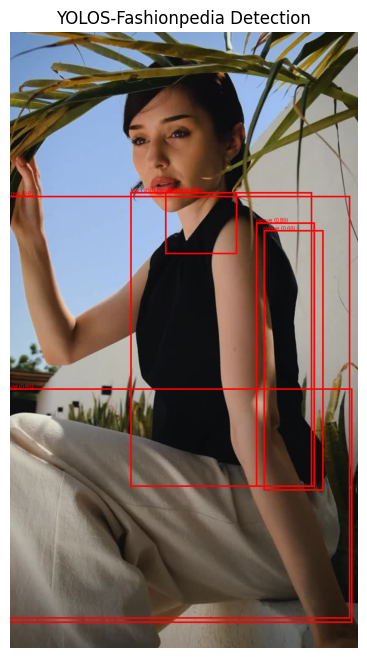

In [ ]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt

# Load the image processor and model
processor = AutoImageProcessor.from_pretrained("valentinafeve/yolos-fashionpedia")
model = AutoModelForObjectDetection.from_pretrained("valentinafeve/yolos-fashionpedia")
model.eval()

# Load your image
image_path = "/content/drive/MyDrive/AI Hackathon/videos/2025-05-27_13-46-16_UTC.jpg"
image = Image.open(image_path).convert("RGB")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Inference
with torch.no_grad():
    outputs = model(**inputs)

# Post-process outputs (get boxes, scores, labels)
target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
results = processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

# Category names from model card
CATS = [
    'shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest',
    'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat',
    'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer',
    'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood',
    'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper',
    'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel'
]

# Draw boxes
draw = ImageDraw.Draw(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_name = CATS[label]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1] - 10), f"{label_name} ({score:.2f})", fill="red")

# Display image with boxes
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.title("YOLOS-Fashionpedia Detection")
plt.show()


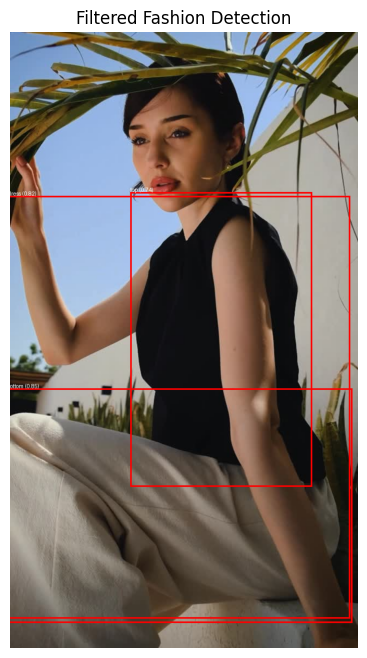

In [ ]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt
import requests
import io

# ------------------ Setup ------------------
processor = AutoImageProcessor.from_pretrained("valentinafeve/yolos-fashionpedia")
model = AutoModelForObjectDetection.from_pretrained("valentinafeve/yolos-fashionpedia")
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load image (from path or URL)
image_path = "/content/drive/MyDrive/AI Hackathon/videos/2025-05-27_13-46-16_UTC.jpg"
image = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image)

# ------------------ Category Map ------------------
CATS = [
    'shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest',
    'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat',
    'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer',
    'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood',
    'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper',
    'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel'
]

custom_label_map = {
    # Tops
    "shirt, blouse": "top",
    "top, t-shirt, sweatshirt": "top",
    "sweater": "top",
    "cardigan": "top",
    "vest": "top",

    # Bottoms
    "pants": "bottom",
    "shorts": "bottom",
    "skirt": "bottom",

    # Dresses
    "dress": "dress",
    "jumpsuit": "dress",

    # Jackets
    "jacket": "jacket",
    "coat": "jacket",

    # Accessories
    "shoe": "shoes",
    "bag, wallet": "bag",
    "watch": "accessory",
    "glasses": "accessory",
    "hat": "accessory",
    "headband, head covering, hair accessory": "accessory"
}

# ------------------ Inference ------------------
inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]]).to(device)
results = processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

# ------------------ Drawing Filtered Results ------------------
font = ImageFont.load_default()
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    label_name = CATS[label.item()]
    if label_name in custom_label_map:
        mapped_label = custom_label_map[label_name]
        score = round(score.item(), 2)
        box = [int(x) for x in box.tolist()]
        draw.rectangle(box, outline="red", width=3)
        draw.text((box[0], box[1]-10), f"{mapped_label} ({score})", fill="white", font=font)

# ------------------ Show Image ------------------
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Filtered Fashion Detection")
plt.show()


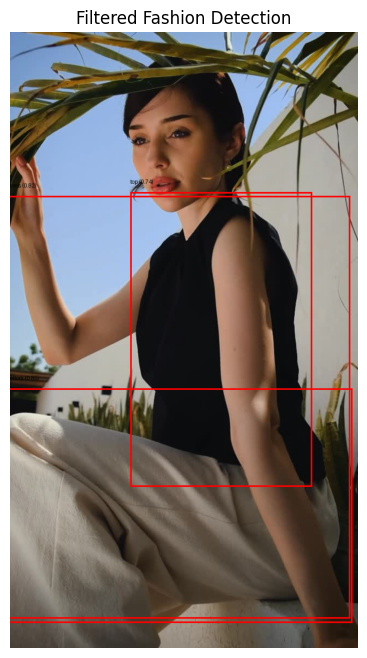

In [ ]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt

# ------------------ Setup ------------------
processor = AutoImageProcessor.from_pretrained("valentinafeve/yolos-fashionpedia")
model = AutoModelForObjectDetection.from_pretrained("valentinafeve/yolos-fashionpedia")
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load image
image_path = "/content/drive/MyDrive/AI Hackathon/videos/2025-05-27_13-46-16_UTC.jpg"
image = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image)

# ------------------ Category Map ------------------
CATS = [
    'shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest',
    'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat',
    'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer',
    'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood',
    'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper',
    'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel'
]

custom_label_map = {
    "shirt, blouse": "top", "top, t-shirt, sweatshirt": "top", "sweater": "top",
    "cardigan": "top", "vest": "top", "pants": "bottom", "shorts": "bottom",
    "skirt": "bottom", "dress": "dress", "jumpsuit": "dress", "jacket": "jacket",
    "coat": "jacket", "shoe": "shoes", "bag, wallet": "bag", "watch": "accessory",
    "glasses": "accessory", "hat": "accessory", "headband, head covering, hair accessory": "accessory"
}

# ------------------ Inference ------------------
inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]]).to(device)
results = processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

# ------------------ Font Setup ------------------
try:
    # You can change the font path below if you want a specific font
    font = ImageFont.truetype("DejaVuSans-Bold.ttf", size=28)
 # Larger font size
except:
    font = ImageFont.load_default()

# ------------------ Drawing Filtered Results ------------------
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    label_name = CATS[label.item()]
    if label_name in custom_label_map:
        mapped_label = custom_label_map[label_name]
        score = round(score.item(), 2)
        box = [int(x) for x in box.tolist()]
        draw.rectangle(box, outline="red", width=3)
        draw.text((box[0], max(0, box[1]-25)), f"{mapped_label} ({score})", fill="black", font=font)

# ------------------ Show Image ------------------
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Filtered Fashion Detection")
plt.show()


Final Experiment

Loading the valentinafeve model from huggingface which is a fine-tunned object detection model for fashion. This  model supports the following categories:

CATS = ['shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel']



In [ ]:
import os
import requests
import torch
import pandas as pd
from PIL import Image
from io import BytesIO
from tqdm import tqdm
from transformers import AutoImageProcessor, AutoModelForObjectDetection

processor = AutoImageProcessor.from_pretrained("valentinafeve/yolos-fashionpedia")
model = AutoModelForObjectDetection.from_pretrained("valentinafeve/yolos-fashionpedia").eval().cuda() if torch.cuda.is_available() else AutoModelForObjectDetection.from_pretrained("valentinafeve/yolos-fashionpedia").eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/123M [00:00<?, ?B/s]

This script downloads images from URLs, uses a YOLOS Fashionpedia model to detect clothing/accessories, crops detected items, generates natural-language prompts for each crop, saves the crops locally, and exports metadata with prompts to a CSV for further use.

In [ ]:
import os
import requests
import torch
import pandas as pd
import random
from PIL import Image
from io import BytesIO
from tqdm import tqdm
from transformers import AutoImageProcessor, AutoModelForObjectDetection

df = final_df.copy()
save_dir = "catalog_crops"
os.makedirs(save_dir, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

det_ckpt = "valentinafeve/yolos-fashionpedia"
processor = AutoImageProcessor.from_pretrained(det_ckpt)
model = AutoModelForObjectDetection.from_pretrained(det_ckpt).to(device).eval()

CATS = [
    'shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest',
    'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat',
    'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer',
    'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood',
    'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper',
    'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel'
]

custom_label_map = {
    "shirt, blouse": "top", "top, t-shirt, sweatshirt": "top", "sweater": "top",
    "cardigan": "top", "vest": "top", "pants": "bottom", "shorts": "bottom",
    "skirt": "bottom", "dress": "dress", "jumpsuit": "dress", "jacket": "jacket",
    "coat": "jacket", "shoe": "shoes", "bag, wallet": "bag", "watch": "accessory",
    "glasses": "accessory", "hat": "accessory", "headband, head covering, hair accessory": "accessory"
}

prompt_templates = [
    "A photo of a {}.",
    "An image showing a {}.",
    "A close-up of a {}.",
    "Someone wearing a {}.",
    "Fashion product: {}."
]

results = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    try:
        image_url = row["image_url"]
        image_id = row["id"]

        response = requests.get(image_url, timeout=10)
        image = Image.open(BytesIO(response.content)).convert("RGB")

        inputs = processor(images=image, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = model(**inputs)

        target_sizes = torch.tensor([image.size[::-1]]).to(device)
        processed = processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

        for i, (score, label, box) in enumerate(zip(processed["scores"], processed["labels"], processed["boxes"])):
            label_name = CATS[label.item()]
            if label_name not in custom_label_map:
                continue

            class_label = custom_label_map[label_name]
            x1, y1, x2, y2 = map(int, box.tolist())
            cropped = image.crop((x1, y1, x2, y2))

            filename = f"{image_id}_{class_label}_{i}.jpg"
            path = os.path.join(save_dir, filename)
            cropped.save(path)

            prompt = random.choice(prompt_templates).format(class_label)

            results.append({
                "id": image_id,
                "image_path": path,
                "label": class_label,
                "text": prompt,
                "image_url": image_url,
                "bbox": [x1, y1, x2, y2],
                "score": float(score)
            })

    except Exception as e:
        print(f"Error on row {idx} ({row['image_url']}): {e}")
        continue

crop_df = pd.DataFrame(results)
crop_df.to_csv("clip_crops_dataset_with_prompts.csv", index=False)
print(f"Saved {len(crop_df)} crops with prompts to CSV and images to {save_dir}/")


  1%|          | 69/9172 [00:18<36:09,  4.20it/s]

⚠️ Error on row 67 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1973_1600x.jpg?v=1738757403): cannot identify image file <_io.BytesIO object at 0x795fbcc6e160>


  1%|          | 103/9172 [00:26<37:51,  3.99it/s]

⚠️ Error on row 102 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_3_VWWDR2336013702_1600x.jpg?v=1737531971): cannot identify image file <_io.BytesIO object at 0x795fbf7e25c0>


  2%|▏         | 173/9172 [00:45<36:14,  4.14it/s]

⚠️ Error on row 172 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1656_1600x.jpg?v=1738831875): cannot identify image file <_io.BytesIO object at 0x795f9008c400>


  2%|▏         | 188/9172 [00:50<52:29,  2.85it/s]  

⚠️ Error on row 187 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0936_1600x.jpg?v=1730211173): cannot identify image file <_io.BytesIO object at 0x795f90015d50>


  3%|▎         | 290/9172 [01:17<36:34,  4.05it/s]

⚠️ Error on row 289 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0936.jpg?v=1744185802&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fbf7e9e90>


  3%|▎         | 295/9172 [01:18<35:40,  4.15it/s]

⚠️ Error on row 294 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0892_1600x.jpg?v=1730212964): cannot identify image file <_io.BytesIO object at 0x795fc5bcc770>


  3%|▎         | 300/9172 [01:19<33:16,  4.44it/s]

⚠️ Error on row 299 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB6_1600x.jpg?v=1738829595): cannot identify image file <_io.BytesIO object at 0x795fc5bcfa10>


  4%|▎         | 330/9172 [01:27<40:05,  3.68it/s]

⚠️ Error on row 329 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0534.jpg?v=1741765720&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc275d850>


  4%|▍         | 361/9172 [01:35<36:19,  4.04it/s]

⚠️ Error on row 360 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0910_1600x.jpg?v=1730211905): cannot identify image file <_io.BytesIO object at 0x795fc275e2a0>


  4%|▍         | 379/9172 [01:41<50:22,  2.91it/s]

⚠️ Error on row 378 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB12_1600x.jpg?v=1738833980): cannot identify image file <_io.BytesIO object at 0x795f91c749a0>


  4%|▍         | 407/9172 [01:49<36:10,  4.04it/s]

⚠️ Error on row 407 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB12_1600x.jpg?v=1738833980): cannot identify image file <_io.BytesIO object at 0x795f91c76610>


  6%|▌         | 508/9172 [02:15<31:39,  4.56it/s]

⚠️ Error on row 507 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_163121.png?v=1743591700&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f91c385e0>


  6%|▌         | 550/9172 [02:27<34:20,  4.18it/s]

⚠️ Error on row 549 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162956.png?v=1743591620&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc275f560>


  6%|▌         | 564/9172 [02:31<35:03,  4.09it/s]

⚠️ Error on row 563 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/5_8fff89d1-84fd-4a95-b149-3e5f73ca5956.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc0391440>


  8%|▊         | 695/9172 [03:05<40:48,  3.46it/s]

⚠️ Error on row 694 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/6_VWWDR2336015502_ae9e621f-4863-41bb-94ba-2e1684fa4111_1600x.jpg?v=1710762844): cannot identify image file <_io.BytesIO object at 0x795fc034be70>


  9%|▊         | 785/9172 [03:28<34:29,  4.05it/s]

⚠️ Error on row 784 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_6_VWWDR2336013702_1600x.jpg?v=1737531972): cannot identify image file <_io.BytesIO object at 0x795fc03329d0>


  9%|▉         | 812/9172 [03:36<33:06,  4.21it/s]

⚠️ Error on row 811 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2082.jpg?v=1742299385&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc034bb50>


  9%|▉         | 858/9172 [03:49<38:10,  3.63it/s]

⚠️ Error on row 858 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2082.jpg?v=1742299385&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f91cee200>


  9%|▉         | 868/9172 [03:51<33:18,  4.16it/s]

⚠️ Error on row 867 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1971.jpg?v=1738757403&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f91c9dfd0>


 10%|█         | 929/9172 [04:07<35:35,  3.86it/s]

⚠️ Error on row 928 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_164028.png?v=1743592246&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc6053290>


 10%|█         | 956/9172 [04:14<36:02,  3.80it/s]

⚠️ Error on row 955 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0950_1600x.jpg?v=1730211173): cannot identify image file <_io.BytesIO object at 0x795fc60092b0>


 11%|█         | 973/9172 [04:19<37:31,  3.64it/s]

⚠️ Error on row 972 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/9_aee84650-4be0-40f3-9aed-454588ce7d1e.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc275d080>


 11%|█         | 1030/9172 [04:35<31:44,  4.28it/s]

⚠️ Error on row 1029 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0972_1600x.jpg?v=1730211173): cannot identify image file <_io.BytesIO object at 0x795f92f0f5b0>


 11%|█▏        | 1042/9172 [04:38<27:01,  5.01it/s]

⚠️ Error on row 1040 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB2_1_1600x.jpg?v=1738940105): cannot identify image file <_io.BytesIO object at 0x795f92f0c130>


 12%|█▏        | 1071/9172 [04:46<36:00,  3.75it/s]

⚠️ Error on row 1070 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0950.jpg?v=1744185802&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92f59120>


 12%|█▏        | 1142/9172 [05:03<30:09,  4.44it/s]

⚠️ Error on row 1141 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB3_1.jpg?v=1741020807&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92f54ae0>


 13%|█▎        | 1201/9172 [05:19<34:01,  3.90it/s]

⚠️ Error on row 1200 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0948_1600x.jpg?v=1730210975): cannot identify image file <_io.BytesIO object at 0x795f92f571a0>


 13%|█▎        | 1228/9172 [05:26<29:46,  4.45it/s]

⚠️ Error on row 1227 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/3_0a356759-c4f0-4670-9bce-462e2479b0a1.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc04053a0>


 15%|█▌        | 1407/9172 [06:14<31:56,  4.05it/s]

⚠️ Error on row 1406 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB11_1600x.jpg?v=1738829595): cannot identify image file <_io.BytesIO object at 0x795f92f59490>


 17%|█▋        | 1535/9172 [06:48<28:59,  4.39it/s]

⚠️ Error on row 1534 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0538.jpg?v=1741765468&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc0414130>


 17%|█▋        | 1542/9172 [06:50<30:37,  4.15it/s]

⚠️ Error on row 1540 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0942.jpg?v=1744185802&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc044d8a0>


 17%|█▋        | 1551/9172 [06:52<31:32,  4.03it/s]

⚠️ Error on row 1550 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2123_1600x.jpg?v=1738738171): cannot identify image file <_io.BytesIO object at 0x795fc0414d10>


 18%|█▊        | 1631/9172 [07:13<34:58,  3.59it/s]

⚠️ Error on row 1630 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9855.jpg?v=1744008642&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f91c9f1a0>


 18%|█▊        | 1663/9172 [07:21<25:39,  4.88it/s]

⚠️ Error on row 1661 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB10_1600x.jpg?v=1738833980): cannot identify image file <_io.BytesIO object at 0x795fc0558450>


 18%|█▊        | 1678/9172 [07:25<27:00,  4.63it/s]

⚠️ Error on row 1676 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB2_af298472-64bf-4726-a913-c1aa6b42621f_1600x.jpg?v=1738829595): cannot identify image file <_io.BytesIO object at 0x795fc0405f80>


 19%|█▉        | 1728/9172 [07:37<29:32,  4.20it/s]

⚠️ Error on row 1727 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1977_86dfa1dd-099e-4b31-8b42-0e3fda8d204e_1600x.jpg?v=1738757403): cannot identify image file <_io.BytesIO object at 0x795fc0414d60>


 19%|█▉        | 1751/9172 [07:43<32:03,  3.86it/s]

⚠️ Error on row 1750 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_163121.png?v=1743591700&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc0577fb0>


 19%|█▉        | 1765/9172 [07:48<30:11,  4.09it/s]

⚠️ Error on row 1764 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1677.jpg?v=1738770647&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc05754e0>


 20%|█▉        | 1834/9172 [08:07<28:22,  4.31it/s]

⚠️ Error on row 1832 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_6_VWWDR2336012201_1600x.jpg?v=1737532062): cannot identify image file <_io.BytesIO object at 0x795fc0525da0>


 20%|██        | 1836/9172 [08:07<25:30,  4.79it/s]

⚠️ Error on row 1834 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1677_1600x.jpg?v=1738770647): cannot identify image file <_io.BytesIO object at 0x795f95426890>


 20%|██        | 1859/9172 [08:13<30:24,  4.01it/s]

⚠️ Error on row 1858 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9839.jpg?v=1744008646&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc0541440>


 20%|██        | 1866/9172 [08:15<26:08,  4.66it/s]

⚠️ Error on row 1865 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2079.jpg?v=1742299385&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f95425df0>


 21%|██        | 1892/9172 [08:21<26:24,  4.59it/s]

⚠️ Error on row 1890 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0905_1600x.jpg?v=1730211905): cannot identify image file <_io.BytesIO object at 0x795fc051fd30>


 21%|██        | 1938/9172 [08:33<29:47,  4.05it/s]

⚠️ Error on row 1937 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0983_1600x.jpg?v=1730211905): cannot identify image file <_io.BytesIO object at 0x795fc05257b0>


 22%|██▏       | 2043/9172 [09:00<26:49,  4.43it/s]

⚠️ Error on row 2041 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB1_59fd81a6-f275-4270-9158-c57e29725c03_1600x.jpg?v=1738833980): cannot identify image file <_io.BytesIO object at 0x795f9542e700>
⚠️ Error on row 2042 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1654_1600x.jpg?v=1738770643): cannot identify image file <_io.BytesIO object at 0x795fbcc20900>


 23%|██▎       | 2070/9172 [09:07<32:33,  3.63it/s]

⚠️ Error on row 2069 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/1_VWWDR2336015502_ceef468a-9e0e-445b-96d4-023f59c6718d_1600x.jpg?v=1737531749): cannot identify image file <_io.BytesIO object at 0x795fbcc5efc0>


 25%|██▌       | 2301/9172 [10:10<24:43,  4.63it/s]

⚠️ Error on row 2299 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0544.jpg?v=1741765469&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fbcc1e7f0>


 25%|██▌       | 2323/9172 [10:15<26:04,  4.38it/s]

⚠️ Error on row 2322 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9688.jpg?v=1744267181&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fbcc18a40>


 26%|██▌       | 2400/9172 [10:35<27:59,  4.03it/s]

⚠️ Error on row 2399 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1666E4_1600x.jpg?v=1738831875): cannot identify image file <_io.BytesIO object at 0x795f92471300>


 27%|██▋       | 2435/9172 [10:44<29:22,  3.82it/s]

⚠️ Error on row 2434 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB1_1_1600x.jpg?v=1738940105): cannot identify image file <_io.BytesIO object at 0x795f924c3bf0>


 27%|██▋       | 2450/9172 [10:48<28:00,  4.00it/s]

⚠️ Error on row 2449 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162642.png?v=1743591425&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f924c3f60>


 27%|██▋       | 2454/9172 [10:49<23:29,  4.77it/s]

⚠️ Error on row 2452 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_164127.png?v=1743592306&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f924c3f60>


 27%|██▋       | 2481/9172 [10:56<25:09,  4.43it/s]

⚠️ Error on row 2480 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0935_1600x.jpg?v=1730211173): cannot identify image file <_io.BytesIO object at 0x795fbcc5f8d0>


 28%|██▊       | 2589/9172 [11:25<26:14,  4.18it/s]

⚠️ Error on row 2588 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/9_aee84650-4be0-40f3-9aed-454588ce7d1e.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f95426c50>


 29%|██▊       | 2633/9172 [11:35<23:23,  4.66it/s]

⚠️ Error on row 2632 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB1_1_1600x.jpg?v=1738940105): cannot identify image file <_io.BytesIO object at 0x795f924e4270>


 30%|██▉       | 2743/9172 [12:04<27:20,  3.92it/s]

⚠️ Error on row 2742 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/4_VWWDR2336010303_31339328-d6f4-401c-aa5e-63133002b194_1600x.jpg?v=1710741582): cannot identify image file <_io.BytesIO object at 0x795f92445850>


 30%|███       | 2759/9172 [12:08<24:51,  4.30it/s]

⚠️ Error on row 2758 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1654_1600x.jpg?v=1738770643): cannot identify image file <_io.BytesIO object at 0x795fc05415d0>


 30%|███       | 2792/9172 [12:17<24:39,  4.31it/s]

⚠️ Error on row 2791 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162956.png?v=1743591620&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f924462a0>


 31%|███▏      | 2882/9172 [12:40<23:30,  4.46it/s]

⚠️ Error on row 2880 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB3_41495775-2951-4e67-8d1c-71a87391e52e_1600x.jpg?v=1738833980): cannot identify image file <_io.BytesIO object at 0x795fbcccc090>


 32%|███▏      | 2894/9172 [12:43<24:33,  4.26it/s]

⚠️ Error on row 2893 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0554.jpg?v=1741765468&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f924ea200>


 32%|███▏      | 2934/9172 [12:54<25:17,  4.11it/s]

⚠️ Error on row 2932 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162831.png?v=1743591532&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92444b30>


 32%|███▏      | 2936/9172 [12:54<21:05,  4.93it/s]

⚠️ Error on row 2934 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0922_1600x.jpg?v=1730210975): cannot identify image file <_io.BytesIO object at 0x795f92444b30>


 32%|███▏      | 2943/9172 [12:56<23:23,  4.44it/s]

⚠️ Error on row 2942 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/10_0a12532a-4733-43f1-9d54-408869dfc4c2.jpg?v=1741434183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92434b80>


 33%|███▎      | 2990/9172 [13:08<22:56,  4.49it/s]

⚠️ Error on row 2989 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/6_71086362-4b99-4d13-964b-bb935bd5d924.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f924125c0>


 33%|███▎      | 3029/9172 [13:19<23:02,  4.44it/s]

⚠️ Error on row 3028 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-07_121804.png?v=1744008506&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92436390>


 33%|███▎      | 3064/9172 [13:28<24:27,  4.16it/s]

⚠️ Error on row 3063 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0547.jpg?v=1741765468&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9f5e4900>


 34%|███▍      | 3137/9172 [13:48<24:08,  4.17it/s]

⚠️ Error on row 3136 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1968_1600x.jpg?v=1738757402): cannot identify image file <_io.BytesIO object at 0x795f9f5bc4f0>


 34%|███▍      | 3141/9172 [13:49<22:33,  4.46it/s]

⚠️ Error on row 3140 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB3_431b963a-a3e3-4b99-9852-4831abc7cbb4_1600x.jpg?v=1738852665): cannot identify image file <_io.BytesIO object at 0x795f924e7d80>


 34%|███▍      | 3149/9172 [13:51<21:46,  4.61it/s]

⚠️ Error on row 3147 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB3_0b913db1-c28f-4acf-aa07-51ea99ed3e30_1600x.jpg?v=1738829595): cannot identify image file <_io.BytesIO object at 0x795fc0541b20>


 35%|███▌      | 3242/9172 [14:15<21:49,  4.53it/s]

⚠️ Error on row 3240 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB4_9c2c606e-0ed5-4fef-a494-3764a3647872_1600x.jpg?v=1738829595): cannot identify image file <_io.BytesIO object at 0x795f9f598c70>


 36%|███▌      | 3319/9172 [14:34<24:12,  4.03it/s]

⚠️ Error on row 3318 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0955_1600x.jpg?v=1730210975): cannot identify image file <_io.BytesIO object at 0x795f9f5a10d0>


 36%|███▌      | 3323/9172 [14:35<21:25,  4.55it/s]

⚠️ Error on row 3321 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0534.jpg?v=1741765720&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9f5a10d0>


 36%|███▋      | 3331/9172 [14:36<21:19,  4.57it/s]

⚠️ Error on row 3330 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_163215.png?v=1743591757&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9f55ac00>


 36%|███▋      | 3335/9172 [14:37<23:16,  4.18it/s]

⚠️ Error on row 3334 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/9_aee84650-4be0-40f3-9aed-454588ce7d1e.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f924842c0>


 36%|███▋      | 3338/9172 [14:38<30:12,  3.22it/s]

⚠️ Error on row 3337 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1683_1600x.jpg?v=1738770661): cannot identify image file <_io.BytesIO object at 0x795f9f541120>


 37%|███▋      | 3396/9172 [14:54<23:13,  4.14it/s]

⚠️ Error on row 3394 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2082.jpg?v=1742299385&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9f559120>


 37%|███▋      | 3423/9172 [15:01<23:34,  4.06it/s]

⚠️ Error on row 3422 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1977_58c78efa-31cf-4a0f-80ae-2b7a02e6b6c9.jpg?v=1738758319&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9f50b470>


 38%|███▊      | 3453/9172 [15:09<24:23,  3.91it/s]

⚠️ Error on row 3451 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/5_VWWDR2336015502_16c28dbb-fbab-4aa8-98bb-058a116f8827_1600x.jpg?v=1710762844): cannot identify image file <_io.BytesIO object at 0x795f9f50ae80>


 38%|███▊      | 3457/9172 [15:10<20:03,  4.75it/s]

⚠️ Error on row 3455 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB1_1.jpg?v=1741020807&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9f508f90>


 38%|███▊      | 3478/9172 [15:15<22:54,  4.14it/s]

⚠️ Error on row 3477 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/3_VWWDR2336010303_dbca3005-cbec-48b9-be63-9b33e9152851_1600x.jpg?v=1710741582): cannot identify image file <_io.BytesIO object at 0x795f9f50ae30>


 38%|███▊      | 3490/9172 [15:18<19:45,  4.79it/s]

⚠️ Error on row 3488 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1948_1600x.jpg?v=1738757403): cannot identify image file <_io.BytesIO object at 0x795f9f5168e0>


 38%|███▊      | 3494/9172 [15:19<21:07,  4.48it/s]

⚠️ Error on row 3492 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/5_VWWDR2336010303_71e15b92-6d01-435e-be7e-ce82256c1829_1600x.jpg?v=1710741582): cannot identify image file <_io.BytesIO object at 0x795f9f5158f0>


 38%|███▊      | 3508/9172 [15:23<23:23,  4.04it/s]

⚠️ Error on row 3506 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1984_1600x.jpg?v=1738757195): cannot identify image file <_io.BytesIO object at 0x795f9f5876f0>


 39%|███▊      | 3534/9172 [15:30<21:51,  4.30it/s]

⚠️ Error on row 3533 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB2_1.jpg?v=1741020807&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9f540680>


 39%|███▊      | 3551/9172 [15:34<22:56,  4.08it/s]

⚠️ Error on row 3549 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB4_f5869d5d-5e51-4fd5-a68b-1c7622d4eb41_1600x.jpg?v=1738852665): cannot identify image file <_io.BytesIO object at 0x795f9f5bddf0>


 40%|███▉      | 3632/9172 [15:56<19:47,  4.66it/s]

⚠️ Error on row 3631 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1641E4_1600x.jpg?v=1738770400): cannot identify image file <_io.BytesIO object at 0x795f9f50e3e0>


 41%|████      | 3727/9172 [16:22<19:05,  4.75it/s]

⚠️ Error on row 3726 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1977_58c78efa-31cf-4a0f-80ae-2b7a02e6b6c9_1600x.jpg?v=1738758319): cannot identify image file <_io.BytesIO object at 0x795f9f585710>


 41%|████▏     | 3786/9172 [16:38<19:56,  4.50it/s]

⚠️ Error on row 3785 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_1_VWWDR2336012201_1600x.jpg?v=1710754378): cannot identify image file <_io.BytesIO object at 0x795f94c51cb0>


 42%|████▏     | 3807/9172 [16:43<22:50,  3.91it/s]

⚠️ Error on row 3806 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162831.png?v=1743591532&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f94cfaac0>


 42%|████▏     | 3855/9172 [16:56<23:23,  3.79it/s]

⚠️ Error on row 3854 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/1_VWWDR2336010303_427528f8-bc72-4977-a07d-b6fc652b16d3_1600x.jpg?v=1737531827): cannot identify image file <_io.BytesIO object at 0x795f94cbb970>


 42%|████▏     | 3865/9172 [16:59<23:46,  3.72it/s]

⚠️ Error on row 3864 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_163622.png?v=1743592015&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f94cb9f30>


 42%|████▏     | 3883/9172 [17:04<19:57,  4.42it/s]

⚠️ Error on row 3882 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162956.png?v=1743591620&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f94c52fc0>


 44%|████▍     | 4029/9172 [17:43<21:27,  3.99it/s]

⚠️ Error on row 4027 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1660_1600x.jpg?v=1738771361): cannot identify image file <_io.BytesIO object at 0x795f94c1dbc0>


 44%|████▍     | 4048/9172 [17:48<22:01,  3.88it/s]

⚠️ Error on row 4047 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162642.png?v=1743591425&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f94c1d260>


 45%|████▍     | 4102/9172 [18:02<18:47,  4.50it/s]

⚠️ Error on row 4101 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2096_69c03d7b-6bda-4814-8c5a-5bd1702e0cb0.jpg?v=1742299409&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f94c1cb80>


 45%|████▍     | 4127/9172 [18:08<21:55,  3.84it/s]

⚠️ Error on row 4125 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1997_6de57307-7ceb-47f2-aec7-74f5274e75aa_1600x.jpg?v=1738758281): cannot identify image file <_io.BytesIO object at 0x795f94c0ac00>


 45%|████▌     | 4161/9172 [18:17<18:34,  4.49it/s]

⚠️ Error on row 4160 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9720.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f94cd1210>


 47%|████▋     | 4267/9172 [18:46<20:45,  3.94it/s]

⚠️ Error on row 4266 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB4_138207d0-6a7c-407a-9c7e-ab8bc7770242_1600x.jpg?v=1738833980): cannot identify image file <_io.BytesIO object at 0x795fc0792ca0>


 47%|████▋     | 4278/9172 [18:49<20:39,  3.95it/s]

⚠️ Error on row 4277 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0988_1600x.jpg?v=1730211905): cannot identify image file <_io.BytesIO object at 0x795f94cb9080>


 47%|████▋     | 4312/9172 [18:58<19:07,  4.24it/s]

⚠️ Error on row 4311 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB2_1cf794a1-5356-4cce-b661-62de12950641_1600x.jpg?v=1738940093): cannot identify image file <_io.BytesIO object at 0x795fc0790b30>


 47%|████▋     | 4328/9172 [19:02<16:41,  4.84it/s]

⚠️ Error on row 4327 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-07_121804.png?v=1744008506&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f94cf9300>


 48%|████▊     | 4414/9172 [19:25<18:02,  4.40it/s]

⚠️ Error on row 4413 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2115_1600x.jpg?v=1738738171): cannot identify image file <_io.BytesIO object at 0x795fc07f3740>


 48%|████▊     | 4440/9172 [19:32<21:58,  3.59it/s]

⚠️ Error on row 4439 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0892_1600x.jpg?v=1730212964): cannot identify image file <_io.BytesIO object at 0x795fc07cbbf0>


 49%|████▊     | 4468/9172 [19:39<18:31,  4.23it/s]

⚠️ Error on row 4467 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9670.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc07a6610>


 49%|████▉     | 4476/9172 [19:41<17:34,  4.45it/s]

⚠️ Error on row 4475 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0983.jpg?v=1730211905&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc07a6bb0>


 49%|████▉     | 4503/9172 [19:48<19:55,  3.91it/s]

⚠️ Error on row 4502 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0534.jpg?v=1741765720&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc07b2930>


 50%|█████     | 4629/9172 [20:22<17:35,  4.30it/s]

⚠️ Error on row 4628 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1984_3badb16a-b2a2-4dce-9565-04a60c88c2b9_1600x.jpg?v=1738758319): cannot identify image file <_io.BytesIO object at 0x795fc0756200>


 51%|█████     | 4661/9172 [20:30<18:08,  4.15it/s]

⚠️ Error on row 4659 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1656_1600x.jpg?v=1738831875): cannot identify image file <_io.BytesIO object at 0x795fc072cb30>


 51%|█████     | 4671/9172 [20:33<17:43,  4.23it/s]

⚠️ Error on row 4669 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0819_1600x.jpg?v=1730212964): cannot identify image file <_io.BytesIO object at 0x795fc072c360>


 52%|█████▏    | 4744/9172 [20:53<26:51,  2.75it/s]

⚠️ Error on row 4743 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2082.jpg?v=1742299385&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc0734f90>


 52%|█████▏    | 4783/9172 [21:04<20:06,  3.64it/s]

⚠️ Error on row 4782 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/4_VWWDR2336015502_41818a99-f083-4f0b-9e1c-bbbdb0027b80_1600x.jpg?v=1710762844): cannot identify image file <_io.BytesIO object at 0x795fc078ddf0>


 52%|█████▏    | 4801/9172 [21:09<18:44,  3.89it/s]

⚠️ Error on row 4800 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep_10_virgio0865_1600x.jpg?v=1730211481): cannot identify image file <_io.BytesIO object at 0x795fc07cb3d0>


 53%|█████▎    | 4833/9172 [21:17<17:10,  4.21it/s]

⚠️ Error on row 4832 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1988E4_1600x.jpg?v=1738826280): cannot identify image file <_io.BytesIO object at 0x795fbfe20270>


 53%|█████▎    | 4836/9172 [21:18<17:14,  4.19it/s]

⚠️ Error on row 4835 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0915_1600x.jpg?v=1730211906): cannot identify image file <_io.BytesIO object at 0x795fc073f4c0>


 53%|█████▎    | 4841/9172 [21:19<19:34,  3.69it/s]

⚠️ Error on row 4840 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1971_1e7b0091-7a8e-496c-abad-8252bd54773c_1600x.jpg?v=1738758319): cannot identify image file <_io.BytesIO object at 0x795fbfe23bf0>


 53%|█████▎    | 4845/9172 [21:20<18:40,  3.86it/s]

⚠️ Error on row 4844 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB12.jpg?v=1738833980&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fbfe229d0>


 53%|█████▎    | 4889/9172 [21:32<15:09,  4.71it/s]

⚠️ Error on row 4887 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0951.jpg?v=1744185802&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fbfe88ea0>


 53%|█████▎    | 4890/9172 [21:32<14:02,  5.08it/s]

⚠️ Error on row 4889 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_164127.png?v=1743592306&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fbfe885e0>


 54%|█████▍    | 4948/9172 [21:48<16:16,  4.32it/s]

⚠️ Error on row 4946 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9669.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc0705e90>


 54%|█████▍    | 4954/9172 [21:49<16:34,  4.24it/s]

⚠️ Error on row 4953 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/8103042_d306f5af-a38f-44d3-bef1-ecda6b377992.jpg?v=1741374025&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc072c6d0>


 54%|█████▍    | 4965/9172 [21:52<19:59,  3.51it/s]

⚠️ Error on row 4964 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1656_f0ec2a6e-f9f5-4257-8c16-bb86462434b9_1600x.jpg?v=1738831884): cannot identify image file <_io.BytesIO object at 0x795fbfef16c0>


 56%|█████▌    | 5095/9172 [22:26<13:40,  4.97it/s]

⚠️ Error on row 5094 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_4_VWWDR2336012201_1600x.jpg?v=1737532062): cannot identify image file <_io.BytesIO object at 0x795fbfea2700>


 56%|█████▌    | 5119/9172 [22:33<17:37,  3.83it/s]

⚠️ Error on row 5118 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0942_1600x.jpg?v=1730211173): cannot identify image file <_io.BytesIO object at 0x795fbfebdad0>


 56%|█████▌    | 5143/9172 [22:38<13:46,  4.87it/s]

⚠️ Error on row 5142 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0534.jpg?v=1741765720&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fbfe74540>


 56%|█████▌    | 5155/9172 [22:41<14:57,  4.48it/s]

⚠️ Error on row 5153 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2086.jpg?v=1742299367&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fbfeb6b10>


 58%|█████▊    | 5299/9172 [23:21<13:54,  4.64it/s]

⚠️ Error on row 5298 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_6_VWWDR2336012201.jpg?v=1737532062&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fbfe77ba0>


 58%|█████▊    | 5358/9172 [23:36<14:52,  4.27it/s]

⚠️ Error on row 5357 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0926_1600x.jpg?v=1730210975): cannot identify image file <_io.BytesIO object at 0x795fbfe067a0>


 59%|█████▉    | 5395/9172 [23:46<15:10,  4.15it/s]

⚠️ Error on row 5394 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2120_1600x.jpg?v=1738738171): cannot identify image file <_io.BytesIO object at 0x795fa688d760>


 59%|█████▉    | 5414/9172 [23:50<13:27,  4.65it/s]

⚠️ Error on row 5412 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9670.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fa688f830>


 60%|██████    | 5505/9172 [24:14<13:32,  4.51it/s]

⚠️ Error on row 5504 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_1_VWWDR2336013702_1600x.jpg?v=1737531972): cannot identify image file <_io.BytesIO object at 0x795fa688a660>


 60%|██████    | 5519/9172 [24:17<14:22,  4.24it/s]

⚠️ Error on row 5518 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162956.png?v=1743591620&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fa68898a0>


 61%|██████    | 5563/9172 [24:29<17:04,  3.52it/s]

⚠️ Error on row 5562 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/9_aee84650-4be0-40f3-9aed-454588ce7d1e.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fa68ccea0>


 61%|██████    | 5580/9172 [24:33<14:23,  4.16it/s]

⚠️ Error on row 5579 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1968_7342bdbf-a12d-4b97-b6f6-2067b4ccab16_1600x.jpg?v=1738758319): cannot identify image file <_io.BytesIO object at 0x795fa68cc540>


 61%|██████    | 5612/9172 [24:41<13:34,  4.37it/s]

⚠️ Error on row 5611 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1652E4_1600x.jpg?v=1738831801): cannot identify image file <_io.BytesIO object at 0x795fa68a5da0>


 62%|██████▏   | 5652/9172 [24:51<11:29,  5.10it/s]

⚠️ Error on row 5651 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/6_VWWDR2336010303_c60ae649-0210-452c-9539-4ecbefac5058_1600x.jpg?v=1710741582): cannot identify image file <_io.BytesIO object at 0x795fa6852fc0>


 62%|██████▏   | 5686/9172 [24:59<14:11,  4.10it/s]

⚠️ Error on row 5685 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_3_VWWDR2336012201_1600x.jpg?v=1737532062): cannot identify image file <_io.BytesIO object at 0x795fa68e95d0>


 62%|██████▏   | 5702/9172 [25:03<13:50,  4.18it/s]

⚠️ Error on row 5701 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB1_600dcca6-3521-4cbb-b60b-eba2fcf3a75c_1600x.jpg?v=1738940093): cannot identify image file <_io.BytesIO object at 0x795fa68b5c10>


 63%|██████▎   | 5793/9172 [25:27<11:44,  4.80it/s]

⚠️ Error on row 5791 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162350.png?v=1743591253&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fa6823fb0>


 63%|██████▎   | 5815/9172 [25:33<14:53,  3.76it/s]

⚠️ Error on row 5814 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WhatsApp_Image_2025-02-25_at_1.24.59_PM.jpg?v=1740470325&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fa6823a60>


 64%|██████▍   | 5863/9172 [25:46<13:48,  4.00it/s]

⚠️ Error on row 5862 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0951_1600x.jpg?v=1730211173): cannot identify image file <_io.BytesIO object at 0x795fbfe325c0>


 64%|██████▍   | 5887/9172 [25:52<11:02,  4.96it/s]

⚠️ Error on row 5885 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0938_1600x.jpg?v=1730211173): cannot identify image file <_io.BytesIO object at 0x795fa687c130>


 64%|██████▍   | 5894/9172 [25:54<12:54,  4.23it/s]

⚠️ Error on row 5893 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1984.jpg?v=1738757195&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92d4ab10>


 65%|██████▍   | 5931/9172 [26:04<12:08,  4.45it/s]

⚠️ Error on row 5929 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB2_af298472-64bf-4726-a913-c1aa6b42621f.jpg?v=1738829595&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92d1e390>


 65%|██████▍   | 5937/9172 [26:06<12:34,  4.29it/s]

⚠️ Error on row 5936 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB1_c8a1aaac-1723-4934-b256-999879c1d528_1600x.jpg?v=1738829459): cannot identify image file <_io.BytesIO object at 0x795fa688f560>


 65%|██████▍   | 5947/9172 [26:08<12:08,  4.43it/s]

⚠️ Error on row 5946 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1973_e314d9c0-03a9-4daa-bd37-a5b4ba7197ae_1600x.jpg?v=1738758319): cannot identify image file <_io.BytesIO object at 0x795f92dc46d0>


 66%|██████▌   | 6022/9172 [26:28<11:59,  4.38it/s]

⚠️ Error on row 6020 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162350.png?v=1743591253&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92df84f0>


 66%|██████▌   | 6031/9172 [26:31<14:11,  3.69it/s]

⚠️ Error on row 6030 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0534.jpg?v=1741765720&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92dc0a40>


 66%|██████▌   | 6061/9172 [26:38<11:07,  4.66it/s]

⚠️ Error on row 6059 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_164028.png?v=1743592246&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92dc1c10>


 66%|██████▋   | 6093/9172 [26:47<12:09,  4.22it/s]

⚠️ Error on row 6092 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0802_1600x.jpg?v=1730212964): cannot identify image file <_io.BytesIO object at 0x795f92db7420>


 67%|██████▋   | 6119/9172 [26:53<12:51,  3.96it/s]

⚠️ Error on row 6118 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0955.jpg?v=1730210975&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92db4400>


 68%|██████▊   | 6225/9172 [27:23<12:39,  3.88it/s]

⚠️ Error on row 6224 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2120.jpg?v=1738738171&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92dc7560>


 68%|██████▊   | 6242/9172 [27:27<11:23,  4.28it/s]

⚠️ Error on row 6241 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB4_1.jpg?v=1741020807&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92d4f2e0>


 68%|██████▊   | 6256/9172 [27:30<11:04,  4.39it/s]

⚠️ Error on row 6254 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_163622.png?v=1743592015&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92d38540>


 68%|██████▊   | 6258/9172 [27:31<09:58,  4.86it/s]

⚠️ Error on row 6256 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2082.jpg?v=1742299385&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92d030b0>


 68%|██████▊   | 6264/9172 [27:32<10:56,  4.43it/s]

⚠️ Error on row 6262 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0983_1600x.jpg?v=1730211905): cannot identify image file <_io.BytesIO object at 0x795f92d49620>
⚠️ Error on row 6263 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB3_431b963a-a3e3-4b99-9852-4831abc7cbb4_1600x.jpg?v=1738852665): cannot identify image file <_io.BytesIO object at 0x795fa68b01d0>


 69%|██████▉   | 6307/9172 [27:43<12:14,  3.90it/s]

⚠️ Error on row 6306 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0972.jpg?v=1730211173&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92d025c0>


 69%|██████▉   | 6327/9172 [27:48<10:43,  4.42it/s]

⚠️ Error on row 6326 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2099.jpg?v=1742299367&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92df6020>


 69%|██████▉   | 6346/9172 [27:53<11:13,  4.20it/s]

⚠️ Error on row 6344 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep_10_virgio0888_1600x.jpg?v=1730211480): cannot identify image file <_io.BytesIO object at 0x795f92d86d40>


 69%|██████▉   | 6374/9172 [28:00<11:57,  3.90it/s]

⚠️ Error on row 6373 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep_10_virgio0870_1600x.jpg?v=1730211480): cannot identify image file <_io.BytesIO object at 0x795f92d24220>


 70%|██████▉   | 6381/9172 [28:02<11:07,  4.18it/s]

⚠️ Error on row 6380 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0903_1600x.jpg?v=1730211905): cannot identify image file <_io.BytesIO object at 0x795f97410450>


 71%|███████   | 6521/9172 [28:39<10:20,  4.27it/s]

⚠️ Error on row 6520 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0540.jpg?v=1741765468&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f974fbba0>


 72%|███████▏  | 6595/9172 [28:59<10:29,  4.09it/s]

⚠️ Error on row 6594 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0954_1600x.jpg?v=1730210975): cannot identify image file <_io.BytesIO object at 0x795f974dccc0>


 72%|███████▏  | 6598/9172 [29:00<10:20,  4.15it/s]

⚠️ Error on row 6596 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0542.jpg?v=1741765468&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92d3b970>


 73%|███████▎  | 6726/9172 [29:34<10:12,  3.99it/s]

⚠️ Error on row 6725 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0935.jpg?v=1744185802&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f974747c0>


 73%|███████▎  | 6734/9172 [29:36<08:19,  4.88it/s]

⚠️ Error on row 6733 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/6J9A2815-retouched.jpg?v=1741685468&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92d86ed0>


 74%|███████▍  | 6790/9172 [29:50<10:05,  3.94it/s]

⚠️ Error on row 6789 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0803_041ba3f7-01d4-4b88-9ab9-b8d11b55a2d3_1600x.jpg?v=1730212964): cannot identify image file <_io.BytesIO object at 0x795f9742a5c0>


 74%|███████▍  | 6816/9172 [29:57<10:36,  3.70it/s]

⚠️ Error on row 6815 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0892.jpg?v=1730212964&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9741ab60>


 74%|███████▍  | 6818/9172 [29:58<09:22,  4.18it/s]

⚠️ Error on row 6816 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_1_VWWDR2336013702.jpg?v=1737531972&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9741b560>


 74%|███████▍  | 6831/9172 [30:01<08:16,  4.71it/s]

⚠️ Error on row 6829 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9714.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f974df3d0>


 75%|███████▍  | 6854/9172 [30:06<07:32,  5.12it/s]

⚠️ Error on row 6853 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1990E4_1600x.jpg?v=1738826017): cannot identify image file <_io.BytesIO object at 0x795f9746ca90>


 75%|███████▍  | 6859/9172 [30:07<09:17,  4.15it/s]

⚠️ Error on row 6858 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/119A0534.jpg?v=1741765720&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9746f790>


 76%|███████▌  | 6942/9172 [30:29<08:12,  4.52it/s]

⚠️ Error on row 6941 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0803_1600x.jpg?v=1730211463): cannot identify image file <_io.BytesIO object at 0x795f9742a5c0>


 76%|███████▌  | 6976/9172 [30:38<08:14,  4.45it/s]

⚠️ Error on row 6975 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/9_aee84650-4be0-40f3-9aed-454588ce7d1e.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9742a5c0>


 76%|███████▌  | 6984/9172 [30:40<10:14,  3.56it/s]

⚠️ Error on row 6983 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep_10_virgio0888.jpg?v=1730211480&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f974dc0e0>


 76%|███████▋  | 7006/9172 [30:46<07:49,  4.62it/s]

⚠️ Error on row 7005 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1948_214d4a21-b70a-466f-8f97-85a6c5a74481_1600x.jpg?v=1738758319): cannot identify image file <_io.BytesIO object at 0x795f92df6ca0>


 78%|███████▊  | 7184/9172 [31:31<07:19,  4.53it/s]

⚠️ Error on row 7183 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0938.jpg?v=1744185802&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f90169d00>


 80%|███████▉  | 7326/9172 [32:09<06:51,  4.49it/s]

⚠️ Error on row 7325 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2117_1600x.jpg?v=1738738171): cannot identify image file <_io.BytesIO object at 0x795f901cc9f0>


 80%|████████  | 7370/9172 [32:20<07:21,  4.08it/s]

⚠️ Error on row 7369 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_1_VWWDR2336013702_1600x.jpg?v=1737531972): cannot identify image file <_io.BytesIO object at 0x795f9012abb0>


 82%|████████▏ | 7528/9172 [33:05<07:52,  3.48it/s]

⚠️ Error on row 7527 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB5_ddf6f913-e18f-4679-aa0c-1d5c47650d4e_1600x.jpg?v=1738940105): cannot identify image file <_io.BytesIO object at 0x795f901c0900>


 82%|████████▏ | 7548/9172 [33:09<05:37,  4.81it/s]

⚠️ Error on row 7546 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/8103041_8a3d538b-b527-42e6-bdb0-27ba042a23d7.jpg?v=1741374025&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f9233a5c0>


 83%|████████▎ | 7611/9172 [33:26<06:50,  3.81it/s]

⚠️ Error on row 7610 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9670.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f923f2750>


 84%|████████▍ | 7745/9172 [34:01<05:41,  4.18it/s]

⚠️ Error on row 7744 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9670.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f901cda80>


 85%|████████▍ | 7781/9172 [34:10<06:24,  3.62it/s]

⚠️ Error on row 7780 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9845.jpg?v=1744008646&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f923584a0>


 85%|████████▍ | 7785/9172 [34:11<06:19,  3.65it/s]

⚠️ Error on row 7784 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0892_1600x.jpg?v=1730212964): cannot identify image file <_io.BytesIO object at 0x795f9235a6b0>


 85%|████████▍ | 7791/9172 [34:13<04:57,  4.64it/s]

⚠️ Error on row 7790 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_5_VWWDR2336012201_1600x.jpg?v=1737532062): cannot identify image file <_io.BytesIO object at 0x795f9237e250>


 85%|████████▌ | 7809/9172 [34:17<06:00,  3.78it/s]

⚠️ Error on row 7809 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9670.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f923150d0>


 85%|████████▌ | 7826/9172 [34:22<05:54,  3.80it/s]

⚠️ Error on row 7825 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep_10_virgio0837_1600x.jpg?v=1730211480): cannot identify image file <_io.BytesIO object at 0x795f92314b30>


 86%|████████▌ | 7845/9172 [34:27<05:20,  4.14it/s]

⚠️ Error on row 7844 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2082.jpg?v=1742299385&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f901cdcb0>


 86%|████████▌ | 7895/9172 [34:40<05:26,  3.91it/s]

⚠️ Error on row 7894 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_4_VWWDR2336013702_1600x.jpg?v=1737531971): cannot identify image file <_io.BytesIO object at 0x795f92395080>


 86%|████████▋ | 7927/9172 [34:48<04:52,  4.26it/s]

⚠️ Error on row 7926 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9853.jpg?v=1744008646&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795f92375580>


 87%|████████▋ | 7942/9172 [34:52<05:18,  3.86it/s]

⚠️ Error on row 7941 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1971_1600x.jpg?v=1738757403): cannot identify image file <_io.BytesIO object at 0x795fc1c28540>


 87%|████████▋ | 7994/9172 [35:06<05:36,  3.50it/s]

⚠️ Error on row 7993 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1680_1600x.jpg?v=1738770661): cannot identify image file <_io.BytesIO object at 0x795fc1c9abb0>


 88%|████████▊ | 8051/9172 [35:21<04:56,  3.78it/s]

⚠️ Error on row 8049 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/6J9A2835-retouched.jpg?v=1741685468&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1cfde90>


 90%|█████████ | 8264/9172 [36:16<04:33,  3.32it/s]

⚠️ Error on row 8263 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB4_8a236f1a-c62e-465f-88d1-106cb2ba4fc2_1600x.jpg?v=1738940105): cannot identify image file <_io.BytesIO object at 0x795fc1c4d8f0>


 90%|█████████ | 8280/9172 [36:20<03:27,  4.29it/s]

⚠️ Error on row 8279 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1656.jpg?v=1738831875&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1c4d710>


 90%|█████████ | 8298/9172 [36:24<03:20,  4.36it/s]

⚠️ Error on row 8297 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0932_1600x.jpg?v=1730210975): cannot identify image file <_io.BytesIO object at 0x795fc1c549a0>


 91%|█████████ | 8325/9172 [36:31<03:29,  4.05it/s]

⚠️ Error on row 8324 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162956.png?v=1743591620&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1cfcd60>


 91%|█████████ | 8361/9172 [36:40<03:00,  4.50it/s]

⚠️ Error on row 8360 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0835_1600x.jpg?v=1730212964): cannot identify image file <_io.BytesIO object at 0x795fc1c370b0>


 91%|█████████ | 8363/9172 [36:41<03:12,  4.20it/s]

⚠️ Error on row 8362 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep_10_virgio0883_1600x.jpg?v=1730211480): cannot identify image file <_io.BytesIO object at 0x795fc1c2bdd0>


 91%|█████████ | 8369/9172 [36:43<03:32,  3.78it/s]

⚠️ Error on row 8368 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/7_d1ffe2fb-0421-4417-b2a6-07ad4923b134.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1c2a2f0>


 92%|█████████▏| 8403/9172 [36:52<03:12,  4.00it/s]

⚠️ Error on row 8402 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9670.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1cfc310>


 92%|█████████▏| 8481/9172 [37:12<02:52,  4.00it/s]

⚠️ Error on row 8480 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/3_VWWDR2336015502_29355e74-1ac9-4d48-a851-4253aee0a0b8_1600x.jpg?v=1710762844): cannot identify image file <_io.BytesIO object at 0x795fc1c45440>


 93%|█████████▎| 8496/9172 [37:16<02:15,  4.98it/s]

⚠️ Error on row 8495 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9846.jpg?v=1744008646&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1c34860>


 93%|█████████▎| 8517/9172 [37:21<02:26,  4.48it/s]

⚠️ Error on row 8516 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1988_27e240f6-f48d-45af-9187-1bf96d6ea61b_1600x.jpg?v=1738758319): cannot identify image file <_io.BytesIO object at 0x795fc1ccca40>


 94%|█████████▍| 8610/9172 [37:46<02:11,  4.27it/s]

⚠️ Error on row 8609 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSC_9670.jpg?v=1744267183&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1af4cc0>


 94%|█████████▍| 8634/9172 [37:52<02:16,  3.93it/s]

⚠️ Error on row 8633 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB4_1_1600x.jpg?v=1738940105): cannot identify image file <_io.BytesIO object at 0x795fc1c980e0>


 95%|█████████▌| 8741/9172 [38:21<01:52,  3.83it/s]

⚠️ Error on row 8740 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_162956.png?v=1743591620&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1adfe20>


 96%|█████████▌| 8818/9172 [38:41<01:22,  4.32it/s]

⚠️ Error on row 8817 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/9_aee84650-4be0-40f3-9aed-454588ce7d1e.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1a825c0>


 97%|█████████▋| 8914/9172 [39:06<01:03,  4.08it/s]

⚠️ Error on row 8913 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/Screenshot_2025-04-02_163215.png?v=1743591757&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc1a3a5c0>


 97%|█████████▋| 8938/9172 [39:12<01:33,  2.49it/s]

⚠️ Error on row 8937 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0807_1600x.jpg?v=1730212964): cannot identify image file <_io.BytesIO object at 0x795fc1ad9120>


 98%|█████████▊| 8985/9172 [39:25<00:45,  4.09it/s]

⚠️ Error on row 8984 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/AMZ_5_VWWDR2336013702_1600x.jpg?v=1737531971): cannot identify image file <_io.BytesIO object at 0x795fc1a15d00>


 98%|█████████▊| 9016/9172 [39:34<00:37,  4.16it/s]

⚠️ Error on row 9015 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/WEB3_1_1600x.jpg?v=1738940105): cannot identify image file <_io.BytesIO object at 0x795fc175aa70>


 99%|█████████▉| 9095/9172 [39:54<00:16,  4.73it/s]

⚠️ Error on row 9093 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF1980E4_1600x.jpg?v=1738826017): cannot identify image file <_io.BytesIO object at 0x795fc1aaeca0>


 99%|█████████▉| 9114/9172 [39:59<00:13,  4.24it/s]

⚠️ Error on row 9113 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/DSCF2139_1600x.jpg?v=1738677598): cannot identify image file <_io.BytesIO object at 0x795fc1af6750>


 99%|█████████▉| 9117/9172 [39:59<00:13,  4.02it/s]

⚠️ Error on row 9116 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/9_aee84650-4be0-40f3-9aed-454588ce7d1e.jpg?v=1741434285&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc175fc40>


100%|█████████▉| 9132/9172 [40:03<00:08,  4.46it/s]

⚠️ Error on row 9130 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0899_1600x.jpg?v=1730211905): cannot identify image file <_io.BytesIO object at 0x795fc1759c60>


100%|█████████▉| 9150/9172 [40:07<00:04,  5.10it/s]

⚠️ Error on row 9148 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/8103039_8a88bcb1-3e2f-4332-875f-2cad23491ca6.jpg?v=1741374025&quality=60&width=512): cannot identify image file <_io.BytesIO object at 0x795fc175d800>
⚠️ Error on row 9149 (https://cdn.shopify.com/s/files/1/0785/1674/8585/files/sep10virgio0818_1600x.jpg?v=1730212964): cannot identify image file <_io.BytesIO object at 0x795fc17f9c10>


100%|██████████| 9172/9172 [40:13<00:00,  3.80it/s]


✅ Saved 23444 crops with prompts to CSV and images to catalog_crops/


In [ ]:
crop_df

,id,image_path,label,text,image_url,bbox,score
0,15080,catalog_crops/15080_bottom_6.jpg,bottom,A photo of a bottom.,https://cdn.shopify.com/s/files/1/0785/1674/85...,"[402, 1551, 1215, 2162]",0.895547
1,15080,catalog_crops/15080_top_9.jpg,top,A close-up of a top.,https://cdn.shopify.com/s/files/1/0785/1674/85...,"[372, 627, 1121, 1669]",0.975216
2,17131,catalog_crops/17131_shoes_1.jpg,shoes,Fashion product: shoes.,https://cdn.shopify.com/s/files/1/0785/1674/85...,"[182, 643, 220, 720]",0.786465
3,17131,catalog_crops/17131_shoes_2.jpg,shoes,A close-up of a shoes.,https://cdn.shopify.com/s/files/1/0785/1674/85...,"[184, 639, 224, 718]",0.990916
4,17131,catalog_crops/17131_shoes_3.jpg,shoes,A photo of a shoes.,https://cdn.shopify.com/s/files/1/0785/1674/85...,"[238, 644, 280, 730]",0.992779
...,...,...,...,...,...,...,...
23439,15124,catalog_crops/15124_top_5.jpg,top,A close-up of a top.,https://cdn.shopify.com/s/files/1/0785/1674/85...,"[205, 293, 362, 443]",0.505301
23440,17324,catalog_crops/17324_shoes_0.jpg,shoes,Fashion product: shoes.,https://cdn.shopify.com/s/files/1/0785/1674/85...,"[240, 617, 257, 673]",0.872031
23441,17324,catalog_crops/17324_shoes_1.jpg,shoes,A photo of a shoes.,https://cdn.shopify.com/s/files/1/0785/1674/85...,"[309, 671, 379, 726]",0.973905
23442,17324,catalog_crops/17324_shoes_3.jpg,shoes,Someone wearing a shoes.,https://cdn.shopify.com/s/files/1/0785/1674/85...,"[245, 652, 289, 702]",0.987560


I then trained the CLIP model from scratch using SFT(supervised-fine tuning) to ensure it effectively generalizes to the specific characteristics of my dataset.










In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import CLIPProcessor, CLIPModel
import torch
from torch.optim import AdamW
from PIL import Image, UnidentifiedImageError
from tqdm import tqdm
import pandas as pd

# ------------------- Dataset Class -------------------
class ClipFashionDatasetLocal(Dataset):
    def __init__(self, df):
        self.df = df.reset_index(drop=True)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        try:
            image = Image.open(row['image_path']).convert("RGB")
        except (UnidentifiedImageError, IOError):
            return None
        text = row["text"]
        return {"image": image, "text": text}

# ------------------- Collate Function -------------------
def collate_fn(batch):
    batch = [item for item in batch if item is not None]
    if not batch:
        return None
    images = [item["image"] for item in batch]
    texts = [item["text"] for item in batch]
    return processor(text=texts, images=images, return_tensors="pt", padding=True, truncation=True)

# ------------------- Setup -------------------
df = pd.read_csv("clip_crops_dataset_with_prompts.csv")

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

dataset = ClipFashionDatasetLocal(df)

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_ds, batch_size=8, collate_fn=collate_fn)

# ------------------- Training Loop -------------------
optimizer = AdamW(model.parameters(), lr=5e-7)

def train_clip(model, train_loader, val_loader, processor, epochs=3):
    model.train()
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")
        for batch in tqdm(train_loader):
            if batch is None:
                continue
            inputs = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**inputs, return_loss=True)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            print(f"Train Loss: {loss.item():.4f}")

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                if batch is None:
                    continue
                inputs = {k: v.to(device) for k, v in batch.items()}
                outputs = model(**inputs, return_loss=True)
                val_loss += outputs.loss.item()
        val_loss /= len(val_loader)
        print(f"Validation Loss: {val_loss:.4f}")
        model.train()

    model.save_pretrained("finetuned_clip_fashion")
    processor.save_pretrained("finetuned_clip_fashion")
    torch.save(model.state_dict(), "finetuned_clip_fashion/clip_model.pth")
    print("Model saved to 'finetuned_clip_fashion/'")

# ------------------- Train -------------------
train_clip(model, train_loader, val_loader, processor, epochs=3)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]


Epoch 1/3



  0%|          | 1/2638 [00:02<2:08:55,  2.93s/it]

Train Loss: 2.7075



  0%|          | 2/2638 [00:03<1:02:38,  1.43s/it]

Train Loss: 1.6433



  0%|          | 3/2638 [00:03<40:12,  1.09it/s]  

Train Loss: 1.8266



  0%|          | 4/2638 [00:04<45:44,  1.04s/it]

Train Loss: 1.3769



  0%|          | 5/2638 [00:05<39:32,  1.11it/s]

Train Loss: 1.5732



  0%|          | 6/2638 [00:05<33:22,  1.31it/s]

Train Loss: 1.5655



  0%|          | 7/2638 [00:06<26:48,  1.64it/s]

Train Loss: 2.2675



  0%|          | 8/2638 [00:07<28:46,  1.52it/s]

Train Loss: 2.5071



  0%|          | 9/2638 [00:07<25:59,  1.69it/s]

Train Loss: 2.5377



  0%|          | 10/2638 [00:07<20:53,  2.10it/s]

Train Loss: 1.7310



  0%|          | 11/2638 [00:07<17:15,  2.54it/s]

Train Loss: 2.2396



  0%|          | 12/2638 [00:08<15:30,  2.82it/s]

Train Loss: 1.8352



  0%|          | 13/2638 [00:08<19:06,  2.29it/s]

Train Loss: 1.6635



  1%|          | 15/2638 [00:09<14:13,  3.07it/s]

Train Loss: 1.6157
Train Loss: 1.6956



  1%|          | 16/2638 [00:09<13:29,  3.24it/s]

Train Loss: 1.2824



  1%|          | 17/2638 [00:09<12:21,  3.53it/s]

Train Loss: 2.3061



  1%|          | 19/2638 [00:10<10:53,  4.01it/s]

Train Loss: 1.3540
Train Loss: 1.4949



  1%|          | 20/2638 [00:10<10:07,  4.31it/s]

Train Loss: 1.7758



  1%|          | 22/2638 [00:10<10:54,  4.00it/s]

Train Loss: 1.5999
Train Loss: 2.0471



  1%|          | 24/2638 [00:11<09:34,  4.55it/s]

Train Loss: 2.9369
Train Loss: 1.9878



  1%|          | 25/2638 [00:11<08:58,  4.85it/s]

Train Loss: 0.9462



  1%|          | 26/2638 [00:11<09:53,  4.40it/s]

Train Loss: 2.3408



  1%|          | 28/2638 [00:12<09:03,  4.80it/s]

Train Loss: 1.6488
Train Loss: 2.1698



  1%|          | 29/2638 [00:12<09:28,  4.59it/s]

Train Loss: 1.2615



  1%|          | 30/2638 [00:12<12:03,  3.60it/s]

Train Loss: 1.5496



  1%|          | 31/2638 [00:13<11:33,  3.76it/s]

Train Loss: 1.7985



  1%|          | 32/2638 [00:13<12:00,  3.62it/s]

Train Loss: 1.9110



  1%|▏         | 33/2638 [00:13<11:11,  3.88it/s]

Train Loss: 1.6168



  1%|▏         | 34/2638 [00:14<16:54,  2.57it/s]

Train Loss: 1.5523



  1%|▏         | 35/2638 [00:14<14:54,  2.91it/s]

Train Loss: 1.1152



  1%|▏         | 37/2638 [00:14<11:27,  3.78it/s]

Train Loss: 1.5745
Train Loss: 1.4853



  1%|▏         | 38/2638 [00:15<10:44,  4.04it/s]

Train Loss: 1.6605



  1%|▏         | 39/2638 [00:15<13:34,  3.19it/s]

Train Loss: 1.4798



  2%|▏         | 41/2638 [00:16<11:07,  3.89it/s]

Train Loss: 1.2291
Train Loss: 1.5038



  2%|▏         | 43/2638 [00:16<09:30,  4.55it/s]

Train Loss: 1.3782
Train Loss: 1.5757



  2%|▏         | 44/2638 [00:16<09:58,  4.33it/s]

Train Loss: 1.7949



  2%|▏         | 45/2638 [00:17<12:23,  3.49it/s]

Train Loss: 1.1691



  2%|▏         | 46/2638 [00:17<12:04,  3.58it/s]

Train Loss: 1.2072



  2%|▏         | 47/2638 [00:17<11:25,  3.78it/s]

Train Loss: 1.0174



  2%|▏         | 48/2638 [00:17<11:16,  3.83it/s]

Train Loss: 1.1937



  2%|▏         | 49/2638 [00:18<22:00,  1.96it/s]

Train Loss: 1.1908



  2%|▏         | 50/2638 [00:19<18:29,  2.33it/s]

Train Loss: 1.1991



  2%|▏         | 51/2638 [00:19<17:52,  2.41it/s]


Train Loss: 1.6009
Train Loss: 1.1107


  2%|▏         | 53/2638 [00:19<14:00,  3.08it/s]

Train Loss: 2.0887



  2%|▏         | 54/2638 [00:20<13:08,  3.28it/s]

Train Loss: 1.8736



  2%|▏         | 55/2638 [00:20<12:01,  3.58it/s]

Train Loss: 1.6780



  2%|▏         | 56/2638 [00:21<15:54,  2.71it/s]

Train Loss: 1.2201



  2%|▏         | 57/2638 [00:21<15:21,  2.80it/s]

Train Loss: 1.1033



  2%|▏         | 59/2638 [00:21<11:47,  3.65it/s]

Train Loss: 1.2439
Train Loss: 1.6401



  2%|▏         | 60/2638 [00:21<10:39,  4.03it/s]

Train Loss: 1.1105



  2%|▏         | 61/2638 [00:22<12:17,  3.49it/s]

Train Loss: 1.5309



  2%|▏         | 62/2638 [00:22<14:23,  2.98it/s]

Train Loss: 1.5132



  2%|▏         | 64/2638 [00:23<11:34,  3.70it/s]

Train Loss: 1.2022
Train Loss: 1.7717



  2%|▏         | 65/2638 [00:23<10:43,  4.00it/s]

Train Loss: 1.6893



  3%|▎         | 67/2638 [00:24<11:37,  3.69it/s]

Train Loss: 0.7634
Train Loss: 1.4410



  3%|▎         | 68/2638 [00:24<10:12,  4.19it/s]

Train Loss: 1.0402



  3%|▎         | 70/2638 [00:24<09:37,  4.45it/s]

Train Loss: 1.1784
Train Loss: 1.4981



  3%|▎         | 72/2638 [00:25<10:15,  4.17it/s]

Train Loss: 1.6791
Train Loss: 1.6857



  3%|▎         | 74/2638 [00:25<10:13,  4.18it/s]

Train Loss: 1.5562
Train Loss: 1.2963



  3%|▎         | 75/2638 [00:26<13:54,  3.07it/s]

Train Loss: 1.7617



  3%|▎         | 76/2638 [00:26<12:32,  3.41it/s]

Train Loss: 1.3849



  3%|▎         | 77/2638 [00:26<14:10,  3.01it/s]

Train Loss: 1.9329



  3%|▎         | 78/2638 [00:27<12:34,  3.39it/s]

Train Loss: 1.4839



  3%|▎         | 79/2638 [00:27<17:00,  2.51it/s]

Train Loss: 1.3387



  3%|▎         | 80/2638 [00:28<17:45,  2.40it/s]


Train Loss: 1.5177
Train Loss: 1.3307


  3%|▎         | 83/2638 [00:28<11:20,  3.76it/s]

Train Loss: 1.7685
Train Loss: 1.3221



  3%|▎         | 84/2638 [00:28<10:30,  4.05it/s]

Train Loss: 1.8534



  3%|▎         | 85/2638 [00:29<10:16,  4.14it/s]

Train Loss: 1.4776



  3%|▎         | 86/2638 [00:29<09:54,  4.29it/s]

Train Loss: 1.6657



  3%|▎         | 88/2638 [00:29<10:56,  3.88it/s]

Train Loss: 1.0488
Train Loss: 2.1179



  3%|▎         | 89/2638 [00:30<10:35,  4.01it/s]

Train Loss: 1.0998



  3%|▎         | 90/2638 [00:30<10:00,  4.24it/s]

Train Loss: 1.6734



  3%|▎         | 91/2638 [00:30<11:47,  3.60it/s]

Train Loss: 1.5854



  3%|▎         | 92/2638 [00:31<13:08,  3.23it/s]

Train Loss: 1.4589



  4%|▎         | 93/2638 [00:31<13:11,  3.22it/s]

Train Loss: 1.4970



  4%|▎         | 94/2638 [00:32<17:30,  2.42it/s]

Train Loss: 1.4432



  4%|▎         | 95/2638 [00:32<15:07,  2.80it/s]

Train Loss: 1.5437



  4%|▎         | 96/2638 [00:32<13:57,  3.04it/s]

Train Loss: 1.0401



  4%|▎         | 97/2638 [00:32<12:38,  3.35it/s]

Train Loss: 1.2416



  4%|▎         | 98/2638 [00:33<12:08,  3.49it/s]

Train Loss: 1.1303



  4%|▍         | 99/2638 [00:33<11:36,  3.65it/s]

Train Loss: 1.0028



  4%|▍         | 100/2638 [00:33<11:58,  3.53it/s]

Train Loss: 1.2155



  4%|▍         | 101/2638 [00:34<16:00,  2.64it/s]

Train Loss: 1.3024



  4%|▍         | 102/2638 [00:34<14:10,  2.98it/s]

Train Loss: 0.9371



  4%|▍         | 104/2638 [00:34<11:41,  3.61it/s]

Train Loss: 1.3180
Train Loss: 1.3820



  4%|▍         | 105/2638 [00:35<10:36,  3.98it/s]

Train Loss: 1.7245



  4%|▍         | 106/2638 [00:35<10:18,  4.10it/s]

Train Loss: 1.6559



  4%|▍         | 107/2638 [00:35<09:54,  4.25it/s]

Train Loss: 1.7586



  4%|▍         | 109/2638 [00:35<09:05,  4.63it/s]

Train Loss: 1.0734
Train Loss: 1.2484



  4%|▍         | 110/2638 [00:36<09:45,  4.31it/s]

Train Loss: 1.2245



  4%|▍         | 111/2638 [00:36<11:32,  3.65it/s]

Train Loss: 1.2626



  4%|▍         | 113/2638 [00:37<10:26,  4.03it/s]

Train Loss: 1.4613
Train Loss: 1.0272



  4%|▍         | 114/2638 [00:37<09:21,  4.49it/s]

Train Loss: 1.7637



  4%|▍         | 115/2638 [00:37<09:06,  4.61it/s]

Train Loss: 1.1279



  4%|▍         | 116/2638 [00:37<10:16,  4.09it/s]

Train Loss: 1.9675



  4%|▍         | 117/2638 [00:38<11:42,  3.59it/s]

Train Loss: 1.2128



  4%|▍         | 118/2638 [00:38<11:20,  3.71it/s]

Train Loss: 1.0744



  5%|▍         | 120/2638 [00:38<09:40,  4.34it/s]

Train Loss: 1.1710
Train Loss: 1.6327



  5%|▍         | 121/2638 [00:38<09:55,  4.22it/s]

Train Loss: 1.7180



  5%|▍         | 123/2638 [00:39<09:17,  4.51it/s]

Train Loss: 1.2059
Train Loss: 1.1899



  5%|▍         | 125/2638 [00:39<10:07,  4.14it/s]

Train Loss: 0.9718
Train Loss: 1.3246



  5%|▍         | 127/2638 [00:40<09:07,  4.58it/s]

Train Loss: 1.4374
Train Loss: 1.2019



  5%|▍         | 128/2638 [00:40<09:09,  4.57it/s]

Train Loss: 1.6769



  5%|▍         | 129/2638 [00:40<09:08,  4.57it/s]

Train Loss: 1.0311



  5%|▍         | 130/2638 [00:41<09:52,  4.23it/s]

Train Loss: 1.7124



  5%|▍         | 131/2638 [00:41<09:36,  4.35it/s]

Train Loss: 1.6457



  5%|▌         | 133/2638 [00:41<10:57,  3.81it/s]

Train Loss: 1.1778
Train Loss: 1.3678



  5%|▌         | 134/2638 [00:42<10:22,  4.02it/s]

Train Loss: 1.2106



  5%|▌         | 135/2638 [00:42<16:25,  2.54it/s]

Train Loss: 1.2459



  5%|▌         | 137/2638 [00:43<12:56,  3.22it/s]

Train Loss: 0.9192
Train Loss: 1.1399



  5%|▌         | 138/2638 [00:43<12:43,  3.28it/s]

Train Loss: 1.4774



  5%|▌         | 139/2638 [00:43<12:15,  3.40it/s]

Train Loss: 1.5321



  5%|▌         | 140/2638 [00:44<11:31,  3.61it/s]

Train Loss: 1.5433



  5%|▌         | 141/2638 [00:44<12:46,  3.26it/s]

Train Loss: 1.2222



  5%|▌         | 142/2638 [00:45<15:16,  2.72it/s]

Train Loss: 1.6869



  5%|▌         | 143/2638 [00:45<21:59,  1.89it/s]

Train Loss: 0.8950



  5%|▌         | 144/2638 [00:46<18:55,  2.20it/s]

Train Loss: 1.1322



  5%|▌         | 145/2638 [00:46<21:29,  1.93it/s]

Train Loss: 1.5589



  6%|▌         | 146/2638 [00:47<18:44,  2.22it/s]

Train Loss: 0.9885



  6%|▌         | 147/2638 [00:47<17:06,  2.43it/s]

Train Loss: 2.2728



  6%|▌         | 148/2638 [00:47<15:00,  2.76it/s]

Train Loss: 1.2347



  6%|▌         | 150/2638 [00:48<12:21,  3.36it/s]

Train Loss: 1.5476
Train Loss: 0.9137



  6%|▌         | 151/2638 [00:48<10:48,  3.84it/s]

Train Loss: 1.2905



  6%|▌         | 152/2638 [00:48<10:52,  3.81it/s]

Train Loss: 1.2971



  6%|▌         | 154/2638 [00:49<10:39,  3.89it/s]

Train Loss: 1.4678
Train Loss: 1.3872



  6%|▌         | 155/2638 [00:49<09:50,  4.21it/s]

Train Loss: 1.3799



  6%|▌         | 157/2638 [00:49<09:14,  4.47it/s]

Train Loss: 1.9847
Train Loss: 1.1870



  6%|▌         | 158/2638 [00:50<09:48,  4.22it/s]

Train Loss: 1.7820



  6%|▌         | 159/2638 [00:50<09:55,  4.16it/s]

Train Loss: 1.1165



  6%|▌         | 161/2638 [00:50<10:48,  3.82it/s]

Train Loss: 1.6040
Train Loss: 1.7478



  6%|▌         | 162/2638 [00:51<09:37,  4.29it/s]

Train Loss: 1.3849



  6%|▌         | 163/2638 [00:51<09:38,  4.28it/s]

Train Loss: 1.3266



  6%|▌         | 164/2638 [00:51<09:32,  4.32it/s]

Train Loss: 1.2653



  6%|▋         | 165/2638 [00:51<11:44,  3.51it/s]

Train Loss: 1.2996



  6%|▋         | 166/2638 [00:52<10:46,  3.82it/s]

Train Loss: 1.3532



  6%|▋         | 167/2638 [00:52<10:42,  3.84it/s]

Train Loss: 1.3485



  6%|▋         | 169/2638 [00:52<09:13,  4.46it/s]

Train Loss: 1.3560
Train Loss: 1.1952



  6%|▋         | 170/2638 [00:53<09:17,  4.43it/s]

Train Loss: 1.3681



  6%|▋         | 171/2638 [00:53<09:07,  4.50it/s]

Train Loss: 1.5950



  7%|▋         | 172/2638 [00:53<09:15,  4.44it/s]

Train Loss: 1.4127



  7%|▋         | 174/2638 [00:54<10:29,  3.92it/s]

Train Loss: 1.2053
Train Loss: 1.4711



  7%|▋         | 175/2638 [00:54<09:59,  4.11it/s]

Train Loss: 1.8739



  7%|▋         | 176/2638 [00:54<10:06,  4.06it/s]

Train Loss: 1.0625



  7%|▋         | 177/2638 [00:54<10:07,  4.05it/s]

Train Loss: 1.0229



  7%|▋         | 178/2638 [00:55<10:08,  4.04it/s]

Train Loss: 1.2650



  7%|▋         | 179/2638 [00:55<14:54,  2.75it/s]

Train Loss: 1.3028



  7%|▋         | 180/2638 [00:55<13:10,  3.11it/s]

Train Loss: 0.9191



  7%|▋         | 181/2638 [00:56<11:43,  3.49it/s]

Train Loss: 1.4709



  7%|▋         | 183/2638 [00:56<10:14,  4.00it/s]

Train Loss: 1.3516
Train Loss: 1.4456



  7%|▋         | 184/2638 [00:56<12:09,  3.36it/s]

Train Loss: 1.5736



  7%|▋         | 185/2638 [00:57<11:50,  3.45it/s]

Train Loss: 1.6071



  7%|▋         | 187/2638 [00:57<09:43,  4.20it/s]

Train Loss: 1.4808
Train Loss: 1.0447



  7%|▋         | 188/2638 [00:57<08:55,  4.58it/s]

Train Loss: 1.5625



  7%|▋         | 189/2638 [00:58<09:22,  4.35it/s]

Train Loss: 1.9125



  7%|▋         | 190/2638 [00:58<11:06,  3.67it/s]

Train Loss: 1.3398



  7%|▋         | 191/2638 [00:58<13:32,  3.01it/s]

Train Loss: 1.5492



  7%|▋         | 192/2638 [00:59<14:11,  2.87it/s]

Train Loss: 1.1991



  7%|▋         | 193/2638 [00:59<13:15,  3.07it/s]

Train Loss: 1.5444



  7%|▋         | 194/2638 [00:59<12:49,  3.17it/s]

Train Loss: 0.8828



  7%|▋         | 195/2638 [01:00<11:28,  3.55it/s]

Train Loss: 1.0547



  7%|▋         | 196/2638 [01:00<11:29,  3.54it/s]

Train Loss: 0.7991



  7%|▋         | 197/2638 [01:00<15:44,  2.59it/s]

Train Loss: 1.3878



  8%|▊         | 198/2638 [01:01<13:54,  2.92it/s]

Train Loss: 1.0724



  8%|▊         | 199/2638 [01:01<13:50,  2.94it/s]

Train Loss: 1.3177



  8%|▊         | 201/2638 [01:01<10:54,  3.72it/s]

Train Loss: 1.6642
Train Loss: 1.3120



  8%|▊         | 203/2638 [01:02<10:03,  4.03it/s]

Train Loss: 1.6614
Train Loss: 0.9418



  8%|▊         | 204/2638 [01:02<12:33,  3.23it/s]

Train Loss: 1.0607



  8%|▊         | 206/2638 [01:03<10:18,  3.93it/s]

Train Loss: 0.9323
Train Loss: 1.3986



  8%|▊         | 207/2638 [01:03<09:34,  4.23it/s]

Train Loss: 1.4185



  8%|▊         | 209/2638 [01:03<09:19,  4.34it/s]

Train Loss: 0.8866
Train Loss: 1.0852



  8%|▊         | 210/2638 [01:04<09:15,  4.37it/s]

Train Loss: 1.3415



  8%|▊         | 211/2638 [01:04<09:25,  4.29it/s]

Train Loss: 1.1255



  8%|▊         | 213/2638 [01:05<10:26,  3.87it/s]

Train Loss: 1.3713
Train Loss: 1.1694



  8%|▊         | 214/2638 [01:05<09:54,  4.08it/s]

Train Loss: 1.2646



  8%|▊         | 216/2638 [01:05<09:25,  4.29it/s]

Train Loss: 1.2453
Train Loss: 1.4161



  8%|▊         | 217/2638 [01:06<12:06,  3.33it/s]

Train Loss: 1.6698



  8%|▊         | 219/2638 [01:06<09:50,  4.10it/s]

Train Loss: 1.0950
Train Loss: 1.3227



  8%|▊         | 220/2638 [01:06<09:09,  4.40it/s]

Train Loss: 1.8820



  8%|▊         | 221/2638 [01:06<08:58,  4.49it/s]

Train Loss: 1.3480
Train Loss: 1.4759



  8%|▊         | 223/2638 [01:07<09:10,  4.39it/s]

Train Loss: 1.2354



  8%|▊         | 224/2638 [01:07<11:11,  3.59it/s]

Train Loss: 1.5114



  9%|▊         | 225/2638 [01:08<10:59,  3.66it/s]

Train Loss: 0.9514



  9%|▊         | 227/2638 [01:08<09:45,  4.12it/s]

Train Loss: 1.2681
Train Loss: 1.2403



  9%|▊         | 228/2638 [01:08<09:16,  4.33it/s]

Train Loss: 1.1632



  9%|▊         | 229/2638 [01:09<10:09,  3.95it/s]

Train Loss: 0.9137



  9%|▊         | 230/2638 [01:09<10:01,  4.00it/s]

Train Loss: 0.7467



  9%|▉         | 231/2638 [01:09<12:50,  3.13it/s]

Train Loss: 1.2848



  9%|▉         | 233/2638 [01:10<10:04,  3.98it/s]

Train Loss: 1.5714
Train Loss: 1.8185



  9%|▉         | 234/2638 [01:10<09:14,  4.34it/s]

Train Loss: 1.5981



  9%|▉         | 235/2638 [01:10<11:31,  3.47it/s]

Train Loss: 1.6988



  9%|▉         | 236/2638 [01:10<10:51,  3.69it/s]

Train Loss: 1.1432



  9%|▉         | 237/2638 [01:11<10:16,  3.89it/s]

Train Loss: 1.6474



  9%|▉         | 238/2638 [01:11<09:49,  4.07it/s]

Train Loss: 1.0914



  9%|▉         | 239/2638 [01:11<12:22,  3.23it/s]

Train Loss: 0.9399



  9%|▉         | 240/2638 [01:12<12:01,  3.32it/s]

Train Loss: 0.8067



  9%|▉         | 241/2638 [01:12<11:14,  3.55it/s]

Train Loss: 1.7921



  9%|▉         | 242/2638 [01:12<10:59,  3.63it/s]

Train Loss: 1.7261



  9%|▉         | 243/2638 [01:13<11:53,  3.35it/s]

Train Loss: 1.0989



  9%|▉         | 244/2638 [01:13<11:24,  3.50it/s]

Train Loss: 1.1615



  9%|▉         | 245/2638 [01:13<16:33,  2.41it/s]

Train Loss: 1.2843



  9%|▉         | 246/2638 [01:14<15:16,  2.61it/s]

Train Loss: 1.6011



  9%|▉         | 247/2638 [01:14<15:05,  2.64it/s]

Train Loss: 1.4803



  9%|▉         | 248/2638 [01:14<14:17,  2.79it/s]

Train Loss: 1.0855



  9%|▉         | 249/2638 [01:15<14:11,  2.80it/s]

Train Loss: 1.3228



  9%|▉         | 250/2638 [01:15<15:27,  2.58it/s]

Train Loss: 0.9741



 10%|▉         | 252/2638 [01:16<11:40,  3.40it/s]

Train Loss: 1.1250
Train Loss: 1.4863



 10%|▉         | 253/2638 [01:16<10:48,  3.68it/s]

Train Loss: 1.2934



 10%|▉         | 254/2638 [01:16<10:04,  3.94it/s]

Train Loss: 0.9982



 10%|▉         | 255/2638 [01:16<10:15,  3.87it/s]

Train Loss: 1.3804



 10%|▉         | 256/2638 [01:17<09:53,  4.02it/s]

Train Loss: 1.6620
Train Loss: 1.4140



 10%|▉         | 258/2638 [01:17<11:52,  3.34it/s]

Train Loss: 1.0793



 10%|▉         | 259/2638 [01:18<11:21,  3.49it/s]

Train Loss: 0.8582



 10%|▉         | 260/2638 [01:18<11:21,  3.49it/s]

Train Loss: 1.5633



 10%|▉         | 262/2638 [01:18<11:07,  3.56it/s]

Train Loss: 1.1335
Train Loss: 1.1536



 10%|▉         | 263/2638 [01:19<10:39,  3.71it/s]

Train Loss: 1.1180



 10%|█         | 264/2638 [01:19<10:00,  3.95it/s]

Train Loss: 1.1716



 10%|█         | 266/2638 [01:19<10:10,  3.89it/s]

Train Loss: 1.5420
Train Loss: 1.2758



 10%|█         | 267/2638 [01:20<09:16,  4.26it/s]

Train Loss: 1.0883



 10%|█         | 268/2638 [01:20<09:09,  4.31it/s]

Train Loss: 1.0747



 10%|█         | 269/2638 [01:20<09:15,  4.26it/s]

Train Loss: 1.2243



 10%|█         | 271/2638 [01:21<09:58,  3.95it/s]

Train Loss: 1.2765
Train Loss: 1.4397



 10%|█         | 272/2638 [01:21<09:30,  4.15it/s]

Train Loss: 1.2378



 10%|█         | 274/2638 [01:21<09:15,  4.26it/s]

Train Loss: 1.0607
Train Loss: 1.4515



 10%|█         | 275/2638 [01:22<08:42,  4.52it/s]

Train Loss: 1.1571



 10%|█         | 276/2638 [01:22<08:53,  4.43it/s]

Train Loss: 0.9818



 11%|█         | 277/2638 [01:22<11:29,  3.42it/s]

Train Loss: 1.1411



 11%|█         | 278/2638 [01:22<10:48,  3.64it/s]

Train Loss: 0.8887



 11%|█         | 279/2638 [01:23<10:01,  3.92it/s]

Train Loss: 1.2097



 11%|█         | 280/2638 [01:23<09:27,  4.15it/s]

Train Loss: 1.0330



 11%|█         | 281/2638 [01:23<12:06,  3.25it/s]

Train Loss: 1.4974



 11%|█         | 282/2638 [01:24<11:07,  3.53it/s]

Train Loss: 1.7292



 11%|█         | 283/2638 [01:24<10:15,  3.82it/s]

Train Loss: 1.1591



 11%|█         | 284/2638 [01:24<10:31,  3.73it/s]

Train Loss: 1.3949



 11%|█         | 285/2638 [01:24<10:44,  3.65it/s]

Train Loss: 1.3732



 11%|█         | 286/2638 [01:25<11:08,  3.52it/s]


Train Loss: 1.4784
Train Loss: 1.4132


 11%|█         | 288/2638 [01:26<14:54,  2.63it/s]

Train Loss: 1.1317



 11%|█         | 289/2638 [01:26<13:33,  2.89it/s]

Train Loss: 1.3766



 11%|█         | 290/2638 [01:26<11:54,  3.28it/s]

Train Loss: 1.3580



 11%|█         | 291/2638 [01:26<11:28,  3.41it/s]

Train Loss: 1.1370



 11%|█         | 292/2638 [01:26<10:50,  3.61it/s]

Train Loss: 0.7342



 11%|█         | 293/2638 [01:27<10:30,  3.72it/s]

Train Loss: 1.0516



 11%|█         | 294/2638 [01:27<10:25,  3.75it/s]

Train Loss: 1.3758



 11%|█         | 295/2638 [01:28<13:58,  2.79it/s]

Train Loss: 1.3417



 11%|█         | 296/2638 [01:28<12:48,  3.05it/s]

Train Loss: 1.1227



 11%|█▏        | 297/2638 [01:28<11:59,  3.25it/s]

Train Loss: 1.1531



 11%|█▏        | 298/2638 [01:28<11:10,  3.49it/s]

Train Loss: 1.2118



 11%|█▏        | 299/2638 [01:29<10:51,  3.59it/s]

Train Loss: 1.3459



 11%|█▏        | 300/2638 [01:29<10:30,  3.71it/s]

Train Loss: 1.3232



 11%|█▏        | 301/2638 [01:29<10:29,  3.71it/s]

Train Loss: 0.8028



 11%|█▏        | 303/2638 [01:30<10:38,  3.66it/s]

Train Loss: 1.6628
Train Loss: 1.1569



 12%|█▏        | 304/2638 [01:30<09:31,  4.08it/s]

Train Loss: 1.2435



 12%|█▏        | 305/2638 [01:30<09:28,  4.11it/s]

Train Loss: 0.6501



 12%|█▏        | 306/2638 [01:30<09:27,  4.11it/s]

Train Loss: 1.2724



 12%|█▏        | 307/2638 [01:31<09:22,  4.14it/s]

Train Loss: 1.4122



 12%|█▏        | 308/2638 [01:31<09:35,  4.05it/s]

Train Loss: 1.2348



 12%|█▏        | 309/2638 [01:31<11:47,  3.29it/s]

Train Loss: 1.4522



 12%|█▏        | 311/2638 [01:32<09:38,  4.02it/s]

Train Loss: 1.5272
Train Loss: 1.0591



 12%|█▏        | 313/2638 [01:32<09:00,  4.30it/s]

Train Loss: 0.5365
Train Loss: 1.1174



 12%|█▏        | 315/2638 [01:33<09:45,  3.97it/s]

Train Loss: 1.6008
Train Loss: 1.0377



 12%|█▏        | 316/2638 [01:33<09:10,  4.22it/s]

Train Loss: 1.0248



 12%|█▏        | 318/2638 [01:33<08:22,  4.62it/s]

Train Loss: 0.9309
Train Loss: 1.3740



 12%|█▏        | 319/2638 [01:34<09:17,  4.16it/s]

Train Loss: 1.4756



 12%|█▏        | 320/2638 [01:34<08:50,  4.37it/s]

Train Loss: 1.1871



 12%|█▏        | 322/2638 [01:34<09:55,  3.89it/s]

Train Loss: 1.5828
Train Loss: 1.0497



 12%|█▏        | 324/2638 [01:35<08:46,  4.39it/s]

Train Loss: 1.2879
Train Loss: 0.9665



 12%|█▏        | 325/2638 [01:35<09:12,  4.18it/s]

Train Loss: 1.3571



 12%|█▏        | 326/2638 [01:36<11:57,  3.22it/s]

Train Loss: 1.1622



 12%|█▏        | 328/2638 [01:36<10:06,  3.81it/s]

Train Loss: 1.1248
Train Loss: 0.9007



 12%|█▏        | 329/2638 [01:36<09:43,  3.96it/s]

Train Loss: 1.6719



 13%|█▎        | 331/2638 [01:37<08:49,  4.36it/s]

Train Loss: 1.5018
Train Loss: 1.2083



 13%|█▎        | 332/2638 [01:37<09:32,  4.03it/s]

Train Loss: 1.5110



 13%|█▎        | 333/2638 [01:37<11:43,  3.28it/s]

Train Loss: 1.3570



 13%|█▎        | 334/2638 [01:38<10:37,  3.62it/s]

Train Loss: 1.4100



 13%|█▎        | 335/2638 [01:38<10:05,  3.80it/s]

Train Loss: 0.9949



 13%|█▎        | 337/2638 [01:38<08:46,  4.37it/s]

Train Loss: 1.1724
Train Loss: 0.8257



 13%|█▎        | 338/2638 [01:39<11:51,  3.23it/s]

Train Loss: 1.5795



 13%|█▎        | 339/2638 [01:39<11:33,  3.32it/s]

Train Loss: 0.7812



 13%|█▎        | 340/2638 [01:39<10:35,  3.62it/s]

Train Loss: 1.2905



 13%|█▎        | 341/2638 [01:40<10:55,  3.51it/s]

Train Loss: 1.2398



 13%|█▎        | 342/2638 [01:40<10:45,  3.55it/s]

Train Loss: 1.3138



 13%|█▎        | 344/2638 [01:40<09:18,  4.11it/s]

Train Loss: 0.8935
Train Loss: 0.9834



 13%|█▎        | 345/2638 [01:41<10:10,  3.76it/s]

Train Loss: 1.5770



 13%|█▎        | 346/2638 [01:41<11:29,  3.32it/s]

Train Loss: 0.9763



 13%|█▎        | 347/2638 [01:41<14:01,  2.72it/s]

Train Loss: 1.4695



 13%|█▎        | 348/2638 [01:42<14:15,  2.68it/s]

Train Loss: 1.0909



 13%|█▎        | 349/2638 [01:42<12:32,  3.04it/s]

Train Loss: 0.9745



 13%|█▎        | 351/2638 [01:42<10:04,  3.78it/s]

Train Loss: 1.3529
Train Loss: 1.0944



 13%|█▎        | 353/2638 [01:43<08:57,  4.25it/s]

Train Loss: 0.7945
Train Loss: 1.2566



 13%|█▎        | 354/2638 [01:43<10:51,  3.51it/s]

Train Loss: 1.0353



 13%|█▎        | 356/2638 [01:44<09:06,  4.18it/s]

Train Loss: 1.0711
Train Loss: 0.8158



 14%|█▎        | 357/2638 [01:44<08:33,  4.44it/s]

Train Loss: 0.7642



 14%|█▎        | 358/2638 [01:44<09:05,  4.18it/s]

Train Loss: 1.0968



 14%|█▎        | 359/2638 [01:44<08:54,  4.27it/s]

Train Loss: 1.0407



 14%|█▎        | 360/2638 [01:45<08:41,  4.37it/s]

Train Loss: 1.1525



 14%|█▎        | 361/2638 [01:45<08:34,  4.43it/s]

Train Loss: 1.1192



 14%|█▎        | 362/2638 [01:45<10:29,  3.62it/s]

Train Loss: 1.0890



 14%|█▍        | 364/2638 [01:46<08:57,  4.23it/s]

Train Loss: 1.2536
Train Loss: 0.6765



 14%|█▍        | 365/2638 [01:46<08:50,  4.28it/s]

Train Loss: 1.0916



 14%|█▍        | 366/2638 [01:46<11:50,  3.20it/s]

Train Loss: 1.2944



 14%|█▍        | 367/2638 [01:47<10:38,  3.55it/s]

Train Loss: 1.2008



 14%|█▍        | 368/2638 [01:47<10:27,  3.61it/s]

Train Loss: 1.3298



 14%|█▍        | 369/2638 [01:47<10:35,  3.57it/s]

Train Loss: 1.0601



 14%|█▍        | 371/2638 [01:48<10:43,  3.52it/s]

Train Loss: 0.9406
Train Loss: 1.2216



 14%|█▍        | 372/2638 [01:48<10:08,  3.72it/s]

Train Loss: 1.0140



 14%|█▍        | 374/2638 [01:48<09:04,  4.16it/s]

Train Loss: 1.8084
Train Loss: 1.0360



 14%|█▍        | 376/2638 [01:49<08:25,  4.47it/s]

Train Loss: 1.2068
Train Loss: 0.9439



 14%|█▍        | 378/2638 [01:49<09:36,  3.92it/s]

Train Loss: 1.0056
Train Loss: 1.0414



 14%|█▍        | 379/2638 [01:50<09:21,  4.03it/s]

Train Loss: 1.2591



 14%|█▍        | 380/2638 [01:50<09:06,  4.13it/s]

Train Loss: 1.0879



 14%|█▍        | 381/2638 [01:50<11:24,  3.30it/s]

Train Loss: 1.1804



 14%|█▍        | 382/2638 [01:51<10:19,  3.64it/s]

Train Loss: 1.1594



 15%|█▍        | 383/2638 [01:51<10:41,  3.52it/s]

Train Loss: 0.9368



 15%|█▍        | 384/2638 [01:51<10:03,  3.73it/s]

Train Loss: 0.9199



 15%|█▍        | 386/2638 [01:52<10:21,  3.63it/s]

Train Loss: 1.2390
Train Loss: 1.0963



 15%|█▍        | 387/2638 [01:52<09:15,  4.05it/s]

Train Loss: 1.4416



 15%|█▍        | 388/2638 [01:52<09:06,  4.11it/s]

Train Loss: 1.0807



 15%|█▍        | 389/2638 [01:53<10:47,  3.47it/s]

Train Loss: 1.5636



 15%|█▍        | 390/2638 [01:53<10:30,  3.56it/s]

Train Loss: 1.1413



 15%|█▍        | 391/2638 [01:53<14:15,  2.63it/s]

Train Loss: 1.0161



 15%|█▍        | 392/2638 [01:54<13:11,  2.84it/s]

Train Loss: 0.9520



 15%|█▍        | 393/2638 [01:54<12:01,  3.11it/s]

Train Loss: 1.3727



 15%|█▍        | 394/2638 [01:54<11:48,  3.17it/s]

Train Loss: 1.4036



 15%|█▍        | 395/2638 [01:54<11:11,  3.34it/s]

Train Loss: 1.3766



 15%|█▌        | 396/2638 [01:55<10:21,  3.60it/s]

Train Loss: 1.1863



 15%|█▌        | 397/2638 [01:55<09:44,  3.83it/s]

Train Loss: 1.2608



 15%|█▌        | 398/2638 [01:56<14:09,  2.64it/s]

Train Loss: 0.9184



 15%|█▌        | 400/2638 [01:56<10:38,  3.51it/s]

Train Loss: 0.9548
Train Loss: 1.2211



 15%|█▌        | 402/2638 [01:56<08:59,  4.14it/s]

Train Loss: 1.0705
Train Loss: 0.9169



 15%|█▌        | 403/2638 [01:57<08:42,  4.28it/s]

Train Loss: 1.2463



 15%|█▌        | 404/2638 [01:57<08:51,  4.21it/s]

Train Loss: 2.0633



 15%|█▌        | 405/2638 [01:57<08:55,  4.17it/s]

Train Loss: 1.1849



 15%|█▌        | 406/2638 [01:58<10:54,  3.41it/s]

Train Loss: 1.2384



 15%|█▌        | 407/2638 [01:58<10:37,  3.50it/s]

Train Loss: 1.4092



 15%|█▌        | 408/2638 [01:58<10:01,  3.71it/s]

Train Loss: 1.2403



 16%|█▌        | 409/2638 [01:58<09:27,  3.93it/s]

Train Loss: 0.8492



 16%|█▌        | 410/2638 [01:59<09:39,  3.84it/s]

Train Loss: 1.0309



 16%|█▌        | 412/2638 [01:59<08:50,  4.20it/s]

Train Loss: 1.4265
Train Loss: 1.0587



 16%|█▌        | 413/2638 [01:59<11:07,  3.33it/s]

Train Loss: 1.4092



 16%|█▌        | 414/2638 [02:00<10:14,  3.62it/s]

Train Loss: 1.6136



 16%|█▌        | 416/2638 [02:00<08:49,  4.20it/s]

Train Loss: 1.4897
Train Loss: 0.9421



 16%|█▌        | 417/2638 [02:00<11:18,  3.27it/s]

Train Loss: 0.7741



 16%|█▌        | 418/2638 [02:01<10:48,  3.42it/s]

Train Loss: 1.0889



 16%|█▌        | 419/2638 [02:01<09:49,  3.77it/s]

Train Loss: 1.3113



 16%|█▌        | 420/2638 [02:01<09:25,  3.93it/s]

Train Loss: 1.2767



 16%|█▌        | 421/2638 [02:01<08:49,  4.19it/s]

Train Loss: 1.4687



 16%|█▌        | 422/2638 [02:02<09:34,  3.85it/s]

Train Loss: 1.4393



 16%|█▌        | 423/2638 [02:02<08:59,  4.10it/s]

Train Loss: 1.4777



 16%|█▌        | 425/2638 [02:02<09:35,  3.84it/s]

Train Loss: 1.1016
Train Loss: 1.0468



 16%|█▌        | 427/2638 [02:03<08:47,  4.19it/s]

Train Loss: 1.2666
Train Loss: 1.5623



 16%|█▌        | 428/2638 [02:03<08:22,  4.40it/s]

Train Loss: 1.4695



 16%|█▋        | 429/2638 [02:04<10:24,  3.54it/s]

Train Loss: 1.3255



 16%|█▋        | 430/2638 [02:04<10:37,  3.46it/s]

Train Loss: 1.8759



 16%|█▋        | 431/2638 [02:04<09:59,  3.68it/s]

Train Loss: 1.4073



 16%|█▋        | 433/2638 [02:05<10:04,  3.65it/s]

Train Loss: 1.1291
Train Loss: 1.0124



 16%|█▋        | 434/2638 [02:05<09:18,  3.95it/s]

Train Loss: 1.4139



 16%|█▋        | 435/2638 [02:05<11:14,  3.27it/s]

Train Loss: 1.5831



 17%|█▋        | 436/2638 [02:06<10:31,  3.49it/s]

Train Loss: 0.9085



 17%|█▋        | 437/2638 [02:06<09:50,  3.73it/s]

Train Loss: 1.1157



 17%|█▋        | 438/2638 [02:06<10:21,  3.54it/s]

Train Loss: 1.3254



 17%|█▋        | 439/2638 [02:07<13:49,  2.65it/s]

Train Loss: 1.0809



 17%|█▋        | 440/2638 [02:07<13:01,  2.81it/s]

Train Loss: 0.9286



 17%|█▋        | 441/2638 [02:07<13:34,  2.70it/s]

Train Loss: 1.1624



 17%|█▋        | 442/2638 [02:08<12:51,  2.85it/s]

Train Loss: 1.2618



 17%|█▋        | 443/2638 [02:08<11:59,  3.05it/s]

Train Loss: 0.7515



 17%|█▋        | 444/2638 [02:08<11:11,  3.27it/s]

Train Loss: 0.6370



 17%|█▋        | 445/2638 [02:09<15:13,  2.40it/s]

Train Loss: 1.0227



 17%|█▋        | 446/2638 [02:09<13:32,  2.70it/s]

Train Loss: 1.1530



 17%|█▋        | 447/2638 [02:09<12:09,  3.00it/s]

Train Loss: 1.2897



 17%|█▋        | 449/2638 [02:10<09:51,  3.70it/s]

Train Loss: 1.0163
Train Loss: 1.3791



 17%|█▋        | 450/2638 [02:10<09:40,  3.77it/s]

Train Loss: 1.4849
Train Loss: 1.3472



 17%|█▋        | 452/2638 [02:11<08:44,  4.17it/s]

Train Loss: 1.1695



 17%|█▋        | 453/2638 [02:11<09:33,  3.81it/s]

Train Loss: 1.4837



 17%|█▋        | 455/2638 [02:11<09:37,  3.78it/s]

Train Loss: 1.3812
Train Loss: 0.9200



 17%|█▋        | 456/2638 [02:12<08:57,  4.06it/s]

Train Loss: 0.8312



 17%|█▋        | 457/2638 [02:12<08:44,  4.16it/s]

Train Loss: 0.9019



 17%|█▋        | 458/2638 [02:12<08:38,  4.21it/s]

Train Loss: 1.5170



 17%|█▋        | 459/2638 [02:12<08:37,  4.21it/s]

Train Loss: 0.7541



 17%|█▋        | 460/2638 [02:13<08:38,  4.20it/s]

Train Loss: 0.9793



 17%|█▋        | 461/2638 [02:13<08:37,  4.21it/s]

Train Loss: 1.2697



 18%|█▊        | 463/2638 [02:13<09:42,  3.73it/s]

Train Loss: 1.5280
Train Loss: 0.8507



 18%|█▊        | 464/2638 [02:14<09:55,  3.65it/s]

Train Loss: 0.7738



 18%|█▊        | 465/2638 [02:14<09:20,  3.88it/s]

Train Loss: 1.2552



 18%|█▊        | 467/2638 [02:15<10:23,  3.48it/s]

Train Loss: 0.7143
Train Loss: 1.0461



 18%|█▊        | 469/2638 [02:15<08:35,  4.21it/s]

Train Loss: 1.0392
Train Loss: 1.8950



 18%|█▊        | 470/2638 [02:15<08:47,  4.11it/s]

Train Loss: 1.3731



 18%|█▊        | 472/2638 [02:16<08:25,  4.28it/s]

Train Loss: 1.2217
Train Loss: 1.2602



 18%|█▊        | 473/2638 [02:16<10:38,  3.39it/s]

Train Loss: 0.6219



 18%|█▊        | 474/2638 [02:16<09:44,  3.70it/s]

Train Loss: 0.8722



 18%|█▊        | 475/2638 [02:17<09:08,  3.94it/s]

Train Loss: 1.1640



 18%|█▊        | 476/2638 [02:17<09:08,  3.94it/s]

Train Loss: 0.7159



 18%|█▊        | 477/2638 [02:17<10:42,  3.36it/s]

Train Loss: 0.8949



 18%|█▊        | 479/2638 [02:18<09:10,  3.92it/s]

Train Loss: 0.6437
Train Loss: 1.1452



 18%|█▊        | 481/2638 [02:18<07:53,  4.55it/s]

Train Loss: 1.1257
Train Loss: 0.7310



 18%|█▊        | 482/2638 [02:18<09:59,  3.59it/s]

Train Loss: 0.7242



 18%|█▊        | 483/2638 [02:19<09:16,  3.87it/s]

Train Loss: 1.5027



 18%|█▊        | 484/2638 [02:19<08:57,  4.01it/s]

Train Loss: 1.0143



 18%|█▊        | 485/2638 [02:19<08:32,  4.20it/s]

Train Loss: 1.0729



 18%|█▊        | 486/2638 [02:19<08:56,  4.01it/s]

Train Loss: 1.0633



 18%|█▊        | 487/2638 [02:20<11:53,  3.02it/s]

Train Loss: 1.6389



 18%|█▊        | 488/2638 [02:21<15:17,  2.34it/s]

Train Loss: 0.9071



 19%|█▊        | 489/2638 [02:21<13:22,  2.68it/s]

Train Loss: 0.9710



 19%|█▊        | 490/2638 [02:21<13:16,  2.70it/s]

Train Loss: 0.7968



 19%|█▊        | 491/2638 [02:22<13:47,  2.59it/s]

Train Loss: 1.4479



 19%|█▊        | 492/2638 [02:22<12:09,  2.94it/s]

Train Loss: 0.8681



 19%|█▊        | 493/2638 [02:22<15:14,  2.34it/s]

Train Loss: 1.2472



 19%|█▊        | 494/2638 [02:23<13:26,  2.66it/s]

Train Loss: 0.7922



 19%|█▉        | 495/2638 [02:23<11:44,  3.04it/s]

Train Loss: 0.9971



 19%|█▉        | 497/2638 [02:23<09:27,  3.77it/s]

Train Loss: 0.8563
Train Loss: 0.8480



 19%|█▉        | 498/2638 [02:24<08:52,  4.02it/s]

Train Loss: 0.7517



 19%|█▉        | 499/2638 [02:24<08:35,  4.15it/s]

Train Loss: 1.4630



 19%|█▉        | 500/2638 [02:24<08:39,  4.12it/s]

Train Loss: 1.1974



 19%|█▉        | 501/2638 [02:24<10:19,  3.45it/s]

Train Loss: 0.9362



 19%|█▉        | 503/2638 [02:25<08:59,  3.96it/s]

Train Loss: 0.9758
Train Loss: 0.9718



 19%|█▉        | 505/2638 [02:25<08:26,  4.21it/s]

Train Loss: 2.0423
Train Loss: 1.4556



 19%|█▉        | 507/2638 [02:26<07:47,  4.56it/s]

Train Loss: 1.4260
Train Loss: 1.1558



 19%|█▉        | 508/2638 [02:26<07:56,  4.47it/s]

Train Loss: 1.1450



 19%|█▉        | 509/2638 [02:26<09:44,  3.64it/s]

Train Loss: 1.3634



 19%|█▉        | 510/2638 [02:27<09:11,  3.86it/s]

Train Loss: 0.8006



 19%|█▉        | 511/2638 [02:27<08:42,  4.07it/s]

Train Loss: 1.6676



 19%|█▉        | 512/2638 [02:27<08:37,  4.11it/s]

Train Loss: 1.6914



 19%|█▉        | 513/2638 [02:27<08:32,  4.15it/s]

Train Loss: 1.4721



 19%|█▉        | 514/2638 [02:27<08:06,  4.36it/s]

Train Loss: 0.6683



 20%|█▉        | 515/2638 [02:28<08:20,  4.24it/s]

Train Loss: 0.9880



 20%|█▉        | 516/2638 [02:28<10:51,  3.26it/s]

Train Loss: 1.4291



 20%|█▉        | 517/2638 [02:28<09:56,  3.56it/s]

Train Loss: 0.9347



 20%|█▉        | 518/2638 [02:29<09:42,  3.64it/s]

Train Loss: 1.3850



 20%|█▉        | 519/2638 [02:29<09:10,  3.85it/s]

Train Loss: 1.0407



 20%|█▉        | 520/2638 [02:29<10:47,  3.27it/s]

Train Loss: 1.0817



 20%|█▉        | 522/2638 [02:30<08:53,  3.97it/s]

Train Loss: 0.9494
Train Loss: 0.8680



 20%|█▉        | 524/2638 [02:30<08:06,  4.34it/s]

Train Loss: 0.7664
Train Loss: 1.0677



 20%|█▉        | 525/2638 [02:31<10:30,  3.35it/s]

Train Loss: 1.3786



 20%|█▉        | 526/2638 [02:31<10:09,  3.46it/s]

Train Loss: 1.1735



 20%|█▉        | 527/2638 [02:31<09:40,  3.64it/s]

Train Loss: 1.0663



 20%|██        | 529/2638 [02:32<08:09,  4.31it/s]

Train Loss: 1.1528
Train Loss: 1.3429



 20%|██        | 530/2638 [02:32<07:48,  4.50it/s]

Train Loss: 0.6737



 20%|██        | 532/2638 [02:32<09:05,  3.86it/s]

Train Loss: 1.1197
Train Loss: 1.4693



 20%|██        | 534/2638 [02:33<08:03,  4.35it/s]

Train Loss: 0.9886
Train Loss: 0.8680



 20%|██        | 535/2638 [02:33<11:43,  2.99it/s]

Train Loss: 0.7547



 20%|██        | 536/2638 [02:34<11:35,  3.02it/s]

Train Loss: 1.4541



 20%|██        | 537/2638 [02:34<11:44,  2.98it/s]

Train Loss: 1.3782



 20%|██        | 538/2638 [02:34<10:59,  3.18it/s]

Train Loss: 1.5092



 20%|██        | 539/2638 [02:35<10:38,  3.29it/s]

Train Loss: 1.2480



 20%|██        | 540/2638 [02:35<09:43,  3.59it/s]

Train Loss: 1.2474



 21%|██        | 541/2638 [02:35<13:35,  2.57it/s]

Train Loss: 1.0907



 21%|██        | 542/2638 [02:36<13:26,  2.60it/s]

Train Loss: 1.3830



 21%|██        | 543/2638 [02:36<11:56,  2.92it/s]

Train Loss: 1.1751



 21%|██        | 544/2638 [02:36<10:53,  3.21it/s]

Train Loss: 0.9319



 21%|██        | 545/2638 [02:37<10:12,  3.41it/s]

Train Loss: 0.8057



 21%|██        | 546/2638 [02:37<10:09,  3.43it/s]

Train Loss: 1.2379



 21%|██        | 547/2638 [02:37<11:38,  2.99it/s]

Train Loss: 1.5264



 21%|██        | 548/2638 [02:38<10:44,  3.24it/s]

Train Loss: 1.1284



 21%|██        | 549/2638 [02:38<09:41,  3.59it/s]

Train Loss: 0.7357



 21%|██        | 551/2638 [02:38<08:19,  4.18it/s]

Train Loss: 1.6410
Train Loss: 1.2664



 21%|██        | 552/2638 [02:38<08:10,  4.25it/s]

Train Loss: 0.9193



 21%|██        | 554/2638 [02:39<07:42,  4.50it/s]

Train Loss: 1.5707
Train Loss: 1.4729



 21%|██        | 555/2638 [02:39<09:38,  3.60it/s]

Train Loss: 1.2156



 21%|██        | 556/2638 [02:39<09:03,  3.83it/s]

Train Loss: 1.2442



 21%|██        | 558/2638 [02:40<07:49,  4.43it/s]

Train Loss: 0.9802
Train Loss: 1.4958



 21%|██        | 560/2638 [02:40<09:08,  3.79it/s]

Train Loss: 1.3421
Train Loss: 1.0447



 21%|██▏       | 561/2638 [02:41<09:20,  3.71it/s]

Train Loss: 0.9970



 21%|██▏       | 562/2638 [02:41<09:30,  3.64it/s]

Train Loss: 0.9048



 21%|██▏       | 563/2638 [02:41<10:32,  3.28it/s]

Train Loss: 0.8669



 21%|██▏       | 565/2638 [02:42<09:10,  3.77it/s]

Train Loss: 0.9181
Train Loss: 1.1955



 21%|██▏       | 566/2638 [02:42<08:16,  4.18it/s]

Train Loss: 1.2326



 21%|██▏       | 567/2638 [02:43<10:47,  3.20it/s]

Train Loss: 1.0186



 22%|██▏       | 569/2638 [02:43<08:45,  3.93it/s]

Train Loss: 0.9185
Train Loss: 0.8614



 22%|██▏       | 570/2638 [02:43<08:16,  4.16it/s]

Train Loss: 1.2401



 22%|██▏       | 571/2638 [02:43<08:01,  4.29it/s]

Train Loss: 1.0282



 22%|██▏       | 572/2638 [02:44<07:49,  4.40it/s]

Train Loss: 1.0119



 22%|██▏       | 573/2638 [02:44<07:44,  4.45it/s]

Train Loss: 1.4375



 22%|██▏       | 575/2638 [02:44<09:09,  3.75it/s]

Train Loss: 0.9093
Train Loss: 1.1075



 22%|██▏       | 577/2638 [02:45<08:00,  4.29it/s]

Train Loss: 0.9661
Train Loss: 1.0964



 22%|██▏       | 578/2638 [02:45<07:59,  4.30it/s]

Train Loss: 1.2269



 22%|██▏       | 580/2638 [02:45<07:35,  4.52it/s]

Train Loss: 0.7867
Train Loss: 1.0971



 22%|██▏       | 581/2638 [02:46<07:53,  4.34it/s]

Train Loss: 1.0823



 22%|██▏       | 583/2638 [02:46<09:21,  3.66it/s]

Train Loss: 0.5721
Train Loss: 1.7963



 22%|██▏       | 584/2638 [02:47<08:22,  4.09it/s]

Train Loss: 0.9423



 22%|██▏       | 585/2638 [02:47<08:08,  4.20it/s]

Train Loss: 0.7803



 22%|██▏       | 586/2638 [02:47<10:53,  3.14it/s]

Train Loss: 0.7979



 22%|██▏       | 587/2638 [02:48<11:43,  2.92it/s]

Train Loss: 1.2178



 22%|██▏       | 588/2638 [02:48<11:08,  3.07it/s]

Train Loss: 1.1332



 22%|██▏       | 589/2638 [02:48<10:19,  3.31it/s]

Train Loss: 0.7534



 22%|██▏       | 590/2638 [02:49<11:09,  3.06it/s]

Train Loss: 1.2461



 22%|██▏       | 591/2638 [02:49<10:38,  3.21it/s]

Train Loss: 0.8840



 22%|██▏       | 592/2638 [02:50<13:30,  2.52it/s]

Train Loss: 0.8375



 22%|██▏       | 593/2638 [02:50<12:56,  2.64it/s]

Train Loss: 1.2065



 23%|██▎       | 594/2638 [02:50<11:52,  2.87it/s]

Train Loss: 0.9825



 23%|██▎       | 595/2638 [02:50<11:28,  2.97it/s]

Train Loss: 0.7376



 23%|██▎       | 596/2638 [02:51<10:12,  3.33it/s]

Train Loss: 0.9518



 23%|██▎       | 597/2638 [02:51<09:23,  3.62it/s]

Train Loss: 0.8048



 23%|██▎       | 598/2638 [02:51<11:20,  3.00it/s]

Train Loss: 1.2650



 23%|██▎       | 599/2638 [02:52<10:23,  3.27it/s]

Train Loss: 1.3658



 23%|██▎       | 600/2638 [02:52<09:24,  3.61it/s]

Train Loss: 0.8543



 23%|██▎       | 602/2638 [02:52<08:24,  4.04it/s]

Train Loss: 0.9503
Train Loss: 0.8397



 23%|██▎       | 603/2638 [02:52<08:08,  4.16it/s]

Train Loss: 1.1475



 23%|██▎       | 604/2638 [02:53<08:06,  4.18it/s]


Train Loss: 1.1881
Train Loss: 0.7896


 23%|██▎       | 606/2638 [02:53<10:13,  3.31it/s]

Train Loss: 0.6021



 23%|██▎       | 607/2638 [02:54<09:26,  3.59it/s]

Train Loss: 1.1910



 23%|██▎       | 609/2638 [02:54<07:59,  4.23it/s]

Train Loss: 1.0903
Train Loss: 0.9898



 23%|██▎       | 610/2638 [02:54<10:19,  3.28it/s]

Train Loss: 1.1918



 23%|██▎       | 612/2638 [02:55<09:01,  3.74it/s]

Train Loss: 1.0828
Train Loss: 1.2776



 23%|██▎       | 613/2638 [02:55<08:26,  4.00it/s]

Train Loss: 0.9282



 23%|██▎       | 614/2638 [02:55<09:00,  3.75it/s]

Train Loss: 0.9371



 23%|██▎       | 615/2638 [02:56<08:59,  3.75it/s]

Train Loss: 1.1946



 23%|██▎       | 617/2638 [02:56<09:38,  3.49it/s]

Train Loss: 0.9890
Train Loss: 1.2776



 23%|██▎       | 618/2638 [02:57<09:05,  3.70it/s]

Train Loss: 1.1695



 24%|██▎       | 620/2638 [02:57<08:01,  4.19it/s]

Train Loss: 0.7238
Train Loss: 1.0141



 24%|██▎       | 621/2638 [02:57<07:41,  4.37it/s]

Train Loss: 0.8875



 24%|██▎       | 622/2638 [02:57<07:34,  4.44it/s]

Train Loss: 0.7070



 24%|██▎       | 623/2638 [02:58<07:33,  4.44it/s]

Train Loss: 1.2473



 24%|██▎       | 624/2638 [02:58<10:00,  3.35it/s]

Train Loss: 0.8974



 24%|██▎       | 625/2638 [02:58<09:26,  3.55it/s]

Train Loss: 0.9701



 24%|██▎       | 626/2638 [02:59<09:14,  3.63it/s]

Train Loss: 1.0850



 24%|██▍       | 627/2638 [02:59<08:45,  3.83it/s]

Train Loss: 1.2372



 24%|██▍       | 628/2638 [02:59<08:41,  3.86it/s]

Train Loss: 1.1602



 24%|██▍       | 629/2638 [03:00<10:41,  3.13it/s]

Train Loss: 0.6772



 24%|██▍       | 630/2638 [03:00<10:07,  3.31it/s]

Train Loss: 1.3808



 24%|██▍       | 631/2638 [03:00<09:31,  3.51it/s]

Train Loss: 1.1232



 24%|██▍       | 633/2638 [03:01<07:58,  4.19it/s]

Train Loss: 1.3885
Train Loss: 0.8680



 24%|██▍       | 634/2638 [03:01<10:06,  3.30it/s]

Train Loss: 1.0734



 24%|██▍       | 635/2638 [03:02<15:19,  2.18it/s]

Train Loss: 0.9686



 24%|██▍       | 636/2638 [03:02<14:11,  2.35it/s]

Train Loss: 0.9687



 24%|██▍       | 637/2638 [03:02<12:45,  2.61it/s]

Train Loss: 1.2319



 24%|██▍       | 638/2638 [03:03<11:31,  2.89it/s]

Train Loss: 1.4478



 24%|██▍       | 639/2638 [03:03<10:43,  3.11it/s]

Train Loss: 1.4240



 24%|██▍       | 640/2638 [03:03<11:36,  2.87it/s]

Train Loss: 1.4460



 24%|██▍       | 641/2638 [03:04<13:26,  2.48it/s]

Train Loss: 1.4470



 24%|██▍       | 642/2638 [03:04<12:41,  2.62it/s]

Train Loss: 1.3014



 24%|██▍       | 644/2638 [03:05<09:34,  3.47it/s]

Train Loss: 0.8573
Train Loss: 1.3508



 24%|██▍       | 646/2638 [03:05<08:14,  4.03it/s]

Train Loss: 0.9808
Train Loss: 1.5122



 25%|██▍       | 647/2638 [03:05<08:05,  4.10it/s]

Train Loss: 0.7697



 25%|██▍       | 648/2638 [03:05<07:42,  4.30it/s]

Train Loss: 1.6199



 25%|██▍       | 649/2638 [03:06<08:04,  4.10it/s]

Train Loss: 1.2965



 25%|██▍       | 650/2638 [03:06<08:15,  4.01it/s]

Train Loss: 1.1731



 25%|██▍       | 651/2638 [03:06<09:50,  3.37it/s]

Train Loss: 1.1096



 25%|██▍       | 652/2638 [03:07<09:04,  3.65it/s]

Train Loss: 1.0739



 25%|██▍       | 653/2638 [03:07<08:57,  3.69it/s]

Train Loss: 1.0350



 25%|██▍       | 654/2638 [03:07<08:39,  3.82it/s]

Train Loss: 0.7250



 25%|██▍       | 655/2638 [03:08<10:33,  3.13it/s]

Train Loss: 0.7273



 25%|██▍       | 657/2638 [03:08<08:52,  3.72it/s]

Train Loss: 0.9478
Train Loss: 1.5553



 25%|██▍       | 659/2638 [03:09<07:56,  4.16it/s]

Train Loss: 0.8578
Train Loss: 1.4884



 25%|██▌       | 660/2638 [03:09<07:34,  4.35it/s]

Train Loss: 0.7781



 25%|██▌       | 661/2638 [03:09<07:45,  4.25it/s]

Train Loss: 0.9270



 25%|██▌       | 662/2638 [03:09<09:21,  3.52it/s]

Train Loss: 0.7580



 25%|██▌       | 664/2638 [03:10<08:08,  4.04it/s]

Train Loss: 1.2424
Train Loss: 1.3185



 25%|██▌       | 665/2638 [03:10<07:41,  4.27it/s]

Train Loss: 0.8637



 25%|██▌       | 666/2638 [03:10<07:36,  4.32it/s]

Train Loss: 1.3855



 25%|██▌       | 668/2638 [03:11<07:14,  4.53it/s]

Train Loss: 1.0240
Train Loss: 1.0813



 25%|██▌       | 669/2638 [03:11<09:55,  3.30it/s]

Train Loss: 1.1703



 25%|██▌       | 670/2638 [03:12<10:23,  3.16it/s]

Train Loss: 1.5177



 25%|██▌       | 672/2638 [03:12<11:40,  2.81it/s]

Train Loss: 1.0394
Train Loss: 0.8828



 26%|██▌       | 673/2638 [03:13<10:36,  3.09it/s]

Train Loss: 0.8986



 26%|██▌       | 674/2638 [03:13<10:25,  3.14it/s]

Train Loss: 1.1133



 26%|██▌       | 675/2638 [03:13<11:35,  2.82it/s]


Train Loss: 1.1216
Train Loss: 1.0074


 26%|██▌       | 677/2638 [03:14<09:09,  3.57it/s]

Train Loss: 1.2515



 26%|██▌       | 679/2638 [03:14<07:41,  4.24it/s]

Train Loss: 1.4905
Train Loss: 1.7381



 26%|██▌       | 680/2638 [03:15<11:08,  2.93it/s]

Train Loss: 0.9151



 26%|██▌       | 681/2638 [03:15<10:45,  3.03it/s]

Train Loss: 1.0787



 26%|██▌       | 682/2638 [03:15<09:44,  3.35it/s]

Train Loss: 1.1448



 26%|██▌       | 683/2638 [03:16<08:55,  3.65it/s]

Train Loss: 1.1531



 26%|██▌       | 684/2638 [03:16<08:33,  3.81it/s]

Train Loss: 0.8656



 26%|██▌       | 685/2638 [03:16<09:13,  3.53it/s]

Train Loss: 1.0065



 26%|██▌       | 686/2638 [03:16<08:29,  3.83it/s]

Train Loss: 1.1253



 26%|██▌       | 687/2638 [03:17<08:33,  3.80it/s]

Train Loss: 0.8091



 26%|██▌       | 688/2638 [03:17<09:18,  3.49it/s]

Train Loss: 1.0992



 26%|██▌       | 689/2638 [03:17<11:55,  2.72it/s]

Train Loss: 1.1356



 26%|██▌       | 690/2638 [03:18<11:19,  2.87it/s]

Train Loss: 0.9511



 26%|██▌       | 691/2638 [03:18<10:28,  3.10it/s]

Train Loss: 0.7622



 26%|██▌       | 692/2638 [03:18<09:35,  3.38it/s]

Train Loss: 1.0260



 26%|██▋       | 694/2638 [03:19<08:09,  3.97it/s]

Train Loss: 1.1537
Train Loss: 0.7328



 26%|██▋       | 695/2638 [03:19<07:28,  4.34it/s]

Train Loss: 0.9163



 26%|██▋       | 697/2638 [03:20<08:38,  3.74it/s]

Train Loss: 1.1693
Train Loss: 1.0587



 26%|██▋       | 698/2638 [03:20<07:52,  4.10it/s]

Train Loss: 0.8572



 26%|██▋       | 699/2638 [03:20<07:42,  4.20it/s]

Train Loss: 0.9048



 27%|██▋       | 700/2638 [03:20<07:30,  4.30it/s]

Train Loss: 1.1179



 27%|██▋       | 701/2638 [03:20<07:37,  4.24it/s]

Train Loss: 0.9358



 27%|██▋       | 702/2638 [03:21<07:30,  4.30it/s]

Train Loss: 1.1375



 27%|██▋       | 703/2638 [03:21<07:58,  4.04it/s]

Train Loss: 2.4154



 27%|██▋       | 705/2638 [03:22<08:52,  3.63it/s]

Train Loss: 1.2472
Train Loss: 1.2073



 27%|██▋       | 707/2638 [03:22<07:33,  4.26it/s]

Train Loss: 0.9763
Train Loss: 0.9856



 27%|██▋       | 709/2638 [03:22<06:59,  4.60it/s]

Train Loss: 1.2605
Train Loss: 0.6231



 27%|██▋       | 710/2638 [03:23<06:52,  4.68it/s]

Train Loss: 1.3809



 27%|██▋       | 711/2638 [03:23<06:45,  4.75it/s]

Train Loss: 1.2358



 27%|██▋       | 712/2638 [03:23<07:16,  4.42it/s]

Train Loss: 0.9778



 27%|██▋       | 713/2638 [03:23<09:09,  3.50it/s]

Train Loss: 1.1662



 27%|██▋       | 714/2638 [03:24<09:13,  3.48it/s]

Train Loss: 1.3544



 27%|██▋       | 715/2638 [03:24<08:56,  3.59it/s]

Train Loss: 1.0293



 27%|██▋       | 716/2638 [03:25<11:23,  2.81it/s]

Train Loss: 1.5805



 27%|██▋       | 717/2638 [03:25<10:16,  3.12it/s]

Train Loss: 0.7407



 27%|██▋       | 718/2638 [03:25<09:42,  3.30it/s]

Train Loss: 0.9024



 27%|██▋       | 719/2638 [03:25<09:17,  3.44it/s]

Train Loss: 1.1258



 27%|██▋       | 720/2638 [03:26<08:34,  3.73it/s]


Train Loss: 1.1496
Train Loss: 1.0099


 27%|██▋       | 723/2638 [03:26<07:06,  4.49it/s]

Train Loss: 0.9288
Train Loss: 1.1950



 27%|██▋       | 724/2638 [03:26<07:28,  4.27it/s]

Train Loss: 1.0814



 28%|██▊       | 726/2638 [03:27<07:04,  4.50it/s]

Train Loss: 1.4091
Train Loss: 0.8622



 28%|██▊       | 727/2638 [03:27<09:09,  3.48it/s]

Train Loss: 0.9562



 28%|██▊       | 728/2638 [03:28<08:42,  3.66it/s]

Train Loss: 0.9697



 28%|██▊       | 729/2638 [03:28<08:06,  3.92it/s]

Train Loss: 1.0865



 28%|██▊       | 730/2638 [03:28<08:34,  3.71it/s]

Train Loss: 1.0228



 28%|██▊       | 731/2638 [03:29<11:57,  2.66it/s]

Train Loss: 0.6742



 28%|██▊       | 732/2638 [03:29<10:32,  3.01it/s]

Train Loss: 0.8823



 28%|██▊       | 733/2638 [03:29<10:01,  3.17it/s]

Train Loss: 1.0097



 28%|██▊       | 734/2638 [03:29<09:33,  3.32it/s]

Train Loss: 0.9947



 28%|██▊       | 735/2638 [03:30<09:07,  3.48it/s]

Train Loss: 0.6790



 28%|██▊       | 736/2638 [03:30<08:37,  3.67it/s]

Train Loss: 0.9528



 28%|██▊       | 737/2638 [03:30<08:11,  3.87it/s]

Train Loss: 0.8998



 28%|██▊       | 738/2638 [03:31<10:41,  2.96it/s]

Train Loss: 1.1493



 28%|██▊       | 739/2638 [03:31<09:44,  3.25it/s]

Train Loss: 1.0322



 28%|██▊       | 740/2638 [03:31<09:34,  3.30it/s]

Train Loss: 1.0377



 28%|██▊       | 741/2638 [03:31<09:00,  3.51it/s]

Train Loss: 0.8333



 28%|██▊       | 742/2638 [03:32<08:22,  3.77it/s]

Train Loss: 1.6819



 28%|██▊       | 743/2638 [03:32<08:38,  3.66it/s]

Train Loss: 1.4923



 28%|██▊       | 744/2638 [03:32<08:50,  3.57it/s]

Train Loss: 1.1088



 28%|██▊       | 745/2638 [03:33<09:56,  3.17it/s]

Train Loss: 1.0018



 28%|██▊       | 746/2638 [03:33<09:25,  3.34it/s]

Train Loss: 1.5001



 28%|██▊       | 748/2638 [03:33<08:16,  3.80it/s]

Train Loss: 0.8349
Train Loss: 0.8116



 28%|██▊       | 749/2638 [03:34<07:28,  4.21it/s]

Train Loss: 1.2136



 28%|██▊       | 750/2638 [03:34<07:21,  4.28it/s]

Train Loss: 0.7950



 28%|██▊       | 751/2638 [03:34<11:47,  2.67it/s]

Train Loss: 1.2676



 29%|██▊       | 752/2638 [03:35<10:31,  2.99it/s]

Train Loss: 0.9297



 29%|██▊       | 753/2638 [03:35<09:22,  3.35it/s]

Train Loss: 1.0450



 29%|██▊       | 754/2638 [03:35<10:35,  2.97it/s]

Train Loss: 1.0493



 29%|██▊       | 755/2638 [03:36<09:25,  3.33it/s]

Train Loss: 0.9141



 29%|██▊       | 757/2638 [03:36<08:29,  3.69it/s]

Train Loss: 1.0966
Train Loss: 0.9668



 29%|██▊       | 758/2638 [03:37<10:19,  3.03it/s]

Train Loss: 0.9894



 29%|██▉       | 759/2638 [03:37<09:28,  3.31it/s]

Train Loss: 0.9404



 29%|██▉       | 760/2638 [03:37<08:40,  3.61it/s]

Train Loss: 0.9038



 29%|██▉       | 761/2638 [03:37<08:11,  3.82it/s]

Train Loss: 0.9561



 29%|██▉       | 762/2638 [03:37<08:04,  3.87it/s]

Train Loss: 0.8068



 29%|██▉       | 763/2638 [03:38<07:43,  4.05it/s]

Train Loss: 0.6994



 29%|██▉       | 764/2638 [03:38<07:21,  4.24it/s]

Train Loss: 0.8302



 29%|██▉       | 765/2638 [03:38<09:13,  3.38it/s]

Train Loss: 0.6506



 29%|██▉       | 766/2638 [03:39<09:28,  3.29it/s]

Train Loss: 1.1429



 29%|██▉       | 767/2638 [03:39<09:05,  3.43it/s]

Train Loss: 1.2621



 29%|██▉       | 768/2638 [03:39<08:46,  3.55it/s]

Train Loss: 1.1300



 29%|██▉       | 769/2638 [03:40<10:06,  3.08it/s]

Train Loss: 1.1950



 29%|██▉       | 770/2638 [03:40<08:59,  3.46it/s]

Train Loss: 0.7691



 29%|██▉       | 771/2638 [03:40<09:18,  3.34it/s]

Train Loss: 1.1764



 29%|██▉       | 772/2638 [03:40<08:30,  3.65it/s]

Train Loss: 1.2133



 29%|██▉       | 773/2638 [03:41<08:07,  3.82it/s]

Train Loss: 0.8299



 29%|██▉       | 774/2638 [03:41<10:39,  2.92it/s]

Train Loss: 1.1173



 29%|██▉       | 775/2638 [03:41<10:15,  3.03it/s]

Train Loss: 1.3538



 29%|██▉       | 777/2638 [03:42<08:15,  3.76it/s]

Train Loss: 0.7550
Train Loss: 0.9148



 29%|██▉       | 778/2638 [03:42<11:29,  2.70it/s]

Train Loss: 1.5092



 30%|██▉       | 779/2638 [03:43<10:19,  3.00it/s]

Train Loss: 1.0375



 30%|██▉       | 780/2638 [03:43<10:35,  2.93it/s]

Train Loss: 1.0412



 30%|██▉       | 781/2638 [03:43<10:23,  2.98it/s]

Train Loss: 0.9813



 30%|██▉       | 782/2638 [03:44<09:39,  3.20it/s]

Train Loss: 1.3943



 30%|██▉       | 783/2638 [03:44<10:04,  3.07it/s]

Train Loss: 0.9031



 30%|██▉       | 784/2638 [03:45<12:00,  2.57it/s]

Train Loss: 1.3058



 30%|██▉       | 785/2638 [03:45<10:50,  2.85it/s]

Train Loss: 0.9307



 30%|██▉       | 786/2638 [03:45<09:43,  3.17it/s]

Train Loss: 1.5555



 30%|██▉       | 787/2638 [03:45<08:59,  3.43it/s]

Train Loss: 0.8913



 30%|██▉       | 788/2638 [03:46<08:40,  3.56it/s]

Train Loss: 0.9084



 30%|██▉       | 789/2638 [03:46<08:23,  3.67it/s]

Train Loss: 0.9660



 30%|██▉       | 790/2638 [03:46<08:50,  3.48it/s]

Train Loss: 1.4257



 30%|███       | 792/2638 [03:47<09:07,  3.37it/s]

Train Loss: 1.1165
Train Loss: 0.7773



 30%|███       | 793/2638 [03:47<08:21,  3.68it/s]

Train Loss: 1.2591



 30%|███       | 794/2638 [03:47<08:16,  3.71it/s]

Train Loss: 1.0047



 30%|███       | 795/2638 [03:47<07:39,  4.01it/s]

Train Loss: 1.0279



 30%|███       | 796/2638 [03:48<07:42,  3.98it/s]

Train Loss: 1.3074



 30%|███       | 797/2638 [03:48<07:30,  4.08it/s]

Train Loss: 1.3784



 30%|███       | 798/2638 [03:48<09:13,  3.32it/s]

Train Loss: 0.8328



 30%|███       | 799/2638 [03:49<08:47,  3.48it/s]

Train Loss: 1.1986



 30%|███       | 801/2638 [03:49<07:47,  3.93it/s]

Train Loss: 0.7825
Train Loss: 1.2812



 30%|███       | 802/2638 [03:49<07:30,  4.08it/s]

Train Loss: 1.4564



 30%|███       | 804/2638 [03:50<07:59,  3.83it/s]

Train Loss: 1.6551
Train Loss: 0.9899



 31%|███       | 805/2638 [03:50<08:14,  3.70it/s]

Train Loss: 1.1349



 31%|███       | 806/2638 [03:50<07:52,  3.88it/s]

Train Loss: 1.2675



 31%|███       | 808/2638 [03:51<07:25,  4.11it/s]

Train Loss: 1.1033
Train Loss: 1.0602



 31%|███       | 810/2638 [03:51<06:49,  4.47it/s]

Train Loss: 1.1544
Train Loss: 1.2983



 31%|███       | 811/2638 [03:52<06:51,  4.44it/s]

Train Loss: 0.8255



 31%|███       | 812/2638 [03:52<07:12,  4.22it/s]

Train Loss: 0.8464



 31%|███       | 814/2638 [03:52<08:07,  3.74it/s]

Train Loss: 1.2800
Train Loss: 1.0759



 31%|███       | 815/2638 [03:53<07:18,  4.16it/s]

Train Loss: 1.2809



 31%|███       | 816/2638 [03:53<07:39,  3.97it/s]

Train Loss: 1.0538



 31%|███       | 817/2638 [03:53<10:12,  2.97it/s]

Train Loss: 1.2171



 31%|███       | 819/2638 [03:54<08:42,  3.48it/s]

Train Loss: 1.2616
Train Loss: 1.0933



 31%|███       | 820/2638 [03:54<08:35,  3.53it/s]

Train Loss: 1.2147



 31%|███       | 821/2638 [03:54<07:59,  3.79it/s]

Train Loss: 1.3479



 31%|███       | 822/2638 [03:55<07:27,  4.06it/s]

Train Loss: 0.9714



 31%|███       | 823/2638 [03:55<07:04,  4.27it/s]

Train Loss: 0.8706



 31%|███       | 824/2638 [03:55<09:21,  3.23it/s]

Train Loss: 1.0320



 31%|███▏      | 825/2638 [03:56<08:26,  3.58it/s]

Train Loss: 0.8730



 31%|███▏      | 826/2638 [03:56<08:30,  3.55it/s]

Train Loss: 0.9788



 31%|███▏      | 827/2638 [03:56<10:33,  2.86it/s]

Train Loss: 1.0171



 31%|███▏      | 828/2638 [03:57<10:03,  3.00it/s]

Train Loss: 0.6500



 31%|███▏      | 829/2638 [03:57<09:52,  3.06it/s]

Train Loss: 1.4127



 31%|███▏      | 830/2638 [03:57<09:01,  3.34it/s]

Train Loss: 0.9200



 32%|███▏      | 831/2638 [03:57<08:18,  3.63it/s]

Train Loss: 0.8988



 32%|███▏      | 832/2638 [03:58<08:11,  3.67it/s]

Train Loss: 0.8702



 32%|███▏      | 833/2638 [03:58<08:01,  3.75it/s]

Train Loss: 1.1295



 32%|███▏      | 834/2638 [03:58<10:56,  2.75it/s]

Train Loss: 0.9441



 32%|███▏      | 835/2638 [03:59<09:48,  3.06it/s]

Train Loss: 1.0337



 32%|███▏      | 836/2638 [03:59<09:48,  3.06it/s]

Train Loss: 1.3018



 32%|███▏      | 837/2638 [03:59<10:48,  2.78it/s]

Train Loss: 0.8231



 32%|███▏      | 838/2638 [04:00<09:25,  3.18it/s]

Train Loss: 1.0324



 32%|███▏      | 839/2638 [04:00<08:28,  3.54it/s]

Train Loss: 1.6058



 32%|███▏      | 840/2638 [04:00<07:54,  3.79it/s]

Train Loss: 1.4433



 32%|███▏      | 842/2638 [04:01<08:27,  3.54it/s]

Train Loss: 1.0502
Train Loss: 0.9192



 32%|███▏      | 843/2638 [04:01<08:09,  3.67it/s]

Train Loss: 1.3953



 32%|███▏      | 844/2638 [04:01<07:34,  3.95it/s]

Train Loss: 0.6509



 32%|███▏      | 845/2638 [04:02<08:16,  3.61it/s]

Train Loss: 1.3329



 32%|███▏      | 846/2638 [04:02<07:54,  3.78it/s]

Train Loss: 1.0448



 32%|███▏      | 847/2638 [04:02<07:56,  3.76it/s]

Train Loss: 0.7924



 32%|███▏      | 848/2638 [04:02<09:10,  3.25it/s]

Train Loss: 0.9252



 32%|███▏      | 849/2638 [04:03<08:18,  3.59it/s]


Train Loss: 1.1490
Train Loss: 0.9859


 32%|███▏      | 851/2638 [04:03<07:29,  3.97it/s]

Train Loss: 1.1079



 32%|███▏      | 852/2638 [04:03<07:19,  4.06it/s]

Train Loss: 1.0497



 32%|███▏      | 853/2638 [04:04<07:33,  3.93it/s]

Train Loss: 1.0966



 32%|███▏      | 854/2638 [04:04<07:06,  4.18it/s]

Train Loss: 0.6761



 32%|███▏      | 855/2638 [04:04<08:52,  3.35it/s]

Train Loss: 1.5341



 32%|███▏      | 856/2638 [04:04<08:17,  3.58it/s]

Train Loss: 1.0544



 32%|███▏      | 857/2638 [04:05<07:56,  3.74it/s]

Train Loss: 1.4211



 33%|███▎      | 858/2638 [04:05<09:39,  3.07it/s]

Train Loss: 1.2582



 33%|███▎      | 859/2638 [04:05<08:56,  3.31it/s]

Train Loss: 0.8148



 33%|███▎      | 860/2638 [04:06<08:31,  3.48it/s]

Train Loss: 1.0665



 33%|███▎      | 861/2638 [04:06<08:11,  3.62it/s]

Train Loss: 0.8641



 33%|███▎      | 862/2638 [04:06<07:31,  3.93it/s]

Train Loss: 1.1899



 33%|███▎      | 863/2638 [04:06<07:20,  4.03it/s]

Train Loss: 0.9692



 33%|███▎      | 864/2638 [04:07<07:02,  4.20it/s]

Train Loss: 1.1334



 33%|███▎      | 865/2638 [04:07<07:26,  3.97it/s]

Train Loss: 1.0997



 33%|███▎      | 866/2638 [04:07<08:49,  3.34it/s]

Train Loss: 0.6877



 33%|███▎      | 868/2638 [04:08<07:26,  3.97it/s]

Train Loss: 1.2720
Train Loss: 1.2293



 33%|███▎      | 869/2638 [04:08<06:49,  4.32it/s]

Train Loss: 1.2443



 33%|███▎      | 870/2638 [04:08<07:21,  4.01it/s]

Train Loss: 1.5038



 33%|███▎      | 871/2638 [04:09<08:32,  3.45it/s]

Train Loss: 1.1791



 33%|███▎      | 872/2638 [04:09<08:40,  3.39it/s]

Train Loss: 1.4646



 33%|███▎      | 873/2638 [04:10<12:25,  2.37it/s]

Train Loss: 1.4930



 33%|███▎      | 874/2638 [04:10<11:02,  2.66it/s]

Train Loss: 0.8864



 33%|███▎      | 875/2638 [04:10<09:46,  3.00it/s]

Train Loss: 1.0833



 33%|███▎      | 876/2638 [04:11<11:30,  2.55it/s]

Train Loss: 1.3607



 33%|███▎      | 877/2638 [04:11<10:08,  2.89it/s]

Train Loss: 0.9694



 33%|███▎      | 878/2638 [04:11<09:19,  3.14it/s]

Train Loss: 0.8493



 33%|███▎      | 879/2638 [04:11<08:49,  3.32it/s]

Train Loss: 0.7295



 33%|███▎      | 880/2638 [04:12<08:40,  3.38it/s]

Train Loss: 1.1309



 33%|███▎      | 881/2638 [04:12<07:56,  3.68it/s]

Train Loss: 0.8819



 33%|███▎      | 882/2638 [04:12<08:17,  3.53it/s]

Train Loss: 1.1768



 33%|███▎      | 883/2638 [04:13<11:03,  2.65it/s]

Train Loss: 1.1046



 34%|███▎      | 884/2638 [04:13<10:51,  2.69it/s]

Train Loss: 1.2004



 34%|███▎      | 885/2638 [04:13<10:25,  2.80it/s]

Train Loss: 0.6679



 34%|███▎      | 886/2638 [04:14<09:25,  3.10it/s]

Train Loss: 1.1580



 34%|███▎      | 887/2638 [04:14<08:49,  3.30it/s]

Train Loss: 0.8752



 34%|███▎      | 888/2638 [04:14<08:05,  3.61it/s]

Train Loss: 0.8815



 34%|███▎      | 889/2638 [04:14<08:03,  3.62it/s]

Train Loss: 1.3582



 34%|███▎      | 890/2638 [04:15<07:44,  3.77it/s]

Train Loss: 0.5580



 34%|███▍      | 891/2638 [04:15<07:48,  3.73it/s]

Train Loss: 1.0572



 34%|███▍      | 892/2638 [04:15<09:14,  3.15it/s]

Train Loss: 0.8856



 34%|███▍      | 894/2638 [04:16<07:31,  3.86it/s]

Train Loss: 1.3518
Train Loss: 1.2602



 34%|███▍      | 895/2638 [04:16<07:22,  3.94it/s]

Train Loss: 1.1568



 34%|███▍      | 896/2638 [04:16<07:10,  4.04it/s]

Train Loss: 0.9366



 34%|███▍      | 898/2638 [04:17<07:22,  3.93it/s]

Train Loss: 1.2634
Train Loss: 1.0815



 34%|███▍      | 899/2638 [04:17<06:57,  4.16it/s]

Train Loss: 1.3521



 34%|███▍      | 900/2638 [04:17<07:18,  3.97it/s]

Train Loss: 0.9201



 34%|███▍      | 901/2638 [04:18<07:10,  4.04it/s]

Train Loss: 0.9162



 34%|███▍      | 902/2638 [04:18<06:45,  4.28it/s]


Train Loss: 1.2542
Train Loss: 1.3491


 34%|███▍      | 904/2638 [04:18<08:35,  3.37it/s]

Train Loss: 1.0717



 34%|███▍      | 905/2638 [04:19<08:30,  3.40it/s]

Train Loss: 0.9860



 34%|███▍      | 906/2638 [04:19<08:23,  3.44it/s]

Train Loss: 0.8634



 34%|███▍      | 907/2638 [04:19<07:43,  3.73it/s]

Train Loss: 0.8512



 34%|███▍      | 909/2638 [04:20<06:52,  4.20it/s]

Train Loss: 1.0135
Train Loss: 1.1560



 34%|███▍      | 910/2638 [04:20<06:32,  4.41it/s]

Train Loss: 1.4009



 35%|███▍      | 912/2638 [04:21<07:39,  3.76it/s]

Train Loss: 1.1847
Train Loss: 1.0312



 35%|███▍      | 913/2638 [04:21<07:07,  4.04it/s]

Train Loss: 1.0902



 35%|███▍      | 914/2638 [04:21<07:03,  4.07it/s]

Train Loss: 1.1434



 35%|███▍      | 915/2638 [04:21<06:47,  4.22it/s]

Train Loss: 1.3302



 35%|███▍      | 916/2638 [04:22<07:34,  3.79it/s]

Train Loss: 0.4476



 35%|███▍      | 917/2638 [04:22<07:08,  4.01it/s]

Train Loss: 1.1610



 35%|███▍      | 918/2638 [04:22<07:05,  4.05it/s]

Train Loss: 0.9032



 35%|███▍      | 919/2638 [04:22<08:43,  3.28it/s]

Train Loss: 0.8702



 35%|███▍      | 920/2638 [04:23<07:59,  3.58it/s]

Train Loss: 1.0418



 35%|███▍      | 921/2638 [04:23<07:33,  3.79it/s]

Train Loss: 0.6576



 35%|███▍      | 922/2638 [04:24<12:40,  2.26it/s]

Train Loss: 1.0957



 35%|███▍      | 923/2638 [04:24<11:25,  2.50it/s]

Train Loss: 0.7679



 35%|███▌      | 924/2638 [04:24<10:01,  2.85it/s]

Train Loss: 1.0438



 35%|███▌      | 925/2638 [04:25<09:30,  3.00it/s]

Train Loss: 1.0116



 35%|███▌      | 926/2638 [04:26<17:31,  1.63it/s]

Train Loss: 1.0454



 35%|███▌      | 927/2638 [04:26<14:21,  1.99it/s]

Train Loss: 1.1891



 35%|███▌      | 928/2638 [04:26<12:25,  2.29it/s]

Train Loss: 0.8577



 35%|███▌      | 929/2638 [04:27<11:33,  2.46it/s]

Train Loss: 0.8692



 35%|███▌      | 930/2638 [04:27<10:29,  2.71it/s]

Train Loss: 1.2100



 35%|███▌      | 931/2638 [04:27<09:29,  3.00it/s]

Train Loss: 0.8778



 35%|███▌      | 932/2638 [04:27<08:45,  3.25it/s]

Train Loss: 1.0047



 35%|███▌      | 933/2638 [04:28<07:59,  3.56it/s]

Train Loss: 1.7632



 35%|███▌      | 934/2638 [04:28<08:15,  3.44it/s]

Train Loss: 1.3513



 35%|███▌      | 936/2638 [04:29<08:09,  3.48it/s]

Train Loss: 0.8387
Train Loss: 0.8020



 36%|███▌      | 937/2638 [04:29<07:39,  3.70it/s]

Train Loss: 1.5456



 36%|███▌      | 938/2638 [04:29<07:23,  3.83it/s]

Train Loss: 0.6773



 36%|███▌      | 939/2638 [04:30<09:00,  3.14it/s]

Train Loss: 1.0297



 36%|███▌      | 940/2638 [04:30<08:27,  3.35it/s]

Train Loss: 1.2334



 36%|███▌      | 941/2638 [04:30<08:19,  3.40it/s]

Train Loss: 1.0738



 36%|███▌      | 942/2638 [04:30<07:39,  3.69it/s]

Train Loss: 1.2767



 36%|███▌      | 943/2638 [04:31<07:50,  3.61it/s]

Train Loss: 1.1597



 36%|███▌      | 944/2638 [04:31<07:22,  3.83it/s]

Train Loss: 1.3124



 36%|███▌      | 945/2638 [04:31<09:07,  3.09it/s]

Train Loss: 0.9871



 36%|███▌      | 946/2638 [04:31<08:06,  3.47it/s]

Train Loss: 0.8627



 36%|███▌      | 947/2638 [04:32<07:29,  3.76it/s]

Train Loss: 1.0516



 36%|███▌      | 948/2638 [04:32<07:44,  3.64it/s]

Train Loss: 0.7909



 36%|███▌      | 949/2638 [04:32<09:04,  3.10it/s]

Train Loss: 1.1894



 36%|███▌      | 950/2638 [04:33<08:47,  3.20it/s]

Train Loss: 1.2800



 36%|███▌      | 951/2638 [04:33<07:58,  3.53it/s]

Train Loss: 1.5106



 36%|███▌      | 952/2638 [04:33<07:25,  3.79it/s]

Train Loss: 1.1786



 36%|███▌      | 953/2638 [04:34<09:14,  3.04it/s]

Train Loss: 0.7738



 36%|███▌      | 955/2638 [04:34<07:47,  3.60it/s]

Train Loss: 1.1981
Train Loss: 1.0726



 36%|███▋      | 957/2638 [04:35<06:51,  4.08it/s]

Train Loss: 1.3435
Train Loss: 0.7328



 36%|███▋      | 958/2638 [04:35<06:30,  4.30it/s]

Train Loss: 0.8593



 36%|███▋      | 959/2638 [04:35<06:22,  4.39it/s]

Train Loss: 1.3611



 36%|███▋      | 961/2638 [04:36<07:24,  3.77it/s]

Train Loss: 1.3913
Train Loss: 0.8735



 36%|███▋      | 962/2638 [04:36<07:05,  3.94it/s]

Train Loss: 1.0845



 37%|███▋      | 964/2638 [04:36<06:17,  4.43it/s]

Train Loss: 0.7433
Train Loss: 1.3653



 37%|███▋      | 965/2638 [04:37<07:57,  3.50it/s]

Train Loss: 1.1765



 37%|███▋      | 966/2638 [04:37<09:05,  3.07it/s]

Train Loss: 0.8683



 37%|███▋      | 967/2638 [04:37<08:27,  3.29it/s]

Train Loss: 1.1080



 37%|███▋      | 968/2638 [04:38<08:15,  3.37it/s]

Train Loss: 1.6247



 37%|███▋      | 969/2638 [04:38<08:46,  3.17it/s]

Train Loss: 1.0833



 37%|███▋      | 970/2638 [04:39<10:49,  2.57it/s]

Train Loss: 1.1000



 37%|███▋      | 971/2638 [04:39<09:40,  2.87it/s]

Train Loss: 0.9703



 37%|███▋      | 972/2638 [04:39<09:03,  3.07it/s]

Train Loss: 1.3239
Train Loss: 1.3248



 37%|███▋      | 974/2638 [04:40<09:00,  3.08it/s]

Train Loss: 0.9162



 37%|███▋      | 975/2638 [04:40<08:36,  3.22it/s]

Train Loss: 0.7238



 37%|███▋      | 976/2638 [04:41<11:21,  2.44it/s]

Train Loss: 1.5322



 37%|███▋      | 977/2638 [04:41<10:28,  2.64it/s]

Train Loss: 0.5701



 37%|███▋      | 978/2638 [04:41<09:12,  3.01it/s]

Train Loss: 1.1825



 37%|███▋      | 979/2638 [04:41<08:31,  3.25it/s]

Train Loss: 0.9749



 37%|███▋      | 980/2638 [04:42<07:55,  3.48it/s]

Train Loss: 1.1461



 37%|███▋      | 981/2638 [04:42<07:19,  3.77it/s]

Train Loss: 0.7721



 37%|███▋      | 982/2638 [04:42<07:39,  3.60it/s]

Train Loss: 1.4858



 37%|███▋      | 984/2638 [04:43<07:39,  3.60it/s]

Train Loss: 1.5827
Train Loss: 0.9894



 37%|███▋      | 985/2638 [04:43<07:27,  3.70it/s]

Train Loss: 1.4025



 37%|███▋      | 986/2638 [04:43<07:22,  3.73it/s]

Train Loss: 0.7516



 37%|███▋      | 988/2638 [04:44<06:22,  4.32it/s]

Train Loss: 0.9095
Train Loss: 0.6985



 37%|███▋      | 989/2638 [04:44<06:17,  4.37it/s]

Train Loss: 1.2144



 38%|███▊      | 990/2638 [04:44<08:08,  3.38it/s]

Train Loss: 0.9227



 38%|███▊      | 991/2638 [04:44<07:23,  3.72it/s]

Train Loss: 0.8600



 38%|███▊      | 992/2638 [04:45<06:51,  4.00it/s]

Train Loss: 0.7854



 38%|███▊      | 993/2638 [04:45<07:11,  3.81it/s]

Train Loss: 1.1181



 38%|███▊      | 995/2638 [04:45<06:25,  4.26it/s]

Train Loss: 0.5720
Train Loss: 2.0111



 38%|███▊      | 996/2638 [04:46<06:09,  4.45it/s]

Train Loss: 1.1446



 38%|███▊      | 997/2638 [04:46<08:33,  3.20it/s]

Train Loss: 0.9500



 38%|███▊      | 998/2638 [04:46<07:40,  3.56it/s]

Train Loss: 1.1677



 38%|███▊      | 999/2638 [04:47<08:54,  3.07it/s]

Train Loss: 1.4541



 38%|███▊      | 1000/2638 [04:47<09:45,  2.80it/s]

Train Loss: 1.0132



 38%|███▊      | 1002/2638 [04:48<07:53,  3.46it/s]

Train Loss: 1.5520
Train Loss: 0.8076



 38%|███▊      | 1003/2638 [04:48<09:58,  2.73it/s]

Train Loss: 1.0061



 38%|███▊      | 1004/2638 [04:48<08:41,  3.14it/s]

Train Loss: 0.6303



 38%|███▊      | 1005/2638 [04:49<08:05,  3.36it/s]

Train Loss: 1.2493



 38%|███▊      | 1006/2638 [04:49<07:21,  3.69it/s]

Train Loss: 0.8895



 38%|███▊      | 1007/2638 [04:49<06:58,  3.89it/s]

Train Loss: 0.9355



 38%|███▊      | 1008/2638 [04:49<06:38,  4.09it/s]

Train Loss: 0.8514



 38%|███▊      | 1009/2638 [04:50<06:23,  4.25it/s]

Train Loss: 1.1638



 38%|███▊      | 1010/2638 [04:50<06:08,  4.42it/s]

Train Loss: 1.4934



 38%|███▊      | 1011/2638 [04:50<07:58,  3.40it/s]

Train Loss: 1.0571



 38%|███▊      | 1012/2638 [04:50<07:14,  3.74it/s]

Train Loss: 0.8950



 38%|███▊      | 1014/2638 [04:51<06:13,  4.34it/s]

Train Loss: 0.9273
Train Loss: 0.6795



 38%|███▊      | 1015/2638 [04:51<06:01,  4.48it/s]

Train Loss: 1.0818



 39%|███▊      | 1016/2638 [04:52<09:06,  2.97it/s]

Train Loss: 1.1012



 39%|███▊      | 1017/2638 [04:52<08:04,  3.35it/s]

Train Loss: 1.0313



 39%|███▊      | 1018/2638 [04:52<08:17,  3.26it/s]

Train Loss: 1.2364



 39%|███▊      | 1019/2638 [04:53<08:51,  3.05it/s]

Train Loss: 0.7819



 39%|███▊      | 1020/2638 [04:53<08:39,  3.11it/s]

Train Loss: 1.1143



 39%|███▊      | 1021/2638 [04:53<08:10,  3.30it/s]

Train Loss: 1.1791



 39%|███▊      | 1022/2638 [04:54<09:59,  2.69it/s]

Train Loss: 1.2752



 39%|███▉      | 1023/2638 [04:54<09:01,  2.98it/s]

Train Loss: 1.6171



 39%|███▉      | 1024/2638 [04:54<08:37,  3.12it/s]

Train Loss: 0.9943



 39%|███▉      | 1025/2638 [04:54<08:14,  3.26it/s]

Train Loss: 1.3200



 39%|███▉      | 1026/2638 [04:55<07:42,  3.49it/s]

Train Loss: 1.3893



 39%|███▉      | 1027/2638 [04:55<07:17,  3.68it/s]

Train Loss: 0.6591



 39%|███▉      | 1028/2638 [04:55<07:10,  3.74it/s]

Train Loss: 1.2079



 39%|███▉      | 1030/2638 [04:56<06:43,  3.99it/s]

Train Loss: 2.1904
Train Loss: 1.1077



 39%|███▉      | 1031/2638 [04:56<08:43,  3.07it/s]

Train Loss: 1.1850



 39%|███▉      | 1033/2638 [04:57<07:32,  3.54it/s]

Train Loss: 1.2294
Train Loss: 0.7039



 39%|███▉      | 1034/2638 [04:57<09:10,  2.91it/s]


Train Loss: 0.9464
Train Loss: 0.9948


 39%|███▉      | 1036/2638 [04:58<07:20,  3.63it/s]

Train Loss: 1.2544



 39%|███▉      | 1037/2638 [04:58<07:10,  3.72it/s]

Train Loss: 1.0269



 39%|███▉      | 1038/2638 [04:58<06:44,  3.96it/s]

Train Loss: 1.2535



 39%|███▉      | 1039/2638 [04:58<06:26,  4.14it/s]

Train Loss: 1.1536



 39%|███▉      | 1040/2638 [04:59<07:28,  3.57it/s]

Train Loss: 1.7428



 39%|███▉      | 1041/2638 [04:59<06:58,  3.81it/s]

Train Loss: 1.0001



 39%|███▉      | 1042/2638 [04:59<07:08,  3.72it/s]

Train Loss: 0.7843



 40%|███▉      | 1043/2638 [04:59<06:46,  3.92it/s]

Train Loss: 1.0547



 40%|███▉      | 1044/2638 [05:00<06:27,  4.12it/s]

Train Loss: 0.7037



 40%|███▉      | 1045/2638 [05:00<07:01,  3.78it/s]

Train Loss: 0.9655



 40%|███▉      | 1046/2638 [05:00<06:49,  3.89it/s]

Train Loss: 0.8221



 40%|███▉      | 1048/2638 [05:01<07:30,  3.53it/s]

Train Loss: 1.2753
Train Loss: 1.0613



 40%|███▉      | 1050/2638 [05:01<06:38,  3.99it/s]

Train Loss: 1.4025
Train Loss: 0.9912



 40%|███▉      | 1051/2638 [05:01<06:42,  3.94it/s]


Train Loss: 1.1839
Train Loss: 0.8632


 40%|███▉      | 1053/2638 [05:02<06:35,  4.01it/s]

Train Loss: 1.2120



 40%|███▉      | 1055/2638 [05:03<06:59,  3.77it/s]

Train Loss: 1.2258
Train Loss: 1.4263



 40%|████      | 1056/2638 [05:03<06:42,  3.93it/s]

Train Loss: 1.6947



 40%|████      | 1057/2638 [05:03<06:28,  4.07it/s]

Train Loss: 1.0721



 40%|████      | 1058/2638 [05:03<06:42,  3.93it/s]

Train Loss: 0.8972



 40%|████      | 1060/2638 [05:04<06:56,  3.79it/s]

Train Loss: 1.4985
Train Loss: 1.0039



 40%|████      | 1062/2638 [05:04<06:05,  4.31it/s]

Train Loss: 0.9152
Train Loss: 1.1559



 40%|████      | 1064/2638 [05:05<05:54,  4.44it/s]

Train Loss: 1.2512
Train Loss: 1.4595



 40%|████      | 1065/2638 [05:05<06:54,  3.79it/s]

Train Loss: 1.1099



 40%|████      | 1066/2638 [05:06<08:52,  2.95it/s]

Train Loss: 0.5819



 40%|████      | 1067/2638 [05:06<08:30,  3.08it/s]

Train Loss: 0.8702



 40%|████      | 1068/2638 [05:06<08:58,  2.91it/s]

Train Loss: 1.2648



 41%|████      | 1069/2638 [05:07<08:24,  3.11it/s]

Train Loss: 0.8247



 41%|████      | 1070/2638 [05:07<07:38,  3.42it/s]

Train Loss: 0.9161



 41%|████      | 1071/2638 [05:07<07:49,  3.33it/s]

Train Loss: 0.9922



 41%|████      | 1072/2638 [05:08<09:46,  2.67it/s]

Train Loss: 0.9164



 41%|████      | 1073/2638 [05:08<08:27,  3.09it/s]

Train Loss: 0.5357



 41%|████      | 1074/2638 [05:08<07:57,  3.27it/s]

Train Loss: 0.9372



 41%|████      | 1075/2638 [05:08<08:11,  3.18it/s]

Train Loss: 0.9220



 41%|████      | 1076/2638 [05:09<07:46,  3.35it/s]

Train Loss: 1.2395



 41%|████      | 1078/2638 [05:09<06:42,  3.88it/s]

Train Loss: 1.1161
Train Loss: 1.3688



 41%|████      | 1079/2638 [05:10<08:31,  3.05it/s]

Train Loss: 1.1765



 41%|████      | 1080/2638 [05:10<07:38,  3.40it/s]

Train Loss: 0.8636



 41%|████      | 1082/2638 [05:10<06:40,  3.89it/s]

Train Loss: 1.3522
Train Loss: 1.0212



 41%|████      | 1083/2638 [05:11<06:56,  3.73it/s]

Train Loss: 0.9637



 41%|████      | 1084/2638 [05:11<06:38,  3.90it/s]

Train Loss: 1.4652



 41%|████      | 1085/2638 [05:11<08:21,  3.10it/s]

Train Loss: 1.5376



 41%|████      | 1087/2638 [05:12<06:50,  3.78it/s]

Train Loss: 0.9993
Train Loss: 1.2312



 41%|████      | 1088/2638 [05:12<06:28,  3.99it/s]

Train Loss: 1.1786



 41%|████▏     | 1089/2638 [05:12<06:22,  4.05it/s]

Train Loss: 0.7495



 41%|████▏     | 1090/2638 [05:12<06:09,  4.19it/s]

Train Loss: 1.1315



 41%|████▏     | 1091/2638 [05:13<06:18,  4.09it/s]

Train Loss: 1.2472



 41%|████▏     | 1092/2638 [05:13<09:35,  2.69it/s]

Train Loss: 1.1883



 41%|████▏     | 1093/2638 [05:14<08:31,  3.02it/s]

Train Loss: 0.7293



 41%|████▏     | 1094/2638 [05:14<07:34,  3.40it/s]

Train Loss: 1.4810



 42%|████▏     | 1096/2638 [05:14<07:30,  3.42it/s]

Train Loss: 1.4013
Train Loss: 1.0078



 42%|████▏     | 1098/2638 [05:15<06:28,  3.96it/s]

Train Loss: 0.8002
Train Loss: 1.4331



 42%|████▏     | 1099/2638 [05:15<07:37,  3.36it/s]

Train Loss: 1.7375



 42%|████▏     | 1100/2638 [05:15<07:12,  3.56it/s]

Train Loss: 0.6268



 42%|████▏     | 1102/2638 [05:16<06:01,  4.24it/s]

Train Loss: 1.2584
Train Loss: 1.1833



 42%|████▏     | 1103/2638 [05:16<06:10,  4.15it/s]

Train Loss: 0.9645



 42%|████▏     | 1104/2638 [05:16<06:11,  4.13it/s]

Train Loss: 1.3696



 42%|████▏     | 1105/2638 [05:17<06:04,  4.21it/s]

Train Loss: 1.0180



 42%|████▏     | 1106/2638 [05:17<06:43,  3.80it/s]

Train Loss: 1.0672



 42%|████▏     | 1107/2638 [05:17<08:09,  3.13it/s]

Train Loss: 0.9818



 42%|████▏     | 1108/2638 [05:18<07:43,  3.30it/s]

Train Loss: 1.0180



 42%|████▏     | 1109/2638 [05:18<06:59,  3.64it/s]

Train Loss: 0.4092



 42%|████▏     | 1110/2638 [05:18<07:02,  3.62it/s]

Train Loss: 0.8428



 42%|████▏     | 1111/2638 [05:19<08:53,  2.86it/s]

Train Loss: 0.7887



 42%|████▏     | 1112/2638 [05:19<08:25,  3.02it/s]

Train Loss: 0.7014



 42%|████▏     | 1113/2638 [05:19<07:38,  3.33it/s]

Train Loss: 1.1114



 42%|████▏     | 1114/2638 [05:19<07:11,  3.53it/s]

Train Loss: 1.1970



 42%|████▏     | 1115/2638 [05:20<08:06,  3.13it/s]

Train Loss: 1.3531



 42%|████▏     | 1116/2638 [05:20<07:20,  3.46it/s]

Train Loss: 1.8626



 42%|████▏     | 1117/2638 [05:21<09:50,  2.58it/s]

Train Loss: 1.4171



 42%|████▏     | 1118/2638 [05:21<09:51,  2.57it/s]

Train Loss: 0.9394



 42%|████▏     | 1119/2638 [05:21<08:58,  2.82it/s]

Train Loss: 1.2368



 42%|████▏     | 1120/2638 [05:22<08:41,  2.91it/s]

Train Loss: 0.6714



 42%|████▏     | 1121/2638 [05:22<11:04,  2.28it/s]

Train Loss: 1.6684



 43%|████▎     | 1123/2638 [05:23<08:18,  3.04it/s]

Train Loss: 1.1533
Train Loss: 0.8713



 43%|████▎     | 1125/2638 [05:23<08:01,  3.14it/s]

Train Loss: 0.7908
Train Loss: 1.3240



 43%|████▎     | 1126/2638 [05:24<07:26,  3.38it/s]

Train Loss: 0.7478



 43%|████▎     | 1127/2638 [05:24<07:16,  3.46it/s]

Train Loss: 1.2170



 43%|████▎     | 1128/2638 [05:24<08:54,  2.82it/s]

Train Loss: 1.2041



 43%|████▎     | 1129/2638 [05:25<07:50,  3.20it/s]

Train Loss: 1.2226



 43%|████▎     | 1131/2638 [05:25<06:25,  3.91it/s]

Train Loss: 0.6796
Train Loss: 1.4181



 43%|████▎     | 1132/2638 [05:25<06:11,  4.06it/s]

Train Loss: 1.4149



 43%|████▎     | 1133/2638 [05:26<06:06,  4.11it/s]

Train Loss: 1.4784



 43%|████▎     | 1134/2638 [05:26<07:01,  3.57it/s]

Train Loss: 1.2557



 43%|████▎     | 1135/2638 [05:26<08:12,  3.05it/s]

Train Loss: 0.8400



 43%|████▎     | 1136/2638 [05:27<07:56,  3.15it/s]

Train Loss: 1.1174



 43%|████▎     | 1138/2638 [05:27<06:24,  3.90it/s]

Train Loss: 0.5570
Train Loss: 1.4051



 43%|████▎     | 1139/2638 [05:27<07:12,  3.47it/s]

Train Loss: 1.0509



 43%|████▎     | 1141/2638 [05:28<06:14,  4.00it/s]

Train Loss: 1.1941
Train Loss: 0.9801



 43%|████▎     | 1142/2638 [05:28<08:55,  2.79it/s]

Train Loss: 0.6701



 43%|████▎     | 1144/2638 [05:29<07:06,  3.51it/s]

Train Loss: 0.8491
Train Loss: 0.7204



 43%|████▎     | 1145/2638 [05:29<06:23,  3.89it/s]

Train Loss: 0.9317



 43%|████▎     | 1146/2638 [05:29<06:25,  3.87it/s]

Train Loss: 0.7647



 43%|████▎     | 1147/2638 [05:30<06:10,  4.02it/s]

Train Loss: 0.8037



 44%|████▎     | 1148/2638 [05:30<06:09,  4.03it/s]

Train Loss: 1.2313



 44%|████▎     | 1150/2638 [05:30<06:35,  3.76it/s]

Train Loss: 0.9176
Train Loss: 0.6561



 44%|████▎     | 1152/2638 [05:31<05:52,  4.22it/s]

Train Loss: 1.2590
Train Loss: 1.3409



 44%|████▎     | 1153/2638 [05:31<05:41,  4.35it/s]

Train Loss: 0.9261



 44%|████▎     | 1154/2638 [05:32<07:27,  3.32it/s]

Train Loss: 1.4352



 44%|████▍     | 1156/2638 [05:32<06:12,  3.98it/s]

Train Loss: 1.0737
Train Loss: 0.8776



 44%|████▍     | 1157/2638 [05:32<05:54,  4.18it/s]

Train Loss: 0.8415



 44%|████▍     | 1158/2638 [05:32<06:15,  3.94it/s]

Train Loss: 1.1232



 44%|████▍     | 1159/2638 [05:33<05:59,  4.12it/s]

Train Loss: 0.9298



 44%|████▍     | 1160/2638 [05:33<06:14,  3.95it/s]

Train Loss: 0.9161



 44%|████▍     | 1161/2638 [05:34<09:16,  2.65it/s]

Train Loss: 1.0269



 44%|████▍     | 1162/2638 [05:34<08:16,  2.97it/s]

Train Loss: 0.9273



 44%|████▍     | 1163/2638 [05:34<07:46,  3.16it/s]

Train Loss: 0.9882



 44%|████▍     | 1164/2638 [05:34<07:53,  3.12it/s]

Train Loss: 0.9465



 44%|████▍     | 1165/2638 [05:35<07:14,  3.39it/s]

Train Loss: 0.8492



 44%|████▍     | 1166/2638 [05:35<06:50,  3.58it/s]

Train Loss: 1.3751



 44%|████▍     | 1167/2638 [05:36<09:22,  2.62it/s]

Train Loss: 0.8802



 44%|████▍     | 1168/2638 [05:36<08:35,  2.85it/s]

Train Loss: 1.4622



 44%|████▍     | 1169/2638 [05:36<07:54,  3.10it/s]

Train Loss: 0.9620



 44%|████▍     | 1170/2638 [05:36<07:25,  3.30it/s]

Train Loss: 0.7220



 44%|████▍     | 1171/2638 [05:37<07:13,  3.39it/s]

Train Loss: 1.0707



 44%|████▍     | 1172/2638 [05:37<06:50,  3.57it/s]

Train Loss: 1.1636



 44%|████▍     | 1173/2638 [05:37<06:31,  3.74it/s]

Train Loss: 0.7774



 45%|████▍     | 1174/2638 [05:37<07:31,  3.24it/s]

Train Loss: 1.1837



 45%|████▍     | 1175/2638 [05:38<06:45,  3.61it/s]

Train Loss: 1.0405



 45%|████▍     | 1176/2638 [05:38<06:41,  3.65it/s]

Train Loss: 1.3150



 45%|████▍     | 1177/2638 [05:38<06:19,  3.85it/s]

Train Loss: 0.9523



 45%|████▍     | 1178/2638 [05:38<06:09,  3.95it/s]

Train Loss: 1.5608



 45%|████▍     | 1179/2638 [05:39<05:47,  4.20it/s]


Train Loss: 0.6094
Train Loss: 1.3198


 45%|████▍     | 1181/2638 [05:39<05:28,  4.43it/s]

Train Loss: 0.7582



 45%|████▍     | 1182/2638 [05:39<07:00,  3.46it/s]

Train Loss: 0.9359



 45%|████▍     | 1183/2638 [05:40<06:31,  3.72it/s]

Train Loss: 0.8502



 45%|████▍     | 1184/2638 [05:40<06:04,  3.98it/s]

Train Loss: 0.8775



 45%|████▍     | 1185/2638 [05:40<06:00,  4.03it/s]

Train Loss: 0.8510



 45%|████▍     | 1186/2638 [05:40<06:19,  3.82it/s]

Train Loss: 1.2043



 45%|████▌     | 1188/2638 [05:41<05:33,  4.35it/s]

Train Loss: 1.4321
Train Loss: 1.2653



 45%|████▌     | 1190/2638 [05:41<06:09,  3.92it/s]

Train Loss: 1.2340
Train Loss: 1.2558



 45%|████▌     | 1191/2638 [05:42<06:06,  3.94it/s]

Train Loss: 0.9444



 45%|████▌     | 1192/2638 [05:42<05:50,  4.13it/s]

Train Loss: 1.0778



 45%|████▌     | 1193/2638 [05:42<07:15,  3.32it/s]

Train Loss: 0.9097



 45%|████▌     | 1194/2638 [05:43<06:45,  3.56it/s]

Train Loss: 1.3020



 45%|████▌     | 1196/2638 [05:43<05:41,  4.22it/s]

Train Loss: 1.2960
Train Loss: 1.2372



 45%|████▌     | 1197/2638 [05:43<05:39,  4.24it/s]

Train Loss: 1.0969



 45%|████▌     | 1198/2638 [05:43<05:45,  4.16it/s]

Train Loss: 0.8880



 45%|████▌     | 1199/2638 [05:44<05:35,  4.29it/s]

Train Loss: 0.8994



 45%|████▌     | 1200/2638 [05:44<07:17,  3.29it/s]

Train Loss: 1.2866



 46%|████▌     | 1202/2638 [05:45<06:04,  3.94it/s]

Train Loss: 1.0568
Train Loss: 1.0480



 46%|████▌     | 1203/2638 [05:45<05:51,  4.08it/s]

Train Loss: 0.6766



 46%|████▌     | 1204/2638 [05:45<07:02,  3.39it/s]

Train Loss: 0.4801



 46%|████▌     | 1205/2638 [05:45<06:23,  3.73it/s]

Train Loss: 1.3878



 46%|████▌     | 1206/2638 [05:46<06:30,  3.67it/s]

Train Loss: 0.8733



 46%|████▌     | 1207/2638 [05:46<06:41,  3.57it/s]

Train Loss: 0.6649



 46%|████▌     | 1208/2638 [05:46<07:39,  3.11it/s]

Train Loss: 0.9392



 46%|████▌     | 1209/2638 [05:47<08:58,  2.65it/s]

Train Loss: 0.9648



 46%|████▌     | 1210/2638 [05:47<08:38,  2.75it/s]

Train Loss: 1.2578



 46%|████▌     | 1211/2638 [05:47<07:39,  3.10it/s]

Train Loss: 0.7260



 46%|████▌     | 1212/2638 [05:48<07:27,  3.19it/s]

Train Loss: 0.9398



 46%|████▌     | 1213/2638 [05:48<09:48,  2.42it/s]

Train Loss: 0.9219



 46%|████▌     | 1214/2638 [05:49<08:52,  2.67it/s]

Train Loss: 1.4372



 46%|████▌     | 1215/2638 [05:49<08:08,  2.91it/s]

Train Loss: 0.8994



 46%|████▌     | 1216/2638 [05:49<07:24,  3.20it/s]

Train Loss: 0.7440



 46%|████▌     | 1217/2638 [05:49<07:03,  3.35it/s]

Train Loss: 0.9228



 46%|████▌     | 1218/2638 [05:50<06:40,  3.54it/s]

Train Loss: 1.5574



 46%|████▌     | 1219/2638 [05:50<10:00,  2.36it/s]

Train Loss: 1.3420



 46%|████▌     | 1220/2638 [05:51<08:47,  2.69it/s]

Train Loss: 1.2853



 46%|████▋     | 1221/2638 [05:51<07:41,  3.07it/s]

Train Loss: 1.1748



 46%|████▋     | 1222/2638 [05:51<07:23,  3.20it/s]

Train Loss: 0.9555



 46%|████▋     | 1223/2638 [05:51<06:36,  3.57it/s]

Train Loss: 1.4972



 46%|████▋     | 1224/2638 [05:52<06:26,  3.66it/s]

Train Loss: 1.7270



 46%|████▋     | 1225/2638 [05:52<06:03,  3.89it/s]

Train Loss: 0.7108



 46%|████▋     | 1226/2638 [05:52<05:47,  4.07it/s]

Train Loss: 0.9510



 47%|████▋     | 1227/2638 [05:53<06:56,  3.39it/s]

Train Loss: 0.8066



 47%|████▋     | 1229/2638 [05:53<05:49,  4.03it/s]

Train Loss: 1.0738
Train Loss: 1.2117



 47%|████▋     | 1230/2638 [05:53<05:33,  4.23it/s]

Train Loss: 1.0664



 47%|████▋     | 1231/2638 [05:53<06:11,  3.79it/s]

Train Loss: 1.1692



 47%|████▋     | 1232/2638 [05:54<05:44,  4.08it/s]

Train Loss: 0.6284



 47%|████▋     | 1233/2638 [05:54<05:44,  4.08it/s]

Train Loss: 0.8771



 47%|████▋     | 1234/2638 [05:54<06:55,  3.38it/s]

Train Loss: 0.9676



 47%|████▋     | 1235/2638 [05:55<06:27,  3.62it/s]

Train Loss: 1.0797



 47%|████▋     | 1236/2638 [05:55<06:15,  3.74it/s]

Train Loss: 1.0727



 47%|████▋     | 1237/2638 [05:55<05:50,  4.00it/s]

Train Loss: 1.1192



 47%|████▋     | 1238/2638 [05:55<05:43,  4.08it/s]

Train Loss: 0.9795



 47%|████▋     | 1240/2638 [05:56<06:09,  3.78it/s]

Train Loss: 1.0498
Train Loss: 0.8995



 47%|████▋     | 1242/2638 [05:56<05:33,  4.18it/s]

Train Loss: 1.1382
Train Loss: 0.8498



 47%|████▋     | 1244/2638 [05:57<05:37,  4.13it/s]

Train Loss: 1.2832
Train Loss: 0.7853



 47%|████▋     | 1245/2638 [05:57<06:53,  3.37it/s]

Train Loss: 0.9418



 47%|████▋     | 1247/2638 [05:58<06:12,  3.73it/s]

Train Loss: 0.7506
Train Loss: 1.4322



 47%|████▋     | 1249/2638 [05:58<05:30,  4.21it/s]

Train Loss: 1.4839
Train Loss: 0.8410



 47%|████▋     | 1250/2638 [05:58<05:37,  4.11it/s]

Train Loss: 1.0846



 47%|████▋     | 1251/2638 [05:59<05:45,  4.01it/s]

Train Loss: 1.2068



 47%|████▋     | 1252/2638 [05:59<07:19,  3.16it/s]

Train Loss: 1.1260



 47%|████▋     | 1253/2638 [05:59<06:36,  3.49it/s]

Train Loss: 1.0554



 48%|████▊     | 1254/2638 [06:00<06:24,  3.60it/s]

Train Loss: 0.5928



 48%|████▊     | 1255/2638 [06:00<05:54,  3.90it/s]

Train Loss: 0.6967



 48%|████▊     | 1256/2638 [06:00<07:08,  3.22it/s]

Train Loss: 0.6313



 48%|████▊     | 1257/2638 [06:01<06:27,  3.56it/s]

Train Loss: 1.3466



 48%|████▊     | 1258/2638 [06:01<07:05,  3.25it/s]

Train Loss: 0.9016



 48%|████▊     | 1259/2638 [06:01<07:15,  3.17it/s]

Train Loss: 1.2303



 48%|████▊     | 1260/2638 [06:01<06:54,  3.32it/s]

Train Loss: 0.9540



 48%|████▊     | 1261/2638 [06:02<06:22,  3.60it/s]

Train Loss: 1.1464



 48%|████▊     | 1262/2638 [06:02<08:42,  2.63it/s]

Train Loss: 1.1421



 48%|████▊     | 1263/2638 [06:03<08:40,  2.64it/s]

Train Loss: 0.9993



 48%|████▊     | 1264/2638 [06:03<07:40,  2.98it/s]

Train Loss: 1.3911



 48%|████▊     | 1265/2638 [06:03<07:18,  3.13it/s]

Train Loss: 1.4342



 48%|████▊     | 1266/2638 [06:03<06:59,  3.27it/s]

Train Loss: 1.3172



 48%|████▊     | 1267/2638 [06:04<07:19,  3.12it/s]

Train Loss: 0.9186



 48%|████▊     | 1268/2638 [06:04<09:30,  2.40it/s]

Train Loss: 0.8327



 48%|████▊     | 1269/2638 [06:05<08:15,  2.76it/s]

Train Loss: 1.0637



 48%|████▊     | 1270/2638 [06:05<07:22,  3.09it/s]

Train Loss: 0.8669



 48%|████▊     | 1271/2638 [06:05<06:33,  3.47it/s]

Train Loss: 1.5237



 48%|████▊     | 1273/2638 [06:06<05:24,  4.21it/s]

Train Loss: 1.1668
Train Loss: 1.1502



 48%|████▊     | 1274/2638 [06:06<05:16,  4.31it/s]

Train Loss: 1.1277



 48%|████▊     | 1275/2638 [06:06<05:18,  4.28it/s]

Train Loss: 1.0589



 48%|████▊     | 1276/2638 [06:06<06:47,  3.34it/s]

Train Loss: 0.7150



 48%|████▊     | 1277/2638 [06:07<06:20,  3.58it/s]

Train Loss: 1.0263



 48%|████▊     | 1278/2638 [06:07<06:19,  3.59it/s]

Train Loss: 0.8448



 48%|████▊     | 1279/2638 [06:07<06:17,  3.60it/s]

Train Loss: 0.8707



 49%|████▊     | 1280/2638 [06:07<06:04,  3.72it/s]

Train Loss: 1.0361



 49%|████▊     | 1281/2638 [06:08<05:50,  3.87it/s]

Train Loss: 0.9236



 49%|████▊     | 1282/2638 [06:08<06:14,  3.62it/s]

Train Loss: 0.9850



 49%|████▊     | 1283/2638 [06:08<06:54,  3.27it/s]

Train Loss: 0.8843



 49%|████▊     | 1284/2638 [06:09<06:22,  3.54it/s]

Train Loss: 1.1310



 49%|████▊     | 1285/2638 [06:09<06:12,  3.64it/s]

Train Loss: 1.1099



 49%|████▊     | 1286/2638 [06:09<06:12,  3.63it/s]

Train Loss: 0.4972



 49%|████▉     | 1287/2638 [06:10<08:26,  2.67it/s]

Train Loss: 1.0101



 49%|████▉     | 1288/2638 [06:10<07:46,  2.90it/s]

Train Loss: 0.8185



 49%|████▉     | 1289/2638 [06:10<07:13,  3.11it/s]

Train Loss: 0.9410



 49%|████▉     | 1290/2638 [06:11<06:27,  3.48it/s]

Train Loss: 0.8602



 49%|████▉     | 1291/2638 [06:11<06:32,  3.43it/s]

Train Loss: 1.4117



 49%|████▉     | 1292/2638 [06:11<08:12,  2.73it/s]

Train Loss: 1.2846



 49%|████▉     | 1293/2638 [06:12<07:13,  3.11it/s]

Train Loss: 1.4363



 49%|████▉     | 1294/2638 [06:12<06:27,  3.47it/s]

Train Loss: 1.2344



 49%|████▉     | 1295/2638 [06:12<06:24,  3.49it/s]

Train Loss: 1.2256



 49%|████▉     | 1296/2638 [06:12<06:23,  3.50it/s]

Train Loss: 0.8701



 49%|████▉     | 1297/2638 [06:13<05:51,  3.81it/s]

Train Loss: 0.5741



 49%|████▉     | 1298/2638 [06:13<05:31,  4.04it/s]

Train Loss: 0.8706



 49%|████▉     | 1299/2638 [06:13<06:48,  3.28it/s]

Train Loss: 0.7872



 49%|████▉     | 1300/2638 [06:14<07:39,  2.91it/s]

Train Loss: 0.6595



 49%|████▉     | 1301/2638 [06:14<06:56,  3.21it/s]

Train Loss: 1.3658



 49%|████▉     | 1302/2638 [06:14<08:09,  2.73it/s]

Train Loss: 1.4837



 49%|████▉     | 1303/2638 [06:15<07:18,  3.04it/s]

Train Loss: 1.0610



 49%|████▉     | 1304/2638 [06:15<06:36,  3.36it/s]

Train Loss: 1.2376



 49%|████▉     | 1305/2638 [06:15<06:07,  3.63it/s]

Train Loss: 0.8821



 50%|████▉     | 1306/2638 [06:15<05:50,  3.80it/s]

Train Loss: 1.5484



 50%|████▉     | 1307/2638 [06:16<06:26,  3.45it/s]

Train Loss: 0.9064



 50%|████▉     | 1308/2638 [06:16<06:44,  3.29it/s]

Train Loss: 0.9580



 50%|████▉     | 1309/2638 [06:17<08:29,  2.61it/s]

Train Loss: 1.0595



 50%|████▉     | 1310/2638 [06:17<07:40,  2.88it/s]

Train Loss: 1.4067



 50%|████▉     | 1311/2638 [06:17<07:01,  3.15it/s]

Train Loss: 1.1780



 50%|████▉     | 1312/2638 [06:17<06:50,  3.23it/s]

Train Loss: 0.8672



 50%|████▉     | 1313/2638 [06:18<06:28,  3.41it/s]

Train Loss: 1.0722



 50%|████▉     | 1314/2638 [06:18<07:20,  3.01it/s]

Train Loss: 0.7874



 50%|████▉     | 1315/2638 [06:19<08:54,  2.48it/s]

Train Loss: 0.9502



 50%|████▉     | 1316/2638 [06:19<07:40,  2.87it/s]

Train Loss: 1.0204



 50%|████▉     | 1317/2638 [06:19<07:08,  3.09it/s]

Train Loss: 0.6807



 50%|████▉     | 1318/2638 [06:19<06:42,  3.28it/s]

Train Loss: 1.2830



 50%|█████     | 1319/2638 [06:20<06:17,  3.49it/s]

Train Loss: 0.8509



 50%|█████     | 1320/2638 [06:20<05:43,  3.83it/s]

Train Loss: 0.9300



 50%|█████     | 1321/2638 [06:20<05:25,  4.05it/s]

Train Loss: 0.9778



 50%|█████     | 1322/2638 [06:21<07:03,  3.11it/s]

Train Loss: 1.7450



 50%|█████     | 1323/2638 [06:21<06:57,  3.15it/s]

Train Loss: 1.2929



 50%|█████     | 1324/2638 [06:21<06:37,  3.31it/s]

Train Loss: 1.3770



 50%|█████     | 1325/2638 [06:21<06:09,  3.56it/s]

Train Loss: 0.9940



 50%|█████     | 1326/2638 [06:22<05:51,  3.73it/s]

Train Loss: 1.2419



 50%|█████     | 1327/2638 [06:22<05:39,  3.86it/s]

Train Loss: 0.9554



 50%|█████     | 1328/2638 [06:22<06:41,  3.26it/s]


Train Loss: 1.1508
Train Loss: 1.6545


 50%|█████     | 1330/2638 [06:23<05:42,  3.82it/s]

Train Loss: 0.9063



 50%|█████     | 1332/2638 [06:23<05:13,  4.16it/s]

Train Loss: 0.9349
Train Loss: 1.8115



 51%|█████     | 1333/2638 [06:23<05:05,  4.27it/s]

Train Loss: 0.9398



 51%|█████     | 1335/2638 [06:24<04:42,  4.62it/s]

Train Loss: 0.7757
Train Loss: 0.7796



 51%|█████     | 1336/2638 [06:24<06:10,  3.51it/s]

Train Loss: 1.1948



 51%|█████     | 1337/2638 [06:24<05:49,  3.72it/s]

Train Loss: 1.2442



 51%|█████     | 1338/2638 [06:25<05:29,  3.95it/s]

Train Loss: 0.6112



 51%|█████     | 1339/2638 [06:25<05:10,  4.18it/s]

Train Loss: 1.4959



 51%|█████     | 1341/2638 [06:25<05:46,  3.74it/s]

Train Loss: 1.1180
Train Loss: 0.9994



 51%|█████     | 1342/2638 [06:26<05:40,  3.81it/s]

Train Loss: 0.9893



 51%|█████     | 1343/2638 [06:26<05:35,  3.86it/s]

Train Loss: 1.3446



 51%|█████     | 1345/2638 [06:26<05:24,  3.99it/s]

Train Loss: 1.2455
Train Loss: 1.0660



 51%|█████     | 1346/2638 [06:27<05:12,  4.13it/s]

Train Loss: 1.3836



 51%|█████     | 1347/2638 [06:27<05:14,  4.10it/s]

Train Loss: 0.8145



 51%|█████     | 1348/2638 [06:27<06:22,  3.37it/s]

Train Loss: 0.9750



 51%|█████     | 1349/2638 [06:28<05:58,  3.59it/s]

Train Loss: 1.4307



 51%|█████     | 1351/2638 [06:28<05:07,  4.19it/s]

Train Loss: 0.8868
Train Loss: 0.6797



 51%|█████▏    | 1352/2638 [06:28<06:41,  3.20it/s]

Train Loss: 0.8830



 51%|█████▏    | 1353/2638 [06:29<06:26,  3.33it/s]

Train Loss: 1.0769



 51%|█████▏    | 1354/2638 [06:29<06:41,  3.20it/s]

Train Loss: 1.1025



 51%|█████▏    | 1355/2638 [06:29<05:58,  3.58it/s]

Train Loss: 1.0645



 51%|█████▏    | 1356/2638 [06:30<06:21,  3.36it/s]

Train Loss: 0.6811



 51%|█████▏    | 1357/2638 [06:30<07:07,  3.00it/s]

Train Loss: 1.0981



 51%|█████▏    | 1358/2638 [06:31<08:39,  2.46it/s]

Train Loss: 1.2433



 52%|█████▏    | 1359/2638 [06:31<08:02,  2.65it/s]

Train Loss: 0.9749



 52%|█████▏    | 1360/2638 [06:31<06:56,  3.07it/s]

Train Loss: 0.9883



 52%|█████▏    | 1361/2638 [06:31<06:16,  3.39it/s]

Train Loss: 1.4407



 52%|█████▏    | 1362/2638 [06:32<07:14,  2.94it/s]

Train Loss: 1.2418



 52%|█████▏    | 1363/2638 [06:32<09:12,  2.31it/s]

Train Loss: 0.8064



 52%|█████▏    | 1364/2638 [06:33<08:06,  2.62it/s]

Train Loss: 0.9302



 52%|█████▏    | 1365/2638 [06:33<07:09,  2.96it/s]

Train Loss: 1.1503



 52%|█████▏    | 1366/2638 [06:33<06:39,  3.18it/s]

Train Loss: 1.2116



 52%|█████▏    | 1367/2638 [06:33<06:01,  3.52it/s]

Train Loss: 1.0694



 52%|█████▏    | 1368/2638 [06:34<05:40,  3.73it/s]

Train Loss: 0.8991



 52%|█████▏    | 1369/2638 [06:34<05:18,  3.98it/s]

Train Loss: 1.2487



 52%|█████▏    | 1370/2638 [06:34<05:16,  4.01it/s]

Train Loss: 0.8561



 52%|█████▏    | 1371/2638 [06:35<06:13,  3.39it/s]

Train Loss: 1.3153



 52%|█████▏    | 1373/2638 [06:35<05:24,  3.90it/s]

Train Loss: 0.9598
Train Loss: 1.0322



 52%|█████▏    | 1374/2638 [06:35<05:08,  4.10it/s]

Train Loss: 1.2983



 52%|█████▏    | 1375/2638 [06:35<05:11,  4.06it/s]

Train Loss: 0.9250



 52%|█████▏    | 1376/2638 [06:36<05:09,  4.07it/s]

Train Loss: 0.9570



 52%|█████▏    | 1377/2638 [06:36<04:59,  4.21it/s]

Train Loss: 1.0250



 52%|█████▏    | 1379/2638 [06:37<05:53,  3.56it/s]

Train Loss: 1.4664
Train Loss: 0.4608



 52%|█████▏    | 1380/2638 [06:37<05:47,  3.62it/s]

Train Loss: 1.0391



 52%|█████▏    | 1381/2638 [06:37<05:24,  3.88it/s]

Train Loss: 1.2092



 52%|█████▏    | 1382/2638 [06:37<05:37,  3.73it/s]

Train Loss: 0.9185



 52%|█████▏    | 1383/2638 [06:38<06:31,  3.21it/s]

Train Loss: 1.1142



 52%|█████▏    | 1384/2638 [06:38<05:57,  3.51it/s]

Train Loss: 0.8338



 53%|█████▎    | 1386/2638 [06:38<05:16,  3.95it/s]

Train Loss: 0.9824
Train Loss: 1.1043



 53%|█████▎    | 1387/2638 [06:39<05:01,  4.15it/s]

Train Loss: 1.4338



 53%|█████▎    | 1388/2638 [06:39<04:46,  4.36it/s]

Train Loss: 0.9859



 53%|█████▎    | 1389/2638 [06:39<04:47,  4.35it/s]

Train Loss: 1.3095



 53%|█████▎    | 1391/2638 [06:40<04:27,  4.67it/s]

Train Loss: 1.0782
Train Loss: 1.0848



 53%|█████▎    | 1392/2638 [06:40<05:36,  3.71it/s]

Train Loss: 1.2141



 53%|█████▎    | 1393/2638 [06:40<06:27,  3.22it/s]

Train Loss: 1.0764



 53%|█████▎    | 1394/2638 [06:41<06:10,  3.36it/s]

Train Loss: 0.9160



 53%|█████▎    | 1395/2638 [06:41<05:59,  3.46it/s]

Train Loss: 0.7396



 53%|█████▎    | 1396/2638 [06:41<05:38,  3.67it/s]

Train Loss: 1.0879



 53%|█████▎    | 1397/2638 [06:42<06:42,  3.08it/s]

Train Loss: 1.0114



 53%|█████▎    | 1398/2638 [06:42<06:01,  3.43it/s]

Train Loss: 1.5522



 53%|█████▎    | 1399/2638 [06:42<05:42,  3.61it/s]

Train Loss: 1.2546



 53%|█████▎    | 1400/2638 [06:42<05:41,  3.62it/s]

Train Loss: 0.9861



 53%|█████▎    | 1401/2638 [06:42<05:20,  3.86it/s]

Train Loss: 0.7330



 53%|█████▎    | 1402/2638 [06:43<05:28,  3.77it/s]

Train Loss: 1.2593



 53%|█████▎    | 1403/2638 [06:43<07:26,  2.76it/s]

Train Loss: 0.9554



 53%|█████▎    | 1404/2638 [06:44<08:47,  2.34it/s]

Train Loss: 0.9087



 53%|█████▎    | 1405/2638 [06:44<07:44,  2.65it/s]

Train Loss: 0.8445



 53%|█████▎    | 1406/2638 [06:45<07:21,  2.79it/s]

Train Loss: 1.0409



 53%|█████▎    | 1407/2638 [06:45<07:02,  2.91it/s]

Train Loss: 0.9613



 53%|█████▎    | 1408/2638 [06:45<07:06,  2.88it/s]

Train Loss: 1.0625



 53%|█████▎    | 1409/2638 [06:46<09:08,  2.24it/s]

Train Loss: 0.8682



 53%|█████▎    | 1410/2638 [06:46<08:07,  2.52it/s]

Train Loss: 0.9240



 53%|█████▎    | 1411/2638 [06:46<07:16,  2.81it/s]

Train Loss: 0.8429



 54%|█████▎    | 1413/2638 [06:47<05:46,  3.54it/s]

Train Loss: 0.9851
Train Loss: 0.9575



 54%|█████▎    | 1414/2638 [06:47<05:19,  3.84it/s]

Train Loss: 1.2575



 54%|█████▎    | 1416/2638 [06:48<05:37,  3.62it/s]

Train Loss: 0.8425
Train Loss: 1.4132



 54%|█████▎    | 1417/2638 [06:48<05:45,  3.53it/s]

Train Loss: 1.5541



 54%|█████▍    | 1418/2638 [06:48<05:16,  3.85it/s]

Train Loss: 0.8042



 54%|█████▍    | 1420/2638 [06:49<04:46,  4.25it/s]

Train Loss: 0.8148
Train Loss: 1.0294



 54%|█████▍    | 1421/2638 [06:49<04:55,  4.11it/s]

Train Loss: 0.7144



 54%|█████▍    | 1422/2638 [06:49<06:13,  3.25it/s]

Train Loss: 1.3806



 54%|█████▍    | 1423/2638 [06:50<05:43,  3.54it/s]

Train Loss: 1.5037



 54%|█████▍    | 1424/2638 [06:50<05:13,  3.87it/s]

Train Loss: 1.0256



 54%|█████▍    | 1425/2638 [06:50<05:14,  3.85it/s]

Train Loss: 0.9873



 54%|█████▍    | 1426/2638 [06:50<04:57,  4.08it/s]

Train Loss: 0.7332



 54%|█████▍    | 1427/2638 [06:50<04:41,  4.31it/s]

Train Loss: 1.1878



 54%|█████▍    | 1428/2638 [06:51<04:40,  4.31it/s]

Train Loss: 1.1998



 54%|█████▍    | 1429/2638 [06:51<04:55,  4.09it/s]

Train Loss: 1.5074



 54%|█████▍    | 1431/2638 [06:52<05:31,  3.64it/s]

Train Loss: 0.6728
Train Loss: 0.9567



 54%|█████▍    | 1432/2638 [06:52<05:13,  3.84it/s]

Train Loss: 0.8939



 54%|█████▍    | 1433/2638 [06:52<05:08,  3.90it/s]

Train Loss: 1.0380



 54%|█████▍    | 1434/2638 [06:52<05:23,  3.72it/s]

Train Loss: 1.2017



 54%|█████▍    | 1435/2638 [06:53<06:15,  3.20it/s]

Train Loss: 1.1713



 54%|█████▍    | 1436/2638 [06:53<05:38,  3.55it/s]

Train Loss: 0.7868



 54%|█████▍    | 1437/2638 [06:53<05:17,  3.79it/s]

Train Loss: 0.9616



 55%|█████▍    | 1438/2638 [06:53<05:00,  3.99it/s]

Train Loss: 1.0603



 55%|█████▍    | 1439/2638 [06:54<04:47,  4.17it/s]

Train Loss: 1.4416



 55%|█████▍    | 1440/2638 [06:54<05:06,  3.91it/s]

Train Loss: 1.1234



 55%|█████▍    | 1442/2638 [06:54<04:34,  4.36it/s]

Train Loss: 1.1443
Train Loss: 0.9192



 55%|█████▍    | 1443/2638 [06:55<04:26,  4.48it/s]

Train Loss: 0.9681



 55%|█████▍    | 1444/2638 [06:55<04:25,  4.51it/s]

Train Loss: 0.9147



 55%|█████▍    | 1445/2638 [06:55<05:47,  3.43it/s]

Train Loss: 1.0615



 55%|█████▍    | 1446/2638 [06:55<05:24,  3.67it/s]

Train Loss: 0.7708



 55%|█████▍    | 1447/2638 [06:56<05:15,  3.77it/s]

Train Loss: 0.8145



 55%|█████▍    | 1448/2638 [06:56<06:42,  2.95it/s]

Train Loss: 1.1719



 55%|█████▍    | 1449/2638 [06:56<06:07,  3.23it/s]

Train Loss: 0.8298



 55%|█████▍    | 1450/2638 [06:57<05:40,  3.49it/s]

Train Loss: 1.3076



 55%|█████▌    | 1451/2638 [06:57<05:39,  3.50it/s]

Train Loss: 0.5842



 55%|█████▌    | 1452/2638 [06:57<06:00,  3.29it/s]

Train Loss: 1.4880



 55%|█████▌    | 1453/2638 [06:58<06:23,  3.09it/s]

Train Loss: 1.0684



 55%|█████▌    | 1454/2638 [06:58<06:28,  3.05it/s]

Train Loss: 0.9070



 55%|█████▌    | 1455/2638 [06:59<08:53,  2.22it/s]

Train Loss: 1.5256



 55%|█████▌    | 1456/2638 [06:59<07:52,  2.50it/s]

Train Loss: 0.9145



 55%|█████▌    | 1457/2638 [06:59<07:20,  2.68it/s]

Train Loss: 0.6828



 55%|█████▌    | 1458/2638 [07:00<07:25,  2.65it/s]

Train Loss: 0.7735



 55%|█████▌    | 1459/2638 [07:01<10:25,  1.88it/s]

Train Loss: 1.1640



 55%|█████▌    | 1460/2638 [07:01<08:31,  2.30it/s]

Train Loss: 0.8749



 55%|█████▌    | 1462/2638 [07:01<06:15,  3.14it/s]

Train Loss: 1.3026
Train Loss: 1.7414



 55%|█████▌    | 1463/2638 [07:02<05:47,  3.38it/s]

Train Loss: 1.1850



 55%|█████▌    | 1464/2638 [07:02<05:31,  3.54it/s]

Train Loss: 0.6579



 56%|█████▌    | 1465/2638 [07:02<05:09,  3.79it/s]

Train Loss: 1.2045



 56%|█████▌    | 1467/2638 [07:03<05:40,  3.44it/s]

Train Loss: 1.4666
Train Loss: 0.8480



 56%|█████▌    | 1468/2638 [07:03<05:28,  3.56it/s]

Train Loss: 0.6761



 56%|█████▌    | 1470/2638 [07:03<04:41,  4.15it/s]

Train Loss: 0.7513
Train Loss: 1.0089



 56%|█████▌    | 1471/2638 [07:04<04:50,  4.02it/s]

Train Loss: 1.4081



 56%|█████▌    | 1472/2638 [07:04<05:00,  3.89it/s]

Train Loss: 1.3809



 56%|█████▌    | 1473/2638 [07:04<04:40,  4.16it/s]

Train Loss: 1.3203



 56%|█████▌    | 1474/2638 [07:05<05:42,  3.40it/s]

Train Loss: 1.4854



 56%|█████▌    | 1476/2638 [07:05<04:57,  3.90it/s]

Train Loss: 1.1820
Train Loss: 0.6223



 56%|█████▌    | 1477/2638 [07:05<04:56,  3.91it/s]

Train Loss: 0.8550



 56%|█████▌    | 1478/2638 [07:05<04:45,  4.06it/s]

Train Loss: 0.7251



 56%|█████▌    | 1479/2638 [07:06<04:41,  4.11it/s]

Train Loss: 1.0214



 56%|█████▌    | 1480/2638 [07:06<06:01,  3.20it/s]

Train Loss: 0.9367



 56%|█████▌    | 1481/2638 [07:06<05:28,  3.52it/s]

Train Loss: 1.2514



 56%|█████▌    | 1482/2638 [07:07<05:18,  3.63it/s]

Train Loss: 1.0701



 56%|█████▌    | 1483/2638 [07:07<05:14,  3.68it/s]

Train Loss: 0.9949



 56%|█████▋    | 1484/2638 [07:07<06:03,  3.18it/s]

Train Loss: 0.7742



 56%|█████▋    | 1485/2638 [07:08<05:38,  3.40it/s]

Train Loss: 1.2906



 56%|█████▋    | 1486/2638 [07:08<05:18,  3.62it/s]

Train Loss: 0.7879



 56%|█████▋    | 1487/2638 [07:08<04:56,  3.88it/s]

Train Loss: 0.8358



 56%|█████▋    | 1488/2638 [07:08<06:08,  3.12it/s]

Train Loss: 1.0294



 56%|█████▋    | 1489/2638 [07:09<05:36,  3.41it/s]

Train Loss: 0.9206



 57%|█████▋    | 1491/2638 [07:09<04:48,  3.98it/s]

Train Loss: 0.9048
Train Loss: 1.7190



 57%|█████▋    | 1492/2638 [07:09<04:49,  3.96it/s]

Train Loss: 0.8499



 57%|█████▋    | 1493/2638 [07:10<05:02,  3.78it/s]

Train Loss: 0.9102



 57%|█████▋    | 1494/2638 [07:10<05:02,  3.79it/s]

Train Loss: 1.1168



 57%|█████▋    | 1495/2638 [07:10<05:44,  3.32it/s]


Train Loss: 0.9824
Train Loss: 1.1051


 57%|█████▋    | 1497/2638 [07:11<05:07,  3.71it/s]

Train Loss: 0.9114



 57%|█████▋    | 1498/2638 [07:11<05:07,  3.71it/s]

Train Loss: 0.9173



 57%|█████▋    | 1499/2638 [07:12<06:55,  2.74it/s]

Train Loss: 0.9604



 57%|█████▋    | 1500/2638 [07:12<06:31,  2.91it/s]

Train Loss: 1.1095



 57%|█████▋    | 1501/2638 [07:12<05:53,  3.22it/s]

Train Loss: 0.9245



 57%|█████▋    | 1502/2638 [07:13<06:01,  3.14it/s]

Train Loss: 1.0313



 57%|█████▋    | 1503/2638 [07:13<05:45,  3.29it/s]

Train Loss: 0.7015



 57%|█████▋    | 1504/2638 [07:13<05:49,  3.25it/s]

Train Loss: 0.9548



 57%|█████▋    | 1505/2638 [07:14<07:40,  2.46it/s]

Train Loss: 1.3792



 57%|█████▋    | 1506/2638 [07:14<06:50,  2.76it/s]

Train Loss: 0.9541



 57%|█████▋    | 1507/2638 [07:14<06:17,  3.00it/s]

Train Loss: 0.7952



 57%|█████▋    | 1508/2638 [07:15<06:07,  3.08it/s]

Train Loss: 0.8022



 57%|█████▋    | 1509/2638 [07:15<05:36,  3.35it/s]

Train Loss: 0.7453



 57%|█████▋    | 1510/2638 [07:15<05:45,  3.26it/s]

Train Loss: 1.5666



 57%|█████▋    | 1511/2638 [07:15<05:25,  3.47it/s]

Train Loss: 1.1200



 57%|█████▋    | 1512/2638 [07:16<05:11,  3.62it/s]

Train Loss: 1.2463



 57%|█████▋    | 1513/2638 [07:16<05:07,  3.66it/s]

Train Loss: 0.9745



 57%|█████▋    | 1514/2638 [07:16<06:15,  2.99it/s]

Train Loss: 1.1741



 57%|█████▋    | 1515/2638 [07:17<05:44,  3.26it/s]

Train Loss: 1.1637



 57%|█████▋    | 1516/2638 [07:17<05:13,  3.58it/s]

Train Loss: 0.6963



 58%|█████▊    | 1517/2638 [07:17<04:49,  3.88it/s]

Train Loss: 0.9326



 58%|█████▊    | 1519/2638 [07:18<05:26,  3.42it/s]

Train Loss: 1.2025
Train Loss: 1.6068



 58%|█████▊    | 1520/2638 [07:18<04:57,  3.76it/s]

Train Loss: 0.8545



 58%|█████▊    | 1521/2638 [07:18<05:16,  3.53it/s]

Train Loss: 1.1576



 58%|█████▊    | 1522/2638 [07:18<04:53,  3.80it/s]

Train Loss: 0.7311



 58%|█████▊    | 1523/2638 [07:19<04:37,  4.01it/s]

Train Loss: 1.0067



 58%|█████▊    | 1524/2638 [07:19<04:33,  4.07it/s]

Train Loss: 0.9331



 58%|█████▊    | 1526/2638 [07:20<05:09,  3.59it/s]

Train Loss: 1.0766
Train Loss: 0.8901



 58%|█████▊    | 1527/2638 [07:20<04:41,  3.94it/s]

Train Loss: 0.9886



 58%|█████▊    | 1529/2638 [07:20<04:21,  4.24it/s]

Train Loss: 0.9030
Train Loss: 1.0930



 58%|█████▊    | 1531/2638 [07:21<04:05,  4.50it/s]

Train Loss: 0.7755
Train Loss: 0.8906



 58%|█████▊    | 1532/2638 [07:21<04:22,  4.22it/s]

Train Loss: 0.8457



 58%|█████▊    | 1533/2638 [07:21<05:15,  3.50it/s]

Train Loss: 1.3732



 58%|█████▊    | 1534/2638 [07:22<05:11,  3.54it/s]

Train Loss: 1.5278



 58%|█████▊    | 1536/2638 [07:22<04:32,  4.04it/s]

Train Loss: 0.7366
Train Loss: 1.0299



 58%|█████▊    | 1537/2638 [07:22<04:18,  4.25it/s]

Train Loss: 0.9501



 58%|█████▊    | 1538/2638 [07:22<04:18,  4.26it/s]

Train Loss: 0.8956



 58%|█████▊    | 1539/2638 [07:23<04:11,  4.37it/s]

Train Loss: 1.2521



 58%|█████▊    | 1541/2638 [07:23<04:43,  3.87it/s]

Train Loss: 1.0476
Train Loss: 1.3441



 58%|█████▊    | 1542/2638 [07:24<04:25,  4.12it/s]

Train Loss: 1.0855



 58%|█████▊    | 1543/2638 [07:24<04:20,  4.21it/s]

Train Loss: 1.0785



 59%|█████▊    | 1544/2638 [07:24<05:25,  3.36it/s]

Train Loss: 1.5552



 59%|█████▊    | 1545/2638 [07:24<05:03,  3.60it/s]

Train Loss: 1.0817



 59%|█████▊    | 1546/2638 [07:25<04:55,  3.70it/s]

Train Loss: 1.4556



 59%|█████▊    | 1547/2638 [07:25<05:01,  3.62it/s]

Train Loss: 1.0046



 59%|█████▊    | 1548/2638 [07:26<06:37,  2.74it/s]

Train Loss: 1.3731



 59%|█████▊    | 1549/2638 [07:26<05:54,  3.07it/s]

Train Loss: 0.5361



 59%|█████▉    | 1550/2638 [07:26<06:19,  2.87it/s]

Train Loss: 1.4585



 59%|█████▉    | 1551/2638 [07:27<06:33,  2.77it/s]

Train Loss: 1.0278



 59%|█████▉    | 1552/2638 [07:27<06:37,  2.73it/s]

Train Loss: 1.1367



 59%|█████▉    | 1553/2638 [07:27<06:14,  2.90it/s]

Train Loss: 1.0628



 59%|█████▉    | 1554/2638 [07:28<07:18,  2.47it/s]

Train Loss: 1.0725



 59%|█████▉    | 1555/2638 [07:28<06:44,  2.68it/s]

Train Loss: 0.6404



 59%|█████▉    | 1556/2638 [07:28<06:18,  2.86it/s]

Train Loss: 0.9290



 59%|█████▉    | 1557/2638 [07:29<06:01,  2.99it/s]

Train Loss: 1.0387



 59%|█████▉    | 1558/2638 [07:29<05:29,  3.28it/s]

Train Loss: 0.8613



 59%|█████▉    | 1559/2638 [07:29<05:10,  3.47it/s]


Train Loss: 0.9343
Train Loss: 0.9181


 59%|█████▉    | 1561/2638 [07:30<04:21,  4.11it/s]

Train Loss: 1.0269



 59%|█████▉    | 1562/2638 [07:30<04:23,  4.08it/s]

Train Loss: 1.0064



 59%|█████▉    | 1563/2638 [07:30<05:14,  3.41it/s]

Train Loss: 1.1560



 59%|█████▉    | 1564/2638 [07:30<04:47,  3.74it/s]

Train Loss: 1.1964



 59%|█████▉    | 1565/2638 [07:31<04:29,  3.99it/s]

Train Loss: 1.2413



 59%|█████▉    | 1566/2638 [07:31<04:27,  4.01it/s]

Train Loss: 0.8340



 59%|█████▉    | 1567/2638 [07:31<05:24,  3.30it/s]

Train Loss: 1.4570



 59%|█████▉    | 1568/2638 [07:32<05:08,  3.46it/s]

Train Loss: 1.0459



 59%|█████▉    | 1569/2638 [07:32<04:52,  3.66it/s]

Train Loss: 1.1530



 60%|█████▉    | 1570/2638 [07:32<04:35,  3.88it/s]

Train Loss: 0.6718



 60%|█████▉    | 1571/2638 [07:32<05:43,  3.10it/s]

Train Loss: 1.2358



 60%|█████▉    | 1572/2638 [07:33<05:12,  3.41it/s]

Train Loss: 0.6433



 60%|█████▉    | 1573/2638 [07:33<04:58,  3.57it/s]

Train Loss: 0.5628



 60%|█████▉    | 1575/2638 [07:34<04:42,  3.77it/s]

Train Loss: 1.1747
Train Loss: 1.0550



 60%|█████▉    | 1576/2638 [07:34<04:47,  3.69it/s]

Train Loss: 0.8997



 60%|█████▉    | 1578/2638 [07:34<05:02,  3.51it/s]

Train Loss: 1.1986
Train Loss: 1.2701



 60%|█████▉    | 1579/2638 [07:35<04:39,  3.79it/s]


Train Loss: 0.8564
Train Loss: 0.5724


 60%|█████▉    | 1581/2638 [07:35<04:44,  3.71it/s]

Train Loss: 0.8086



 60%|█████▉    | 1582/2638 [07:36<05:24,  3.25it/s]

Train Loss: 1.0270



 60%|██████    | 1583/2638 [07:36<04:56,  3.56it/s]

Train Loss: 0.8390



 60%|██████    | 1584/2638 [07:36<04:34,  3.84it/s]

Train Loss: 0.6953



 60%|██████    | 1585/2638 [07:36<04:38,  3.78it/s]

Train Loss: 1.2717



 60%|██████    | 1586/2638 [07:37<04:36,  3.81it/s]

Train Loss: 1.0418



 60%|██████    | 1587/2638 [07:37<04:16,  4.09it/s]

Train Loss: 0.8307



 60%|██████    | 1588/2638 [07:37<05:59,  2.92it/s]

Train Loss: 1.0217



 60%|██████    | 1589/2638 [07:38<05:35,  3.13it/s]

Train Loss: 0.8585



 60%|██████    | 1591/2638 [07:38<04:34,  3.81it/s]

Train Loss: 1.1818
Train Loss: 1.1069



 60%|██████    | 1592/2638 [07:38<04:27,  3.92it/s]

Train Loss: 0.7055



 60%|██████    | 1593/2638 [07:38<04:19,  4.03it/s]

Train Loss: 1.3456



 60%|██████    | 1594/2638 [07:39<04:30,  3.87it/s]

Train Loss: 1.4730



 60%|██████    | 1595/2638 [07:39<06:39,  2.61it/s]

Train Loss: 0.9743



 61%|██████    | 1596/2638 [07:40<05:51,  2.96it/s]

Train Loss: 0.7388



 61%|██████    | 1597/2638 [07:40<05:46,  3.01it/s]

Train Loss: 1.1757



 61%|██████    | 1598/2638 [07:40<05:43,  3.03it/s]

Train Loss: 1.0432



 61%|██████    | 1599/2638 [07:41<05:56,  2.91it/s]

Train Loss: 1.1016



 61%|██████    | 1600/2638 [07:41<05:47,  2.98it/s]

Train Loss: 0.7550



 61%|██████    | 1601/2638 [07:42<07:17,  2.37it/s]

Train Loss: 0.9581



 61%|██████    | 1602/2638 [07:42<06:43,  2.57it/s]

Train Loss: 0.9934



 61%|██████    | 1603/2638 [07:42<06:12,  2.78it/s]

Train Loss: 0.8946



 61%|██████    | 1604/2638 [07:42<05:41,  3.03it/s]

Train Loss: 1.4274



 61%|██████    | 1605/2638 [07:43<05:16,  3.26it/s]

Train Loss: 0.7789



 61%|██████    | 1606/2638 [07:43<05:08,  3.34it/s]

Train Loss: 1.0014



 61%|██████    | 1607/2638 [07:43<05:40,  3.03it/s]

Train Loss: 1.0337



 61%|██████    | 1608/2638 [07:44<05:15,  3.27it/s]

Train Loss: 1.3595



 61%|██████    | 1609/2638 [07:44<05:01,  3.41it/s]

Train Loss: 1.1635



 61%|██████    | 1610/2638 [07:44<04:36,  3.72it/s]

Train Loss: 1.3126



 61%|██████    | 1611/2638 [07:44<04:19,  3.95it/s]

Train Loss: 1.0048



 61%|██████    | 1612/2638 [07:45<04:46,  3.58it/s]

Train Loss: 1.4563



 61%|██████    | 1613/2638 [07:45<04:25,  3.86it/s]

Train Loss: 1.3719



 61%|██████    | 1614/2638 [07:45<05:16,  3.24it/s]

Train Loss: 0.8231



 61%|██████    | 1615/2638 [07:46<05:00,  3.40it/s]

Train Loss: 1.0293



 61%|██████▏   | 1616/2638 [07:46<04:35,  3.71it/s]

Train Loss: 0.9460



 61%|██████▏   | 1617/2638 [07:46<04:28,  3.80it/s]

Train Loss: 0.4142



 61%|██████▏   | 1618/2638 [07:46<05:22,  3.17it/s]

Train Loss: 0.5357



 61%|██████▏   | 1620/2638 [07:47<04:20,  3.90it/s]

Train Loss: 0.7854
Train Loss: 0.8974



 61%|██████▏   | 1621/2638 [07:47<04:16,  3.96it/s]

Train Loss: 0.8602



 61%|██████▏   | 1622/2638 [07:47<04:14,  4.00it/s]

Train Loss: 1.3854



 62%|██████▏   | 1623/2638 [07:48<04:34,  3.70it/s]

Train Loss: 0.9480



 62%|██████▏   | 1624/2638 [07:48<05:44,  2.94it/s]

Train Loss: 0.9159



 62%|██████▏   | 1625/2638 [07:48<05:21,  3.15it/s]

Train Loss: 1.0103



 62%|██████▏   | 1626/2638 [07:49<04:50,  3.48it/s]

Train Loss: 1.1802



 62%|██████▏   | 1627/2638 [07:49<04:55,  3.42it/s]

Train Loss: 1.2766



 62%|██████▏   | 1628/2638 [07:49<05:41,  2.96it/s]

Train Loss: 0.9084



 62%|██████▏   | 1629/2638 [07:50<05:08,  3.27it/s]

Train Loss: 0.8715



 62%|██████▏   | 1630/2638 [07:50<04:54,  3.43it/s]

Train Loss: 1.2118



 62%|██████▏   | 1631/2638 [07:50<04:37,  3.63it/s]

Train Loss: 1.3030



 62%|██████▏   | 1632/2638 [07:51<05:19,  3.15it/s]

Train Loss: 0.8811



 62%|██████▏   | 1633/2638 [07:51<05:42,  2.93it/s]

Train Loss: 0.8438



 62%|██████▏   | 1634/2638 [07:51<05:09,  3.24it/s]

Train Loss: 0.6151



 62%|██████▏   | 1635/2638 [07:51<04:48,  3.48it/s]

Train Loss: 1.1847



 62%|██████▏   | 1636/2638 [07:52<04:32,  3.67it/s]

Train Loss: 1.1111



 62%|██████▏   | 1637/2638 [07:52<05:19,  3.14it/s]

Train Loss: 0.9131



 62%|██████▏   | 1638/2638 [07:52<05:10,  3.22it/s]

Train Loss: 1.1918



 62%|██████▏   | 1639/2638 [07:53<04:48,  3.46it/s]

Train Loss: 1.2088



 62%|██████▏   | 1640/2638 [07:53<04:50,  3.43it/s]

Train Loss: 0.9106



 62%|██████▏   | 1641/2638 [07:53<04:28,  3.71it/s]

Train Loss: 1.4883



 62%|██████▏   | 1642/2638 [07:54<05:43,  2.90it/s]

Train Loss: 0.7700



 62%|██████▏   | 1643/2638 [07:54<05:11,  3.20it/s]

Train Loss: 1.7121



 62%|██████▏   | 1644/2638 [07:54<04:51,  3.42it/s]

Train Loss: 1.6013



 62%|██████▏   | 1645/2638 [07:54<04:41,  3.53it/s]

Train Loss: 1.1636



 62%|██████▏   | 1646/2638 [07:55<04:38,  3.56it/s]

Train Loss: 1.0332



 62%|██████▏   | 1647/2638 [07:55<04:40,  3.53it/s]

Train Loss: 1.1895



 62%|██████▏   | 1648/2638 [07:55<04:25,  3.73it/s]

Train Loss: 0.8814



 63%|██████▎   | 1649/2638 [07:55<04:15,  3.87it/s]

Train Loss: 1.2670



 63%|██████▎   | 1650/2638 [07:56<04:16,  3.84it/s]

Train Loss: 0.8564



 63%|██████▎   | 1651/2638 [07:56<06:28,  2.54it/s]

Train Loss: 0.9386



 63%|██████▎   | 1652/2638 [07:57<07:10,  2.29it/s]

Train Loss: 0.9355



 63%|██████▎   | 1653/2638 [07:57<06:13,  2.63it/s]

Train Loss: 0.6134



 63%|██████▎   | 1654/2638 [07:58<06:03,  2.70it/s]

Train Loss: 1.0736



 63%|██████▎   | 1655/2638 [07:58<05:21,  3.06it/s]

Train Loss: 1.0253



 63%|██████▎   | 1656/2638 [07:58<05:59,  2.73it/s]

Train Loss: 1.2593



 63%|██████▎   | 1657/2638 [07:58<05:25,  3.01it/s]

Train Loss: 0.9092



 63%|██████▎   | 1658/2638 [07:59<05:03,  3.22it/s]

Train Loss: 0.7164



 63%|██████▎   | 1660/2638 [07:59<04:15,  3.83it/s]

Train Loss: 0.8822
Train Loss: 0.8024



 63%|██████▎   | 1661/2638 [07:59<04:01,  4.05it/s]

Train Loss: 1.3349



 63%|██████▎   | 1662/2638 [08:00<04:04,  3.99it/s]

Train Loss: 0.8959



 63%|██████▎   | 1664/2638 [08:00<04:45,  3.41it/s]

Train Loss: 0.8729
Train Loss: 1.3388



 63%|██████▎   | 1665/2638 [08:01<04:33,  3.56it/s]

Train Loss: 1.0038



 63%|██████▎   | 1666/2638 [08:01<04:26,  3.65it/s]

Train Loss: 1.1452



 63%|██████▎   | 1667/2638 [08:01<05:20,  3.03it/s]

Train Loss: 0.6826



 63%|██████▎   | 1669/2638 [08:02<04:16,  3.78it/s]

Train Loss: 1.4145
Train Loss: 0.7492



 63%|██████▎   | 1670/2638 [08:02<04:18,  3.75it/s]

Train Loss: 0.8999



 63%|██████▎   | 1672/2638 [08:03<04:53,  3.29it/s]

Train Loss: 1.3798
Train Loss: 0.8977



 63%|██████▎   | 1673/2638 [08:03<04:42,  3.41it/s]

Train Loss: 0.7604



 63%|██████▎   | 1674/2638 [08:03<04:16,  3.75it/s]

Train Loss: 0.9310



 64%|██████▎   | 1676/2638 [08:04<03:46,  4.25it/s]

Train Loss: 0.4377
Train Loss: 1.0551



 64%|██████▎   | 1677/2638 [08:04<03:38,  4.40it/s]

Train Loss: 0.7312



 64%|██████▎   | 1678/2638 [08:04<05:03,  3.17it/s]

Train Loss: 0.9849



 64%|██████▎   | 1679/2638 [08:05<04:38,  3.45it/s]

Train Loss: 1.1305



 64%|██████▎   | 1680/2638 [08:05<04:13,  3.78it/s]

Train Loss: 0.7048



 64%|██████▎   | 1681/2638 [08:05<04:08,  3.85it/s]

Train Loss: 1.1053



 64%|██████▍   | 1682/2638 [08:06<05:16,  3.03it/s]

Train Loss: 1.4159



 64%|██████▍   | 1683/2638 [08:06<04:49,  3.30it/s]

Train Loss: 0.9741



 64%|██████▍   | 1684/2638 [08:06<04:21,  3.65it/s]

Train Loss: 0.7088



 64%|██████▍   | 1685/2638 [08:06<04:14,  3.75it/s]

Train Loss: 0.7619



 64%|██████▍   | 1686/2638 [08:06<04:00,  3.96it/s]

Train Loss: 0.8981



 64%|██████▍   | 1687/2638 [08:07<03:54,  4.06it/s]

Train Loss: 0.7893



 64%|██████▍   | 1688/2638 [08:07<05:24,  2.92it/s]

Train Loss: 1.1187



 64%|██████▍   | 1689/2638 [08:08<05:32,  2.85it/s]

Train Loss: 1.0767



 64%|██████▍   | 1690/2638 [08:08<05:10,  3.06it/s]

Train Loss: 1.5385



 64%|██████▍   | 1691/2638 [08:08<05:21,  2.94it/s]

Train Loss: 1.1493



 64%|██████▍   | 1692/2638 [08:09<05:24,  2.92it/s]

Train Loss: 0.6556



 64%|██████▍   | 1693/2638 [08:09<04:53,  3.22it/s]

Train Loss: 0.9050



 64%|██████▍   | 1694/2638 [08:09<06:01,  2.61it/s]

Train Loss: 1.8198



 64%|██████▍   | 1695/2638 [08:10<05:39,  2.78it/s]

Train Loss: 1.0242



 64%|██████▍   | 1696/2638 [08:10<05:22,  2.92it/s]

Train Loss: 1.0323



 64%|██████▍   | 1697/2638 [08:10<05:40,  2.76it/s]

Train Loss: 0.8114



 64%|██████▍   | 1698/2638 [08:11<05:16,  2.97it/s]

Train Loss: 1.2894



 64%|██████▍   | 1699/2638 [08:11<04:55,  3.18it/s]

Train Loss: 0.6423



 64%|██████▍   | 1700/2638 [08:11<05:37,  2.78it/s]

Train Loss: 1.3824
Train Loss: 0.8896



 65%|██████▍   | 1702/2638 [08:12<05:12,  2.99it/s]

Train Loss: 0.8897



 65%|██████▍   | 1703/2638 [08:12<04:37,  3.37it/s]

Train Loss: 0.6125



 65%|██████▍   | 1704/2638 [08:13<04:23,  3.55it/s]

Train Loss: 0.8975



 65%|██████▍   | 1705/2638 [08:13<04:09,  3.74it/s]

Train Loss: 0.8638



 65%|██████▍   | 1706/2638 [08:13<03:54,  3.97it/s]

Train Loss: 0.8856



 65%|██████▍   | 1707/2638 [08:13<04:44,  3.27it/s]

Train Loss: 1.4909



 65%|██████▍   | 1708/2638 [08:14<04:27,  3.48it/s]

Train Loss: 1.6008



 65%|██████▍   | 1709/2638 [08:14<04:16,  3.63it/s]

Train Loss: 0.9871



 65%|██████▍   | 1710/2638 [08:14<04:04,  3.80it/s]

Train Loss: 0.8052



 65%|██████▍   | 1711/2638 [08:14<03:52,  3.98it/s]

Train Loss: 1.6394



 65%|██████▍   | 1712/2638 [08:15<03:58,  3.88it/s]

Train Loss: 0.9365



 65%|██████▍   | 1713/2638 [08:15<03:59,  3.87it/s]

Train Loss: 0.9474



 65%|██████▍   | 1714/2638 [08:15<05:14,  2.93it/s]

Train Loss: 0.7729



 65%|██████▌   | 1715/2638 [08:16<04:39,  3.30it/s]

Train Loss: 0.9086



 65%|██████▌   | 1716/2638 [08:16<04:33,  3.37it/s]

Train Loss: 0.6145



 65%|██████▌   | 1718/2638 [08:16<03:52,  3.96it/s]

Train Loss: 0.7655
Train Loss: 0.9317



 65%|██████▌   | 1719/2638 [08:17<04:00,  3.82it/s]

Train Loss: 1.0285



 65%|██████▌   | 1720/2638 [08:17<05:13,  2.93it/s]

Train Loss: 0.7640



 65%|██████▌   | 1721/2638 [08:17<04:42,  3.24it/s]

Train Loss: 0.8328



 65%|██████▌   | 1722/2638 [08:18<04:16,  3.58it/s]

Train Loss: 0.7951



 65%|██████▌   | 1723/2638 [08:18<03:54,  3.90it/s]

Train Loss: 1.1192



 65%|██████▌   | 1724/2638 [08:18<03:42,  4.10it/s]

Train Loss: 1.2742



 65%|██████▌   | 1725/2638 [08:18<04:32,  3.35it/s]

Train Loss: 0.7821



 65%|██████▌   | 1726/2638 [08:19<04:48,  3.16it/s]

Train Loss: 1.0295



 65%|██████▌   | 1727/2638 [08:19<04:20,  3.50it/s]

Train Loss: 0.6414



 66%|██████▌   | 1728/2638 [08:19<03:57,  3.84it/s]

Train Loss: 0.9770



 66%|██████▌   | 1729/2638 [08:19<03:45,  4.04it/s]

Train Loss: 0.9966



 66%|██████▌   | 1730/2638 [08:20<03:37,  4.17it/s]

Train Loss: 1.1212



 66%|██████▌   | 1731/2638 [08:20<04:21,  3.47it/s]

Train Loss: 1.3002



 66%|██████▌   | 1732/2638 [08:20<04:51,  3.11it/s]

Train Loss: 0.8939



 66%|██████▌   | 1733/2638 [08:21<04:20,  3.47it/s]

Train Loss: 1.4597



 66%|██████▌   | 1734/2638 [08:21<03:57,  3.80it/s]

Train Loss: 0.7960



 66%|██████▌   | 1735/2638 [08:21<04:12,  3.58it/s]

Train Loss: 1.3998



 66%|██████▌   | 1736/2638 [08:21<03:58,  3.78it/s]

Train Loss: 1.9165



 66%|██████▌   | 1737/2638 [08:22<04:33,  3.30it/s]

Train Loss: 1.2454



 66%|██████▌   | 1738/2638 [08:23<06:22,  2.36it/s]

Train Loss: 1.0307



 66%|██████▌   | 1739/2638 [08:23<05:53,  2.55it/s]

Train Loss: 1.2374



 66%|██████▌   | 1740/2638 [08:23<05:22,  2.78it/s]

Train Loss: 1.0867



 66%|██████▌   | 1741/2638 [08:23<04:56,  3.02it/s]

Train Loss: 1.0968



 66%|██████▌   | 1742/2638 [08:24<04:35,  3.26it/s]

Train Loss: 0.7840



 66%|██████▌   | 1743/2638 [08:24<05:02,  2.96it/s]

Train Loss: 0.8485



 66%|██████▌   | 1744/2638 [08:25<06:05,  2.44it/s]

Train Loss: 0.8616



 66%|██████▌   | 1745/2638 [08:25<05:46,  2.58it/s]

Train Loss: 1.3756



 66%|██████▌   | 1746/2638 [08:25<05:10,  2.87it/s]

Train Loss: 0.9497



 66%|██████▌   | 1747/2638 [08:25<04:34,  3.25it/s]

Train Loss: 0.6951



 66%|██████▋   | 1748/2638 [08:26<04:28,  3.32it/s]

Train Loss: 0.9175



 66%|██████▋   | 1749/2638 [08:26<04:18,  3.43it/s]

Train Loss: 1.0644



 66%|██████▋   | 1750/2638 [08:26<05:10,  2.86it/s]

Train Loss: 1.0550



 66%|██████▋   | 1751/2638 [08:27<04:37,  3.19it/s]

Train Loss: 1.1151



 66%|██████▋   | 1752/2638 [08:27<04:17,  3.44it/s]

Train Loss: 0.7956



 66%|██████▋   | 1753/2638 [08:27<03:53,  3.79it/s]

Train Loss: 1.1608



 67%|██████▋   | 1755/2638 [08:28<03:33,  4.14it/s]

Train Loss: 0.9199
Train Loss: 0.7907



 67%|██████▋   | 1756/2638 [08:28<03:42,  3.97it/s]

Train Loss: 0.9470



 67%|██████▋   | 1757/2638 [08:28<04:28,  3.28it/s]

Train Loss: 1.7759



 67%|██████▋   | 1758/2638 [08:29<04:28,  3.28it/s]

Train Loss: 1.1862



 67%|██████▋   | 1759/2638 [08:29<04:04,  3.59it/s]

Train Loss: 0.5885



 67%|██████▋   | 1760/2638 [08:29<03:55,  3.73it/s]

Train Loss: 0.6504



 67%|██████▋   | 1761/2638 [08:29<03:39,  4.00it/s]

Train Loss: 1.2529



 67%|██████▋   | 1763/2638 [08:30<03:29,  4.18it/s]

Train Loss: 0.7212
Train Loss: 1.2409



 67%|██████▋   | 1764/2638 [08:30<04:20,  3.36it/s]

Train Loss: 1.1546



 67%|██████▋   | 1765/2638 [08:30<03:58,  3.65it/s]

Train Loss: 0.5266



 67%|██████▋   | 1766/2638 [08:31<03:56,  3.69it/s]

Train Loss: 0.9386



 67%|██████▋   | 1767/2638 [08:31<05:17,  2.74it/s]

Train Loss: 1.0985



 67%|██████▋   | 1768/2638 [08:31<04:41,  3.09it/s]

Train Loss: 0.6778



 67%|██████▋   | 1769/2638 [08:32<04:32,  3.19it/s]

Train Loss: 0.7922



 67%|██████▋   | 1770/2638 [08:32<04:10,  3.47it/s]

Train Loss: 0.6396



 67%|██████▋   | 1771/2638 [08:32<03:54,  3.69it/s]

Train Loss: 1.0723



 67%|██████▋   | 1772/2638 [08:33<04:30,  3.20it/s]

Train Loss: 0.7607



 67%|██████▋   | 1774/2638 [08:33<03:52,  3.72it/s]

Train Loss: 0.9624
Train Loss: 1.0015



 67%|██████▋   | 1775/2638 [08:33<03:41,  3.90it/s]

Train Loss: 0.8302



 67%|██████▋   | 1776/2638 [08:34<03:29,  4.11it/s]

Train Loss: 0.8854



 67%|██████▋   | 1777/2638 [08:34<03:20,  4.30it/s]

Train Loss: 0.8542



 67%|██████▋   | 1778/2638 [08:34<04:27,  3.22it/s]

Train Loss: 1.2334



 67%|██████▋   | 1779/2638 [08:34<04:04,  3.52it/s]

Train Loss: 0.7868



 67%|██████▋   | 1780/2638 [08:35<04:49,  2.96it/s]

Train Loss: 0.7801



 68%|██████▊   | 1781/2638 [08:35<05:45,  2.48it/s]

Train Loss: 0.8187



 68%|██████▊   | 1782/2638 [08:36<05:04,  2.81it/s]

Train Loss: 1.0597



 68%|██████▊   | 1784/2638 [08:36<04:09,  3.42it/s]

Train Loss: 0.8254
Train Loss: 0.7071



 68%|██████▊   | 1785/2638 [08:37<05:27,  2.60it/s]

Train Loss: 1.3044



 68%|██████▊   | 1786/2638 [08:37<05:21,  2.65it/s]

Train Loss: 1.4805



 68%|██████▊   | 1787/2638 [08:38<05:19,  2.67it/s]

Train Loss: 1.1817



 68%|██████▊   | 1788/2638 [08:38<04:55,  2.88it/s]

Train Loss: 1.8212



 68%|██████▊   | 1789/2638 [08:38<04:46,  2.96it/s]

Train Loss: 0.7562



 68%|██████▊   | 1790/2638 [08:38<04:16,  3.30it/s]

Train Loss: 0.7324



 68%|██████▊   | 1791/2638 [08:39<04:15,  3.31it/s]

Train Loss: 0.7952



 68%|██████▊   | 1792/2638 [08:39<04:00,  3.52it/s]

Train Loss: 1.2005



 68%|██████▊   | 1794/2638 [08:40<04:23,  3.20it/s]

Train Loss: 0.7467
Train Loss: 1.0833



 68%|██████▊   | 1795/2638 [08:40<04:00,  3.51it/s]

Train Loss: 1.1656



 68%|██████▊   | 1796/2638 [08:40<03:48,  3.69it/s]

Train Loss: 0.8215



 68%|██████▊   | 1797/2638 [08:40<03:34,  3.91it/s]

Train Loss: 1.1102



 68%|██████▊   | 1798/2638 [08:41<03:33,  3.93it/s]

Train Loss: 1.1297



 68%|██████▊   | 1799/2638 [08:41<03:33,  3.92it/s]

Train Loss: 1.1214



 68%|██████▊   | 1800/2638 [08:41<03:29,  3.99it/s]

Train Loss: 0.9512



 68%|██████▊   | 1802/2638 [08:42<03:49,  3.64it/s]

Train Loss: 1.2977
Train Loss: 0.8739



 68%|██████▊   | 1803/2638 [08:42<03:48,  3.65it/s]

Train Loss: 0.6931



 68%|██████▊   | 1804/2638 [08:42<03:32,  3.92it/s]

Train Loss: 0.9860



 68%|██████▊   | 1806/2638 [08:43<03:09,  4.39it/s]

Train Loss: 0.8871
Train Loss: 1.3113



 68%|██████▊   | 1807/2638 [08:43<03:07,  4.43it/s]

Train Loss: 0.8825



 69%|██████▊   | 1808/2638 [08:43<04:15,  3.25it/s]

Train Loss: 0.9546



 69%|██████▊   | 1809/2638 [08:44<03:53,  3.56it/s]

Train Loss: 0.9119



 69%|██████▊   | 1810/2638 [08:44<03:34,  3.86it/s]

Train Loss: 1.1046



 69%|██████▊   | 1811/2638 [08:44<04:35,  3.00it/s]

Train Loss: 0.5548



 69%|██████▊   | 1812/2638 [08:44<04:09,  3.32it/s]

Train Loss: 1.0106



 69%|██████▊   | 1813/2638 [08:45<04:07,  3.34it/s]

Train Loss: 1.4512



 69%|██████▉   | 1814/2638 [08:45<03:51,  3.56it/s]

Train Loss: 0.9708



 69%|██████▉   | 1815/2638 [08:45<04:17,  3.20it/s]

Train Loss: 1.3389



 69%|██████▉   | 1816/2638 [08:46<04:10,  3.28it/s]

Train Loss: 0.8098



 69%|██████▉   | 1817/2638 [08:46<03:54,  3.50it/s]

Train Loss: 1.1122



 69%|██████▉   | 1818/2638 [08:46<03:48,  3.58it/s]

Train Loss: 1.1081



 69%|██████▉   | 1819/2638 [08:47<04:11,  3.25it/s]

Train Loss: 1.3983



 69%|██████▉   | 1820/2638 [08:47<03:57,  3.44it/s]

Train Loss: 0.8957



 69%|██████▉   | 1821/2638 [08:47<03:43,  3.65it/s]

Train Loss: 1.4845



 69%|██████▉   | 1822/2638 [08:48<04:34,  2.98it/s]

Train Loss: 1.3557



 69%|██████▉   | 1823/2638 [08:48<04:04,  3.34it/s]

Train Loss: 1.1873



 69%|██████▉   | 1824/2638 [08:48<03:45,  3.61it/s]

Train Loss: 1.1831



 69%|██████▉   | 1825/2638 [08:48<03:34,  3.79it/s]

Train Loss: 0.8483



 69%|██████▉   | 1826/2638 [08:48<03:43,  3.64it/s]

Train Loss: 1.0312



 69%|██████▉   | 1828/2638 [08:49<03:25,  3.95it/s]

Train Loss: 1.0083
Train Loss: 1.0018



 69%|██████▉   | 1829/2638 [08:49<04:04,  3.30it/s]

Train Loss: 0.9248



 69%|██████▉   | 1830/2638 [08:50<04:15,  3.16it/s]

Train Loss: 1.3054



 69%|██████▉   | 1831/2638 [08:50<04:09,  3.24it/s]

Train Loss: 1.4322



 69%|██████▉   | 1832/2638 [08:50<04:20,  3.10it/s]

Train Loss: 0.6258



 69%|██████▉   | 1833/2638 [08:51<04:12,  3.18it/s]

Train Loss: 0.9087



 70%|██████▉   | 1834/2638 [08:51<05:19,  2.52it/s]

Train Loss: 0.9160



 70%|██████▉   | 1835/2638 [08:52<04:50,  2.77it/s]

Train Loss: 1.0311



 70%|██████▉   | 1836/2638 [08:52<04:22,  3.05it/s]

Train Loss: 1.2715



 70%|██████▉   | 1837/2638 [08:52<04:10,  3.20it/s]

Train Loss: 0.9237



 70%|██████▉   | 1838/2638 [08:52<04:31,  2.94it/s]

Train Loss: 0.8506



 70%|██████▉   | 1839/2638 [08:53<04:28,  2.97it/s]

Train Loss: 0.9789



 70%|██████▉   | 1840/2638 [08:54<06:29,  2.05it/s]

Train Loss: 1.3699



 70%|██████▉   | 1841/2638 [08:54<05:28,  2.42it/s]

Train Loss: 0.8141



 70%|██████▉   | 1842/2638 [08:54<04:41,  2.82it/s]

Train Loss: 0.9141



 70%|██████▉   | 1843/2638 [08:54<04:17,  3.09it/s]

Train Loss: 0.8544



 70%|██████▉   | 1844/2638 [08:55<04:12,  3.14it/s]

Train Loss: 1.0145



 70%|██████▉   | 1845/2638 [08:55<04:03,  3.26it/s]

Train Loss: 0.8971



 70%|██████▉   | 1846/2638 [08:55<04:34,  2.88it/s]

Train Loss: 0.5848



 70%|███████   | 1847/2638 [08:56<04:01,  3.27it/s]

Train Loss: 0.8916



 70%|███████   | 1848/2638 [08:56<03:44,  3.52it/s]

Train Loss: 1.0472



 70%|███████   | 1849/2638 [08:56<03:27,  3.81it/s]

Train Loss: 0.9508



 70%|███████   | 1850/2638 [08:56<03:26,  3.82it/s]

Train Loss: 1.2423



 70%|███████   | 1851/2638 [08:57<03:19,  3.94it/s]

Train Loss: 0.7260



 70%|███████   | 1852/2638 [08:57<03:14,  4.04it/s]

Train Loss: 0.7990



 70%|███████   | 1853/2638 [08:57<04:10,  3.13it/s]

Train Loss: 1.1271



 70%|███████   | 1854/2638 [08:58<03:54,  3.34it/s]

Train Loss: 0.8620



 70%|███████   | 1855/2638 [08:58<03:45,  3.46it/s]

Train Loss: 0.8178



 70%|███████   | 1856/2638 [08:58<03:36,  3.62it/s]

Train Loss: 0.7140



 70%|███████   | 1857/2638 [08:58<03:28,  3.75it/s]

Train Loss: 0.9232



 70%|███████   | 1858/2638 [08:58<03:14,  4.02it/s]

Train Loss: 0.6895



 70%|███████   | 1859/2638 [08:59<03:21,  3.86it/s]

Train Loss: 1.0518



 71%|███████   | 1860/2638 [08:59<04:05,  3.17it/s]

Train Loss: 0.6862



 71%|███████   | 1861/2638 [08:59<03:42,  3.49it/s]

Train Loss: 0.7876



 71%|███████   | 1862/2638 [09:00<03:36,  3.58it/s]

Train Loss: 0.8713



 71%|███████   | 1863/2638 [09:00<04:43,  2.73it/s]

Train Loss: 0.9184



 71%|███████   | 1864/2638 [09:00<04:11,  3.08it/s]

Train Loss: 0.6726



 71%|███████   | 1865/2638 [09:01<04:35,  2.81it/s]

Train Loss: 1.2211



 71%|███████   | 1866/2638 [09:01<04:57,  2.59it/s]

Train Loss: 0.9894



 71%|███████   | 1867/2638 [09:02<04:29,  2.86it/s]

Train Loss: 1.1048



 71%|███████   | 1868/2638 [09:02<04:46,  2.68it/s]

Train Loss: 0.7429



 71%|███████   | 1869/2638 [09:02<04:13,  3.03it/s]

Train Loss: 1.4404



 71%|███████   | 1870/2638 [09:03<03:58,  3.22it/s]

Train Loss: 0.9707



 71%|███████   | 1871/2638 [09:03<03:36,  3.54it/s]

Train Loss: 0.8240



 71%|███████   | 1873/2638 [09:03<03:52,  3.28it/s]

Train Loss: 1.2614
Train Loss: 1.3727



 71%|███████   | 1874/2638 [09:04<03:59,  3.19it/s]

Train Loss: 0.6022



 71%|███████   | 1875/2638 [09:04<05:02,  2.52it/s]

Train Loss: 1.3457



 71%|███████   | 1876/2638 [09:05<04:27,  2.85it/s]

Train Loss: 1.0294



 71%|███████   | 1877/2638 [09:05<04:27,  2.85it/s]

Train Loss: 0.9737



 71%|███████   | 1878/2638 [09:05<04:38,  2.73it/s]

Train Loss: 1.5224



 71%|███████   | 1879/2638 [09:06<04:27,  2.84it/s]

Train Loss: 0.8892



 71%|███████▏  | 1880/2638 [09:06<03:59,  3.16it/s]

Train Loss: 0.8743



 71%|███████▏  | 1881/2638 [09:07<06:15,  2.01it/s]

Train Loss: 1.1277



 71%|███████▏  | 1882/2638 [09:07<05:25,  2.32it/s]

Train Loss: 1.0165



 71%|███████▏  | 1883/2638 [09:07<04:49,  2.60it/s]

Train Loss: 1.3108



 71%|███████▏  | 1884/2638 [09:08<04:20,  2.90it/s]

Train Loss: 1.2348



 71%|███████▏  | 1885/2638 [09:08<05:47,  2.16it/s]

Train Loss: 1.1813



 71%|███████▏  | 1886/2638 [09:09<05:01,  2.50it/s]

Train Loss: 1.0293



 72%|███████▏  | 1887/2638 [09:09<04:19,  2.89it/s]

Train Loss: 1.6363



 72%|███████▏  | 1888/2638 [09:09<04:10,  2.99it/s]

Train Loss: 1.2470



 72%|███████▏  | 1889/2638 [09:09<03:43,  3.36it/s]

Train Loss: 1.1646



 72%|███████▏  | 1890/2638 [09:10<03:24,  3.65it/s]

Train Loss: 1.3742



 72%|███████▏  | 1891/2638 [09:10<04:50,  2.57it/s]

Train Loss: 1.3143



 72%|███████▏  | 1892/2638 [09:11<04:16,  2.91it/s]

Train Loss: 0.7149



 72%|███████▏  | 1893/2638 [09:11<03:51,  3.22it/s]

Train Loss: 1.0122



 72%|███████▏  | 1894/2638 [09:11<03:30,  3.53it/s]

Train Loss: 1.1549



 72%|███████▏  | 1895/2638 [09:11<03:24,  3.63it/s]

Train Loss: 0.6139



 72%|███████▏  | 1897/2638 [09:12<03:02,  4.07it/s]

Train Loss: 1.0329
Train Loss: 1.0466



 72%|███████▏  | 1898/2638 [09:12<02:58,  4.15it/s]

Train Loss: 1.2659



 72%|███████▏  | 1899/2638 [09:12<03:45,  3.28it/s]

Train Loss: 1.1675



 72%|███████▏  | 1900/2638 [09:13<03:28,  3.53it/s]

Train Loss: 0.6555



 72%|███████▏  | 1901/2638 [09:13<03:18,  3.71it/s]

Train Loss: 0.9465



 72%|███████▏  | 1902/2638 [09:13<03:03,  4.01it/s]

Train Loss: 1.1688



 72%|███████▏  | 1903/2638 [09:14<04:01,  3.05it/s]

Train Loss: 0.9423



 72%|███████▏  | 1904/2638 [09:14<03:42,  3.30it/s]

Train Loss: 1.7870



 72%|███████▏  | 1905/2638 [09:14<03:29,  3.51it/s]

Train Loss: 1.0339



 72%|███████▏  | 1906/2638 [09:14<03:24,  3.57it/s]

Train Loss: 0.9643



 72%|███████▏  | 1907/2638 [09:15<03:11,  3.81it/s]

Train Loss: 0.9341



 72%|███████▏  | 1908/2638 [09:15<03:12,  3.79it/s]

Train Loss: 1.1830



 72%|███████▏  | 1909/2638 [09:15<03:05,  3.93it/s]

Train Loss: 0.8772



 72%|███████▏  | 1911/2638 [09:16<03:17,  3.67it/s]

Train Loss: 1.0350
Train Loss: 1.4079



 72%|███████▏  | 1912/2638 [09:16<03:15,  3.71it/s]

Train Loss: 0.8033



 73%|███████▎  | 1913/2638 [09:16<03:06,  3.89it/s]

Train Loss: 1.2628



 73%|███████▎  | 1914/2638 [09:16<03:26,  3.51it/s]

Train Loss: 1.5624



 73%|███████▎  | 1915/2638 [09:17<03:22,  3.57it/s]

Train Loss: 1.0383



 73%|███████▎  | 1916/2638 [09:17<04:10,  2.88it/s]

Train Loss: 1.2227



 73%|███████▎  | 1917/2638 [09:18<03:55,  3.06it/s]

Train Loss: 1.1558



 73%|███████▎  | 1918/2638 [09:18<03:48,  3.16it/s]

Train Loss: 1.1635



 73%|███████▎  | 1919/2638 [09:18<03:29,  3.43it/s]

Train Loss: 1.0756



 73%|███████▎  | 1920/2638 [09:18<03:26,  3.47it/s]

Train Loss: 1.3248



 73%|███████▎  | 1921/2638 [09:19<03:33,  3.35it/s]

Train Loss: 1.0828



 73%|███████▎  | 1922/2638 [09:19<04:50,  2.47it/s]

Train Loss: 0.8405



 73%|███████▎  | 1923/2638 [09:20<04:17,  2.78it/s]

Train Loss: 1.4991



 73%|███████▎  | 1924/2638 [09:20<04:02,  2.95it/s]

Train Loss: 0.9307



 73%|███████▎  | 1925/2638 [09:20<03:49,  3.10it/s]

Train Loss: 0.6509



 73%|███████▎  | 1926/2638 [09:21<04:33,  2.60it/s]

Train Loss: 0.7724



 73%|███████▎  | 1927/2638 [09:21<04:34,  2.59it/s]

Train Loss: 1.1134



 73%|███████▎  | 1928/2638 [09:22<05:04,  2.34it/s]

Train Loss: 1.2588



 73%|███████▎  | 1929/2638 [09:22<04:28,  2.64it/s]

Train Loss: 1.5959



 73%|███████▎  | 1930/2638 [09:22<03:51,  3.05it/s]

Train Loss: 1.2053



 73%|███████▎  | 1931/2638 [09:22<03:44,  3.15it/s]

Train Loss: 0.9965



 73%|███████▎  | 1932/2638 [09:23<03:24,  3.46it/s]

Train Loss: 0.7883



 73%|███████▎  | 1933/2638 [09:23<03:06,  3.78it/s]

Train Loss: 1.2035



 73%|███████▎  | 1934/2638 [09:23<02:56,  3.98it/s]

Train Loss: 1.0798



 73%|███████▎  | 1935/2638 [09:23<03:49,  3.07it/s]

Train Loss: 0.8252



 73%|███████▎  | 1936/2638 [09:24<03:23,  3.45it/s]

Train Loss: 0.7228



 73%|███████▎  | 1937/2638 [09:24<03:16,  3.56it/s]

Train Loss: 1.0535



 73%|███████▎  | 1938/2638 [09:24<03:06,  3.74it/s]

Train Loss: 0.5881



 74%|███████▎  | 1940/2638 [09:25<02:45,  4.21it/s]

Train Loss: 1.4165
Train Loss: 1.1000



 74%|███████▎  | 1941/2638 [09:25<02:52,  4.05it/s]

Train Loss: 0.9523



 74%|███████▎  | 1942/2638 [09:25<03:28,  3.34it/s]


Train Loss: 0.9364
Train Loss: 1.0381


 74%|███████▎  | 1944/2638 [09:26<02:49,  4.09it/s]

Train Loss: 0.7599



 74%|███████▎  | 1945/2638 [09:26<02:50,  4.07it/s]

Train Loss: 1.5790



 74%|███████▍  | 1946/2638 [09:26<02:47,  4.13it/s]

Train Loss: 0.7121



 74%|███████▍  | 1947/2638 [09:27<03:24,  3.38it/s]

Train Loss: 0.9011



 74%|███████▍  | 1948/2638 [09:27<03:26,  3.34it/s]

Train Loss: 1.2751



 74%|███████▍  | 1949/2638 [09:27<03:05,  3.70it/s]

Train Loss: 1.0447



 74%|███████▍  | 1950/2638 [09:27<02:59,  3.83it/s]

Train Loss: 0.9504



 74%|███████▍  | 1951/2638 [09:28<02:53,  3.95it/s]

Train Loss: 1.0625



 74%|███████▍  | 1952/2638 [09:28<02:52,  3.98it/s]

Train Loss: 0.7525



 74%|███████▍  | 1953/2638 [09:28<02:52,  3.97it/s]

Train Loss: 1.0511



 74%|███████▍  | 1954/2638 [09:28<02:47,  4.10it/s]

Train Loss: 1.3340



 74%|███████▍  | 1955/2638 [09:29<03:29,  3.27it/s]

Train Loss: 1.3277



 74%|███████▍  | 1956/2638 [09:29<03:07,  3.63it/s]

Train Loss: 0.8249



 74%|███████▍  | 1957/2638 [09:29<03:08,  3.61it/s]

Train Loss: 0.9641



 74%|███████▍  | 1958/2638 [09:29<03:02,  3.74it/s]

Train Loss: 1.1734



 74%|███████▍  | 1959/2638 [09:30<02:51,  3.95it/s]

Train Loss: 1.3952



 74%|███████▍  | 1960/2638 [09:30<02:47,  4.04it/s]

Train Loss: 1.2843



 74%|███████▍  | 1961/2638 [09:30<02:54,  3.87it/s]

Train Loss: 0.9051



 74%|███████▍  | 1962/2638 [09:31<02:58,  3.78it/s]

Train Loss: 0.6710



 74%|███████▍  | 1963/2638 [09:31<02:59,  3.76it/s]

Train Loss: 1.1047



 74%|███████▍  | 1964/2638 [09:31<03:45,  2.99it/s]

Train Loss: 0.8099



 74%|███████▍  | 1965/2638 [09:32<03:26,  3.26it/s]

Train Loss: 1.2910



 75%|███████▍  | 1966/2638 [09:32<05:15,  2.13it/s]

Train Loss: 1.1865



 75%|███████▍  | 1967/2638 [09:33<05:08,  2.17it/s]

Train Loss: 0.9703



 75%|███████▍  | 1968/2638 [09:33<05:34,  2.00it/s]

Train Loss: 0.6131



 75%|███████▍  | 1969/2638 [09:34<04:43,  2.36it/s]

Train Loss: 1.3085



 75%|███████▍  | 1970/2638 [09:34<04:12,  2.65it/s]

Train Loss: 0.8844



 75%|███████▍  | 1971/2638 [09:34<03:52,  2.87it/s]

Train Loss: 0.5925



 75%|███████▍  | 1972/2638 [09:34<03:34,  3.10it/s]

Train Loss: 1.3822



 75%|███████▍  | 1973/2638 [09:35<03:49,  2.90it/s]

Train Loss: 0.7601



 75%|███████▍  | 1974/2638 [09:36<05:09,  2.14it/s]

Train Loss: 0.7850



 75%|███████▍  | 1975/2638 [09:36<04:30,  2.45it/s]

Train Loss: 0.9096



 75%|███████▍  | 1976/2638 [09:36<03:50,  2.87it/s]

Train Loss: 0.7506



 75%|███████▍  | 1977/2638 [09:36<03:25,  3.22it/s]

Train Loss: 1.3298



 75%|███████▍  | 1978/2638 [09:37<03:19,  3.30it/s]

Train Loss: 1.1737



 75%|███████▌  | 1979/2638 [09:37<03:05,  3.55it/s]

Train Loss: 0.8988



 75%|███████▌  | 1980/2638 [09:37<03:15,  3.37it/s]

Train Loss: 0.6344



 75%|███████▌  | 1981/2638 [09:38<03:43,  2.93it/s]

Train Loss: 1.0211



 75%|███████▌  | 1982/2638 [09:38<03:23,  3.22it/s]

Train Loss: 0.9432



 75%|███████▌  | 1983/2638 [09:38<03:23,  3.22it/s]

Train Loss: 1.1861



 75%|███████▌  | 1984/2638 [09:38<03:13,  3.37it/s]

Train Loss: 1.3431



 75%|███████▌  | 1985/2638 [09:39<03:05,  3.53it/s]

Train Loss: 0.6893



 75%|███████▌  | 1986/2638 [09:39<03:45,  2.89it/s]

Train Loss: 1.2017



 75%|███████▌  | 1987/2638 [09:39<03:33,  3.05it/s]


Train Loss: 0.8177
Train Loss: 1.4048


 75%|███████▌  | 1989/2638 [09:40<02:50,  3.80it/s]

Train Loss: 0.8141



 75%|███████▌  | 1990/2638 [09:40<03:27,  3.12it/s]

Train Loss: 1.1010



 75%|███████▌  | 1991/2638 [09:40<03:04,  3.50it/s]

Train Loss: 1.4546



 76%|███████▌  | 1992/2638 [09:41<03:02,  3.54it/s]

Train Loss: 0.9955



 76%|███████▌  | 1993/2638 [09:41<02:54,  3.69it/s]

Train Loss: 0.9175



 76%|███████▌  | 1994/2638 [09:41<02:50,  3.78it/s]

Train Loss: 0.7508



 76%|███████▌  | 1995/2638 [09:41<02:42,  3.96it/s]

Train Loss: 0.9617



 76%|███████▌  | 1996/2638 [09:42<02:37,  4.08it/s]

Train Loss: 0.6525



 76%|███████▌  | 1997/2638 [09:42<03:25,  3.11it/s]

Train Loss: 1.4669



 76%|███████▌  | 1998/2638 [09:42<03:14,  3.29it/s]

Train Loss: 1.0081



 76%|███████▌  | 1999/2638 [09:43<02:54,  3.66it/s]

Train Loss: 1.0390



 76%|███████▌  | 2000/2638 [09:43<03:01,  3.52it/s]

Train Loss: 0.9340



 76%|███████▌  | 2001/2638 [09:43<03:36,  2.94it/s]

Train Loss: 0.7844



 76%|███████▌  | 2002/2638 [09:44<03:17,  3.23it/s]

Train Loss: 0.5729



 76%|███████▌  | 2004/2638 [09:44<02:45,  3.83it/s]

Train Loss: 1.4104
Train Loss: 0.9544



 76%|███████▌  | 2006/2638 [09:45<02:33,  4.11it/s]

Train Loss: 0.8198
Train Loss: 1.7269



 76%|███████▌  | 2007/2638 [09:45<02:33,  4.11it/s]

Train Loss: 1.0106



 76%|███████▌  | 2008/2638 [09:45<03:19,  3.15it/s]

Train Loss: 1.2123



 76%|███████▌  | 2009/2638 [09:46<03:30,  2.99it/s]

Train Loss: 0.8806



 76%|███████▌  | 2010/2638 [09:46<03:23,  3.09it/s]

Train Loss: 1.1623



 76%|███████▌  | 2011/2638 [09:46<03:38,  2.87it/s]

Train Loss: 1.2922



 76%|███████▋  | 2012/2638 [09:47<04:24,  2.37it/s]

Train Loss: 0.6842



 76%|███████▋  | 2013/2638 [09:47<04:01,  2.59it/s]

Train Loss: 1.2304



 76%|███████▋  | 2014/2638 [09:48<03:39,  2.84it/s]

Train Loss: 1.0018



 76%|███████▋  | 2015/2638 [09:48<03:21,  3.09it/s]

Train Loss: 0.8516



 76%|███████▋  | 2016/2638 [09:48<03:07,  3.32it/s]

Train Loss: 0.8803



 76%|███████▋  | 2017/2638 [09:48<03:02,  3.41it/s]

Train Loss: 0.8123



 76%|███████▋  | 2018/2638 [09:49<03:02,  3.41it/s]

Train Loss: 0.5744



 77%|███████▋  | 2019/2638 [09:49<03:19,  3.10it/s]

Train Loss: 0.6167



 77%|███████▋  | 2020/2638 [09:50<04:34,  2.25it/s]

Train Loss: 1.3275



 77%|███████▋  | 2021/2638 [09:50<04:19,  2.37it/s]

Train Loss: 0.9137



 77%|███████▋  | 2022/2638 [09:50<03:44,  2.74it/s]

Train Loss: 0.9223



 77%|███████▋  | 2023/2638 [09:51<03:21,  3.06it/s]

Train Loss: 0.7489



 77%|███████▋  | 2024/2638 [09:51<03:05,  3.30it/s]

Train Loss: 1.1219



 77%|███████▋  | 2025/2638 [09:51<03:06,  3.28it/s]

Train Loss: 1.0328



 77%|███████▋  | 2026/2638 [09:52<03:24,  2.99it/s]

Train Loss: 1.1299



 77%|███████▋  | 2027/2638 [09:52<03:00,  3.38it/s]

Train Loss: 1.0451



 77%|███████▋  | 2028/2638 [09:52<02:46,  3.65it/s]

Train Loss: 1.2529



 77%|███████▋  | 2029/2638 [09:52<02:34,  3.93it/s]

Train Loss: 0.9769



 77%|███████▋  | 2030/2638 [09:52<02:28,  4.10it/s]

Train Loss: 0.8935



 77%|███████▋  | 2031/2638 [09:53<02:29,  4.06it/s]

Train Loss: 1.1331



 77%|███████▋  | 2033/2638 [09:53<02:42,  3.71it/s]

Train Loss: 0.8201
Train Loss: 1.0439



 77%|███████▋  | 2034/2638 [09:54<02:41,  3.73it/s]

Train Loss: 0.8602



 77%|███████▋  | 2035/2638 [09:54<02:30,  4.02it/s]

Train Loss: 0.9923



 77%|███████▋  | 2036/2638 [09:54<03:12,  3.13it/s]

Train Loss: 1.1653



 77%|███████▋  | 2037/2638 [09:55<03:10,  3.15it/s]

Train Loss: 1.1336



 77%|███████▋  | 2038/2638 [09:55<02:49,  3.54it/s]

Train Loss: 0.6934



 77%|███████▋  | 2039/2638 [09:55<02:39,  3.76it/s]

Train Loss: 0.9334



 77%|███████▋  | 2040/2638 [09:55<02:44,  3.63it/s]

Train Loss: 0.6218



 77%|███████▋  | 2042/2638 [09:56<02:48,  3.53it/s]

Train Loss: 0.6737
Train Loss: 0.7177



 77%|███████▋  | 2043/2638 [09:56<02:35,  3.81it/s]

Train Loss: 1.1968



 78%|███████▊  | 2045/2638 [09:57<02:15,  4.38it/s]

Train Loss: 1.3455
Train Loss: 1.3608



 78%|███████▊  | 2046/2638 [09:57<02:23,  4.13it/s]

Train Loss: 1.2863



 78%|███████▊  | 2047/2638 [09:57<02:19,  4.23it/s]

Train Loss: 0.5656



 78%|███████▊  | 2048/2638 [09:58<03:05,  3.18it/s]

Train Loss: 1.0534



 78%|███████▊  | 2049/2638 [09:58<02:48,  3.49it/s]

Train Loss: 0.9647



 78%|███████▊  | 2050/2638 [09:58<02:42,  3.62it/s]

Train Loss: 0.7288



 78%|███████▊  | 2051/2638 [09:58<02:29,  3.93it/s]

Train Loss: 1.2206



 78%|███████▊  | 2052/2638 [09:58<02:33,  3.83it/s]

Train Loss: 0.8355



 78%|███████▊  | 2053/2638 [09:59<02:25,  4.01it/s]

Train Loss: 0.6568



 78%|███████▊  | 2054/2638 [09:59<03:32,  2.75it/s]

Train Loss: 0.9010



 78%|███████▊  | 2056/2638 [10:00<02:46,  3.49it/s]

Train Loss: 1.3014
Train Loss: 0.5898



 78%|███████▊  | 2057/2638 [10:00<02:37,  3.70it/s]

Train Loss: 1.0676



 78%|███████▊  | 2058/2638 [10:00<02:28,  3.91it/s]

Train Loss: 1.1006



 78%|███████▊  | 2059/2638 [10:01<03:00,  3.20it/s]

Train Loss: 1.2012



 78%|███████▊  | 2060/2638 [10:01<03:10,  3.03it/s]

Train Loss: 0.7987



 78%|███████▊  | 2061/2638 [10:02<04:05,  2.35it/s]

Train Loss: 1.2573



 78%|███████▊  | 2062/2638 [10:02<03:37,  2.65it/s]

Train Loss: 0.6319



 78%|███████▊  | 2063/2638 [10:02<03:14,  2.95it/s]

Train Loss: 1.0028



 78%|███████▊  | 2064/2638 [10:03<03:10,  3.01it/s]

Train Loss: 0.7085



 78%|███████▊  | 2065/2638 [10:03<02:55,  3.26it/s]

Train Loss: 0.8619



 78%|███████▊  | 2066/2638 [10:03<02:49,  3.38it/s]

Train Loss: 1.1227



 78%|███████▊  | 2067/2638 [10:04<03:48,  2.50it/s]

Train Loss: 0.8862



 78%|███████▊  | 2068/2638 [10:04<03:46,  2.52it/s]

Train Loss: 0.6535



 78%|███████▊  | 2069/2638 [10:04<03:35,  2.64it/s]

Train Loss: 0.8444



 78%|███████▊  | 2070/2638 [10:05<03:13,  2.93it/s]

Train Loss: 1.1829



 79%|███████▊  | 2071/2638 [10:05<02:52,  3.29it/s]

Train Loss: 1.0750



 79%|███████▊  | 2072/2638 [10:05<02:37,  3.60it/s]

Train Loss: 1.0623



 79%|███████▊  | 2073/2638 [10:06<03:03,  3.08it/s]

Train Loss: 0.6004



 79%|███████▊  | 2074/2638 [10:06<02:44,  3.44it/s]

Train Loss: 0.7569



 79%|███████▊  | 2075/2638 [10:06<02:38,  3.56it/s]

Train Loss: 0.8877



 79%|███████▊  | 2076/2638 [10:06<02:31,  3.71it/s]

Train Loss: 1.4909



 79%|███████▊  | 2077/2638 [10:07<02:33,  3.66it/s]

Train Loss: 0.7347



 79%|███████▉  | 2078/2638 [10:07<02:24,  3.88it/s]

Train Loss: 1.2439



 79%|███████▉  | 2079/2638 [10:07<03:14,  2.87it/s]

Train Loss: 1.0121



 79%|███████▉  | 2080/2638 [10:08<02:59,  3.10it/s]

Train Loss: 0.6472



 79%|███████▉  | 2081/2638 [10:08<02:43,  3.40it/s]

Train Loss: 1.1256



 79%|███████▉  | 2082/2638 [10:08<02:38,  3.51it/s]

Train Loss: 1.1751



 79%|███████▉  | 2083/2638 [10:08<02:28,  3.73it/s]

Train Loss: 1.0193



 79%|███████▉  | 2084/2638 [10:09<02:20,  3.95it/s]

Train Loss: 0.6000



 79%|███████▉  | 2085/2638 [10:09<02:18,  3.98it/s]

Train Loss: 0.5959



 79%|███████▉  | 2086/2638 [10:09<02:53,  3.19it/s]

Train Loss: 1.1391



 79%|███████▉  | 2087/2638 [10:09<02:36,  3.52it/s]

Train Loss: 1.1029



 79%|███████▉  | 2088/2638 [10:10<02:31,  3.63it/s]

Train Loss: 0.7045



 79%|███████▉  | 2089/2638 [10:10<02:28,  3.70it/s]

Train Loss: 1.3777



 79%|███████▉  | 2090/2638 [10:10<02:52,  3.18it/s]

Train Loss: 0.9251



 79%|███████▉  | 2091/2638 [10:11<02:48,  3.25it/s]

Train Loss: 0.6708



 79%|███████▉  | 2092/2638 [10:11<02:43,  3.34it/s]

Train Loss: 0.8468



 79%|███████▉  | 2093/2638 [10:11<02:30,  3.62it/s]

Train Loss: 1.2509



 79%|███████▉  | 2094/2638 [10:11<02:23,  3.80it/s]

Train Loss: 1.1634



 79%|███████▉  | 2095/2638 [10:12<02:17,  3.96it/s]

Train Loss: 1.2282



 79%|███████▉  | 2096/2638 [10:12<02:15,  4.01it/s]

Train Loss: 0.9048



 79%|███████▉  | 2097/2638 [10:12<02:49,  3.19it/s]

Train Loss: 0.7302



 80%|███████▉  | 2098/2638 [10:13<02:37,  3.43it/s]

Train Loss: 0.8551



 80%|███████▉  | 2099/2638 [10:13<02:30,  3.57it/s]

Train Loss: 0.9464



 80%|███████▉  | 2100/2638 [10:13<02:21,  3.80it/s]

Train Loss: 1.3150



 80%|███████▉  | 2102/2638 [10:14<02:31,  3.53it/s]

Train Loss: 1.1437
Train Loss: 0.5258



 80%|███████▉  | 2103/2638 [10:14<02:26,  3.65it/s]

Train Loss: 1.3992



 80%|███████▉  | 2104/2638 [10:14<02:28,  3.61it/s]

Train Loss: 0.6390



 80%|███████▉  | 2105/2638 [10:14<02:19,  3.82it/s]

Train Loss: 0.7369



 80%|███████▉  | 2106/2638 [10:15<02:43,  3.26it/s]

Train Loss: 1.1714



 80%|███████▉  | 2107/2638 [10:16<03:44,  2.36it/s]

Train Loss: 0.6986



 80%|███████▉  | 2108/2638 [10:16<03:35,  2.46it/s]

Train Loss: 1.2790



 80%|███████▉  | 2109/2638 [10:16<03:22,  2.62it/s]

Train Loss: 0.8071



 80%|███████▉  | 2110/2638 [10:17<03:04,  2.85it/s]

Train Loss: 1.2439



 80%|████████  | 2111/2638 [10:17<02:46,  3.16it/s]

Train Loss: 0.6134



 80%|████████  | 2112/2638 [10:17<02:52,  3.05it/s]

Train Loss: 1.0949



 80%|████████  | 2113/2638 [10:18<03:33,  2.46it/s]

Train Loss: 1.2314



 80%|████████  | 2114/2638 [10:18<03:11,  2.73it/s]

Train Loss: 1.1686



 80%|████████  | 2115/2638 [10:18<03:15,  2.68it/s]

Train Loss: 0.8802



 80%|████████  | 2117/2638 [10:19<02:38,  3.28it/s]

Train Loss: 0.8661
Train Loss: 1.2470



 80%|████████  | 2118/2638 [10:19<02:29,  3.48it/s]

Train Loss: 1.3108



 80%|████████  | 2119/2638 [10:20<02:53,  2.99it/s]

Train Loss: 0.6111



 80%|████████  | 2120/2638 [10:20<02:43,  3.18it/s]

Train Loss: 1.1743



 80%|████████  | 2121/2638 [10:20<02:30,  3.43it/s]

Train Loss: 1.0174



 80%|████████  | 2122/2638 [10:20<02:19,  3.69it/s]

Train Loss: 1.2871



 80%|████████  | 2123/2638 [10:21<02:21,  3.65it/s]

Train Loss: 1.5306



 81%|████████  | 2124/2638 [10:21<02:18,  3.71it/s]

Train Loss: 0.7762



 81%|████████  | 2125/2638 [10:21<02:41,  3.18it/s]

Train Loss: 1.0128



 81%|████████  | 2126/2638 [10:22<02:40,  3.19it/s]

Train Loss: 1.3476



 81%|████████  | 2127/2638 [10:22<02:26,  3.48it/s]

Train Loss: 1.7183



 81%|████████  | 2128/2638 [10:22<02:20,  3.62it/s]

Train Loss: 0.8960



 81%|████████  | 2129/2638 [10:22<02:22,  3.58it/s]

Train Loss: 0.8335



 81%|████████  | 2130/2638 [10:23<02:31,  3.36it/s]

Train Loss: 1.1792



 81%|████████  | 2131/2638 [10:23<02:42,  3.12it/s]

Train Loss: 1.0616



 81%|████████  | 2132/2638 [10:24<03:23,  2.49it/s]

Train Loss: 0.7721



 81%|████████  | 2133/2638 [10:24<02:54,  2.89it/s]

Train Loss: 1.5115



 81%|████████  | 2134/2638 [10:24<02:34,  3.27it/s]

Train Loss: 0.9620



 81%|████████  | 2135/2638 [10:25<02:56,  2.84it/s]

Train Loss: 0.8900



 81%|████████  | 2136/2638 [10:25<02:39,  3.15it/s]

Train Loss: 0.8509



 81%|████████  | 2137/2638 [10:25<02:29,  3.35it/s]

Train Loss: 0.7945



 81%|████████  | 2138/2638 [10:25<02:20,  3.56it/s]

Train Loss: 0.8539



 81%|████████  | 2139/2638 [10:25<02:10,  3.82it/s]

Train Loss: 1.0961



 81%|████████  | 2140/2638 [10:26<02:10,  3.82it/s]

Train Loss: 1.1264



 81%|████████  | 2141/2638 [10:26<02:04,  3.99it/s]

Train Loss: 0.9018



 81%|████████  | 2142/2638 [10:26<02:30,  3.29it/s]

Train Loss: 0.7641



 81%|████████  | 2143/2638 [10:27<02:18,  3.57it/s]

Train Loss: 0.9095



 81%|████████▏ | 2145/2638 [10:27<02:03,  4.00it/s]

Train Loss: 0.6045
Train Loss: 1.2638



 81%|████████▏ | 2146/2638 [10:27<01:57,  4.20it/s]

Train Loss: 0.7760



 81%|████████▏ | 2147/2638 [10:28<01:55,  4.24it/s]

Train Loss: 0.6732



 81%|████████▏ | 2148/2638 [10:28<02:02,  4.01it/s]

Train Loss: 1.1576



 81%|████████▏ | 2149/2638 [10:28<01:55,  4.25it/s]

Train Loss: 1.2675



 82%|████████▏ | 2150/2638 [10:28<02:29,  3.27it/s]

Train Loss: 0.6343



 82%|████████▏ | 2151/2638 [10:29<02:26,  3.32it/s]

Train Loss: 1.0459



 82%|████████▏ | 2152/2638 [10:29<02:21,  3.43it/s]

Train Loss: 1.3706



 82%|████████▏ | 2153/2638 [10:29<02:12,  3.65it/s]

Train Loss: 0.8632



 82%|████████▏ | 2154/2638 [10:29<02:07,  3.79it/s]

Train Loss: 0.7817



 82%|████████▏ | 2155/2638 [10:30<02:04,  3.89it/s]

Train Loss: 1.1179



 82%|████████▏ | 2156/2638 [10:30<03:00,  2.67it/s]

Train Loss: 1.1357



 82%|████████▏ | 2157/2638 [10:31<02:57,  2.71it/s]

Train Loss: 1.3771



 82%|████████▏ | 2158/2638 [10:31<02:50,  2.81it/s]

Train Loss: 0.8016



 82%|████████▏ | 2159/2638 [10:31<02:51,  2.79it/s]

Train Loss: 0.8069



 82%|████████▏ | 2160/2638 [10:32<02:32,  3.14it/s]

Train Loss: 0.9462



 82%|████████▏ | 2161/2638 [10:32<02:21,  3.37it/s]

Train Loss: 0.9295



 82%|████████▏ | 2162/2638 [10:33<03:05,  2.56it/s]

Train Loss: 0.6499



 82%|████████▏ | 2163/2638 [10:33<02:58,  2.66it/s]

Train Loss: 1.1239



 82%|████████▏ | 2165/2638 [10:33<02:17,  3.43it/s]

Train Loss: 0.8457
Train Loss: 1.4728



 82%|████████▏ | 2166/2638 [10:34<02:15,  3.48it/s]

Train Loss: 0.8997



 82%|████████▏ | 2167/2638 [10:34<02:13,  3.53it/s]

Train Loss: 1.0912



 82%|████████▏ | 2168/2638 [10:34<02:10,  3.60it/s]

Train Loss: 0.9133



 82%|████████▏ | 2169/2638 [10:34<02:26,  3.20it/s]

Train Loss: 1.0812



 82%|████████▏ | 2170/2638 [10:35<02:15,  3.46it/s]

Train Loss: 0.9943



 82%|████████▏ | 2171/2638 [10:35<02:11,  3.56it/s]

Train Loss: 1.2433



 82%|████████▏ | 2172/2638 [10:35<02:08,  3.62it/s]

Train Loss: 0.8519



 82%|████████▏ | 2173/2638 [10:36<02:10,  3.57it/s]

Train Loss: 1.1430



 82%|████████▏ | 2174/2638 [10:36<02:00,  3.86it/s]

Train Loss: 1.1456



 82%|████████▏ | 2175/2638 [10:36<02:25,  3.18it/s]

Train Loss: 0.7453



 82%|████████▏ | 2176/2638 [10:36<02:12,  3.48it/s]

Train Loss: 0.9113



 83%|████████▎ | 2177/2638 [10:37<02:05,  3.67it/s]

Train Loss: 0.7379



 83%|████████▎ | 2178/2638 [10:37<01:59,  3.85it/s]

Train Loss: 0.6983



 83%|████████▎ | 2179/2638 [10:37<02:24,  3.18it/s]

Train Loss: 1.1668



 83%|████████▎ | 2180/2638 [10:38<02:11,  3.48it/s]

Train Loss: 0.7994



 83%|████████▎ | 2182/2638 [10:38<01:54,  3.99it/s]

Train Loss: 0.9271
Train Loss: 1.0988



 83%|████████▎ | 2183/2638 [10:38<01:47,  4.25it/s]

Train Loss: 1.1410



 83%|████████▎ | 2184/2638 [10:38<01:47,  4.21it/s]

Train Loss: 0.8061



 83%|████████▎ | 2185/2638 [10:39<01:45,  4.31it/s]

Train Loss: 1.1899



 83%|████████▎ | 2186/2638 [10:39<01:42,  4.39it/s]

Train Loss: 0.6919



 83%|████████▎ | 2187/2638 [10:39<02:35,  2.89it/s]

Train Loss: 0.6792



 83%|████████▎ | 2188/2638 [10:40<02:27,  3.05it/s]

Train Loss: 0.7270



 83%|████████▎ | 2189/2638 [10:40<02:11,  3.42it/s]

Train Loss: 1.1359



 83%|████████▎ | 2191/2638 [10:41<02:13,  3.35it/s]

Train Loss: 0.9311
Train Loss: 0.9000



 83%|████████▎ | 2192/2638 [10:41<02:10,  3.41it/s]

Train Loss: 0.8008



 83%|████████▎ | 2193/2638 [10:41<02:08,  3.46it/s]

Train Loss: 1.1605



 83%|████████▎ | 2194/2638 [10:41<01:57,  3.77it/s]

Train Loss: 0.9260



 83%|████████▎ | 2195/2638 [10:42<01:51,  3.96it/s]

Train Loss: 0.7674



 83%|████████▎ | 2196/2638 [10:42<01:51,  3.98it/s]

Train Loss: 1.0593



 83%|████████▎ | 2197/2638 [10:42<02:12,  3.32it/s]

Train Loss: 0.9214



 83%|████████▎ | 2198/2638 [10:43<02:05,  3.51it/s]

Train Loss: 0.9883



 83%|████████▎ | 2199/2638 [10:43<02:16,  3.21it/s]

Train Loss: 1.3778



 83%|████████▎ | 2200/2638 [10:43<02:09,  3.38it/s]

Train Loss: 1.3940



 83%|████████▎ | 2201/2638 [10:44<02:52,  2.54it/s]

Train Loss: 1.0343



 83%|████████▎ | 2202/2638 [10:44<02:29,  2.92it/s]

Train Loss: 1.1168



 84%|████████▎ | 2204/2638 [10:44<01:59,  3.62it/s]

Train Loss: 0.9622
Train Loss: 1.7342



 84%|████████▎ | 2205/2638 [10:45<02:08,  3.36it/s]

Train Loss: 1.0780



 84%|████████▎ | 2206/2638 [10:45<02:02,  3.54it/s]

Train Loss: 0.8937



 84%|████████▎ | 2207/2638 [10:46<02:19,  3.09it/s]

Train Loss: 1.0136



 84%|████████▎ | 2208/2638 [10:46<02:42,  2.64it/s]

Train Loss: 1.3125



 84%|████████▎ | 2209/2638 [10:46<02:27,  2.91it/s]

Train Loss: 1.0837



 84%|████████▍ | 2210/2638 [10:46<02:14,  3.17it/s]

Train Loss: 1.3434



 84%|████████▍ | 2211/2638 [10:47<02:04,  3.42it/s]

Train Loss: 0.9742



 84%|████████▍ | 2212/2638 [10:47<02:04,  3.43it/s]

Train Loss: 0.7796



 84%|████████▍ | 2213/2638 [10:47<01:58,  3.59it/s]

Train Loss: 0.7676



 84%|████████▍ | 2214/2638 [10:48<01:57,  3.62it/s]

Train Loss: 0.9293



 84%|████████▍ | 2215/2638 [10:48<01:49,  3.86it/s]

Train Loss: 1.3045



 84%|████████▍ | 2216/2638 [10:48<01:48,  3.88it/s]

Train Loss: 0.7127



 84%|████████▍ | 2217/2638 [10:48<02:10,  3.23it/s]

Train Loss: 0.9235



 84%|████████▍ | 2218/2638 [10:49<01:56,  3.61it/s]

Train Loss: 1.0232



 84%|████████▍ | 2219/2638 [10:49<02:00,  3.47it/s]

Train Loss: 0.9599



 84%|████████▍ | 2220/2638 [10:49<01:54,  3.64it/s]

Train Loss: 1.2223



 84%|████████▍ | 2221/2638 [10:49<01:51,  3.73it/s]

Train Loss: 0.8226



 84%|████████▍ | 2222/2638 [10:50<02:13,  3.12it/s]

Train Loss: 0.8209



 84%|████████▍ | 2223/2638 [10:50<02:30,  2.76it/s]

Train Loss: 0.8378



 84%|████████▍ | 2224/2638 [10:51<02:14,  3.09it/s]

Train Loss: 1.7061



 84%|████████▍ | 2226/2638 [10:51<01:59,  3.45it/s]

Train Loss: 1.3600
Train Loss: 0.8990



 84%|████████▍ | 2227/2638 [10:52<02:17,  2.99it/s]

Train Loss: 0.4884



 84%|████████▍ | 2228/2638 [10:52<02:05,  3.28it/s]

Train Loss: 0.8352



 84%|████████▍ | 2229/2638 [10:52<01:59,  3.41it/s]

Train Loss: 1.2001



 85%|████████▍ | 2230/2638 [10:52<01:52,  3.61it/s]

Train Loss: 0.9042



 85%|████████▍ | 2231/2638 [10:53<01:46,  3.81it/s]

Train Loss: 1.1578



 85%|████████▍ | 2232/2638 [10:53<01:45,  3.83it/s]

Train Loss: 0.7449



 85%|████████▍ | 2233/2638 [10:53<02:11,  3.07it/s]

Train Loss: 1.3916



 85%|████████▍ | 2234/2638 [10:54<02:05,  3.23it/s]

Train Loss: 1.0290



 85%|████████▍ | 2236/2638 [10:54<01:46,  3.77it/s]

Train Loss: 1.2202
Train Loss: 1.2036



 85%|████████▍ | 2237/2638 [10:55<02:16,  2.94it/s]

Train Loss: 1.0346



 85%|████████▍ | 2238/2638 [10:55<02:00,  3.32it/s]

Train Loss: 0.6970



 85%|████████▍ | 2239/2638 [10:55<01:55,  3.46it/s]

Train Loss: 1.2727



 85%|████████▍ | 2240/2638 [10:55<01:47,  3.71it/s]

Train Loss: 1.1395



 85%|████████▍ | 2242/2638 [10:56<01:32,  4.26it/s]

Train Loss: 0.9165
Train Loss: 1.0111



 85%|████████▌ | 2243/2638 [10:56<01:32,  4.27it/s]

Train Loss: 0.9951



 85%|████████▌ | 2244/2638 [10:56<01:58,  3.32it/s]

Train Loss: 1.1450



 85%|████████▌ | 2245/2638 [10:57<01:52,  3.48it/s]

Train Loss: 0.6861



 85%|████████▌ | 2246/2638 [10:57<01:44,  3.75it/s]

Train Loss: 0.5950



 85%|████████▌ | 2247/2638 [10:57<01:43,  3.77it/s]

Train Loss: 0.9698



 85%|████████▌ | 2249/2638 [10:58<01:36,  4.04it/s]

Train Loss: 0.9390
Train Loss: 0.9288



 85%|████████▌ | 2250/2638 [10:58<01:34,  4.12it/s]

Train Loss: 1.4766



 85%|████████▌ | 2251/2638 [10:58<02:15,  2.85it/s]

Train Loss: 0.9119



 85%|████████▌ | 2252/2638 [10:59<02:12,  2.91it/s]

Train Loss: 0.9057



 85%|████████▌ | 2253/2638 [10:59<02:14,  2.85it/s]

Train Loss: 0.7775



 85%|████████▌ | 2254/2638 [10:59<02:05,  3.05it/s]

Train Loss: 1.3356



 85%|████████▌ | 2255/2638 [11:00<02:05,  3.06it/s]

Train Loss: 0.9993



 86%|████████▌ | 2256/2638 [11:00<02:13,  2.86it/s]

Train Loss: 0.8341



 86%|████████▌ | 2257/2638 [11:01<02:57,  2.14it/s]

Train Loss: 1.0625



 86%|████████▌ | 2258/2638 [11:01<02:41,  2.35it/s]

Train Loss: 1.2185



 86%|████████▌ | 2259/2638 [11:01<02:25,  2.61it/s]

Train Loss: 0.7988



 86%|████████▌ | 2260/2638 [11:02<02:09,  2.93it/s]

Train Loss: 1.0318



 86%|████████▌ | 2261/2638 [11:02<02:06,  2.97it/s]

Train Loss: 1.2940



 86%|████████▌ | 2262/2638 [11:02<02:22,  2.65it/s]

Train Loss: 0.8869



 86%|████████▌ | 2263/2638 [11:03<02:02,  3.07it/s]

Train Loss: 0.6799



 86%|████████▌ | 2264/2638 [11:03<01:53,  3.29it/s]

Train Loss: 1.2280



 86%|████████▌ | 2265/2638 [11:03<01:42,  3.62it/s]

Train Loss: 0.9146



 86%|████████▌ | 2266/2638 [11:03<01:39,  3.73it/s]

Train Loss: 0.7891



 86%|████████▌ | 2267/2638 [11:04<01:42,  3.63it/s]

Train Loss: 0.9152



 86%|████████▌ | 2268/2638 [11:04<01:37,  3.79it/s]

Train Loss: 0.7979



 86%|████████▌ | 2269/2638 [11:04<02:00,  3.07it/s]

Train Loss: 0.8714



 86%|████████▌ | 2270/2638 [11:05<01:55,  3.19it/s]

Train Loss: 0.9197



 86%|████████▌ | 2271/2638 [11:05<01:51,  3.30it/s]

Train Loss: 1.2831



 86%|████████▌ | 2272/2638 [11:05<01:45,  3.48it/s]

Train Loss: 0.9756



 86%|████████▌ | 2273/2638 [11:05<01:36,  3.78it/s]

Train Loss: 1.1716



 86%|████████▌ | 2274/2638 [11:06<01:33,  3.88it/s]

Train Loss: 1.0787



 86%|████████▌ | 2275/2638 [11:06<01:33,  3.90it/s]

Train Loss: 0.9468



 86%|████████▋ | 2276/2638 [11:06<02:00,  3.01it/s]

Train Loss: 0.9824



 86%|████████▋ | 2277/2638 [11:07<01:52,  3.21it/s]

Train Loss: 0.8859



 86%|████████▋ | 2278/2638 [11:07<01:42,  3.51it/s]

Train Loss: 0.8080



 86%|████████▋ | 2279/2638 [11:07<01:42,  3.51it/s]

Train Loss: 0.9762



 86%|████████▋ | 2280/2638 [11:08<02:01,  2.94it/s]

Train Loss: 1.3879



 87%|████████▋ | 2282/2638 [11:08<01:35,  3.71it/s]

Train Loss: 1.2059
Train Loss: 1.3691



 87%|████████▋ | 2283/2638 [11:08<01:35,  3.70it/s]

Train Loss: 0.8092



 87%|████████▋ | 2284/2638 [11:09<01:37,  3.63it/s]

Train Loss: 1.4039



 87%|████████▋ | 2285/2638 [11:09<01:34,  3.74it/s]

Train Loss: 1.3836



 87%|████████▋ | 2287/2638 [11:09<01:39,  3.53it/s]

Train Loss: 0.7418
Train Loss: 1.5117



 87%|████████▋ | 2289/2638 [11:10<01:27,  3.98it/s]

Train Loss: 0.8226
Train Loss: 0.7554



 87%|████████▋ | 2290/2638 [11:10<01:29,  3.88it/s]

Train Loss: 0.9089



 87%|████████▋ | 2291/2638 [11:10<01:26,  4.03it/s]

Train Loss: 1.2266



 87%|████████▋ | 2292/2638 [11:11<01:24,  4.08it/s]

Train Loss: 1.0706



 87%|████████▋ | 2293/2638 [11:11<01:42,  3.37it/s]

Train Loss: 0.7721



 87%|████████▋ | 2294/2638 [11:11<01:37,  3.54it/s]

Train Loss: 0.9161



 87%|████████▋ | 2295/2638 [11:12<01:29,  3.84it/s]

Train Loss: 0.9350



 87%|████████▋ | 2296/2638 [11:12<01:26,  3.96it/s]

Train Loss: 0.7479



 87%|████████▋ | 2297/2638 [11:12<01:24,  4.01it/s]

Train Loss: 1.0308



 87%|████████▋ | 2298/2638 [11:13<02:03,  2.76it/s]

Train Loss: 1.2270



 87%|████████▋ | 2299/2638 [11:13<01:54,  2.97it/s]

Train Loss: 1.3478



 87%|████████▋ | 2300/2638 [11:13<01:43,  3.27it/s]

Train Loss: 0.7462



 87%|████████▋ | 2301/2638 [11:14<01:51,  3.02it/s]

Train Loss: 0.7136



 87%|████████▋ | 2302/2638 [11:14<01:45,  3.19it/s]

Train Loss: 0.9684



 87%|████████▋ | 2303/2638 [11:14<01:44,  3.19it/s]

Train Loss: 1.1746



 87%|████████▋ | 2304/2638 [11:15<02:14,  2.48it/s]

Train Loss: 0.5992



 87%|████████▋ | 2305/2638 [11:15<01:56,  2.86it/s]

Train Loss: 1.1449



 87%|████████▋ | 2306/2638 [11:15<01:55,  2.87it/s]

Train Loss: 0.9366



 87%|████████▋ | 2307/2638 [11:16<01:42,  3.23it/s]

Train Loss: 1.1525



 87%|████████▋ | 2308/2638 [11:16<01:35,  3.45it/s]

Train Loss: 0.8962



 88%|████████▊ | 2309/2638 [11:16<01:27,  3.76it/s]

Train Loss: 1.1153



 88%|████████▊ | 2310/2638 [11:16<01:33,  3.51it/s]

Train Loss: 1.0956



 88%|████████▊ | 2311/2638 [11:17<01:33,  3.51it/s]

Train Loss: 1.1495



 88%|████████▊ | 2312/2638 [11:17<01:27,  3.74it/s]

Train Loss: 1.0185



 88%|████████▊ | 2313/2638 [11:17<01:45,  3.09it/s]

Train Loss: 1.0412



 88%|████████▊ | 2314/2638 [11:18<01:37,  3.32it/s]

Train Loss: 1.3745



 88%|████████▊ | 2315/2638 [11:18<01:27,  3.69it/s]

Train Loss: 0.6095



 88%|████████▊ | 2316/2638 [11:18<01:22,  3.89it/s]

Train Loss: 0.6475



 88%|████████▊ | 2317/2638 [11:18<01:18,  4.09it/s]

Train Loss: 0.7544



 88%|████████▊ | 2318/2638 [11:18<01:17,  4.12it/s]

Train Loss: 1.4437



 88%|████████▊ | 2319/2638 [11:19<01:18,  4.07it/s]

Train Loss: 1.2353



 88%|████████▊ | 2320/2638 [11:19<01:45,  3.00it/s]

Train Loss: 1.2405



 88%|████████▊ | 2321/2638 [11:19<01:37,  3.24it/s]

Train Loss: 1.2486



 88%|████████▊ | 2322/2638 [11:20<01:33,  3.36it/s]

Train Loss: 0.9475



 88%|████████▊ | 2323/2638 [11:20<01:52,  2.81it/s]

Train Loss: 1.3778



 88%|████████▊ | 2324/2638 [11:20<01:41,  3.09it/s]

Train Loss: 1.2505



 88%|████████▊ | 2325/2638 [11:21<01:34,  3.33it/s]

Train Loss: 1.1010



 88%|████████▊ | 2326/2638 [11:21<01:27,  3.57it/s]

Train Loss: 1.6914



 88%|████████▊ | 2327/2638 [11:21<01:46,  2.91it/s]

Train Loss: 1.5106



 88%|████████▊ | 2328/2638 [11:22<01:37,  3.17it/s]

Train Loss: 1.1119



 88%|████████▊ | 2329/2638 [11:22<01:27,  3.55it/s]

Train Loss: 0.8748



 88%|████████▊ | 2330/2638 [11:22<01:26,  3.55it/s]

Train Loss: 0.8883



 88%|████████▊ | 2331/2638 [11:22<01:29,  3.45it/s]

Train Loss: 1.1106



 88%|████████▊ | 2332/2638 [11:23<01:24,  3.63it/s]

Train Loss: 1.0363



 88%|████████▊ | 2333/2638 [11:23<01:41,  3.02it/s]

Train Loss: 0.8516



 88%|████████▊ | 2334/2638 [11:23<01:35,  3.17it/s]

Train Loss: 0.9280



 89%|████████▊ | 2335/2638 [11:24<01:27,  3.46it/s]

Train Loss: 0.8344



 89%|████████▊ | 2336/2638 [11:24<01:21,  3.69it/s]

Train Loss: 0.8546



 89%|████████▊ | 2337/2638 [11:24<01:18,  3.82it/s]

Train Loss: 0.6644



 89%|████████▊ | 2338/2638 [11:24<01:14,  4.05it/s]

Train Loss: 0.8634



 89%|████████▊ | 2339/2638 [11:25<01:10,  4.24it/s]

Train Loss: 0.9960



 89%|████████▊ | 2340/2638 [11:25<01:13,  4.03it/s]

Train Loss: 1.0135



 89%|████████▊ | 2341/2638 [11:25<01:31,  3.26it/s]

Train Loss: 0.8302



 89%|████████▉ | 2342/2638 [11:26<01:25,  3.46it/s]

Train Loss: 0.9052



 89%|████████▉ | 2343/2638 [11:26<01:20,  3.65it/s]

Train Loss: 0.7474



 89%|████████▉ | 2344/2638 [11:26<01:18,  3.76it/s]

Train Loss: 0.6321



 89%|████████▉ | 2345/2638 [11:26<01:31,  3.19it/s]

Train Loss: 1.0803



 89%|████████▉ | 2346/2638 [11:27<01:23,  3.50it/s]

Train Loss: 0.7964



 89%|████████▉ | 2347/2638 [11:27<01:46,  2.73it/s]

Train Loss: 1.4193



 89%|████████▉ | 2348/2638 [11:28<01:44,  2.78it/s]

Train Loss: 1.1434



 89%|████████▉ | 2349/2638 [11:28<01:38,  2.92it/s]

Train Loss: 1.1446



 89%|████████▉ | 2350/2638 [11:28<01:59,  2.41it/s]

Train Loss: 1.0867



 89%|████████▉ | 2351/2638 [11:29<01:52,  2.55it/s]

Train Loss: 1.0528



 89%|████████▉ | 2352/2638 [11:29<01:47,  2.67it/s]

Train Loss: 0.9423



 89%|████████▉ | 2353/2638 [11:29<01:35,  2.97it/s]

Train Loss: 0.6758



 89%|████████▉ | 2354/2638 [11:30<01:30,  3.14it/s]

Train Loss: 1.0440



 89%|████████▉ | 2355/2638 [11:30<01:30,  3.12it/s]

Train Loss: 0.9816



 89%|████████▉ | 2356/2638 [11:31<01:58,  2.38it/s]

Train Loss: 0.6696



 89%|████████▉ | 2357/2638 [11:31<01:44,  2.68it/s]

Train Loss: 0.8580



 89%|████████▉ | 2358/2638 [11:31<01:30,  3.10it/s]

Train Loss: 0.9029



 89%|████████▉ | 2359/2638 [11:31<01:21,  3.42it/s]

Train Loss: 1.0124



 89%|████████▉ | 2360/2638 [11:32<01:17,  3.57it/s]

Train Loss: 0.7902



 89%|████████▉ | 2361/2638 [11:32<01:16,  3.64it/s]

Train Loss: 1.0441



 90%|████████▉ | 2362/2638 [11:32<01:13,  3.76it/s]

Train Loss: 1.6865



 90%|████████▉ | 2363/2638 [11:33<01:29,  3.09it/s]

Train Loss: 0.8326



 90%|████████▉ | 2364/2638 [11:33<01:42,  2.67it/s]

Train Loss: 0.8153



 90%|████████▉ | 2365/2638 [11:33<01:34,  2.89it/s]

Train Loss: 0.9544



 90%|████████▉ | 2366/2638 [11:34<01:27,  3.10it/s]

Train Loss: 0.9969



 90%|████████▉ | 2367/2638 [11:34<01:20,  3.35it/s]

Train Loss: 1.1866



 90%|████████▉ | 2368/2638 [11:34<01:34,  2.86it/s]

Train Loss: 0.6142



 90%|████████▉ | 2369/2638 [11:35<01:23,  3.21it/s]

Train Loss: 1.1937



 90%|████████▉ | 2370/2638 [11:35<01:18,  3.43it/s]

Train Loss: 0.9387



 90%|████████▉ | 2371/2638 [11:35<01:17,  3.44it/s]

Train Loss: 1.1548



 90%|████████▉ | 2372/2638 [11:36<01:30,  2.94it/s]

Train Loss: 0.9145



 90%|████████▉ | 2373/2638 [11:36<01:22,  3.21it/s]

Train Loss: 0.8070



 90%|████████▉ | 2374/2638 [11:36<01:14,  3.54it/s]

Train Loss: 0.7595



 90%|█████████ | 2375/2638 [11:36<01:08,  3.83it/s]

Train Loss: 1.7847



 90%|█████████ | 2376/2638 [11:36<01:04,  4.08it/s]

Train Loss: 0.9878



 90%|█████████ | 2377/2638 [11:37<01:00,  4.31it/s]

Train Loss: 0.8820



 90%|█████████ | 2378/2638 [11:37<00:59,  4.38it/s]

Train Loss: 0.5704



 90%|█████████ | 2379/2638 [11:37<01:17,  3.33it/s]

Train Loss: 1.3575



 90%|█████████ | 2380/2638 [11:38<01:11,  3.60it/s]

Train Loss: 0.9048



 90%|█████████ | 2381/2638 [11:38<01:07,  3.79it/s]

Train Loss: 0.5907



 90%|█████████ | 2382/2638 [11:38<01:06,  3.86it/s]

Train Loss: 0.6216



 90%|█████████ | 2383/2638 [11:38<01:05,  3.89it/s]

Train Loss: 0.8168



 90%|█████████ | 2384/2638 [11:39<01:07,  3.77it/s]

Train Loss: 0.8266



 90%|█████████ | 2385/2638 [11:39<01:03,  3.97it/s]

Train Loss: 0.3696



 90%|█████████ | 2386/2638 [11:39<01:20,  3.15it/s]

Train Loss: 1.2370



 90%|█████████ | 2387/2638 [11:39<01:13,  3.42it/s]

Train Loss: 0.6113



 91%|█████████ | 2388/2638 [11:40<01:10,  3.52it/s]

Train Loss: 0.5773



 91%|█████████ | 2389/2638 [11:40<01:12,  3.43it/s]

Train Loss: 0.8630



 91%|█████████ | 2390/2638 [11:40<01:13,  3.38it/s]

Train Loss: 1.1217



 91%|█████████ | 2391/2638 [11:41<01:12,  3.42it/s]

Train Loss: 0.9769



 91%|█████████ | 2392/2638 [11:41<01:06,  3.70it/s]

Train Loss: 0.8397



 91%|█████████ | 2393/2638 [11:41<01:28,  2.78it/s]

Train Loss: 0.6111



 91%|█████████ | 2394/2638 [11:42<01:17,  3.15it/s]

Train Loss: 0.7786



 91%|█████████ | 2395/2638 [11:42<01:12,  3.33it/s]

Train Loss: 1.3644



 91%|█████████ | 2396/2638 [11:42<01:07,  3.58it/s]

Train Loss: 0.9590



 91%|█████████ | 2397/2638 [11:42<01:07,  3.58it/s]

Train Loss: 0.5284



 91%|█████████ | 2398/2638 [11:43<01:07,  3.58it/s]

Train Loss: 0.8539



 91%|█████████ | 2399/2638 [11:43<01:04,  3.72it/s]

Train Loss: 0.7970



 91%|█████████ | 2400/2638 [11:44<01:28,  2.70it/s]

Train Loss: 0.5971



 91%|█████████ | 2401/2638 [11:44<01:19,  2.96it/s]

Train Loss: 0.7423



 91%|█████████ | 2402/2638 [11:44<01:16,  3.10it/s]

Train Loss: 0.6722



 91%|█████████ | 2403/2638 [11:45<01:24,  2.78it/s]

Train Loss: 0.8532



 91%|█████████ | 2404/2638 [11:45<01:15,  3.10it/s]

Train Loss: 0.8684



 91%|█████████ | 2405/2638 [11:45<01:12,  3.23it/s]

Train Loss: 0.5502



 91%|█████████ | 2406/2638 [11:46<01:38,  2.36it/s]

Train Loss: 1.0615



 91%|█████████ | 2407/2638 [11:46<01:24,  2.75it/s]

Train Loss: 1.1192



 91%|█████████▏| 2408/2638 [11:46<01:16,  3.01it/s]

Train Loss: 0.9987



 91%|█████████▏| 2409/2638 [11:46<01:08,  3.36it/s]

Train Loss: 0.7792



 91%|█████████▏| 2411/2638 [11:47<00:56,  4.05it/s]

Train Loss: 0.7323
Train Loss: 1.3842



 91%|█████████▏| 2412/2638 [11:47<00:55,  4.07it/s]

Train Loss: 1.1969



 91%|█████████▏| 2413/2638 [11:47<01:07,  3.34it/s]

Train Loss: 1.2232



 92%|█████████▏| 2414/2638 [11:48<01:04,  3.47it/s]

Train Loss: 1.0293



 92%|█████████▏| 2415/2638 [11:48<01:07,  3.29it/s]

Train Loss: 1.6056



 92%|█████████▏| 2416/2638 [11:48<01:01,  3.62it/s]

Train Loss: 1.4587



 92%|█████████▏| 2417/2638 [11:49<01:01,  3.61it/s]

Train Loss: 0.8226



 92%|█████████▏| 2418/2638 [11:49<01:00,  3.65it/s]

Train Loss: 1.0497



 92%|█████████▏| 2419/2638 [11:49<01:12,  3.02it/s]

Train Loss: 0.8309



 92%|█████████▏| 2420/2638 [11:50<01:15,  2.88it/s]

Train Loss: 0.8416



 92%|█████████▏| 2421/2638 [11:50<01:06,  3.28it/s]

Train Loss: 1.2676



 92%|█████████▏| 2422/2638 [11:51<01:28,  2.44it/s]

Train Loss: 1.2266



 92%|█████████▏| 2423/2638 [11:51<01:15,  2.84it/s]

Train Loss: 0.9169



 92%|█████████▏| 2424/2638 [11:51<01:09,  3.08it/s]

Train Loss: 0.9113



 92%|█████████▏| 2425/2638 [11:51<01:03,  3.37it/s]

Train Loss: 1.0877



 92%|█████████▏| 2426/2638 [11:52<00:59,  3.57it/s]

Train Loss: 0.8334



 92%|█████████▏| 2427/2638 [11:52<00:57,  3.66it/s]

Train Loss: 0.9144



 92%|█████████▏| 2428/2638 [11:52<00:55,  3.80it/s]

Train Loss: 1.1273



 92%|█████████▏| 2429/2638 [11:52<01:04,  3.24it/s]

Train Loss: 0.8533



 92%|█████████▏| 2430/2638 [11:53<01:00,  3.43it/s]

Train Loss: 0.6968



 92%|█████████▏| 2431/2638 [11:53<01:01,  3.39it/s]

Train Loss: 1.1920



 92%|█████████▏| 2432/2638 [11:53<00:57,  3.57it/s]

Train Loss: 1.1219



 92%|█████████▏| 2433/2638 [11:53<00:53,  3.83it/s]

Train Loss: 0.7911



 92%|█████████▏| 2434/2638 [11:54<00:54,  3.78it/s]

Train Loss: 0.7863



 92%|█████████▏| 2436/2638 [11:54<00:56,  3.59it/s]

Train Loss: 1.1113
Train Loss: 0.7911



 92%|█████████▏| 2437/2638 [11:55<00:55,  3.63it/s]

Train Loss: 0.6333



 92%|█████████▏| 2438/2638 [11:55<00:54,  3.64it/s]

Train Loss: 0.8120



 92%|█████████▏| 2439/2638 [11:55<01:06,  3.00it/s]

Train Loss: 0.9283



 92%|█████████▏| 2440/2638 [11:56<00:58,  3.37it/s]

Train Loss: 0.6598



 93%|█████████▎| 2441/2638 [11:56<00:55,  3.54it/s]

Train Loss: 0.7864



 93%|█████████▎| 2442/2638 [11:56<00:51,  3.79it/s]

Train Loss: 0.9465



 93%|█████████▎| 2443/2638 [11:56<00:47,  4.07it/s]

Train Loss: 1.0558



 93%|█████████▎| 2444/2638 [11:56<00:47,  4.12it/s]

Train Loss: 1.5545



 93%|█████████▎| 2445/2638 [11:57<00:49,  3.90it/s]

Train Loss: 1.2230



 93%|█████████▎| 2446/2638 [11:57<01:13,  2.60it/s]

Train Loss: 1.1789



 93%|█████████▎| 2447/2638 [11:58<01:05,  2.94it/s]

Train Loss: 0.9184



 93%|█████████▎| 2448/2638 [11:58<00:58,  3.24it/s]

Train Loss: 1.0033



 93%|█████████▎| 2449/2638 [11:58<01:00,  3.14it/s]

Train Loss: 1.2687



 93%|█████████▎| 2450/2638 [11:58<00:54,  3.42it/s]

Train Loss: 1.0235



 93%|█████████▎| 2451/2638 [11:59<00:56,  3.34it/s]

Train Loss: 0.8769



 93%|█████████▎| 2452/2638 [11:59<01:10,  2.65it/s]

Train Loss: 0.6138



 93%|█████████▎| 2453/2638 [12:00<01:11,  2.60it/s]

Train Loss: 0.9859



 93%|█████████▎| 2454/2638 [12:00<01:08,  2.67it/s]

Train Loss: 0.6259



 93%|█████████▎| 2455/2638 [12:00<01:04,  2.85it/s]

Train Loss: 0.6722



 93%|█████████▎| 2456/2638 [12:01<00:56,  3.23it/s]


Train Loss: 1.0553
Train Loss: 1.1386


 93%|█████████▎| 2458/2638 [12:01<01:05,  2.73it/s]

Train Loss: 1.5108



 93%|█████████▎| 2460/2638 [12:02<00:52,  3.37it/s]

Train Loss: 1.0360
Train Loss: 1.1520



 93%|█████████▎| 2461/2638 [12:02<00:50,  3.49it/s]

Train Loss: 0.7917



 93%|█████████▎| 2462/2638 [12:02<00:49,  3.58it/s]

Train Loss: 0.8333



 93%|█████████▎| 2463/2638 [12:03<00:45,  3.86it/s]

Train Loss: 1.2404



 93%|█████████▎| 2464/2638 [12:03<00:44,  3.91it/s]

Train Loss: 0.5815



 93%|█████████▎| 2465/2638 [12:03<00:53,  3.24it/s]

Train Loss: 0.6249



 93%|█████████▎| 2466/2638 [12:04<00:50,  3.43it/s]

Train Loss: 1.0809



 94%|█████████▎| 2467/2638 [12:04<00:48,  3.52it/s]

Train Loss: 1.3390



 94%|█████████▎| 2468/2638 [12:04<00:45,  3.70it/s]

Train Loss: 0.9000



 94%|█████████▎| 2469/2638 [12:04<00:48,  3.49it/s]

Train Loss: 0.8260



 94%|█████████▎| 2471/2638 [12:05<00:49,  3.35it/s]

Train Loss: 0.6038
Train Loss: 1.0144



 94%|█████████▎| 2472/2638 [12:05<00:46,  3.57it/s]

Train Loss: 0.8259



 94%|█████████▎| 2473/2638 [12:06<00:43,  3.80it/s]

Train Loss: 0.6611



 94%|█████████▍| 2474/2638 [12:06<00:42,  3.85it/s]

Train Loss: 1.2281



 94%|█████████▍| 2475/2638 [12:06<00:44,  3.63it/s]

Train Loss: 1.1733



 94%|█████████▍| 2476/2638 [12:06<00:42,  3.78it/s]

Train Loss: 0.9354



 94%|█████████▍| 2478/2638 [12:07<00:41,  3.89it/s]

Train Loss: 0.9860
Train Loss: 1.1072



 94%|█████████▍| 2480/2638 [12:08<00:45,  3.49it/s]

Train Loss: 0.7807
Train Loss: 1.2123



 94%|█████████▍| 2481/2638 [12:08<00:42,  3.73it/s]

Train Loss: 1.5630



 94%|█████████▍| 2482/2638 [12:08<00:40,  3.89it/s]

Train Loss: 1.0220



 94%|█████████▍| 2483/2638 [12:08<00:47,  3.27it/s]

Train Loss: 0.7986



 94%|█████████▍| 2484/2638 [12:09<00:45,  3.41it/s]

Train Loss: 0.9367



 94%|█████████▍| 2485/2638 [12:09<00:42,  3.60it/s]

Train Loss: 0.8416



 94%|█████████▍| 2487/2638 [12:09<00:38,  3.92it/s]

Train Loss: 0.9257
Train Loss: 1.2220



 94%|█████████▍| 2488/2638 [12:10<00:38,  3.86it/s]

Train Loss: 1.1766



 94%|█████████▍| 2489/2638 [12:10<00:36,  4.09it/s]

Train Loss: 0.6942



 94%|█████████▍| 2490/2638 [12:10<00:45,  3.28it/s]

Train Loss: 1.3640



 94%|█████████▍| 2491/2638 [12:11<00:45,  3.22it/s]

Train Loss: 0.7321



 94%|█████████▍| 2492/2638 [12:11<00:42,  3.42it/s]

Train Loss: 0.8900



 95%|█████████▍| 2493/2638 [12:11<00:39,  3.64it/s]

Train Loss: 0.9564



 95%|█████████▍| 2494/2638 [12:12<00:55,  2.61it/s]

Train Loss: 1.0331



 95%|█████████▍| 2495/2638 [12:12<00:49,  2.92it/s]

Train Loss: 0.7549



 95%|█████████▍| 2496/2638 [12:12<00:43,  3.23it/s]

Train Loss: 0.7840



 95%|█████████▍| 2497/2638 [12:13<00:43,  3.22it/s]

Train Loss: 1.1226



 95%|█████████▍| 2498/2638 [12:13<00:43,  3.22it/s]

Train Loss: 0.5933



 95%|█████████▍| 2499/2638 [12:13<00:43,  3.16it/s]

Train Loss: 1.4038



 95%|█████████▍| 2500/2638 [12:13<00:41,  3.32it/s]

Train Loss: 0.9470



 95%|█████████▍| 2501/2638 [12:14<00:45,  3.00it/s]

Train Loss: 0.8771



 95%|█████████▍| 2502/2638 [12:15<00:57,  2.35it/s]

Train Loss: 1.0587



 95%|█████████▍| 2503/2638 [12:15<00:54,  2.47it/s]

Train Loss: 0.7932



 95%|█████████▍| 2504/2638 [12:15<00:46,  2.86it/s]

Train Loss: 0.8863



 95%|█████████▍| 2506/2638 [12:16<00:36,  3.58it/s]

Train Loss: 1.0182
Train Loss: 1.0533



 95%|█████████▌| 2507/2638 [12:16<00:36,  3.63it/s]

Train Loss: 0.9169



 95%|█████████▌| 2508/2638 [12:16<00:33,  3.85it/s]

Train Loss: 1.2283



 95%|█████████▌| 2509/2638 [12:16<00:42,  3.01it/s]

Train Loss: 0.8876



 95%|█████████▌| 2510/2638 [12:17<00:39,  3.27it/s]

Train Loss: 0.8565



 95%|█████████▌| 2511/2638 [12:17<00:36,  3.45it/s]

Train Loss: 1.0462



 95%|█████████▌| 2512/2638 [12:17<00:37,  3.33it/s]

Train Loss: 1.3145



 95%|█████████▌| 2514/2638 [12:18<00:32,  3.78it/s]

Train Loss: 1.1579
Train Loss: 1.5718



 95%|█████████▌| 2515/2638 [12:18<00:40,  3.03it/s]

Train Loss: 1.0177



 95%|█████████▌| 2516/2638 [12:18<00:35,  3.42it/s]

Train Loss: 0.8716



 95%|█████████▌| 2517/2638 [12:19<00:32,  3.73it/s]

Train Loss: 1.1368



 95%|█████████▌| 2518/2638 [12:19<00:30,  3.89it/s]

Train Loss: 0.9051



 95%|█████████▌| 2519/2638 [12:19<00:30,  3.92it/s]

Train Loss: 0.8661



 96%|█████████▌| 2520/2638 [12:20<00:35,  3.28it/s]

Train Loss: 1.0629



 96%|█████████▌| 2521/2638 [12:20<00:33,  3.51it/s]

Train Loss: 0.9079



 96%|█████████▌| 2522/2638 [12:20<00:31,  3.65it/s]

Train Loss: 1.0456



 96%|█████████▌| 2524/2638 [12:20<00:27,  4.22it/s]

Train Loss: 1.1241
Train Loss: 0.9148



 96%|█████████▌| 2525/2638 [12:21<00:27,  4.11it/s]

Train Loss: 0.8062



 96%|█████████▌| 2526/2638 [12:21<00:27,  4.04it/s]

Train Loss: 0.7490



 96%|█████████▌| 2528/2638 [12:22<00:30,  3.62it/s]

Train Loss: 1.1865
Train Loss: 1.0931



 96%|█████████▌| 2529/2638 [12:22<00:27,  3.97it/s]

Train Loss: 0.8022



 96%|█████████▌| 2530/2638 [12:22<00:25,  4.22it/s]

Train Loss: 0.7525



 96%|█████████▌| 2531/2638 [12:22<00:24,  4.36it/s]

Train Loss: 1.0308



 96%|█████████▌| 2532/2638 [12:23<00:25,  4.14it/s]

Train Loss: 1.0909



 96%|█████████▌| 2533/2638 [12:23<00:44,  2.36it/s]

Train Loss: 0.7501



 96%|█████████▌| 2534/2638 [12:24<00:38,  2.71it/s]

Train Loss: 0.8666



 96%|█████████▌| 2535/2638 [12:24<00:34,  3.02it/s]

Train Loss: 1.1659



 96%|█████████▌| 2536/2638 [12:24<00:29,  3.41it/s]

Train Loss: 1.2385



 96%|█████████▌| 2537/2638 [12:25<00:35,  2.82it/s]

Train Loss: 1.4016



 96%|█████████▌| 2538/2638 [12:25<00:34,  2.89it/s]

Train Loss: 1.2769



 96%|█████████▌| 2539/2638 [12:25<00:34,  2.88it/s]

Train Loss: 1.5488



 96%|█████████▋| 2540/2638 [12:26<00:42,  2.33it/s]

Train Loss: 0.9912



 96%|█████████▋| 2541/2638 [12:27<00:48,  2.02it/s]

Train Loss: 1.0399



 96%|█████████▋| 2542/2638 [12:27<00:41,  2.34it/s]

Train Loss: 0.8309



 96%|█████████▋| 2543/2638 [12:27<00:35,  2.67it/s]

Train Loss: 1.0036



 96%|█████████▋| 2544/2638 [12:27<00:32,  2.86it/s]

Train Loss: 1.2190



 96%|█████████▋| 2545/2638 [12:28<00:29,  3.18it/s]

Train Loss: 0.8079



 97%|█████████▋| 2546/2638 [12:28<00:27,  3.30it/s]

Train Loss: 1.5433



 97%|█████████▋| 2547/2638 [12:28<00:26,  3.46it/s]

Train Loss: 0.8304



 97%|█████████▋| 2548/2638 [12:29<00:37,  2.42it/s]

Train Loss: 1.1576



 97%|█████████▋| 2549/2638 [12:29<00:35,  2.50it/s]

Train Loss: 0.8965



 97%|█████████▋| 2550/2638 [12:29<00:31,  2.82it/s]

Train Loss: 1.7249



 97%|█████████▋| 2551/2638 [12:30<00:27,  3.22it/s]

Train Loss: 0.6737



 97%|█████████▋| 2552/2638 [12:30<00:26,  3.30it/s]

Train Loss: 1.0857



 97%|█████████▋| 2553/2638 [12:30<00:25,  3.36it/s]

Train Loss: 1.0258



 97%|█████████▋| 2554/2638 [12:31<00:28,  2.96it/s]

Train Loss: 0.9890



 97%|█████████▋| 2555/2638 [12:31<00:28,  2.94it/s]

Train Loss: 0.8660



 97%|█████████▋| 2556/2638 [12:31<00:24,  3.31it/s]

Train Loss: 0.8702



 97%|█████████▋| 2557/2638 [12:31<00:22,  3.59it/s]

Train Loss: 0.6199



 97%|█████████▋| 2558/2638 [12:32<00:21,  3.64it/s]

Train Loss: 0.7364



 97%|█████████▋| 2559/2638 [12:32<00:20,  3.81it/s]

Train Loss: 1.1005



 97%|█████████▋| 2560/2638 [12:32<00:25,  3.12it/s]

Train Loss: 1.3200



 97%|█████████▋| 2561/2638 [12:33<00:24,  3.19it/s]

Train Loss: 0.9913



 97%|█████████▋| 2562/2638 [12:33<00:21,  3.53it/s]

Train Loss: 0.8276



 97%|█████████▋| 2563/2638 [12:33<00:21,  3.50it/s]


Train Loss: 1.4089
Train Loss: 0.7621


 97%|█████████▋| 2565/2638 [12:34<00:18,  3.87it/s]

Train Loss: 0.7528



 97%|█████████▋| 2566/2638 [12:34<00:18,  3.81it/s]

Train Loss: 1.0947



 97%|█████████▋| 2567/2638 [12:34<00:23,  3.04it/s]

Train Loss: 1.2058



 97%|█████████▋| 2568/2638 [12:35<00:21,  3.29it/s]

Train Loss: 1.4904



 97%|█████████▋| 2569/2638 [12:35<00:20,  3.35it/s]

Train Loss: 1.2112



 97%|█████████▋| 2570/2638 [12:35<00:20,  3.31it/s]

Train Loss: 0.9516



 97%|█████████▋| 2571/2638 [12:35<00:19,  3.48it/s]

Train Loss: 1.1982



 97%|█████████▋| 2572/2638 [12:36<00:18,  3.50it/s]

Train Loss: 0.9507



 98%|█████████▊| 2573/2638 [12:36<00:21,  2.99it/s]

Train Loss: 1.6387



 98%|█████████▊| 2574/2638 [12:36<00:20,  3.17it/s]

Train Loss: 0.7934



 98%|█████████▊| 2575/2638 [12:37<00:18,  3.49it/s]

Train Loss: 0.7319



 98%|█████████▊| 2576/2638 [12:37<00:16,  3.73it/s]

Train Loss: 0.9884



 98%|█████████▊| 2577/2638 [12:37<00:15,  3.82it/s]

Train Loss: 0.9730



 98%|█████████▊| 2579/2638 [12:38<00:13,  4.34it/s]

Train Loss: 0.8795
Train Loss: 1.0365



 98%|█████████▊| 2580/2638 [12:38<00:12,  4.49it/s]

Train Loss: 0.6178



 98%|█████████▊| 2581/2638 [12:38<00:17,  3.33it/s]

Train Loss: 1.0674



 98%|█████████▊| 2582/2638 [12:39<00:16,  3.44it/s]

Train Loss: 0.6168



 98%|█████████▊| 2583/2638 [12:39<00:14,  3.74it/s]

Train Loss: 1.1243



 98%|█████████▊| 2584/2638 [12:39<00:18,  2.95it/s]

Train Loss: 0.6646



 98%|█████████▊| 2585/2638 [12:40<00:17,  3.11it/s]

Train Loss: 0.6576



 98%|█████████▊| 2586/2638 [12:40<00:17,  3.01it/s]

Train Loss: 1.1362



 98%|█████████▊| 2587/2638 [12:40<00:15,  3.38it/s]

Train Loss: 1.3616



 98%|█████████▊| 2588/2638 [12:41<00:17,  2.78it/s]

Train Loss: 0.9469



 98%|█████████▊| 2589/2638 [12:41<00:18,  2.58it/s]

Train Loss: 1.0364



 98%|█████████▊| 2590/2638 [12:42<00:20,  2.32it/s]

Train Loss: 1.0855



 98%|█████████▊| 2591/2638 [12:42<00:19,  2.39it/s]

Train Loss: 0.8631



 98%|█████████▊| 2592/2638 [12:42<00:18,  2.54it/s]

Train Loss: 1.3636



 98%|█████████▊| 2593/2638 [12:43<00:15,  2.83it/s]

Train Loss: 1.1422



 98%|█████████▊| 2594/2638 [12:43<00:14,  3.13it/s]

Train Loss: 0.9439



 98%|█████████▊| 2595/2638 [12:44<00:19,  2.20it/s]

Train Loss: 1.1881



 98%|█████████▊| 2596/2638 [12:44<00:16,  2.59it/s]

Train Loss: 0.9013



 98%|█████████▊| 2598/2638 [12:44<00:11,  3.38it/s]

Train Loss: 0.7766
Train Loss: 1.5341



 99%|█████████▊| 2599/2638 [12:45<00:11,  3.44it/s]

Train Loss: 0.8641



 99%|█████████▊| 2600/2638 [12:45<00:10,  3.60it/s]

Train Loss: 0.9867



 99%|█████████▊| 2601/2638 [12:45<00:10,  3.68it/s]

Train Loss: 0.6663



 99%|█████████▊| 2602/2638 [12:45<00:12,  3.00it/s]

Train Loss: 0.9748



 99%|█████████▊| 2603/2638 [12:46<00:10,  3.31it/s]

Train Loss: 1.0052



 99%|█████████▊| 2604/2638 [12:46<00:09,  3.45it/s]

Train Loss: 0.9247



 99%|█████████▊| 2605/2638 [12:46<00:08,  3.76it/s]

Train Loss: 1.1305



 99%|█████████▉| 2606/2638 [12:46<00:08,  3.80it/s]

Train Loss: 1.1578



 99%|█████████▉| 2607/2638 [12:47<00:07,  3.89it/s]

Train Loss: 0.9774



 99%|█████████▉| 2608/2638 [12:47<00:07,  3.79it/s]

Train Loss: 1.4094



 99%|█████████▉| 2609/2638 [12:47<00:09,  2.99it/s]

Train Loss: 1.1179



 99%|█████████▉| 2610/2638 [12:48<00:08,  3.30it/s]

Train Loss: 0.7648



 99%|█████████▉| 2611/2638 [12:48<00:07,  3.41it/s]

Train Loss: 0.8982



 99%|█████████▉| 2612/2638 [12:48<00:08,  3.00it/s]

Train Loss: 1.1042



 99%|█████████▉| 2614/2638 [12:49<00:06,  3.62it/s]

Train Loss: 0.8725
Train Loss: 0.8691



 99%|█████████▉| 2615/2638 [12:49<00:07,  3.01it/s]

Train Loss: 1.3184



 99%|█████████▉| 2616/2638 [12:50<00:06,  3.30it/s]

Train Loss: 1.1894



 99%|█████████▉| 2617/2638 [12:50<00:06,  3.43it/s]

Train Loss: 0.9930



 99%|█████████▉| 2618/2638 [12:50<00:05,  3.56it/s]

Train Loss: 1.5949



 99%|█████████▉| 2619/2638 [12:50<00:05,  3.77it/s]

Train Loss: 1.2226



 99%|█████████▉| 2620/2638 [12:51<00:05,  3.17it/s]

Train Loss: 0.8434



 99%|█████████▉| 2621/2638 [12:51<00:05,  3.39it/s]

Train Loss: 0.6837



 99%|█████████▉| 2622/2638 [12:51<00:04,  3.55it/s]

Train Loss: 0.8970



 99%|█████████▉| 2623/2638 [12:51<00:04,  3.64it/s]

Train Loss: 1.3604



 99%|█████████▉| 2624/2638 [12:52<00:03,  3.73it/s]

Train Loss: 0.8190



100%|█████████▉| 2625/2638 [12:52<00:03,  3.89it/s]

Train Loss: 1.2544



100%|█████████▉| 2626/2638 [12:52<00:02,  4.04it/s]

Train Loss: 0.7128



100%|█████████▉| 2627/2638 [12:52<00:02,  3.89it/s]

Train Loss: 0.9872



100%|█████████▉| 2628/2638 [12:53<00:02,  3.97it/s]

Train Loss: 0.6927



100%|█████████▉| 2629/2638 [12:53<00:02,  3.03it/s]

Train Loss: 0.7175



100%|█████████▉| 2630/2638 [12:54<00:02,  2.76it/s]

Train Loss: 0.9244



100%|█████████▉| 2631/2638 [12:54<00:02,  2.91it/s]

Train Loss: 0.7728



100%|█████████▉| 2632/2638 [12:54<00:02,  2.98it/s]

Train Loss: 1.2163



100%|█████████▉| 2633/2638 [12:55<00:01,  3.03it/s]

Train Loss: 0.8270



100%|█████████▉| 2634/2638 [12:55<00:01,  3.32it/s]

Train Loss: 0.6137



100%|█████████▉| 2635/2638 [12:55<00:01,  2.47it/s]

Train Loss: 1.2473



100%|█████████▉| 2636/2638 [12:56<00:00,  2.36it/s]

Train Loss: 1.0854



100%|█████████▉| 2637/2638 [12:56<00:00,  2.49it/s]

Train Loss: 0.9533



100%|██████████| 2638/2638 [12:57<00:00,  3.40it/s]

Train Loss: 0.0355


Validation Loss: 1.0116

Epoch 2/3


  0%|          | 1/2638 [00:00<13:38,  3.22it/s]

Train Loss: 1.0277


  0%|          | 2/2638 [00:00<15:12,  2.89it/s]

Train Loss: 0.7160


  0%|          | 4/2638 [00:01<10:55,  4.02it/s]

Train Loss: 1.1016
Train Loss: 0.7665


  0%|          | 5/2638 [00:01<10:41,  4.10it/s]

Train Loss: 0.6621


  0%|          | 6/2638 [00:01<10:30,  4.17it/s]

Train Loss: 0.7654


  0%|          | 8/2638 [00:01<09:49,  4.46it/s]

Train Loss: 0.6467
Train Loss: 0.9179


  0%|          | 9/2638 [00:02<12:44,  3.44it/s]

Train Loss: 1.0825


  0%|          | 11/2638 [00:02<11:00,  3.98it/s]

Train Loss: 0.7097
Train Loss: 0.6978


  0%|          | 12/2638 [00:03<11:10,  3.92it/s]

Train Loss: 0.9135


  0%|          | 13/2638 [00:03<13:53,  3.15it/s]

Train Loss: 0.8061


  1%|          | 14/2638 [00:03<13:37,  3.21it/s]

Train Loss: 1.0168


  1%|          | 15/2638 [00:04<12:24,  3.52it/s]

Train Loss: 1.0602


  1%|          | 16/2638 [00:04<11:57,  3.65it/s]

Train Loss: 0.7443


  1%|          | 17/2638 [00:04<11:27,  3.81it/s]

Train Loss: 1.3533


  1%|          | 18/2638 [00:04<12:53,  3.39it/s]

Train Loss: 1.0529


  1%|          | 19/2638 [00:05<12:11,  3.58it/s]

Train Loss: 1.1505


  1%|          | 20/2638 [00:05<11:44,  3.72it/s]

Train Loss: 0.6615


  1%|          | 22/2638 [00:05<10:03,  4.33it/s]

Train Loss: 0.6678
Train Loss: 0.8905


  1%|          | 23/2638 [00:06<09:55,  4.39it/s]

Train Loss: 0.6213


  1%|          | 24/2638 [00:06<09:37,  4.53it/s]

Train Loss: 1.1336


  1%|          | 25/2638 [00:06<09:50,  4.42it/s]

Train Loss: 1.1988


  1%|          | 26/2638 [00:06<09:35,  4.54it/s]

Train Loss: 1.4055


  1%|          | 27/2638 [00:06<10:14,  4.25it/s]

Train Loss: 0.8010


  1%|          | 28/2638 [00:07<14:54,  2.92it/s]

Train Loss: 0.8940


  1%|          | 29/2638 [00:07<13:31,  3.21it/s]

Train Loss: 1.0730


  1%|          | 30/2638 [00:08<14:22,  3.02it/s]

Train Loss: 0.8886


  1%|          | 31/2638 [00:08<14:31,  2.99it/s]

Train Loss: 0.6001


  1%|          | 32/2638 [00:08<14:06,  3.08it/s]

Train Loss: 0.7981


  1%|▏         | 33/2638 [00:09<13:27,  3.23it/s]

Train Loss: 0.7399


  1%|▏         | 34/2638 [00:09<18:22,  2.36it/s]

Train Loss: 0.8747


  1%|▏         | 35/2638 [00:10<15:51,  2.74it/s]

Train Loss: 1.1635


  1%|▏         | 36/2638 [00:10<14:17,  3.04it/s]

Train Loss: 0.7154


  1%|▏         | 37/2638 [00:10<12:42,  3.41it/s]

Train Loss: 1.3325


  1%|▏         | 38/2638 [00:10<14:35,  2.97it/s]

Train Loss: 1.1745


  1%|▏         | 39/2638 [00:11<13:04,  3.31it/s]

Train Loss: 0.6082


  2%|▏         | 41/2638 [00:11<12:58,  3.34it/s]

Train Loss: 0.8014
Train Loss: 0.8948


  2%|▏         | 42/2638 [00:11<11:33,  3.74it/s]

Train Loss: 0.8576


  2%|▏         | 43/2638 [00:12<10:44,  4.03it/s]

Train Loss: 0.7409


  2%|▏         | 44/2638 [00:12<10:47,  4.01it/s]

Train Loss: 0.8886


  2%|▏         | 45/2638 [00:12<10:12,  4.24it/s]

Train Loss: 1.4971


  2%|▏         | 46/2638 [00:12<10:00,  4.32it/s]

Train Loss: 0.5828


  2%|▏         | 47/2638 [00:13<10:36,  4.07it/s]

Train Loss: 0.8079


  2%|▏         | 48/2638 [00:13<12:50,  3.36it/s]

Train Loss: 1.0230


  2%|▏         | 49/2638 [00:13<12:17,  3.51it/s]

Train Loss: 0.6671


  2%|▏         | 51/2638 [00:14<10:30,  4.10it/s]

Train Loss: 0.7229
Train Loss: 0.9675


  2%|▏         | 52/2638 [00:14<10:19,  4.17it/s]

Train Loss: 0.9109


  2%|▏         | 53/2638 [00:14<10:43,  4.02it/s]

Train Loss: 1.1928


  2%|▏         | 54/2638 [00:14<10:41,  4.03it/s]

Train Loss: 1.2307


  2%|▏         | 56/2638 [00:15<11:42,  3.68it/s]

Train Loss: 0.9152
Train Loss: 0.7456


  2%|▏         | 57/2638 [00:15<11:07,  3.87it/s]

Train Loss: 0.9849


  2%|▏         | 58/2638 [00:16<10:33,  4.07it/s]

Train Loss: 1.1834


  2%|▏         | 59/2638 [00:16<13:09,  3.26it/s]

Train Loss: 0.9054


  2%|▏         | 60/2638 [00:16<12:05,  3.55it/s]

Train Loss: 1.1694


  2%|▏         | 61/2638 [00:16<11:22,  3.77it/s]

Train Loss: 1.2107


  2%|▏         | 62/2638 [00:17<11:27,  3.75it/s]

Train Loss: 0.7038


  2%|▏         | 63/2638 [00:17<13:46,  3.12it/s]

Train Loss: 1.2374


  2%|▏         | 65/2638 [00:18<11:22,  3.77it/s]

Train Loss: 0.8872
Train Loss: 0.8853


  3%|▎         | 67/2638 [00:18<10:06,  4.24it/s]

Train Loss: 1.3351
Train Loss: 0.9321


  3%|▎         | 68/2638 [00:18<10:15,  4.17it/s]

Train Loss: 1.1331


  3%|▎         | 69/2638 [00:19<10:44,  3.99it/s]

Train Loss: 0.7836


  3%|▎         | 71/2638 [00:19<13:31,  3.16it/s]

Train Loss: 1.1040
Train Loss: 1.0115


  3%|▎         | 72/2638 [00:20<12:34,  3.40it/s]

Train Loss: 1.1595


  3%|▎         | 73/2638 [00:20<15:37,  2.74it/s]

Train Loss: 1.2739


  3%|▎         | 74/2638 [00:20<13:48,  3.10it/s]

Train Loss: 0.8277


  3%|▎         | 75/2638 [00:21<12:22,  3.45it/s]

Train Loss: 1.1518


  3%|▎         | 76/2638 [00:21<13:36,  3.14it/s]

Train Loss: 0.7960


  3%|▎         | 77/2638 [00:21<12:30,  3.41it/s]

Train Loss: 0.9208


  3%|▎         | 78/2638 [00:21<11:30,  3.71it/s]

Train Loss: 1.1190


  3%|▎         | 79/2638 [00:22<16:21,  2.61it/s]

Train Loss: 0.7951


  3%|▎         | 80/2638 [00:22<16:16,  2.62it/s]

Train Loss: 1.1629


  3%|▎         | 82/2638 [00:23<12:58,  3.28it/s]

Train Loss: 0.5794
Train Loss: 1.2306


  3%|▎         | 83/2638 [00:23<12:18,  3.46it/s]

Train Loss: 0.6862


  3%|▎         | 84/2638 [00:23<11:16,  3.78it/s]

Train Loss: 0.9074


  3%|▎         | 85/2638 [00:24<13:01,  3.27it/s]

Train Loss: 0.6672


  3%|▎         | 86/2638 [00:24<16:27,  2.58it/s]

Train Loss: 0.8904


  3%|▎         | 88/2638 [00:25<12:34,  3.38it/s]

Train Loss: 0.9045
Train Loss: 0.7796


  3%|▎         | 89/2638 [00:25<12:52,  3.30it/s]

Train Loss: 0.9013


  3%|▎         | 91/2638 [00:26<10:58,  3.86it/s]

Train Loss: 0.9592
Train Loss: 0.9011


  3%|▎         | 92/2638 [00:26<11:20,  3.74it/s]

Train Loss: 0.8340


  4%|▎         | 93/2638 [00:26<13:44,  3.09it/s]

Train Loss: 0.8305


  4%|▎         | 94/2638 [00:27<12:37,  3.36it/s]

Train Loss: 0.6113


  4%|▎         | 95/2638 [00:27<12:01,  3.53it/s]

Train Loss: 0.8885


  4%|▎         | 97/2638 [00:27<10:13,  4.14it/s]

Train Loss: 0.6208
Train Loss: 0.7877


  4%|▎         | 98/2638 [00:27<10:37,  3.99it/s]

Train Loss: 0.9910


  4%|▍         | 100/2638 [00:28<11:31,  3.67it/s]

Train Loss: 1.2435
Train Loss: 0.6184


  4%|▍         | 101/2638 [00:28<10:52,  3.89it/s]

Train Loss: 0.1955


  4%|▍         | 103/2638 [00:29<09:39,  4.37it/s]

Train Loss: 0.7055
Train Loss: 1.1398


  4%|▍         | 105/2638 [00:29<08:49,  4.78it/s]

Train Loss: 1.1781
Train Loss: 1.3430


  4%|▍         | 106/2638 [00:29<09:40,  4.36it/s]

Train Loss: 1.0998


  4%|▍         | 108/2638 [00:30<11:07,  3.79it/s]

Train Loss: 0.5590
Train Loss: 0.8771


  4%|▍         | 110/2638 [00:30<09:58,  4.23it/s]

Train Loss: 0.8671
Train Loss: 1.5726


  4%|▍         | 111/2638 [00:31<12:45,  3.30it/s]

Train Loss: 0.9181


  4%|▍         | 112/2638 [00:31<12:25,  3.39it/s]

Train Loss: 1.3535


  4%|▍         | 113/2638 [00:32<18:48,  2.24it/s]

Train Loss: 1.4363


  4%|▍         | 114/2638 [00:32<15:43,  2.68it/s]

Train Loss: 0.5231


  4%|▍         | 116/2638 [00:33<12:20,  3.41it/s]

Train Loss: 0.8575
Train Loss: 1.4414


  4%|▍         | 117/2638 [00:33<12:18,  3.42it/s]

Train Loss: 0.6261


  4%|▍         | 118/2638 [00:33<12:21,  3.40it/s]

Train Loss: 1.1772


  5%|▍         | 119/2638 [00:33<11:16,  3.72it/s]

Train Loss: 1.0694


  5%|▍         | 121/2638 [00:34<11:49,  3.55it/s]

Train Loss: 0.9089
Train Loss: 0.8891


  5%|▍         | 122/2638 [00:34<11:07,  3.77it/s]

Train Loss: 0.8770


  5%|▍         | 123/2638 [00:35<11:05,  3.78it/s]

Train Loss: 1.0739


  5%|▍         | 124/2638 [00:35<14:36,  2.87it/s]

Train Loss: 1.4244


  5%|▍         | 125/2638 [00:35<14:35,  2.87it/s]

Train Loss: 1.0034


  5%|▍         | 126/2638 [00:36<14:22,  2.91it/s]

Train Loss: 1.1713


  5%|▍         | 127/2638 [00:36<12:56,  3.23it/s]

Train Loss: 0.6207


  5%|▍         | 129/2638 [00:36<10:31,  3.98it/s]

Train Loss: 0.5432
Train Loss: 0.6856


  5%|▍         | 130/2638 [00:37<14:58,  2.79it/s]

Train Loss: 0.9452


  5%|▍         | 131/2638 [00:37<14:08,  2.96it/s]

Train Loss: 1.1242


  5%|▌         | 132/2638 [00:38<17:57,  2.33it/s]

Train Loss: 0.8285


  5%|▌         | 133/2638 [00:38<16:07,  2.59it/s]

Train Loss: 0.8344


  5%|▌         | 134/2638 [00:38<14:05,  2.96it/s]

Train Loss: 0.8821


  5%|▌         | 135/2638 [00:39<12:34,  3.32it/s]

Train Loss: 1.1575


  5%|▌         | 136/2638 [00:39<15:32,  2.68it/s]

Train Loss: 0.8810


  5%|▌         | 137/2638 [00:40<14:07,  2.95it/s]

Train Loss: 0.8533


  5%|▌         | 138/2638 [00:40<12:36,  3.30it/s]

Train Loss: 1.0454


  5%|▌         | 139/2638 [00:40<11:35,  3.59it/s]

Train Loss: 0.9271


  5%|▌         | 140/2638 [00:40<10:53,  3.82it/s]

Train Loss: 0.9701


  5%|▌         | 141/2638 [00:40<10:10,  4.09it/s]

Train Loss: 0.8242


  5%|▌         | 142/2638 [00:41<10:16,  4.05it/s]

Train Loss: 0.8839


  5%|▌         | 143/2638 [00:41<12:46,  3.25it/s]

Train Loss: 0.8164


  5%|▌         | 145/2638 [00:41<10:31,  3.95it/s]

Train Loss: 0.7258
Train Loss: 0.8506


  6%|▌         | 147/2638 [00:42<09:24,  4.41it/s]

Train Loss: 0.9080
Train Loss: 0.8685


  6%|▌         | 149/2638 [00:43<10:34,  3.92it/s]

Train Loss: 1.2106
Train Loss: 0.7502


  6%|▌         | 150/2638 [00:43<10:42,  3.87it/s]

Train Loss: 0.8688


  6%|▌         | 151/2638 [00:43<10:28,  3.96it/s]

Train Loss: 0.8106


  6%|▌         | 152/2638 [00:43<10:00,  4.14it/s]

Train Loss: 1.2721


  6%|▌         | 153/2638 [00:43<10:14,  4.05it/s]

Train Loss: 1.1210


  6%|▌         | 154/2638 [00:44<13:34,  3.05it/s]

Train Loss: 0.6168


  6%|▌         | 156/2638 [00:44<10:58,  3.77it/s]

Train Loss: 0.9082
Train Loss: 1.0053


  6%|▌         | 157/2638 [00:45<10:57,  3.77it/s]

Train Loss: 0.8715


  6%|▌         | 158/2638 [00:45<13:01,  3.17it/s]

Train Loss: 0.9997


  6%|▌         | 159/2638 [00:45<11:43,  3.53it/s]

Train Loss: 0.6644


  6%|▌         | 160/2638 [00:46<11:32,  3.58it/s]

Train Loss: 1.1128


  6%|▌         | 162/2638 [00:46<09:50,  4.19it/s]

Train Loss: 0.6004
Train Loss: 0.9194


  6%|▌         | 163/2638 [00:46<11:36,  3.55it/s]

Train Loss: 1.0051


  6%|▌         | 164/2638 [00:47<10:50,  3.80it/s]

Train Loss: 1.2134


  6%|▋         | 165/2638 [00:47<13:04,  3.15it/s]

Train Loss: 0.6109


  6%|▋         | 166/2638 [00:47<11:51,  3.48it/s]

Train Loss: 0.3534


  6%|▋         | 168/2638 [00:48<10:02,  4.10it/s]

Train Loss: 0.8892
Train Loss: 1.1190


  6%|▋         | 170/2638 [00:48<09:14,  4.45it/s]

Train Loss: 0.8922
Train Loss: 1.2337


  6%|▋         | 171/2638 [00:48<09:48,  4.19it/s]

Train Loss: 1.0712


  7%|▋         | 172/2638 [00:49<10:20,  3.97it/s]

Train Loss: 0.8637


  7%|▋         | 173/2638 [00:49<14:04,  2.92it/s]

Train Loss: 0.8157


  7%|▋         | 174/2638 [00:49<13:29,  3.04it/s]

Train Loss: 1.0221


  7%|▋         | 175/2638 [00:50<13:28,  3.05it/s]

Train Loss: 1.1222


  7%|▋         | 176/2638 [00:50<14:06,  2.91it/s]

Train Loss: 1.1658


  7%|▋         | 177/2638 [00:50<12:51,  3.19it/s]

Train Loss: 0.6809


  7%|▋         | 178/2638 [00:51<13:56,  2.94it/s]

Train Loss: 0.8068


  7%|▋         | 179/2638 [00:51<17:20,  2.36it/s]

Train Loss: 1.3075


  7%|▋         | 180/2638 [00:52<16:13,  2.52it/s]

Train Loss: 0.8233


  7%|▋         | 181/2638 [00:52<15:00,  2.73it/s]

Train Loss: 0.7196


  7%|▋         | 183/2638 [00:53<12:45,  3.21it/s]

Train Loss: 0.7526
Train Loss: 0.9362


  7%|▋         | 184/2638 [00:53<13:46,  2.97it/s]

Train Loss: 0.7647


  7%|▋         | 185/2638 [00:53<12:39,  3.23it/s]

Train Loss: 0.8725


  7%|▋         | 186/2638 [00:54<12:10,  3.36it/s]

Train Loss: 0.7396


  7%|▋         | 188/2638 [00:54<10:17,  3.97it/s]

Train Loss: 1.3749
Train Loss: 1.4500


  7%|▋         | 190/2638 [00:54<08:59,  4.54it/s]

Train Loss: 0.8617
Train Loss: 1.2242


  7%|▋         | 191/2638 [00:55<09:31,  4.28it/s]

Train Loss: 0.9584


  7%|▋         | 192/2638 [00:55<12:11,  3.34it/s]

Train Loss: 1.4954


  7%|▋         | 194/2638 [00:56<10:48,  3.77it/s]

Train Loss: 1.1180
Train Loss: 1.3621


  7%|▋         | 196/2638 [00:56<09:02,  4.50it/s]

Train Loss: 1.3421
Train Loss: 0.8623


  7%|▋         | 197/2638 [00:56<09:26,  4.31it/s]

Train Loss: 1.0142


  8%|▊         | 198/2638 [00:56<09:19,  4.36it/s]

Train Loss: 0.8479


  8%|▊         | 199/2638 [00:57<09:35,  4.23it/s]

Train Loss: 0.5627


  8%|▊         | 200/2638 [00:57<12:38,  3.21it/s]

Train Loss: 0.7357


  8%|▊         | 202/2638 [00:58<10:21,  3.92it/s]

Train Loss: 0.8251
Train Loss: 1.0421


  8%|▊         | 203/2638 [00:58<10:07,  4.01it/s]

Train Loss: 0.9364


  8%|▊         | 204/2638 [00:58<12:08,  3.34it/s]

Train Loss: 0.6664


  8%|▊         | 205/2638 [00:58<11:41,  3.47it/s]

Train Loss: 1.0026


  8%|▊         | 206/2638 [00:59<10:51,  3.73it/s]

Train Loss: 0.6086


  8%|▊         | 208/2638 [00:59<09:33,  4.24it/s]

Train Loss: 0.7943
Train Loss: 1.1016


  8%|▊         | 209/2638 [00:59<09:18,  4.35it/s]

Train Loss: 1.0016


  8%|▊         | 210/2638 [01:00<09:49,  4.12it/s]

Train Loss: 0.8240


  8%|▊         | 212/2638 [01:00<10:34,  3.82it/s]

Train Loss: 1.2292
Train Loss: 0.6331


  8%|▊         | 213/2638 [01:00<09:38,  4.19it/s]

Train Loss: 1.5361


  8%|▊         | 214/2638 [01:01<09:36,  4.20it/s]

Train Loss: 1.0880


  8%|▊         | 215/2638 [01:01<09:24,  4.29it/s]

Train Loss: 0.9404


  8%|▊         | 216/2638 [01:01<11:35,  3.48it/s]

Train Loss: 0.7803


  8%|▊         | 217/2638 [01:01<10:43,  3.76it/s]

Train Loss: 0.9592


  8%|▊         | 218/2638 [01:02<10:57,  3.68it/s]

Train Loss: 1.2479


  8%|▊         | 220/2638 [01:02<09:24,  4.28it/s]

Train Loss: 0.6091
Train Loss: 1.1946


  8%|▊         | 221/2638 [01:02<10:04,  4.00it/s]

Train Loss: 0.8429


  8%|▊         | 222/2638 [01:03<10:31,  3.83it/s]

Train Loss: 1.6632


  8%|▊         | 223/2638 [01:03<14:06,  2.85it/s]

Train Loss: 0.5778


  8%|▊         | 224/2638 [01:04<13:08,  3.06it/s]

Train Loss: 1.1541


  9%|▊         | 225/2638 [01:04<14:03,  2.86it/s]

Train Loss: 1.1388


  9%|▊         | 226/2638 [01:04<12:37,  3.18it/s]

Train Loss: 0.8407


  9%|▊         | 227/2638 [01:04<12:35,  3.19it/s]

Train Loss: 1.0417


  9%|▊         | 228/2638 [01:05<12:17,  3.27it/s]

Train Loss: 0.8328


  9%|▊         | 229/2638 [01:05<16:08,  2.49it/s]

Train Loss: 0.7269


  9%|▊         | 230/2638 [01:06<14:23,  2.79it/s]

Train Loss: 1.4902


  9%|▉         | 231/2638 [01:06<14:08,  2.84it/s]

Train Loss: 0.8662


  9%|▉         | 232/2638 [01:06<13:16,  3.02it/s]

Train Loss: 0.6332


  9%|▉         | 233/2638 [01:07<12:11,  3.29it/s]

Train Loss: 1.3854


  9%|▉         | 234/2638 [01:07<11:32,  3.47it/s]

Train Loss: 0.9568


  9%|▉         | 236/2638 [01:07<11:14,  3.56it/s]

Train Loss: 1.3302
Train Loss: 1.3403


  9%|▉         | 238/2638 [01:08<09:27,  4.23it/s]

Train Loss: 0.8562
Train Loss: 1.1108


  9%|▉         | 239/2638 [01:08<09:30,  4.20it/s]

Train Loss: 1.2414


  9%|▉         | 240/2638 [01:08<09:36,  4.16it/s]

Train Loss: 0.8424


  9%|▉         | 241/2638 [01:08<09:36,  4.16it/s]

Train Loss: 0.8722


  9%|▉         | 242/2638 [01:09<12:53,  3.10it/s]

Train Loss: 1.1240


  9%|▉         | 243/2638 [01:09<12:36,  3.17it/s]

Train Loss: 1.1715


  9%|▉         | 244/2638 [01:10<11:44,  3.40it/s]

Train Loss: 0.7910


  9%|▉         | 245/2638 [01:10<11:13,  3.55it/s]

Train Loss: 0.9422


  9%|▉         | 246/2638 [01:10<10:25,  3.82it/s]

Train Loss: 0.4467


  9%|▉         | 247/2638 [01:10<10:12,  3.90it/s]

Train Loss: 0.8514


  9%|▉         | 248/2638 [01:11<10:25,  3.82it/s]

Train Loss: 1.1247


  9%|▉         | 249/2638 [01:11<12:23,  3.21it/s]

Train Loss: 1.1927


  9%|▉         | 250/2638 [01:11<11:20,  3.51it/s]

Train Loss: 1.2082


 10%|▉         | 251/2638 [01:11<10:43,  3.71it/s]

Train Loss: 1.1327


 10%|▉         | 252/2638 [01:12<10:34,  3.76it/s]

Train Loss: 0.7958


 10%|▉         | 254/2638 [01:12<10:52,  3.65it/s]

Train Loss: 0.8248
Train Loss: 0.6301


 10%|▉         | 255/2638 [01:13<10:21,  3.83it/s]

Train Loss: 1.0489


 10%|▉         | 257/2638 [01:13<09:08,  4.34it/s]

Train Loss: 1.0171
Train Loss: 0.8555


 10%|▉         | 259/2638 [01:14<10:29,  3.78it/s]

Train Loss: 0.9338
Train Loss: 0.7804


 10%|▉         | 260/2638 [01:14<11:03,  3.58it/s]

Train Loss: 1.0135


 10%|▉         | 261/2638 [01:14<10:27,  3.79it/s]

Train Loss: 0.8635


 10%|▉         | 262/2638 [01:14<10:00,  3.96it/s]

Train Loss: 0.7017


 10%|▉         | 263/2638 [01:15<09:28,  4.18it/s]

Train Loss: 1.0417


 10%|█         | 264/2638 [01:15<09:08,  4.32it/s]

Train Loss: 1.1986


 10%|█         | 265/2638 [01:15<08:55,  4.43it/s]

Train Loss: 0.6611


 10%|█         | 266/2638 [01:15<11:35,  3.41it/s]

Train Loss: 0.8437


 10%|█         | 267/2638 [01:16<10:48,  3.65it/s]

Train Loss: 1.4459


 10%|█         | 268/2638 [01:16<10:37,  3.72it/s]

Train Loss: 0.8850


 10%|█         | 270/2638 [01:16<09:27,  4.17it/s]

Train Loss: 0.7380
Train Loss: 0.8922


 10%|█         | 271/2638 [01:17<11:05,  3.56it/s]

Train Loss: 1.0501


 10%|█         | 272/2638 [01:17<16:54,  2.33it/s]

Train Loss: 1.1541


 10%|█         | 273/2638 [01:18<14:57,  2.64it/s]

Train Loss: 1.0389


 10%|█         | 274/2638 [01:18<15:32,  2.54it/s]

Train Loss: 0.7665


 10%|█         | 275/2638 [01:18<14:08,  2.79it/s]

Train Loss: 0.8431


 10%|█         | 276/2638 [01:19<12:59,  3.03it/s]

Train Loss: 1.0682


 11%|█         | 277/2638 [01:19<17:20,  2.27it/s]

Train Loss: 0.9898


 11%|█         | 278/2638 [01:20<15:32,  2.53it/s]

Train Loss: 0.8921


 11%|█         | 279/2638 [01:20<15:24,  2.55it/s]

Train Loss: 1.2017


 11%|█         | 280/2638 [01:20<14:12,  2.77it/s]

Train Loss: 0.8446


 11%|█         | 281/2638 [01:21<13:20,  2.95it/s]

Train Loss: 0.7847


 11%|█         | 282/2638 [01:21<11:52,  3.31it/s]

Train Loss: 0.8860


 11%|█         | 283/2638 [01:21<13:35,  2.89it/s]

Train Loss: 0.8939


 11%|█         | 284/2638 [01:22<11:53,  3.30it/s]

Train Loss: 1.1827


 11%|█         | 285/2638 [01:22<10:55,  3.59it/s]

Train Loss: 0.7695


 11%|█         | 286/2638 [01:22<10:26,  3.75it/s]

Train Loss: 1.1882


 11%|█         | 287/2638 [01:22<09:46,  4.01it/s]

Train Loss: 0.7956


 11%|█         | 288/2638 [01:22<09:58,  3.92it/s]

Train Loss: 1.2074


 11%|█         | 289/2638 [01:23<10:23,  3.76it/s]

Train Loss: 1.1784


 11%|█         | 290/2638 [01:23<12:51,  3.04it/s]

Train Loss: 0.9275


 11%|█         | 291/2638 [01:23<11:23,  3.43it/s]

Train Loss: 0.8571


 11%|█         | 292/2638 [01:24<10:20,  3.78it/s]

Train Loss: 1.0825


 11%|█         | 293/2638 [01:24<09:39,  4.05it/s]

Train Loss: 0.9083


 11%|█         | 294/2638 [01:24<09:28,  4.12it/s]

Train Loss: 1.0035


 11%|█         | 296/2638 [01:25<09:19,  4.18it/s]

Train Loss: 0.8324
Train Loss: 1.1908


 11%|█▏        | 297/2638 [01:25<12:08,  3.21it/s]

Train Loss: 0.5490


 11%|█▏        | 299/2638 [01:25<09:45,  4.00it/s]

Train Loss: 1.0621
Train Loss: 1.1946


 11%|█▏        | 300/2638 [01:26<09:22,  4.15it/s]

Train Loss: 0.6534


 11%|█▏        | 301/2638 [01:26<08:59,  4.33it/s]

Train Loss: 1.4433


 11%|█▏        | 302/2638 [01:26<09:05,  4.28it/s]

Train Loss: 0.6339


 12%|█▏        | 304/2638 [01:27<08:30,  4.57it/s]

Train Loss: 1.0722
Train Loss: 0.9090


 12%|█▏        | 305/2638 [01:27<10:52,  3.58it/s]

Train Loss: 0.6651


 12%|█▏        | 306/2638 [01:27<10:18,  3.77it/s]

Train Loss: 0.8139


 12%|█▏        | 307/2638 [01:27<09:42,  4.00it/s]

Train Loss: 0.6630


 12%|█▏        | 308/2638 [01:28<09:35,  4.05it/s]

Train Loss: 1.1758


 12%|█▏        | 310/2638 [01:28<10:08,  3.82it/s]

Train Loss: 1.3478
Train Loss: 0.5858


 12%|█▏        | 312/2638 [01:29<09:24,  4.12it/s]

Train Loss: 1.1093
Train Loss: 1.0252


 12%|█▏        | 313/2638 [01:29<09:28,  4.09it/s]

Train Loss: 0.9093


 12%|█▏        | 314/2638 [01:29<09:48,  3.95it/s]

Train Loss: 0.9864


 12%|█▏        | 315/2638 [01:29<09:26,  4.10it/s]

Train Loss: 0.6710


 12%|█▏        | 317/2638 [01:30<10:20,  3.74it/s]

Train Loss: 1.0316
Train Loss: 1.1884


 12%|█▏        | 318/2638 [01:30<11:19,  3.41it/s]

Train Loss: 1.1238


 12%|█▏        | 319/2638 [01:31<12:39,  3.05it/s]

Train Loss: 0.9846


 12%|█▏        | 320/2638 [01:31<14:41,  2.63it/s]

Train Loss: 1.0127


 12%|█▏        | 321/2638 [01:32<13:04,  2.95it/s]

Train Loss: 0.7883


 12%|█▏        | 322/2638 [01:32<13:29,  2.86it/s]

Train Loss: 0.6128


 12%|█▏        | 323/2638 [01:32<12:29,  3.09it/s]

Train Loss: 0.8220


 12%|█▏        | 324/2638 [01:33<12:33,  3.07it/s]

Train Loss: 0.8390


 12%|█▏        | 325/2638 [01:33<11:22,  3.39it/s]

Train Loss: 0.7331


 12%|█▏        | 326/2638 [01:33<10:42,  3.60it/s]

Train Loss: 1.0909


 12%|█▏        | 327/2638 [01:34<14:26,  2.67it/s]

Train Loss: 1.5089


 12%|█▏        | 328/2638 [01:34<13:45,  2.80it/s]

Train Loss: 0.7086


 12%|█▏        | 329/2638 [01:34<11:58,  3.21it/s]

Train Loss: 0.7884


 13%|█▎        | 331/2638 [01:35<10:08,  3.79it/s]

Train Loss: 0.9345
Train Loss: 0.9062


 13%|█▎        | 333/2638 [01:35<08:59,  4.27it/s]

Train Loss: 0.9405
Train Loss: 1.6662


 13%|█▎        | 334/2638 [01:35<09:01,  4.26it/s]

Train Loss: 0.8694


 13%|█▎        | 335/2638 [01:36<09:59,  3.84it/s]

Train Loss: 0.7636


 13%|█▎        | 336/2638 [01:36<13:05,  2.93it/s]

Train Loss: 0.8224


 13%|█▎        | 338/2638 [01:37<10:43,  3.57it/s]

Train Loss: 0.8461
Train Loss: 0.8405


 13%|█▎        | 340/2638 [01:37<08:57,  4.27it/s]

Train Loss: 1.2022
Train Loss: 0.8170


 13%|█▎        | 341/2638 [01:37<08:51,  4.32it/s]

Train Loss: 0.8289


 13%|█▎        | 342/2638 [01:37<08:50,  4.33it/s]

Train Loss: 1.0757


 13%|█▎        | 343/2638 [01:38<08:33,  4.47it/s]

Train Loss: 0.8555


 13%|█▎        | 344/2638 [01:38<10:55,  3.50it/s]

Train Loss: 0.7736


 13%|█▎        | 346/2638 [01:38<09:11,  4.16it/s]

Train Loss: 0.8741
Train Loss: 1.4194


 13%|█▎        | 347/2638 [01:39<09:36,  3.98it/s]

Train Loss: 1.1587


 13%|█▎        | 349/2638 [01:39<10:42,  3.56it/s]

Train Loss: 1.1297
Train Loss: 1.0231


 13%|█▎        | 350/2638 [01:40<10:07,  3.76it/s]

Train Loss: 0.9548


 13%|█▎        | 352/2638 [01:40<09:06,  4.19it/s]

Train Loss: 1.0187
Train Loss: 0.5462


 13%|█▎        | 353/2638 [01:40<09:15,  4.12it/s]

Train Loss: 0.6286


 13%|█▎        | 354/2638 [01:41<09:36,  3.96it/s]

Train Loss: 1.1088


 13%|█▎        | 355/2638 [01:41<11:27,  3.32it/s]

Train Loss: 0.7842


 14%|█▎        | 357/2638 [01:41<09:29,  4.00it/s]

Train Loss: 0.7221
Train Loss: 0.7052


 14%|█▎        | 358/2638 [01:42<09:37,  3.95it/s]

Train Loss: 0.5842


 14%|█▎        | 359/2638 [01:42<11:08,  3.41it/s]

Train Loss: 0.7227


 14%|█▎        | 361/2638 [01:42<09:14,  4.11it/s]

Train Loss: 1.0996
Train Loss: 1.3637


 14%|█▍        | 363/2638 [01:43<08:37,  4.39it/s]

Train Loss: 1.1134
Train Loss: 1.0445


 14%|█▍        | 364/2638 [01:43<08:32,  4.44it/s]

Train Loss: 0.5781


 14%|█▍        | 366/2638 [01:43<08:18,  4.56it/s]

Train Loss: 1.2009
Train Loss: 0.8956


 14%|█▍        | 367/2638 [01:44<11:14,  3.36it/s]

Train Loss: 1.2800


 14%|█▍        | 368/2638 [01:44<10:19,  3.67it/s]

Train Loss: 0.9514


 14%|█▍        | 369/2638 [01:45<11:28,  3.30it/s]

Train Loss: 1.1424


 14%|█▍        | 370/2638 [01:45<14:06,  2.68it/s]

Train Loss: 0.7657


 14%|█▍        | 371/2638 [01:45<13:40,  2.76it/s]

Train Loss: 1.0508


 14%|█▍        | 372/2638 [01:46<12:41,  2.98it/s]

Train Loss: 0.9179


 14%|█▍        | 373/2638 [01:46<11:46,  3.21it/s]

Train Loss: 1.1799


 14%|█▍        | 374/2638 [01:46<10:53,  3.47it/s]

Train Loss: 1.3253


 14%|█▍        | 375/2638 [01:46<10:18,  3.66it/s]

Train Loss: 0.9300


 14%|█▍        | 376/2638 [01:47<10:06,  3.73it/s]

Train Loss: 1.1906


 14%|█▍        | 377/2638 [01:47<14:13,  2.65it/s]

Train Loss: 0.7118


 14%|█▍        | 378/2638 [01:48<12:40,  2.97it/s]

Train Loss: 1.0720


 14%|█▍        | 379/2638 [01:48<11:28,  3.28it/s]

Train Loss: 0.8855


 14%|█▍        | 381/2638 [01:48<10:36,  3.55it/s]

Train Loss: 0.7896
Train Loss: 1.2994


 14%|█▍        | 382/2638 [01:49<09:43,  3.87it/s]

Train Loss: 0.8889


 15%|█▍        | 383/2638 [01:49<09:25,  3.99it/s]

Train Loss: 0.5645


 15%|█▍        | 384/2638 [01:49<11:55,  3.15it/s]

Train Loss: 0.9604


 15%|█▍        | 386/2638 [01:50<09:56,  3.77it/s]

Train Loss: 1.2344
Train Loss: 1.7000


 15%|█▍        | 387/2638 [01:50<10:28,  3.58it/s]

Train Loss: 1.5428


 15%|█▍        | 388/2638 [01:50<10:25,  3.60it/s]

Train Loss: 0.9861


 15%|█▍        | 389/2638 [01:51<09:51,  3.80it/s]

Train Loss: 0.6995


 15%|█▍        | 390/2638 [01:51<11:32,  3.25it/s]

Train Loss: 1.0793


 15%|█▍        | 391/2638 [01:51<10:53,  3.44it/s]

Train Loss: 0.9213


 15%|█▍        | 392/2638 [01:51<10:07,  3.70it/s]

Train Loss: 0.7048


 15%|█▍        | 393/2638 [01:52<09:24,  3.98it/s]

Train Loss: 1.1647


 15%|█▍        | 394/2638 [01:52<11:36,  3.22it/s]

Train Loss: 1.0220


 15%|█▍        | 395/2638 [01:52<10:53,  3.43it/s]

Train Loss: 0.8978


 15%|█▌        | 397/2638 [01:53<09:22,  3.98it/s]

Train Loss: 0.9222
Train Loss: 0.7883


 15%|█▌        | 398/2638 [01:53<11:35,  3.22it/s]

Train Loss: 0.6482


 15%|█▌        | 400/2638 [01:54<09:28,  3.94it/s]

Train Loss: 1.1995
Train Loss: 1.4727


 15%|█▌        | 402/2638 [01:54<08:19,  4.48it/s]

Train Loss: 0.9466
Train Loss: 0.5989


 15%|█▌        | 403/2638 [01:54<08:57,  4.16it/s]

Train Loss: 0.6166


 15%|█▌        | 404/2638 [01:54<08:46,  4.24it/s]

Train Loss: 0.8481


 15%|█▌        | 405/2638 [01:55<11:09,  3.34it/s]

Train Loss: 0.8275


 15%|█▌        | 406/2638 [01:55<10:25,  3.57it/s]

Train Loss: 1.2393


 15%|█▌        | 407/2638 [01:55<10:05,  3.68it/s]

Train Loss: 0.9332
Train Loss: 0.6160


 16%|█▌        | 409/2638 [01:56<10:57,  3.39it/s]

Train Loss: 0.9738


 16%|█▌        | 410/2638 [01:56<10:20,  3.59it/s]

Train Loss: 0.8703


 16%|█▌        | 411/2638 [01:57<10:06,  3.67it/s]

Train Loss: 0.8897


 16%|█▌        | 412/2638 [01:57<09:24,  3.94it/s]

Train Loss: 0.8573


 16%|█▌        | 413/2638 [01:57<09:21,  3.96it/s]

Train Loss: 0.5915


 16%|█▌        | 415/2638 [01:57<08:30,  4.35it/s]

Train Loss: 0.8574
Train Loss: 0.7236


 16%|█▌        | 416/2638 [01:58<11:22,  3.26it/s]

Train Loss: 0.6859


 16%|█▌        | 417/2638 [01:58<10:33,  3.51it/s]

Train Loss: 0.7847


 16%|█▌        | 418/2638 [01:58<10:14,  3.61it/s]

Train Loss: 0.8900


 16%|█▌        | 419/2638 [01:59<12:58,  2.85it/s]

Train Loss: 1.0819


 16%|█▌        | 420/2638 [01:59<12:56,  2.86it/s]

Train Loss: 0.8945


 16%|█▌        | 421/2638 [02:00<12:06,  3.05it/s]

Train Loss: 0.8540


 16%|█▌        | 422/2638 [02:00<11:58,  3.08it/s]

Train Loss: 0.5717


 16%|█▌        | 423/2638 [02:00<11:16,  3.28it/s]

Train Loss: 1.1025


 16%|█▌        | 424/2638 [02:00<10:20,  3.57it/s]

Train Loss: 1.2177


 16%|█▌        | 425/2638 [02:01<10:49,  3.41it/s]

Train Loss: 1.1467


 16%|█▌        | 426/2638 [02:01<13:15,  2.78it/s]

Train Loss: 1.2028


 16%|█▌        | 427/2638 [02:01<11:34,  3.18it/s]

Train Loss: 1.4056


 16%|█▌        | 428/2638 [02:02<11:58,  3.07it/s]

Train Loss: 0.6878


 16%|█▋        | 429/2638 [02:02<15:21,  2.40it/s]

Train Loss: 1.5007


 16%|█▋        | 430/2638 [02:03<13:14,  2.78it/s]

Train Loss: 1.1176


 16%|█▋        | 432/2638 [02:03<11:53,  3.09it/s]

Train Loss: 0.9750
Train Loss: 0.8034


 16%|█▋        | 433/2638 [02:03<10:33,  3.48it/s]

Train Loss: 0.5860


 16%|█▋        | 434/2638 [02:04<10:01,  3.67it/s]

Train Loss: 1.2654


 16%|█▋        | 435/2638 [02:04<12:06,  3.03it/s]

Train Loss: 0.8023


 17%|█▋        | 436/2638 [02:05<12:56,  2.84it/s]

Train Loss: 1.0754


 17%|█▋        | 437/2638 [02:05<15:02,  2.44it/s]

Train Loss: 0.8517


 17%|█▋        | 438/2638 [02:05<13:08,  2.79it/s]

Train Loss: 1.1023


 17%|█▋        | 439/2638 [02:06<12:42,  2.88it/s]

Train Loss: 0.5963


 17%|█▋        | 440/2638 [02:06<11:31,  3.18it/s]

Train Loss: 0.6304


 17%|█▋        | 442/2638 [02:06<09:48,  3.73it/s]

Train Loss: 0.9596
Train Loss: 0.9141


 17%|█▋        | 443/2638 [02:07<09:01,  4.05it/s]

Train Loss: 0.8156


 17%|█▋        | 445/2638 [02:07<09:35,  3.81it/s]

Train Loss: 0.8428
Train Loss: 1.3204


 17%|█▋        | 447/2638 [02:07<08:13,  4.44it/s]

Train Loss: 0.8491
Train Loss: 1.0120


 17%|█▋        | 448/2638 [02:08<11:01,  3.31it/s]

Train Loss: 0.9958


 17%|█▋        | 449/2638 [02:08<10:10,  3.59it/s]

Train Loss: 1.2722


 17%|█▋        | 450/2638 [02:08<09:55,  3.68it/s]

Train Loss: 0.7643


 17%|█▋        | 451/2638 [02:09<09:35,  3.80it/s]

Train Loss: 0.7933


 17%|█▋        | 452/2638 [02:09<11:18,  3.22it/s]

Train Loss: 0.6262


 17%|█▋        | 453/2638 [02:09<10:17,  3.54it/s]

Train Loss: 1.1137


 17%|█▋        | 454/2638 [02:10<09:24,  3.87it/s]

Train Loss: 0.7539


 17%|█▋        | 455/2638 [02:10<12:14,  2.97it/s]

Train Loss: 1.0297


 17%|█▋        | 457/2638 [02:10<09:53,  3.67it/s]

Train Loss: 0.4882
Train Loss: 1.1633


 17%|█▋        | 458/2638 [02:11<09:11,  3.96it/s]

Train Loss: 0.4685


 17%|█▋        | 459/2638 [02:11<08:44,  4.16it/s]

Train Loss: 0.8376


 17%|█▋        | 460/2638 [02:11<11:00,  3.30it/s]

Train Loss: 1.1546


 17%|█▋        | 461/2638 [02:12<10:13,  3.55it/s]

Train Loss: 0.7901


 18%|█▊        | 462/2638 [02:12<14:18,  2.54it/s]

Train Loss: 1.1105


 18%|█▊        | 463/2638 [02:12<12:25,  2.92it/s]

Train Loss: 0.6331


 18%|█▊        | 464/2638 [02:13<12:27,  2.91it/s]

Train Loss: 0.8021


 18%|█▊        | 465/2638 [02:13<15:28,  2.34it/s]

Train Loss: 0.8004


 18%|█▊        | 466/2638 [02:14<14:27,  2.51it/s]

Train Loss: 1.2339


 18%|█▊        | 467/2638 [02:14<13:55,  2.60it/s]

Train Loss: 0.8739


 18%|█▊        | 468/2638 [02:14<12:09,  2.98it/s]

Train Loss: 0.9246


 18%|█▊        | 469/2638 [02:15<13:18,  2.72it/s]

Train Loss: 1.3443


 18%|█▊        | 470/2638 [02:15<11:56,  3.02it/s]

Train Loss: 1.0569


 18%|█▊        | 471/2638 [02:16<15:04,  2.40it/s]

Train Loss: 1.7408


 18%|█▊        | 472/2638 [02:16<13:20,  2.70it/s]

Train Loss: 1.2629


 18%|█▊        | 473/2638 [02:16<12:24,  2.91it/s]

Train Loss: 1.1451


 18%|█▊        | 475/2638 [02:17<10:01,  3.60it/s]

Train Loss: 0.3883
Train Loss: 1.0525


 18%|█▊        | 476/2638 [02:17<09:49,  3.66it/s]

Train Loss: 0.8928


 18%|█▊        | 477/2638 [02:17<11:27,  3.14it/s]

Train Loss: 1.8774


 18%|█▊        | 478/2638 [02:18<10:19,  3.48it/s]

Train Loss: 0.7871


 18%|█▊        | 479/2638 [02:18<11:56,  3.01it/s]

Train Loss: 0.5404


 18%|█▊        | 480/2638 [02:18<11:21,  3.16it/s]

Train Loss: 1.4394


 18%|█▊        | 482/2638 [02:19<09:39,  3.72it/s]

Train Loss: 1.0691
Train Loss: 0.9958


 18%|█▊        | 483/2638 [02:19<09:48,  3.66it/s]

Train Loss: 0.8985


 18%|█▊        | 484/2638 [02:19<09:22,  3.83it/s]

Train Loss: 1.1114


 18%|█▊        | 485/2638 [02:19<09:07,  3.94it/s]

Train Loss: 0.8830


 18%|█▊        | 486/2638 [02:20<11:03,  3.24it/s]

Train Loss: 0.9144


 18%|█▊        | 487/2638 [02:20<10:02,  3.57it/s]

Train Loss: 1.1735


 18%|█▊        | 488/2638 [02:20<10:04,  3.56it/s]

Train Loss: 0.5921


 19%|█▊        | 489/2638 [02:21<09:40,  3.70it/s]

Train Loss: 1.1355


 19%|█▊        | 490/2638 [02:21<11:06,  3.22it/s]

Train Loss: 0.7981


 19%|█▊        | 491/2638 [02:21<10:31,  3.40it/s]

Train Loss: 0.8257


 19%|█▊        | 492/2638 [02:22<09:32,  3.75it/s]

Train Loss: 0.5619


 19%|█▊        | 494/2638 [02:22<08:50,  4.04it/s]

Train Loss: 1.5044
Train Loss: 1.0606


 19%|█▉        | 495/2638 [02:22<08:17,  4.31it/s]

Train Loss: 0.5946


 19%|█▉        | 496/2638 [02:22<08:35,  4.15it/s]

Train Loss: 1.4224


 19%|█▉        | 497/2638 [02:23<11:05,  3.22it/s]

Train Loss: 1.3923


 19%|█▉        | 498/2638 [02:23<09:58,  3.58it/s]

Train Loss: 0.9698


 19%|█▉        | 499/2638 [02:23<10:05,  3.54it/s]

Train Loss: 1.3219


 19%|█▉        | 500/2638 [02:24<09:16,  3.84it/s]

Train Loss: 1.2314


 19%|█▉        | 502/2638 [02:24<09:49,  3.62it/s]

Train Loss: 0.6480
Train Loss: 1.2017


 19%|█▉        | 503/2638 [02:24<09:15,  3.84it/s]

Train Loss: 1.3399


 19%|█▉        | 505/2638 [02:25<08:14,  4.31it/s]

Train Loss: 1.7932
Train Loss: 0.8828


 19%|█▉        | 506/2638 [02:25<08:27,  4.20it/s]

Train Loss: 0.9911


 19%|█▉        | 507/2638 [02:25<08:37,  4.12it/s]

Train Loss: 0.8984


 19%|█▉        | 508/2638 [02:26<08:16,  4.29it/s]

Train Loss: 0.8727


 19%|█▉        | 509/2638 [02:26<10:55,  3.25it/s]

Train Loss: 0.4810


 19%|█▉        | 510/2638 [02:26<10:18,  3.44it/s]

Train Loss: 0.4243


 19%|█▉        | 511/2638 [02:27<09:53,  3.58it/s]

Train Loss: 0.5519


 19%|█▉        | 512/2638 [02:27<09:33,  3.71it/s]

Train Loss: 0.8091


 19%|█▉        | 513/2638 [02:27<13:49,  2.56it/s]

Train Loss: 0.8467


 19%|█▉        | 514/2638 [02:28<12:29,  2.83it/s]

Train Loss: 0.8194


 20%|█▉        | 515/2638 [02:28<11:31,  3.07it/s]

Train Loss: 1.1684


 20%|█▉        | 516/2638 [02:28<10:27,  3.38it/s]

Train Loss: 0.7524


 20%|█▉        | 517/2638 [02:29<10:31,  3.36it/s]

Train Loss: 1.0799


 20%|█▉        | 518/2638 [02:29<12:54,  2.74it/s]

Train Loss: 1.1528


 20%|█▉        | 519/2638 [02:30<14:18,  2.47it/s]

Train Loss: 1.3322


 20%|█▉        | 520/2638 [02:30<13:25,  2.63it/s]

Train Loss: 0.7827


 20%|█▉        | 522/2638 [02:30<10:41,  3.30it/s]

Train Loss: 1.1770
Train Loss: 1.0064


 20%|█▉        | 523/2638 [02:31<09:23,  3.75it/s]

Train Loss: 1.3746


 20%|█▉        | 524/2638 [02:31<08:57,  3.93it/s]

Train Loss: 1.0272


 20%|█▉        | 525/2638 [02:31<08:40,  4.06it/s]

Train Loss: 0.5958


 20%|█▉        | 526/2638 [02:31<08:25,  4.17it/s]

Train Loss: 1.1008


 20%|█▉        | 527/2638 [02:31<08:42,  4.04it/s]

Train Loss: 0.8878


 20%|██        | 529/2638 [02:32<09:39,  3.64it/s]

Train Loss: 1.4985
Train Loss: 1.2767


 20%|██        | 531/2638 [02:33<08:30,  4.13it/s]

Train Loss: 1.2238
Train Loss: 0.8898


 20%|██        | 532/2638 [02:33<08:44,  4.01it/s]

Train Loss: 0.8637


 20%|██        | 533/2638 [02:33<08:22,  4.19it/s]

Train Loss: 0.5922


 20%|██        | 534/2638 [02:33<08:07,  4.32it/s]

Train Loss: 0.8958


 20%|██        | 535/2638 [02:33<07:55,  4.42it/s]

Train Loss: 0.6013


 20%|██        | 537/2638 [02:34<09:02,  3.87it/s]

Train Loss: 1.1386
Train Loss: 0.6916


 20%|██        | 538/2638 [02:34<08:39,  4.04it/s]

Train Loss: 0.8935


 20%|██        | 539/2638 [02:35<08:24,  4.16it/s]

Train Loss: 1.0134


 20%|██        | 540/2638 [02:35<08:03,  4.34it/s]

Train Loss: 0.7704


 21%|██        | 541/2638 [02:35<10:12,  3.42it/s]

Train Loss: 0.6467


 21%|██        | 543/2638 [02:36<08:36,  4.06it/s]

Train Loss: 1.1337
Train Loss: 0.5765


 21%|██        | 544/2638 [02:36<08:52,  3.93it/s]

Train Loss: 0.9234


 21%|██        | 546/2638 [02:36<08:06,  4.30it/s]

Train Loss: 1.1111
Train Loss: 0.6806


 21%|██        | 547/2638 [02:36<07:41,  4.53it/s]

Train Loss: 0.7863


 21%|██        | 549/2638 [02:37<09:18,  3.74it/s]

Train Loss: 1.4072
Train Loss: 0.7760


 21%|██        | 550/2638 [02:37<08:51,  3.93it/s]

Train Loss: 1.2057


 21%|██        | 551/2638 [02:38<08:18,  4.19it/s]

Train Loss: 0.9916


 21%|██        | 552/2638 [02:38<08:36,  4.04it/s]

Train Loss: 0.6053


 21%|██        | 553/2638 [02:38<10:10,  3.41it/s]

Train Loss: 0.8766


 21%|██        | 555/2638 [02:39<08:23,  4.14it/s]

Train Loss: 0.6759
Train Loss: 1.0422


 21%|██        | 556/2638 [02:39<08:32,  4.06it/s]

Train Loss: 0.6597


 21%|██        | 557/2638 [02:39<08:20,  4.16it/s]

Train Loss: 0.9251


 21%|██        | 558/2638 [02:39<08:18,  4.17it/s]

Train Loss: 0.8273


 21%|██        | 559/2638 [02:40<08:52,  3.90it/s]

Train Loss: 0.5802


 21%|██        | 560/2638 [02:40<11:00,  3.14it/s]

Train Loss: 1.0503


 21%|██▏       | 561/2638 [02:40<10:14,  3.38it/s]

Train Loss: 0.7662


 21%|██▏       | 562/2638 [02:41<09:44,  3.55it/s]

Train Loss: 0.9270


 21%|██▏       | 563/2638 [02:41<09:27,  3.66it/s]

Train Loss: 0.6706


 21%|██▏       | 564/2638 [02:41<12:07,  2.85it/s]

Train Loss: 1.1790


 21%|██▏       | 565/2638 [02:42<10:43,  3.22it/s]

Train Loss: 1.7146


 21%|██▏       | 566/2638 [02:42<10:30,  3.29it/s]

Train Loss: 0.9237


 21%|██▏       | 567/2638 [02:42<10:46,  3.20it/s]

Train Loss: 0.7492


 22%|██▏       | 568/2638 [02:43<10:50,  3.18it/s]

Train Loss: 1.2333


 22%|██▏       | 569/2638 [02:43<10:27,  3.30it/s]

Train Loss: 1.4325


 22%|██▏       | 570/2638 [02:44<14:22,  2.40it/s]

Train Loss: 0.9711


 22%|██▏       | 571/2638 [02:44<13:02,  2.64it/s]

Train Loss: 0.5584


 22%|██▏       | 572/2638 [02:44<11:55,  2.89it/s]

Train Loss: 0.9987


 22%|██▏       | 574/2638 [02:45<10:13,  3.36it/s]

Train Loss: 1.3435
Train Loss: 0.8971


 22%|██▏       | 575/2638 [02:45<09:40,  3.55it/s]

Train Loss: 1.0130


 22%|██▏       | 576/2638 [02:45<09:01,  3.81it/s]

Train Loss: 0.8308


 22%|██▏       | 578/2638 [02:45<07:49,  4.39it/s]

Train Loss: 0.6756
Train Loss: 0.5776


 22%|██▏       | 579/2638 [02:46<09:44,  3.52it/s]

Train Loss: 0.8816


 22%|██▏       | 580/2638 [02:46<10:40,  3.21it/s]

Train Loss: 1.2584


 22%|██▏       | 582/2638 [02:47<08:58,  3.82it/s]

Train Loss: 0.6420
Train Loss: 0.5481


 22%|██▏       | 583/2638 [02:47<09:45,  3.51it/s]

Train Loss: 0.7115


 22%|██▏       | 584/2638 [02:47<11:15,  3.04it/s]

Train Loss: 0.8844


 22%|██▏       | 585/2638 [02:48<10:23,  3.29it/s]

Train Loss: 0.8749


 22%|██▏       | 587/2638 [02:48<08:41,  3.93it/s]

Train Loss: 0.8729
Train Loss: 1.3414


 22%|██▏       | 588/2638 [02:48<08:49,  3.88it/s]

Train Loss: 0.8292


 22%|██▏       | 589/2638 [02:49<09:11,  3.72it/s]

Train Loss: 0.5042


 22%|██▏       | 591/2638 [02:49<08:33,  3.99it/s]

Train Loss: 1.6380
Train Loss: 0.9669


 22%|██▏       | 592/2638 [02:49<08:07,  4.20it/s]

Train Loss: 0.9047


 22%|██▏       | 593/2638 [02:50<07:44,  4.40it/s]

Train Loss: 0.6255


 23%|██▎       | 594/2638 [02:50<12:06,  2.82it/s]

Train Loss: 1.3078


 23%|██▎       | 595/2638 [02:50<10:44,  3.17it/s]

Train Loss: 0.7543


 23%|██▎       | 596/2638 [02:51<09:41,  3.51it/s]

Train Loss: 0.8122


 23%|██▎       | 597/2638 [02:51<09:08,  3.72it/s]

Train Loss: 0.9106


 23%|██▎       | 598/2638 [02:51<10:59,  3.09it/s]

Train Loss: 0.7581


 23%|██▎       | 599/2638 [02:52<09:47,  3.47it/s]

Train Loss: 0.6565


 23%|██▎       | 600/2638 [02:52<09:23,  3.62it/s]

Train Loss: 0.6254


 23%|██▎       | 601/2638 [02:52<08:52,  3.82it/s]

Train Loss: 0.4286


 23%|██▎       | 602/2638 [02:52<08:24,  4.03it/s]

Train Loss: 0.8433


 23%|██▎       | 603/2638 [02:53<08:21,  4.06it/s]

Train Loss: 1.2001


 23%|██▎       | 604/2638 [02:53<07:54,  4.28it/s]

Train Loss: 0.8537


 23%|██▎       | 606/2638 [02:53<09:35,  3.53it/s]

Train Loss: 0.9106
Train Loss: 0.7667


 23%|██▎       | 607/2638 [02:54<09:07,  3.71it/s]

Train Loss: 0.8606


 23%|██▎       | 608/2638 [02:54<08:45,  3.86it/s]

Train Loss: 0.8441


 23%|██▎       | 609/2638 [02:54<08:18,  4.07it/s]

Train Loss: 0.8433


 23%|██▎       | 610/2638 [02:54<08:41,  3.89it/s]

Train Loss: 1.0119


 23%|██▎       | 611/2638 [02:55<08:59,  3.76it/s]

Train Loss: 0.4676


 23%|██▎       | 612/2638 [02:55<13:35,  2.48it/s]

Train Loss: 0.8698


 23%|██▎       | 613/2638 [02:56<11:50,  2.85it/s]

Train Loss: 0.8449


 23%|██▎       | 614/2638 [02:56<11:34,  2.91it/s]

Train Loss: 1.3134


 23%|██▎       | 615/2638 [02:56<10:19,  3.26it/s]

Train Loss: 0.7770


 23%|██▎       | 616/2638 [02:56<09:36,  3.51it/s]

Train Loss: 0.9024


 23%|██▎       | 617/2638 [02:57<09:05,  3.70it/s]

Train Loss: 0.8821


 23%|██▎       | 618/2638 [02:57<13:16,  2.54it/s]

Train Loss: 0.7611


 23%|██▎       | 619/2638 [02:58<13:19,  2.53it/s]

Train Loss: 0.8878


 24%|██▎       | 620/2638 [02:58<12:04,  2.79it/s]

Train Loss: 0.8603


 24%|██▎       | 622/2638 [02:59<10:38,  3.16it/s]

Train Loss: 0.9969
Train Loss: 1.3236


 24%|██▎       | 623/2638 [02:59<09:20,  3.59it/s]

Train Loss: 1.4206


 24%|██▎       | 624/2638 [02:59<09:06,  3.68it/s]

Train Loss: 0.6580


 24%|██▎       | 625/2638 [02:59<10:34,  3.17it/s]

Train Loss: 0.6172


 24%|██▎       | 626/2638 [03:00<11:32,  2.90it/s]

Train Loss: 1.3451


 24%|██▍       | 627/2638 [03:00<10:31,  3.19it/s]

Train Loss: 0.9485


 24%|██▍       | 629/2638 [03:01<08:42,  3.84it/s]

Train Loss: 1.1308
Train Loss: 0.6211


 24%|██▍       | 630/2638 [03:01<11:08,  3.00it/s]

Train Loss: 1.0167


 24%|██▍       | 632/2638 [03:01<09:08,  3.66it/s]

Train Loss: 0.9359
Train Loss: 0.7313


 24%|██▍       | 633/2638 [03:02<08:49,  3.78it/s]

Train Loss: 0.7976


 24%|██▍       | 635/2638 [03:02<08:01,  4.16it/s]

Train Loss: 0.8053
Train Loss: 0.7181


 24%|██▍       | 636/2638 [03:02<07:46,  4.29it/s]

Train Loss: 0.9248


 24%|██▍       | 637/2638 [03:03<08:30,  3.92it/s]

Train Loss: 0.8466


 24%|██▍       | 638/2638 [03:03<10:38,  3.13it/s]

Train Loss: 0.8558


 24%|██▍       | 639/2638 [03:03<09:48,  3.40it/s]

Train Loss: 1.1489


 24%|██▍       | 640/2638 [03:04<09:09,  3.64it/s]

Train Loss: 1.0969


 24%|██▍       | 641/2638 [03:04<08:30,  3.92it/s]

Train Loss: 0.9255


 24%|██▍       | 643/2638 [03:04<09:01,  3.68it/s]

Train Loss: 1.1386
Train Loss: 0.8896


 24%|██▍       | 644/2638 [03:05<08:35,  3.87it/s]

Train Loss: 0.5336


 24%|██▍       | 645/2638 [03:05<08:10,  4.07it/s]

Train Loss: 1.0772


 24%|██▍       | 646/2638 [03:05<07:47,  4.26it/s]

Train Loss: 0.9061


 25%|██▍       | 647/2638 [03:05<08:00,  4.14it/s]

Train Loss: 1.1653


 25%|██▍       | 648/2638 [03:06<07:47,  4.25it/s]

Train Loss: 1.1783


 25%|██▍       | 650/2638 [03:06<08:37,  3.84it/s]

Train Loss: 0.6031
Train Loss: 0.9477


 25%|██▍       | 651/2638 [03:06<08:31,  3.88it/s]

Train Loss: 0.7396


 25%|██▍       | 652/2638 [03:07<08:00,  4.13it/s]

Train Loss: 0.9624


 25%|██▍       | 653/2638 [03:07<12:20,  2.68it/s]

Train Loss: 0.8914


 25%|██▍       | 654/2638 [03:08<10:55,  3.03it/s]

Train Loss: 0.9702


 25%|██▍       | 655/2638 [03:08<10:14,  3.23it/s]

Train Loss: 0.6068


 25%|██▍       | 656/2638 [03:08<09:13,  3.58it/s]

Train Loss: 0.9097


 25%|██▍       | 657/2638 [03:08<08:52,  3.72it/s]

Train Loss: 0.7760


 25%|██▍       | 658/2638 [03:09<08:48,  3.75it/s]

Train Loss: 0.7231


 25%|██▍       | 659/2638 [03:09<12:05,  2.73it/s]

Train Loss: 1.2089


 25%|██▌       | 660/2638 [03:09<11:17,  2.92it/s]

Train Loss: 0.9962


 25%|██▌       | 661/2638 [03:10<10:21,  3.18it/s]

Train Loss: 0.8893


 25%|██▌       | 662/2638 [03:10<10:42,  3.08it/s]

Train Loss: 1.0839


 25%|██▌       | 663/2638 [03:10<10:07,  3.25it/s]

Train Loss: 1.1544


 25%|██▌       | 664/2638 [03:11<09:46,  3.36it/s]

Train Loss: 0.5843


 25%|██▌       | 665/2638 [03:11<12:54,  2.55it/s]

Train Loss: 0.6001


 25%|██▌       | 666/2638 [03:11<11:57,  2.75it/s]

Train Loss: 1.1555


 25%|██▌       | 667/2638 [03:12<10:23,  3.16it/s]

Train Loss: 1.1344


 25%|██▌       | 668/2638 [03:12<10:07,  3.24it/s]

Train Loss: 0.9777


 25%|██▌       | 669/2638 [03:12<09:33,  3.43it/s]

Train Loss: 1.1020


 25%|██▌       | 671/2638 [03:13<08:23,  3.90it/s]

Train Loss: 0.9335
Train Loss: 0.8885


 25%|██▌       | 672/2638 [03:13<10:51,  3.02it/s]

Train Loss: 1.2263


 26%|██▌       | 674/2638 [03:14<08:52,  3.69it/s]

Train Loss: 1.0314
Train Loss: 0.8318


 26%|██▌       | 675/2638 [03:14<08:54,  3.67it/s]

Train Loss: 0.8857


 26%|██▌       | 676/2638 [03:14<08:44,  3.74it/s]

Train Loss: 0.8008


 26%|██▌       | 677/2638 [03:14<08:26,  3.87it/s]

Train Loss: 1.2017


 26%|██▌       | 678/2638 [03:15<08:24,  3.88it/s]

Train Loss: 0.8263


 26%|██▌       | 680/2638 [03:15<09:17,  3.51it/s]

Train Loss: 0.9171
Train Loss: 1.7209


 26%|██▌       | 681/2638 [03:16<08:33,  3.81it/s]

Train Loss: 0.7373


 26%|██▌       | 683/2638 [03:16<07:40,  4.25it/s]

Train Loss: 0.9125
Train Loss: 0.5409


 26%|██▌       | 684/2638 [03:16<07:50,  4.16it/s]

Train Loss: 1.2021


 26%|██▌       | 685/2638 [03:16<07:30,  4.33it/s]

Train Loss: 0.9584


 26%|██▌       | 686/2638 [03:17<07:26,  4.37it/s]

Train Loss: 1.4702


 26%|██▌       | 687/2638 [03:17<09:34,  3.40it/s]

Train Loss: 0.7370


 26%|██▌       | 688/2638 [03:17<08:55,  3.64it/s]

Train Loss: 0.6135


 26%|██▌       | 689/2638 [03:18<08:33,  3.80it/s]

Train Loss: 0.6271


 26%|██▌       | 690/2638 [03:18<08:22,  3.88it/s]

Train Loss: 1.2352


 26%|██▌       | 691/2638 [03:18<08:05,  4.01it/s]

Train Loss: 0.7993


 26%|██▋       | 693/2638 [03:19<08:37,  3.76it/s]

Train Loss: 0.7014
Train Loss: 1.1245


 26%|██▋       | 694/2638 [03:19<08:43,  3.71it/s]

Train Loss: 1.0386


 26%|██▋       | 696/2638 [03:20<09:17,  3.48it/s]

Train Loss: 0.9222
Train Loss: 0.8403


 26%|██▋       | 697/2638 [03:20<09:10,  3.53it/s]

Train Loss: 0.8562


 26%|██▋       | 698/2638 [03:20<08:44,  3.70it/s]

Train Loss: 0.9862


 26%|██▋       | 699/2638 [03:20<08:41,  3.72it/s]

Train Loss: 0.6692


 27%|██▋       | 700/2638 [03:21<08:36,  3.75it/s]

Train Loss: 1.2097


 27%|██▋       | 702/2638 [03:21<09:29,  3.40it/s]

Train Loss: 0.5535
Train Loss: 1.3652


 27%|██▋       | 703/2638 [03:22<09:07,  3.53it/s]

Train Loss: 1.1253


 27%|██▋       | 704/2638 [03:22<08:29,  3.79it/s]

Train Loss: 1.1731


 27%|██▋       | 705/2638 [03:22<10:11,  3.16it/s]

Train Loss: 0.8275


 27%|██▋       | 706/2638 [03:22<09:13,  3.49it/s]

Train Loss: 0.8509


 27%|██▋       | 707/2638 [03:23<08:54,  3.61it/s]

Train Loss: 1.2114


 27%|██▋       | 708/2638 [03:23<09:23,  3.42it/s]

Train Loss: 1.2962


 27%|██▋       | 709/2638 [03:23<08:57,  3.59it/s]

Train Loss: 1.0635


 27%|██▋       | 710/2638 [03:24<08:47,  3.65it/s]

Train Loss: 1.2393


 27%|██▋       | 711/2638 [03:24<11:56,  2.69it/s]

Train Loss: 0.4477


 27%|██▋       | 712/2638 [03:24<11:31,  2.79it/s]

Train Loss: 0.7790


 27%|██▋       | 714/2638 [03:25<09:09,  3.50it/s]

Train Loss: 1.1778
Train Loss: 1.3183


 27%|██▋       | 715/2638 [03:25<08:29,  3.77it/s]

Train Loss: 0.8186


 27%|██▋       | 716/2638 [03:25<08:13,  3.90it/s]

Train Loss: 0.8743


 27%|██▋       | 717/2638 [03:26<09:23,  3.41it/s]

Train Loss: 0.8755


 27%|██▋       | 719/2638 [03:27<10:52,  2.94it/s]

Train Loss: 0.7978
Train Loss: 0.8369


 27%|██▋       | 720/2638 [03:27<09:52,  3.24it/s]

Train Loss: 0.6362


 27%|██▋       | 721/2638 [03:27<09:41,  3.29it/s]

Train Loss: 0.9854


 27%|██▋       | 722/2638 [03:27<08:46,  3.64it/s]

Train Loss: 1.1180


 27%|██▋       | 723/2638 [03:28<08:55,  3.57it/s]

Train Loss: 1.1181


 27%|██▋       | 724/2638 [03:28<08:41,  3.67it/s]

Train Loss: 0.9537


 27%|██▋       | 725/2638 [03:28<09:51,  3.23it/s]

Train Loss: 1.4578


 28%|██▊       | 727/2638 [03:29<08:15,  3.85it/s]

Train Loss: 0.5831
Train Loss: 0.8746


 28%|██▊       | 729/2638 [03:29<08:09,  3.90it/s]

Train Loss: 0.8897
Train Loss: 0.6049


 28%|██▊       | 730/2638 [03:29<07:39,  4.15it/s]

Train Loss: 0.8207


 28%|██▊       | 731/2638 [03:30<07:52,  4.04it/s]

Train Loss: 0.7590


 28%|██▊       | 732/2638 [03:30<09:33,  3.32it/s]

Train Loss: 0.5196


 28%|██▊       | 733/2638 [03:30<08:59,  3.53it/s]

Train Loss: 0.8443


 28%|██▊       | 735/2638 [03:31<07:52,  4.03it/s]

Train Loss: 1.0004
Train Loss: 1.3938


 28%|██▊       | 736/2638 [03:31<10:11,  3.11it/s]

Train Loss: 0.5871


 28%|██▊       | 737/2638 [03:32<09:45,  3.25it/s]

Train Loss: 0.9034


 28%|██▊       | 738/2638 [03:32<09:58,  3.17it/s]

Train Loss: 0.9789


 28%|██▊       | 739/2638 [03:32<09:29,  3.33it/s]

Train Loss: 1.3437


 28%|██▊       | 740/2638 [03:32<08:39,  3.66it/s]

Train Loss: 0.8897


 28%|██▊       | 741/2638 [03:33<08:15,  3.83it/s]

Train Loss: 0.8639


 28%|██▊       | 742/2638 [03:33<10:02,  3.15it/s]

Train Loss: 1.3150


 28%|██▊       | 744/2638 [03:34<08:43,  3.62it/s]

Train Loss: 1.1022
Train Loss: 0.7651


 28%|██▊       | 745/2638 [03:34<08:35,  3.67it/s]

Train Loss: 0.9484


 28%|██▊       | 746/2638 [03:34<10:25,  3.02it/s]

Train Loss: 1.0222


 28%|██▊       | 747/2638 [03:34<09:24,  3.35it/s]

Train Loss: 1.5257


 28%|██▊       | 748/2638 [03:35<08:41,  3.63it/s]

Train Loss: 0.9282


 28%|██▊       | 749/2638 [03:35<08:23,  3.75it/s]

Train Loss: 1.0231


 28%|██▊       | 751/2638 [03:35<07:32,  4.17it/s]

Train Loss: 0.8407
Train Loss: 1.2223


 29%|██▊       | 752/2638 [03:36<07:09,  4.39it/s]

Train Loss: 1.4121


 29%|██▊       | 753/2638 [03:36<08:58,  3.50it/s]

Train Loss: 0.6375


 29%|██▊       | 755/2638 [03:36<07:46,  4.03it/s]

Train Loss: 1.1181
Train Loss: 1.2058


 29%|██▊       | 756/2638 [03:37<08:10,  3.83it/s]

Train Loss: 0.9088


 29%|██▊       | 757/2638 [03:37<08:30,  3.69it/s]

Train Loss: 1.0597


 29%|██▊       | 758/2638 [03:37<08:34,  3.65it/s]

Train Loss: 0.8032


 29%|██▉       | 759/2638 [03:38<08:40,  3.61it/s]

Train Loss: 0.8999


 29%|██▉       | 760/2638 [03:38<11:43,  2.67it/s]

Train Loss: 1.1174


 29%|██▉       | 761/2638 [03:38<10:28,  2.98it/s]

Train Loss: 1.2298


 29%|██▉       | 762/2638 [03:39<09:15,  3.38it/s]

Train Loss: 0.6552


 29%|██▉       | 763/2638 [03:39<08:49,  3.54it/s]

Train Loss: 0.8346


 29%|██▉       | 764/2638 [03:39<08:46,  3.56it/s]

Train Loss: 0.8583


 29%|██▉       | 765/2638 [03:39<08:13,  3.79it/s]

Train Loss: 1.2071


 29%|██▉       | 766/2638 [03:40<09:43,  3.21it/s]

Train Loss: 0.8531


 29%|██▉       | 767/2638 [03:40<12:29,  2.50it/s]

Train Loss: 0.4163


 29%|██▉       | 769/2638 [03:41<10:45,  2.90it/s]

Train Loss: 0.5791
Train Loss: 0.8550


 29%|██▉       | 771/2638 [03:42<09:00,  3.45it/s]

Train Loss: 1.0635
Train Loss: 1.0549


 29%|██▉       | 772/2638 [03:42<08:16,  3.75it/s]

Train Loss: 0.7162


 29%|██▉       | 774/2638 [03:42<08:44,  3.55it/s]

Train Loss: 0.8719
Train Loss: 1.4441


 29%|██▉       | 775/2638 [03:43<08:04,  3.84it/s]

Train Loss: 1.0784


 29%|██▉       | 776/2638 [03:43<07:42,  4.03it/s]

Train Loss: 0.9847


 29%|██▉       | 777/2638 [03:43<09:33,  3.24it/s]

Train Loss: 1.0451


 29%|██▉       | 778/2638 [03:44<09:07,  3.40it/s]

Train Loss: 0.9071


 30%|██▉       | 779/2638 [03:44<10:37,  2.92it/s]

Train Loss: 0.9252


 30%|██▉       | 781/2638 [03:44<08:33,  3.62it/s]

Train Loss: 1.0792
Train Loss: 0.7699


 30%|██▉       | 782/2638 [03:45<08:33,  3.62it/s]

Train Loss: 0.8237


 30%|██▉       | 783/2638 [03:45<08:23,  3.69it/s]

Train Loss: 1.3672


 30%|██▉       | 784/2638 [03:45<10:20,  2.99it/s]

Train Loss: 1.0790


 30%|██▉       | 785/2638 [03:46<10:04,  3.06it/s]

Train Loss: 0.9395


 30%|██▉       | 786/2638 [03:46<09:01,  3.42it/s]

Train Loss: 0.9773


 30%|██▉       | 787/2638 [03:46<08:34,  3.60it/s]

Train Loss: 1.1529


 30%|██▉       | 788/2638 [03:46<08:20,  3.70it/s]

Train Loss: 1.0051


 30%|██▉       | 789/2638 [03:47<07:56,  3.88it/s]

Train Loss: 0.6566


 30%|██▉       | 791/2638 [03:47<08:29,  3.63it/s]

Train Loss: 0.9017
Train Loss: 0.8544


 30%|███       | 793/2638 [03:48<07:32,  4.08it/s]

Train Loss: 1.4189
Train Loss: 0.6609


 30%|███       | 794/2638 [03:48<07:44,  3.97it/s]

Train Loss: 0.6184


 30%|███       | 795/2638 [03:48<09:02,  3.40it/s]

Train Loss: 1.1083


 30%|███       | 796/2638 [03:49<08:26,  3.64it/s]

Train Loss: 1.0206


 30%|███       | 797/2638 [03:49<08:07,  3.78it/s]

Train Loss: 1.0656


 30%|███       | 798/2638 [03:49<07:38,  4.01it/s]

Train Loss: 0.7847


 30%|███       | 800/2638 [03:50<07:01,  4.36it/s]

Train Loss: 1.1012
Train Loss: 0.7709


 30%|███       | 801/2638 [03:50<07:02,  4.35it/s]

Train Loss: 1.0794


 30%|███       | 802/2638 [03:50<08:10,  3.74it/s]

Train Loss: 1.1190


 30%|███       | 803/2638 [03:51<09:50,  3.11it/s]

Train Loss: 0.6161


 30%|███       | 804/2638 [03:51<08:46,  3.48it/s]

Train Loss: 0.8666


 31%|███       | 805/2638 [03:51<08:58,  3.41it/s]

Train Loss: 0.8172


 31%|███       | 806/2638 [03:51<08:29,  3.60it/s]

Train Loss: 0.6546


 31%|███       | 807/2638 [03:52<08:41,  3.51it/s]

Train Loss: 1.0460


 31%|███       | 808/2638 [03:52<08:13,  3.71it/s]

Train Loss: 0.9105


 31%|███       | 809/2638 [03:52<10:59,  2.77it/s]

Train Loss: 0.6169


 31%|███       | 810/2638 [03:53<10:07,  3.01it/s]

Train Loss: 1.6479


 31%|███       | 811/2638 [03:53<09:18,  3.27it/s]

Train Loss: 0.8446


 31%|███       | 812/2638 [03:53<08:59,  3.38it/s]

Train Loss: 1.4965


 31%|███       | 813/2638 [03:54<08:47,  3.46it/s]

Train Loss: 0.5883


 31%|███       | 814/2638 [03:54<08:39,  3.51it/s]

Train Loss: 0.6058


 31%|███       | 815/2638 [03:55<13:09,  2.31it/s]

Train Loss: 0.9953


 31%|███       | 816/2638 [03:55<11:22,  2.67it/s]

Train Loss: 0.8569


 31%|███       | 818/2638 [03:55<08:59,  3.38it/s]

Train Loss: 0.8618
Train Loss: 0.7678


 31%|███       | 819/2638 [03:55<08:24,  3.61it/s]

Train Loss: 0.7509


 31%|███       | 820/2638 [03:56<08:02,  3.77it/s]

Train Loss: 0.6582


 31%|███       | 822/2638 [03:56<07:07,  4.25it/s]

Train Loss: 0.7328
Train Loss: 1.1231


 31%|███       | 824/2638 [03:57<06:52,  4.40it/s]

Train Loss: 1.1038
Train Loss: 0.7898


 31%|███▏      | 826/2638 [03:57<07:53,  3.83it/s]

Train Loss: 0.4061
Train Loss: 0.6914


 31%|███▏      | 827/2638 [03:58<08:03,  3.75it/s]

Train Loss: 1.0264


 31%|███▏      | 828/2638 [03:58<07:34,  3.99it/s]

Train Loss: 1.1235


 31%|███▏      | 829/2638 [03:58<07:30,  4.01it/s]

Train Loss: 1.0557


 31%|███▏      | 830/2638 [03:58<07:08,  4.22it/s]

Train Loss: 0.6511


 32%|███▏      | 831/2638 [03:58<07:08,  4.22it/s]

Train Loss: 0.9103


 32%|███▏      | 832/2638 [03:59<06:55,  4.35it/s]

Train Loss: 0.6010


 32%|███▏      | 833/2638 [03:59<08:55,  3.37it/s]

Train Loss: 0.9435


 32%|███▏      | 834/2638 [03:59<08:16,  3.63it/s]

Train Loss: 0.6681


 32%|███▏      | 835/2638 [04:00<08:03,  3.73it/s]

Train Loss: 0.6704


 32%|███▏      | 836/2638 [04:00<07:57,  3.78it/s]

Train Loss: 0.8748


 32%|███▏      | 837/2638 [04:00<10:20,  2.90it/s]

Train Loss: 0.9844


 32%|███▏      | 839/2638 [04:01<08:12,  3.65it/s]

Train Loss: 0.9318
Train Loss: 1.3144


 32%|███▏      | 840/2638 [04:01<08:03,  3.72it/s]

Train Loss: 0.9925


 32%|███▏      | 841/2638 [04:01<07:33,  3.96it/s]

Train Loss: 0.9101


 32%|███▏      | 842/2638 [04:02<07:44,  3.86it/s]

Train Loss: 1.0350


 32%|███▏      | 843/2638 [04:02<09:32,  3.14it/s]

Train Loss: 0.6585


 32%|███▏      | 844/2638 [04:02<08:45,  3.41it/s]

Train Loss: 0.8532


 32%|███▏      | 846/2638 [04:03<07:25,  4.02it/s]

Train Loss: 0.8762
Train Loss: 1.1179


 32%|███▏      | 847/2638 [04:03<09:02,  3.30it/s]

Train Loss: 1.0378


 32%|███▏      | 849/2638 [04:03<07:47,  3.82it/s]

Train Loss: 0.6673
Train Loss: 0.8399


 32%|███▏      | 850/2638 [04:04<08:18,  3.59it/s]

Train Loss: 1.0504


 32%|███▏      | 851/2638 [04:04<09:46,  3.05it/s]

Train Loss: 1.1006


 32%|███▏      | 852/2638 [04:04<08:39,  3.44it/s]

Train Loss: 0.5849


 32%|███▏      | 853/2638 [04:05<08:30,  3.50it/s]

Train Loss: 0.8339


 32%|███▏      | 854/2638 [04:05<08:56,  3.33it/s]

Train Loss: 0.8372


 32%|███▏      | 855/2638 [04:05<08:53,  3.34it/s]

Train Loss: 0.9476


 32%|███▏      | 856/2638 [04:06<08:12,  3.62it/s]

Train Loss: 0.5549


 32%|███▏      | 857/2638 [04:06<10:40,  2.78it/s]

Train Loss: 1.1366


 33%|███▎      | 858/2638 [04:07<11:31,  2.58it/s]

Train Loss: 0.8239


 33%|███▎      | 859/2638 [04:07<09:56,  2.98it/s]

Train Loss: 1.1846


 33%|███▎      | 860/2638 [04:07<11:57,  2.48it/s]

Train Loss: 0.6035


 33%|███▎      | 861/2638 [04:08<11:13,  2.64it/s]

Train Loss: 0.6852


 33%|███▎      | 862/2638 [04:08<13:19,  2.22it/s]

Train Loss: 1.4330


 33%|███▎      | 863/2638 [04:09<11:49,  2.50it/s]

Train Loss: 0.9125


 33%|███▎      | 864/2638 [04:09<11:10,  2.64it/s]

Train Loss: 0.8085


 33%|███▎      | 865/2638 [04:09<10:40,  2.77it/s]

Train Loss: 1.4091


 33%|███▎      | 866/2638 [04:09<09:30,  3.11it/s]

Train Loss: 1.0202


 33%|███▎      | 867/2638 [04:10<08:27,  3.49it/s]

Train Loss: 0.5540


 33%|███▎      | 868/2638 [04:10<10:21,  2.85it/s]

Train Loss: 0.9237


 33%|███▎      | 869/2638 [04:10<09:13,  3.19it/s]

Train Loss: 0.4231


 33%|███▎      | 870/2638 [04:11<08:48,  3.34it/s]

Train Loss: 1.1423


 33%|███▎      | 872/2638 [04:11<07:38,  3.85it/s]

Train Loss: 1.5197
Train Loss: 1.1933


 33%|███▎      | 873/2638 [04:11<07:38,  3.85it/s]

Train Loss: 1.5204


 33%|███▎      | 874/2638 [04:12<07:07,  4.12it/s]

Train Loss: 1.0618


 33%|███▎      | 875/2638 [04:12<09:30,  3.09it/s]

Train Loss: 0.8161


 33%|███▎      | 876/2638 [04:12<08:30,  3.45it/s]

Train Loss: 1.3579


 33%|███▎      | 877/2638 [04:13<08:20,  3.52it/s]

Train Loss: 0.8336


 33%|███▎      | 878/2638 [04:13<08:07,  3.61it/s]

Train Loss: 1.1478


 33%|███▎      | 880/2638 [04:14<08:44,  3.35it/s]

Train Loss: 0.8867
Train Loss: 1.2840


 33%|███▎      | 881/2638 [04:14<07:53,  3.71it/s]

Train Loss: 0.6655


 33%|███▎      | 882/2638 [04:14<07:40,  3.81it/s]

Train Loss: 0.8628


 34%|███▎      | 884/2638 [04:14<06:55,  4.22it/s]

Train Loss: 1.0145
Train Loss: 0.8061


 34%|███▎      | 885/2638 [04:15<10:28,  2.79it/s]

Train Loss: 0.6965


 34%|███▎      | 886/2638 [04:15<09:05,  3.21it/s]

Train Loss: 0.8295


 34%|███▎      | 887/2638 [04:16<08:36,  3.39it/s]

Train Loss: 1.0037


 34%|███▎      | 888/2638 [04:16<07:56,  3.68it/s]

Train Loss: 1.0174


 34%|███▎      | 889/2638 [04:16<07:20,  3.97it/s]

Train Loss: 1.4355


 34%|███▎      | 890/2638 [04:16<07:30,  3.88it/s]

Train Loss: 0.6144


 34%|███▍      | 891/2638 [04:16<07:27,  3.90it/s]

Train Loss: 0.6211


 34%|███▍      | 892/2638 [04:17<09:10,  3.17it/s]

Train Loss: 0.5820


 34%|███▍      | 893/2638 [04:17<09:08,  3.18it/s]

Train Loss: 0.8972


 34%|███▍      | 894/2638 [04:17<08:20,  3.48it/s]

Train Loss: 0.6286


 34%|███▍      | 895/2638 [04:18<08:20,  3.48it/s]

Train Loss: 0.8012


 34%|███▍      | 897/2638 [04:18<08:13,  3.53it/s]

Train Loss: 1.3562
Train Loss: 1.3041


 34%|███▍      | 898/2638 [04:19<08:09,  3.55it/s]

Train Loss: 0.8046


 34%|███▍      | 899/2638 [04:19<08:11,  3.54it/s]

Train Loss: 1.1275


 34%|███▍      | 900/2638 [04:20<11:04,  2.62it/s]

Train Loss: 0.9019


 34%|███▍      | 901/2638 [04:20<10:22,  2.79it/s]

Train Loss: 1.4424


 34%|███▍      | 902/2638 [04:20<10:00,  2.89it/s]

Train Loss: 1.2199


 34%|███▍      | 903/2638 [04:20<08:54,  3.24it/s]

Train Loss: 1.5234


 34%|███▍      | 904/2638 [04:21<09:13,  3.13it/s]

Train Loss: 0.9403


 34%|███▍      | 905/2638 [04:21<08:38,  3.34it/s]

Train Loss: 1.1647


 34%|███▍      | 906/2638 [04:22<11:44,  2.46it/s]

Train Loss: 0.5339


 34%|███▍      | 907/2638 [04:22<10:08,  2.85it/s]

Train Loss: 1.1208


 34%|███▍      | 908/2638 [04:22<09:46,  2.95it/s]

Train Loss: 0.8767


 34%|███▍      | 909/2638 [04:23<10:09,  2.84it/s]

Train Loss: 1.1923


 34%|███▍      | 910/2638 [04:23<09:48,  2.94it/s]

Train Loss: 0.8601


 35%|███▍      | 911/2638 [04:23<08:54,  3.23it/s]

Train Loss: 1.0789


 35%|███▍      | 912/2638 [04:23<08:49,  3.26it/s]

Train Loss: 1.0773


 35%|███▍      | 913/2638 [04:24<08:19,  3.45it/s]

Train Loss: 0.3907


 35%|███▍      | 914/2638 [04:24<09:20,  3.08it/s]

Train Loss: 1.2058


 35%|███▍      | 915/2638 [04:24<08:34,  3.35it/s]

Train Loss: 0.8694


 35%|███▍      | 917/2638 [04:25<07:41,  3.73it/s]

Train Loss: 1.1895
Train Loss: 0.7124


 35%|███▍      | 918/2638 [04:25<10:07,  2.83it/s]

Train Loss: 0.9230


 35%|███▍      | 919/2638 [04:26<08:53,  3.22it/s]

Train Loss: 0.9412


 35%|███▍      | 920/2638 [04:26<10:38,  2.69it/s]

Train Loss: 1.4364


 35%|███▍      | 921/2638 [04:26<09:37,  2.97it/s]

Train Loss: 0.3565


 35%|███▍      | 922/2638 [04:27<08:58,  3.18it/s]

Train Loss: 0.8131


 35%|███▍      | 923/2638 [04:27<09:52,  2.89it/s]

Train Loss: 1.0448


 35%|███▌      | 924/2638 [04:27<09:08,  3.13it/s]

Train Loss: 1.0504


 35%|███▌      | 925/2638 [04:27<08:09,  3.50it/s]

Train Loss: 0.7457


 35%|███▌      | 926/2638 [04:28<07:51,  3.63it/s]

Train Loss: 0.7814


 35%|███▌      | 927/2638 [04:28<07:50,  3.64it/s]

Train Loss: 0.6389


 35%|███▌      | 928/2638 [04:28<07:13,  3.95it/s]

Train Loss: 0.5827


 35%|███▌      | 929/2638 [04:28<06:53,  4.13it/s]

Train Loss: 1.0900


 35%|███▌      | 931/2638 [04:29<07:54,  3.60it/s]

Train Loss: 1.1550
Train Loss: 1.1111


 35%|███▌      | 932/2638 [04:29<07:14,  3.92it/s]

Train Loss: 1.5064


 35%|███▌      | 933/2638 [04:29<06:49,  4.16it/s]

Train Loss: 0.7287


 35%|███▌      | 934/2638 [04:30<09:21,  3.03it/s]

Train Loss: 1.2060


 35%|███▌      | 935/2638 [04:30<08:29,  3.34it/s]

Train Loss: 0.6365


 35%|███▌      | 936/2638 [04:30<07:49,  3.63it/s]

Train Loss: 1.0474


 36%|███▌      | 937/2638 [04:31<07:25,  3.81it/s]

Train Loss: 0.8000


 36%|███▌      | 938/2638 [04:31<09:00,  3.15it/s]

Train Loss: 1.1782


 36%|███▌      | 939/2638 [04:31<08:23,  3.37it/s]

Train Loss: 1.0875


 36%|███▌      | 940/2638 [04:32<07:35,  3.73it/s]

Train Loss: 1.3176


 36%|███▌      | 941/2638 [04:32<08:00,  3.53it/s]

Train Loss: 0.8500


 36%|███▌      | 942/2638 [04:32<07:42,  3.67it/s]

Train Loss: 1.1526


 36%|███▌      | 943/2638 [04:32<07:18,  3.87it/s]

Train Loss: 0.8801


 36%|███▌      | 944/2638 [04:33<07:18,  3.86it/s]

Train Loss: 0.9082


 36%|███▌      | 945/2638 [04:33<10:18,  2.74it/s]

Train Loss: 0.9102


 36%|███▌      | 946/2638 [04:34<10:22,  2.72it/s]

Train Loss: 1.0928


 36%|███▌      | 947/2638 [04:34<09:09,  3.08it/s]

Train Loss: 0.8641


 36%|███▌      | 948/2638 [04:34<08:27,  3.33it/s]

Train Loss: 0.9122


 36%|███▌      | 949/2638 [04:35<09:23,  3.00it/s]

Train Loss: 0.6195


 36%|███▌      | 950/2638 [04:35<11:28,  2.45it/s]

Train Loss: 0.8134


 36%|███▌      | 951/2638 [04:35<10:28,  2.69it/s]

Train Loss: 1.1352


 36%|███▌      | 952/2638 [04:36<10:16,  2.73it/s]

Train Loss: 0.8349


 36%|███▌      | 953/2638 [04:36<09:47,  2.87it/s]

Train Loss: 1.2175


 36%|███▌      | 954/2638 [04:36<09:33,  2.93it/s]

Train Loss: 0.9607


 36%|███▌      | 955/2638 [04:37<10:06,  2.78it/s]

Train Loss: 0.9740


 36%|███▌      | 956/2638 [04:37<12:14,  2.29it/s]

Train Loss: 1.0438


 36%|███▋      | 958/2638 [04:38<09:07,  3.07it/s]

Train Loss: 1.3735
Train Loss: 1.2602


 36%|███▋      | 960/2638 [04:38<07:45,  3.60it/s]

Train Loss: 1.1085
Train Loss: 0.8705


 36%|███▋      | 961/2638 [04:39<07:19,  3.82it/s]

Train Loss: 0.9069


 36%|███▋      | 962/2638 [04:39<08:41,  3.21it/s]

Train Loss: 0.5731


 37%|███▋      | 963/2638 [04:39<07:54,  3.53it/s]

Train Loss: 1.0013


 37%|███▋      | 964/2638 [04:39<07:32,  3.70it/s]

Train Loss: 0.7401


 37%|███▋      | 965/2638 [04:40<07:12,  3.87it/s]

Train Loss: 1.0784


 37%|███▋      | 966/2638 [04:40<09:00,  3.09it/s]

Train Loss: 0.8038


 37%|███▋      | 968/2638 [04:41<07:20,  3.79it/s]

Train Loss: 0.9198
Train Loss: 0.8898


 37%|███▋      | 969/2638 [04:41<07:19,  3.80it/s]

Train Loss: 0.7244


 37%|███▋      | 971/2638 [04:41<06:30,  4.27it/s]

Train Loss: 0.8322
Train Loss: 0.8761


 37%|███▋      | 972/2638 [04:41<06:12,  4.47it/s]

Train Loss: 1.6625


 37%|███▋      | 974/2638 [04:42<07:56,  3.49it/s]

Train Loss: 1.1317
Train Loss: 0.7966


 37%|███▋      | 976/2638 [04:43<07:20,  3.77it/s]

Train Loss: 0.9394
Train Loss: 1.0333


 37%|███▋      | 977/2638 [04:43<08:47,  3.15it/s]

Train Loss: 0.8716


 37%|███▋      | 978/2638 [04:43<07:51,  3.52it/s]

Train Loss: 0.9626


 37%|███▋      | 979/2638 [04:44<07:40,  3.60it/s]

Train Loss: 1.2076


 37%|███▋      | 980/2638 [04:44<07:34,  3.65it/s]

Train Loss: 1.4569


 37%|███▋      | 982/2638 [04:44<06:29,  4.26it/s]

Train Loss: 0.6773
Train Loss: 1.7386


 37%|███▋      | 983/2638 [04:44<06:23,  4.31it/s]

Train Loss: 1.1693


 37%|███▋      | 984/2638 [04:45<08:15,  3.34it/s]

Train Loss: 0.7174
Train Loss: 1.0501


 37%|███▋      | 986/2638 [04:45<07:24,  3.72it/s]

Train Loss: 0.9180


 37%|███▋      | 987/2638 [04:46<07:12,  3.82it/s]

Train Loss: 0.4343


 37%|███▋      | 988/2638 [04:46<07:08,  3.85it/s]

Train Loss: 0.7986


 37%|███▋      | 989/2638 [04:46<06:42,  4.10it/s]

Train Loss: 0.8791


 38%|███▊      | 990/2638 [04:46<06:32,  4.20it/s]

Train Loss: 1.3230


 38%|███▊      | 991/2638 [04:47<06:14,  4.40it/s]

Train Loss: 0.7698


 38%|███▊      | 992/2638 [04:47<09:16,  2.96it/s]

Train Loss: 0.6800


 38%|███▊      | 993/2638 [04:47<09:18,  2.94it/s]

Train Loss: 1.2369


 38%|███▊      | 994/2638 [04:48<08:44,  3.13it/s]

Train Loss: 1.2524


 38%|███▊      | 995/2638 [04:48<08:41,  3.15it/s]

Train Loss: 0.8538


 38%|███▊      | 996/2638 [04:48<08:49,  3.10it/s]

Train Loss: 0.7292


 38%|███▊      | 997/2638 [04:49<11:00,  2.48it/s]

Train Loss: 0.9964


 38%|███▊      | 998/2638 [04:49<10:15,  2.66it/s]

Train Loss: 0.8913


 38%|███▊      | 999/2638 [04:50<10:00,  2.73it/s]

Train Loss: 0.9346


 38%|███▊      | 1000/2638 [04:50<09:03,  3.02it/s]

Train Loss: 1.1147


 38%|███▊      | 1001/2638 [04:50<08:17,  3.29it/s]

Train Loss: 1.5257


 38%|███▊      | 1002/2638 [04:50<07:57,  3.43it/s]

Train Loss: 1.0317


 38%|███▊      | 1003/2638 [04:51<08:30,  3.21it/s]

Train Loss: 0.7968


 38%|███▊      | 1004/2638 [04:51<09:30,  2.86it/s]

Train Loss: 1.0917


 38%|███▊      | 1005/2638 [04:51<08:33,  3.18it/s]

Train Loss: 0.8005


 38%|███▊      | 1006/2638 [04:52<07:46,  3.50it/s]

Train Loss: 0.9279


 38%|███▊      | 1007/2638 [04:52<07:30,  3.62it/s]

Train Loss: 0.6046


 38%|███▊      | 1009/2638 [04:52<06:38,  4.08it/s]

Train Loss: 1.1516
Train Loss: 0.5981


 38%|███▊      | 1010/2638 [04:53<06:21,  4.26it/s]

Train Loss: 1.2377


 38%|███▊      | 1011/2638 [04:53<08:10,  3.32it/s]

Train Loss: 0.8750


 38%|███▊      | 1012/2638 [04:53<07:49,  3.46it/s]

Train Loss: 0.6429


 38%|███▊      | 1014/2638 [04:54<06:39,  4.07it/s]

Train Loss: 1.1022
Train Loss: 0.7652


 39%|███▊      | 1016/2638 [04:54<07:29,  3.61it/s]

Train Loss: 0.9141
Train Loss: 0.8937


 39%|███▊      | 1018/2638 [04:55<06:11,  4.36it/s]

Train Loss: 1.3629
Train Loss: 1.1227


 39%|███▊      | 1020/2638 [04:55<06:06,  4.42it/s]

Train Loss: 0.8582
Train Loss: 0.7299


 39%|███▊      | 1021/2638 [04:56<06:51,  3.93it/s]

Train Loss: 0.9444


 39%|███▉      | 1023/2638 [04:56<07:18,  3.68it/s]

Train Loss: 0.9910
Train Loss: 1.1923


 39%|███▉      | 1024/2638 [04:56<07:08,  3.77it/s]

Train Loss: 0.9756


 39%|███▉      | 1025/2638 [04:57<06:45,  3.98it/s]

Train Loss: 0.4683


 39%|███▉      | 1026/2638 [04:57<06:30,  4.13it/s]

Train Loss: 0.6328


 39%|███▉      | 1027/2638 [04:57<08:38,  3.11it/s]

Train Loss: 0.8129


 39%|███▉      | 1029/2638 [04:58<07:04,  3.79it/s]

Train Loss: 1.0006
Train Loss: 0.9194


 39%|███▉      | 1030/2638 [04:58<06:37,  4.04it/s]

Train Loss: 0.8530


 39%|███▉      | 1031/2638 [04:58<06:30,  4.11it/s]

Train Loss: 0.6228


 39%|███▉      | 1032/2638 [04:58<06:31,  4.10it/s]

Train Loss: 0.8889


 39%|███▉      | 1033/2638 [04:59<08:17,  3.22it/s]

Train Loss: 1.2365


 39%|███▉      | 1034/2638 [04:59<07:51,  3.40it/s]

Train Loss: 0.4965


 39%|███▉      | 1035/2638 [04:59<07:26,  3.59it/s]

Train Loss: 1.5517


 39%|███▉      | 1036/2638 [05:00<07:21,  3.63it/s]

Train Loss: 1.1888


 39%|███▉      | 1037/2638 [05:00<08:42,  3.07it/s]

Train Loss: 0.9468


 39%|███▉      | 1038/2638 [05:00<07:47,  3.42it/s]

Train Loss: 1.1023


 39%|███▉      | 1039/2638 [05:01<07:34,  3.52it/s]

Train Loss: 0.6421


 39%|███▉      | 1040/2638 [05:01<07:06,  3.75it/s]

Train Loss: 1.5304


 39%|███▉      | 1041/2638 [05:01<09:44,  2.73it/s]

Train Loss: 1.3710


 39%|███▉      | 1042/2638 [05:02<09:08,  2.91it/s]

Train Loss: 1.0610


 40%|███▉      | 1043/2638 [05:02<08:17,  3.21it/s]

Train Loss: 0.9027


 40%|███▉      | 1044/2638 [05:02<09:17,  2.86it/s]

Train Loss: 0.9363


 40%|███▉      | 1045/2638 [05:03<09:02,  2.94it/s]

Train Loss: 0.9019


 40%|███▉      | 1046/2638 [05:03<12:03,  2.20it/s]

Train Loss: 0.9115


 40%|███▉      | 1047/2638 [05:04<10:32,  2.51it/s]

Train Loss: 0.5294


 40%|███▉      | 1048/2638 [05:04<09:53,  2.68it/s]

Train Loss: 1.0441


 40%|███▉      | 1049/2638 [05:04<09:01,  2.93it/s]

Train Loss: 0.8964


 40%|███▉      | 1050/2638 [05:05<08:30,  3.11it/s]

Train Loss: 0.8500


 40%|███▉      | 1051/2638 [05:05<08:25,  3.14it/s]

Train Loss: 1.3843


 40%|███▉      | 1052/2638 [05:05<07:59,  3.31it/s]

Train Loss: 1.2057


 40%|███▉      | 1053/2638 [05:05<07:20,  3.59it/s]

Train Loss: 0.7884


 40%|███▉      | 1054/2638 [05:06<07:21,  3.58it/s]

Train Loss: 0.8672


 40%|███▉      | 1055/2638 [05:06<08:21,  3.16it/s]

Train Loss: 0.8296


 40%|████      | 1057/2638 [05:06<07:01,  3.75it/s]

Train Loss: 0.8236
Train Loss: 0.9166


 40%|████      | 1058/2638 [05:07<06:29,  4.05it/s]

Train Loss: 1.1493


 40%|████      | 1059/2638 [05:07<06:23,  4.12it/s]

Train Loss: 1.0029


 40%|████      | 1061/2638 [05:07<05:57,  4.41it/s]

Train Loss: 1.3164
Train Loss: 1.6923


 40%|████      | 1062/2638 [05:08<06:42,  3.92it/s]

Train Loss: 0.6057


 40%|████      | 1064/2638 [05:08<07:00,  3.74it/s]

Train Loss: 0.9375
Train Loss: 1.5336


 40%|████      | 1066/2638 [05:09<06:10,  4.24it/s]

Train Loss: 0.8781
Train Loss: 1.2028


 40%|████      | 1067/2638 [05:09<06:47,  3.86it/s]

Train Loss: 0.5402


 41%|████      | 1069/2638 [05:10<06:51,  3.81it/s]

Train Loss: 1.3319
Train Loss: 0.7843


 41%|████      | 1070/2638 [05:10<06:45,  3.86it/s]

Train Loss: 1.2871


 41%|████      | 1072/2638 [05:10<06:11,  4.21it/s]

Train Loss: 0.9602
Train Loss: 1.3872


 41%|████      | 1073/2638 [05:10<06:01,  4.33it/s]

Train Loss: 1.1931


 41%|████      | 1074/2638 [05:11<06:25,  4.06it/s]

Train Loss: 0.9139


 41%|████      | 1075/2638 [05:11<08:21,  3.12it/s]

Train Loss: 1.0930


 41%|████      | 1076/2638 [05:12<08:14,  3.16it/s]

Train Loss: 1.1496


 41%|████      | 1077/2638 [05:12<07:21,  3.54it/s]

Train Loss: 1.0806


 41%|████      | 1078/2638 [05:12<07:02,  3.69it/s]

Train Loss: 0.9799


 41%|████      | 1079/2638 [05:12<06:36,  3.93it/s]

Train Loss: 1.1701


 41%|████      | 1081/2638 [05:13<05:55,  4.38it/s]

Train Loss: 1.2508
Train Loss: 1.2078


 41%|████      | 1082/2638 [05:13<07:36,  3.41it/s]

Train Loss: 0.7559


 41%|████      | 1084/2638 [05:13<06:30,  3.98it/s]

Train Loss: 0.5804
Train Loss: 0.8612


 41%|████      | 1085/2638 [05:14<06:15,  4.13it/s]

Train Loss: 0.3827


 41%|████      | 1086/2638 [05:14<06:04,  4.26it/s]

Train Loss: 0.7828


 41%|████      | 1087/2638 [05:14<07:34,  3.41it/s]

Train Loss: 0.8187


 41%|████      | 1088/2638 [05:15<06:54,  3.74it/s]

Train Loss: 1.1459


 41%|████▏     | 1089/2638 [05:15<06:40,  3.86it/s]

Train Loss: 0.5375


 41%|████▏     | 1090/2638 [05:15<08:09,  3.16it/s]

Train Loss: 1.2773


 41%|████▏     | 1091/2638 [05:16<08:45,  2.94it/s]

Train Loss: 1.0868


 41%|████▏     | 1092/2638 [05:16<10:56,  2.36it/s]

Train Loss: 0.9962


 41%|████▏     | 1093/2638 [05:17<09:58,  2.58it/s]

Train Loss: 0.8938


 41%|████▏     | 1094/2638 [05:17<08:50,  2.91it/s]

Train Loss: 0.7661


 42%|████▏     | 1095/2638 [05:17<08:12,  3.13it/s]

Train Loss: 1.1093


 42%|████▏     | 1096/2638 [05:17<08:00,  3.21it/s]

Train Loss: 1.2377


 42%|████▏     | 1097/2638 [05:18<08:06,  3.17it/s]

Train Loss: 1.1630


 42%|████▏     | 1098/2638 [05:18<11:16,  2.28it/s]

Train Loss: 1.3303


 42%|████▏     | 1099/2638 [05:19<10:58,  2.34it/s]

Train Loss: 1.1622


 42%|████▏     | 1100/2638 [05:19<09:17,  2.76it/s]

Train Loss: 0.6363


 42%|████▏     | 1101/2638 [05:19<08:11,  3.13it/s]

Train Loss: 1.0505


 42%|████▏     | 1102/2638 [05:20<07:43,  3.32it/s]

Train Loss: 0.8220


 42%|████▏     | 1103/2638 [05:20<07:21,  3.48it/s]

Train Loss: 0.7798


 42%|████▏     | 1105/2638 [05:20<07:45,  3.29it/s]

Train Loss: 1.3755
Train Loss: 1.0448


 42%|████▏     | 1106/2638 [05:21<07:14,  3.52it/s]

Train Loss: 1.2254


 42%|████▏     | 1107/2638 [05:21<06:38,  3.85it/s]

Train Loss: 0.8215


 42%|████▏     | 1108/2638 [05:21<06:42,  3.81it/s]

Train Loss: 1.1963


 42%|████▏     | 1109/2638 [05:21<06:32,  3.89it/s]

Train Loss: 1.0594


 42%|████▏     | 1110/2638 [05:22<06:10,  4.12it/s]

Train Loss: 1.4415


 42%|████▏     | 1112/2638 [05:22<07:01,  3.62it/s]

Train Loss: 1.1847
Train Loss: 0.9202


 42%|████▏     | 1113/2638 [05:23<06:37,  3.84it/s]

Train Loss: 1.1460


 42%|████▏     | 1114/2638 [05:23<06:59,  3.63it/s]

Train Loss: 0.9534


 42%|████▏     | 1115/2638 [05:23<06:26,  3.94it/s]

Train Loss: 0.5954


 42%|████▏     | 1116/2638 [05:23<06:09,  4.12it/s]

Train Loss: 0.9145


 42%|████▏     | 1117/2638 [05:23<06:01,  4.20it/s]

Train Loss: 0.9169


 42%|████▏     | 1118/2638 [05:24<08:51,  2.86it/s]

Train Loss: 0.5687


 42%|████▏     | 1119/2638 [05:24<08:05,  3.13it/s]

Train Loss: 0.9173


 42%|████▏     | 1121/2638 [05:25<06:38,  3.81it/s]

Train Loss: 0.7704
Train Loss: 0.9207


 43%|████▎     | 1122/2638 [05:25<06:09,  4.11it/s]

Train Loss: 0.9063


 43%|████▎     | 1124/2638 [05:25<05:38,  4.47it/s]

Train Loss: 1.0108
Train Loss: 0.7669


 43%|████▎     | 1125/2638 [05:26<11:05,  2.27it/s]

Train Loss: 0.8197


 43%|████▎     | 1126/2638 [05:27<10:00,  2.52it/s]

Train Loss: 0.8455


 43%|████▎     | 1128/2638 [05:27<08:35,  2.93it/s]

Train Loss: 0.7017
Train Loss: 1.1563


 43%|████▎     | 1129/2638 [05:27<07:51,  3.20it/s]

Train Loss: 0.8626


 43%|████▎     | 1130/2638 [05:28<07:02,  3.57it/s]

Train Loss: 1.0350


 43%|████▎     | 1131/2638 [05:28<08:58,  2.80it/s]

Train Loss: 0.9441


 43%|████▎     | 1132/2638 [05:29<08:40,  2.89it/s]

Train Loss: 0.9587


 43%|████▎     | 1133/2638 [05:29<07:43,  3.25it/s]

Train Loss: 0.8096


 43%|████▎     | 1134/2638 [05:29<07:30,  3.34it/s]

Train Loss: 0.5775


 43%|████▎     | 1135/2638 [05:29<07:05,  3.53it/s]

Train Loss: 0.6573


 43%|████▎     | 1136/2638 [05:30<08:15,  3.03it/s]

Train Loss: 1.2207


 43%|████▎     | 1137/2638 [05:30<11:18,  2.21it/s]

Train Loss: 0.8078


 43%|████▎     | 1138/2638 [05:31<10:40,  2.34it/s]

Train Loss: 0.7507


 43%|████▎     | 1139/2638 [05:31<09:58,  2.50it/s]

Train Loss: 0.9280


 43%|████▎     | 1140/2638 [05:31<08:49,  2.83it/s]

Train Loss: 1.0428


 43%|████▎     | 1141/2638 [05:32<08:15,  3.02it/s]

Train Loss: 0.7500


 43%|████▎     | 1142/2638 [05:32<10:36,  2.35it/s]

Train Loss: 0.5692


 43%|████▎     | 1143/2638 [05:33<09:30,  2.62it/s]

Train Loss: 1.0913


 43%|████▎     | 1144/2638 [05:33<08:29,  2.93it/s]

Train Loss: 0.6061


 43%|████▎     | 1145/2638 [05:33<08:04,  3.08it/s]

Train Loss: 0.9699


 43%|████▎     | 1146/2638 [05:33<07:12,  3.45it/s]

Train Loss: 1.0448


 43%|████▎     | 1147/2638 [05:34<07:34,  3.28it/s]

Train Loss: 1.7531


 44%|████▎     | 1148/2638 [05:34<08:51,  2.80it/s]

Train Loss: 0.8564


 44%|████▎     | 1149/2638 [05:34<08:10,  3.04it/s]

Train Loss: 1.0362


 44%|████▎     | 1151/2638 [05:35<06:39,  3.72it/s]

Train Loss: 1.1372
Train Loss: 1.3904


 44%|████▎     | 1152/2638 [05:35<06:41,  3.70it/s]

Train Loss: 1.2008


 44%|████▎     | 1153/2638 [05:35<06:14,  3.97it/s]

Train Loss: 1.2408


 44%|████▎     | 1154/2638 [05:36<06:05,  4.05it/s]

Train Loss: 1.3340


 44%|████▍     | 1155/2638 [05:36<08:20,  2.96it/s]

Train Loss: 1.2452


 44%|████▍     | 1156/2638 [05:36<07:26,  3.32it/s]

Train Loss: 0.9289


 44%|████▍     | 1157/2638 [05:37<06:45,  3.65it/s]

Train Loss: 1.2099


 44%|████▍     | 1158/2638 [05:37<06:31,  3.78it/s]

Train Loss: 0.7997


 44%|████▍     | 1160/2638 [05:37<05:50,  4.21it/s]

Train Loss: 0.6449
Train Loss: 0.6060


 44%|████▍     | 1161/2638 [05:38<06:29,  3.79it/s]

Train Loss: 1.0305


 44%|████▍     | 1163/2638 [05:38<06:42,  3.66it/s]

Train Loss: 1.0242
Train Loss: 1.5191


 44%|████▍     | 1165/2638 [05:39<05:58,  4.10it/s]

Train Loss: 1.0321
Train Loss: 1.7019


 44%|████▍     | 1166/2638 [05:39<07:21,  3.33it/s]

Train Loss: 0.8706


 44%|████▍     | 1167/2638 [05:39<06:41,  3.67it/s]

Train Loss: 1.1217


 44%|████▍     | 1168/2638 [05:40<06:52,  3.57it/s]

Train Loss: 0.9178


 44%|████▍     | 1169/2638 [05:40<06:32,  3.74it/s]

Train Loss: 0.7738


 44%|████▍     | 1170/2638 [05:40<06:15,  3.91it/s]

Train Loss: 1.4545


 44%|████▍     | 1171/2638 [05:40<07:44,  3.16it/s]

Train Loss: 0.7814


 44%|████▍     | 1172/2638 [05:41<07:06,  3.44it/s]

Train Loss: 1.1788


 44%|████▍     | 1173/2638 [05:41<06:46,  3.61it/s]

Train Loss: 1.0987


 45%|████▍     | 1174/2638 [05:41<07:01,  3.47it/s]

Train Loss: 1.1507


 45%|████▍     | 1175/2638 [05:41<06:25,  3.80it/s]

Train Loss: 1.0897


 45%|████▍     | 1176/2638 [05:42<06:19,  3.85it/s]

Train Loss: 1.2736


 45%|████▍     | 1177/2638 [05:42<05:56,  4.10it/s]

Train Loss: 1.4550


 45%|████▍     | 1179/2638 [05:43<06:33,  3.70it/s]

Train Loss: 0.6165
Train Loss: 1.3644


 45%|████▍     | 1180/2638 [05:43<06:10,  3.94it/s]

Train Loss: 0.8050


 45%|████▍     | 1181/2638 [05:43<06:12,  3.91it/s]

Train Loss: 0.8476


 45%|████▍     | 1182/2638 [05:43<06:58,  3.48it/s]

Train Loss: 0.9794


 45%|████▍     | 1183/2638 [05:44<07:56,  3.05it/s]

Train Loss: 1.3068


 45%|████▍     | 1184/2638 [05:44<09:38,  2.51it/s]

Train Loss: 0.6666


 45%|████▍     | 1185/2638 [05:45<08:47,  2.75it/s]

Train Loss: 0.5916


 45%|████▍     | 1186/2638 [05:45<08:35,  2.82it/s]

Train Loss: 1.0338


 45%|████▍     | 1187/2638 [05:45<07:54,  3.06it/s]

Train Loss: 1.0222


 45%|████▌     | 1188/2638 [05:46<07:59,  3.02it/s]

Train Loss: 0.8047


 45%|████▌     | 1189/2638 [05:46<08:23,  2.88it/s]

Train Loss: 0.8871


 45%|████▌     | 1190/2638 [05:47<09:52,  2.45it/s]

Train Loss: 1.1070


 45%|████▌     | 1191/2638 [05:47<09:21,  2.58it/s]

Train Loss: 0.8687


 45%|████▌     | 1192/2638 [05:47<08:55,  2.70it/s]

Train Loss: 1.2049


 45%|████▌     | 1193/2638 [05:47<07:52,  3.06it/s]

Train Loss: 0.7463


 45%|████▌     | 1194/2638 [05:48<07:18,  3.29it/s]

Train Loss: 0.9042


 45%|████▌     | 1195/2638 [05:48<07:07,  3.38it/s]

Train Loss: 0.8409


 45%|████▌     | 1196/2638 [05:48<08:34,  2.80it/s]

Train Loss: 1.2085


 45%|████▌     | 1197/2638 [05:49<07:54,  3.04it/s]

Train Loss: 1.1077


 45%|████▌     | 1198/2638 [05:49<07:35,  3.16it/s]

Train Loss: 1.8186


 45%|████▌     | 1200/2638 [05:49<06:12,  3.86it/s]

Train Loss: 0.9170
Train Loss: 1.1836


 46%|████▌     | 1201/2638 [05:50<06:28,  3.70it/s]

Train Loss: 0.8574


 46%|████▌     | 1202/2638 [05:50<07:36,  3.15it/s]

Train Loss: 0.8263


 46%|████▌     | 1204/2638 [05:51<06:04,  3.93it/s]

Train Loss: 0.9806
Train Loss: 1.6430


 46%|████▌     | 1205/2638 [05:51<05:39,  4.22it/s]

Train Loss: 1.0150


 46%|████▌     | 1206/2638 [05:51<06:06,  3.91it/s]

Train Loss: 0.7547


 46%|████▌     | 1208/2638 [05:52<06:40,  3.57it/s]

Train Loss: 1.1379
Train Loss: 0.5840


 46%|████▌     | 1209/2638 [05:52<06:37,  3.59it/s]

Train Loss: 0.7819


 46%|████▌     | 1210/2638 [05:52<06:19,  3.76it/s]

Train Loss: 0.8117


 46%|████▌     | 1211/2638 [05:52<06:00,  3.95it/s]

Train Loss: 0.8674


 46%|████▌     | 1212/2638 [05:53<05:49,  4.08it/s]

Train Loss: 0.7834


 46%|████▌     | 1213/2638 [05:53<05:49,  4.07it/s]

Train Loss: 0.9159


 46%|████▌     | 1215/2638 [05:54<06:25,  3.69it/s]

Train Loss: 0.9228
Train Loss: 0.8710


 46%|████▌     | 1216/2638 [05:54<06:18,  3.76it/s]

Train Loss: 0.8654


 46%|████▌     | 1217/2638 [05:54<05:55,  4.00it/s]

Train Loss: 0.7427


 46%|████▌     | 1218/2638 [05:54<05:36,  4.22it/s]

Train Loss: 0.8949


 46%|████▌     | 1219/2638 [05:54<05:26,  4.35it/s]

Train Loss: 0.8384


 46%|████▌     | 1220/2638 [05:55<05:27,  4.33it/s]

Train Loss: 0.6020


 46%|████▋     | 1221/2638 [05:55<05:43,  4.12it/s]

Train Loss: 1.4740


 46%|████▋     | 1222/2638 [05:55<07:04,  3.33it/s]

Train Loss: 0.8478


 46%|████▋     | 1223/2638 [05:56<06:28,  3.65it/s]

Train Loss: 0.8077


 46%|████▋     | 1224/2638 [05:56<06:05,  3.86it/s]

Train Loss: 0.6526


 46%|████▋     | 1225/2638 [05:56<05:43,  4.12it/s]

Train Loss: 1.1669


 46%|████▋     | 1226/2638 [05:56<05:42,  4.12it/s]

Train Loss: 1.6057


 47%|████▋     | 1227/2638 [05:57<06:06,  3.85it/s]

Train Loss: 1.1063


 47%|████▋     | 1228/2638 [05:57<07:14,  3.24it/s]

Train Loss: 0.9634


 47%|████▋     | 1229/2638 [05:57<06:46,  3.47it/s]

Train Loss: 0.9973


 47%|████▋     | 1230/2638 [05:57<06:37,  3.54it/s]

Train Loss: 0.7271


 47%|████▋     | 1231/2638 [05:58<06:07,  3.83it/s]

Train Loss: 1.2514


 47%|████▋     | 1232/2638 [05:58<06:18,  3.71it/s]

Train Loss: 1.1438


 47%|████▋     | 1233/2638 [05:58<06:00,  3.90it/s]

Train Loss: 1.0408


 47%|████▋     | 1234/2638 [05:58<05:46,  4.05it/s]

Train Loss: 0.7694


 47%|████▋     | 1235/2638 [05:59<09:37,  2.43it/s]

Train Loss: 1.1280


 47%|████▋     | 1236/2638 [06:00<09:28,  2.46it/s]

Train Loss: 1.4528


 47%|████▋     | 1237/2638 [06:00<09:12,  2.54it/s]

Train Loss: 1.0539


 47%|████▋     | 1238/2638 [06:00<08:32,  2.73it/s]

Train Loss: 1.1503


 47%|████▋     | 1239/2638 [06:00<07:32,  3.09it/s]

Train Loss: 0.6251


 47%|████▋     | 1240/2638 [06:01<10:01,  2.32it/s]

Train Loss: 1.1476


 47%|████▋     | 1241/2638 [06:01<08:51,  2.63it/s]

Train Loss: 0.8496


 47%|████▋     | 1242/2638 [06:02<07:43,  3.01it/s]

Train Loss: 0.8325


 47%|████▋     | 1243/2638 [06:02<06:57,  3.34it/s]

Train Loss: 1.0985


 47%|████▋     | 1244/2638 [06:02<06:57,  3.34it/s]

Train Loss: 0.9670


 47%|████▋     | 1245/2638 [06:02<06:47,  3.42it/s]

Train Loss: 1.1902


 47%|████▋     | 1246/2638 [06:03<06:14,  3.72it/s]

Train Loss: 0.7135


 47%|████▋     | 1247/2638 [06:03<07:24,  3.13it/s]

Train Loss: 0.9022


 47%|████▋     | 1248/2638 [06:03<06:34,  3.52it/s]

Train Loss: 0.7936


 47%|████▋     | 1250/2638 [06:04<05:35,  4.13it/s]

Train Loss: 0.8765
Train Loss: 1.0802


 47%|████▋     | 1251/2638 [06:04<05:48,  3.98it/s]

Train Loss: 0.9085


 47%|████▋     | 1252/2638 [06:04<05:42,  4.04it/s]

Train Loss: 1.1807


 47%|████▋     | 1253/2638 [06:04<05:48,  3.98it/s]

Train Loss: 0.5805


 48%|████▊     | 1254/2638 [06:05<07:14,  3.18it/s]

Train Loss: 1.2999


 48%|████▊     | 1255/2638 [06:05<06:35,  3.49it/s]

Train Loss: 0.6742


 48%|████▊     | 1256/2638 [06:05<06:01,  3.82it/s]

Train Loss: 0.8137


 48%|████▊     | 1257/2638 [06:06<05:48,  3.96it/s]

Train Loss: 0.7385


 48%|████▊     | 1258/2638 [06:06<06:05,  3.78it/s]

Train Loss: 0.9776


 48%|████▊     | 1260/2638 [06:07<06:33,  3.50it/s]

Train Loss: 1.5970
Train Loss: 0.8922


 48%|████▊     | 1261/2638 [06:07<06:22,  3.60it/s]

Train Loss: 0.5096


 48%|████▊     | 1262/2638 [06:07<06:08,  3.73it/s]

Train Loss: 1.0198


 48%|████▊     | 1263/2638 [06:07<05:51,  3.91it/s]

Train Loss: 0.9341


 48%|████▊     | 1264/2638 [06:08<06:21,  3.60it/s]

Train Loss: 0.9211


 48%|████▊     | 1265/2638 [06:08<07:03,  3.24it/s]

Train Loss: 1.0774


 48%|████▊     | 1267/2638 [06:08<05:54,  3.86it/s]

Train Loss: 1.1188
Train Loss: 0.8506


 48%|████▊     | 1268/2638 [06:09<05:50,  3.91it/s]

Train Loss: 0.7739


 48%|████▊     | 1269/2638 [06:09<07:14,  3.15it/s]

Train Loss: 0.5674


 48%|████▊     | 1270/2638 [06:09<06:26,  3.54it/s]

Train Loss: 1.1318


 48%|████▊     | 1271/2638 [06:10<06:17,  3.62it/s]

Train Loss: 1.1959


 48%|████▊     | 1272/2638 [06:10<06:05,  3.74it/s]

Train Loss: 0.8290


 48%|████▊     | 1273/2638 [06:10<05:54,  3.85it/s]

Train Loss: 1.0914


 48%|████▊     | 1274/2638 [06:10<05:32,  4.11it/s]

Train Loss: 0.5493


 48%|████▊     | 1275/2638 [06:11<05:16,  4.30it/s]

Train Loss: 1.1738


 48%|████▊     | 1276/2638 [06:11<06:55,  3.28it/s]

Train Loss: 0.6181


 48%|████▊     | 1277/2638 [06:11<06:22,  3.56it/s]

Train Loss: 0.8655


 48%|████▊     | 1278/2638 [06:11<05:55,  3.83it/s]

Train Loss: 1.1663


 48%|████▊     | 1279/2638 [06:12<07:27,  3.04it/s]

Train Loss: 0.9068


 49%|████▊     | 1280/2638 [06:13<12:01,  1.88it/s]

Train Loss: 0.7374


 49%|████▊     | 1281/2638 [06:13<10:18,  2.19it/s]

Train Loss: 0.8261


 49%|████▊     | 1282/2638 [06:13<09:00,  2.51it/s]

Train Loss: 1.1791


 49%|████▊     | 1283/2638 [06:14<09:21,  2.41it/s]

Train Loss: 1.0468


 49%|████▊     | 1284/2638 [06:15<11:33,  1.95it/s]

Train Loss: 1.0566


 49%|████▊     | 1285/2638 [06:15<09:46,  2.31it/s]

Train Loss: 1.0299


 49%|████▊     | 1286/2638 [06:15<10:36,  2.12it/s]

Train Loss: 0.8351


 49%|████▉     | 1287/2638 [06:16<09:07,  2.47it/s]

Train Loss: 0.9037


 49%|████▉     | 1288/2638 [06:16<08:06,  2.77it/s]

Train Loss: 0.8760


 49%|████▉     | 1289/2638 [06:16<07:20,  3.06it/s]

Train Loss: 0.8792


 49%|████▉     | 1290/2638 [06:16<06:52,  3.27it/s]

Train Loss: 0.7096


 49%|████▉     | 1292/2638 [06:17<06:48,  3.29it/s]

Train Loss: 1.2281
Train Loss: 1.1286


 49%|████▉     | 1293/2638 [06:17<06:54,  3.25it/s]

Train Loss: 0.7764


 49%|████▉     | 1295/2638 [06:18<07:15,  3.08it/s]

Train Loss: 0.5677
Train Loss: 0.8651


 49%|████▉     | 1296/2638 [06:18<06:31,  3.43it/s]

Train Loss: 1.0278


 49%|████▉     | 1297/2638 [06:19<06:45,  3.31it/s]

Train Loss: 1.0306


 49%|████▉     | 1298/2638 [06:19<07:36,  2.93it/s]

Train Loss: 1.3855


 49%|████▉     | 1299/2638 [06:19<07:11,  3.10it/s]

Train Loss: 0.8328


 49%|████▉     | 1300/2638 [06:20<06:50,  3.26it/s]

Train Loss: 0.8687


 49%|████▉     | 1301/2638 [06:20<06:20,  3.51it/s]

Train Loss: 1.2510


 49%|████▉     | 1303/2638 [06:20<05:27,  4.08it/s]

Train Loss: 0.5637
Train Loss: 0.7605


 49%|████▉     | 1304/2638 [06:21<05:16,  4.21it/s]

Train Loss: 0.9591


 49%|████▉     | 1305/2638 [06:21<07:05,  3.14it/s]

Train Loss: 1.0963


 50%|████▉     | 1306/2638 [06:21<06:51,  3.24it/s]

Train Loss: 0.9805


 50%|████▉     | 1307/2638 [06:22<06:24,  3.46it/s]

Train Loss: 0.8887


 50%|████▉     | 1308/2638 [06:22<06:15,  3.54it/s]

Train Loss: 0.3418


 50%|████▉     | 1309/2638 [06:22<06:20,  3.49it/s]

Train Loss: 0.7093


 50%|████▉     | 1310/2638 [06:22<05:53,  3.76it/s]

Train Loss: 0.7132


 50%|████▉     | 1312/2638 [06:23<06:42,  3.30it/s]

Train Loss: 1.1743
Train Loss: 0.8783


 50%|████▉     | 1313/2638 [06:23<06:27,  3.42it/s]

Train Loss: 1.1097


 50%|████▉     | 1314/2638 [06:24<06:36,  3.34it/s]

Train Loss: 1.2490


 50%|████▉     | 1315/2638 [06:24<07:29,  2.94it/s]

Train Loss: 1.4492


 50%|████▉     | 1316/2638 [06:24<06:36,  3.33it/s]

Train Loss: 0.7757


 50%|████▉     | 1317/2638 [06:25<07:03,  3.12it/s]

Train Loss: 1.1037


 50%|████▉     | 1318/2638 [06:25<07:27,  2.95it/s]

Train Loss: 0.5989


 50%|█████     | 1319/2638 [06:25<07:10,  3.07it/s]

Train Loss: 0.6524


 50%|█████     | 1320/2638 [06:26<06:28,  3.40it/s]

Train Loss: 0.5368


 50%|█████     | 1321/2638 [06:26<07:09,  3.07it/s]

Train Loss: 0.7620


 50%|█████     | 1322/2638 [06:27<08:39,  2.53it/s]

Train Loss: 0.9965


 50%|█████     | 1323/2638 [06:27<08:33,  2.56it/s]

Train Loss: 0.8414


 50%|█████     | 1324/2638 [06:27<07:52,  2.78it/s]

Train Loss: 0.9560


 50%|█████     | 1325/2638 [06:28<08:12,  2.66it/s]

Train Loss: 0.8785


 50%|█████     | 1326/2638 [06:28<07:50,  2.79it/s]

Train Loss: 0.6885


 50%|█████     | 1327/2638 [06:28<07:17,  3.00it/s]

Train Loss: 0.8820


 50%|█████     | 1328/2638 [06:29<06:46,  3.22it/s]

Train Loss: 0.7883


 50%|█████     | 1329/2638 [06:29<09:03,  2.41it/s]

Train Loss: 1.1798


 50%|█████     | 1330/2638 [06:30<08:43,  2.50it/s]

Train Loss: 1.0313


 50%|█████     | 1331/2638 [06:30<08:06,  2.69it/s]

Train Loss: 0.9652


 50%|█████     | 1332/2638 [06:30<07:02,  3.09it/s]

Train Loss: 0.8991


 51%|█████     | 1333/2638 [06:30<06:42,  3.24it/s]

Train Loss: 1.1899


 51%|█████     | 1334/2638 [06:31<06:32,  3.32it/s]

Train Loss: 0.7972


 51%|█████     | 1336/2638 [06:31<06:12,  3.49it/s]

Train Loss: 0.8194
Train Loss: 0.8092


 51%|█████     | 1337/2638 [06:31<05:45,  3.76it/s]

Train Loss: 1.1420


 51%|█████     | 1338/2638 [06:32<05:52,  3.69it/s]

Train Loss: 0.8638


 51%|█████     | 1339/2638 [06:32<06:59,  3.10it/s]

Train Loss: 1.3408


 51%|█████     | 1340/2638 [06:32<06:16,  3.45it/s]

Train Loss: 1.5118


 51%|█████     | 1341/2638 [06:33<05:54,  3.66it/s]

Train Loss: 0.8915


 51%|█████     | 1342/2638 [06:33<05:37,  3.84it/s]

Train Loss: 1.0799


 51%|█████     | 1344/2638 [06:33<04:53,  4.42it/s]

Train Loss: 1.1672
Train Loss: 1.4184


 51%|█████     | 1345/2638 [06:33<05:00,  4.30it/s]

Train Loss: 0.8856


 51%|█████     | 1347/2638 [06:34<05:55,  3.63it/s]

Train Loss: 0.8562
Train Loss: 0.8409


 51%|█████     | 1348/2638 [06:34<05:50,  3.68it/s]

Train Loss: 0.8279


 51%|█████     | 1349/2638 [06:35<05:40,  3.78it/s]

Train Loss: 0.7291


 51%|█████     | 1350/2638 [06:35<06:34,  3.26it/s]

Train Loss: 0.9401


 51%|█████     | 1351/2638 [06:35<06:08,  3.49it/s]

Train Loss: 0.8610


 51%|█████▏    | 1352/2638 [06:36<05:43,  3.74it/s]

Train Loss: 1.3435


 51%|█████▏    | 1353/2638 [06:36<05:25,  3.95it/s]

Train Loss: 0.5675


 51%|█████▏    | 1354/2638 [06:36<05:51,  3.65it/s]

Train Loss: 0.7883


 51%|█████▏    | 1355/2638 [06:36<05:53,  3.63it/s]

Train Loss: 0.6928


 51%|█████▏    | 1356/2638 [06:37<05:27,  3.92it/s]

Train Loss: 0.5879


 51%|█████▏    | 1358/2638 [06:37<05:58,  3.57it/s]

Train Loss: 1.0341
Train Loss: 0.8331


 52%|█████▏    | 1359/2638 [06:37<05:33,  3.83it/s]

Train Loss: 1.0232


 52%|█████▏    | 1360/2638 [06:38<06:00,  3.54it/s]

Train Loss: 0.8671


 52%|█████▏    | 1361/2638 [06:38<08:21,  2.55it/s]

Train Loss: 0.9058


 52%|█████▏    | 1362/2638 [06:39<07:48,  2.72it/s]

Train Loss: 0.6656


 52%|█████▏    | 1363/2638 [06:39<06:48,  3.12it/s]

Train Loss: 0.6873


 52%|█████▏    | 1365/2638 [06:39<05:29,  3.86it/s]

Train Loss: 0.6867
Train Loss: 1.3614


 52%|█████▏    | 1366/2638 [06:40<05:23,  3.94it/s]

Train Loss: 0.6113


 52%|█████▏    | 1367/2638 [06:40<07:26,  2.85it/s]

Train Loss: 0.6648


 52%|█████▏    | 1368/2638 [06:40<07:08,  2.96it/s]

Train Loss: 0.7575


 52%|█████▏    | 1369/2638 [06:41<06:33,  3.23it/s]

Train Loss: 1.4046


 52%|█████▏    | 1370/2638 [06:41<06:58,  3.03it/s]

Train Loss: 0.8142


 52%|█████▏    | 1371/2638 [06:41<07:20,  2.88it/s]

Train Loss: 0.7831


 52%|█████▏    | 1372/2638 [06:42<07:17,  2.89it/s]

Train Loss: 1.1231


 52%|█████▏    | 1373/2638 [06:42<08:44,  2.41it/s]

Train Loss: 0.8310


 52%|█████▏    | 1374/2638 [06:43<07:45,  2.71it/s]

Train Loss: 1.0547


 52%|█████▏    | 1375/2638 [06:43<07:11,  2.93it/s]

Train Loss: 0.8392


 52%|█████▏    | 1376/2638 [06:43<06:57,  3.03it/s]

Train Loss: 1.2028


 52%|█████▏    | 1377/2638 [06:43<06:29,  3.24it/s]

Train Loss: 0.7390


 52%|█████▏    | 1378/2638 [06:44<06:11,  3.39it/s]

Train Loss: 0.4811


 52%|█████▏    | 1379/2638 [06:44<07:26,  2.82it/s]

Train Loss: 1.1353


 52%|█████▏    | 1380/2638 [06:44<06:45,  3.10it/s]

Train Loss: 1.0065


 52%|█████▏    | 1381/2638 [06:45<06:38,  3.16it/s]

Train Loss: 1.2650


 52%|█████▏    | 1382/2638 [06:45<06:20,  3.30it/s]

Train Loss: 0.8040


 52%|█████▏    | 1384/2638 [06:45<05:16,  3.96it/s]

Train Loss: 1.1043
Train Loss: 1.2728


 53%|█████▎    | 1385/2638 [06:46<04:54,  4.26it/s]

Train Loss: 1.0762


 53%|█████▎    | 1386/2638 [06:46<06:14,  3.34it/s]

Train Loss: 1.1007


 53%|█████▎    | 1387/2638 [06:46<05:39,  3.68it/s]

Train Loss: 0.9284


 53%|█████▎    | 1388/2638 [06:47<05:45,  3.62it/s]

Train Loss: 0.8632


 53%|█████▎    | 1389/2638 [06:47<05:51,  3.55it/s]

Train Loss: 0.8049


 53%|█████▎    | 1390/2638 [06:47<06:46,  3.07it/s]

Train Loss: 1.7291


 53%|█████▎    | 1391/2638 [06:48<05:59,  3.46it/s]

Train Loss: 1.0103


 53%|█████▎    | 1392/2638 [06:48<05:40,  3.66it/s]

Train Loss: 0.5818


 53%|█████▎    | 1393/2638 [06:48<05:18,  3.91it/s]

Train Loss: 0.4544


 53%|█████▎    | 1394/2638 [06:48<05:21,  3.87it/s]

Train Loss: 0.8050


 53%|█████▎    | 1395/2638 [06:48<05:11,  3.99it/s]

Train Loss: 1.2062


 53%|█████▎    | 1396/2638 [06:49<04:58,  4.16it/s]

Train Loss: 1.1105


 53%|█████▎    | 1398/2638 [06:49<05:35,  3.70it/s]

Train Loss: 0.9260
Train Loss: 0.6604


 53%|█████▎    | 1399/2638 [06:50<05:08,  4.01it/s]

Train Loss: 0.6493


 53%|█████▎    | 1400/2638 [06:50<04:56,  4.18it/s]

Train Loss: 1.2455


 53%|█████▎    | 1402/2638 [06:50<04:44,  4.34it/s]

Train Loss: 0.7947
Train Loss: 0.8345


 53%|█████▎    | 1403/2638 [06:51<05:03,  4.08it/s]

Train Loss: 1.6156


 53%|█████▎    | 1404/2638 [06:51<06:15,  3.29it/s]

Train Loss: 0.8015


 53%|█████▎    | 1405/2638 [06:51<05:57,  3.44it/s]

Train Loss: 0.5392


 53%|█████▎    | 1406/2638 [06:51<05:30,  3.73it/s]

Train Loss: 1.0189


 53%|█████▎    | 1407/2638 [06:52<05:21,  3.83it/s]

Train Loss: 0.8200


 53%|█████▎    | 1409/2638 [06:52<05:53,  3.48it/s]

Train Loss: 0.8914
Train Loss: 0.9978


 53%|█████▎    | 1410/2638 [06:53<05:39,  3.62it/s]

Train Loss: 1.2077


 53%|█████▎    | 1411/2638 [06:53<05:18,  3.85it/s]

Train Loss: 1.0278


 54%|█████▎    | 1412/2638 [06:53<05:41,  3.59it/s]

Train Loss: 0.7655


 54%|█████▎    | 1413/2638 [06:53<05:37,  3.63it/s]

Train Loss: 0.8263


 54%|█████▎    | 1414/2638 [06:54<05:32,  3.69it/s]

Train Loss: 0.6585


 54%|█████▎    | 1415/2638 [06:54<06:39,  3.06it/s]

Train Loss: 1.1513


 54%|█████▎    | 1416/2638 [06:54<06:10,  3.30it/s]

Train Loss: 1.7302


 54%|█████▎    | 1417/2638 [06:55<05:41,  3.57it/s]

Train Loss: 0.7129


 54%|█████▍    | 1418/2638 [06:55<05:42,  3.56it/s]

Train Loss: 0.8525


 54%|█████▍    | 1419/2638 [06:55<06:54,  2.94it/s]

Train Loss: 1.5632


 54%|█████▍    | 1420/2638 [06:56<06:41,  3.03it/s]

Train Loss: 0.6267


 54%|█████▍    | 1421/2638 [06:56<08:07,  2.50it/s]

Train Loss: 0.7661


 54%|█████▍    | 1422/2638 [06:57<07:47,  2.60it/s]

Train Loss: 1.1136


 54%|█████▍    | 1423/2638 [06:57<07:04,  2.86it/s]

Train Loss: 0.9195


 54%|█████▍    | 1424/2638 [06:57<06:34,  3.08it/s]

Train Loss: 0.8645


 54%|█████▍    | 1425/2638 [06:57<06:24,  3.15it/s]

Train Loss: 0.8636


 54%|█████▍    | 1426/2638 [06:58<09:21,  2.16it/s]

Train Loss: 1.1409


 54%|█████▍    | 1427/2638 [06:58<07:51,  2.57it/s]

Train Loss: 0.8494


 54%|█████▍    | 1428/2638 [06:59<06:53,  2.92it/s]

Train Loss: 0.9045


 54%|█████▍    | 1429/2638 [06:59<06:17,  3.20it/s]

Train Loss: 0.7901


 54%|█████▍    | 1431/2638 [06:59<05:12,  3.87it/s]

Train Loss: 1.1220
Train Loss: 1.2121


 54%|█████▍    | 1432/2638 [07:00<04:59,  4.02it/s]

Train Loss: 0.9857


 54%|█████▍    | 1433/2638 [07:00<04:50,  4.14it/s]

Train Loss: 0.8196


 54%|█████▍    | 1435/2638 [07:00<05:22,  3.73it/s]

Train Loss: 0.8451
Train Loss: 1.3710


 54%|█████▍    | 1436/2638 [07:01<05:15,  3.81it/s]

Train Loss: 0.6032


 54%|█████▍    | 1437/2638 [07:01<05:05,  3.93it/s]

Train Loss: 0.8410


 55%|█████▍    | 1438/2638 [07:01<04:47,  4.18it/s]

Train Loss: 1.0130


 55%|█████▍    | 1439/2638 [07:01<04:45,  4.20it/s]

Train Loss: 0.8675


 55%|█████▍    | 1440/2638 [07:02<04:39,  4.29it/s]

Train Loss: 0.7050


 55%|█████▍    | 1441/2638 [07:02<04:54,  4.07it/s]

Train Loss: 1.0108


 55%|█████▍    | 1442/2638 [07:02<05:52,  3.39it/s]

Train Loss: 0.7811


 55%|█████▍    | 1443/2638 [07:02<05:20,  3.73it/s]

Train Loss: 0.6466


 55%|█████▍    | 1444/2638 [07:03<05:00,  3.97it/s]

Train Loss: 0.5511


 55%|█████▍    | 1445/2638 [07:03<04:53,  4.06it/s]

Train Loss: 0.4492


 55%|█████▍    | 1446/2638 [07:03<05:10,  3.84it/s]

Train Loss: 1.1161


 55%|█████▍    | 1447/2638 [07:04<05:26,  3.65it/s]

Train Loss: 0.7297


 55%|█████▍    | 1448/2638 [07:04<05:02,  3.93it/s]

Train Loss: 0.8781


 55%|█████▍    | 1449/2638 [07:04<06:25,  3.08it/s]

Train Loss: 0.5198


 55%|█████▍    | 1450/2638 [07:04<06:03,  3.27it/s]

Train Loss: 0.7978


 55%|█████▌    | 1451/2638 [07:05<05:35,  3.54it/s]

Train Loss: 0.9885


 55%|█████▌    | 1452/2638 [07:05<05:38,  3.50it/s]

Train Loss: 0.9844


 55%|█████▌    | 1453/2638 [07:05<05:39,  3.50it/s]

Train Loss: 1.0264


 55%|█████▌    | 1454/2638 [07:06<05:30,  3.58it/s]

Train Loss: 0.8546


 55%|█████▌    | 1455/2638 [07:06<06:30,  3.03it/s]

Train Loss: 0.6239


 55%|█████▌    | 1456/2638 [07:06<05:59,  3.28it/s]

Train Loss: 0.8626


 55%|█████▌    | 1457/2638 [07:06<05:47,  3.40it/s]

Train Loss: 1.1060


 55%|█████▌    | 1458/2638 [07:07<05:27,  3.61it/s]

Train Loss: 0.8060


 55%|█████▌    | 1459/2638 [07:07<06:31,  3.01it/s]

Train Loss: 0.6919


 55%|█████▌    | 1460/2638 [07:07<05:54,  3.32it/s]

Train Loss: 1.1359


 55%|█████▌    | 1462/2638 [07:08<05:01,  3.90it/s]

Train Loss: 0.7548
Train Loss: 0.9191


 55%|█████▌    | 1463/2638 [07:08<04:51,  4.03it/s]

Train Loss: 0.6887


 55%|█████▌    | 1464/2638 [07:08<05:20,  3.66it/s]

Train Loss: 0.5766


 56%|█████▌    | 1465/2638 [07:09<07:24,  2.64it/s]

Train Loss: 0.7615


 56%|█████▌    | 1466/2638 [07:09<06:58,  2.80it/s]

Train Loss: 0.6187


 56%|█████▌    | 1467/2638 [07:10<07:07,  2.74it/s]

Train Loss: 0.9590


 56%|█████▌    | 1468/2638 [07:10<07:01,  2.77it/s]

Train Loss: 0.6321


 56%|█████▌    | 1469/2638 [07:10<06:26,  3.02it/s]

Train Loss: 0.5995


 56%|█████▌    | 1470/2638 [07:11<06:15,  3.11it/s]

Train Loss: 1.2149


 56%|█████▌    | 1471/2638 [07:11<05:47,  3.36it/s]

Train Loss: 0.9058


 56%|█████▌    | 1472/2638 [07:11<06:56,  2.80it/s]

Train Loss: 1.7195


 56%|█████▌    | 1473/2638 [07:12<07:36,  2.55it/s]

Train Loss: 1.4834


 56%|█████▌    | 1474/2638 [07:12<06:40,  2.90it/s]

Train Loss: 1.4035


 56%|█████▌    | 1475/2638 [07:13<07:20,  2.64it/s]

Train Loss: 0.8899


 56%|█████▌    | 1476/2638 [07:13<06:37,  2.92it/s]

Train Loss: 1.1974


 56%|█████▌    | 1478/2638 [07:13<06:01,  3.21it/s]

Train Loss: 0.7099
Train Loss: 1.3604


 56%|█████▌    | 1480/2638 [07:14<05:02,  3.83it/s]

Train Loss: 0.9105
Train Loss: 0.8847


 56%|█████▌    | 1481/2638 [07:14<04:48,  4.01it/s]

Train Loss: 0.4438


 56%|█████▌    | 1482/2638 [07:14<04:38,  4.15it/s]

Train Loss: 1.2084


 56%|█████▌    | 1483/2638 [07:15<04:25,  4.35it/s]

Train Loss: 0.7159


 56%|█████▋    | 1484/2638 [07:15<04:23,  4.38it/s]

Train Loss: 1.3184


 56%|█████▋    | 1485/2638 [07:15<05:33,  3.46it/s]

Train Loss: 0.8953


 56%|█████▋    | 1487/2638 [07:16<04:41,  4.08it/s]

Train Loss: 0.7766
Train Loss: 1.6215


 56%|█████▋    | 1488/2638 [07:16<05:04,  3.77it/s]

Train Loss: 0.8987


 56%|█████▋    | 1490/2638 [07:16<04:32,  4.22it/s]

Train Loss: 1.4374
Train Loss: 1.3173


 57%|█████▋    | 1491/2638 [07:17<04:44,  4.03it/s]

Train Loss: 1.0187


 57%|█████▋    | 1492/2638 [07:17<05:44,  3.32it/s]

Train Loss: 1.0583


 57%|█████▋    | 1493/2638 [07:17<05:12,  3.66it/s]

Train Loss: 1.4800


 57%|█████▋    | 1494/2638 [07:18<06:32,  2.91it/s]

Train Loss: 0.7782


 57%|█████▋    | 1495/2638 [07:18<07:12,  2.65it/s]

Train Loss: 0.9898


 57%|█████▋    | 1496/2638 [07:19<07:30,  2.53it/s]

Train Loss: 0.6207


 57%|█████▋    | 1498/2638 [07:19<06:01,  3.15it/s]

Train Loss: 1.0052
Train Loss: 0.8250


 57%|█████▋    | 1499/2638 [07:19<05:27,  3.47it/s]

Train Loss: 0.8926


 57%|█████▋    | 1500/2638 [07:20<04:59,  3.80it/s]

Train Loss: 0.8952


 57%|█████▋    | 1501/2638 [07:20<06:16,  3.02it/s]

Train Loss: 0.5373


 57%|█████▋    | 1502/2638 [07:20<05:44,  3.30it/s]

Train Loss: 1.1574


 57%|█████▋    | 1503/2638 [07:21<05:28,  3.46it/s]

Train Loss: 0.8650


 57%|█████▋    | 1504/2638 [07:21<05:11,  3.64it/s]

Train Loss: 0.5322


 57%|█████▋    | 1505/2638 [07:21<05:02,  3.74it/s]

Train Loss: 0.8331


 57%|█████▋    | 1506/2638 [07:21<05:54,  3.20it/s]

Train Loss: 1.0066


 57%|█████▋    | 1507/2638 [07:22<05:31,  3.41it/s]

Train Loss: 1.2594


 57%|█████▋    | 1508/2638 [07:22<05:28,  3.44it/s]

Train Loss: 0.8249


 57%|█████▋    | 1509/2638 [07:22<05:07,  3.68it/s]

Train Loss: 1.0574


 57%|█████▋    | 1510/2638 [07:22<04:53,  3.84it/s]

Train Loss: 1.2526


 57%|█████▋    | 1511/2638 [07:23<04:43,  3.98it/s]

Train Loss: 0.9164


 57%|█████▋    | 1512/2638 [07:23<05:23,  3.48it/s]

Train Loss: 0.9813


 57%|█████▋    | 1513/2638 [07:24<07:03,  2.66it/s]

Train Loss: 1.0127


 57%|█████▋    | 1514/2638 [07:24<06:05,  3.08it/s]

Train Loss: 1.6598


 57%|█████▋    | 1515/2638 [07:24<06:15,  2.99it/s]

Train Loss: 0.9472


 57%|█████▋    | 1516/2638 [07:24<05:45,  3.24it/s]

Train Loss: 0.7984


 58%|█████▊    | 1517/2638 [07:25<05:24,  3.45it/s]

Train Loss: 0.8893


 58%|█████▊    | 1518/2638 [07:25<05:54,  3.16it/s]

Train Loss: 0.5878


 58%|█████▊    | 1519/2638 [07:25<06:10,  3.02it/s]

Train Loss: 0.8465


 58%|█████▊    | 1520/2638 [07:26<07:52,  2.36it/s]

Train Loss: 0.6969


 58%|█████▊    | 1521/2638 [07:26<06:52,  2.71it/s]

Train Loss: 0.6860


 58%|█████▊    | 1522/2638 [07:27<06:07,  3.04it/s]

Train Loss: 0.7622


 58%|█████▊    | 1523/2638 [07:27<05:34,  3.33it/s]

Train Loss: 1.0196


 58%|█████▊    | 1524/2638 [07:27<05:19,  3.49it/s]

Train Loss: 0.5870


 58%|█████▊    | 1525/2638 [07:27<05:05,  3.65it/s]

Train Loss: 1.0377


 58%|█████▊    | 1526/2638 [07:28<05:24,  3.43it/s]

Train Loss: 1.2474


 58%|█████▊    | 1527/2638 [07:28<06:24,  2.89it/s]

Train Loss: 0.5664


 58%|█████▊    | 1528/2638 [07:28<05:52,  3.15it/s]

Train Loss: 0.5075


 58%|█████▊    | 1529/2638 [07:29<05:38,  3.28it/s]

Train Loss: 0.6865


 58%|█████▊    | 1530/2638 [07:29<05:07,  3.61it/s]

Train Loss: 0.9791


 58%|█████▊    | 1531/2638 [07:29<04:55,  3.74it/s]

Train Loss: 0.8942


 58%|█████▊    | 1532/2638 [07:29<04:46,  3.86it/s]

Train Loss: 0.6069


 58%|█████▊    | 1533/2638 [07:30<04:45,  3.87it/s]

Train Loss: 0.7741


 58%|█████▊    | 1534/2638 [07:30<05:33,  3.31it/s]

Train Loss: 1.1105


 58%|█████▊    | 1535/2638 [07:30<05:15,  3.50it/s]

Train Loss: 0.8007


 58%|█████▊    | 1536/2638 [07:30<05:03,  3.63it/s]

Train Loss: 0.9962


 58%|█████▊    | 1537/2638 [07:31<04:40,  3.93it/s]

Train Loss: 0.8535


 58%|█████▊    | 1538/2638 [07:31<04:28,  4.10it/s]

Train Loss: 1.2052


 58%|█████▊    | 1540/2638 [07:31<04:11,  4.37it/s]

Train Loss: 0.9145
Train Loss: 0.9405


 58%|█████▊    | 1541/2638 [07:32<04:16,  4.27it/s]

Train Loss: 0.7446


 58%|█████▊    | 1542/2638 [07:32<05:17,  3.45it/s]

Train Loss: 0.4849


 58%|█████▊    | 1543/2638 [07:32<04:59,  3.65it/s]

Train Loss: 0.8994


 59%|█████▊    | 1545/2638 [07:33<04:18,  4.22it/s]

Train Loss: 0.5605
Train Loss: 1.0179


 59%|█████▊    | 1546/2638 [07:33<04:19,  4.21it/s]

Train Loss: 0.5749


 59%|█████▊    | 1547/2638 [07:33<04:08,  4.40it/s]

Train Loss: 1.3930


 59%|█████▊    | 1548/2638 [07:33<04:07,  4.41it/s]

Train Loss: 1.1171


 59%|█████▊    | 1549/2638 [07:34<04:01,  4.52it/s]

Train Loss: 1.6749


 59%|█████▉    | 1550/2638 [07:34<05:31,  3.28it/s]

Train Loss: 1.1667


 59%|█████▉    | 1551/2638 [07:34<05:12,  3.47it/s]

Train Loss: 0.8984


 59%|█████▉    | 1552/2638 [07:35<05:05,  3.55it/s]

Train Loss: 0.7612


 59%|█████▉    | 1554/2638 [07:35<04:31,  3.99it/s]

Train Loss: 0.8960
Train Loss: 0.8142


 59%|█████▉    | 1555/2638 [07:35<04:25,  4.08it/s]

Train Loss: 1.1323


 59%|█████▉    | 1556/2638 [07:35<04:16,  4.22it/s]

Train Loss: 0.7861


 59%|█████▉    | 1557/2638 [07:36<05:40,  3.17it/s]

Train Loss: 0.8375


 59%|█████▉    | 1558/2638 [07:36<05:19,  3.38it/s]

Train Loss: 0.6116


 59%|█████▉    | 1559/2638 [07:37<05:26,  3.31it/s]

Train Loss: 0.8849


 59%|█████▉    | 1560/2638 [07:37<06:34,  2.74it/s]

Train Loss: 1.7598


 59%|█████▉    | 1561/2638 [07:37<06:22,  2.81it/s]

Train Loss: 0.7167


 59%|█████▉    | 1562/2638 [07:38<06:24,  2.80it/s]

Train Loss: 1.0760


 59%|█████▉    | 1563/2638 [07:38<06:16,  2.85it/s]

Train Loss: 0.9708


 59%|█████▉    | 1564/2638 [07:38<05:57,  3.00it/s]

Train Loss: 0.9829


 59%|█████▉    | 1565/2638 [07:39<07:52,  2.27it/s]

Train Loss: 1.0140


 59%|█████▉    | 1566/2638 [07:39<07:20,  2.43it/s]

Train Loss: 1.1059


 59%|█████▉    | 1567/2638 [07:40<06:24,  2.78it/s]

Train Loss: 0.6017


 59%|█████▉    | 1568/2638 [07:40<06:33,  2.72it/s]

Train Loss: 1.0284


 59%|█████▉    | 1569/2638 [07:40<06:31,  2.73it/s]

Train Loss: 1.2947


 60%|█████▉    | 1570/2638 [07:41<05:51,  3.04it/s]

Train Loss: 0.4107


 60%|█████▉    | 1571/2638 [07:41<07:18,  2.43it/s]

Train Loss: 0.6097


 60%|█████▉    | 1572/2638 [07:41<06:14,  2.84it/s]

Train Loss: 1.0331


 60%|█████▉    | 1573/2638 [07:42<05:42,  3.11it/s]

Train Loss: 0.7868


 60%|█████▉    | 1574/2638 [07:42<05:48,  3.06it/s]

Train Loss: 0.9577


 60%|█████▉    | 1575/2638 [07:42<05:33,  3.18it/s]

Train Loss: 0.7332


 60%|█████▉    | 1576/2638 [07:43<05:03,  3.49it/s]

Train Loss: 1.2889


 60%|█████▉    | 1577/2638 [07:43<04:55,  3.58it/s]

Train Loss: 0.9500


 60%|█████▉    | 1579/2638 [07:43<05:04,  3.47it/s]

Train Loss: 0.9003
Train Loss: 0.9452


 60%|█████▉    | 1581/2638 [07:44<04:27,  3.96it/s]

Train Loss: 0.7301
Train Loss: 0.5999


 60%|█████▉    | 1582/2638 [07:44<04:41,  3.75it/s]

Train Loss: 0.4156


 60%|██████    | 1583/2638 [07:44<04:37,  3.81it/s]

Train Loss: 0.7133


 60%|██████    | 1584/2638 [07:45<04:18,  4.08it/s]

Train Loss: 1.0834


 60%|██████    | 1585/2638 [07:45<05:21,  3.28it/s]

Train Loss: 0.8659


 60%|██████    | 1586/2638 [07:45<05:06,  3.44it/s]

Train Loss: 0.5929


 60%|██████    | 1587/2638 [07:46<04:38,  3.77it/s]

Train Loss: 1.2264


 60%|██████    | 1588/2638 [07:46<04:32,  3.85it/s]

Train Loss: 0.6478


 60%|██████    | 1589/2638 [07:46<05:41,  3.07it/s]

Train Loss: 1.0787


 60%|██████    | 1590/2638 [07:47<05:17,  3.30it/s]

Train Loss: 0.4073


 60%|██████    | 1591/2638 [07:47<05:04,  3.44it/s]

Train Loss: 1.1976


 60%|██████    | 1592/2638 [07:47<04:37,  3.77it/s]

Train Loss: 0.9168


 60%|██████    | 1593/2638 [07:47<04:35,  3.79it/s]

Train Loss: 0.5029


 60%|██████    | 1594/2638 [07:47<04:25,  3.93it/s]

Train Loss: 0.9331


 60%|██████    | 1595/2638 [07:48<05:36,  3.10it/s]

Train Loss: 1.0022


 61%|██████    | 1596/2638 [07:48<05:30,  3.15it/s]

Train Loss: 0.8907


 61%|██████    | 1597/2638 [07:48<05:00,  3.46it/s]

Train Loss: 0.7694


 61%|██████    | 1598/2638 [07:49<04:39,  3.73it/s]

Train Loss: 1.1963


 61%|██████    | 1599/2638 [07:49<04:35,  3.77it/s]

Train Loss: 0.7931


 61%|██████    | 1600/2638 [07:49<04:30,  3.84it/s]

Train Loss: 1.1507


 61%|██████    | 1601/2638 [07:49<04:37,  3.74it/s]

Train Loss: 0.9388


 61%|██████    | 1602/2638 [07:50<05:23,  3.21it/s]

Train Loss: 0.6057


 61%|██████    | 1604/2638 [07:50<04:31,  3.81it/s]

Train Loss: 0.9274
Train Loss: 0.6221


 61%|██████    | 1605/2638 [07:51<04:12,  4.09it/s]

Train Loss: 1.0120


 61%|██████    | 1606/2638 [07:51<05:07,  3.35it/s]

Train Loss: 1.2020


 61%|██████    | 1607/2638 [07:51<04:43,  3.64it/s]

Train Loss: 0.9832


 61%|██████    | 1608/2638 [07:52<04:55,  3.48it/s]

Train Loss: 0.8565


 61%|██████    | 1609/2638 [07:52<04:30,  3.80it/s]

Train Loss: 1.1596


 61%|██████    | 1610/2638 [07:52<04:28,  3.84it/s]

Train Loss: 1.3967


 61%|██████    | 1611/2638 [07:52<05:14,  3.27it/s]

Train Loss: 0.9347


 61%|██████    | 1612/2638 [07:53<07:02,  2.43it/s]

Train Loss: 0.8259


 61%|██████    | 1613/2638 [07:53<06:26,  2.65it/s]

Train Loss: 0.6311


 61%|██████    | 1614/2638 [07:54<05:39,  3.02it/s]

Train Loss: 1.0276


 61%|██████    | 1615/2638 [07:54<05:12,  3.27it/s]

Train Loss: 0.9630


 61%|██████▏   | 1616/2638 [07:54<04:57,  3.44it/s]

Train Loss: 0.6628


 61%|██████▏   | 1617/2638 [07:54<05:15,  3.24it/s]

Train Loss: 0.6463


 61%|██████▏   | 1618/2638 [07:55<05:27,  3.12it/s]

Train Loss: 0.8029


 61%|██████▏   | 1620/2638 [07:56<05:54,  2.88it/s]

Train Loss: 0.6262
Train Loss: 1.4260


 61%|██████▏   | 1621/2638 [07:56<05:16,  3.21it/s]

Train Loss: 1.1665


 61%|██████▏   | 1622/2638 [07:56<04:51,  3.49it/s]

Train Loss: 1.2696


 62%|██████▏   | 1624/2638 [07:56<04:09,  4.07it/s]

Train Loss: 0.9112
Train Loss: 0.8849


 62%|██████▏   | 1625/2638 [07:57<04:06,  4.11it/s]

Train Loss: 0.8604


 62%|██████▏   | 1626/2638 [07:57<05:09,  3.27it/s]

Train Loss: 0.9174


 62%|██████▏   | 1627/2638 [07:57<04:45,  3.54it/s]

Train Loss: 1.0235


 62%|██████▏   | 1629/2638 [07:58<04:10,  4.02it/s]

Train Loss: 1.3628
Train Loss: 0.9823


 62%|██████▏   | 1630/2638 [07:58<03:52,  4.33it/s]

Train Loss: 1.3773


 62%|██████▏   | 1631/2638 [07:58<03:47,  4.43it/s]

Train Loss: 0.7338


 62%|██████▏   | 1632/2638 [07:58<03:40,  4.57it/s]

Train Loss: 1.0508


 62%|██████▏   | 1633/2638 [07:59<03:40,  4.56it/s]

Train Loss: 0.8790


 62%|██████▏   | 1634/2638 [07:59<05:07,  3.27it/s]

Train Loss: 0.8628


 62%|██████▏   | 1635/2638 [07:59<04:39,  3.58it/s]

Train Loss: 1.4107


 62%|██████▏   | 1637/2638 [08:00<04:01,  4.14it/s]

Train Loss: 1.0607
Train Loss: 1.0124


 62%|██████▏   | 1638/2638 [08:00<04:00,  4.15it/s]

Train Loss: 0.7064


 62%|██████▏   | 1639/2638 [08:00<04:10,  3.99it/s]

Train Loss: 0.9439


 62%|██████▏   | 1640/2638 [08:01<04:04,  4.08it/s]

Train Loss: 1.1822


 62%|██████▏   | 1641/2638 [08:01<05:30,  3.02it/s]

Train Loss: 0.8825


 62%|██████▏   | 1642/2638 [08:01<05:07,  3.24it/s]

Train Loss: 0.5519


 62%|██████▏   | 1643/2638 [08:02<04:36,  3.60it/s]

Train Loss: 0.8350


 62%|██████▏   | 1644/2638 [08:02<04:52,  3.40it/s]

Train Loss: 1.0550


 62%|██████▏   | 1645/2638 [08:02<05:46,  2.87it/s]

Train Loss: 0.8271


 62%|██████▏   | 1646/2638 [08:03<05:14,  3.16it/s]

Train Loss: 0.5944


 62%|██████▏   | 1647/2638 [08:03<04:43,  3.50it/s]

Train Loss: 0.8605


 63%|██████▎   | 1649/2638 [08:03<04:05,  4.03it/s]

Train Loss: 1.1593
Train Loss: 1.4015


 63%|██████▎   | 1651/2638 [08:04<03:47,  4.33it/s]

Train Loss: 1.0301
Train Loss: 1.1760


 63%|██████▎   | 1652/2638 [08:04<05:10,  3.18it/s]

Train Loss: 1.1774


 63%|██████▎   | 1653/2638 [08:04<04:50,  3.39it/s]

Train Loss: 0.8610


 63%|██████▎   | 1654/2638 [08:05<04:29,  3.65it/s]

Train Loss: 0.8630


 63%|██████▎   | 1655/2638 [08:05<04:22,  3.75it/s]

Train Loss: 0.6789


 63%|██████▎   | 1656/2638 [08:05<04:06,  3.98it/s]

Train Loss: 0.5852


 63%|██████▎   | 1657/2638 [08:05<04:04,  4.01it/s]

Train Loss: 1.1343


 63%|██████▎   | 1658/2638 [08:06<03:54,  4.18it/s]

Train Loss: 1.2545


 63%|██████▎   | 1659/2638 [08:06<06:01,  2.71it/s]

Train Loss: 1.1457


 63%|██████▎   | 1660/2638 [08:07<05:42,  2.85it/s]

Train Loss: 1.1096


 63%|██████▎   | 1661/2638 [08:07<05:46,  2.82it/s]

Train Loss: 0.8550


 63%|██████▎   | 1662/2638 [08:07<05:25,  3.00it/s]

Train Loss: 0.7716


 63%|██████▎   | 1663/2638 [08:08<05:29,  2.96it/s]

Train Loss: 0.3704


 63%|██████▎   | 1664/2638 [08:08<05:11,  3.13it/s]

Train Loss: 1.5214


 63%|██████▎   | 1665/2638 [08:08<06:49,  2.38it/s]

Train Loss: 1.0668


 63%|██████▎   | 1666/2638 [08:09<06:31,  2.49it/s]

Train Loss: 0.7620


 63%|██████▎   | 1667/2638 [08:09<05:56,  2.72it/s]

Train Loss: 1.2144


 63%|██████▎   | 1668/2638 [08:09<05:23,  2.99it/s]

Train Loss: 0.5123


 63%|██████▎   | 1669/2638 [08:10<05:07,  3.15it/s]

Train Loss: 0.7994


 63%|██████▎   | 1670/2638 [08:10<04:50,  3.33it/s]

Train Loss: 1.2493


 63%|██████▎   | 1671/2638 [08:10<05:19,  3.03it/s]

Train Loss: 0.8334


 63%|██████▎   | 1672/2638 [08:11<04:46,  3.37it/s]

Train Loss: 0.9171


 63%|██████▎   | 1674/2638 [08:11<04:07,  3.89it/s]

Train Loss: 0.7602
Train Loss: 1.0160


 63%|██████▎   | 1675/2638 [08:11<04:01,  3.99it/s]

Train Loss: 0.7275


 64%|██████▎   | 1676/2638 [08:11<03:55,  4.08it/s]

Train Loss: 0.7325


 64%|██████▎   | 1677/2638 [08:12<03:59,  4.02it/s]

Train Loss: 1.2060


 64%|██████▎   | 1678/2638 [08:12<04:59,  3.20it/s]

Train Loss: 1.2970


 64%|██████▎   | 1680/2638 [08:13<04:22,  3.66it/s]

Train Loss: 0.8611
Train Loss: 0.6226


 64%|██████▍   | 1682/2638 [08:13<03:52,  4.11it/s]

Train Loss: 0.8828
Train Loss: 1.1925


 64%|██████▍   | 1683/2638 [08:13<03:44,  4.25it/s]

Train Loss: 0.6067


 64%|██████▍   | 1684/2638 [08:14<03:58,  4.00it/s]

Train Loss: 0.7920


 64%|██████▍   | 1686/2638 [08:14<04:14,  3.75it/s]

Train Loss: 0.9306
Train Loss: 0.9148


 64%|██████▍   | 1687/2638 [08:14<03:52,  4.09it/s]

Train Loss: 1.3733


 64%|██████▍   | 1688/2638 [08:15<03:42,  4.27it/s]

Train Loss: 0.8477


 64%|██████▍   | 1689/2638 [08:15<03:44,  4.22it/s]

Train Loss: 0.7849


 64%|██████▍   | 1690/2638 [08:15<03:43,  4.24it/s]

Train Loss: 1.5566


 64%|██████▍   | 1691/2638 [08:15<03:56,  4.00it/s]

Train Loss: 0.8886


 64%|██████▍   | 1692/2638 [08:16<03:52,  4.07it/s]

Train Loss: 1.2044


 64%|██████▍   | 1693/2638 [08:16<04:48,  3.28it/s]

Train Loss: 0.8499


 64%|██████▍   | 1694/2638 [08:16<04:30,  3.49it/s]

Train Loss: 1.1463


 64%|██████▍   | 1695/2638 [08:17<04:12,  3.73it/s]

Train Loss: 1.2058


 64%|██████▍   | 1696/2638 [08:17<04:08,  3.79it/s]

Train Loss: 0.5527


 64%|██████▍   | 1697/2638 [08:17<05:06,  3.07it/s]

Train Loss: 0.8647


 64%|██████▍   | 1698/2638 [08:17<04:31,  3.46it/s]

Train Loss: 0.8268


 64%|██████▍   | 1699/2638 [08:18<04:15,  3.68it/s]

Train Loss: 0.3623


 64%|██████▍   | 1700/2638 [08:18<04:09,  3.76it/s]

Train Loss: 0.7958


 64%|██████▍   | 1701/2638 [08:18<03:51,  4.05it/s]

Train Loss: 0.7531


 65%|██████▍   | 1702/2638 [08:18<03:58,  3.92it/s]

Train Loss: 0.7541


 65%|██████▍   | 1703/2638 [08:19<03:59,  3.90it/s]

Train Loss: 0.8376


 65%|██████▍   | 1704/2638 [08:19<04:41,  3.32it/s]

Train Loss: 1.0319


 65%|██████▍   | 1705/2638 [08:19<04:15,  3.65it/s]

Train Loss: 1.0758


 65%|██████▍   | 1706/2638 [08:20<04:04,  3.82it/s]

Train Loss: 1.2209


 65%|██████▍   | 1707/2638 [08:20<04:05,  3.79it/s]

Train Loss: 0.6242


 65%|██████▍   | 1708/2638 [08:20<06:02,  2.56it/s]

Train Loss: 0.3900


 65%|██████▍   | 1709/2638 [08:21<05:28,  2.83it/s]

Train Loss: 0.8561


 65%|██████▍   | 1710/2638 [08:21<04:57,  3.12it/s]

Train Loss: 1.3333


 65%|██████▍   | 1711/2638 [08:21<04:38,  3.33it/s]

Train Loss: 1.0396


 65%|██████▍   | 1712/2638 [08:22<04:43,  3.27it/s]

Train Loss: 1.1194


 65%|██████▍   | 1713/2638 [08:22<04:30,  3.42it/s]

Train Loss: 1.0295


 65%|██████▍   | 1714/2638 [08:22<04:37,  3.33it/s]

Train Loss: 0.9670


 65%|██████▌   | 1715/2638 [08:22<04:45,  3.23it/s]

Train Loss: 1.1246


 65%|██████▌   | 1716/2638 [08:23<06:04,  2.53it/s]

Train Loss: 0.8269


 65%|██████▌   | 1717/2638 [08:23<05:23,  2.84it/s]

Train Loss: 0.9400


 65%|██████▌   | 1718/2638 [08:24<04:55,  3.11it/s]

Train Loss: 0.6356


 65%|██████▌   | 1719/2638 [08:24<05:08,  2.98it/s]

Train Loss: 0.9792


 65%|██████▌   | 1720/2638 [08:24<04:33,  3.35it/s]

Train Loss: 1.3583


 65%|██████▌   | 1721/2638 [08:24<04:20,  3.52it/s]

Train Loss: 1.0262


 65%|██████▌   | 1722/2638 [08:25<04:06,  3.72it/s]

Train Loss: 0.8936


 65%|██████▌   | 1723/2638 [08:25<05:09,  2.96it/s]

Train Loss: 1.0255


 65%|██████▌   | 1724/2638 [08:25<04:33,  3.34it/s]

Train Loss: 1.1967


 65%|██████▌   | 1725/2638 [08:26<04:15,  3.57it/s]

Train Loss: 0.7418


 65%|██████▌   | 1726/2638 [08:26<03:58,  3.82it/s]

Train Loss: 1.0145


 65%|██████▌   | 1727/2638 [08:26<04:12,  3.61it/s]

Train Loss: 1.1273


 66%|██████▌   | 1728/2638 [08:27<04:53,  3.10it/s]

Train Loss: 0.7783


 66%|██████▌   | 1730/2638 [08:27<03:57,  3.83it/s]

Train Loss: 0.9807
Train Loss: 0.8642


 66%|██████▌   | 1731/2638 [08:27<03:52,  3.90it/s]

Train Loss: 1.1536


 66%|██████▌   | 1733/2638 [08:28<03:27,  4.37it/s]

Train Loss: 0.5632
Train Loss: 1.7445


 66%|██████▌   | 1735/2638 [08:28<03:13,  4.66it/s]

Train Loss: 0.8854
Train Loss: 1.0387


 66%|██████▌   | 1736/2638 [08:28<03:24,  4.40it/s]

Train Loss: 0.8556


 66%|██████▌   | 1737/2638 [08:28<03:20,  4.50it/s]

Train Loss: 0.5410


 66%|██████▌   | 1738/2638 [08:29<04:35,  3.26it/s]

Train Loss: 1.2527


 66%|██████▌   | 1739/2638 [08:29<04:07,  3.63it/s]

Train Loss: 0.8033


 66%|██████▌   | 1741/2638 [08:30<03:59,  3.75it/s]

Train Loss: 1.2133
Train Loss: 1.0195


 66%|██████▌   | 1742/2638 [08:30<03:56,  3.78it/s]

Train Loss: 0.8935


 66%|██████▌   | 1743/2638 [08:30<03:45,  3.96it/s]

Train Loss: 0.9979


 66%|██████▌   | 1744/2638 [08:30<03:38,  4.10it/s]

Train Loss: 0.8775


 66%|██████▌   | 1745/2638 [08:31<04:36,  3.23it/s]

Train Loss: 1.2346


 66%|██████▌   | 1746/2638 [08:31<04:19,  3.44it/s]

Train Loss: 0.9059


 66%|██████▌   | 1747/2638 [08:31<03:56,  3.76it/s]

Train Loss: 0.9749


 66%|██████▋   | 1748/2638 [08:32<04:16,  3.47it/s]

Train Loss: 1.1224


 66%|██████▋   | 1749/2638 [08:32<04:58,  2.98it/s]

Train Loss: 0.3711


 66%|██████▋   | 1750/2638 [08:33<05:27,  2.71it/s]

Train Loss: 0.9465


 66%|██████▋   | 1751/2638 [08:33<04:53,  3.02it/s]

Train Loss: 0.9599


 66%|██████▋   | 1752/2638 [08:33<04:53,  3.01it/s]

Train Loss: 0.7812


 66%|██████▋   | 1753/2638 [08:34<05:20,  2.76it/s]

Train Loss: 0.8006


 66%|██████▋   | 1754/2638 [08:34<04:57,  2.97it/s]

Train Loss: 0.6216


 67%|██████▋   | 1755/2638 [08:34<04:21,  3.37it/s]

Train Loss: 0.7789


 67%|██████▋   | 1756/2638 [08:34<04:28,  3.28it/s]

Train Loss: 1.2729


 67%|██████▋   | 1757/2638 [08:35<04:40,  3.14it/s]

Train Loss: 1.1779


 67%|██████▋   | 1758/2638 [08:35<04:40,  3.14it/s]

Train Loss: 1.0253


 67%|██████▋   | 1759/2638 [08:36<06:46,  2.16it/s]

Train Loss: 0.7615


 67%|██████▋   | 1760/2638 [08:36<07:00,  2.09it/s]

Train Loss: 1.1714


 67%|██████▋   | 1761/2638 [08:37<06:01,  2.43it/s]

Train Loss: 0.7814


 67%|██████▋   | 1762/2638 [08:37<05:10,  2.82it/s]

Train Loss: 1.3378


 67%|██████▋   | 1763/2638 [08:37<04:58,  2.93it/s]

Train Loss: 0.6183


 67%|██████▋   | 1764/2638 [08:37<04:48,  3.03it/s]

Train Loss: 0.7527


 67%|██████▋   | 1766/2638 [08:38<05:43,  2.54it/s]

Train Loss: 1.1162
Train Loss: 0.9927


 67%|██████▋   | 1767/2638 [08:39<05:11,  2.79it/s]

Train Loss: 0.7951


 67%|██████▋   | 1769/2638 [08:39<04:06,  3.53it/s]

Train Loss: 1.1033
Train Loss: 1.1815


 67%|██████▋   | 1770/2638 [08:39<03:57,  3.65it/s]

Train Loss: 0.5875


 67%|██████▋   | 1771/2638 [08:40<03:45,  3.84it/s]

Train Loss: 0.7666


 67%|██████▋   | 1772/2638 [08:40<04:36,  3.13it/s]

Train Loss: 1.1346


 67%|██████▋   | 1773/2638 [08:40<04:16,  3.37it/s]

Train Loss: 0.8124


 67%|██████▋   | 1774/2638 [08:41<03:53,  3.70it/s]

Train Loss: 0.7429


 67%|██████▋   | 1775/2638 [08:41<03:48,  3.78it/s]

Train Loss: 1.0518


 67%|██████▋   | 1777/2638 [08:41<03:24,  4.22it/s]

Train Loss: 0.6517
Train Loss: 1.3197


 67%|██████▋   | 1778/2638 [08:42<03:29,  4.11it/s]

Train Loss: 1.1233


 67%|██████▋   | 1779/2638 [08:42<03:28,  4.11it/s]

Train Loss: 0.8144


 67%|██████▋   | 1780/2638 [08:42<04:36,  3.10it/s]

Train Loss: 0.5861


 68%|██████▊   | 1781/2638 [08:42<04:06,  3.48it/s]

Train Loss: 0.8360


 68%|██████▊   | 1782/2638 [08:43<03:55,  3.64it/s]

Train Loss: 0.3949


 68%|██████▊   | 1783/2638 [08:43<03:53,  3.66it/s]

Train Loss: 1.1218


 68%|██████▊   | 1784/2638 [08:43<03:40,  3.87it/s]

Train Loss: 0.8635


 68%|██████▊   | 1785/2638 [08:44<03:55,  3.63it/s]

Train Loss: 1.1453


 68%|██████▊   | 1786/2638 [08:44<04:42,  3.02it/s]

Train Loss: 0.7355


 68%|██████▊   | 1787/2638 [08:44<04:20,  3.27it/s]

Train Loss: 1.5025


 68%|██████▊   | 1788/2638 [08:44<03:55,  3.61it/s]

Train Loss: 1.3529


 68%|██████▊   | 1789/2638 [08:45<03:56,  3.59it/s]

Train Loss: 0.7946


 68%|██████▊   | 1790/2638 [08:45<03:37,  3.91it/s]

Train Loss: 0.8847


 68%|██████▊   | 1791/2638 [08:45<03:27,  4.08it/s]

Train Loss: 1.1926


 68%|██████▊   | 1792/2638 [08:45<03:18,  4.26it/s]

Train Loss: 1.0218


 68%|██████▊   | 1793/2638 [08:46<03:25,  4.11it/s]

Train Loss: 0.5377


 68%|██████▊   | 1794/2638 [08:46<04:19,  3.25it/s]

Train Loss: 0.6202


 68%|██████▊   | 1795/2638 [08:46<04:03,  3.46it/s]

Train Loss: 0.7007


 68%|██████▊   | 1796/2638 [08:47<03:47,  3.70it/s]

Train Loss: 0.8054


 68%|██████▊   | 1797/2638 [08:47<03:33,  3.94it/s]

Train Loss: 0.9980


 68%|██████▊   | 1798/2638 [08:47<03:24,  4.10it/s]

Train Loss: 1.1301


 68%|██████▊   | 1799/2638 [08:47<03:16,  4.26it/s]

Train Loss: 0.7042


 68%|██████▊   | 1800/2638 [08:47<03:25,  4.07it/s]

Train Loss: 0.7762


 68%|██████▊   | 1801/2638 [08:48<04:30,  3.09it/s]

Train Loss: 1.0993


 68%|██████▊   | 1802/2638 [08:48<04:05,  3.41it/s]

Train Loss: 0.6031


 68%|██████▊   | 1803/2638 [08:48<03:57,  3.52it/s]

Train Loss: 0.6239


 68%|██████▊   | 1804/2638 [08:49<03:53,  3.57it/s]

Train Loss: 1.2018


 68%|██████▊   | 1805/2638 [08:49<03:44,  3.71it/s]

Train Loss: 0.8763


 68%|██████▊   | 1806/2638 [08:49<03:43,  3.72it/s]

Train Loss: 0.8308


 68%|██████▊   | 1807/2638 [08:50<04:03,  3.41it/s]

Train Loss: 1.0543


 69%|██████▊   | 1808/2638 [08:50<05:38,  2.46it/s]

Train Loss: 1.2344


 69%|██████▊   | 1809/2638 [08:51<05:03,  2.73it/s]

Train Loss: 0.9807


 69%|██████▊   | 1810/2638 [08:51<04:38,  2.97it/s]

Train Loss: 0.7436


 69%|██████▊   | 1811/2638 [08:51<04:28,  3.08it/s]

Train Loss: 0.6259


 69%|██████▊   | 1812/2638 [08:51<04:40,  2.95it/s]

Train Loss: 1.0098


 69%|██████▊   | 1813/2638 [08:52<06:12,  2.22it/s]

Train Loss: 0.6409


 69%|██████▉   | 1814/2638 [08:53<05:47,  2.37it/s]

Train Loss: 1.1016


 69%|██████▉   | 1816/2638 [08:53<04:17,  3.19it/s]

Train Loss: 0.6163
Train Loss: 1.2368


 69%|██████▉   | 1818/2638 [08:53<03:28,  3.92it/s]

Train Loss: 1.1322
Train Loss: 0.9119


 69%|██████▉   | 1819/2638 [08:54<03:25,  3.99it/s]

Train Loss: 0.5512


 69%|██████▉   | 1821/2638 [08:54<03:43,  3.65it/s]

Train Loss: 0.8875
Train Loss: 1.0245


 69%|██████▉   | 1822/2638 [08:55<03:48,  3.57it/s]

Train Loss: 1.1390


 69%|██████▉   | 1823/2638 [08:55<03:37,  3.75it/s]

Train Loss: 0.8938


 69%|██████▉   | 1824/2638 [08:55<03:29,  3.88it/s]

Train Loss: 0.7045


 69%|██████▉   | 1825/2638 [08:55<03:42,  3.66it/s]

Train Loss: 1.1543


 69%|██████▉   | 1826/2638 [08:56<03:51,  3.51it/s]

Train Loss: 1.0342


 69%|██████▉   | 1827/2638 [08:56<04:31,  2.98it/s]

Train Loss: 1.0021


 69%|██████▉   | 1828/2638 [08:56<03:59,  3.38it/s]

Train Loss: 0.8391


 69%|██████▉   | 1830/2638 [08:57<03:23,  3.98it/s]

Train Loss: 0.7183
Train Loss: 1.2756


 69%|██████▉   | 1831/2638 [08:57<03:14,  4.14it/s]

Train Loss: 1.1668


 69%|██████▉   | 1832/2638 [08:57<04:10,  3.22it/s]

Train Loss: 1.2506


 69%|██████▉   | 1833/2638 [08:58<03:43,  3.60it/s]

Train Loss: 0.9068


 70%|██████▉   | 1834/2638 [08:58<03:34,  3.75it/s]

Train Loss: 1.1307


 70%|██████▉   | 1835/2638 [08:58<03:27,  3.86it/s]

Train Loss: 0.9812


 70%|██████▉   | 1837/2638 [08:59<03:03,  4.37it/s]

Train Loss: 0.6100
Train Loss: 0.6094


 70%|██████▉   | 1838/2638 [08:59<03:09,  4.22it/s]

Train Loss: 0.9942


 70%|██████▉   | 1839/2638 [08:59<04:06,  3.24it/s]

Train Loss: 0.6369


 70%|██████▉   | 1841/2638 [09:00<03:24,  3.90it/s]

Train Loss: 0.6399
Train Loss: 0.8606


 70%|██████▉   | 1842/2638 [09:00<03:30,  3.78it/s]

Train Loss: 0.8848


 70%|██████▉   | 1843/2638 [09:00<03:20,  3.97it/s]

Train Loss: 0.7483


 70%|██████▉   | 1844/2638 [09:00<03:18,  4.00it/s]

Train Loss: 0.8077


 70%|██████▉   | 1845/2638 [09:01<04:17,  3.08it/s]

Train Loss: 0.8247


 70%|███████   | 1847/2638 [09:01<03:31,  3.74it/s]

Train Loss: 0.9665
Train Loss: 0.9945


 70%|███████   | 1848/2638 [09:02<03:13,  4.08it/s]

Train Loss: 1.1896


 70%|███████   | 1849/2638 [09:02<04:03,  3.25it/s]

Train Loss: 1.0940


 70%|███████   | 1850/2638 [09:02<03:43,  3.52it/s]

Train Loss: 1.3225


 70%|███████   | 1851/2638 [09:02<03:37,  3.62it/s]

Train Loss: 0.7467


 70%|███████   | 1852/2638 [09:03<03:32,  3.71it/s]

Train Loss: 0.3891


 70%|███████   | 1853/2638 [09:03<03:26,  3.80it/s]

Train Loss: 1.0816


 70%|███████   | 1854/2638 [09:03<03:35,  3.64it/s]

Train Loss: 0.7340


 70%|███████   | 1855/2638 [09:05<07:21,  1.77it/s]

Train Loss: 0.9838


 70%|███████   | 1856/2638 [09:05<06:07,  2.13it/s]

Train Loss: 1.1346


 70%|███████   | 1857/2638 [09:05<05:47,  2.25it/s]

Train Loss: 0.5855


 70%|███████   | 1858/2638 [09:05<05:06,  2.54it/s]

Train Loss: 1.2537


 70%|███████   | 1859/2638 [09:06<05:13,  2.49it/s]

Train Loss: 1.2400


 71%|███████   | 1860/2638 [09:06<05:48,  2.23it/s]

Train Loss: 0.9016


 71%|███████   | 1861/2638 [09:07<05:03,  2.56it/s]

Train Loss: 0.6144


 71%|███████   | 1862/2638 [09:07<04:23,  2.95it/s]

Train Loss: 0.7170


 71%|███████   | 1863/2638 [09:07<03:58,  3.25it/s]

Train Loss: 0.8601


 71%|███████   | 1864/2638 [09:07<03:37,  3.55it/s]

Train Loss: 0.8363


 71%|███████   | 1865/2638 [09:08<03:28,  3.71it/s]

Train Loss: 1.4094


 71%|███████   | 1866/2638 [09:08<03:29,  3.69it/s]

Train Loss: 1.2384


 71%|███████   | 1867/2638 [09:08<04:07,  3.11it/s]

Train Loss: 1.2737


 71%|███████   | 1868/2638 [09:09<03:58,  3.23it/s]

Train Loss: 0.7374


 71%|███████   | 1869/2638 [09:09<03:34,  3.59it/s]

Train Loss: 0.6111


 71%|███████   | 1870/2638 [09:09<03:33,  3.60it/s]

Train Loss: 0.6684


 71%|███████   | 1872/2638 [09:10<03:13,  3.96it/s]

Train Loss: 1.3698
Train Loss: 0.7690


 71%|███████   | 1873/2638 [09:10<03:58,  3.20it/s]

Train Loss: 0.7880


 71%|███████   | 1874/2638 [09:10<03:43,  3.41it/s]

Train Loss: 0.9100


 71%|███████   | 1875/2638 [09:10<03:31,  3.60it/s]

Train Loss: 1.0636


 71%|███████   | 1876/2638 [09:11<03:18,  3.84it/s]

Train Loss: 0.9441


 71%|███████   | 1877/2638 [09:11<03:22,  3.76it/s]

Train Loss: 1.1960


 71%|███████   | 1878/2638 [09:11<03:07,  4.04it/s]

Train Loss: 0.4317


 71%|███████   | 1879/2638 [09:11<03:01,  4.19it/s]

Train Loss: 0.8813


 71%|███████▏  | 1880/2638 [09:12<02:59,  4.22it/s]

Train Loss: 1.4862


 71%|███████▏  | 1881/2638 [09:12<04:03,  3.10it/s]

Train Loss: 1.2278


 71%|███████▏  | 1882/2638 [09:12<03:43,  3.38it/s]

Train Loss: 1.1815


 71%|███████▏  | 1883/2638 [09:13<03:23,  3.71it/s]

Train Loss: 1.0361


 71%|███████▏  | 1884/2638 [09:13<03:13,  3.89it/s]

Train Loss: 0.7521


 71%|███████▏  | 1886/2638 [09:14<03:36,  3.48it/s]

Train Loss: 0.8313
Train Loss: 0.9091


 72%|███████▏  | 1887/2638 [09:14<05:10,  2.42it/s]

Train Loss: 1.0275


 72%|███████▏  | 1888/2638 [09:14<04:28,  2.79it/s]

Train Loss: 0.8164


 72%|███████▏  | 1890/2638 [09:15<03:33,  3.51it/s]

Train Loss: 0.9481
Train Loss: 1.2257


 72%|███████▏  | 1891/2638 [09:15<04:03,  3.07it/s]

Train Loss: 1.5489


 72%|███████▏  | 1892/2638 [09:16<04:02,  3.08it/s]

Train Loss: 1.4511


 72%|███████▏  | 1893/2638 [09:16<03:37,  3.42it/s]

Train Loss: 0.8070


 72%|███████▏  | 1894/2638 [09:16<03:34,  3.47it/s]

Train Loss: 1.2333


 72%|███████▏  | 1895/2638 [09:16<03:17,  3.77it/s]

Train Loss: 0.8842


 72%|███████▏  | 1896/2638 [09:17<03:13,  3.84it/s]

Train Loss: 0.8040


 72%|███████▏  | 1897/2638 [09:17<04:37,  2.67it/s]

Train Loss: 0.7350


 72%|███████▏  | 1898/2638 [09:18<04:16,  2.88it/s]

Train Loss: 0.8043


 72%|███████▏  | 1899/2638 [09:18<04:29,  2.75it/s]

Train Loss: 0.8310


 72%|███████▏  | 1900/2638 [09:18<04:20,  2.84it/s]

Train Loss: 0.5583


 72%|███████▏  | 1901/2638 [09:18<03:50,  3.19it/s]

Train Loss: 0.6005


 72%|███████▏  | 1902/2638 [09:19<04:23,  2.79it/s]

Train Loss: 0.8954


 72%|███████▏  | 1903/2638 [09:19<05:00,  2.44it/s]

Train Loss: 0.7746


 72%|███████▏  | 1904/2638 [09:20<04:50,  2.52it/s]

Train Loss: 0.6537


 72%|███████▏  | 1905/2638 [09:20<04:34,  2.68it/s]

Train Loss: 1.3614


 72%|███████▏  | 1906/2638 [09:21<04:39,  2.62it/s]

Train Loss: 1.1899


 72%|███████▏  | 1907/2638 [09:21<04:14,  2.88it/s]

Train Loss: 1.1224


 72%|███████▏  | 1908/2638 [09:21<04:43,  2.57it/s]

Train Loss: 0.6136


 72%|███████▏  | 1910/2638 [09:22<03:47,  3.20it/s]

Train Loss: 0.8375
Train Loss: 0.8073


 72%|███████▏  | 1911/2638 [09:22<03:44,  3.23it/s]

Train Loss: 0.7040


 72%|███████▏  | 1912/2638 [09:22<03:28,  3.48it/s]

Train Loss: 0.9075


 73%|███████▎  | 1913/2638 [09:23<03:26,  3.51it/s]

Train Loss: 0.6996


 73%|███████▎  | 1914/2638 [09:23<04:32,  2.66it/s]

Train Loss: 0.9696


 73%|███████▎  | 1915/2638 [09:24<04:53,  2.46it/s]

Train Loss: 1.0375


 73%|███████▎  | 1917/2638 [09:24<03:45,  3.19it/s]

Train Loss: 0.6021
Train Loss: 0.5313


 73%|███████▎  | 1918/2638 [09:24<03:55,  3.06it/s]

Train Loss: 0.8990


 73%|███████▎  | 1919/2638 [09:25<03:31,  3.40it/s]

Train Loss: 0.8853


 73%|███████▎  | 1920/2638 [09:25<04:19,  2.77it/s]

Train Loss: 1.3792


 73%|███████▎  | 1922/2638 [09:26<03:23,  3.52it/s]

Train Loss: 0.6170
Train Loss: 1.0487


 73%|███████▎  | 1923/2638 [09:26<03:27,  3.44it/s]

Train Loss: 1.2594


 73%|███████▎  | 1924/2638 [09:26<03:14,  3.67it/s]

Train Loss: 0.6224


 73%|███████▎  | 1925/2638 [09:26<02:59,  3.97it/s]

Train Loss: 0.8805


 73%|███████▎  | 1926/2638 [09:27<03:10,  3.73it/s]

Train Loss: 0.9490


 73%|███████▎  | 1927/2638 [09:27<03:38,  3.26it/s]

Train Loss: 1.3159


 73%|███████▎  | 1928/2638 [09:27<03:23,  3.49it/s]

Train Loss: 0.5920


 73%|███████▎  | 1929/2638 [09:28<03:11,  3.70it/s]

Train Loss: 0.5789


 73%|███████▎  | 1931/2638 [09:28<02:47,  4.22it/s]

Train Loss: 0.5356
Train Loss: 0.3612


 73%|███████▎  | 1932/2638 [09:28<02:45,  4.27it/s]

Train Loss: 0.7079


 73%|███████▎  | 1933/2638 [09:28<02:57,  3.97it/s]

Train Loss: 0.9191


 73%|███████▎  | 1934/2638 [09:29<03:32,  3.32it/s]

Train Loss: 0.7670


 73%|███████▎  | 1936/2638 [09:29<02:59,  3.90it/s]

Train Loss: 0.8657
Train Loss: 1.1609


 73%|███████▎  | 1938/2638 [09:30<02:43,  4.27it/s]

Train Loss: 0.5926
Train Loss: 1.1514


 74%|███████▎  | 1939/2638 [09:30<03:32,  3.28it/s]

Train Loss: 1.0645


 74%|███████▎  | 1940/2638 [09:30<03:19,  3.50it/s]

Train Loss: 1.1579


 74%|███████▎  | 1941/2638 [09:31<03:16,  3.55it/s]

Train Loss: 0.5992


 74%|███████▎  | 1942/2638 [09:31<03:35,  3.24it/s]

Train Loss: 1.0998


 74%|███████▎  | 1943/2638 [09:31<03:28,  3.34it/s]

Train Loss: 1.0301


 74%|███████▎  | 1944/2638 [09:32<04:32,  2.55it/s]

Train Loss: 0.9375


 74%|███████▎  | 1945/2638 [09:32<04:22,  2.64it/s]

Train Loss: 1.1547


 74%|███████▍  | 1946/2638 [09:33<03:54,  2.96it/s]

Train Loss: 1.0288


 74%|███████▍  | 1947/2638 [09:33<03:36,  3.20it/s]

Train Loss: 0.7736


 74%|███████▍  | 1948/2638 [09:33<03:34,  3.21it/s]

Train Loss: 1.1704


 74%|███████▍  | 1949/2638 [09:33<03:17,  3.49it/s]

Train Loss: 0.8039


 74%|███████▍  | 1950/2638 [09:34<03:16,  3.51it/s]

Train Loss: 0.9937


 74%|███████▍  | 1951/2638 [09:34<03:09,  3.63it/s]

Train Loss: 0.9152


 74%|███████▍  | 1952/2638 [09:35<04:39,  2.45it/s]

Train Loss: 0.6849


 74%|███████▍  | 1953/2638 [09:35<04:00,  2.85it/s]

Train Loss: 0.8148


 74%|███████▍  | 1954/2638 [09:35<03:47,  3.01it/s]

Train Loss: 0.8449


 74%|███████▍  | 1955/2638 [09:35<03:31,  3.23it/s]

Train Loss: 0.8427


 74%|███████▍  | 1956/2638 [09:36<03:13,  3.52it/s]

Train Loss: 0.8917


 74%|███████▍  | 1957/2638 [09:36<03:02,  3.73it/s]

Train Loss: 1.0011


 74%|███████▍  | 1958/2638 [09:36<03:45,  3.02it/s]

Train Loss: 0.9864


 74%|███████▍  | 1959/2638 [09:37<03:21,  3.36it/s]

Train Loss: 0.9198


 74%|███████▍  | 1960/2638 [09:37<03:13,  3.50it/s]

Train Loss: 0.8475


 74%|███████▍  | 1961/2638 [09:37<02:58,  3.78it/s]

Train Loss: 1.7407


 74%|███████▍  | 1962/2638 [09:37<02:54,  3.88it/s]

Train Loss: 0.7190


 74%|███████▍  | 1964/2638 [09:38<02:38,  4.24it/s]

Train Loss: 1.0359
Train Loss: 0.5398


 74%|███████▍  | 1965/2638 [09:38<03:22,  3.32it/s]

Train Loss: 1.1259


 75%|███████▍  | 1967/2638 [09:39<02:58,  3.77it/s]

Train Loss: 0.7452
Train Loss: 1.0164


 75%|███████▍  | 1968/2638 [09:39<02:44,  4.06it/s]

Train Loss: 0.7750


 75%|███████▍  | 1969/2638 [09:39<02:40,  4.18it/s]

Train Loss: 1.2647


 75%|███████▍  | 1971/2638 [09:40<02:34,  4.32it/s]

Train Loss: 1.2770
Train Loss: 1.1181


 75%|███████▍  | 1972/2638 [09:40<03:31,  3.14it/s]

Train Loss: 1.2922


 75%|███████▍  | 1973/2638 [09:40<03:13,  3.44it/s]

Train Loss: 0.8969


 75%|███████▍  | 1974/2638 [09:41<03:07,  3.54it/s]

Train Loss: 0.7201


 75%|███████▍  | 1975/2638 [09:41<02:52,  3.85it/s]

Train Loss: 1.1617


 75%|███████▍  | 1976/2638 [09:41<03:36,  3.06it/s]

Train Loss: 0.9003


 75%|███████▍  | 1977/2638 [09:41<03:16,  3.37it/s]

Train Loss: 0.9725


 75%|███████▍  | 1978/2638 [09:42<02:58,  3.69it/s]

Train Loss: 0.8031


 75%|███████▌  | 1979/2638 [09:42<02:54,  3.77it/s]

Train Loss: 0.6608


 75%|███████▌  | 1980/2638 [09:42<02:46,  3.95it/s]

Train Loss: 1.0096


 75%|███████▌  | 1981/2638 [09:42<02:40,  4.09it/s]

Train Loss: 1.3510


 75%|███████▌  | 1982/2638 [09:43<02:33,  4.27it/s]

Train Loss: 2.0539


 75%|███████▌  | 1984/2638 [09:43<02:55,  3.73it/s]

Train Loss: 1.0191
Train Loss: 0.6987


 75%|███████▌  | 1986/2638 [09:44<02:38,  4.11it/s]

Train Loss: 0.6122
Train Loss: 0.8529


 75%|███████▌  | 1987/2638 [09:44<02:52,  3.78it/s]

Train Loss: 0.9234


 75%|███████▌  | 1988/2638 [09:44<03:13,  3.36it/s]

Train Loss: 1.7370


 75%|███████▌  | 1990/2638 [09:45<02:51,  3.78it/s]

Train Loss: 1.0832
Train Loss: 0.8381


 76%|███████▌  | 1992/2638 [09:45<02:36,  4.12it/s]

Train Loss: 0.8282
Train Loss: 1.5382


 76%|███████▌  | 1993/2638 [09:46<02:36,  4.11it/s]

Train Loss: 0.5536


 76%|███████▌  | 1994/2638 [09:46<03:54,  2.74it/s]

Train Loss: 0.8478


 76%|███████▌  | 1995/2638 [09:47<03:46,  2.84it/s]

Train Loss: 0.9386


 76%|███████▌  | 1996/2638 [09:47<03:52,  2.76it/s]

Train Loss: 0.5994


 76%|███████▌  | 1997/2638 [09:47<04:00,  2.67it/s]

Train Loss: 1.0087


 76%|███████▌  | 1998/2638 [09:48<03:40,  2.90it/s]

Train Loss: 1.1804


 76%|███████▌  | 1999/2638 [09:48<04:21,  2.44it/s]

Train Loss: 0.6759


 76%|███████▌  | 2000/2638 [09:49<04:43,  2.25it/s]

Train Loss: 0.8250


 76%|███████▌  | 2001/2638 [09:49<04:11,  2.53it/s]

Train Loss: 0.8129


 76%|███████▌  | 2002/2638 [09:49<04:07,  2.57it/s]

Train Loss: 0.7649


 76%|███████▌  | 2003/2638 [09:50<03:55,  2.69it/s]

Train Loss: 1.0723


 76%|███████▌  | 2004/2638 [09:50<03:28,  3.04it/s]

Train Loss: 1.0994


 76%|███████▌  | 2005/2638 [09:50<04:02,  2.61it/s]

Train Loss: 1.1398


 76%|███████▌  | 2006/2638 [09:51<03:35,  2.94it/s]

Train Loss: 0.5870


 76%|███████▌  | 2007/2638 [09:51<03:12,  3.28it/s]

Train Loss: 1.1667


 76%|███████▌  | 2008/2638 [09:51<02:57,  3.56it/s]

Train Loss: 0.7367


 76%|███████▌  | 2009/2638 [09:51<02:48,  3.74it/s]

Train Loss: 0.5818


 76%|███████▌  | 2010/2638 [09:52<02:38,  3.96it/s]

Train Loss: 0.7217


 76%|███████▌  | 2011/2638 [09:52<03:20,  3.13it/s]

Train Loss: 0.8316


 76%|███████▋  | 2012/2638 [09:52<02:59,  3.49it/s]

Train Loss: 1.1013


 76%|███████▋  | 2013/2638 [09:53<03:00,  3.47it/s]

Train Loss: 0.9268


 76%|███████▋  | 2014/2638 [09:53<02:50,  3.66it/s]

Train Loss: 0.9475


 76%|███████▋  | 2015/2638 [09:53<02:42,  3.83it/s]

Train Loss: 1.1011


 76%|███████▋  | 2016/2638 [09:53<02:32,  4.09it/s]

Train Loss: 0.8926


 76%|███████▋  | 2017/2638 [09:53<02:34,  4.01it/s]

Train Loss: 0.9268


 76%|███████▋  | 2018/2638 [09:54<03:43,  2.77it/s]

Train Loss: 1.5311


 77%|███████▋  | 2020/2638 [09:54<02:51,  3.60it/s]

Train Loss: 0.9452
Train Loss: 1.7055


 77%|███████▋  | 2021/2638 [09:55<02:50,  3.61it/s]

Train Loss: 1.0435


 77%|███████▋  | 2023/2638 [09:55<02:57,  3.46it/s]

Train Loss: 0.9851
Train Loss: 0.5924


 77%|███████▋  | 2025/2638 [09:56<02:53,  3.54it/s]

Train Loss: 0.9259
Train Loss: 1.2000


 77%|███████▋  | 2026/2638 [09:56<02:51,  3.58it/s]

Train Loss: 0.9671


 77%|███████▋  | 2027/2638 [09:56<02:37,  3.89it/s]

Train Loss: 1.1783


 77%|███████▋  | 2028/2638 [09:57<03:21,  3.02it/s]

Train Loss: 0.6126


 77%|███████▋  | 2030/2638 [09:57<02:47,  3.63it/s]

Train Loss: 1.4003
Train Loss: 0.9673


 77%|███████▋  | 2031/2638 [09:58<02:43,  3.71it/s]

Train Loss: 1.0778


 77%|███████▋  | 2032/2638 [09:58<02:37,  3.85it/s]

Train Loss: 0.8656


 77%|███████▋  | 2033/2638 [09:58<03:06,  3.25it/s]

Train Loss: 2.0270


 77%|███████▋  | 2034/2638 [09:59<02:57,  3.41it/s]

Train Loss: 0.6473


 77%|███████▋  | 2035/2638 [09:59<02:50,  3.53it/s]

Train Loss: 0.7854


 77%|███████▋  | 2036/2638 [09:59<02:44,  3.67it/s]

Train Loss: 1.2043


 77%|███████▋  | 2037/2638 [09:59<02:34,  3.90it/s]

Train Loss: 0.3771


 77%|███████▋  | 2038/2638 [10:00<02:42,  3.70it/s]

Train Loss: 1.0908


 77%|███████▋  | 2039/2638 [10:00<03:44,  2.67it/s]

Train Loss: 0.8331


 77%|███████▋  | 2040/2638 [10:01<04:04,  2.45it/s]

Train Loss: 0.7873


 77%|███████▋  | 2041/2638 [10:01<03:52,  2.56it/s]

Train Loss: 1.1109


 77%|███████▋  | 2042/2638 [10:01<03:27,  2.87it/s]

Train Loss: 0.8740


 77%|███████▋  | 2043/2638 [10:02<03:26,  2.88it/s]

Train Loss: 0.6326


 77%|███████▋  | 2044/2638 [10:02<04:10,  2.37it/s]

Train Loss: 1.1123


 78%|███████▊  | 2045/2638 [10:03<03:40,  2.69it/s]

Train Loss: 1.1820


 78%|███████▊  | 2046/2638 [10:03<03:30,  2.81it/s]

Train Loss: 0.9855


 78%|███████▊  | 2047/2638 [10:03<03:22,  2.92it/s]

Train Loss: 0.7985


 78%|███████▊  | 2048/2638 [10:03<03:05,  3.17it/s]

Train Loss: 0.5813


 78%|███████▊  | 2049/2638 [10:04<03:18,  2.97it/s]

Train Loss: 0.7669


 78%|███████▊  | 2050/2638 [10:04<03:43,  2.63it/s]

Train Loss: 0.7331


 78%|███████▊  | 2051/2638 [10:05<03:15,  3.00it/s]

Train Loss: 1.1093


 78%|███████▊  | 2053/2638 [10:05<02:37,  3.72it/s]

Train Loss: 0.8254
Train Loss: 0.8481


 78%|███████▊  | 2055/2638 [10:05<02:19,  4.19it/s]

Train Loss: 1.0620
Train Loss: 0.7072


 78%|███████▊  | 2056/2638 [10:06<02:22,  4.08it/s]

Train Loss: 1.1321


 78%|███████▊  | 2057/2638 [10:06<02:55,  3.31it/s]

Train Loss: 0.6416


 78%|███████▊  | 2058/2638 [10:06<02:44,  3.53it/s]

Train Loss: 0.6449


 78%|███████▊  | 2059/2638 [10:07<02:34,  3.76it/s]

Train Loss: 1.1832


 78%|███████▊  | 2060/2638 [10:07<02:24,  3.99it/s]

Train Loss: 1.0925


 78%|███████▊  | 2061/2638 [10:07<02:28,  3.89it/s]

Train Loss: 1.1970


 78%|███████▊  | 2063/2638 [10:08<02:35,  3.70it/s]

Train Loss: 1.0023
Train Loss: 0.8379


 78%|███████▊  | 2064/2638 [10:08<02:33,  3.73it/s]

Train Loss: 0.8448


 78%|███████▊  | 2065/2638 [10:08<02:23,  4.00it/s]

Train Loss: 0.8103


 78%|███████▊  | 2066/2638 [10:08<02:21,  4.05it/s]

Train Loss: 1.0074


 78%|███████▊  | 2067/2638 [10:09<02:20,  4.07it/s]

Train Loss: 0.9173


 78%|███████▊  | 2068/2638 [10:09<02:23,  3.98it/s]

Train Loss: 0.7364


 78%|███████▊  | 2069/2638 [10:09<02:22,  4.00it/s]

Train Loss: 1.1648


 78%|███████▊  | 2070/2638 [10:09<02:17,  4.12it/s]

Train Loss: 0.8000


 79%|███████▊  | 2071/2638 [10:10<02:13,  4.23it/s]

Train Loss: 1.0957


 79%|███████▊  | 2073/2638 [10:10<02:32,  3.71it/s]

Train Loss: 0.9037
Train Loss: 1.1231


 79%|███████▊  | 2074/2638 [10:10<02:22,  3.95it/s]

Train Loss: 0.9346


 79%|███████▊  | 2075/2638 [10:11<02:24,  3.89it/s]

Train Loss: 0.8703


 79%|███████▊  | 2077/2638 [10:11<02:09,  4.33it/s]

Train Loss: 1.2634
Train Loss: 0.5563


 79%|███████▉  | 2078/2638 [10:11<02:05,  4.48it/s]

Train Loss: 1.3308


 79%|███████▉  | 2079/2638 [10:11<02:02,  4.57it/s]

Train Loss: 0.8619


 79%|███████▉  | 2080/2638 [10:12<02:38,  3.51it/s]

Train Loss: 1.1244


 79%|███████▉  | 2081/2638 [10:12<02:32,  3.65it/s]

Train Loss: 1.0906


 79%|███████▉  | 2082/2638 [10:12<02:21,  3.93it/s]

Train Loss: 0.5885


 79%|███████▉  | 2084/2638 [10:13<02:12,  4.17it/s]

Train Loss: 1.0640
Train Loss: 0.8806


 79%|███████▉  | 2085/2638 [10:13<02:05,  4.42it/s]

Train Loss: 1.6588


 79%|███████▉  | 2086/2638 [10:13<02:00,  4.56it/s]

Train Loss: 0.6225


 79%|███████▉  | 2087/2638 [10:13<02:00,  4.57it/s]

Train Loss: 0.5636


 79%|███████▉  | 2088/2638 [10:14<02:45,  3.32it/s]

Train Loss: 1.4068


 79%|███████▉  | 2089/2638 [10:14<02:53,  3.17it/s]

Train Loss: 0.7769


 79%|███████▉  | 2090/2638 [10:15<02:47,  3.27it/s]

Train Loss: 0.8125


 79%|███████▉  | 2091/2638 [10:15<02:46,  3.28it/s]

Train Loss: 0.9174


 79%|███████▉  | 2092/2638 [10:16<03:42,  2.46it/s]

Train Loss: 0.6860


 79%|███████▉  | 2093/2638 [10:16<03:35,  2.53it/s]

Train Loss: 0.7887


 79%|███████▉  | 2094/2638 [10:16<03:18,  2.73it/s]

Train Loss: 0.6023


 79%|███████▉  | 2095/2638 [10:16<02:52,  3.15it/s]

Train Loss: 0.6739


 79%|███████▉  | 2096/2638 [10:17<02:47,  3.24it/s]

Train Loss: 0.9536


 79%|███████▉  | 2097/2638 [10:17<02:53,  3.12it/s]

Train Loss: 0.5791


 80%|███████▉  | 2098/2638 [10:17<03:00,  2.99it/s]

Train Loss: 0.8154


 80%|███████▉  | 2099/2638 [10:18<04:08,  2.17it/s]

Train Loss: 1.1606


 80%|███████▉  | 2100/2638 [10:18<03:36,  2.49it/s]

Train Loss: 0.7847


 80%|███████▉  | 2102/2638 [10:19<02:56,  3.04it/s]

Train Loss: 1.0948
Train Loss: 1.7035


 80%|███████▉  | 2103/2638 [10:19<02:43,  3.27it/s]

Train Loss: 1.5417


 80%|███████▉  | 2104/2638 [10:19<02:37,  3.39it/s]

Train Loss: 0.6856


 80%|███████▉  | 2105/2638 [10:20<02:31,  3.52it/s]

Train Loss: 1.0834


 80%|███████▉  | 2106/2638 [10:20<03:01,  2.92it/s]

Train Loss: 0.9438


 80%|███████▉  | 2107/2638 [10:21<03:25,  2.58it/s]

Train Loss: 0.9236


 80%|███████▉  | 2108/2638 [10:21<02:59,  2.96it/s]

Train Loss: 0.7459


 80%|███████▉  | 2109/2638 [10:21<02:47,  3.16it/s]

Train Loss: 1.3336


 80%|███████▉  | 2110/2638 [10:21<02:32,  3.45it/s]

Train Loss: 0.9335


 80%|████████  | 2111/2638 [10:22<02:23,  3.68it/s]

Train Loss: 1.0241


 80%|████████  | 2112/2638 [10:22<02:49,  3.10it/s]

Train Loss: 0.8146


 80%|████████  | 2113/2638 [10:22<02:35,  3.37it/s]

Train Loss: 1.0644


 80%|████████  | 2114/2638 [10:23<02:25,  3.60it/s]

Train Loss: 0.5958


 80%|████████  | 2115/2638 [10:23<02:20,  3.72it/s]

Train Loss: 0.9223


 80%|████████  | 2116/2638 [10:23<03:01,  2.88it/s]

Train Loss: 1.0662


 80%|████████  | 2117/2638 [10:24<02:38,  3.28it/s]

Train Loss: 0.7616


 80%|████████  | 2118/2638 [10:24<02:39,  3.26it/s]

Train Loss: 0.7453


 80%|████████  | 2119/2638 [10:24<02:33,  3.39it/s]

Train Loss: 0.8211


 80%|████████  | 2120/2638 [10:24<02:25,  3.56it/s]

Train Loss: 1.2846


 80%|████████  | 2121/2638 [10:25<02:17,  3.77it/s]

Train Loss: 0.6749


 80%|████████  | 2122/2638 [10:25<03:18,  2.60it/s]

Train Loss: 1.0714


 80%|████████  | 2123/2638 [10:26<02:52,  2.99it/s]

Train Loss: 1.0644


 81%|████████  | 2124/2638 [10:26<02:34,  3.32it/s]

Train Loss: 0.7869


 81%|████████  | 2125/2638 [10:26<02:21,  3.64it/s]

Train Loss: 1.0609


 81%|████████  | 2126/2638 [10:26<02:57,  2.89it/s]

Train Loss: 0.8613


 81%|████████  | 2127/2638 [10:27<02:36,  3.27it/s]

Train Loss: 0.5813


 81%|████████  | 2128/2638 [10:27<02:32,  3.35it/s]

Train Loss: 0.8320


 81%|████████  | 2130/2638 [10:27<02:07,  3.98it/s]

Train Loss: 0.7558
Train Loss: 1.0645


 81%|████████  | 2131/2638 [10:28<02:13,  3.81it/s]

Train Loss: 0.8670


 81%|████████  | 2132/2638 [10:28<02:06,  4.01it/s]

Train Loss: 0.6854


 81%|████████  | 2133/2638 [10:28<03:01,  2.79it/s]

Train Loss: 1.0774


 81%|████████  | 2134/2638 [10:29<02:52,  2.92it/s]

Train Loss: 0.6403


 81%|████████  | 2135/2638 [10:29<02:34,  3.25it/s]

Train Loss: 0.8620


 81%|████████  | 2136/2638 [10:29<02:44,  3.06it/s]

Train Loss: 1.0297


 81%|████████  | 2137/2638 [10:30<02:39,  3.14it/s]

Train Loss: 0.8695


 81%|████████  | 2138/2638 [10:30<02:30,  3.32it/s]

Train Loss: 1.0553


 81%|████████  | 2139/2638 [10:30<02:23,  3.48it/s]

Train Loss: 1.0418


 81%|████████  | 2140/2638 [10:30<02:15,  3.66it/s]

Train Loss: 1.0526


 81%|████████  | 2141/2638 [10:31<02:14,  3.69it/s]

Train Loss: 1.3574


 81%|████████  | 2142/2638 [10:31<03:14,  2.55it/s]

Train Loss: 0.9017


 81%|████████  | 2143/2638 [10:32<02:51,  2.89it/s]

Train Loss: 0.6326


 81%|████████▏ | 2144/2638 [10:32<02:39,  3.10it/s]

Train Loss: 0.7855


 81%|████████▏ | 2145/2638 [10:32<02:33,  3.22it/s]

Train Loss: 1.1223


 81%|████████▏ | 2146/2638 [10:32<02:27,  3.34it/s]

Train Loss: 0.7096


 81%|████████▏ | 2147/2638 [10:33<02:18,  3.55it/s]

Train Loss: 0.5916


 81%|████████▏ | 2148/2638 [10:33<02:46,  2.94it/s]

Train Loss: 0.8386


 81%|████████▏ | 2149/2638 [10:33<02:33,  3.19it/s]

Train Loss: 0.8851


 82%|████████▏ | 2150/2638 [10:34<02:26,  3.33it/s]

Train Loss: 0.5511


 82%|████████▏ | 2151/2638 [10:34<02:11,  3.69it/s]

Train Loss: 0.7720


 82%|████████▏ | 2152/2638 [10:34<02:04,  3.92it/s]

Train Loss: 1.3445


 82%|████████▏ | 2154/2638 [10:35<01:57,  4.12it/s]

Train Loss: 0.5575
Train Loss: 0.7886


 82%|████████▏ | 2155/2638 [10:35<03:25,  2.35it/s]

Train Loss: 1.4268


 82%|████████▏ | 2156/2638 [10:36<02:55,  2.74it/s]

Train Loss: 0.7815


 82%|████████▏ | 2157/2638 [10:36<02:35,  3.10it/s]

Train Loss: 0.6754


 82%|████████▏ | 2158/2638 [10:36<02:59,  2.67it/s]

Train Loss: 0.5707


 82%|████████▏ | 2159/2638 [10:37<02:35,  3.09it/s]

Train Loss: 1.1995


 82%|████████▏ | 2160/2638 [10:37<02:19,  3.42it/s]

Train Loss: 0.8794


 82%|████████▏ | 2162/2638 [10:37<01:55,  4.11it/s]

Train Loss: 0.7043
Train Loss: 1.0306


 82%|████████▏ | 2163/2638 [10:37<01:58,  4.02it/s]

Train Loss: 0.6639


 82%|████████▏ | 2164/2638 [10:38<02:45,  2.87it/s]

Train Loss: 1.3525


 82%|████████▏ | 2165/2638 [10:38<02:27,  3.21it/s]

Train Loss: 0.8923


 82%|████████▏ | 2166/2638 [10:38<02:14,  3.52it/s]

Train Loss: 0.7687


 82%|████████▏ | 2167/2638 [10:39<02:03,  3.80it/s]

Train Loss: 1.2759


 82%|████████▏ | 2168/2638 [10:39<02:00,  3.89it/s]

Train Loss: 1.2119


 82%|████████▏ | 2169/2638 [10:39<02:38,  2.97it/s]

Train Loss: 0.6347


 82%|████████▏ | 2170/2638 [10:40<02:30,  3.11it/s]

Train Loss: 0.9294


 82%|████████▏ | 2172/2638 [10:40<02:02,  3.80it/s]

Train Loss: 0.9418
Train Loss: 0.5163


 82%|████████▏ | 2173/2638 [10:40<01:57,  3.95it/s]

Train Loss: 0.8208


 82%|████████▏ | 2174/2638 [10:41<01:52,  4.13it/s]

Train Loss: 1.1220


 82%|████████▏ | 2175/2638 [10:41<02:42,  2.85it/s]

Train Loss: 1.0445


 82%|████████▏ | 2176/2638 [10:41<02:27,  3.14it/s]

Train Loss: 0.8876


 83%|████████▎ | 2177/2638 [10:42<02:30,  3.07it/s]

Train Loss: 0.8378


 83%|████████▎ | 2178/2638 [10:42<03:03,  2.51it/s]

Train Loss: 0.8811


 83%|████████▎ | 2179/2638 [10:43<02:36,  2.93it/s]

Train Loss: 1.2112


 83%|████████▎ | 2180/2638 [10:43<02:52,  2.65it/s]

Train Loss: 1.1501


 83%|████████▎ | 2181/2638 [10:43<02:31,  3.02it/s]

Train Loss: 1.0645


 83%|████████▎ | 2182/2638 [10:44<02:19,  3.27it/s]

Train Loss: 1.2094


 83%|████████▎ | 2183/2638 [10:44<03:23,  2.23it/s]

Train Loss: 1.1377


 83%|████████▎ | 2184/2638 [10:45<03:01,  2.50it/s]

Train Loss: 1.0312


 83%|████████▎ | 2185/2638 [10:45<02:57,  2.55it/s]

Train Loss: 1.3623


 83%|████████▎ | 2186/2638 [10:45<02:43,  2.77it/s]

Train Loss: 0.8226


 83%|████████▎ | 2187/2638 [10:46<02:42,  2.77it/s]

Train Loss: 0.8855


 83%|████████▎ | 2188/2638 [10:46<03:18,  2.27it/s]

Train Loss: 1.1263


 83%|████████▎ | 2189/2638 [10:47<03:03,  2.45it/s]

Train Loss: 0.9914


 83%|████████▎ | 2190/2638 [10:47<02:44,  2.72it/s]

Train Loss: 0.6352


 83%|████████▎ | 2191/2638 [10:47<02:30,  2.97it/s]

Train Loss: 0.9155


 83%|████████▎ | 2193/2638 [10:48<02:00,  3.70it/s]

Train Loss: 0.8688
Train Loss: 1.2171


 83%|████████▎ | 2194/2638 [10:48<02:27,  3.02it/s]

Train Loss: 0.8080


 83%|████████▎ | 2196/2638 [10:48<01:57,  3.76it/s]

Train Loss: 0.8352
Train Loss: 1.2545


 83%|████████▎ | 2198/2638 [10:49<01:41,  4.35it/s]

Train Loss: 1.1828
Train Loss: 0.7812


 83%|████████▎ | 2199/2638 [10:49<01:42,  4.29it/s]

Train Loss: 1.0130


 83%|████████▎ | 2201/2638 [10:49<01:36,  4.54it/s]

Train Loss: 0.6003
Train Loss: 1.0724


 83%|████████▎ | 2202/2638 [10:50<02:08,  3.40it/s]

Train Loss: 0.7322


 84%|████████▎ | 2203/2638 [10:50<02:00,  3.61it/s]

Train Loss: 1.1491


 84%|████████▎ | 2204/2638 [10:50<01:56,  3.74it/s]

Train Loss: 0.7384


 84%|████████▎ | 2205/2638 [10:51<01:48,  3.98it/s]

Train Loss: 0.7576


 84%|████████▎ | 2207/2638 [10:51<01:56,  3.69it/s]

Train Loss: 0.6252
Train Loss: 1.1507


 84%|████████▎ | 2209/2638 [10:52<01:46,  4.02it/s]

Train Loss: 0.7609
Train Loss: 0.9108


 84%|████████▍ | 2210/2638 [10:52<01:49,  3.90it/s]

Train Loss: 0.8490


 84%|████████▍ | 2211/2638 [10:52<01:45,  4.05it/s]

Train Loss: 0.7741


 84%|████████▍ | 2212/2638 [10:53<03:00,  2.37it/s]

Train Loss: 0.4608


 84%|████████▍ | 2213/2638 [10:53<02:31,  2.80it/s]

Train Loss: 0.8156


 84%|████████▍ | 2214/2638 [10:53<02:16,  3.11it/s]

Train Loss: 0.6277


 84%|████████▍ | 2215/2638 [10:54<02:12,  3.20it/s]

Train Loss: 0.8903


 84%|████████▍ | 2216/2638 [10:54<02:00,  3.52it/s]

Train Loss: 0.6792


 84%|████████▍ | 2217/2638 [10:54<02:02,  3.44it/s]

Train Loss: 1.5328


 84%|████████▍ | 2218/2638 [10:55<02:13,  3.15it/s]

Train Loss: 1.1024


 84%|████████▍ | 2219/2638 [10:55<02:34,  2.72it/s]

Train Loss: 0.7866


 84%|████████▍ | 2220/2638 [10:55<02:15,  3.08it/s]

Train Loss: 0.8204


 84%|████████▍ | 2221/2638 [10:56<02:13,  3.12it/s]

Train Loss: 1.0200


 84%|████████▍ | 2222/2638 [10:56<02:03,  3.37it/s]

Train Loss: 1.0731


 84%|████████▍ | 2223/2638 [10:56<02:24,  2.87it/s]

Train Loss: 0.7961


 84%|████████▍ | 2224/2638 [10:57<02:09,  3.20it/s]

Train Loss: 0.8880


 84%|████████▍ | 2225/2638 [10:57<02:01,  3.40it/s]

Train Loss: 0.8399


 84%|████████▍ | 2226/2638 [10:57<01:56,  3.55it/s]

Train Loss: 0.7102


 84%|████████▍ | 2227/2638 [10:58<02:05,  3.27it/s]

Train Loss: 1.4497


 84%|████████▍ | 2228/2638 [10:58<01:53,  3.61it/s]

Train Loss: 1.4021


 84%|████████▍ | 2229/2638 [10:58<01:55,  3.56it/s]

Train Loss: 1.0107


 85%|████████▍ | 2230/2638 [10:59<02:32,  2.68it/s]

Train Loss: 1.1319


 85%|████████▍ | 2231/2638 [10:59<02:23,  2.84it/s]

Train Loss: 0.6327


 85%|████████▍ | 2233/2638 [10:59<02:03,  3.28it/s]

Train Loss: 1.0727
Train Loss: 1.4236


 85%|████████▍ | 2234/2638 [11:00<01:58,  3.41it/s]

Train Loss: 0.6334


 85%|████████▍ | 2235/2638 [11:00<02:06,  3.20it/s]

Train Loss: 0.8268


 85%|████████▍ | 2236/2638 [11:00<01:55,  3.48it/s]

Train Loss: 0.5869


 85%|████████▍ | 2237/2638 [11:01<01:51,  3.60it/s]

Train Loss: 0.8974


 85%|████████▍ | 2238/2638 [11:01<02:39,  2.51it/s]

Train Loss: 1.7041


 85%|████████▍ | 2239/2638 [11:01<02:18,  2.89it/s]

Train Loss: 0.8550


 85%|████████▍ | 2241/2638 [11:02<01:50,  3.60it/s]

Train Loss: 1.3788
Train Loss: 1.1940


 85%|████████▍ | 2242/2638 [11:02<01:45,  3.76it/s]

Train Loss: 1.1234


 85%|████████▌ | 2244/2638 [11:03<01:36,  4.09it/s]

Train Loss: 0.8690
Train Loss: 1.3352


 85%|████████▌ | 2245/2638 [11:03<01:36,  4.07it/s]

Train Loss: 1.2135


 85%|████████▌ | 2246/2638 [11:03<01:54,  3.42it/s]

Train Loss: 1.3180


 85%|████████▌ | 2248/2638 [11:04<01:38,  3.96it/s]

Train Loss: 1.1135
Train Loss: 1.0737


 85%|████████▌ | 2250/2638 [11:04<01:26,  4.47it/s]

Train Loss: 1.3661
Train Loss: 0.6071


 85%|████████▌ | 2251/2638 [11:04<01:30,  4.26it/s]

Train Loss: 0.7888


 85%|████████▌ | 2252/2638 [11:05<01:27,  4.42it/s]

Train Loss: 0.8547


 85%|████████▌ | 2253/2638 [11:05<02:01,  3.16it/s]

Train Loss: 1.4810


 85%|████████▌ | 2254/2638 [11:05<01:50,  3.46it/s]

Train Loss: 0.7059


 86%|████████▌ | 2256/2638 [11:06<01:32,  4.14it/s]

Train Loss: 1.0223
Train Loss: 1.4584


 86%|████████▌ | 2257/2638 [11:06<01:30,  4.23it/s]

Train Loss: 0.5982


 86%|████████▌ | 2258/2638 [11:06<01:49,  3.46it/s]

Train Loss: 1.0949


 86%|████████▌ | 2260/2638 [11:07<01:38,  3.86it/s]

Train Loss: 1.4430
Train Loss: 0.9079


 86%|████████▌ | 2261/2638 [11:07<01:40,  3.74it/s]

Train Loss: 0.6838


 86%|████████▌ | 2262/2638 [11:07<01:33,  4.03it/s]

Train Loss: 0.6072


 86%|████████▌ | 2263/2638 [11:08<01:33,  4.01it/s]

Train Loss: 0.8466


 86%|████████▌ | 2264/2638 [11:08<01:28,  4.23it/s]

Train Loss: 0.9449


 86%|████████▌ | 2265/2638 [11:08<01:31,  4.09it/s]

Train Loss: 1.0924


 86%|████████▌ | 2266/2638 [11:08<01:48,  3.43it/s]

Train Loss: 0.6164


 86%|████████▌ | 2267/2638 [11:09<01:39,  3.74it/s]

Train Loss: 1.3992


 86%|████████▌ | 2268/2638 [11:09<01:34,  3.91it/s]

Train Loss: 1.1923


 86%|████████▌ | 2270/2638 [11:09<01:30,  4.08it/s]

Train Loss: 1.0711
Train Loss: 1.0354


 86%|████████▌ | 2271/2638 [11:10<01:35,  3.84it/s]

Train Loss: 1.1095


 86%|████████▌ | 2272/2638 [11:10<02:04,  2.94it/s]

Train Loss: 0.8655


 86%|████████▌ | 2273/2638 [11:10<01:57,  3.09it/s]

Train Loss: 1.0452


 86%|████████▌ | 2274/2638 [11:11<01:45,  3.44it/s]

Train Loss: 1.4182


 86%|████████▌ | 2275/2638 [11:11<01:40,  3.60it/s]

Train Loss: 0.7817


 86%|████████▋ | 2276/2638 [11:11<01:59,  3.02it/s]

Train Loss: 1.0155


 86%|████████▋ | 2277/2638 [11:12<01:58,  3.05it/s]

Train Loss: 0.6115


 86%|████████▋ | 2278/2638 [11:12<01:51,  3.22it/s]

Train Loss: 1.1405


 86%|████████▋ | 2279/2638 [11:12<01:51,  3.23it/s]

Train Loss: 0.7607


 86%|████████▋ | 2280/2638 [11:13<01:46,  3.35it/s]

Train Loss: 0.5905


 86%|████████▋ | 2281/2638 [11:13<01:44,  3.41it/s]

Train Loss: 0.8706


 87%|████████▋ | 2282/2638 [11:13<02:14,  2.65it/s]

Train Loss: 0.7746


 87%|████████▋ | 2283/2638 [11:14<01:57,  3.03it/s]

Train Loss: 1.1936


 87%|████████▋ | 2284/2638 [11:14<01:45,  3.37it/s]

Train Loss: 1.1177


 87%|████████▋ | 2285/2638 [11:15<03:56,  1.49it/s]

Train Loss: 1.0284


 87%|████████▋ | 2286/2638 [11:16<03:24,  1.72it/s]

Train Loss: 0.9894


 87%|████████▋ | 2287/2638 [11:16<02:44,  2.13it/s]

Train Loss: 1.2583


 87%|████████▋ | 2288/2638 [11:16<02:22,  2.45it/s]

Train Loss: 0.7519


 87%|████████▋ | 2290/2638 [11:17<01:48,  3.21it/s]

Train Loss: 0.8612
Train Loss: 1.0163


 87%|████████▋ | 2291/2638 [11:17<01:42,  3.38it/s]

Train Loss: 1.0588


 87%|████████▋ | 2293/2638 [11:18<01:42,  3.36it/s]

Train Loss: 1.3662
Train Loss: 1.0122


 87%|████████▋ | 2294/2638 [11:18<01:37,  3.53it/s]

Train Loss: 0.8326


 87%|████████▋ | 2295/2638 [11:18<01:29,  3.82it/s]

Train Loss: 1.1165


 87%|████████▋ | 2296/2638 [11:18<01:28,  3.88it/s]

Train Loss: 0.9398


 87%|████████▋ | 2297/2638 [11:19<01:22,  4.12it/s]

Train Loss: 0.6830


 87%|████████▋ | 2298/2638 [11:19<01:22,  4.14it/s]

Train Loss: 1.4624


 87%|████████▋ | 2300/2638 [11:19<01:34,  3.59it/s]

Train Loss: 0.6502
Train Loss: 0.6229


 87%|████████▋ | 2301/2638 [11:20<01:25,  3.95it/s]

Train Loss: 1.7109


 87%|████████▋ | 2302/2638 [11:20<01:21,  4.12it/s]

Train Loss: 0.6764


 87%|████████▋ | 2303/2638 [11:20<01:23,  4.02it/s]

Train Loss: 1.0023
Train Loss: 1.1108


 87%|████████▋ | 2305/2638 [11:21<01:18,  4.23it/s]

Train Loss: 1.3791


 87%|████████▋ | 2306/2638 [11:21<01:40,  3.31it/s]

Train Loss: 0.9204


 87%|████████▋ | 2307/2638 [11:21<01:32,  3.56it/s]

Train Loss: 0.5497


 87%|████████▋ | 2308/2638 [11:21<01:30,  3.64it/s]

Train Loss: 0.7779


 88%|████████▊ | 2309/2638 [11:22<01:33,  3.52it/s]

Train Loss: 0.7744


 88%|████████▊ | 2310/2638 [11:22<01:49,  2.98it/s]

Train Loss: 0.9557


 88%|████████▊ | 2311/2638 [11:22<01:39,  3.30it/s]

Train Loss: 1.1294


 88%|████████▊ | 2312/2638 [11:23<01:34,  3.44it/s]

Train Loss: 1.0523


 88%|████████▊ | 2314/2638 [11:23<01:25,  3.81it/s]

Train Loss: 1.3919
Train Loss: 1.2231


 88%|████████▊ | 2315/2638 [11:24<01:29,  3.61it/s]

Train Loss: 1.0481


 88%|████████▊ | 2316/2638 [11:24<01:44,  3.07it/s]

Train Loss: 1.1335


 88%|████████▊ | 2318/2638 [11:24<01:25,  3.76it/s]

Train Loss: 1.2112
Train Loss: 0.6868


 88%|████████▊ | 2319/2638 [11:25<01:24,  3.75it/s]

Train Loss: 1.2450


 88%|████████▊ | 2320/2638 [11:25<01:21,  3.90it/s]

Train Loss: 1.2038


 88%|████████▊ | 2322/2638 [11:25<01:15,  4.16it/s]

Train Loss: 0.7729
Train Loss: 0.9024


 88%|████████▊ | 2323/2638 [11:26<01:17,  4.07it/s]

Train Loss: 0.6141


 88%|████████▊ | 2324/2638 [11:26<01:43,  3.04it/s]

Train Loss: 1.1384


 88%|████████▊ | 2325/2638 [11:26<01:33,  3.35it/s]

Train Loss: 1.1899


 88%|████████▊ | 2326/2638 [11:27<01:29,  3.47it/s]

Train Loss: 0.7674


 88%|████████▊ | 2327/2638 [11:27<01:33,  3.33it/s]

Train Loss: 1.0444


 88%|████████▊ | 2328/2638 [11:27<01:34,  3.28it/s]

Train Loss: 0.9116


 88%|████████▊ | 2329/2638 [11:28<01:42,  3.00it/s]

Train Loss: 1.1969


 88%|████████▊ | 2330/2638 [11:28<02:07,  2.41it/s]

Train Loss: 1.0714


 88%|████████▊ | 2331/2638 [11:29<02:02,  2.51it/s]

Train Loss: 0.9072


 88%|████████▊ | 2332/2638 [11:29<01:53,  2.70it/s]

Train Loss: 0.9975


 88%|████████▊ | 2333/2638 [11:29<01:59,  2.55it/s]

Train Loss: 0.6099


 88%|████████▊ | 2334/2638 [11:30<01:48,  2.81it/s]

Train Loss: 1.1846


 89%|████████▊ | 2335/2638 [11:30<02:10,  2.33it/s]

Train Loss: 0.8482


 89%|████████▊ | 2337/2638 [11:31<01:40,  3.00it/s]

Train Loss: 1.0555
Train Loss: 1.0853


 89%|████████▊ | 2338/2638 [11:31<01:35,  3.15it/s]

Train Loss: 0.7955


 89%|████████▊ | 2339/2638 [11:31<01:25,  3.50it/s]

Train Loss: 0.8376


 89%|████████▊ | 2340/2638 [11:31<01:19,  3.73it/s]

Train Loss: 0.7522


 89%|████████▊ | 2341/2638 [11:32<01:35,  3.10it/s]

Train Loss: 1.0920


 89%|████████▉ | 2342/2638 [11:32<01:29,  3.32it/s]

Train Loss: 1.1396


 89%|████████▉ | 2343/2638 [11:32<01:20,  3.66it/s]

Train Loss: 1.6009


 89%|████████▉ | 2344/2638 [11:33<01:16,  3.84it/s]

Train Loss: 0.5926


 89%|████████▉ | 2345/2638 [11:33<01:18,  3.75it/s]

Train Loss: 1.1056


 89%|████████▉ | 2346/2638 [11:33<01:35,  3.07it/s]

Train Loss: 1.1218


 89%|████████▉ | 2347/2638 [11:34<01:25,  3.39it/s]

Train Loss: 0.4728


 89%|████████▉ | 2349/2638 [11:34<01:11,  4.02it/s]

Train Loss: 0.5670
Train Loss: 1.3180


 89%|████████▉ | 2350/2638 [11:34<01:08,  4.19it/s]

Train Loss: 1.1391


 89%|████████▉ | 2351/2638 [11:34<01:05,  4.38it/s]

Train Loss: 0.8562


 89%|████████▉ | 2352/2638 [11:35<01:09,  4.14it/s]

Train Loss: 1.1459


 89%|████████▉ | 2354/2638 [11:35<01:13,  3.89it/s]

Train Loss: 1.0478
Train Loss: 0.7170


 89%|████████▉ | 2355/2638 [11:36<01:12,  3.89it/s]

Train Loss: 1.0211


 89%|████████▉ | 2356/2638 [11:36<01:12,  3.88it/s]

Train Loss: 0.8811


 89%|████████▉ | 2357/2638 [11:36<01:32,  3.04it/s]

Train Loss: 0.8202


 89%|████████▉ | 2358/2638 [11:37<01:22,  3.38it/s]

Train Loss: 0.9040


 89%|████████▉ | 2359/2638 [11:37<01:15,  3.68it/s]

Train Loss: 1.1537


 89%|████████▉ | 2360/2638 [11:37<01:11,  3.90it/s]

Train Loss: 0.5317


 89%|████████▉ | 2361/2638 [11:37<01:11,  3.87it/s]

Train Loss: 1.0033


 90%|████████▉ | 2362/2638 [11:37<01:10,  3.91it/s]

Train Loss: 1.0602


 90%|████████▉ | 2363/2638 [11:38<01:28,  3.11it/s]

Train Loss: 0.8432


 90%|████████▉ | 2364/2638 [11:38<01:19,  3.47it/s]

Train Loss: 1.0229


 90%|████████▉ | 2365/2638 [11:38<01:24,  3.23it/s]

Train Loss: 0.9352
Train Loss: 1.3376


 90%|████████▉ | 2367/2638 [11:39<01:08,  3.93it/s]

Train Loss: 1.7835


 90%|████████▉ | 2368/2638 [11:39<01:06,  4.05it/s]

Train Loss: 0.9144


 90%|████████▉ | 2369/2638 [11:39<01:05,  4.10it/s]

Train Loss: 0.9334


 90%|████████▉ | 2370/2638 [11:40<01:02,  4.28it/s]

Train Loss: 1.4529


 90%|████████▉ | 2371/2638 [11:40<01:20,  3.32it/s]

Train Loss: 1.4378


 90%|████████▉ | 2372/2638 [11:40<01:12,  3.66it/s]

Train Loss: 0.8065


 90%|████████▉ | 2373/2638 [11:40<01:10,  3.77it/s]

Train Loss: 0.7541


 90%|████████▉ | 2374/2638 [11:41<01:09,  3.80it/s]

Train Loss: 0.8917


 90%|█████████ | 2375/2638 [11:41<01:10,  3.74it/s]

Train Loss: 1.0356


 90%|█████████ | 2376/2638 [11:42<01:29,  2.91it/s]

Train Loss: 0.7791


 90%|█████████ | 2377/2638 [11:42<01:35,  2.73it/s]

Train Loss: 1.0275


 90%|█████████ | 2378/2638 [11:42<01:38,  2.65it/s]

Train Loss: 0.8367


 90%|█████████ | 2379/2638 [11:43<01:34,  2.75it/s]

Train Loss: 1.0482


 90%|█████████ | 2380/2638 [11:43<01:35,  2.71it/s]

Train Loss: 0.9892


 90%|█████████ | 2381/2638 [11:43<01:25,  3.01it/s]

Train Loss: 0.6082


 90%|█████████ | 2382/2638 [11:44<01:18,  3.27it/s]

Train Loss: 0.7813


 90%|█████████ | 2383/2638 [11:44<01:18,  3.25it/s]

Train Loss: 0.8684


 90%|█████████ | 2384/2638 [11:45<01:43,  2.45it/s]

Train Loss: 1.1410


 90%|█████████ | 2385/2638 [11:45<01:34,  2.68it/s]

Train Loss: 0.8009


 90%|█████████ | 2386/2638 [11:45<01:22,  3.04it/s]

Train Loss: 0.7968


 90%|█████████ | 2387/2638 [11:45<01:16,  3.30it/s]

Train Loss: 0.7815


 91%|█████████ | 2388/2638 [11:46<01:09,  3.58it/s]

Train Loss: 0.3480


 91%|█████████ | 2389/2638 [11:46<01:06,  3.73it/s]

Train Loss: 1.3159


 91%|█████████ | 2390/2638 [11:46<01:11,  3.45it/s]

Train Loss: 0.8984


 91%|█████████ | 2391/2638 [11:46<01:18,  3.14it/s]

Train Loss: 0.6487


 91%|█████████ | 2392/2638 [11:47<01:11,  3.42it/s]

Train Loss: 1.1264


 91%|█████████ | 2393/2638 [11:47<01:09,  3.51it/s]

Train Loss: 0.6535


 91%|█████████ | 2394/2638 [11:47<01:06,  3.69it/s]

Train Loss: 0.6407


 91%|█████████ | 2395/2638 [11:47<01:02,  3.91it/s]

Train Loss: 0.7155


 91%|█████████ | 2396/2638 [11:48<01:00,  3.98it/s]

Train Loss: 1.0995


 91%|█████████ | 2397/2638 [11:48<01:18,  3.08it/s]

Train Loss: 0.5660


 91%|█████████ | 2398/2638 [11:48<01:10,  3.39it/s]

Train Loss: 0.9359


 91%|█████████ | 2399/2638 [11:49<01:06,  3.59it/s]

Train Loss: 0.7443


 91%|█████████ | 2400/2638 [11:49<01:03,  3.77it/s]

Train Loss: 0.7617


 91%|█████████ | 2401/2638 [11:49<01:03,  3.74it/s]

Train Loss: 0.9288


 91%|█████████ | 2402/2638 [11:49<01:01,  3.84it/s]

Train Loss: 1.0588


 91%|█████████ | 2403/2638 [11:50<00:59,  3.92it/s]

Train Loss: 1.0952


 91%|█████████ | 2405/2638 [11:50<01:03,  3.65it/s]

Train Loss: 0.7639
Train Loss: 1.2367


 91%|█████████ | 2406/2638 [11:51<01:01,  3.78it/s]

Train Loss: 0.7117


 91%|█████████ | 2407/2638 [11:51<00:58,  3.94it/s]

Train Loss: 0.6452


 91%|█████████▏| 2408/2638 [11:51<00:55,  4.14it/s]

Train Loss: 0.7056


 91%|█████████▏| 2409/2638 [11:51<01:10,  3.25it/s]

Train Loss: 0.5204


 91%|█████████▏| 2410/2638 [11:52<01:03,  3.58it/s]

Train Loss: 0.8309


 91%|█████████▏| 2411/2638 [11:52<01:00,  3.74it/s]

Train Loss: 0.5976


 91%|█████████▏| 2412/2638 [11:52<00:56,  3.99it/s]

Train Loss: 0.7493


 91%|█████████▏| 2413/2638 [11:52<01:01,  3.63it/s]

Train Loss: 0.9966


 92%|█████████▏| 2414/2638 [11:53<00:59,  3.76it/s]

Train Loss: 1.1911


 92%|█████████▏| 2415/2638 [11:53<00:58,  3.79it/s]

Train Loss: 0.8558


 92%|█████████▏| 2416/2638 [11:53<01:10,  3.14it/s]

Train Loss: 0.5188


 92%|█████████▏| 2417/2638 [11:54<01:02,  3.53it/s]

Train Loss: 1.1676


 92%|█████████▏| 2418/2638 [11:54<01:00,  3.61it/s]

Train Loss: 0.8631


 92%|█████████▏| 2419/2638 [11:54<00:56,  3.89it/s]

Train Loss: 0.7445


 92%|█████████▏| 2420/2638 [11:54<00:59,  3.66it/s]

Train Loss: 0.5862


 92%|█████████▏| 2421/2638 [11:55<00:55,  3.92it/s]

Train Loss: 1.0120


 92%|█████████▏| 2422/2638 [11:55<00:54,  3.94it/s]

Train Loss: 0.6169


 92%|█████████▏| 2423/2638 [11:56<01:34,  2.27it/s]

Train Loss: 0.8447


 92%|█████████▏| 2424/2638 [11:56<01:36,  2.22it/s]

Train Loss: 0.8353


 92%|█████████▏| 2425/2638 [11:56<01:26,  2.47it/s]

Train Loss: 0.6260


 92%|█████████▏| 2426/2638 [11:57<01:19,  2.66it/s]

Train Loss: 1.1248


 92%|█████████▏| 2427/2638 [11:57<01:33,  2.26it/s]

Train Loss: 1.0210


 92%|█████████▏| 2428/2638 [11:58<01:19,  2.63it/s]

Train Loss: 0.5800


 92%|█████████▏| 2429/2638 [11:58<01:24,  2.46it/s]

Train Loss: 0.9023


 92%|█████████▏| 2430/2638 [11:58<01:16,  2.74it/s]

Train Loss: 0.5392


 92%|█████████▏| 2431/2638 [11:59<01:17,  2.68it/s]

Train Loss: 0.8148


 92%|█████████▏| 2432/2638 [11:59<01:08,  2.99it/s]

Train Loss: 0.5199


 92%|█████████▏| 2433/2638 [11:59<01:17,  2.64it/s]

Train Loss: 0.9716


 92%|█████████▏| 2434/2638 [12:00<01:06,  3.05it/s]

Train Loss: 0.8006


 92%|█████████▏| 2435/2638 [12:00<00:59,  3.42it/s]

Train Loss: 0.8983


 92%|█████████▏| 2436/2638 [12:00<00:54,  3.74it/s]

Train Loss: 0.8816


 92%|█████████▏| 2438/2638 [12:01<00:48,  4.16it/s]

Train Loss: 0.8667
Train Loss: 1.7071


 92%|█████████▏| 2439/2638 [12:01<00:49,  4.05it/s]

Train Loss: 1.1338


 93%|█████████▎| 2441/2638 [12:01<00:52,  3.78it/s]

Train Loss: 0.5010
Train Loss: 0.7645


 93%|█████████▎| 2442/2638 [12:02<00:52,  3.74it/s]

Train Loss: 0.9626


 93%|█████████▎| 2444/2638 [12:02<00:45,  4.23it/s]

Train Loss: 1.2081
Train Loss: 1.1056


 93%|█████████▎| 2445/2638 [12:02<00:45,  4.24it/s]

Train Loss: 0.7830


 93%|█████████▎| 2446/2638 [12:03<00:45,  4.26it/s]

Train Loss: 0.9043


 93%|█████████▎| 2447/2638 [12:03<01:04,  2.98it/s]

Train Loss: 0.8748


 93%|█████████▎| 2448/2638 [12:03<00:57,  3.30it/s]

Train Loss: 0.6701


 93%|█████████▎| 2449/2638 [12:04<00:53,  3.51it/s]

Train Loss: 0.7080


 93%|█████████▎| 2450/2638 [12:04<00:49,  3.77it/s]

Train Loss: 0.5376


 93%|█████████▎| 2451/2638 [12:04<01:03,  2.96it/s]

Train Loss: 1.3055


 93%|█████████▎| 2452/2638 [12:05<00:56,  3.30it/s]

Train Loss: 1.1454


 93%|█████████▎| 2453/2638 [12:05<00:51,  3.60it/s]

Train Loss: 0.7020


 93%|█████████▎| 2454/2638 [12:05<00:50,  3.64it/s]

Train Loss: 1.0577


 93%|█████████▎| 2455/2638 [12:05<00:47,  3.87it/s]

Train Loss: 1.4125


 93%|█████████▎| 2456/2638 [12:05<00:46,  3.94it/s]

Train Loss: 0.6121


 93%|█████████▎| 2458/2638 [12:06<00:49,  3.65it/s]

Train Loss: 0.9175
Train Loss: 0.6532


 93%|█████████▎| 2459/2638 [12:06<00:49,  3.63it/s]

Train Loss: 0.8223


 93%|█████████▎| 2461/2638 [12:07<00:42,  4.16it/s]

Train Loss: 1.0685
Train Loss: 0.8862


 93%|█████████▎| 2462/2638 [12:07<00:44,  4.00it/s]

Train Loss: 0.8615


 93%|█████████▎| 2463/2638 [12:07<00:42,  4.09it/s]

Train Loss: 0.9168


 93%|█████████▎| 2464/2638 [12:08<00:41,  4.21it/s]

Train Loss: 1.1652


 93%|█████████▎| 2465/2638 [12:08<00:54,  3.16it/s]

Train Loss: 1.1931


 93%|█████████▎| 2466/2638 [12:08<00:49,  3.45it/s]

Train Loss: 0.6969


 94%|█████████▎| 2468/2638 [12:09<00:44,  3.86it/s]

Train Loss: 0.6629
Train Loss: 0.6062


 94%|█████████▎| 2469/2638 [12:09<00:45,  3.73it/s]

Train Loss: 1.0367


 94%|█████████▎| 2470/2638 [12:09<00:44,  3.77it/s]

Train Loss: 1.2644


 94%|█████████▎| 2471/2638 [12:10<00:42,  3.95it/s]

Train Loss: 1.3363


 94%|█████████▎| 2472/2638 [12:10<01:00,  2.72it/s]

Train Loss: 0.7257


 94%|█████████▎| 2473/2638 [12:10<00:58,  2.83it/s]

Train Loss: 0.9391


 94%|█████████▍| 2474/2638 [12:11<00:55,  2.96it/s]

Train Loss: 1.1466


 94%|█████████▍| 2475/2638 [12:11<00:54,  3.02it/s]

Train Loss: 0.8582


 94%|█████████▍| 2476/2638 [12:11<00:52,  3.07it/s]

Train Loss: 1.0727


 94%|█████████▍| 2477/2638 [12:12<00:50,  3.18it/s]

Train Loss: 0.3795


 94%|█████████▍| 2478/2638 [12:12<01:02,  2.54it/s]

Train Loss: 0.9033


 94%|█████████▍| 2479/2638 [12:13<00:58,  2.73it/s]

Train Loss: 0.7570


 94%|█████████▍| 2480/2638 [12:13<00:56,  2.82it/s]

Train Loss: 0.9327


 94%|█████████▍| 2481/2638 [12:13<00:50,  3.11it/s]

Train Loss: 0.6092


 94%|█████████▍| 2482/2638 [12:13<00:47,  3.28it/s]

Train Loss: 1.2534


 94%|█████████▍| 2483/2638 [12:14<00:46,  3.36it/s]

Train Loss: 0.7908


 94%|█████████▍| 2484/2638 [12:14<00:52,  2.95it/s]

Train Loss: 0.8041


 94%|█████████▍| 2485/2638 [12:14<00:48,  3.18it/s]

Train Loss: 1.0751


 94%|█████████▍| 2486/2638 [12:15<00:50,  3.01it/s]

Train Loss: 1.0463


 94%|█████████▍| 2487/2638 [12:15<00:46,  3.25it/s]

Train Loss: 1.1839


 94%|█████████▍| 2488/2638 [12:15<00:43,  3.47it/s]

Train Loss: 0.5869


 94%|█████████▍| 2489/2638 [12:15<00:40,  3.64it/s]

Train Loss: 1.0952


 94%|█████████▍| 2490/2638 [12:16<00:37,  3.94it/s]

Train Loss: 0.8876


 94%|█████████▍| 2491/2638 [12:16<00:47,  3.09it/s]

Train Loss: 0.8280


 95%|█████████▍| 2493/2638 [12:17<00:39,  3.68it/s]

Train Loss: 1.0633
Train Loss: 0.9541


 95%|█████████▍| 2494/2638 [12:17<00:39,  3.63it/s]

Train Loss: 1.1667


 95%|█████████▍| 2495/2638 [12:17<00:36,  3.89it/s]

Train Loss: 1.1539


 95%|█████████▍| 2496/2638 [12:17<00:36,  3.88it/s]

Train Loss: 0.6211


 95%|█████████▍| 2497/2638 [12:18<00:34,  4.04it/s]

Train Loss: 0.7552


 95%|█████████▍| 2499/2638 [12:18<00:37,  3.69it/s]

Train Loss: 0.8817
Train Loss: 0.7823


 95%|█████████▍| 2500/2638 [12:18<00:34,  3.95it/s]

Train Loss: 1.2134


 95%|█████████▍| 2501/2638 [12:19<00:33,  4.11it/s]

Train Loss: 0.9469


 95%|█████████▍| 2502/2638 [12:19<00:32,  4.12it/s]

Train Loss: 1.4625


 95%|█████████▍| 2503/2638 [12:19<00:34,  3.94it/s]

Train Loss: 1.0356


 95%|█████████▍| 2504/2638 [12:19<00:33,  4.04it/s]

Train Loss: 1.6369


 95%|█████████▍| 2506/2638 [12:20<00:37,  3.47it/s]

Train Loss: 0.7718
Train Loss: 1.1771


 95%|█████████▌| 2507/2638 [12:20<00:34,  3.82it/s]

Train Loss: 0.5253


 95%|█████████▌| 2508/2638 [12:21<00:32,  3.99it/s]

Train Loss: 1.0413


 95%|█████████▌| 2509/2638 [12:21<00:32,  3.97it/s]

Train Loss: 0.8688


 95%|█████████▌| 2510/2638 [12:21<00:39,  3.25it/s]

Train Loss: 1.4709


 95%|█████████▌| 2511/2638 [12:21<00:35,  3.62it/s]

Train Loss: 0.7342


 95%|█████████▌| 2512/2638 [12:22<00:33,  3.81it/s]

Train Loss: 1.3157


 95%|█████████▌| 2513/2638 [12:22<00:31,  3.93it/s]

Train Loss: 0.9967


 95%|█████████▌| 2514/2638 [12:22<00:30,  4.08it/s]

Train Loss: 1.1144


 95%|█████████▌| 2515/2638 [12:22<00:32,  3.82it/s]

Train Loss: 1.2056


 95%|█████████▌| 2516/2638 [12:23<00:33,  3.67it/s]

Train Loss: 0.7719


 95%|█████████▌| 2517/2638 [12:23<00:35,  3.41it/s]

Train Loss: 0.9322


 95%|█████████▌| 2518/2638 [12:23<00:32,  3.74it/s]

Train Loss: 0.9073


 95%|█████████▌| 2519/2638 [12:24<00:32,  3.62it/s]

Train Loss: 1.2173


 96%|█████████▌| 2520/2638 [12:24<00:34,  3.43it/s]

Train Loss: 0.4879


 96%|█████████▌| 2521/2638 [12:25<00:46,  2.52it/s]

Train Loss: 0.5443


 96%|█████████▌| 2522/2638 [12:25<00:40,  2.88it/s]

Train Loss: 0.7022


 96%|█████████▌| 2523/2638 [12:25<00:37,  3.05it/s]

Train Loss: 1.2775


 96%|█████████▌| 2524/2638 [12:25<00:34,  3.34it/s]

Train Loss: 0.7519


 96%|█████████▌| 2525/2638 [12:26<00:31,  3.61it/s]

Train Loss: 0.5985


 96%|█████████▌| 2526/2638 [12:26<00:38,  2.90it/s]

Train Loss: 0.8664


 96%|█████████▌| 2527/2638 [12:26<00:37,  2.93it/s]

Train Loss: 1.1648


 96%|█████████▌| 2528/2638 [12:27<00:38,  2.88it/s]

Train Loss: 0.9269


 96%|█████████▌| 2529/2638 [12:27<00:45,  2.38it/s]

Train Loss: 0.8772


 96%|█████████▌| 2530/2638 [12:28<00:41,  2.63it/s]

Train Loss: 1.0345


 96%|█████████▌| 2531/2638 [12:28<00:38,  2.80it/s]

Train Loss: 0.9272


 96%|█████████▌| 2532/2638 [12:28<00:33,  3.21it/s]

Train Loss: 0.7664


 96%|█████████▌| 2533/2638 [12:28<00:29,  3.53it/s]

Train Loss: 0.9800


 96%|█████████▌| 2534/2638 [12:29<00:26,  3.86it/s]

Train Loss: 1.0481


 96%|█████████▌| 2535/2638 [12:29<00:27,  3.77it/s]

Train Loss: 0.8981


 96%|█████████▌| 2536/2638 [12:29<00:32,  3.16it/s]

Train Loss: 0.9649


 96%|█████████▌| 2537/2638 [12:29<00:29,  3.43it/s]

Train Loss: 0.7410


 96%|█████████▌| 2538/2638 [12:30<00:26,  3.72it/s]

Train Loss: 1.4600


 96%|█████████▌| 2539/2638 [12:30<00:25,  3.88it/s]

Train Loss: 0.6948


 96%|█████████▋| 2540/2638 [12:30<00:24,  3.93it/s]

Train Loss: 0.7988


 96%|█████████▋| 2542/2638 [12:31<00:22,  4.26it/s]

Train Loss: 0.8387
Train Loss: 1.2334


 96%|█████████▋| 2543/2638 [12:31<00:28,  3.38it/s]

Train Loss: 1.2488


 96%|█████████▋| 2544/2638 [12:31<00:25,  3.71it/s]

Train Loss: 0.9096


 96%|█████████▋| 2545/2638 [12:32<00:26,  3.46it/s]

Train Loss: 0.9069


 97%|█████████▋| 2546/2638 [12:32<00:26,  3.43it/s]

Train Loss: 0.6889


 97%|█████████▋| 2547/2638 [12:32<00:31,  2.88it/s]

Train Loss: 1.1479


 97%|█████████▋| 2548/2638 [12:33<00:27,  3.27it/s]

Train Loss: 1.3470


 97%|█████████▋| 2549/2638 [12:33<00:25,  3.47it/s]

Train Loss: 1.2930


 97%|█████████▋| 2550/2638 [12:33<00:23,  3.82it/s]

Train Loss: 1.0001


 97%|█████████▋| 2551/2638 [12:33<00:23,  3.71it/s]

Train Loss: 0.7975


 97%|█████████▋| 2552/2638 [12:34<00:22,  3.91it/s]

Train Loss: 0.5384


 97%|█████████▋| 2553/2638 [12:34<00:21,  3.99it/s]

Train Loss: 0.6360


 97%|█████████▋| 2554/2638 [12:34<00:26,  3.16it/s]

Train Loss: 1.4560


 97%|█████████▋| 2555/2638 [12:34<00:23,  3.54it/s]

Train Loss: 1.0667


 97%|█████████▋| 2557/2638 [12:35<00:19,  4.12it/s]

Train Loss: 1.3102
Train Loss: 1.6840


 97%|█████████▋| 2558/2638 [12:35<00:20,  3.87it/s]

Train Loss: 0.5721


 97%|█████████▋| 2559/2638 [12:35<00:19,  4.02it/s]

Train Loss: 1.4809


 97%|█████████▋| 2560/2638 [12:36<00:18,  4.15it/s]

Train Loss: 1.1786


 97%|█████████▋| 2561/2638 [12:36<00:23,  3.27it/s]

Train Loss: 0.7994


 97%|█████████▋| 2562/2638 [12:36<00:21,  3.53it/s]

Train Loss: 1.2653


 97%|█████████▋| 2564/2638 [12:37<00:17,  4.15it/s]

Train Loss: 0.9900
Train Loss: 0.6014


 97%|█████████▋| 2565/2638 [12:37<00:19,  3.81it/s]

Train Loss: 0.9772


 97%|█████████▋| 2566/2638 [12:38<00:25,  2.81it/s]

Train Loss: 0.7672


 97%|█████████▋| 2567/2638 [12:38<00:22,  3.12it/s]

Train Loss: 1.4945


 97%|█████████▋| 2568/2638 [12:38<00:21,  3.30it/s]

Train Loss: 1.0146


 97%|█████████▋| 2569/2638 [12:38<00:20,  3.45it/s]

Train Loss: 1.0658


 97%|█████████▋| 2570/2638 [12:39<00:20,  3.36it/s]

Train Loss: 1.2127


 97%|█████████▋| 2571/2638 [12:39<00:22,  3.04it/s]

Train Loss: 0.9279


 97%|█████████▋| 2572/2638 [12:40<00:23,  2.77it/s]

Train Loss: 1.1478


 98%|█████████▊| 2573/2638 [12:40<00:28,  2.28it/s]

Train Loss: 1.0064


 98%|█████████▊| 2574/2638 [12:40<00:24,  2.57it/s]

Train Loss: 1.0299


 98%|█████████▊| 2575/2638 [12:41<00:24,  2.59it/s]

Train Loss: 1.0754


 98%|█████████▊| 2576/2638 [12:41<00:21,  2.93it/s]

Train Loss: 0.9121


 98%|█████████▊| 2577/2638 [12:41<00:19,  3.13it/s]

Train Loss: 1.2166


 98%|█████████▊| 2578/2638 [12:42<00:17,  3.37it/s]

Train Loss: 0.9852


 98%|█████████▊| 2579/2638 [12:42<00:25,  2.28it/s]

Train Loss: 0.9985


 98%|█████████▊| 2580/2638 [12:43<00:23,  2.44it/s]

Train Loss: 1.1999


 98%|█████████▊| 2581/2638 [12:43<00:19,  2.86it/s]

Train Loss: 0.6512


 98%|█████████▊| 2583/2638 [12:43<00:15,  3.47it/s]

Train Loss: 1.4165
Train Loss: 0.8064


 98%|█████████▊| 2584/2638 [12:44<00:14,  3.64it/s]

Train Loss: 0.7479


 98%|█████████▊| 2585/2638 [12:44<00:13,  3.89it/s]

Train Loss: 1.2181


 98%|█████████▊| 2587/2638 [12:44<00:14,  3.51it/s]

Train Loss: 0.6790
Train Loss: 0.8124


 98%|█████████▊| 2588/2638 [12:45<00:13,  3.71it/s]

Train Loss: 0.6121


 98%|█████████▊| 2589/2638 [12:45<00:12,  3.99it/s]

Train Loss: 0.9262


 98%|█████████▊| 2590/2638 [12:45<00:11,  4.07it/s]

Train Loss: 0.6669


 98%|█████████▊| 2591/2638 [12:45<00:11,  4.22it/s]

Train Loss: 0.6753


 98%|█████████▊| 2592/2638 [12:46<00:11,  4.12it/s]

Train Loss: 1.0724


 98%|█████████▊| 2593/2638 [12:46<00:14,  3.21it/s]

Train Loss: 0.9017


 98%|█████████▊| 2594/2638 [12:46<00:12,  3.53it/s]

Train Loss: 1.2106


 98%|█████████▊| 2595/2638 [12:47<00:11,  3.83it/s]

Train Loss: 1.0569


 98%|█████████▊| 2596/2638 [12:47<00:11,  3.81it/s]

Train Loss: 1.5996


 98%|█████████▊| 2597/2638 [12:47<00:10,  3.97it/s]

Train Loss: 0.7518


 99%|█████████▊| 2599/2638 [12:48<00:11,  3.51it/s]

Train Loss: 1.1242
Train Loss: 0.8644


 99%|█████████▊| 2600/2638 [12:48<00:10,  3.59it/s]

Train Loss: 0.6904


 99%|█████████▊| 2602/2638 [12:48<00:08,  4.02it/s]

Train Loss: 0.8661
Train Loss: 1.1317


 99%|█████████▊| 2603/2638 [12:49<00:08,  3.89it/s]

Train Loss: 0.5384


 99%|█████████▊| 2604/2638 [12:49<00:09,  3.73it/s]

Train Loss: 0.9163


 99%|█████████▊| 2605/2638 [12:49<00:10,  3.01it/s]

Train Loss: 1.0032


 99%|█████████▉| 2606/2638 [12:50<00:09,  3.21it/s]

Train Loss: 1.1250


 99%|█████████▉| 2608/2638 [12:50<00:07,  3.91it/s]

Train Loss: 1.1686
Train Loss: 1.3632


 99%|█████████▉| 2609/2638 [12:50<00:07,  3.71it/s]

Train Loss: 1.3304


 99%|█████████▉| 2610/2638 [12:51<00:07,  3.72it/s]

Train Loss: 0.8737


 99%|█████████▉| 2612/2638 [12:52<00:09,  2.75it/s]

Train Loss: 0.6091
Train Loss: 0.8876


 99%|█████████▉| 2613/2638 [12:52<00:08,  3.12it/s]

Train Loss: 0.7560


 99%|█████████▉| 2614/2638 [12:52<00:07,  3.38it/s]

Train Loss: 1.0639


 99%|█████████▉| 2615/2638 [12:52<00:06,  3.73it/s]

Train Loss: 0.8567


 99%|█████████▉| 2616/2638 [12:53<00:06,  3.51it/s]

Train Loss: 0.5609


 99%|█████████▉| 2617/2638 [12:53<00:07,  2.69it/s]

Train Loss: 1.0463


 99%|█████████▉| 2618/2638 [12:54<00:06,  3.04it/s]

Train Loss: 1.0673


 99%|█████████▉| 2619/2638 [12:54<00:05,  3.41it/s]

Train Loss: 0.8174


 99%|█████████▉| 2620/2638 [12:54<00:05,  3.29it/s]

Train Loss: 0.7934


 99%|█████████▉| 2621/2638 [12:54<00:05,  3.29it/s]

Train Loss: 0.8489


 99%|█████████▉| 2622/2638 [12:55<00:04,  3.22it/s]

Train Loss: 0.6528


 99%|█████████▉| 2623/2638 [12:55<00:05,  2.53it/s]

Train Loss: 0.9937


 99%|█████████▉| 2624/2638 [12:56<00:04,  2.86it/s]

Train Loss: 0.9486


100%|█████████▉| 2625/2638 [12:56<00:04,  2.82it/s]

Train Loss: 0.9293


100%|█████████▉| 2626/2638 [12:56<00:03,  3.17it/s]

Train Loss: 0.9422


100%|█████████▉| 2627/2638 [12:56<00:03,  3.05it/s]

Train Loss: 1.1886


100%|█████████▉| 2628/2638 [12:57<00:03,  3.30it/s]

Train Loss: 1.0812


100%|█████████▉| 2629/2638 [12:57<00:03,  2.33it/s]

Train Loss: 1.1035


100%|█████████▉| 2630/2638 [12:58<00:02,  2.67it/s]

Train Loss: 1.1537


100%|█████████▉| 2631/2638 [12:58<00:02,  3.06it/s]

Train Loss: 0.6619


100%|█████████▉| 2632/2638 [12:58<00:01,  3.22it/s]

Train Loss: 1.0512


100%|█████████▉| 2633/2638 [12:58<00:01,  3.44it/s]

Train Loss: 0.8678


100%|█████████▉| 2634/2638 [12:59<00:01,  3.60it/s]

Train Loss: 0.5960


100%|█████████▉| 2635/2638 [12:59<00:00,  3.76it/s]

Train Loss: 0.5621


100%|█████████▉| 2636/2638 [12:59<00:00,  3.11it/s]

Train Loss: 1.0537


100%|██████████| 2638/2638 [13:00<00:00,  3.38it/s]

Train Loss: 1.3731
Train Loss: 0.0025


Validation Loss: 0.9692

Epoch 3/3


  0%|          | 1/2638 [00:00<10:41,  4.11it/s]

Train Loss: 0.7620


  0%|          | 2/2638 [00:00<16:25,  2.67it/s]

Train Loss: 1.0556


  0%|          | 3/2638 [00:01<18:11,  2.41it/s]

Train Loss: 0.7830


  0%|          | 4/2638 [00:01<15:12,  2.89it/s]

Train Loss: 1.0095


  0%|          | 5/2638 [00:01<14:32,  3.02it/s]

Train Loss: 0.7739


  0%|          | 7/2638 [00:02<11:38,  3.77it/s]

Train Loss: 0.9508
Train Loss: 0.9089


  0%|          | 8/2638 [00:02<14:25,  3.04it/s]

Train Loss: 1.0389


  0%|          | 9/2638 [00:02<12:42,  3.45it/s]

Train Loss: 0.7746


  0%|          | 10/2638 [00:03<12:25,  3.52it/s]

Train Loss: 0.9062


  0%|          | 11/2638 [00:03<11:56,  3.67it/s]

Train Loss: 0.7738


  0%|          | 12/2638 [00:03<14:00,  3.13it/s]

Train Loss: 0.8924


  0%|          | 13/2638 [00:04<17:31,  2.50it/s]

Train Loss: 1.1101


  1%|          | 14/2638 [00:04<15:07,  2.89it/s]

Train Loss: 1.3614


  1%|          | 15/2638 [00:04<14:01,  3.12it/s]

Train Loss: 0.9063


  1%|          | 16/2638 [00:05<14:05,  3.10it/s]

Train Loss: 0.8854


  1%|          | 17/2638 [00:05<16:17,  2.68it/s]

Train Loss: 0.7729


  1%|          | 18/2638 [00:05<15:25,  2.83it/s]

Train Loss: 0.7210


  1%|          | 19/2638 [00:06<15:50,  2.76it/s]

Train Loss: 0.7140


  1%|          | 20/2638 [00:06<14:11,  3.08it/s]

Train Loss: 0.8393


  1%|          | 21/2638 [00:07<17:09,  2.54it/s]

Train Loss: 1.1733


  1%|          | 22/2638 [00:07<16:55,  2.58it/s]

Train Loss: 0.5452


  1%|          | 23/2638 [00:07<15:52,  2.74it/s]

Train Loss: 0.7572


  1%|          | 24/2638 [00:08<14:38,  2.98it/s]

Train Loss: 1.1759


  1%|          | 25/2638 [00:08<13:07,  3.32it/s]

Train Loss: 1.6027


  1%|          | 26/2638 [00:08<12:42,  3.43it/s]

Train Loss: 1.2066


  1%|          | 27/2638 [00:08<11:58,  3.63it/s]

Train Loss: 0.8582


  1%|          | 28/2638 [00:09<12:03,  3.61it/s]

Train Loss: 0.7601


  1%|          | 29/2638 [00:09<13:51,  3.14it/s]

Train Loss: 1.5601


  1%|          | 31/2638 [00:09<11:12,  3.87it/s]

Train Loss: 0.8757
Train Loss: 2.0481


  1%|▏         | 33/2638 [00:10<10:15,  4.23it/s]

Train Loss: 0.6034
Train Loss: 0.9947


  1%|▏         | 34/2638 [00:10<10:13,  4.24it/s]

Train Loss: 1.1090


  1%|▏         | 35/2638 [00:10<10:19,  4.20it/s]

Train Loss: 1.0394


  1%|▏         | 36/2638 [00:11<09:58,  4.35it/s]

Train Loss: 0.9840


  1%|▏         | 37/2638 [00:11<13:29,  3.21it/s]

Train Loss: 0.6279


  1%|▏         | 38/2638 [00:11<12:19,  3.51it/s]

Train Loss: 0.6383


  1%|▏         | 39/2638 [00:12<11:57,  3.62it/s]

Train Loss: 0.9382


  2%|▏         | 40/2638 [00:12<11:15,  3.85it/s]

Train Loss: 0.7552


  2%|▏         | 41/2638 [00:12<10:32,  4.11it/s]

Train Loss: 0.9383


  2%|▏         | 42/2638 [00:12<10:55,  3.96it/s]

Train Loss: 1.0372


  2%|▏         | 43/2638 [00:12<10:47,  4.01it/s]

Train Loss: 1.2068


  2%|▏         | 44/2638 [00:13<10:38,  4.06it/s]

Train Loss: 1.1074


  2%|▏         | 45/2638 [00:13<13:09,  3.29it/s]

Train Loss: 1.2085


  2%|▏         | 46/2638 [00:13<12:15,  3.52it/s]

Train Loss: 0.5953


  2%|▏         | 47/2638 [00:14<11:23,  3.79it/s]

Train Loss: 0.6325


  2%|▏         | 48/2638 [00:14<10:55,  3.95it/s]

Train Loss: 0.8629


  2%|▏         | 49/2638 [00:14<10:43,  4.02it/s]

Train Loss: 0.5622


  2%|▏         | 50/2638 [00:15<14:57,  2.88it/s]

Train Loss: 0.8288


  2%|▏         | 51/2638 [00:15<13:15,  3.25it/s]

Train Loss: 1.1006


  2%|▏         | 52/2638 [00:15<12:17,  3.51it/s]

Train Loss: 0.9994


  2%|▏         | 53/2638 [00:15<11:41,  3.68it/s]

Train Loss: 0.6037


  2%|▏         | 54/2638 [00:16<11:30,  3.74it/s]

Train Loss: 0.9325


  2%|▏         | 55/2638 [00:16<10:51,  3.97it/s]

Train Loss: 1.0416


  2%|▏         | 56/2638 [00:16<10:26,  4.12it/s]

Train Loss: 0.5307


  2%|▏         | 57/2638 [00:17<14:05,  3.05it/s]

Train Loss: 1.0794


  2%|▏         | 58/2638 [00:17<13:31,  3.18it/s]

Train Loss: 0.7481


  2%|▏         | 59/2638 [00:17<12:26,  3.45it/s]

Train Loss: 1.0005


  2%|▏         | 60/2638 [00:17<11:39,  3.69it/s]

Train Loss: 0.6772


  2%|▏         | 61/2638 [00:18<11:26,  3.76it/s]

Train Loss: 0.5794


  2%|▏         | 62/2638 [00:18<11:38,  3.69it/s]

Train Loss: 1.1785


  2%|▏         | 63/2638 [00:18<15:14,  2.82it/s]

Train Loss: 0.9096


  2%|▏         | 64/2638 [00:19<14:54,  2.88it/s]

Train Loss: 0.5946


  2%|▏         | 65/2638 [00:19<15:12,  2.82it/s]

Train Loss: 0.7880


  3%|▎         | 66/2638 [00:19<13:36,  3.15it/s]

Train Loss: 1.1931


  3%|▎         | 67/2638 [00:20<14:04,  3.04it/s]

Train Loss: 0.5778


  3%|▎         | 68/2638 [00:20<13:02,  3.28it/s]

Train Loss: 1.1874


  3%|▎         | 69/2638 [00:21<17:47,  2.41it/s]

Train Loss: 0.7987


  3%|▎         | 70/2638 [00:21<16:04,  2.66it/s]

Train Loss: 0.5697


  3%|▎         | 71/2638 [00:21<14:53,  2.87it/s]

Train Loss: 1.2334


  3%|▎         | 72/2638 [00:21<14:00,  3.05it/s]

Train Loss: 0.8155


  3%|▎         | 73/2638 [00:22<15:02,  2.84it/s]

Train Loss: 0.7826


  3%|▎         | 74/2638 [00:22<17:49,  2.40it/s]

Train Loss: 0.9448


  3%|▎         | 76/2638 [00:23<13:21,  3.20it/s]

Train Loss: 0.7296
Train Loss: 0.7227


  3%|▎         | 77/2638 [00:23<12:48,  3.33it/s]

Train Loss: 0.7873


  3%|▎         | 78/2638 [00:23<12:17,  3.47it/s]

Train Loss: 0.6824


  3%|▎         | 79/2638 [00:24<11:50,  3.60it/s]

Train Loss: 1.0804


  3%|▎         | 80/2638 [00:24<11:15,  3.79it/s]

Train Loss: 0.7664


  3%|▎         | 81/2638 [00:24<13:31,  3.15it/s]

Train Loss: 0.6246


  3%|▎         | 82/2638 [00:25<12:30,  3.40it/s]

Train Loss: 0.7762


  3%|▎         | 83/2638 [00:25<11:43,  3.63it/s]

Train Loss: 0.6376


  3%|▎         | 84/2638 [00:25<11:44,  3.63it/s]

Train Loss: 0.9011


  3%|▎         | 85/2638 [00:25<11:27,  3.71it/s]

Train Loss: 0.7567


  3%|▎         | 86/2638 [00:26<10:55,  3.89it/s]

Train Loss: 0.8460


  3%|▎         | 87/2638 [00:26<10:33,  4.03it/s]

Train Loss: 0.8567


  3%|▎         | 89/2638 [00:26<12:14,  3.47it/s]

Train Loss: 0.6242
Train Loss: 1.3407


  3%|▎         | 90/2638 [00:27<11:20,  3.74it/s]

Train Loss: 0.8579


  3%|▎         | 91/2638 [00:27<10:30,  4.04it/s]

Train Loss: 0.6001


  3%|▎         | 92/2638 [00:27<10:39,  3.98it/s]

Train Loss: 0.5733


  4%|▎         | 93/2638 [00:27<10:06,  4.20it/s]

Train Loss: 0.9248


  4%|▎         | 94/2638 [00:28<10:12,  4.15it/s]

Train Loss: 0.4068


  4%|▎         | 95/2638 [00:28<13:13,  3.20it/s]

Train Loss: 0.6040


  4%|▎         | 96/2638 [00:28<12:07,  3.50it/s]

Train Loss: 1.1740


  4%|▎         | 97/2638 [00:29<11:12,  3.78it/s]

Train Loss: 0.8827


  4%|▎         | 98/2638 [00:29<11:34,  3.66it/s]

Train Loss: 0.8295


  4%|▍         | 99/2638 [00:29<10:53,  3.88it/s]

Train Loss: 1.1560


  4%|▍         | 100/2638 [00:29<10:48,  3.92it/s]

Train Loss: 0.8774


  4%|▍         | 101/2638 [00:30<10:51,  3.90it/s]

Train Loss: 0.3741


  4%|▍         | 102/2638 [00:30<13:03,  3.24it/s]

Train Loss: 0.8370


  4%|▍         | 103/2638 [00:30<12:30,  3.38it/s]

Train Loss: 0.5264


  4%|▍         | 104/2638 [00:31<12:08,  3.48it/s]

Train Loss: 1.0002


  4%|▍         | 105/2638 [00:31<11:05,  3.81it/s]

Train Loss: 1.0922


  4%|▍         | 106/2638 [00:31<15:02,  2.81it/s]

Train Loss: 1.0318


  4%|▍         | 108/2638 [00:32<11:39,  3.62it/s]

Train Loss: 0.3900
Train Loss: 1.7100


  4%|▍         | 109/2638 [00:32<10:37,  3.97it/s]

Train Loss: 1.3167


  4%|▍         | 110/2638 [00:32<10:14,  4.11it/s]

Train Loss: 1.0600


  4%|▍         | 111/2638 [00:32<10:01,  4.20it/s]

Train Loss: 0.8912


  4%|▍         | 112/2638 [00:33<11:13,  3.75it/s]

Train Loss: 1.0553


  4%|▍         | 113/2638 [00:33<16:16,  2.59it/s]

Train Loss: 0.8589


  4%|▍         | 114/2638 [00:34<16:02,  2.62it/s]

Train Loss: 0.9897


  4%|▍         | 115/2638 [00:34<13:58,  3.01it/s]

Train Loss: 0.5350


  4%|▍         | 116/2638 [00:34<13:00,  3.23it/s]

Train Loss: 0.8493


  4%|▍         | 117/2638 [00:34<12:12,  3.44it/s]

Train Loss: 1.0187


  4%|▍         | 118/2638 [00:35<12:05,  3.47it/s]

Train Loss: 1.0769


  5%|▍         | 119/2638 [00:35<15:53,  2.64it/s]

Train Loss: 1.0644


  5%|▍         | 120/2638 [00:36<14:29,  2.90it/s]

Train Loss: 1.3608


  5%|▍         | 121/2638 [00:36<13:55,  3.01it/s]

Train Loss: 0.5956


  5%|▍         | 122/2638 [00:36<13:34,  3.09it/s]

Train Loss: 0.8570


  5%|▍         | 123/2638 [00:37<14:03,  2.98it/s]

Train Loss: 0.6266


  5%|▍         | 124/2638 [00:37<15:47,  2.65it/s]

Train Loss: 0.8490


  5%|▍         | 125/2638 [00:37<13:37,  3.07it/s]

Train Loss: 1.4363


  5%|▍         | 126/2638 [00:37<12:06,  3.46it/s]

Train Loss: 0.7647


  5%|▍         | 127/2638 [00:38<11:20,  3.69it/s]

Train Loss: 0.7595


  5%|▍         | 128/2638 [00:38<14:12,  2.94it/s]

Train Loss: 0.7845


  5%|▍         | 129/2638 [00:38<12:38,  3.31it/s]

Train Loss: 1.1358


  5%|▍         | 130/2638 [00:39<12:04,  3.46it/s]

Train Loss: 1.1307


  5%|▍         | 131/2638 [00:39<11:48,  3.54it/s]

Train Loss: 0.7497


  5%|▌         | 132/2638 [00:39<11:45,  3.55it/s]

Train Loss: 1.0124


  5%|▌         | 133/2638 [00:39<11:41,  3.57it/s]

Train Loss: 1.1140


  5%|▌         | 134/2638 [00:40<12:29,  3.34it/s]

Train Loss: 0.5883


  5%|▌         | 135/2638 [00:40<16:27,  2.54it/s]

Train Loss: 0.6993


  5%|▌         | 136/2638 [00:41<14:02,  2.97it/s]

Train Loss: 0.7562


  5%|▌         | 137/2638 [00:41<12:30,  3.33it/s]

Train Loss: 1.0044


  5%|▌         | 139/2638 [00:42<13:03,  3.19it/s]

Train Loss: 0.5832
Train Loss: 1.3714


  5%|▌         | 140/2638 [00:42<12:33,  3.31it/s]

Train Loss: 0.5459


  5%|▌         | 141/2638 [00:42<12:04,  3.44it/s]

Train Loss: 0.5322


  5%|▌         | 142/2638 [00:42<11:16,  3.69it/s]

Train Loss: 0.8164


  5%|▌         | 143/2638 [00:43<11:01,  3.77it/s]

Train Loss: 0.6864


  5%|▌         | 144/2638 [00:43<10:53,  3.82it/s]

Train Loss: 0.5414


  5%|▌         | 145/2638 [00:43<10:18,  4.03it/s]

Train Loss: 0.9205


  6%|▌         | 146/2638 [00:44<13:28,  3.08it/s]

Train Loss: 0.5036


  6%|▌         | 147/2638 [00:44<12:27,  3.33it/s]

Train Loss: 1.0803


  6%|▌         | 148/2638 [00:44<11:25,  3.63it/s]

Train Loss: 0.9894


  6%|▌         | 149/2638 [00:44<12:21,  3.35it/s]

Train Loss: 0.8644


  6%|▌         | 150/2638 [00:45<11:43,  3.54it/s]

Train Loss: 0.7978


  6%|▌         | 151/2638 [00:45<11:22,  3.64it/s]

Train Loss: 0.7092


  6%|▌         | 152/2638 [00:45<11:03,  3.75it/s]

Train Loss: 1.0012


  6%|▌         | 153/2638 [00:46<13:54,  2.98it/s]

Train Loss: 1.2373


  6%|▌         | 154/2638 [00:46<12:31,  3.30it/s]

Train Loss: 0.5837


  6%|▌         | 155/2638 [00:46<12:17,  3.37it/s]

Train Loss: 0.8675


  6%|▌         | 157/2638 [00:47<10:26,  3.96it/s]

Train Loss: 0.6668
Train Loss: 0.7849


  6%|▌         | 158/2638 [00:47<09:50,  4.20it/s]

Train Loss: 1.1922


  6%|▌         | 159/2638 [00:47<10:03,  4.11it/s]

Train Loss: 0.8631


  6%|▌         | 160/2638 [00:48<14:07,  2.92it/s]

Train Loss: 1.1155


  6%|▌         | 161/2638 [00:48<13:10,  3.13it/s]

Train Loss: 0.7205


  6%|▌         | 162/2638 [00:48<12:15,  3.37it/s]

Train Loss: 0.8618


  6%|▌         | 163/2638 [00:48<12:46,  3.23it/s]

Train Loss: 0.7515


  6%|▌         | 164/2638 [00:49<11:31,  3.58it/s]

Train Loss: 0.5900


  6%|▋         | 165/2638 [00:49<13:06,  3.14it/s]

Train Loss: 0.5780


  6%|▋         | 166/2638 [00:50<17:27,  2.36it/s]

Train Loss: 0.7337


  6%|▋         | 167/2638 [00:50<15:59,  2.57it/s]

Train Loss: 0.8657


  6%|▋         | 168/2638 [00:50<14:25,  2.85it/s]

Train Loss: 0.9620


  6%|▋         | 169/2638 [00:51<14:30,  2.84it/s]

Train Loss: 0.5902


  6%|▋         | 170/2638 [00:51<13:46,  2.99it/s]

Train Loss: 0.8995


  7%|▋         | 172/2638 [00:51<11:40,  3.52it/s]

Train Loss: 0.6104
Train Loss: 0.9002


  7%|▋         | 173/2638 [00:52<11:51,  3.46it/s]

Train Loss: 0.5232


  7%|▋         | 174/2638 [00:52<14:05,  2.91it/s]

Train Loss: 0.6191


  7%|▋         | 175/2638 [00:52<12:25,  3.30it/s]

Train Loss: 0.3390


  7%|▋         | 176/2638 [00:53<12:10,  3.37it/s]

Train Loss: 1.1514


  7%|▋         | 178/2638 [00:53<10:40,  3.84it/s]

Train Loss: 1.3976
Train Loss: 1.7020


  7%|▋         | 179/2638 [00:53<10:57,  3.74it/s]

Train Loss: 0.6088


  7%|▋         | 180/2638 [00:54<11:30,  3.56it/s]

Train Loss: 0.6182


  7%|▋         | 181/2638 [00:54<13:10,  3.11it/s]

Train Loss: 0.9539


  7%|▋         | 182/2638 [00:54<11:54,  3.44it/s]

Train Loss: 0.6175


  7%|▋         | 183/2638 [00:55<11:59,  3.41it/s]

Train Loss: 1.1174


  7%|▋         | 184/2638 [00:55<11:12,  3.65it/s]

Train Loss: 0.5373


  7%|▋         | 186/2638 [00:56<12:19,  3.31it/s]

Train Loss: 0.6697
Train Loss: 0.7874


  7%|▋         | 187/2638 [00:56<12:16,  3.33it/s]

Train Loss: 1.0146


  7%|▋         | 188/2638 [00:56<12:11,  3.35it/s]

Train Loss: 1.1894


  7%|▋         | 189/2638 [00:56<11:15,  3.62it/s]

Train Loss: 0.7708


  7%|▋         | 190/2638 [00:57<10:55,  3.73it/s]

Train Loss: 0.8358


  7%|▋         | 191/2638 [00:57<13:43,  2.97it/s]

Train Loss: 0.6018


  7%|▋         | 192/2638 [00:58<14:42,  2.77it/s]

Train Loss: 0.8412


  7%|▋         | 193/2638 [00:58<13:09,  3.10it/s]

Train Loss: 1.3510


  7%|▋         | 194/2638 [00:58<11:55,  3.42it/s]

Train Loss: 1.2378


  7%|▋         | 195/2638 [00:59<13:55,  2.92it/s]

Train Loss: 0.6229


  7%|▋         | 196/2638 [00:59<12:23,  3.28it/s]

Train Loss: 0.5553
Train Loss: 0.9887


  8%|▊         | 198/2638 [00:59<11:07,  3.66it/s]

Train Loss: 0.9624


  8%|▊         | 199/2638 [00:59<10:24,  3.91it/s]

Train Loss: 0.5910


  8%|▊         | 200/2638 [01:00<10:49,  3.75it/s]

Train Loss: 0.7841


  8%|▊         | 201/2638 [01:00<10:40,  3.81it/s]

Train Loss: 1.1272


  8%|▊         | 203/2638 [01:01<11:25,  3.55it/s]

Train Loss: 0.6143
Train Loss: 1.0522


  8%|▊         | 204/2638 [01:01<11:12,  3.62it/s]

Train Loss: 1.0645


  8%|▊         | 205/2638 [01:01<10:53,  3.72it/s]

Train Loss: 1.1679


  8%|▊         | 206/2638 [01:01<10:55,  3.71it/s]

Train Loss: 1.3781


  8%|▊         | 207/2638 [01:02<10:32,  3.85it/s]

Train Loss: 0.5736


  8%|▊         | 208/2638 [01:02<11:47,  3.43it/s]

Train Loss: 1.0044


  8%|▊         | 209/2638 [01:03<15:07,  2.68it/s]

Train Loss: 0.8092


  8%|▊         | 210/2638 [01:03<14:20,  2.82it/s]

Train Loss: 0.6271


  8%|▊         | 211/2638 [01:03<13:22,  3.02it/s]

Train Loss: 0.7060


  8%|▊         | 212/2638 [01:03<11:58,  3.38it/s]

Train Loss: 0.7847


  8%|▊         | 213/2638 [01:04<11:28,  3.52it/s]

Train Loss: 0.8788


  8%|▊         | 214/2638 [01:04<11:21,  3.55it/s]

Train Loss: 0.8572


  8%|▊         | 215/2638 [01:05<16:31,  2.44it/s]

Train Loss: 1.0984


  8%|▊         | 216/2638 [01:05<15:33,  2.59it/s]

Train Loss: 0.9451


  8%|▊         | 217/2638 [01:06<18:15,  2.21it/s]

Train Loss: 1.2050


  8%|▊         | 218/2638 [01:06<16:32,  2.44it/s]

Train Loss: 0.8035


  8%|▊         | 219/2638 [01:06<14:34,  2.76it/s]

Train Loss: 1.1244


  8%|▊         | 220/2638 [01:06<13:02,  3.09it/s]

Train Loss: 0.9765


  8%|▊         | 221/2638 [01:07<11:47,  3.42it/s]

Train Loss: 0.6770


  8%|▊         | 222/2638 [01:07<14:12,  2.83it/s]

Train Loss: 0.7460


  8%|▊         | 223/2638 [01:07<13:06,  3.07it/s]

Train Loss: 0.8882


  9%|▊         | 225/2638 [01:08<10:53,  3.69it/s]

Train Loss: 1.0748
Train Loss: 1.4360


  9%|▊         | 226/2638 [01:08<12:50,  3.13it/s]

Train Loss: 1.0474


  9%|▊         | 227/2638 [01:08<12:15,  3.28it/s]

Train Loss: 0.9166


  9%|▊         | 228/2638 [01:09<12:52,  3.12it/s]

Train Loss: 0.8650


  9%|▊         | 229/2638 [01:09<13:10,  3.05it/s]

Train Loss: 0.7371


  9%|▊         | 230/2638 [01:10<13:47,  2.91it/s]

Train Loss: 1.0198


  9%|▉         | 231/2638 [01:10<12:49,  3.13it/s]

Train Loss: 0.9706


  9%|▉         | 232/2638 [01:10<11:52,  3.38it/s]

Train Loss: 0.7794


  9%|▉         | 233/2638 [01:11<13:44,  2.92it/s]

Train Loss: 1.0468


  9%|▉         | 234/2638 [01:11<12:47,  3.13it/s]

Train Loss: 0.8720


  9%|▉         | 235/2638 [01:11<11:50,  3.38it/s]

Train Loss: 0.3639


  9%|▉         | 236/2638 [01:11<13:37,  2.94it/s]

Train Loss: 0.8435


  9%|▉         | 237/2638 [01:12<12:16,  3.26it/s]

Train Loss: 0.5749


  9%|▉         | 238/2638 [01:12<11:11,  3.57it/s]

Train Loss: 1.3220


  9%|▉         | 239/2638 [01:12<10:25,  3.84it/s]

Train Loss: 0.8415


  9%|▉         | 240/2638 [01:12<10:23,  3.85it/s]

Train Loss: 1.0972


  9%|▉         | 241/2638 [01:13<10:25,  3.83it/s]

Train Loss: 0.6044


  9%|▉         | 242/2638 [01:13<11:21,  3.51it/s]

Train Loss: 0.5489


  9%|▉         | 244/2638 [01:14<11:17,  3.53it/s]

Train Loss: 1.3736
Train Loss: 0.8081


  9%|▉         | 245/2638 [01:14<10:27,  3.82it/s]

Train Loss: 0.4207


  9%|▉         | 246/2638 [01:14<10:01,  3.98it/s]

Train Loss: 0.8647


  9%|▉         | 247/2638 [01:14<09:55,  4.01it/s]

Train Loss: 0.8645


  9%|▉         | 248/2638 [01:14<09:40,  4.12it/s]

Train Loss: 0.8824


  9%|▉         | 249/2638 [01:15<10:21,  3.84it/s]

Train Loss: 0.9036


  9%|▉         | 250/2638 [01:15<10:00,  3.98it/s]

Train Loss: 0.7793


 10%|▉         | 251/2638 [01:15<12:18,  3.23it/s]

Train Loss: 0.9900


 10%|▉         | 252/2638 [01:16<11:17,  3.52it/s]

Train Loss: 1.0474


 10%|▉         | 253/2638 [01:16<11:21,  3.50it/s]

Train Loss: 0.5660


 10%|▉         | 254/2638 [01:16<12:52,  3.09it/s]

Train Loss: 0.7968


 10%|▉         | 255/2638 [01:17<12:10,  3.26it/s]

Train Loss: 0.7559


 10%|▉         | 256/2638 [01:17<15:26,  2.57it/s]

Train Loss: 1.3307


 10%|▉         | 257/2638 [01:18<15:02,  2.64it/s]

Train Loss: 1.2118


 10%|▉         | 258/2638 [01:18<13:01,  3.05it/s]

Train Loss: 0.5949


 10%|▉         | 259/2638 [01:18<11:51,  3.34it/s]

Train Loss: 1.0926


 10%|▉         | 260/2638 [01:18<11:14,  3.52it/s]

Train Loss: 0.3808


 10%|▉         | 261/2638 [01:19<10:45,  3.68it/s]

Train Loss: 0.5473


 10%|▉         | 262/2638 [01:19<10:13,  3.87it/s]

Train Loss: 0.7524


 10%|▉         | 263/2638 [01:19<15:40,  2.53it/s]

Train Loss: 0.5891


 10%|█         | 264/2638 [01:20<15:53,  2.49it/s]

Train Loss: 0.7911


 10%|█         | 265/2638 [01:20<13:50,  2.86it/s]

Train Loss: 0.8494


 10%|█         | 266/2638 [01:20<13:39,  2.89it/s]

Train Loss: 0.8295


 10%|█         | 268/2638 [01:21<10:42,  3.69it/s]

Train Loss: 1.0312
Train Loss: 1.0405


 10%|█         | 270/2638 [01:22<12:34,  3.14it/s]

Train Loss: 1.3857
Train Loss: 1.3636


 10%|█         | 271/2638 [01:22<11:44,  3.36it/s]

Train Loss: 0.7833


 10%|█         | 272/2638 [01:22<10:48,  3.65it/s]

Train Loss: 0.7822


 10%|█         | 273/2638 [01:22<09:57,  3.96it/s]

Train Loss: 0.8566


 10%|█         | 274/2638 [01:23<09:32,  4.13it/s]

Train Loss: 1.4585


 10%|█         | 275/2638 [01:23<10:02,  3.92it/s]

Train Loss: 0.5349


 10%|█         | 276/2638 [01:23<12:57,  3.04it/s]

Train Loss: 0.8665


 11%|█         | 278/2638 [01:24<10:27,  3.76it/s]

Train Loss: 0.9150
Train Loss: 0.8212


 11%|█         | 280/2638 [01:24<09:04,  4.33it/s]

Train Loss: 0.5606
Train Loss: 0.5339


 11%|█         | 281/2638 [01:24<09:07,  4.31it/s]

Train Loss: 0.6840


 11%|█         | 282/2638 [01:25<08:55,  4.40it/s]

Train Loss: 0.7686


 11%|█         | 283/2638 [01:25<11:58,  3.28it/s]

Train Loss: 0.8704


 11%|█         | 284/2638 [01:25<11:30,  3.41it/s]

Train Loss: 0.7331


 11%|█         | 285/2638 [01:26<10:33,  3.71it/s]

Train Loss: 0.5778


 11%|█         | 286/2638 [01:26<09:59,  3.92it/s]

Train Loss: 1.2498


 11%|█         | 287/2638 [01:26<11:13,  3.49it/s]

Train Loss: 1.1329


 11%|█         | 288/2638 [01:27<12:42,  3.08it/s]

Train Loss: 0.8379


 11%|█         | 290/2638 [01:27<10:16,  3.81it/s]

Train Loss: 1.0213
Train Loss: 0.7071


 11%|█         | 291/2638 [01:27<09:52,  3.96it/s]

Train Loss: 1.2766


 11%|█         | 292/2638 [01:27<09:16,  4.22it/s]

Train Loss: 0.7801


 11%|█         | 293/2638 [01:28<08:54,  4.39it/s]

Train Loss: 0.4420


 11%|█         | 294/2638 [01:28<08:48,  4.44it/s]

Train Loss: 0.7040


 11%|█         | 295/2638 [01:28<12:22,  3.16it/s]

Train Loss: 0.8338


 11%|█         | 296/2638 [01:29<11:30,  3.39it/s]

Train Loss: 1.0402


 11%|█▏        | 298/2638 [01:29<09:49,  3.97it/s]

Train Loss: 0.8630
Train Loss: 0.7616


 11%|█▏        | 299/2638 [01:29<09:12,  4.24it/s]

Train Loss: 0.8630


 11%|█▏        | 300/2638 [01:29<09:05,  4.29it/s]

Train Loss: 1.4058


 11%|█▏        | 301/2638 [01:30<09:31,  4.09it/s]

Train Loss: 0.6172


 11%|█▏        | 303/2638 [01:30<10:56,  3.56it/s]

Train Loss: 0.8982
Train Loss: 0.9616


 12%|█▏        | 304/2638 [01:31<11:13,  3.47it/s]

Train Loss: 0.7019


 12%|█▏        | 305/2638 [01:31<10:43,  3.63it/s]

Train Loss: 1.3745


 12%|█▏        | 306/2638 [01:31<11:56,  3.25it/s]

Train Loss: 0.6246


 12%|█▏        | 307/2638 [01:32<12:26,  3.12it/s]

Train Loss: 0.9698


 12%|█▏        | 308/2638 [01:32<15:59,  2.43it/s]

Train Loss: 0.8556


 12%|█▏        | 309/2638 [01:33<15:44,  2.47it/s]

Train Loss: 1.0518


 12%|█▏        | 310/2638 [01:33<14:29,  2.68it/s]

Train Loss: 1.1402


 12%|█▏        | 311/2638 [01:33<14:32,  2.67it/s]

Train Loss: 0.6013


 12%|█▏        | 312/2638 [01:34<13:14,  2.93it/s]

Train Loss: 0.6134


 12%|█▏        | 313/2638 [01:34<12:44,  3.04it/s]

Train Loss: 1.0663


 12%|█▏        | 314/2638 [01:35<16:50,  2.30it/s]

Train Loss: 1.0500


 12%|█▏        | 316/2638 [01:35<12:44,  3.04it/s]

Train Loss: 1.0595
Train Loss: 0.8638


 12%|█▏        | 318/2638 [01:36<11:57,  3.23it/s]

Train Loss: 0.8897
Train Loss: 0.9575


 12%|█▏        | 319/2638 [01:36<10:45,  3.60it/s]

Train Loss: 0.5207


 12%|█▏        | 320/2638 [01:36<13:44,  2.81it/s]

Train Loss: 0.7528


 12%|█▏        | 321/2638 [01:37<12:45,  3.03it/s]

Train Loss: 0.7690


 12%|█▏        | 322/2638 [01:37<11:57,  3.23it/s]

Train Loss: 0.7651


 12%|█▏        | 323/2638 [01:37<11:58,  3.22it/s]

Train Loss: 0.5776


 12%|█▏        | 324/2638 [01:38<10:54,  3.54it/s]

Train Loss: 0.9465


 12%|█▏        | 325/2638 [01:38<10:06,  3.82it/s]

Train Loss: 0.9925


 12%|█▏        | 326/2638 [01:38<12:50,  3.00it/s]

Train Loss: 0.8483


 12%|█▏        | 327/2638 [01:38<11:58,  3.22it/s]

Train Loss: 0.8927


 12%|█▏        | 329/2638 [01:39<09:54,  3.88it/s]

Train Loss: 0.4122
Train Loss: 1.1836


 13%|█▎        | 330/2638 [01:39<09:11,  4.19it/s]

Train Loss: 0.9148


 13%|█▎        | 331/2638 [01:40<11:47,  3.26it/s]

Train Loss: 0.7643


 13%|█▎        | 332/2638 [01:40<10:57,  3.51it/s]

Train Loss: 0.8052


 13%|█▎        | 333/2638 [01:40<10:06,  3.80it/s]

Train Loss: 0.6199


 13%|█▎        | 334/2638 [01:41<15:01,  2.56it/s]

Train Loss: 1.1445


 13%|█▎        | 335/2638 [01:41<16:01,  2.40it/s]

Train Loss: 0.6347


 13%|█▎        | 336/2638 [01:41<14:40,  2.61it/s]

Train Loss: 0.8125


 13%|█▎        | 337/2638 [01:42<15:54,  2.41it/s]

Train Loss: 1.0019


 13%|█▎        | 338/2638 [01:42<13:30,  2.84it/s]

Train Loss: 0.6281


 13%|█▎        | 340/2638 [01:43<11:29,  3.33it/s]

Train Loss: 1.0040
Train Loss: 1.3139


 13%|█▎        | 341/2638 [01:43<13:59,  2.74it/s]

Train Loss: 0.3456


 13%|█▎        | 342/2638 [01:43<12:50,  2.98it/s]

Train Loss: 0.8911


 13%|█▎        | 343/2638 [01:44<11:43,  3.26it/s]

Train Loss: 0.8291


 13%|█▎        | 344/2638 [01:44<11:12,  3.41it/s]

Train Loss: 0.5675


 13%|█▎        | 346/2638 [01:45<10:52,  3.51it/s]

Train Loss: 0.8043
Train Loss: 1.3413


 13%|█▎        | 347/2638 [01:45<11:07,  3.43it/s]

Train Loss: 1.1816


 13%|█▎        | 348/2638 [01:45<10:20,  3.69it/s]

Train Loss: 0.7920


 13%|█▎        | 349/2638 [01:45<10:37,  3.59it/s]

Train Loss: 1.0946


 13%|█▎        | 350/2638 [01:46<11:28,  3.32it/s]

Train Loss: 1.1142


 13%|█▎        | 351/2638 [01:46<10:46,  3.54it/s]

Train Loss: 0.7168


 13%|█▎        | 352/2638 [01:47<15:22,  2.48it/s]

Train Loss: 1.1190
Train Loss: 1.1804


 13%|█▎        | 354/2638 [01:47<12:27,  3.05it/s]

Train Loss: 0.5392


 13%|█▎        | 355/2638 [01:47<11:38,  3.27it/s]

Train Loss: 0.9138


 13%|█▎        | 356/2638 [01:48<11:53,  3.20it/s]

Train Loss: 0.6268


 14%|█▎        | 357/2638 [01:48<11:58,  3.18it/s]

Train Loss: 0.9034


 14%|█▎        | 358/2638 [01:48<12:28,  3.05it/s]

Train Loss: 0.9616


 14%|█▎        | 359/2638 [01:49<11:23,  3.33it/s]

Train Loss: 1.7165


 14%|█▎        | 360/2638 [01:49<15:09,  2.50it/s]

Train Loss: 0.8762


 14%|█▎        | 361/2638 [01:50<13:16,  2.86it/s]

Train Loss: 0.8750


 14%|█▎        | 362/2638 [01:50<12:18,  3.08it/s]

Train Loss: 1.0041


 14%|█▍        | 363/2638 [01:50<11:04,  3.43it/s]

Train Loss: 0.7718


 14%|█▍        | 364/2638 [01:50<10:08,  3.74it/s]

Train Loss: 0.7667


 14%|█▍        | 365/2638 [01:50<09:46,  3.88it/s]

Train Loss: 1.1609


 14%|█▍        | 366/2638 [01:51<09:41,  3.91it/s]

Train Loss: 0.8465


 14%|█▍        | 367/2638 [01:51<12:07,  3.12it/s]

Train Loss: 0.9062


 14%|█▍        | 368/2638 [01:51<11:23,  3.32it/s]

Train Loss: 0.8057


 14%|█▍        | 369/2638 [01:52<10:55,  3.46it/s]

Train Loss: 1.1241


 14%|█▍        | 370/2638 [01:52<10:57,  3.45it/s]

Train Loss: 1.0794


 14%|█▍        | 372/2638 [01:52<09:22,  4.03it/s]

Train Loss: 0.7829
Train Loss: 1.5551


 14%|█▍        | 373/2638 [01:53<09:36,  3.93it/s]

Train Loss: 1.0914


 14%|█▍        | 374/2638 [01:53<11:36,  3.25it/s]

Train Loss: 0.6287


 14%|█▍        | 375/2638 [01:53<11:14,  3.35it/s]

Train Loss: 0.8914


 14%|█▍        | 376/2638 [01:54<10:51,  3.47it/s]

Train Loss: 0.7011


 14%|█▍        | 377/2638 [01:54<15:24,  2.45it/s]

Train Loss: 1.2029


 14%|█▍        | 378/2638 [01:55<13:12,  2.85it/s]

Train Loss: 0.7428


 14%|█▍        | 379/2638 [01:55<12:29,  3.01it/s]

Train Loss: 0.8713


 14%|█▍        | 380/2638 [01:55<11:04,  3.40it/s]

Train Loss: 1.2709


 14%|█▍        | 381/2638 [01:55<10:38,  3.53it/s]

Train Loss: 0.9221


 14%|█▍        | 382/2638 [01:56<10:15,  3.66it/s]

Train Loss: 0.7794


 15%|█▍        | 383/2638 [01:56<10:30,  3.58it/s]

Train Loss: 0.8407


 15%|█▍        | 384/2638 [01:56<12:40,  2.96it/s]

Train Loss: 1.5074


 15%|█▍        | 385/2638 [01:57<11:31,  3.26it/s]

Train Loss: 1.0739


 15%|█▍        | 386/2638 [01:57<10:31,  3.57it/s]

Train Loss: 0.5560


 15%|█▍        | 387/2638 [01:57<11:10,  3.36it/s]

Train Loss: 1.1586


 15%|█▍        | 388/2638 [01:57<10:51,  3.45it/s]

Train Loss: 1.1084


 15%|█▍        | 389/2638 [01:58<11:23,  3.29it/s]

Train Loss: 1.0752


 15%|█▍        | 390/2638 [01:58<13:28,  2.78it/s]

Train Loss: 0.8791


 15%|█▍        | 391/2638 [01:59<14:51,  2.52it/s]

Train Loss: 0.8689


 15%|█▍        | 392/2638 [01:59<13:24,  2.79it/s]

Train Loss: 0.7535


 15%|█▍        | 393/2638 [02:00<15:22,  2.43it/s]

Train Loss: 1.1246


 15%|█▍        | 394/2638 [02:00<13:38,  2.74it/s]

Train Loss: 0.8612


 15%|█▍        | 395/2638 [02:00<13:19,  2.81it/s]

Train Loss: 0.8808


 15%|█▌        | 396/2638 [02:00<12:58,  2.88it/s]

Train Loss: 0.9483


 15%|█▌        | 397/2638 [02:01<13:04,  2.85it/s]

Train Loss: 1.0963


 15%|█▌        | 398/2638 [02:01<12:13,  3.05it/s]

Train Loss: 0.9084


 15%|█▌        | 399/2638 [02:01<12:24,  3.01it/s]

Train Loss: 0.8838


 15%|█▌        | 400/2638 [02:02<13:03,  2.86it/s]

Train Loss: 0.8977


 15%|█▌        | 401/2638 [02:02<15:16,  2.44it/s]

Train Loss: 0.9649


 15%|█▌        | 402/2638 [02:03<14:11,  2.63it/s]

Train Loss: 0.7409


 15%|█▌        | 403/2638 [02:03<12:59,  2.87it/s]

Train Loss: 0.8337


 15%|█▌        | 404/2638 [02:03<12:12,  3.05it/s]

Train Loss: 0.8459


 15%|█▌        | 405/2638 [02:04<12:54,  2.88it/s]

Train Loss: 0.7540


 15%|█▌        | 406/2638 [02:04<13:05,  2.84it/s]

Train Loss: 0.8902


 15%|█▌        | 407/2638 [02:04<13:57,  2.66it/s]

Train Loss: 0.5345


 15%|█▌        | 408/2638 [02:05<12:28,  2.98it/s]

Train Loss: 0.8158


 16%|█▌        | 409/2638 [02:05<11:23,  3.26it/s]

Train Loss: 0.5663


 16%|█▌        | 411/2638 [02:05<09:15,  4.01it/s]

Train Loss: 1.0603
Train Loss: 0.9179


 16%|█▌        | 412/2638 [02:06<09:14,  4.02it/s]

Train Loss: 0.6213


 16%|█▌        | 413/2638 [02:06<09:35,  3.87it/s]

Train Loss: 0.7654


 16%|█▌        | 414/2638 [02:06<12:23,  2.99it/s]

Train Loss: 0.8378


 16%|█▌        | 415/2638 [02:07<11:05,  3.34it/s]

Train Loss: 1.2114


 16%|█▌        | 417/2638 [02:07<09:30,  3.89it/s]

Train Loss: 0.7718
Train Loss: 0.9939


 16%|█▌        | 418/2638 [02:07<09:41,  3.82it/s]

Train Loss: 0.9671


 16%|█▌        | 419/2638 [02:07<09:14,  4.00it/s]

Train Loss: 0.8059


 16%|█▌        | 420/2638 [02:08<09:23,  3.93it/s]

Train Loss: 0.7294


 16%|█▌        | 421/2638 [02:08<11:44,  3.15it/s]

Train Loss: 1.0501


 16%|█▌        | 422/2638 [02:08<10:30,  3.51it/s]

Train Loss: 0.7936


 16%|█▌        | 423/2638 [02:09<09:46,  3.77it/s]

Train Loss: 0.5816


 16%|█▌        | 424/2638 [02:09<09:28,  3.90it/s]

Train Loss: 0.7402


 16%|█▌        | 425/2638 [02:09<09:03,  4.07it/s]

Train Loss: 1.1055


 16%|█▌        | 426/2638 [02:10<12:12,  3.02it/s]

Train Loss: 1.1590


 16%|█▌        | 427/2638 [02:10<11:16,  3.27it/s]

Train Loss: 0.7750


 16%|█▌        | 428/2638 [02:10<10:08,  3.63it/s]

Train Loss: 0.8876


 16%|█▋        | 429/2638 [02:10<09:20,  3.94it/s]

Train Loss: 0.5869


 16%|█▋        | 430/2638 [02:11<09:25,  3.90it/s]

Train Loss: 0.9097


 16%|█▋        | 431/2638 [02:11<09:07,  4.03it/s]

Train Loss: 0.5458


 16%|█▋        | 432/2638 [02:11<09:07,  4.03it/s]

Train Loss: 0.5967


 16%|█▋        | 433/2638 [02:11<08:42,  4.22it/s]

Train Loss: 0.8944


 16%|█▋        | 434/2638 [02:11<09:07,  4.03it/s]

Train Loss: 0.7724


 16%|█▋        | 435/2638 [02:12<08:55,  4.11it/s]

Train Loss: 0.5780


 17%|█▋        | 436/2638 [02:12<11:35,  3.17it/s]

Train Loss: 0.6120


 17%|█▋        | 437/2638 [02:13<15:02,  2.44it/s]

Train Loss: 0.5550


 17%|█▋        | 438/2638 [02:13<13:52,  2.64it/s]

Train Loss: 1.0091


 17%|█▋        | 439/2638 [02:14<14:40,  2.50it/s]

Train Loss: 0.9201


 17%|█▋        | 440/2638 [02:14<12:52,  2.85it/s]

Train Loss: 0.4291


 17%|█▋        | 441/2638 [02:14<11:56,  3.07it/s]

Train Loss: 1.1085


 17%|█▋        | 442/2638 [02:14<12:03,  3.04it/s]

Train Loss: 1.4413


 17%|█▋        | 443/2638 [02:15<11:24,  3.21it/s]

Train Loss: 0.9806


 17%|█▋        | 444/2638 [02:15<12:22,  2.96it/s]

Train Loss: 1.0606


 17%|█▋        | 445/2638 [02:16<15:36,  2.34it/s]

Train Loss: 1.0643


 17%|█▋        | 446/2638 [02:16<13:33,  2.70it/s]

Train Loss: 0.9131


 17%|█▋        | 447/2638 [02:16<13:18,  2.74it/s]

Train Loss: 0.5472


 17%|█▋        | 448/2638 [02:17<13:32,  2.70it/s]

Train Loss: 0.7536


 17%|█▋        | 449/2638 [02:17<12:17,  2.97it/s]

Train Loss: 0.6393


 17%|█▋        | 450/2638 [02:17<12:19,  2.96it/s]

Train Loss: 0.9053


 17%|█▋        | 451/2638 [02:18<12:20,  2.95it/s]

Train Loss: 1.3743


 17%|█▋        | 452/2638 [02:18<15:49,  2.30it/s]

Train Loss: 0.8555


 17%|█▋        | 453/2638 [02:19<13:16,  2.74it/s]

Train Loss: 1.3582


 17%|█▋        | 454/2638 [02:19<12:25,  2.93it/s]

Train Loss: 1.0081


 17%|█▋        | 455/2638 [02:19<11:24,  3.19it/s]

Train Loss: 0.8029


 17%|█▋        | 456/2638 [02:19<10:34,  3.44it/s]

Train Loss: 0.6781


 17%|█▋        | 457/2638 [02:20<10:28,  3.47it/s]

Train Loss: 1.0064


 17%|█▋        | 458/2638 [02:20<09:53,  3.67it/s]

Train Loss: 0.8239


 17%|█▋        | 460/2638 [02:20<10:15,  3.54it/s]

Train Loss: 1.2290
Train Loss: 1.1641


 17%|█▋        | 461/2638 [02:21<09:40,  3.75it/s]

Train Loss: 0.8516


 18%|█▊        | 462/2638 [02:21<09:13,  3.93it/s]

Train Loss: 1.3498


 18%|█▊        | 463/2638 [02:21<09:05,  3.99it/s]

Train Loss: 1.1573


 18%|█▊        | 464/2638 [02:21<08:41,  4.17it/s]

Train Loss: 1.0242


 18%|█▊        | 465/2638 [02:22<08:45,  4.13it/s]

Train Loss: 0.8912


 18%|█▊        | 466/2638 [02:22<11:22,  3.18it/s]

Train Loss: 0.9371


 18%|█▊        | 467/2638 [02:22<10:45,  3.36it/s]

Train Loss: 0.6685


 18%|█▊        | 468/2638 [02:23<10:14,  3.53it/s]

Train Loss: 0.8687


 18%|█▊        | 469/2638 [02:23<09:29,  3.81it/s]

Train Loss: 1.0432


 18%|█▊        | 470/2638 [02:23<11:47,  3.07it/s]

Train Loss: 0.7992


 18%|█▊        | 471/2638 [02:24<10:44,  3.36it/s]

Train Loss: 0.7935


 18%|█▊        | 472/2638 [02:24<09:46,  3.69it/s]

Train Loss: 0.7000


 18%|█▊        | 473/2638 [02:24<09:42,  3.72it/s]

Train Loss: 0.7491


 18%|█▊        | 474/2638 [02:24<08:59,  4.01it/s]

Train Loss: 0.9902


 18%|█▊        | 475/2638 [02:24<09:01,  3.99it/s]

Train Loss: 0.8378


 18%|█▊        | 476/2638 [02:25<08:40,  4.16it/s]

Train Loss: 0.5382


 18%|█▊        | 478/2638 [02:25<09:51,  3.65it/s]

Train Loss: 1.2111
Train Loss: 0.9127


 18%|█▊        | 480/2638 [02:26<08:34,  4.19it/s]

Train Loss: 1.1031
Train Loss: 1.2155


 18%|█▊        | 481/2638 [02:26<08:02,  4.47it/s]

Train Loss: 1.3048


 18%|█▊        | 483/2638 [02:27<09:49,  3.65it/s]

Train Loss: 1.0169
Train Loss: 0.7196


 18%|█▊        | 485/2638 [02:27<08:33,  4.19it/s]

Train Loss: 0.7452
Train Loss: 0.8078


 18%|█▊        | 486/2638 [02:27<08:47,  4.08it/s]

Train Loss: 0.7362


 18%|█▊        | 487/2638 [02:28<09:08,  3.92it/s]

Train Loss: 1.1883


 19%|█▊        | 489/2638 [02:28<10:23,  3.45it/s]

Train Loss: 1.0320
Train Loss: 0.5758


 19%|█▊        | 490/2638 [02:29<10:02,  3.56it/s]

Train Loss: 0.8811


 19%|█▊        | 491/2638 [02:29<09:33,  3.75it/s]

Train Loss: 0.7686


 19%|█▊        | 492/2638 [02:29<08:53,  4.02it/s]

Train Loss: 1.1813


 19%|█▊        | 493/2638 [02:30<13:54,  2.57it/s]

Train Loss: 1.0083


 19%|█▊        | 494/2638 [02:30<14:00,  2.55it/s]

Train Loss: 0.8530


 19%|█▉        | 495/2638 [02:30<12:30,  2.86it/s]

Train Loss: 0.8138


 19%|█▉        | 496/2638 [02:31<11:54,  3.00it/s]

Train Loss: 0.7459


 19%|█▉        | 497/2638 [02:31<11:56,  2.99it/s]

Train Loss: 0.7711


 19%|█▉        | 498/2638 [02:32<14:04,  2.53it/s]

Train Loss: 0.7955


 19%|█▉        | 499/2638 [02:32<12:32,  2.84it/s]

Train Loss: 2.0938


 19%|█▉        | 500/2638 [02:32<12:49,  2.78it/s]

Train Loss: 0.8565


 19%|█▉        | 501/2638 [02:32<11:27,  3.11it/s]

Train Loss: 1.1127


 19%|█▉        | 502/2638 [02:33<10:48,  3.30it/s]

Train Loss: 0.8298


 19%|█▉        | 503/2638 [02:33<10:28,  3.40it/s]

Train Loss: 0.7650


 19%|█▉        | 504/2638 [02:33<11:14,  3.16it/s]

Train Loss: 0.7083


 19%|█▉        | 505/2638 [02:34<10:37,  3.34it/s]

Train Loss: 0.7892


 19%|█▉        | 506/2638 [02:34<12:52,  2.76it/s]

Train Loss: 1.2426


 19%|█▉        | 507/2638 [02:34<11:58,  2.97it/s]

Train Loss: 1.1953


 19%|█▉        | 508/2638 [02:35<10:48,  3.28it/s]

Train Loss: 0.9437


 19%|█▉        | 510/2638 [02:35<10:06,  3.51it/s]

Train Loss: 0.9773
Train Loss: 1.3455


 19%|█▉        | 511/2638 [02:35<10:40,  3.32it/s]

Train Loss: 0.8863


 19%|█▉        | 512/2638 [02:36<11:33,  3.07it/s]

Train Loss: 0.8541


 19%|█▉        | 513/2638 [02:36<12:31,  2.83it/s]

Train Loss: 0.7979


 19%|█▉        | 514/2638 [02:37<11:40,  3.03it/s]

Train Loss: 0.8628


 20%|█▉        | 515/2638 [02:37<10:50,  3.26it/s]

Train Loss: 0.6574


 20%|█▉        | 516/2638 [02:37<10:28,  3.38it/s]

Train Loss: 0.8842


 20%|█▉        | 517/2638 [02:37<10:18,  3.43it/s]

Train Loss: 1.1714


 20%|█▉        | 518/2638 [02:38<09:51,  3.59it/s]

Train Loss: 0.7989


 20%|█▉        | 519/2638 [02:38<12:25,  2.84it/s]

Train Loss: 0.8798


 20%|█▉        | 520/2638 [02:38<12:01,  2.94it/s]

Train Loss: 1.2255


 20%|█▉        | 521/2638 [02:39<10:45,  3.28it/s]

Train Loss: 0.8965


 20%|█▉        | 522/2638 [02:39<09:59,  3.53it/s]

Train Loss: 1.1778


 20%|█▉        | 523/2638 [02:39<10:04,  3.50it/s]

Train Loss: 1.0499


 20%|█▉        | 524/2638 [02:40<10:56,  3.22it/s]

Train Loss: 0.6731


 20%|█▉        | 525/2638 [02:40<12:03,  2.92it/s]

Train Loss: 0.5892


 20%|█▉        | 527/2638 [02:40<10:02,  3.50it/s]

Train Loss: 0.7773
Train Loss: 0.9973


 20%|██        | 528/2638 [02:41<10:38,  3.30it/s]

Train Loss: 0.9269


 20%|██        | 529/2638 [02:41<09:58,  3.52it/s]

Train Loss: 1.0971


 20%|██        | 530/2638 [02:41<09:25,  3.73it/s]

Train Loss: 1.0671


 20%|██        | 531/2638 [02:42<09:39,  3.64it/s]

Train Loss: 0.7719


 20%|██        | 532/2638 [02:42<09:15,  3.79it/s]

Train Loss: 1.1350


 20%|██        | 534/2638 [02:42<10:10,  3.45it/s]

Train Loss: 1.1124
Train Loss: 1.7122


 20%|██        | 536/2638 [02:43<08:34,  4.08it/s]

Train Loss: 0.7877
Train Loss: 1.0269


 20%|██        | 537/2638 [02:43<08:48,  3.97it/s]

Train Loss: 0.6252


 20%|██        | 538/2638 [02:44<10:58,  3.19it/s]

Train Loss: 0.9074


 20%|██        | 539/2638 [02:44<15:20,  2.28it/s]

Train Loss: 1.1124


 20%|██        | 540/2638 [02:45<12:54,  2.71it/s]

Train Loss: 1.6091


 21%|██        | 541/2638 [02:45<11:48,  2.96it/s]

Train Loss: 0.9919


 21%|██        | 542/2638 [02:45<11:07,  3.14it/s]

Train Loss: 1.4182


 21%|██        | 543/2638 [02:46<14:01,  2.49it/s]

Train Loss: 1.0202


 21%|██        | 544/2638 [02:46<15:43,  2.22it/s]

Train Loss: 0.8342


 21%|██        | 545/2638 [02:47<13:50,  2.52it/s]

Train Loss: 1.0132


 21%|██        | 546/2638 [02:47<12:08,  2.87it/s]

Train Loss: 1.1887


 21%|██        | 547/2638 [02:47<11:06,  3.14it/s]

Train Loss: 1.0132


 21%|██        | 548/2638 [02:47<11:30,  3.03it/s]

Train Loss: 1.0585


 21%|██        | 549/2638 [02:48<10:35,  3.29it/s]

Train Loss: 1.0169


 21%|██        | 550/2638 [02:48<10:06,  3.44it/s]

Train Loss: 0.9515


 21%|██        | 551/2638 [02:48<12:03,  2.89it/s]

Train Loss: 0.8916


 21%|██        | 552/2638 [02:49<10:55,  3.18it/s]

Train Loss: 0.8454


 21%|██        | 553/2638 [02:49<09:46,  3.56it/s]

Train Loss: 1.4352


 21%|██        | 555/2638 [02:49<08:52,  3.91it/s]

Train Loss: 1.0557
Train Loss: 0.5256


 21%|██        | 556/2638 [02:50<09:01,  3.84it/s]

Train Loss: 0.8234


 21%|██        | 557/2638 [02:50<10:39,  3.25it/s]

Train Loss: 1.1403


 21%|██        | 558/2638 [02:50<09:44,  3.56it/s]

Train Loss: 0.7962


 21%|██        | 559/2638 [02:50<09:24,  3.68it/s]

Train Loss: 0.8361


 21%|██        | 560/2638 [02:51<09:15,  3.74it/s]

Train Loss: 0.8492


 21%|██▏       | 561/2638 [02:51<11:16,  3.07it/s]

Train Loss: 0.7842


 21%|██▏       | 562/2638 [02:51<10:02,  3.44it/s]

Train Loss: 1.1810


 21%|██▏       | 563/2638 [02:52<09:13,  3.75it/s]

Train Loss: 0.6334


 21%|██▏       | 564/2638 [02:52<08:57,  3.86it/s]

Train Loss: 0.7969


 21%|██▏       | 565/2638 [02:52<12:09,  2.84it/s]

Train Loss: 1.3062


 21%|██▏       | 566/2638 [02:53<11:18,  3.05it/s]

Train Loss: 0.4774


 21%|██▏       | 567/2638 [02:53<10:13,  3.38it/s]

Train Loss: 0.7765


 22%|██▏       | 568/2638 [02:53<09:50,  3.51it/s]

Train Loss: 0.9976


 22%|██▏       | 569/2638 [02:53<09:09,  3.77it/s]

Train Loss: 1.0797


 22%|██▏       | 570/2638 [02:54<09:05,  3.79it/s]

Train Loss: 0.6854


 22%|██▏       | 571/2638 [02:54<09:06,  3.78it/s]

Train Loss: 0.7471


 22%|██▏       | 572/2638 [02:54<11:53,  2.89it/s]

Train Loss: 0.7190


 22%|██▏       | 573/2638 [02:55<10:42,  3.21it/s]

Train Loss: 0.5986


 22%|██▏       | 574/2638 [02:55<10:37,  3.24it/s]

Train Loss: 0.8250


 22%|██▏       | 575/2638 [02:55<09:45,  3.53it/s]

Train Loss: 0.7323


 22%|██▏       | 576/2638 [02:55<09:38,  3.56it/s]

Train Loss: 0.9276


 22%|██▏       | 577/2638 [02:56<09:02,  3.80it/s]

Train Loss: 1.1652


 22%|██▏       | 578/2638 [02:56<09:02,  3.80it/s]

Train Loss: 0.8197


 22%|██▏       | 580/2638 [02:57<09:40,  3.54it/s]

Train Loss: 1.1929
Train Loss: 1.0731


 22%|██▏       | 581/2638 [02:57<09:22,  3.66it/s]

Train Loss: 0.5184


 22%|██▏       | 582/2638 [02:57<08:50,  3.87it/s]

Train Loss: 0.9389


 22%|██▏       | 583/2638 [02:57<08:15,  4.15it/s]

Train Loss: 0.9998


 22%|██▏       | 584/2638 [02:58<09:19,  3.67it/s]

Train Loss: 0.5524


 22%|██▏       | 585/2638 [02:58<12:33,  2.72it/s]

Train Loss: 1.1639


 22%|██▏       | 586/2638 [02:58<11:44,  2.91it/s]

Train Loss: 1.1178


 22%|██▏       | 587/2638 [02:59<11:27,  2.98it/s]

Train Loss: 1.0829


 22%|██▏       | 588/2638 [02:59<11:01,  3.10it/s]

Train Loss: 1.0177


 22%|██▏       | 589/2638 [03:00<14:15,  2.39it/s]

Train Loss: 0.7681


 22%|██▏       | 590/2638 [03:00<14:02,  2.43it/s]

Train Loss: 1.1932


 22%|██▏       | 591/2638 [03:00<12:43,  2.68it/s]

Train Loss: 0.7294


 22%|██▏       | 592/2638 [03:01<12:25,  2.75it/s]

Train Loss: 1.4360


 22%|██▏       | 593/2638 [03:01<11:02,  3.09it/s]

Train Loss: 1.2074


 23%|██▎       | 594/2638 [03:01<10:20,  3.30it/s]

Train Loss: 1.1443


 23%|██▎       | 595/2638 [03:01<10:07,  3.36it/s]

Train Loss: 0.8491


 23%|██▎       | 596/2638 [03:02<13:37,  2.50it/s]

Train Loss: 0.8492


 23%|██▎       | 597/2638 [03:03<13:33,  2.51it/s]

Train Loss: 1.0219


 23%|██▎       | 598/2638 [03:03<11:39,  2.92it/s]

Train Loss: 0.3611


 23%|██▎       | 599/2638 [03:03<10:45,  3.16it/s]

Train Loss: 0.7882


 23%|██▎       | 600/2638 [03:03<09:50,  3.45it/s]

Train Loss: 1.5489


 23%|██▎       | 601/2638 [03:03<09:08,  3.71it/s]

Train Loss: 0.7653


 23%|██▎       | 602/2638 [03:04<08:42,  3.90it/s]

Train Loss: 1.4740


 23%|██▎       | 603/2638 [03:04<11:46,  2.88it/s]

Train Loss: 0.8526


 23%|██▎       | 604/2638 [03:04<10:42,  3.16it/s]

Train Loss: 0.8241


 23%|██▎       | 605/2638 [03:05<09:59,  3.39it/s]

Train Loss: 0.7892


 23%|██▎       | 606/2638 [03:05<09:49,  3.45it/s]

Train Loss: 0.9074


 23%|██▎       | 607/2638 [03:05<09:09,  3.70it/s]

Train Loss: 0.5740


 23%|██▎       | 608/2638 [03:05<08:38,  3.91it/s]

Train Loss: 0.8894


 23%|██▎       | 609/2638 [03:06<08:45,  3.86it/s]

Train Loss: 0.7728


 23%|██▎       | 610/2638 [03:06<11:15,  3.00it/s]

Train Loss: 0.8383


 23%|██▎       | 611/2638 [03:06<10:27,  3.23it/s]

Train Loss: 1.0941


 23%|██▎       | 612/2638 [03:07<09:42,  3.48it/s]

Train Loss: 1.1617


 23%|██▎       | 613/2638 [03:07<09:08,  3.70it/s]

Train Loss: 1.0295


 23%|██▎       | 614/2638 [03:07<11:13,  3.00it/s]

Train Loss: 0.7262


 23%|██▎       | 615/2638 [03:08<10:05,  3.34it/s]

Train Loss: 0.8607


 23%|██▎       | 616/2638 [03:08<09:26,  3.57it/s]

Train Loss: 0.9864


 23%|██▎       | 617/2638 [03:08<09:15,  3.64it/s]

Train Loss: 0.6030


 23%|██▎       | 618/2638 [03:08<08:36,  3.91it/s]

Train Loss: 0.8651


 23%|██▎       | 619/2638 [03:09<08:39,  3.88it/s]

Train Loss: 0.5558


 24%|██▎       | 620/2638 [03:09<08:05,  4.15it/s]

Train Loss: 0.9716


 24%|██▎       | 621/2638 [03:09<10:54,  3.08it/s]

Train Loss: 0.8201


 24%|██▎       | 622/2638 [03:10<09:45,  3.44it/s]

Train Loss: 0.5160


 24%|██▎       | 623/2638 [03:10<09:40,  3.47it/s]

Train Loss: 0.6162


 24%|██▎       | 624/2638 [03:10<09:07,  3.68it/s]

Train Loss: 0.7399


 24%|██▎       | 625/2638 [03:10<08:26,  3.97it/s]

Train Loss: 1.4041


 24%|██▎       | 626/2638 [03:11<08:34,  3.91it/s]

Train Loss: 0.6977


 24%|██▍       | 627/2638 [03:11<08:04,  4.15it/s]

Train Loss: 0.6964


 24%|██▍       | 628/2638 [03:11<10:36,  3.16it/s]

Train Loss: 1.3734


 24%|██▍       | 630/2638 [03:12<08:59,  3.72it/s]

Train Loss: 0.8003
Train Loss: 0.3986


 24%|██▍       | 631/2638 [03:12<08:56,  3.74it/s]

Train Loss: 1.0155


 24%|██▍       | 632/2638 [03:12<08:38,  3.87it/s]

Train Loss: 0.6936


 24%|██▍       | 633/2638 [03:12<08:44,  3.82it/s]

Train Loss: 0.7558


 24%|██▍       | 634/2638 [03:13<08:36,  3.88it/s]

Train Loss: 0.9843


 24%|██▍       | 635/2638 [03:13<12:24,  2.69it/s]

Train Loss: 1.3372


 24%|██▍       | 636/2638 [03:14<11:50,  2.82it/s]

Train Loss: 0.4848


 24%|██▍       | 637/2638 [03:14<10:30,  3.17it/s]

Train Loss: 0.7050


 24%|██▍       | 638/2638 [03:14<10:51,  3.07it/s]

Train Loss: 1.0015


 24%|██▍       | 639/2638 [03:15<11:02,  3.02it/s]

Train Loss: 0.6436


 24%|██▍       | 640/2638 [03:15<13:31,  2.46it/s]

Train Loss: 1.0096


 24%|██▍       | 641/2638 [03:16<13:11,  2.52it/s]

Train Loss: 1.0689


 24%|██▍       | 642/2638 [03:16<11:53,  2.80it/s]

Train Loss: 1.1011


 24%|██▍       | 643/2638 [03:16<11:04,  3.00it/s]

Train Loss: 1.7095


 24%|██▍       | 644/2638 [03:16<11:28,  2.90it/s]

Train Loss: 1.1173


 24%|██▍       | 645/2638 [03:17<11:10,  2.97it/s]

Train Loss: 0.6003


 24%|██▍       | 646/2638 [03:17<12:04,  2.75it/s]

Train Loss: 1.7010


 25%|██▍       | 647/2638 [03:17<10:58,  3.02it/s]

Train Loss: 0.6329


 25%|██▍       | 648/2638 [03:18<10:03,  3.30it/s]

Train Loss: 0.8778


 25%|██▍       | 649/2638 [03:18<09:33,  3.47it/s]

Train Loss: 0.8571


 25%|██▍       | 650/2638 [03:18<09:08,  3.63it/s]

Train Loss: 0.8762


 25%|██▍       | 651/2638 [03:18<08:30,  3.89it/s]

Train Loss: 0.8652


 25%|██▍       | 652/2638 [03:19<08:29,  3.90it/s]

Train Loss: 1.1706


 25%|██▍       | 653/2638 [03:19<10:31,  3.14it/s]

Train Loss: 0.8643


 25%|██▍       | 654/2638 [03:19<09:58,  3.32it/s]

Train Loss: 1.7796


 25%|██▍       | 655/2638 [03:20<09:41,  3.41it/s]

Train Loss: 0.7806


 25%|██▍       | 656/2638 [03:20<10:13,  3.23it/s]

Train Loss: 0.5994


 25%|██▍       | 658/2638 [03:21<09:51,  3.34it/s]

Train Loss: 0.8783
Train Loss: 1.0412


 25%|██▍       | 659/2638 [03:21<09:47,  3.37it/s]

Train Loss: 1.0565


 25%|██▌       | 660/2638 [03:21<09:01,  3.65it/s]

Train Loss: 0.7804


 25%|██▌       | 661/2638 [03:22<10:13,  3.22it/s]

Train Loss: 1.0839


 25%|██▌       | 662/2638 [03:22<09:11,  3.58it/s]

Train Loss: 0.8055


 25%|██▌       | 663/2638 [03:22<11:20,  2.90it/s]

Train Loss: 1.3457


 25%|██▌       | 664/2638 [03:22<10:27,  3.15it/s]

Train Loss: 1.0497


 25%|██▌       | 665/2638 [03:23<09:37,  3.41it/s]

Train Loss: 0.5815


 25%|██▌       | 666/2638 [03:23<10:44,  3.06it/s]

Train Loss: 0.8205


 25%|██▌       | 668/2638 [03:24<10:20,  3.18it/s]

Train Loss: 1.1920
Train Loss: 0.8795


 25%|██▌       | 669/2638 [03:24<09:40,  3.39it/s]

Train Loss: 1.0022


 25%|██▌       | 670/2638 [03:24<09:15,  3.54it/s]

Train Loss: 0.9335


 25%|██▌       | 672/2638 [03:25<08:23,  3.91it/s]

Train Loss: 0.5598
Train Loss: 1.1409


 26%|██▌       | 673/2638 [03:25<07:56,  4.13it/s]

Train Loss: 0.9010


 26%|██▌       | 674/2638 [03:25<08:49,  3.71it/s]

Train Loss: 1.0190


 26%|██▌       | 675/2638 [03:26<08:25,  3.88it/s]

Train Loss: 1.1169


 26%|██▌       | 676/2638 [03:26<11:00,  2.97it/s]

Train Loss: 0.5606


 26%|██▌       | 677/2638 [03:26<10:02,  3.25it/s]

Train Loss: 0.9110


 26%|██▌       | 678/2638 [03:27<09:13,  3.54it/s]

Train Loss: 0.7703


 26%|██▌       | 679/2638 [03:27<08:44,  3.73it/s]

Train Loss: 0.8712


 26%|██▌       | 680/2638 [03:27<09:31,  3.42it/s]

Train Loss: 0.7896


 26%|██▌       | 681/2638 [03:28<12:09,  2.68it/s]

Train Loss: 0.7685


 26%|██▌       | 682/2638 [03:28<10:40,  3.05it/s]

Train Loss: 0.8369


 26%|██▌       | 683/2638 [03:28<11:56,  2.73it/s]

Train Loss: 1.1973


 26%|██▌       | 684/2638 [03:29<10:31,  3.10it/s]

Train Loss: 0.5954


 26%|██▌       | 685/2638 [03:29<10:54,  2.98it/s]

Train Loss: 0.8922


 26%|██▌       | 686/2638 [03:29<09:51,  3.30it/s]

Train Loss: 1.1575


 26%|██▌       | 687/2638 [03:30<13:26,  2.42it/s]

Train Loss: 0.7989


 26%|██▌       | 688/2638 [03:30<11:29,  2.83it/s]

Train Loss: 1.3468


 26%|██▌       | 689/2638 [03:30<10:31,  3.09it/s]

Train Loss: 0.6199


 26%|██▌       | 690/2638 [03:31<09:34,  3.39it/s]

Train Loss: 1.0853


 26%|██▌       | 691/2638 [03:31<10:40,  3.04it/s]

Train Loss: 1.1416


 26%|██▌       | 692/2638 [03:31<10:11,  3.18it/s]

Train Loss: 0.8685


 26%|██▋       | 693/2638 [03:32<10:18,  3.15it/s]

Train Loss: 0.7157


 26%|██▋       | 694/2638 [03:32<09:31,  3.40it/s]

Train Loss: 0.8469


 26%|██▋       | 695/2638 [03:32<11:00,  2.94it/s]

Train Loss: 0.6228


 26%|██▋       | 696/2638 [03:32<10:30,  3.08it/s]

Train Loss: 1.1166


 26%|██▋       | 697/2638 [03:33<09:36,  3.37it/s]

Train Loss: 0.9790


 26%|██▋       | 698/2638 [03:33<08:44,  3.70it/s]

Train Loss: 0.7558


 27%|██▋       | 700/2638 [03:34<09:31,  3.39it/s]

Train Loss: 0.9251
Train Loss: 0.6056


 27%|██▋       | 702/2638 [03:34<08:15,  3.91it/s]

Train Loss: 1.2065
Train Loss: 0.5837


 27%|██▋       | 703/2638 [03:34<08:25,  3.83it/s]

Train Loss: 0.8486


 27%|██▋       | 704/2638 [03:35<07:55,  4.07it/s]

Train Loss: 0.7533


 27%|██▋       | 705/2638 [03:35<10:14,  3.15it/s]

Train Loss: 0.8116


 27%|██▋       | 706/2638 [03:35<09:14,  3.48it/s]

Train Loss: 1.1193


 27%|██▋       | 708/2638 [03:36<08:04,  3.98it/s]

Train Loss: 0.5894
Train Loss: 0.7383


 27%|██▋       | 710/2638 [03:36<07:19,  4.39it/s]

Train Loss: 0.6262
Train Loss: 1.1579


 27%|██▋       | 712/2638 [03:37<07:19,  4.38it/s]

Train Loss: 0.9977
Train Loss: 1.3041


 27%|██▋       | 713/2638 [03:37<09:37,  3.33it/s]

Train Loss: 0.3447


 27%|██▋       | 714/2638 [03:37<08:54,  3.60it/s]

Train Loss: 0.9947


 27%|██▋       | 716/2638 [03:38<08:08,  3.94it/s]

Train Loss: 0.7563
Train Loss: 1.3611


 27%|██▋       | 717/2638 [03:38<10:13,  3.13it/s]

Train Loss: 0.7248


 27%|██▋       | 719/2638 [03:39<08:30,  3.76it/s]

Train Loss: 0.9161
Train Loss: 0.6089


 27%|██▋       | 720/2638 [03:39<07:59,  4.00it/s]

Train Loss: 0.7416


 27%|██▋       | 721/2638 [03:39<10:18,  3.10it/s]

Train Loss: 0.6931


 27%|██▋       | 722/2638 [03:40<09:10,  3.48it/s]

Train Loss: 1.1105


 27%|██▋       | 723/2638 [03:40<11:37,  2.74it/s]

Train Loss: 0.3515


 27%|██▋       | 724/2638 [03:40<10:32,  3.03it/s]

Train Loss: 0.7526


 27%|██▋       | 725/2638 [03:41<09:17,  3.43it/s]

Train Loss: 0.5435


 28%|██▊       | 726/2638 [03:41<08:42,  3.66it/s]

Train Loss: 1.3598


 28%|██▊       | 727/2638 [03:41<10:54,  2.92it/s]

Train Loss: 0.8605


 28%|██▊       | 728/2638 [03:42<10:18,  3.09it/s]

Train Loss: 1.0401


 28%|██▊       | 729/2638 [03:42<10:25,  3.05it/s]

Train Loss: 0.9077


 28%|██▊       | 730/2638 [03:42<09:51,  3.23it/s]

Train Loss: 0.8821


 28%|██▊       | 731/2638 [03:43<09:51,  3.22it/s]

Train Loss: 0.5412


 28%|██▊       | 732/2638 [03:43<14:22,  2.21it/s]

Train Loss: 1.4912


 28%|██▊       | 733/2638 [03:44<12:11,  2.60it/s]

Train Loss: 0.6020


 28%|██▊       | 734/2638 [03:44<11:16,  2.81it/s]

Train Loss: 0.6248


 28%|██▊       | 735/2638 [03:44<11:09,  2.84it/s]

Train Loss: 0.8123


 28%|██▊       | 736/2638 [03:44<10:10,  3.12it/s]

Train Loss: 0.6333


 28%|██▊       | 737/2638 [03:45<10:20,  3.06it/s]

Train Loss: 1.0380


 28%|██▊       | 738/2638 [03:45<12:59,  2.44it/s]

Train Loss: 1.0796


 28%|██▊       | 739/2638 [03:46<11:25,  2.77it/s]

Train Loss: 0.7852


 28%|██▊       | 740/2638 [03:46<10:17,  3.07it/s]

Train Loss: 0.5579


 28%|██▊       | 741/2638 [03:46<09:21,  3.38it/s]

Train Loss: 1.1594


 28%|██▊       | 742/2638 [03:46<08:37,  3.66it/s]

Train Loss: 0.6256


 28%|██▊       | 743/2638 [03:47<08:37,  3.66it/s]

Train Loss: 0.7816


 28%|██▊       | 744/2638 [03:47<07:57,  3.97it/s]

Train Loss: 0.8234


 28%|██▊       | 745/2638 [03:47<10:24,  3.03it/s]

Train Loss: 0.4014


 28%|██▊       | 746/2638 [03:48<09:44,  3.24it/s]

Train Loss: 0.8514


 28%|██▊       | 747/2638 [03:48<09:05,  3.46it/s]

Train Loss: 0.7454


 28%|██▊       | 748/2638 [03:48<09:01,  3.49it/s]

Train Loss: 0.7444


 28%|██▊       | 749/2638 [03:48<08:14,  3.82it/s]

Train Loss: 1.1883


 28%|██▊       | 750/2638 [03:48<07:40,  4.10it/s]

Train Loss: 1.3219


 28%|██▊       | 751/2638 [03:49<07:52,  3.99it/s]

Train Loss: 0.5260


 29%|██▊       | 752/2638 [03:49<09:38,  3.26it/s]

Train Loss: 0.6098


 29%|██▊       | 753/2638 [03:49<08:54,  3.53it/s]

Train Loss: 0.8542


 29%|██▊       | 754/2638 [03:50<08:31,  3.68it/s]

Train Loss: 0.5806


 29%|██▊       | 755/2638 [03:50<07:51,  3.99it/s]

Train Loss: 0.9102


 29%|██▊       | 756/2638 [03:50<09:46,  3.21it/s]

Train Loss: 0.6297


 29%|██▊       | 757/2638 [03:51<10:02,  3.12it/s]

Train Loss: 1.2134


 29%|██▊       | 758/2638 [03:51<09:02,  3.47it/s]

Train Loss: 0.9126


 29%|██▉       | 759/2638 [03:51<08:13,  3.81it/s]

Train Loss: 0.8459


 29%|██▉       | 760/2638 [03:51<07:41,  4.07it/s]

Train Loss: 0.9045


 29%|██▉       | 761/2638 [03:52<07:59,  3.91it/s]

Train Loss: 0.7365


 29%|██▉       | 762/2638 [03:52<07:42,  4.05it/s]

Train Loss: 0.7827


 29%|██▉       | 763/2638 [03:52<07:42,  4.06it/s]

Train Loss: 1.2128


 29%|██▉       | 764/2638 [03:52<09:43,  3.21it/s]

Train Loss: 0.9070


 29%|██▉       | 765/2638 [03:53<09:10,  3.40it/s]

Train Loss: 1.0695


 29%|██▉       | 766/2638 [03:53<09:03,  3.44it/s]

Train Loss: 0.7892


 29%|██▉       | 767/2638 [03:53<08:22,  3.73it/s]

Train Loss: 0.9791


 29%|██▉       | 768/2638 [03:53<07:55,  3.93it/s]

Train Loss: 0.8387


 29%|██▉       | 769/2638 [03:54<07:47,  3.99it/s]

Train Loss: 0.9911


 29%|██▉       | 770/2638 [03:54<10:15,  3.04it/s]

Train Loss: 0.5381


 29%|██▉       | 771/2638 [03:54<09:19,  3.33it/s]

Train Loss: 1.1209


 29%|██▉       | 772/2638 [03:55<08:44,  3.56it/s]

Train Loss: 1.5209


 29%|██▉       | 773/2638 [03:55<09:21,  3.32it/s]

Train Loss: 1.2022


 29%|██▉       | 774/2638 [03:55<08:48,  3.53it/s]

Train Loss: 1.1358


 29%|██▉       | 775/2638 [03:55<08:23,  3.70it/s]

Train Loss: 1.0815


 29%|██▉       | 776/2638 [03:56<10:51,  2.86it/s]

Train Loss: 0.8438


 29%|██▉       | 777/2638 [03:56<09:56,  3.12it/s]

Train Loss: 0.6359


 29%|██▉       | 778/2638 [03:57<09:13,  3.36it/s]

Train Loss: 0.8813


 30%|██▉       | 779/2638 [03:57<08:41,  3.57it/s]

Train Loss: 0.8270


 30%|██▉       | 780/2638 [03:57<09:36,  3.22it/s]

Train Loss: 0.8012


 30%|██▉       | 781/2638 [03:58<12:23,  2.50it/s]

Train Loss: 0.8170


 30%|██▉       | 782/2638 [03:58<10:59,  2.81it/s]

Train Loss: 0.8202


 30%|██▉       | 783/2638 [03:58<10:34,  2.92it/s]

Train Loss: 0.6043


 30%|██▉       | 784/2638 [04:00<18:33,  1.66it/s]

Train Loss: 0.7842


 30%|██▉       | 785/2638 [04:00<15:30,  1.99it/s]

Train Loss: 0.9092


 30%|██▉       | 786/2638 [04:00<14:38,  2.11it/s]

Train Loss: 0.9046


 30%|██▉       | 787/2638 [04:01<13:16,  2.32it/s]

Train Loss: 0.8343


 30%|██▉       | 788/2638 [04:01<11:42,  2.63it/s]

Train Loss: 1.0162


 30%|██▉       | 789/2638 [04:01<10:36,  2.91it/s]

Train Loss: 1.1628


 30%|██▉       | 791/2638 [04:02<08:36,  3.57it/s]

Train Loss: 0.9526
Train Loss: 0.5982


 30%|███       | 792/2638 [04:02<08:44,  3.52it/s]

Train Loss: 0.8764


 30%|███       | 793/2638 [04:02<10:26,  2.94it/s]

Train Loss: 0.8366


 30%|███       | 794/2638 [04:03<09:49,  3.13it/s]

Train Loss: 0.7585


 30%|███       | 795/2638 [04:03<09:13,  3.33it/s]

Train Loss: 0.4617


 30%|███       | 796/2638 [04:03<08:25,  3.65it/s]

Train Loss: 0.5869


 30%|███       | 797/2638 [04:04<10:45,  2.85it/s]

Train Loss: 0.9851


 30%|███       | 798/2638 [04:04<09:49,  3.12it/s]

Train Loss: 0.5954


 30%|███       | 799/2638 [04:04<09:18,  3.29it/s]

Train Loss: 0.9640


 30%|███       | 800/2638 [04:04<08:38,  3.54it/s]

Train Loss: 1.1141


 30%|███       | 801/2638 [04:04<07:55,  3.87it/s]

Train Loss: 0.8685


 30%|███       | 802/2638 [04:05<07:39,  4.00it/s]

Train Loss: 0.8224


 30%|███       | 803/2638 [04:05<10:04,  3.03it/s]

Train Loss: 0.9141


 30%|███       | 804/2638 [04:05<09:01,  3.39it/s]

Train Loss: 1.2076


 31%|███       | 806/2638 [04:06<07:40,  3.98it/s]

Train Loss: 0.5426
Train Loss: 0.8675


 31%|███       | 807/2638 [04:06<07:21,  4.14it/s]

Train Loss: 0.5952


 31%|███       | 808/2638 [04:06<07:06,  4.29it/s]

Train Loss: 0.7642


 31%|███       | 809/2638 [04:07<07:02,  4.33it/s]

Train Loss: 0.7179


 31%|███       | 810/2638 [04:07<07:15,  4.20it/s]

Train Loss: 0.9691


 31%|███       | 811/2638 [04:07<09:13,  3.30it/s]

Train Loss: 0.8308


 31%|███       | 812/2638 [04:08<08:56,  3.40it/s]

Train Loss: 0.4261


 31%|███       | 813/2638 [04:08<08:53,  3.42it/s]

Train Loss: 0.8858


 31%|███       | 814/2638 [04:08<08:15,  3.68it/s]

Train Loss: 0.8046


 31%|███       | 815/2638 [04:08<09:45,  3.11it/s]

Train Loss: 0.8172


 31%|███       | 816/2638 [04:09<09:02,  3.36it/s]

Train Loss: 0.8435


 31%|███       | 818/2638 [04:09<09:22,  3.24it/s]

Train Loss: 0.8224
Train Loss: 1.1472


 31%|███       | 819/2638 [04:10<08:57,  3.38it/s]

Train Loss: 1.0158


 31%|███       | 820/2638 [04:10<08:54,  3.40it/s]

Train Loss: 0.8008


 31%|███       | 821/2638 [04:10<10:02,  3.02it/s]

Train Loss: 1.1863


 31%|███       | 822/2638 [04:11<09:13,  3.28it/s]

Train Loss: 0.8763


 31%|███       | 823/2638 [04:12<15:06,  2.00it/s]

Train Loss: 0.6707


 31%|███       | 824/2638 [04:12<16:54,  1.79it/s]

Train Loss: 0.5501


 31%|███▏      | 825/2638 [04:13<13:54,  2.17it/s]

Train Loss: 1.0259


 31%|███▏      | 826/2638 [04:13<12:13,  2.47it/s]

Train Loss: 0.8745


 31%|███▏      | 827/2638 [04:13<11:27,  2.63it/s]

Train Loss: 0.7012


 31%|███▏      | 828/2638 [04:13<10:23,  2.90it/s]

Train Loss: 0.6057


 31%|███▏      | 829/2638 [04:14<10:05,  2.99it/s]

Train Loss: 1.1858


 31%|███▏      | 830/2638 [04:14<13:12,  2.28it/s]

Train Loss: 0.8635


 32%|███▏      | 831/2638 [04:15<11:58,  2.51it/s]

Train Loss: 0.9071


 32%|███▏      | 832/2638 [04:15<10:42,  2.81it/s]

Train Loss: 0.9454


 32%|███▏      | 833/2638 [04:15<10:08,  2.97it/s]

Train Loss: 0.8956


 32%|███▏      | 834/2638 [04:15<08:57,  3.36it/s]

Train Loss: 0.8790


 32%|███▏      | 835/2638 [04:16<08:30,  3.53it/s]

Train Loss: 0.6383


 32%|███▏      | 836/2638 [04:16<10:03,  2.99it/s]

Train Loss: 1.1570


 32%|███▏      | 837/2638 [04:16<08:52,  3.38it/s]

Train Loss: 0.9604


 32%|███▏      | 838/2638 [04:17<08:45,  3.43it/s]

Train Loss: 1.1650


 32%|███▏      | 839/2638 [04:17<08:21,  3.59it/s]

Train Loss: 0.6018


 32%|███▏      | 840/2638 [04:17<07:41,  3.90it/s]

Train Loss: 1.1379


 32%|███▏      | 841/2638 [04:17<07:21,  4.07it/s]

Train Loss: 1.0229


 32%|███▏      | 842/2638 [04:18<07:19,  4.09it/s]

Train Loss: 0.6071


 32%|███▏      | 843/2638 [04:18<09:55,  3.02it/s]

Train Loss: 0.9329


 32%|███▏      | 844/2638 [04:18<08:47,  3.40it/s]

Train Loss: 0.6069


 32%|███▏      | 845/2638 [04:19<08:21,  3.57it/s]

Train Loss: 0.7528


 32%|███▏      | 846/2638 [04:19<08:35,  3.48it/s]

Train Loss: 0.7458


 32%|███▏      | 848/2638 [04:19<07:41,  3.88it/s]

Train Loss: 1.0408
Train Loss: 0.5769


 32%|███▏      | 849/2638 [04:20<07:32,  3.95it/s]

Train Loss: 0.5050


 32%|███▏      | 851/2638 [04:20<08:16,  3.60it/s]

Train Loss: 0.7720
Train Loss: 1.3482


 32%|███▏      | 852/2638 [04:20<08:14,  3.61it/s]

Train Loss: 1.1958


 32%|███▏      | 853/2638 [04:21<07:41,  3.87it/s]

Train Loss: 0.8636


 32%|███▏      | 854/2638 [04:21<07:19,  4.06it/s]

Train Loss: 1.0007


 32%|███▏      | 855/2638 [04:21<07:32,  3.94it/s]

Train Loss: 0.9706


 32%|███▏      | 856/2638 [04:22<08:41,  3.42it/s]

Train Loss: 1.2148


 32%|███▏      | 857/2638 [04:22<08:25,  3.52it/s]

Train Loss: 1.1145


 33%|███▎      | 859/2638 [04:22<07:24,  4.00it/s]

Train Loss: 0.7653
Train Loss: 1.3682


 33%|███▎      | 860/2638 [04:22<07:24,  4.00it/s]

Train Loss: 0.6244


 33%|███▎      | 862/2638 [04:23<06:52,  4.30it/s]

Train Loss: 1.2022
Train Loss: 1.0492


 33%|███▎      | 863/2638 [04:23<08:58,  3.30it/s]

Train Loss: 0.9029


 33%|███▎      | 864/2638 [04:24<08:28,  3.49it/s]

Train Loss: 0.8577


 33%|███▎      | 865/2638 [04:24<07:52,  3.76it/s]

Train Loss: 1.0643


 33%|███▎      | 866/2638 [04:24<07:57,  3.71it/s]

Train Loss: 0.7490


 33%|███▎      | 867/2638 [04:24<07:30,  3.93it/s]

Train Loss: 0.8144


 33%|███▎      | 868/2638 [04:25<07:15,  4.06it/s]

Train Loss: 0.9230


 33%|███▎      | 869/2638 [04:25<07:27,  3.95it/s]

Train Loss: 0.5527


 33%|███▎      | 870/2638 [04:25<10:10,  2.90it/s]

Train Loss: 0.9763


 33%|███▎      | 871/2638 [04:26<09:24,  3.13it/s]

Train Loss: 0.7559


 33%|███▎      | 872/2638 [04:26<09:15,  3.18it/s]

Train Loss: 0.6027


 33%|███▎      | 873/2638 [04:26<08:42,  3.38it/s]

Train Loss: 1.2388


 33%|███▎      | 874/2638 [04:27<09:12,  3.19it/s]

Train Loss: 0.9403


 33%|███▎      | 875/2638 [04:27<08:30,  3.45it/s]

Train Loss: 1.2338


 33%|███▎      | 876/2638 [04:28<11:59,  2.45it/s]

Train Loss: 0.5465


 33%|███▎      | 877/2638 [04:28<10:21,  2.84it/s]

Train Loss: 1.2219


 33%|███▎      | 878/2638 [04:28<09:14,  3.17it/s]

Train Loss: 0.5091


 33%|███▎      | 879/2638 [04:28<09:11,  3.19it/s]

Train Loss: 1.3346


 33%|███▎      | 880/2638 [04:29<09:18,  3.15it/s]

Train Loss: 1.1014


 33%|███▎      | 881/2638 [04:29<09:02,  3.24it/s]

Train Loss: 0.8887


 33%|███▎      | 882/2638 [04:29<08:26,  3.47it/s]

Train Loss: 1.3301


 33%|███▎      | 883/2638 [04:30<11:56,  2.45it/s]

Train Loss: 0.8739


 34%|███▎      | 884/2638 [04:30<10:17,  2.84it/s]

Train Loss: 0.5101


 34%|███▎      | 885/2638 [04:30<09:33,  3.06it/s]

Train Loss: 1.0224


 34%|███▎      | 886/2638 [04:31<08:53,  3.28it/s]

Train Loss: 0.7232


 34%|███▎      | 887/2638 [04:31<09:02,  3.23it/s]

Train Loss: 1.2433


 34%|███▎      | 888/2638 [04:31<09:14,  3.16it/s]

Train Loss: 0.8554


 34%|███▎      | 889/2638 [04:31<08:31,  3.42it/s]

Train Loss: 1.0678


 34%|███▎      | 890/2638 [04:32<08:07,  3.59it/s]

Train Loss: 0.5952


 34%|███▍      | 892/2638 [04:32<08:27,  3.44it/s]

Train Loss: 0.9584
Train Loss: 0.6336


 34%|███▍      | 893/2638 [04:33<08:04,  3.60it/s]

Train Loss: 0.9104


 34%|███▍      | 894/2638 [04:33<07:55,  3.67it/s]

Train Loss: 0.7710


 34%|███▍      | 895/2638 [04:33<07:49,  3.71it/s]

Train Loss: 1.2001


 34%|███▍      | 896/2638 [04:33<07:32,  3.85it/s]

Train Loss: 0.7983


 34%|███▍      | 897/2638 [04:34<07:04,  4.10it/s]

Train Loss: 0.5651


 34%|███▍      | 898/2638 [04:34<09:14,  3.14it/s]

Train Loss: 0.8758


 34%|███▍      | 899/2638 [04:34<08:29,  3.41it/s]

Train Loss: 0.7573


 34%|███▍      | 900/2638 [04:35<07:50,  3.69it/s]

Train Loss: 0.5286


 34%|███▍      | 901/2638 [04:35<07:36,  3.80it/s]

Train Loss: 0.6541


 34%|███▍      | 903/2638 [04:35<06:59,  4.13it/s]

Train Loss: 0.7150
Train Loss: 1.1316


 34%|███▍      | 904/2638 [04:35<07:06,  4.07it/s]

Train Loss: 0.5567


 34%|███▍      | 905/2638 [04:36<07:04,  4.08it/s]

Train Loss: 1.1971


 34%|███▍      | 906/2638 [04:36<09:00,  3.20it/s]

Train Loss: 0.8595


 34%|███▍      | 907/2638 [04:36<08:12,  3.51it/s]

Train Loss: 0.7816


 34%|███▍      | 908/2638 [04:37<07:53,  3.66it/s]

Train Loss: 0.5796


 34%|███▍      | 909/2638 [04:37<07:35,  3.80it/s]

Train Loss: 1.1434


 34%|███▍      | 910/2638 [04:37<09:23,  3.07it/s]

Train Loss: 0.8028


 35%|███▍      | 911/2638 [04:38<09:17,  3.10it/s]

Train Loss: 1.0622


 35%|███▍      | 912/2638 [04:38<08:47,  3.27it/s]

Train Loss: 0.7290


 35%|███▍      | 913/2638 [04:38<09:09,  3.14it/s]

Train Loss: 0.8551


 35%|███▍      | 914/2638 [04:39<08:21,  3.44it/s]

Train Loss: 0.8625


 35%|███▍      | 915/2638 [04:39<07:51,  3.66it/s]

Train Loss: 1.4150


 35%|███▍      | 916/2638 [04:39<09:16,  3.10it/s]

Train Loss: 0.8540


 35%|███▍      | 917/2638 [04:39<08:22,  3.42it/s]

Train Loss: 1.1982


 35%|███▍      | 918/2638 [04:40<07:44,  3.70it/s]

Train Loss: 0.5246


 35%|███▍      | 919/2638 [04:40<07:26,  3.85it/s]

Train Loss: 1.1124


 35%|███▍      | 920/2638 [04:40<07:06,  4.03it/s]

Train Loss: 1.2238


 35%|███▍      | 921/2638 [04:41<10:38,  2.69it/s]

Train Loss: 0.9740


 35%|███▍      | 922/2638 [04:41<09:49,  2.91it/s]

Train Loss: 0.5955


 35%|███▍      | 923/2638 [04:41<08:48,  3.25it/s]

Train Loss: 0.7681


 35%|███▌      | 924/2638 [04:42<09:01,  3.16it/s]

Train Loss: 0.9449


 35%|███▌      | 925/2638 [04:42<08:25,  3.39it/s]

Train Loss: 0.8308


 35%|███▌      | 926/2638 [04:42<08:24,  3.39it/s]

Train Loss: 0.5911


 35%|███▌      | 927/2638 [04:42<08:41,  3.28it/s]

Train Loss: 0.9202


 35%|███▌      | 928/2638 [04:43<10:20,  2.76it/s]

Train Loss: 0.9838


 35%|███▌      | 929/2638 [04:44<12:05,  2.36it/s]

Train Loss: 0.8803


 35%|███▌      | 930/2638 [04:44<12:16,  2.32it/s]

Train Loss: 1.4824


 35%|███▌      | 931/2638 [04:44<11:07,  2.56it/s]

Train Loss: 1.0899


 35%|███▌      | 932/2638 [04:45<11:32,  2.46it/s]

Train Loss: 0.8607


 35%|███▌      | 933/2638 [04:45<14:24,  1.97it/s]

Train Loss: 0.8242


 35%|███▌      | 934/2638 [04:46<12:12,  2.33it/s]

Train Loss: 0.8802


 35%|███▌      | 935/2638 [04:46<10:18,  2.75it/s]

Train Loss: 0.5780


 35%|███▌      | 936/2638 [04:46<08:58,  3.16it/s]

Train Loss: 0.7505


 36%|███▌      | 937/2638 [04:46<08:46,  3.23it/s]

Train Loss: 0.5786


 36%|███▌      | 938/2638 [04:47<08:16,  3.42it/s]

Train Loss: 1.0755


 36%|███▌      | 939/2638 [04:47<08:19,  3.40it/s]

Train Loss: 0.8188


 36%|███▌      | 940/2638 [04:47<09:30,  2.97it/s]

Train Loss: 0.8103


 36%|███▌      | 941/2638 [04:48<08:49,  3.20it/s]

Train Loss: 0.8420


 36%|███▌      | 942/2638 [04:48<08:51,  3.19it/s]

Train Loss: 1.0640


 36%|███▌      | 943/2638 [04:48<08:03,  3.51it/s]

Train Loss: 1.1476


 36%|███▌      | 944/2638 [04:48<07:40,  3.68it/s]

Train Loss: 0.5910


 36%|███▌      | 945/2638 [04:49<07:27,  3.79it/s]

Train Loss: 0.9028


 36%|███▌      | 946/2638 [04:49<08:56,  3.15it/s]

Train Loss: 0.5528


 36%|███▌      | 947/2638 [04:49<08:10,  3.45it/s]

Train Loss: 0.6910


 36%|███▌      | 949/2638 [04:50<07:09,  3.93it/s]

Train Loss: 0.6989
Train Loss: 0.5579


 36%|███▌      | 950/2638 [04:50<06:51,  4.10it/s]

Train Loss: 0.9903


 36%|███▌      | 952/2638 [04:51<07:46,  3.62it/s]

Train Loss: 1.2363
Train Loss: 0.5987


 36%|███▌      | 953/2638 [04:51<07:37,  3.68it/s]

Train Loss: 1.0746


 36%|███▌      | 954/2638 [04:51<07:18,  3.84it/s]

Train Loss: 0.9991


 36%|███▌      | 955/2638 [04:51<07:06,  3.95it/s]

Train Loss: 0.8815


 36%|███▌      | 956/2638 [04:52<07:03,  3.97it/s]

Train Loss: 1.1033


 36%|███▋      | 957/2638 [04:52<07:15,  3.86it/s]

Train Loss: 0.8676


 36%|███▋      | 958/2638 [04:52<08:43,  3.21it/s]

Train Loss: 1.0897


 36%|███▋      | 959/2638 [04:53<08:13,  3.40it/s]

Train Loss: 0.5656


 36%|███▋      | 961/2638 [04:53<06:57,  4.01it/s]

Train Loss: 0.7834
Train Loss: 0.9348


 36%|███▋      | 962/2638 [04:53<06:53,  4.05it/s]

Train Loss: 0.8422


 37%|███▋      | 963/2638 [04:54<06:54,  4.04it/s]

Train Loss: 0.8317


 37%|███▋      | 964/2638 [04:54<06:32,  4.26it/s]

Train Loss: 0.7544


 37%|███▋      | 965/2638 [04:54<08:40,  3.22it/s]

Train Loss: 1.1868


 37%|███▋      | 966/2638 [04:54<07:53,  3.53it/s]

Train Loss: 0.7789


 37%|███▋      | 967/2638 [04:55<07:15,  3.84it/s]

Train Loss: 1.5565


 37%|███▋      | 968/2638 [04:55<07:04,  3.93it/s]

Train Loss: 0.8716


 37%|███▋      | 969/2638 [04:55<08:11,  3.40it/s]

Train Loss: 0.8997


 37%|███▋      | 970/2638 [04:56<08:33,  3.25it/s]

Train Loss: 0.7963


 37%|███▋      | 971/2638 [04:57<14:25,  1.93it/s]

Train Loss: 1.0472


 37%|███▋      | 972/2638 [04:57<11:55,  2.33it/s]

Train Loss: 0.5962


 37%|███▋      | 973/2638 [04:57<10:48,  2.57it/s]

Train Loss: 0.7316


 37%|███▋      | 974/2638 [04:57<09:53,  2.80it/s]

Train Loss: 0.8021


 37%|███▋      | 975/2638 [04:58<09:04,  3.05it/s]

Train Loss: 0.8788


 37%|███▋      | 976/2638 [04:58<11:43,  2.36it/s]

Train Loss: 0.6369


 37%|███▋      | 977/2638 [04:59<10:49,  2.56it/s]

Train Loss: 1.2210


 37%|███▋      | 978/2638 [04:59<10:51,  2.55it/s]

Train Loss: 1.4097


 37%|███▋      | 979/2638 [04:59<09:54,  2.79it/s]

Train Loss: 0.7997


 37%|███▋      | 980/2638 [05:00<08:52,  3.12it/s]

Train Loss: 0.8459


 37%|███▋      | 981/2638 [05:00<08:35,  3.22it/s]

Train Loss: 0.5788


 37%|███▋      | 982/2638 [05:00<09:35,  2.88it/s]

Train Loss: 0.8742


 37%|███▋      | 983/2638 [05:00<08:37,  3.20it/s]

Train Loss: 0.5534


 37%|███▋      | 984/2638 [05:01<07:57,  3.46it/s]

Train Loss: 0.8788


 37%|███▋      | 985/2638 [05:01<07:20,  3.75it/s]

Train Loss: 0.6959


 37%|███▋      | 986/2638 [05:01<07:24,  3.72it/s]

Train Loss: 0.6103


 37%|███▋      | 987/2638 [05:01<07:07,  3.87it/s]

Train Loss: 1.6756


 37%|███▋      | 988/2638 [05:02<07:16,  3.78it/s]

Train Loss: 1.1764


 37%|███▋      | 989/2638 [05:02<09:04,  3.03it/s]

Train Loss: 0.7907


 38%|███▊      | 990/2638 [05:03<08:56,  3.07it/s]

Train Loss: 0.5448


 38%|███▊      | 991/2638 [05:03<08:30,  3.22it/s]

Train Loss: 1.0629


 38%|███▊      | 992/2638 [05:03<09:11,  2.99it/s]

Train Loss: 0.5837


 38%|███▊      | 993/2638 [05:04<09:29,  2.89it/s]

Train Loss: 0.9037


 38%|███▊      | 995/2638 [05:04<08:52,  3.08it/s]

Train Loss: 0.8267
Train Loss: 1.3116


 38%|███▊      | 996/2638 [05:04<08:26,  3.24it/s]

Train Loss: 0.8400


 38%|███▊      | 998/2638 [05:05<09:22,  2.92it/s]

Train Loss: 1.0431
Train Loss: 1.3525


 38%|███▊      | 999/2638 [05:06<08:11,  3.34it/s]

Train Loss: 0.7384


 38%|███▊      | 1001/2638 [05:06<06:50,  3.98it/s]

Train Loss: 0.5634
Train Loss: 0.7598


 38%|███▊      | 1003/2638 [05:07<07:31,  3.62it/s]

Train Loss: 1.3946
Train Loss: 0.7569


 38%|███▊      | 1004/2638 [05:07<07:42,  3.53it/s]

Train Loss: 0.8702


 38%|███▊      | 1005/2638 [05:07<07:06,  3.83it/s]

Train Loss: 1.3533


 38%|███▊      | 1006/2638 [05:07<06:41,  4.06it/s]

Train Loss: 0.7496


 38%|███▊      | 1007/2638 [05:08<06:44,  4.04it/s]

Train Loss: 0.5014


 38%|███▊      | 1009/2638 [05:08<07:38,  3.55it/s]

Train Loss: 0.8799
Train Loss: 1.7605


 38%|███▊      | 1010/2638 [05:09<07:58,  3.40it/s]

Train Loss: 0.6155


 38%|███▊      | 1011/2638 [05:09<08:20,  3.25it/s]

Train Loss: 0.7777


 38%|███▊      | 1012/2638 [05:09<10:35,  2.56it/s]

Train Loss: 0.9023


 38%|███▊      | 1013/2638 [05:10<10:05,  2.68it/s]

Train Loss: 1.5437


 38%|███▊      | 1014/2638 [05:10<09:07,  2.97it/s]

Train Loss: 0.8160


 38%|███▊      | 1015/2638 [05:10<08:20,  3.24it/s]

Train Loss: 1.1773


 39%|███▊      | 1016/2638 [05:11<08:14,  3.28it/s]

Train Loss: 0.5494


 39%|███▊      | 1017/2638 [05:11<08:18,  3.25it/s]

Train Loss: 0.7414


 39%|███▊      | 1018/2638 [05:12<13:05,  2.06it/s]

Train Loss: 1.1952


 39%|███▊      | 1019/2638 [05:12<11:04,  2.44it/s]

Train Loss: 0.8350


 39%|███▊      | 1020/2638 [05:12<09:56,  2.71it/s]

Train Loss: 0.8100


 39%|███▊      | 1021/2638 [05:13<09:01,  2.99it/s]

Train Loss: 1.2041


 39%|███▊      | 1022/2638 [05:13<09:00,  2.99it/s]

Train Loss: 1.0121


 39%|███▉      | 1023/2638 [05:14<11:01,  2.44it/s]

Train Loss: 0.5245


 39%|███▉      | 1024/2638 [05:14<09:46,  2.75it/s]

Train Loss: 0.8667


 39%|███▉      | 1025/2638 [05:14<09:03,  2.97it/s]

Train Loss: 1.5129


 39%|███▉      | 1026/2638 [05:14<07:59,  3.36it/s]

Train Loss: 0.7717


 39%|███▉      | 1027/2638 [05:14<07:19,  3.67it/s]

Train Loss: 1.3029


 39%|███▉      | 1028/2638 [05:15<07:18,  3.67it/s]

Train Loss: 0.7986


 39%|███▉      | 1029/2638 [05:15<07:17,  3.68it/s]

Train Loss: 0.9831


 39%|███▉      | 1030/2638 [05:15<08:41,  3.08it/s]

Train Loss: 1.3404


 39%|███▉      | 1031/2638 [05:16<07:59,  3.35it/s]

Train Loss: 1.0016


 39%|███▉      | 1032/2638 [05:16<07:44,  3.46it/s]

Train Loss: 1.1910


 39%|███▉      | 1033/2638 [05:16<07:32,  3.55it/s]

Train Loss: 0.4628


 39%|███▉      | 1034/2638 [05:16<07:21,  3.63it/s]

Train Loss: 1.1437


 39%|███▉      | 1035/2638 [05:17<07:31,  3.55it/s]

Train Loss: 0.9805


 39%|███▉      | 1036/2638 [05:17<09:14,  2.89it/s]

Train Loss: 0.6107


 39%|███▉      | 1037/2638 [05:18<09:09,  2.92it/s]

Train Loss: 1.3006


 39%|███▉      | 1038/2638 [05:18<08:07,  3.28it/s]

Train Loss: 1.1432


 39%|███▉      | 1039/2638 [05:18<08:04,  3.30it/s]

Train Loss: 0.6866


 39%|███▉      | 1040/2638 [05:19<09:21,  2.84it/s]

Train Loss: 0.3400


 39%|███▉      | 1042/2638 [05:19<08:37,  3.09it/s]

Train Loss: 0.7177
Train Loss: 0.9047


 40%|███▉      | 1044/2638 [05:20<07:06,  3.74it/s]

Train Loss: 0.8533
Train Loss: 1.0159


 40%|███▉      | 1045/2638 [05:20<06:47,  3.91it/s]

Train Loss: 1.4698


 40%|███▉      | 1046/2638 [05:20<08:37,  3.08it/s]

Train Loss: 1.0046


 40%|███▉      | 1048/2638 [05:21<06:57,  3.81it/s]

Train Loss: 0.5736
Train Loss: 1.3390


 40%|███▉      | 1049/2638 [05:21<06:55,  3.82it/s]

Train Loss: 0.9518


 40%|███▉      | 1050/2638 [05:21<06:54,  3.83it/s]

Train Loss: 0.9132


 40%|███▉      | 1051/2638 [05:22<07:00,  3.77it/s]

Train Loss: 0.7401


 40%|███▉      | 1052/2638 [05:22<08:26,  3.13it/s]

Train Loss: 0.8440


 40%|███▉      | 1053/2638 [05:22<07:33,  3.49it/s]

Train Loss: 0.7659


 40%|███▉      | 1054/2638 [05:22<07:13,  3.65it/s]

Train Loss: 0.5840


 40%|███▉      | 1055/2638 [05:23<07:08,  3.70it/s]

Train Loss: 0.8722


 40%|████      | 1057/2638 [05:23<07:24,  3.56it/s]

Train Loss: 0.5546
Train Loss: 1.2393


 40%|████      | 1058/2638 [05:24<07:38,  3.45it/s]

Train Loss: 0.5437


 40%|████      | 1059/2638 [05:24<07:28,  3.52it/s]

Train Loss: 0.7944


 40%|████      | 1060/2638 [05:25<10:11,  2.58it/s]

Train Loss: 0.8499


 40%|████      | 1061/2638 [05:25<08:58,  2.93it/s]

Train Loss: 0.5762


 40%|████      | 1062/2638 [05:25<08:45,  3.00it/s]

Train Loss: 1.4668


 40%|████      | 1063/2638 [05:25<07:47,  3.37it/s]

Train Loss: 1.1539


 40%|████      | 1064/2638 [05:26<07:48,  3.36it/s]

Train Loss: 0.7568


 40%|████      | 1065/2638 [05:26<08:23,  3.12it/s]

Train Loss: 1.0044


 40%|████      | 1066/2638 [05:27<10:57,  2.39it/s]

Train Loss: 0.3855


 40%|████      | 1067/2638 [05:27<10:44,  2.44it/s]

Train Loss: 0.8158


 40%|████      | 1068/2638 [05:27<10:18,  2.54it/s]

Train Loss: 0.8658


 41%|████      | 1069/2638 [05:28<09:42,  2.69it/s]

Train Loss: 0.6091


 41%|████      | 1070/2638 [05:28<09:03,  2.88it/s]

Train Loss: 0.5732


 41%|████      | 1071/2638 [05:28<08:33,  3.05it/s]

Train Loss: 0.7627


 41%|████      | 1072/2638 [05:29<07:55,  3.29it/s]

Train Loss: 1.1090


 41%|████      | 1073/2638 [05:29<07:13,  3.61it/s]

Train Loss: 0.7759


 41%|████      | 1074/2638 [05:29<08:56,  2.91it/s]

Train Loss: 1.3270


 41%|████      | 1076/2638 [05:30<07:22,  3.53it/s]

Train Loss: 0.8084
Train Loss: 0.5926


 41%|████      | 1077/2638 [05:30<07:36,  3.42it/s]

Train Loss: 1.1838


 41%|████      | 1079/2638 [05:31<07:46,  3.34it/s]

Train Loss: 0.8893
Train Loss: 0.6129


 41%|████      | 1080/2638 [05:31<07:18,  3.55it/s]

Train Loss: 1.0640


 41%|████      | 1081/2638 [05:31<07:04,  3.67it/s]

Train Loss: 0.7063


 41%|████      | 1082/2638 [05:31<07:00,  3.70it/s]

Train Loss: 0.8318


 41%|████      | 1083/2638 [05:32<06:40,  3.89it/s]

Train Loss: 0.8431


 41%|████      | 1084/2638 [05:32<08:29,  3.05it/s]

Train Loss: 0.8573


 41%|████      | 1085/2638 [05:32<07:34,  3.42it/s]

Train Loss: 0.6032


 41%|████      | 1086/2638 [05:33<07:26,  3.47it/s]

Train Loss: 1.0517


 41%|████      | 1087/2638 [05:33<07:23,  3.50it/s]

Train Loss: 0.6794


 41%|████      | 1088/2638 [05:33<07:06,  3.64it/s]

Train Loss: 0.7519


 41%|████▏     | 1089/2638 [05:33<06:44,  3.83it/s]

Train Loss: 1.3929


 41%|████▏     | 1090/2638 [05:34<06:31,  3.95it/s]

Train Loss: 0.6393


 41%|████▏     | 1091/2638 [05:34<07:56,  3.25it/s]

Train Loss: 0.8934


 41%|████▏     | 1092/2638 [05:34<07:23,  3.49it/s]

Train Loss: 0.7779


 41%|████▏     | 1093/2638 [05:35<07:11,  3.58it/s]

Train Loss: 1.0549


 41%|████▏     | 1094/2638 [05:35<07:03,  3.64it/s]

Train Loss: 0.4361


 42%|████▏     | 1095/2638 [05:35<09:01,  2.85it/s]

Train Loss: 1.1523


 42%|████▏     | 1097/2638 [05:36<07:18,  3.52it/s]

Train Loss: 0.7409
Train Loss: 0.8865


 42%|████▏     | 1098/2638 [05:36<07:01,  3.66it/s]

Train Loss: 1.0823


 42%|████▏     | 1099/2638 [05:36<06:46,  3.78it/s]

Train Loss: 0.5923


 42%|████▏     | 1100/2638 [05:37<06:46,  3.78it/s]

Train Loss: 0.8485


 42%|████▏     | 1101/2638 [05:37<08:17,  3.09it/s]

Train Loss: 0.5864


 42%|████▏     | 1102/2638 [05:37<07:30,  3.41it/s]

Train Loss: 0.7764


 42%|████▏     | 1103/2638 [05:38<07:37,  3.36it/s]

Train Loss: 1.0605


 42%|████▏     | 1104/2638 [05:38<08:49,  2.90it/s]

Train Loss: 0.6215


 42%|████▏     | 1105/2638 [05:38<08:20,  3.06it/s]

Train Loss: 1.2929


 42%|████▏     | 1106/2638 [05:39<07:58,  3.20it/s]

Train Loss: 1.1291


 42%|████▏     | 1107/2638 [05:39<08:00,  3.18it/s]

Train Loss: 0.9828


 42%|████▏     | 1108/2638 [05:39<08:39,  2.94it/s]

Train Loss: 1.0614


 42%|████▏     | 1109/2638 [05:40<08:53,  2.86it/s]

Train Loss: 0.7670


 42%|████▏     | 1110/2638 [05:40<10:41,  2.38it/s]

Train Loss: 0.7258


 42%|████▏     | 1111/2638 [05:41<09:44,  2.61it/s]

Train Loss: 1.2553


 42%|████▏     | 1112/2638 [05:41<09:26,  2.69it/s]

Train Loss: 0.4625


 42%|████▏     | 1113/2638 [05:41<08:50,  2.88it/s]

Train Loss: 0.7943


 42%|████▏     | 1114/2638 [05:42<08:32,  2.97it/s]

Train Loss: 1.1150


 42%|████▏     | 1115/2638 [05:42<07:55,  3.20it/s]

Train Loss: 1.1709


 42%|████▏     | 1116/2638 [05:43<11:56,  2.12it/s]

Train Loss: 0.7299


 42%|████▏     | 1117/2638 [05:43<11:07,  2.28it/s]

Train Loss: 0.7606


 42%|████▏     | 1118/2638 [05:43<09:22,  2.70it/s]

Train Loss: 1.0769


 42%|████▏     | 1119/2638 [05:43<08:22,  3.03it/s]

Train Loss: 0.8059


 42%|████▏     | 1120/2638 [05:44<07:28,  3.38it/s]

Train Loss: 0.8009


 42%|████▏     | 1121/2638 [05:44<07:21,  3.43it/s]

Train Loss: 1.2068


 43%|████▎     | 1122/2638 [05:44<08:24,  3.00it/s]

Train Loss: 1.2539


 43%|████▎     | 1123/2638 [05:45<07:59,  3.16it/s]

Train Loss: 0.8087


 43%|████▎     | 1124/2638 [05:45<07:07,  3.54it/s]

Train Loss: 1.0980


 43%|████▎     | 1125/2638 [05:45<06:36,  3.81it/s]

Train Loss: 1.0927


 43%|████▎     | 1126/2638 [05:45<06:34,  3.83it/s]

Train Loss: 0.3367


 43%|████▎     | 1127/2638 [05:46<06:34,  3.83it/s]

Train Loss: 1.1976


 43%|████▎     | 1128/2638 [05:46<06:52,  3.66it/s]

Train Loss: 0.6372


 43%|████▎     | 1129/2638 [05:46<08:15,  3.04it/s]

Train Loss: 1.1634


 43%|████▎     | 1130/2638 [05:47<07:31,  3.34it/s]

Train Loss: 0.5991


 43%|████▎     | 1131/2638 [05:47<07:16,  3.45it/s]

Train Loss: 1.2276


 43%|████▎     | 1132/2638 [05:47<07:45,  3.23it/s]

Train Loss: 1.1385


 43%|████▎     | 1134/2638 [05:48<06:26,  3.89it/s]

Train Loss: 0.8162
Train Loss: 0.5826


 43%|████▎     | 1135/2638 [05:48<06:17,  3.98it/s]

Train Loss: 0.8361


 43%|████▎     | 1136/2638 [05:48<07:54,  3.16it/s]

Train Loss: 0.9027


 43%|████▎     | 1137/2638 [05:49<08:27,  2.96it/s]

Train Loss: 0.9904


 43%|████▎     | 1138/2638 [05:49<07:40,  3.26it/s]

Train Loss: 1.0617


 43%|████▎     | 1139/2638 [05:49<07:22,  3.39it/s]

Train Loss: 0.8588


 43%|████▎     | 1140/2638 [05:50<07:45,  3.22it/s]

Train Loss: 1.1989


 43%|████▎     | 1141/2638 [05:50<07:15,  3.44it/s]

Train Loss: 0.6138


 43%|████▎     | 1142/2638 [05:50<08:34,  2.91it/s]

Train Loss: 0.8046


 43%|████▎     | 1143/2638 [05:50<07:48,  3.19it/s]

Train Loss: 0.7859


 43%|████▎     | 1144/2638 [05:51<07:23,  3.37it/s]

Train Loss: 0.8639


 43%|████▎     | 1145/2638 [05:51<07:11,  3.46it/s]

Train Loss: 1.0529


 43%|████▎     | 1146/2638 [05:51<07:05,  3.51it/s]

Train Loss: 0.9062


 43%|████▎     | 1147/2638 [05:51<06:30,  3.82it/s]

Train Loss: 1.0544


 44%|████▎     | 1148/2638 [05:52<06:52,  3.61it/s]

Train Loss: 1.0986


 44%|████▎     | 1149/2638 [05:52<08:19,  2.98it/s]

Train Loss: 1.3786


 44%|████▎     | 1150/2638 [05:53<07:51,  3.16it/s]

Train Loss: 0.6002


 44%|████▎     | 1151/2638 [05:53<07:08,  3.47it/s]

Train Loss: 1.1058


 44%|████▎     | 1152/2638 [05:53<07:19,  3.38it/s]

Train Loss: 1.1793


 44%|████▎     | 1153/2638 [05:53<07:37,  3.25it/s]

Train Loss: 0.4537


 44%|████▎     | 1154/2638 [05:54<07:12,  3.43it/s]

Train Loss: 1.3496


 44%|████▍     | 1155/2638 [05:54<09:32,  2.59it/s]

Train Loss: 0.7804


 44%|████▍     | 1156/2638 [05:55<08:41,  2.84it/s]

Train Loss: 0.8629


 44%|████▍     | 1157/2638 [05:55<08:55,  2.76it/s]

Train Loss: 1.3279


 44%|████▍     | 1158/2638 [05:55<08:57,  2.75it/s]

Train Loss: 0.5620


 44%|████▍     | 1159/2638 [05:56<07:52,  3.13it/s]

Train Loss: 1.0006


 44%|████▍     | 1160/2638 [05:56<07:42,  3.20it/s]

Train Loss: 0.4275


 44%|████▍     | 1161/2638 [05:56<09:33,  2.57it/s]

Train Loss: 1.0378


 44%|████▍     | 1162/2638 [05:57<09:13,  2.66it/s]

Train Loss: 1.1463


 44%|████▍     | 1163/2638 [05:57<08:17,  2.96it/s]

Train Loss: 0.8731


 44%|████▍     | 1164/2638 [05:57<07:43,  3.18it/s]

Train Loss: 0.8723


 44%|████▍     | 1165/2638 [05:58<07:21,  3.34it/s]

Train Loss: 0.8732


 44%|████▍     | 1166/2638 [05:58<07:15,  3.38it/s]

Train Loss: 1.0692


 44%|████▍     | 1167/2638 [05:58<06:50,  3.59it/s]

Train Loss: 0.6032


 44%|████▍     | 1168/2638 [05:59<08:14,  2.97it/s]

Train Loss: 0.5789


 44%|████▍     | 1169/2638 [05:59<08:36,  2.84it/s]

Train Loss: 0.9857


 44%|████▍     | 1170/2638 [05:59<07:44,  3.16it/s]

Train Loss: 0.8695


 44%|████▍     | 1171/2638 [05:59<07:06,  3.44it/s]

Train Loss: 1.2017


 44%|████▍     | 1172/2638 [06:00<06:48,  3.59it/s]

Train Loss: 0.9122


 44%|████▍     | 1173/2638 [06:00<08:22,  2.92it/s]

Train Loss: 0.5327


 45%|████▍     | 1174/2638 [06:00<07:38,  3.19it/s]

Train Loss: 1.0300


 45%|████▍     | 1175/2638 [06:01<07:13,  3.37it/s]

Train Loss: 0.8350


 45%|████▍     | 1176/2638 [06:01<06:45,  3.61it/s]

Train Loss: 0.7205


 45%|████▍     | 1177/2638 [06:02<09:51,  2.47it/s]

Train Loss: 0.8825


 45%|████▍     | 1178/2638 [06:02<08:53,  2.74it/s]

Train Loss: 1.3237


 45%|████▍     | 1179/2638 [06:02<09:49,  2.48it/s]

Train Loss: 0.9947


 45%|████▍     | 1180/2638 [06:03<08:23,  2.90it/s]

Train Loss: 0.8533


 45%|████▍     | 1181/2638 [06:03<07:29,  3.24it/s]

Train Loss: 1.0843


 45%|████▍     | 1182/2638 [06:03<07:06,  3.41it/s]

Train Loss: 0.9040


 45%|████▍     | 1183/2638 [06:03<06:44,  3.60it/s]

Train Loss: 1.1082


 45%|████▍     | 1184/2638 [06:03<06:18,  3.84it/s]

Train Loss: 0.7523


 45%|████▍     | 1185/2638 [06:04<06:03,  3.99it/s]

Train Loss: 1.0025


 45%|████▍     | 1186/2638 [06:04<07:37,  3.17it/s]

Train Loss: 0.3317


 45%|████▍     | 1187/2638 [06:05<07:58,  3.03it/s]

Train Loss: 0.7793


 45%|████▌     | 1188/2638 [06:05<07:45,  3.11it/s]

Train Loss: 1.5028


 45%|████▌     | 1189/2638 [06:05<07:19,  3.29it/s]

Train Loss: 0.7333


 45%|████▌     | 1190/2638 [06:05<08:05,  2.98it/s]

Train Loss: 0.6479


 45%|████▌     | 1191/2638 [06:06<07:36,  3.17it/s]

Train Loss: 1.0329


 45%|████▌     | 1192/2638 [06:06<06:52,  3.50it/s]

Train Loss: 1.0248


 45%|████▌     | 1193/2638 [06:06<06:36,  3.64it/s]

Train Loss: 0.5944


 45%|████▌     | 1194/2638 [06:06<06:25,  3.74it/s]

Train Loss: 0.7875


 45%|████▌     | 1195/2638 [06:07<06:12,  3.88it/s]

Train Loss: 0.7882


 45%|████▌     | 1196/2638 [06:07<05:58,  4.02it/s]

Train Loss: 0.8403


 45%|████▌     | 1197/2638 [06:07<05:40,  4.23it/s]

Train Loss: 0.7541


 45%|████▌     | 1198/2638 [06:08<07:35,  3.16it/s]

Train Loss: 1.1214


 45%|████▌     | 1199/2638 [06:08<08:32,  2.81it/s]

Train Loss: 0.9842


 45%|████▌     | 1200/2638 [06:08<07:54,  3.03it/s]

Train Loss: 0.6586


 46%|████▌     | 1201/2638 [06:09<07:02,  3.40it/s]

Train Loss: 1.3452


 46%|████▌     | 1202/2638 [06:09<06:44,  3.55it/s]

Train Loss: 0.5528


 46%|████▌     | 1203/2638 [06:09<07:15,  3.30it/s]

Train Loss: 0.7999


 46%|████▌     | 1204/2638 [06:10<07:30,  3.18it/s]

Train Loss: 0.9080


 46%|████▌     | 1205/2638 [06:10<09:55,  2.41it/s]

Train Loss: 0.6711


 46%|████▌     | 1206/2638 [06:11<10:03,  2.37it/s]

Train Loss: 0.8949


 46%|████▌     | 1207/2638 [06:11<09:46,  2.44it/s]

Train Loss: 1.0218


 46%|████▌     | 1208/2638 [06:11<10:09,  2.35it/s]

Train Loss: 0.8535


 46%|████▌     | 1209/2638 [06:12<08:59,  2.65it/s]

Train Loss: 1.0912


 46%|████▌     | 1210/2638 [06:12<11:31,  2.07it/s]

Train Loss: 0.7971


 46%|████▌     | 1212/2638 [06:13<08:03,  2.95it/s]

Train Loss: 0.8509
Train Loss: 1.1174


 46%|████▌     | 1213/2638 [06:13<07:23,  3.21it/s]

Train Loss: 0.8120


 46%|████▌     | 1214/2638 [06:13<06:54,  3.43it/s]

Train Loss: 0.7723


 46%|████▌     | 1215/2638 [06:14<06:30,  3.64it/s]

Train Loss: 1.0876


 46%|████▌     | 1216/2638 [06:14<06:04,  3.90it/s]

Train Loss: 0.5898


 46%|████▌     | 1217/2638 [06:14<06:48,  3.48it/s]

Train Loss: 0.8943


 46%|████▌     | 1218/2638 [06:15<07:46,  3.04it/s]

Train Loss: 0.8385


 46%|████▌     | 1219/2638 [06:15<07:18,  3.24it/s]

Train Loss: 0.6103


 46%|████▌     | 1220/2638 [06:15<06:41,  3.53it/s]

Train Loss: 0.7830


 46%|████▋     | 1222/2638 [06:16<05:56,  3.97it/s]

Train Loss: 0.8965
Train Loss: 1.1340


 46%|████▋     | 1223/2638 [06:16<06:25,  3.67it/s]

Train Loss: 0.9213


 46%|████▋     | 1224/2638 [06:16<06:30,  3.62it/s]

Train Loss: 1.1826


 46%|████▋     | 1225/2638 [06:16<06:15,  3.76it/s]

Train Loss: 0.6475


 46%|████▋     | 1226/2638 [06:17<06:17,  3.74it/s]

Train Loss: 1.2291


 47%|████▋     | 1227/2638 [06:17<07:38,  3.08it/s]

Train Loss: 0.7561


 47%|████▋     | 1228/2638 [06:17<06:54,  3.40it/s]

Train Loss: 0.8576


 47%|████▋     | 1229/2638 [06:18<06:34,  3.57it/s]

Train Loss: 1.0753


 47%|████▋     | 1230/2638 [06:18<06:03,  3.87it/s]

Train Loss: 0.5304


 47%|████▋     | 1232/2638 [06:18<05:49,  4.02it/s]

Train Loss: 0.9552
Train Loss: 0.5334


 47%|████▋     | 1233/2638 [06:19<05:51,  4.00it/s]

Train Loss: 1.0111


 47%|████▋     | 1234/2638 [06:19<06:25,  3.64it/s]

Train Loss: 1.2069


 47%|████▋     | 1235/2638 [06:19<07:59,  2.93it/s]

Train Loss: 0.5432


 47%|████▋     | 1237/2638 [06:20<06:28,  3.60it/s]

Train Loss: 0.8877
Train Loss: 0.5736


 47%|████▋     | 1238/2638 [06:20<06:16,  3.72it/s]

Train Loss: 0.7759


 47%|████▋     | 1239/2638 [06:20<05:52,  3.97it/s]

Train Loss: 0.7997


 47%|████▋     | 1240/2638 [06:21<06:23,  3.65it/s]

Train Loss: 1.1846


 47%|████▋     | 1241/2638 [06:21<06:02,  3.85it/s]

Train Loss: 1.3355


 47%|████▋     | 1242/2638 [06:21<07:35,  3.07it/s]

Train Loss: 0.9596


 47%|████▋     | 1243/2638 [06:22<06:53,  3.38it/s]

Train Loss: 0.9303


 47%|████▋     | 1245/2638 [06:22<05:54,  3.93it/s]

Train Loss: 1.1577
Train Loss: 1.2070


 47%|████▋     | 1246/2638 [06:22<05:38,  4.11it/s]

Train Loss: 0.8627


 47%|████▋     | 1247/2638 [06:22<05:35,  4.15it/s]

Train Loss: 1.0176


 47%|████▋     | 1248/2638 [06:23<06:59,  3.31it/s]

Train Loss: 1.0556


 47%|████▋     | 1249/2638 [06:23<08:33,  2.70it/s]

Train Loss: 0.8838


 47%|████▋     | 1250/2638 [06:24<08:20,  2.77it/s]

Train Loss: 1.0968


 47%|████▋     | 1251/2638 [06:24<08:07,  2.85it/s]

Train Loss: 0.8816


 47%|████▋     | 1252/2638 [06:24<07:41,  3.00it/s]

Train Loss: 0.9453


 47%|████▋     | 1253/2638 [06:25<07:34,  3.05it/s]

Train Loss: 0.6016


 48%|████▊     | 1254/2638 [06:25<08:52,  2.60it/s]

Train Loss: 1.0102


 48%|████▊     | 1255/2638 [06:25<07:52,  2.92it/s]

Train Loss: 1.1321


 48%|████▊     | 1256/2638 [06:26<07:35,  3.03it/s]

Train Loss: 0.8539


 48%|████▊     | 1257/2638 [06:26<07:04,  3.25it/s]

Train Loss: 0.8317


 48%|████▊     | 1258/2638 [06:26<06:41,  3.43it/s]

Train Loss: 0.9550


 48%|████▊     | 1259/2638 [06:27<06:51,  3.35it/s]

Train Loss: 1.0002


 48%|████▊     | 1260/2638 [06:27<07:59,  2.88it/s]

Train Loss: 1.1472


 48%|████▊     | 1261/2638 [06:27<08:50,  2.59it/s]

Train Loss: 0.7950


 48%|████▊     | 1262/2638 [06:28<07:37,  3.00it/s]

Train Loss: 0.5278


 48%|████▊     | 1264/2638 [06:28<06:16,  3.65it/s]

Train Loss: 0.6521
Train Loss: 1.0673


 48%|████▊     | 1266/2638 [06:29<05:35,  4.09it/s]

Train Loss: 0.8527
Train Loss: 0.7637


 48%|████▊     | 1267/2638 [06:29<05:57,  3.84it/s]

Train Loss: 0.5840


 48%|████▊     | 1268/2638 [06:29<07:58,  2.86it/s]

Train Loss: 0.3517


 48%|████▊     | 1269/2638 [06:30<07:25,  3.07it/s]

Train Loss: 1.2023


 48%|████▊     | 1270/2638 [06:30<06:55,  3.29it/s]

Train Loss: 0.6487


 48%|████▊     | 1271/2638 [06:30<06:40,  3.41it/s]

Train Loss: 1.0159


 48%|████▊     | 1272/2638 [06:30<06:10,  3.69it/s]

Train Loss: 0.8580


 48%|████▊     | 1273/2638 [06:31<05:57,  3.82it/s]

Train Loss: 1.1767


 48%|████▊     | 1274/2638 [06:31<08:04,  2.81it/s]

Train Loss: 0.9510


 48%|████▊     | 1275/2638 [06:31<07:06,  3.19it/s]

Train Loss: 0.4810


 48%|████▊     | 1276/2638 [06:32<08:53,  2.55it/s]

Train Loss: 1.1383


 48%|████▊     | 1277/2638 [06:32<07:47,  2.91it/s]

Train Loss: 0.7005


 48%|████▊     | 1278/2638 [06:32<07:05,  3.20it/s]

Train Loss: 0.7904


 48%|████▊     | 1279/2638 [06:33<06:23,  3.55it/s]

Train Loss: 0.6230


 49%|████▊     | 1280/2638 [06:33<08:02,  2.81it/s]

Train Loss: 0.5216


 49%|████▊     | 1281/2638 [06:33<07:08,  3.17it/s]

Train Loss: 0.5588


 49%|████▊     | 1282/2638 [06:34<07:05,  3.19it/s]

Train Loss: 0.8894


 49%|████▊     | 1283/2638 [06:34<07:08,  3.16it/s]

Train Loss: 0.8513


 49%|████▊     | 1284/2638 [06:34<06:40,  3.38it/s]

Train Loss: 0.7597


 49%|████▊     | 1285/2638 [06:35<06:20,  3.56it/s]

Train Loss: 0.7277


 49%|████▊     | 1286/2638 [06:35<07:39,  2.94it/s]

Train Loss: 0.7483


 49%|████▉     | 1287/2638 [06:35<07:08,  3.15it/s]

Train Loss: 0.7242


 49%|████▉     | 1288/2638 [06:36<06:26,  3.50it/s]

Train Loss: 0.6924


 49%|████▉     | 1289/2638 [06:36<06:09,  3.65it/s]

Train Loss: 1.0445


 49%|████▉     | 1290/2638 [06:36<05:46,  3.89it/s]

Train Loss: 0.5664


 49%|████▉     | 1291/2638 [06:36<05:58,  3.76it/s]

Train Loss: 1.1136


 49%|████▉     | 1292/2638 [06:37<06:29,  3.46it/s]

Train Loss: 0.8267


 49%|████▉     | 1293/2638 [06:37<07:42,  2.91it/s]

Train Loss: 1.4200


 49%|████▉     | 1294/2638 [06:37<06:47,  3.30it/s]

Train Loss: 0.7408


 49%|████▉     | 1295/2638 [06:38<06:21,  3.52it/s]

Train Loss: 0.7106


 49%|████▉     | 1296/2638 [06:38<06:23,  3.50it/s]

Train Loss: 0.5855


 49%|████▉     | 1297/2638 [06:38<06:38,  3.36it/s]

Train Loss: 0.7387


 49%|████▉     | 1298/2638 [06:38<06:18,  3.54it/s]

Train Loss: 0.5186


 49%|████▉     | 1299/2638 [06:39<06:28,  3.44it/s]

Train Loss: 1.0663


 49%|████▉     | 1300/2638 [06:39<08:38,  2.58it/s]

Train Loss: 0.7963


 49%|████▉     | 1301/2638 [06:40<09:07,  2.44it/s]

Train Loss: 0.5650


 49%|████▉     | 1302/2638 [06:40<08:04,  2.76it/s]

Train Loss: 1.3679


 49%|████▉     | 1303/2638 [06:40<07:24,  3.00it/s]

Train Loss: 0.7172


 49%|████▉     | 1304/2638 [06:41<07:03,  3.15it/s]

Train Loss: 0.7695


 49%|████▉     | 1305/2638 [06:41<09:25,  2.36it/s]

Train Loss: 0.7729


 50%|████▉     | 1306/2638 [06:42<08:31,  2.60it/s]

Train Loss: 1.1107


 50%|████▉     | 1307/2638 [06:42<07:57,  2.79it/s]

Train Loss: 0.4801


 50%|████▉     | 1308/2638 [06:42<07:12,  3.07it/s]

Train Loss: 0.8394


 50%|████▉     | 1309/2638 [06:42<06:34,  3.37it/s]

Train Loss: 0.8975


 50%|████▉     | 1310/2638 [06:43<08:13,  2.69it/s]

Train Loss: 1.1735


 50%|████▉     | 1311/2638 [06:43<08:44,  2.53it/s]

Train Loss: 0.5424


 50%|████▉     | 1312/2638 [06:44<07:47,  2.84it/s]

Train Loss: 0.6311


 50%|████▉     | 1313/2638 [06:44<06:47,  3.25it/s]

Train Loss: 0.6896


 50%|████▉     | 1315/2638 [06:44<06:05,  3.62it/s]

Train Loss: 0.3699
Train Loss: 1.0468


 50%|████▉     | 1316/2638 [06:45<05:42,  3.86it/s]

Train Loss: 0.7677


 50%|████▉     | 1317/2638 [06:45<05:25,  4.06it/s]

Train Loss: 1.3390


 50%|████▉     | 1318/2638 [06:45<07:06,  3.10it/s]

Train Loss: 0.4926


 50%|█████     | 1319/2638 [06:45<06:38,  3.31it/s]

Train Loss: 0.7574


 50%|█████     | 1320/2638 [06:46<05:59,  3.66it/s]

Train Loss: 0.6705


 50%|█████     | 1321/2638 [06:46<06:08,  3.58it/s]

Train Loss: 0.7492


 50%|█████     | 1322/2638 [06:46<06:02,  3.63it/s]

Train Loss: 0.5128


 50%|█████     | 1323/2638 [06:46<05:45,  3.81it/s]

Train Loss: 1.1423


 50%|█████     | 1324/2638 [06:47<07:20,  2.98it/s]

Train Loss: 1.3639


 50%|█████     | 1325/2638 [06:47<06:35,  3.32it/s]

Train Loss: 1.0169


 50%|█████     | 1326/2638 [06:47<06:15,  3.49it/s]

Train Loss: 1.2197


 50%|█████     | 1327/2638 [06:48<05:58,  3.66it/s]

Train Loss: 0.4090


 50%|█████     | 1329/2638 [06:48<06:37,  3.29it/s]

Train Loss: 1.4506
Train Loss: 0.6589


 50%|█████     | 1331/2638 [06:49<05:39,  3.85it/s]

Train Loss: 0.8141
Train Loss: 1.6650


 50%|█████     | 1332/2638 [06:49<06:07,  3.56it/s]

Train Loss: 0.7831


 51%|█████     | 1333/2638 [06:50<06:54,  3.14it/s]

Train Loss: 0.7197


 51%|█████     | 1334/2638 [06:50<06:15,  3.47it/s]

Train Loss: 0.7777


 51%|█████     | 1335/2638 [06:50<05:44,  3.78it/s]

Train Loss: 0.8893


 51%|█████     | 1336/2638 [06:50<05:38,  3.84it/s]

Train Loss: 0.6732


 51%|█████     | 1337/2638 [06:51<05:25,  4.00it/s]

Train Loss: 0.9067


 51%|█████     | 1338/2638 [06:51<05:37,  3.85it/s]

Train Loss: 1.1626


 51%|█████     | 1339/2638 [06:51<05:38,  3.84it/s]

Train Loss: 1.1804


 51%|█████     | 1341/2638 [06:52<05:05,  4.25it/s]

Train Loss: 0.8459
Train Loss: 0.8859


 51%|█████     | 1342/2638 [06:52<06:58,  3.10it/s]

Train Loss: 1.0256


 51%|█████     | 1343/2638 [06:52<06:30,  3.31it/s]

Train Loss: 0.8655


 51%|█████     | 1344/2638 [06:53<06:31,  3.31it/s]

Train Loss: 0.8936


 51%|█████     | 1345/2638 [06:53<06:29,  3.32it/s]

Train Loss: 0.4424


 51%|█████     | 1346/2638 [06:54<08:29,  2.53it/s]

Train Loss: 0.5738


 51%|█████     | 1347/2638 [06:54<07:34,  2.84it/s]

Train Loss: 0.8386


 51%|█████     | 1348/2638 [06:54<07:44,  2.78it/s]

Train Loss: 0.8079


 51%|█████     | 1349/2638 [06:54<06:56,  3.09it/s]

Train Loss: 1.2455


 51%|█████     | 1350/2638 [06:55<06:45,  3.18it/s]

Train Loss: 0.8411


 51%|█████     | 1351/2638 [06:55<06:48,  3.15it/s]

Train Loss: 1.3754


 51%|█████▏    | 1352/2638 [06:55<06:56,  3.09it/s]

Train Loss: 0.5863


 51%|█████▏    | 1353/2638 [06:56<07:32,  2.84it/s]

Train Loss: 0.8296


 51%|█████▏    | 1354/2638 [06:56<09:00,  2.37it/s]

Train Loss: 0.6079


 51%|█████▏    | 1355/2638 [06:57<08:37,  2.48it/s]

Train Loss: 0.9376


 51%|█████▏    | 1356/2638 [06:57<08:30,  2.51it/s]

Train Loss: 0.8478


 51%|█████▏    | 1357/2638 [06:57<07:22,  2.89it/s]

Train Loss: 0.8063


 51%|█████▏    | 1358/2638 [06:58<07:11,  2.96it/s]

Train Loss: 1.1132


 52%|█████▏    | 1359/2638 [06:58<06:30,  3.28it/s]

Train Loss: 0.8634


 52%|█████▏    | 1361/2638 [06:58<06:25,  3.31it/s]

Train Loss: 1.1279
Train Loss: 1.0067


 52%|█████▏    | 1362/2638 [06:59<06:02,  3.52it/s]

Train Loss: 1.0658


 52%|█████▏    | 1363/2638 [06:59<05:37,  3.77it/s]

Train Loss: 0.9232


 52%|█████▏    | 1364/2638 [06:59<05:29,  3.87it/s]

Train Loss: 1.2487


 52%|█████▏    | 1365/2638 [06:59<05:21,  3.95it/s]

Train Loss: 0.8063


 52%|█████▏    | 1366/2638 [07:00<05:03,  4.19it/s]

Train Loss: 1.0319


 52%|█████▏    | 1367/2638 [07:00<06:26,  3.29it/s]

Train Loss: 0.9407


 52%|█████▏    | 1368/2638 [07:00<06:00,  3.52it/s]

Train Loss: 1.2696


 52%|█████▏    | 1369/2638 [07:01<05:35,  3.78it/s]

Train Loss: 0.7355


 52%|█████▏    | 1370/2638 [07:01<05:22,  3.93it/s]

Train Loss: 0.7667


 52%|█████▏    | 1371/2638 [07:01<05:20,  3.95it/s]

Train Loss: 0.5928


 52%|█████▏    | 1372/2638 [07:01<05:45,  3.66it/s]

Train Loss: 0.9312


 52%|█████▏    | 1373/2638 [07:02<05:31,  3.82it/s]

Train Loss: 1.1029


 52%|█████▏    | 1374/2638 [07:02<07:21,  2.86it/s]

Train Loss: 1.0630


 52%|█████▏    | 1375/2638 [07:02<06:26,  3.27it/s]

Train Loss: 0.8606


 52%|█████▏    | 1376/2638 [07:03<05:53,  3.57it/s]

Train Loss: 0.9373


 52%|█████▏    | 1377/2638 [07:03<05:58,  3.52it/s]

Train Loss: 0.8774


 52%|█████▏    | 1378/2638 [07:03<07:16,  2.89it/s]

Train Loss: 0.7913


 52%|█████▏    | 1379/2638 [07:04<06:27,  3.25it/s]

Train Loss: 0.7712


 52%|█████▏    | 1380/2638 [07:04<06:15,  3.35it/s]

Train Loss: 0.6904


 52%|█████▏    | 1382/2638 [07:04<05:22,  3.89it/s]

Train Loss: 1.1948
Train Loss: 0.5038


 52%|█████▏    | 1383/2638 [07:05<05:31,  3.79it/s]

Train Loss: 0.5525


 52%|█████▏    | 1384/2638 [07:05<07:05,  2.95it/s]

Train Loss: 0.6812


 53%|█████▎    | 1385/2638 [07:05<06:27,  3.23it/s]

Train Loss: 0.7649


 53%|█████▎    | 1386/2638 [07:06<05:49,  3.58it/s]

Train Loss: 0.7450


 53%|█████▎    | 1387/2638 [07:06<05:28,  3.81it/s]

Train Loss: 0.7624


 53%|█████▎    | 1388/2638 [07:06<05:48,  3.59it/s]

Train Loss: 0.5561


 53%|█████▎    | 1389/2638 [07:06<06:10,  3.37it/s]

Train Loss: 1.1121


 53%|█████▎    | 1390/2638 [07:07<05:53,  3.53it/s]

Train Loss: 0.8977


 53%|█████▎    | 1391/2638 [07:07<07:15,  2.86it/s]

Train Loss: 1.0596


 53%|█████▎    | 1392/2638 [07:08<07:21,  2.82it/s]

Train Loss: 0.6944


 53%|█████▎    | 1393/2638 [07:08<07:17,  2.85it/s]

Train Loss: 0.6208


 53%|█████▎    | 1394/2638 [07:08<07:07,  2.91it/s]

Train Loss: 0.8666


 53%|█████▎    | 1395/2638 [07:09<08:39,  2.39it/s]

Train Loss: 1.1004


 53%|█████▎    | 1396/2638 [07:09<07:42,  2.69it/s]

Train Loss: 0.6441


 53%|█████▎    | 1397/2638 [07:09<07:38,  2.71it/s]

Train Loss: 0.9515


 53%|█████▎    | 1398/2638 [07:10<07:06,  2.91it/s]

Train Loss: 0.7754


 53%|█████▎    | 1399/2638 [07:10<06:36,  3.13it/s]

Train Loss: 0.5999


 53%|█████▎    | 1400/2638 [07:11<09:19,  2.21it/s]

Train Loss: 0.9651


 53%|█████▎    | 1401/2638 [07:11<08:14,  2.50it/s]

Train Loss: 0.7999


 53%|█████▎    | 1402/2638 [07:11<07:26,  2.77it/s]

Train Loss: 0.7555


 53%|█████▎    | 1403/2638 [07:12<07:31,  2.73it/s]

Train Loss: 0.6063


 53%|█████▎    | 1404/2638 [07:12<06:55,  2.97it/s]

Train Loss: 1.1173


 53%|█████▎    | 1405/2638 [07:12<06:14,  3.30it/s]

Train Loss: 0.8274


 53%|█████▎    | 1406/2638 [07:12<06:11,  3.32it/s]

Train Loss: 0.9938


 53%|█████▎    | 1407/2638 [07:13<05:41,  3.60it/s]

Train Loss: 0.8917


 53%|█████▎    | 1408/2638 [07:13<06:50,  2.99it/s]

Train Loss: 1.0644


 53%|█████▎    | 1409/2638 [07:13<06:27,  3.17it/s]

Train Loss: 0.4561


 53%|█████▎    | 1410/2638 [07:14<05:52,  3.49it/s]

Train Loss: 1.0964


 53%|█████▎    | 1411/2638 [07:14<05:31,  3.70it/s]

Train Loss: 1.0056


 54%|█████▎    | 1412/2638 [07:14<06:54,  2.96it/s]

Train Loss: 0.7210


 54%|█████▎    | 1413/2638 [07:15<06:09,  3.32it/s]

Train Loss: 0.6895


 54%|█████▎    | 1414/2638 [07:15<05:54,  3.45it/s]

Train Loss: 0.7702


 54%|█████▎    | 1415/2638 [07:15<05:29,  3.71it/s]

Train Loss: 0.8304


 54%|█████▎    | 1416/2638 [07:15<05:37,  3.63it/s]

Train Loss: 0.3549


 54%|█████▎    | 1417/2638 [07:16<05:16,  3.86it/s]

Train Loss: 0.7401


 54%|█████▍    | 1418/2638 [07:16<08:13,  2.47it/s]

Train Loss: 1.1339


 54%|█████▍    | 1419/2638 [07:17<06:58,  2.91it/s]

Train Loss: 0.8729


 54%|█████▍    | 1420/2638 [07:17<06:32,  3.10it/s]

Train Loss: 1.1196


 54%|█████▍    | 1421/2638 [07:17<06:19,  3.21it/s]

Train Loss: 0.8779


 54%|█████▍    | 1422/2638 [07:17<06:54,  2.93it/s]

Train Loss: 0.6910


 54%|█████▍    | 1423/2638 [07:18<06:06,  3.31it/s]

Train Loss: 1.0636


 54%|█████▍    | 1424/2638 [07:18<05:48,  3.48it/s]

Train Loss: 1.1995


 54%|█████▍    | 1425/2638 [07:18<05:24,  3.73it/s]

Train Loss: 1.0494


 54%|█████▍    | 1426/2638 [07:18<05:12,  3.88it/s]

Train Loss: 0.6158


 54%|█████▍    | 1427/2638 [07:19<04:59,  4.05it/s]

Train Loss: 1.0138


 54%|█████▍    | 1428/2638 [07:19<04:50,  4.16it/s]

Train Loss: 1.0078


 54%|█████▍    | 1429/2638 [07:19<07:11,  2.80it/s]

Train Loss: 0.8726


 54%|█████▍    | 1430/2638 [07:20<07:07,  2.82it/s]

Train Loss: 1.1830


 54%|█████▍    | 1432/2638 [07:20<05:32,  3.63it/s]

Train Loss: 0.7891
Train Loss: 1.0557


 54%|█████▍    | 1433/2638 [07:20<05:00,  4.01it/s]

Train Loss: 0.7326


 54%|█████▍    | 1434/2638 [07:21<05:03,  3.96it/s]

Train Loss: 1.2215


 54%|█████▍    | 1435/2638 [07:21<05:00,  4.01it/s]

Train Loss: 0.8148


 54%|█████▍    | 1436/2638 [07:21<06:28,  3.09it/s]

Train Loss: 0.8136


 54%|█████▍    | 1437/2638 [07:22<05:58,  3.35it/s]

Train Loss: 0.8834


 55%|█████▍    | 1438/2638 [07:22<05:46,  3.47it/s]

Train Loss: 0.5367


 55%|█████▍    | 1439/2638 [07:22<06:05,  3.28it/s]

Train Loss: 0.7901


 55%|█████▍    | 1440/2638 [07:23<06:22,  3.13it/s]

Train Loss: 1.0436


 55%|█████▍    | 1441/2638 [07:23<08:22,  2.38it/s]

Train Loss: 0.9760


 55%|█████▍    | 1442/2638 [07:24<07:29,  2.66it/s]

Train Loss: 0.8185


 55%|█████▍    | 1443/2638 [07:24<07:14,  2.75it/s]

Train Loss: 0.5634


 55%|█████▍    | 1444/2638 [07:24<06:52,  2.89it/s]

Train Loss: 1.0559


 55%|█████▍    | 1445/2638 [07:24<06:28,  3.07it/s]

Train Loss: 0.7459


 55%|█████▍    | 1446/2638 [07:25<06:06,  3.25it/s]

Train Loss: 0.5227


 55%|█████▍    | 1447/2638 [07:25<08:19,  2.38it/s]

Train Loss: 1.4813


 55%|█████▍    | 1448/2638 [07:26<07:38,  2.59it/s]

Train Loss: 0.5898


 55%|█████▍    | 1449/2638 [07:26<06:59,  2.83it/s]

Train Loss: 0.8707


 55%|█████▍    | 1450/2638 [07:26<07:03,  2.81it/s]

Train Loss: 0.7777


 55%|█████▌    | 1451/2638 [07:27<06:23,  3.09it/s]

Train Loss: 1.3645


 55%|█████▌    | 1452/2638 [07:27<06:00,  3.29it/s]

Train Loss: 0.8411


 55%|█████▌    | 1453/2638 [07:27<06:55,  2.85it/s]

Train Loss: 1.4709


 55%|█████▌    | 1455/2638 [07:28<05:38,  3.50it/s]

Train Loss: 0.5073
Train Loss: 0.7213


 55%|█████▌    | 1456/2638 [07:28<05:19,  3.70it/s]

Train Loss: 0.8392


 55%|█████▌    | 1457/2638 [07:28<05:04,  3.88it/s]

Train Loss: 0.8654


 55%|█████▌    | 1458/2638 [07:28<04:47,  4.11it/s]

Train Loss: 1.5041


 55%|█████▌    | 1459/2638 [07:29<06:25,  3.06it/s]

Train Loss: 0.9576


 55%|█████▌    | 1460/2638 [07:29<05:43,  3.43it/s]

Train Loss: 0.6015


 55%|█████▌    | 1461/2638 [07:29<05:19,  3.69it/s]

Train Loss: 0.6517


 55%|█████▌    | 1462/2638 [07:30<05:04,  3.86it/s]

Train Loss: 0.7996


 55%|█████▌    | 1463/2638 [07:30<07:21,  2.66it/s]

Train Loss: 0.6370


 55%|█████▌    | 1464/2638 [07:31<06:52,  2.85it/s]

Train Loss: 0.7517


 56%|█████▌    | 1465/2638 [07:31<06:22,  3.07it/s]

Train Loss: 1.4101


 56%|█████▌    | 1466/2638 [07:31<05:56,  3.28it/s]

Train Loss: 1.6597


 56%|█████▌    | 1467/2638 [07:32<06:47,  2.87it/s]

Train Loss: 0.8893


 56%|█████▌    | 1468/2638 [07:32<06:12,  3.14it/s]

Train Loss: 1.1019


 56%|█████▌    | 1470/2638 [07:32<05:00,  3.89it/s]

Train Loss: 0.7513
Train Loss: 0.9665


 56%|█████▌    | 1471/2638 [07:32<05:05,  3.82it/s]

Train Loss: 0.6497


 56%|█████▌    | 1472/2638 [07:33<04:44,  4.10it/s]

Train Loss: 0.8113


 56%|█████▌    | 1473/2638 [07:33<04:34,  4.24it/s]

Train Loss: 1.3984


 56%|█████▌    | 1474/2638 [07:33<06:02,  3.21it/s]

Train Loss: 1.1701


 56%|█████▌    | 1476/2638 [07:34<04:56,  3.92it/s]

Train Loss: 0.7167
Train Loss: 1.1862


 56%|█████▌    | 1478/2638 [07:34<04:23,  4.40it/s]

Train Loss: 0.5939
Train Loss: 0.5432


 56%|█████▌    | 1479/2638 [07:34<04:27,  4.34it/s]

Train Loss: 0.8280


 56%|█████▌    | 1480/2638 [07:35<04:38,  4.15it/s]

Train Loss: 0.7909


 56%|█████▌    | 1481/2638 [07:35<06:03,  3.18it/s]

Train Loss: 0.7821


 56%|█████▌    | 1482/2638 [07:35<05:39,  3.40it/s]

Train Loss: 0.8892


 56%|█████▋    | 1484/2638 [07:36<04:44,  4.05it/s]

Train Loss: 1.1947
Train Loss: 1.3162


 56%|█████▋    | 1485/2638 [07:36<04:32,  4.23it/s]

Train Loss: 1.1537


 56%|█████▋    | 1486/2638 [07:36<04:25,  4.34it/s]

Train Loss: 1.0204


 56%|█████▋    | 1487/2638 [07:37<04:46,  4.02it/s]

Train Loss: 0.9576


 56%|█████▋    | 1488/2638 [07:37<06:25,  2.98it/s]

Train Loss: 1.0166


 56%|█████▋    | 1489/2638 [07:37<06:10,  3.10it/s]

Train Loss: 0.8499


 56%|█████▋    | 1490/2638 [07:38<05:32,  3.45it/s]

Train Loss: 0.8613


 57%|█████▋    | 1491/2638 [07:38<06:31,  2.93it/s]

Train Loss: 1.1346


 57%|█████▋    | 1492/2638 [07:38<06:44,  2.83it/s]

Train Loss: 1.0923


 57%|█████▋    | 1493/2638 [07:39<06:16,  3.04it/s]

Train Loss: 0.5468


 57%|█████▋    | 1494/2638 [07:39<08:01,  2.37it/s]

Train Loss: 1.1116


 57%|█████▋    | 1495/2638 [07:40<07:31,  2.53it/s]

Train Loss: 0.6047


 57%|█████▋    | 1496/2638 [07:40<06:33,  2.90it/s]

Train Loss: 1.0377


 57%|█████▋    | 1497/2638 [07:40<06:14,  3.05it/s]

Train Loss: 0.5286


 57%|█████▋    | 1498/2638 [07:41<06:15,  3.04it/s]

Train Loss: 0.8434


 57%|█████▋    | 1499/2638 [07:41<06:09,  3.08it/s]

Train Loss: 0.3294


 57%|█████▋    | 1500/2638 [07:42<08:16,  2.29it/s]

Train Loss: 0.7699


 57%|█████▋    | 1501/2638 [07:42<07:06,  2.66it/s]

Train Loss: 1.5095


 57%|█████▋    | 1502/2638 [07:42<06:27,  2.93it/s]

Train Loss: 0.7519


 57%|█████▋    | 1503/2638 [07:42<05:48,  3.25it/s]

Train Loss: 0.6756


 57%|█████▋    | 1504/2638 [07:43<06:08,  3.07it/s]

Train Loss: 0.8806


 57%|█████▋    | 1505/2638 [07:43<05:29,  3.44it/s]

Train Loss: 0.8820


 57%|█████▋    | 1506/2638 [07:43<06:37,  2.85it/s]

Train Loss: 0.8699


 57%|█████▋    | 1507/2638 [07:44<07:04,  2.67it/s]

Train Loss: 1.3054


 57%|█████▋    | 1508/2638 [07:44<06:12,  3.04it/s]

Train Loss: 1.2089


 57%|█████▋    | 1509/2638 [07:44<06:57,  2.71it/s]

Train Loss: 1.4297


 57%|█████▋    | 1510/2638 [07:45<06:22,  2.95it/s]

Train Loss: 0.7699


 57%|█████▋    | 1511/2638 [07:45<07:24,  2.53it/s]

Train Loss: 0.5614


 57%|█████▋    | 1512/2638 [07:45<06:18,  2.97it/s]

Train Loss: 1.1007


 57%|█████▋    | 1513/2638 [07:46<05:46,  3.25it/s]

Train Loss: 0.8811


 57%|█████▋    | 1515/2638 [07:46<04:49,  3.88it/s]

Train Loss: 0.6191
Train Loss: 1.6477


 57%|█████▋    | 1516/2638 [07:47<05:58,  3.13it/s]

Train Loss: 0.8702


 58%|█████▊    | 1517/2638 [07:47<05:25,  3.45it/s]

Train Loss: 0.8008


 58%|█████▊    | 1518/2638 [07:47<05:14,  3.56it/s]

Train Loss: 0.6209


 58%|█████▊    | 1519/2638 [07:47<04:55,  3.78it/s]

Train Loss: 0.8118


 58%|█████▊    | 1520/2638 [07:48<04:48,  3.88it/s]

Train Loss: 1.0100


 58%|█████▊    | 1521/2638 [07:48<04:33,  4.08it/s]

Train Loss: 0.5758


 58%|█████▊    | 1522/2638 [07:48<04:24,  4.22it/s]

Train Loss: 0.7695


 58%|█████▊    | 1523/2638 [07:48<04:21,  4.27it/s]

Train Loss: 0.5802


 58%|█████▊    | 1524/2638 [07:48<04:38,  4.00it/s]

Train Loss: 0.7717


 58%|█████▊    | 1526/2638 [07:49<05:34,  3.32it/s]

Train Loss: 0.8991
Train Loss: 1.2943


 58%|█████▊    | 1527/2638 [07:49<05:13,  3.55it/s]

Train Loss: 0.8505


 58%|█████▊    | 1528/2638 [07:50<05:01,  3.68it/s]

Train Loss: 0.9024


 58%|█████▊    | 1529/2638 [07:50<05:46,  3.20it/s]

Train Loss: 0.5500


 58%|█████▊    | 1530/2638 [07:50<05:37,  3.28it/s]

Train Loss: 1.5164


 58%|█████▊    | 1531/2638 [07:51<05:22,  3.44it/s]

Train Loss: 0.8283


 58%|█████▊    | 1532/2638 [07:51<05:02,  3.65it/s]

Train Loss: 0.6086


 58%|█████▊    | 1533/2638 [07:51<05:42,  3.23it/s]

Train Loss: 0.9921


 58%|█████▊    | 1534/2638 [07:52<05:28,  3.36it/s]

Train Loss: 0.9965


 58%|█████▊    | 1535/2638 [07:52<07:05,  2.59it/s]

Train Loss: 0.5601


 58%|█████▊    | 1536/2638 [07:52<06:40,  2.75it/s]

Train Loss: 0.5123


 58%|█████▊    | 1537/2638 [07:53<06:04,  3.02it/s]

Train Loss: 0.7633


 58%|█████▊    | 1538/2638 [07:53<06:00,  3.05it/s]

Train Loss: 0.8510


 58%|█████▊    | 1539/2638 [07:53<05:54,  3.10it/s]

Train Loss: 1.0062


 58%|█████▊    | 1540/2638 [07:54<06:41,  2.74it/s]

Train Loss: 0.5877


 58%|█████▊    | 1541/2638 [07:54<08:08,  2.24it/s]

Train Loss: 1.1847


 58%|█████▊    | 1542/2638 [07:55<07:50,  2.33it/s]

Train Loss: 0.8303


 58%|█████▊    | 1543/2638 [07:55<07:29,  2.43it/s]

Train Loss: 0.8686


 59%|█████▊    | 1544/2638 [07:55<06:35,  2.77it/s]

Train Loss: 0.8350


 59%|█████▊    | 1545/2638 [07:56<07:27,  2.44it/s]

Train Loss: 0.5387


 59%|█████▊    | 1546/2638 [07:57<08:32,  2.13it/s]

Train Loss: 0.7700


 59%|█████▊    | 1547/2638 [07:57<07:31,  2.42it/s]

Train Loss: 0.7832


 59%|█████▊    | 1548/2638 [07:57<06:26,  2.82it/s]

Train Loss: 1.0116


 59%|█████▊    | 1549/2638 [07:57<06:07,  2.97it/s]

Train Loss: 1.0162


 59%|█████▉    | 1550/2638 [07:58<07:34,  2.39it/s]

Train Loss: 1.3940


 59%|█████▉    | 1551/2638 [07:59<07:58,  2.27it/s]

Train Loss: 0.5115


 59%|█████▉    | 1552/2638 [07:59<07:06,  2.55it/s]

Train Loss: 0.6227


 59%|█████▉    | 1553/2638 [07:59<06:21,  2.85it/s]

Train Loss: 1.1022


 59%|█████▉    | 1554/2638 [07:59<05:39,  3.19it/s]

Train Loss: 0.8963


 59%|█████▉    | 1556/2638 [08:00<04:47,  3.77it/s]

Train Loss: 0.9914
Train Loss: 1.1049


 59%|█████▉    | 1557/2638 [08:00<04:43,  3.81it/s]

Train Loss: 1.2981


 59%|█████▉    | 1558/2638 [08:00<05:50,  3.08it/s]

Train Loss: 0.8283


 59%|█████▉    | 1559/2638 [08:01<05:23,  3.33it/s]

Train Loss: 1.3881


 59%|█████▉    | 1560/2638 [08:01<05:06,  3.52it/s]

Train Loss: 0.7192


 59%|█████▉    | 1561/2638 [08:01<04:47,  3.75it/s]

Train Loss: 0.7963


 59%|█████▉    | 1562/2638 [08:01<04:48,  3.73it/s]

Train Loss: 0.7060


 59%|█████▉    | 1563/2638 [08:02<04:33,  3.93it/s]

Train Loss: 0.7301


 59%|█████▉    | 1564/2638 [08:02<05:40,  3.16it/s]

Train Loss: 0.9670


 59%|█████▉    | 1565/2638 [08:02<05:10,  3.46it/s]

Train Loss: 0.8453


 59%|█████▉    | 1567/2638 [08:03<04:48,  3.71it/s]

Train Loss: 0.3946
Train Loss: 1.2914


 59%|█████▉    | 1568/2638 [08:03<04:43,  3.78it/s]

Train Loss: 1.1052


 59%|█████▉    | 1569/2638 [08:03<04:39,  3.82it/s]

Train Loss: 1.0766


 60%|█████▉    | 1570/2638 [08:04<04:30,  3.95it/s]

Train Loss: 0.5732


 60%|█████▉    | 1571/2638 [08:04<05:51,  3.04it/s]

Train Loss: 0.9305


 60%|█████▉    | 1572/2638 [08:04<05:29,  3.24it/s]

Train Loss: 0.7963


 60%|█████▉    | 1573/2638 [08:05<05:01,  3.54it/s]

Train Loss: 0.9902


 60%|█████▉    | 1574/2638 [08:05<04:55,  3.60it/s]

Train Loss: 0.6659


 60%|█████▉    | 1575/2638 [08:05<04:33,  3.88it/s]

Train Loss: 0.9817


 60%|█████▉    | 1576/2638 [08:06<05:36,  3.16it/s]

Train Loss: 0.9921


 60%|█████▉    | 1577/2638 [08:06<05:31,  3.20it/s]

Train Loss: 1.1842


 60%|█████▉    | 1579/2638 [08:06<04:33,  3.87it/s]

Train Loss: 0.7916
Train Loss: 2.0985


 60%|█████▉    | 1580/2638 [08:07<04:47,  3.68it/s]

Train Loss: 0.8093


 60%|█████▉    | 1581/2638 [08:07<04:50,  3.64it/s]

Train Loss: 0.6469


 60%|█████▉    | 1582/2638 [08:07<06:41,  2.63it/s]

Train Loss: 1.0068


 60%|██████    | 1583/2638 [08:08<06:15,  2.81it/s]

Train Loss: 0.8007


 60%|██████    | 1584/2638 [08:08<06:26,  2.73it/s]

Train Loss: 1.0094


 60%|██████    | 1585/2638 [08:08<05:52,  2.99it/s]

Train Loss: 1.1228


 60%|██████    | 1586/2638 [08:09<06:08,  2.85it/s]

Train Loss: 0.5151


 60%|██████    | 1587/2638 [08:09<06:29,  2.70it/s]

Train Loss: 1.0703


 60%|██████    | 1588/2638 [08:09<06:01,  2.90it/s]

Train Loss: 1.3624


 60%|██████    | 1589/2638 [08:10<06:19,  2.76it/s]

Train Loss: 0.5976


 60%|██████    | 1590/2638 [08:10<07:17,  2.40it/s]

Train Loss: 0.8148


 60%|██████    | 1591/2638 [08:11<06:44,  2.59it/s]

Train Loss: 0.7437


 60%|██████    | 1592/2638 [08:11<06:29,  2.68it/s]

Train Loss: 0.8158


 60%|██████    | 1593/2638 [08:11<05:53,  2.96it/s]

Train Loss: 0.7036


 60%|██████    | 1594/2638 [08:12<05:14,  3.32it/s]

Train Loss: 1.0525


 60%|██████    | 1595/2638 [08:12<04:54,  3.55it/s]

Train Loss: 0.7786


 61%|██████    | 1596/2638 [08:12<06:06,  2.84it/s]

Train Loss: 0.5547


 61%|██████    | 1597/2638 [08:13<05:34,  3.11it/s]

Train Loss: 1.2229


 61%|██████    | 1598/2638 [08:13<05:03,  3.42it/s]

Train Loss: 0.7762


 61%|██████    | 1599/2638 [08:13<04:37,  3.75it/s]

Train Loss: 0.9773


 61%|██████    | 1600/2638 [08:13<04:43,  3.66it/s]

Train Loss: 0.7984


 61%|██████    | 1601/2638 [08:13<04:21,  3.96it/s]

Train Loss: 1.2081


 61%|██████    | 1602/2638 [08:14<06:18,  2.74it/s]

Train Loss: 1.0910


 61%|██████    | 1603/2638 [08:14<05:28,  3.15it/s]

Train Loss: 0.4700


 61%|██████    | 1604/2638 [08:15<05:40,  3.03it/s]

Train Loss: 0.5254


 61%|██████    | 1605/2638 [08:15<07:45,  2.22it/s]

Train Loss: 0.8049


 61%|██████    | 1606/2638 [08:16<06:46,  2.54it/s]

Train Loss: 1.2104
Train Loss: 0.8333


 61%|██████    | 1608/2638 [08:16<05:28,  3.14it/s]

Train Loss: 0.5639


 61%|██████    | 1609/2638 [08:16<05:27,  3.14it/s]

Train Loss: 1.0413


 61%|██████    | 1610/2638 [08:17<06:55,  2.47it/s]

Train Loss: 0.7969


 61%|██████    | 1611/2638 [08:17<05:59,  2.86it/s]

Train Loss: 1.2193


 61%|██████    | 1612/2638 [08:18<05:20,  3.20it/s]

Train Loss: 0.6096


 61%|██████    | 1613/2638 [08:18<04:54,  3.48it/s]

Train Loss: 1.0210


 61%|██████    | 1614/2638 [08:18<06:29,  2.63it/s]

Train Loss: 0.7867


 61%|██████    | 1615/2638 [08:19<05:41,  3.00it/s]

Train Loss: 0.7936


 61%|██████▏   | 1616/2638 [08:19<05:25,  3.14it/s]

Train Loss: 0.8614


 61%|██████▏   | 1618/2638 [08:19<04:22,  3.88it/s]

Train Loss: 0.8743
Train Loss: 1.1985


 61%|██████▏   | 1619/2638 [08:20<04:41,  3.63it/s]

Train Loss: 0.9430


 61%|██████▏   | 1620/2638 [08:20<04:30,  3.77it/s]

Train Loss: 1.2407


 61%|██████▏   | 1621/2638 [08:20<05:26,  3.11it/s]

Train Loss: 1.1221


 61%|██████▏   | 1622/2638 [08:20<04:53,  3.46it/s]

Train Loss: 0.4739


 62%|██████▏   | 1624/2638 [08:21<04:16,  3.95it/s]

Train Loss: 0.5973
Train Loss: 1.0140


 62%|██████▏   | 1625/2638 [08:21<04:20,  3.89it/s]

Train Loss: 0.7530


 62%|██████▏   | 1626/2638 [08:22<04:55,  3.43it/s]

Train Loss: 1.1902


 62%|██████▏   | 1627/2638 [08:22<06:47,  2.48it/s]

Train Loss: 1.0845


 62%|██████▏   | 1628/2638 [08:23<06:52,  2.45it/s]

Train Loss: 0.8608


 62%|██████▏   | 1629/2638 [08:23<06:43,  2.50it/s]

Train Loss: 0.9533


 62%|██████▏   | 1630/2638 [08:23<06:10,  2.72it/s]

Train Loss: 0.8306


 62%|██████▏   | 1631/2638 [08:24<06:00,  2.80it/s]

Train Loss: 0.7244


 62%|██████▏   | 1632/2638 [08:24<07:34,  2.21it/s]

Train Loss: 0.7837


 62%|██████▏   | 1633/2638 [08:25<06:37,  2.53it/s]

Train Loss: 0.8870


 62%|██████▏   | 1634/2638 [08:25<05:54,  2.83it/s]

Train Loss: 1.0836


 62%|██████▏   | 1635/2638 [08:25<06:20,  2.64it/s]

Train Loss: 0.8069


 62%|██████▏   | 1636/2638 [08:26<06:22,  2.62it/s]

Train Loss: 0.8971


 62%|██████▏   | 1637/2638 [08:26<08:02,  2.07it/s]

Train Loss: 1.2106


 62%|██████▏   | 1638/2638 [08:27<07:00,  2.38it/s]

Train Loss: 0.9938


 62%|██████▏   | 1639/2638 [08:27<06:12,  2.68it/s]

Train Loss: 0.6338


 62%|██████▏   | 1640/2638 [08:27<05:29,  3.03it/s]

Train Loss: 0.8015


 62%|██████▏   | 1641/2638 [08:27<05:09,  3.22it/s]

Train Loss: 1.2203


 62%|██████▏   | 1642/2638 [08:28<04:58,  3.34it/s]

Train Loss: 0.6094


 62%|██████▏   | 1643/2638 [08:28<05:50,  2.84it/s]

Train Loss: 1.2673


 62%|██████▏   | 1644/2638 [08:28<05:21,  3.10it/s]

Train Loss: 0.9741


 62%|██████▏   | 1645/2638 [08:29<04:57,  3.34it/s]

Train Loss: 0.5716


 62%|██████▏   | 1646/2638 [08:29<05:00,  3.30it/s]

Train Loss: 0.6598


 62%|██████▏   | 1647/2638 [08:29<05:44,  2.88it/s]

Train Loss: 0.7745


 62%|██████▏   | 1648/2638 [08:30<05:08,  3.21it/s]

Train Loss: 0.8675


 63%|██████▎   | 1649/2638 [08:30<04:43,  3.49it/s]

Train Loss: 1.6275


 63%|██████▎   | 1650/2638 [08:30<04:46,  3.45it/s]

Train Loss: 0.4641


 63%|██████▎   | 1651/2638 [08:30<04:27,  3.69it/s]

Train Loss: 1.0742


 63%|██████▎   | 1652/2638 [08:31<04:33,  3.60it/s]

Train Loss: 0.7177


 63%|██████▎   | 1653/2638 [08:31<05:20,  3.07it/s]

Train Loss: 1.4229


 63%|██████▎   | 1654/2638 [08:31<04:52,  3.36it/s]

Train Loss: 1.3567


 63%|██████▎   | 1655/2638 [08:32<04:28,  3.67it/s]

Train Loss: 0.5617


 63%|██████▎   | 1656/2638 [08:32<04:25,  3.69it/s]

Train Loss: 1.0602


 63%|██████▎   | 1657/2638 [08:32<05:22,  3.05it/s]

Train Loss: 1.1555


 63%|██████▎   | 1658/2638 [08:33<05:06,  3.20it/s]

Train Loss: 1.0361


 63%|██████▎   | 1659/2638 [08:33<04:41,  3.48it/s]

Train Loss: 0.9334


 63%|██████▎   | 1660/2638 [08:33<04:54,  3.32it/s]

Train Loss: 0.8214


 63%|██████▎   | 1661/2638 [08:33<04:30,  3.62it/s]

Train Loss: 0.5648


 63%|██████▎   | 1662/2638 [08:34<04:22,  3.72it/s]

Train Loss: 0.7988


 63%|██████▎   | 1663/2638 [08:34<05:22,  3.02it/s]

Train Loss: 0.8461


 63%|██████▎   | 1665/2638 [08:35<04:22,  3.71it/s]

Train Loss: 0.9654
Train Loss: 1.0416


 63%|██████▎   | 1666/2638 [08:35<04:24,  3.68it/s]

Train Loss: 0.6736


 63%|██████▎   | 1667/2638 [08:35<04:15,  3.80it/s]

Train Loss: 1.1424


 63%|██████▎   | 1668/2638 [08:36<05:07,  3.15it/s]

Train Loss: 0.5592


 63%|██████▎   | 1669/2638 [08:36<05:13,  3.09it/s]

Train Loss: 0.8114


 63%|██████▎   | 1670/2638 [08:36<05:21,  3.01it/s]

Train Loss: 1.2536


 63%|██████▎   | 1671/2638 [08:37<05:08,  3.14it/s]

Train Loss: 0.8741


 63%|██████▎   | 1672/2638 [08:37<04:48,  3.35it/s]

Train Loss: 0.4145


 63%|██████▎   | 1673/2638 [08:37<05:07,  3.13it/s]

Train Loss: 0.3599


 63%|██████▎   | 1674/2638 [08:38<06:36,  2.43it/s]

Train Loss: 0.7735


 63%|██████▎   | 1675/2638 [08:38<06:02,  2.66it/s]

Train Loss: 0.5988


 64%|██████▎   | 1676/2638 [08:38<05:37,  2.85it/s]

Train Loss: 0.8991


 64%|██████▎   | 1677/2638 [08:39<05:05,  3.15it/s]

Train Loss: 0.9002


 64%|██████▎   | 1678/2638 [08:39<05:22,  2.98it/s]

Train Loss: 0.8266


 64%|██████▎   | 1679/2638 [08:39<04:49,  3.31it/s]

Train Loss: 0.7179


 64%|██████▎   | 1680/2638 [08:39<04:42,  3.39it/s]

Train Loss: 0.6951


 64%|██████▎   | 1681/2638 [08:40<04:30,  3.54it/s]

Train Loss: 0.5670


 64%|██████▍   | 1682/2638 [08:40<06:22,  2.50it/s]

Train Loss: 0.8495


 64%|██████▍   | 1683/2638 [08:41<06:10,  2.58it/s]

Train Loss: 0.7923


 64%|██████▍   | 1684/2638 [08:41<05:57,  2.67it/s]

Train Loss: 1.3344


 64%|██████▍   | 1685/2638 [08:41<05:11,  3.05it/s]

Train Loss: 1.1634


 64%|██████▍   | 1686/2638 [08:42<04:48,  3.29it/s]

Train Loss: 0.4916


 64%|██████▍   | 1687/2638 [08:42<04:36,  3.44it/s]

Train Loss: 0.6857


 64%|██████▍   | 1688/2638 [08:42<05:17,  2.99it/s]

Train Loss: 0.8473


 64%|██████▍   | 1689/2638 [08:43<04:56,  3.21it/s]

Train Loss: 0.5825


 64%|██████▍   | 1691/2638 [08:43<04:04,  3.87it/s]

Train Loss: 0.5744
Train Loss: 0.5558


 64%|██████▍   | 1692/2638 [08:43<04:19,  3.65it/s]

Train Loss: 0.8627


 64%|██████▍   | 1693/2638 [08:43<04:05,  3.84it/s]

Train Loss: 0.6060


 64%|██████▍   | 1694/2638 [08:44<04:10,  3.76it/s]

Train Loss: 0.7762


 64%|██████▍   | 1695/2638 [08:44<05:04,  3.09it/s]

Train Loss: 1.0986


 64%|██████▍   | 1696/2638 [08:45<05:23,  2.91it/s]

Train Loss: 0.9608


 64%|██████▍   | 1697/2638 [08:45<04:53,  3.21it/s]

Train Loss: 0.8640


 64%|██████▍   | 1698/2638 [08:45<04:41,  3.34it/s]

Train Loss: 0.4527


 64%|██████▍   | 1699/2638 [08:46<05:12,  3.00it/s]

Train Loss: 1.0583


 64%|██████▍   | 1700/2638 [08:46<04:48,  3.25it/s]

Train Loss: 0.5362


 65%|██████▍   | 1702/2638 [08:46<03:59,  3.91it/s]

Train Loss: 1.1586
Train Loss: 1.1560


 65%|██████▍   | 1703/2638 [08:46<04:05,  3.81it/s]

Train Loss: 0.5794


 65%|██████▍   | 1704/2638 [08:47<04:09,  3.74it/s]

Train Loss: 0.9140


 65%|██████▍   | 1705/2638 [08:47<04:04,  3.81it/s]

Train Loss: 0.8647


 65%|██████▍   | 1707/2638 [08:47<03:40,  4.23it/s]

Train Loss: 1.0562
Train Loss: 1.0491


 65%|██████▍   | 1708/2638 [08:48<04:58,  3.12it/s]

Train Loss: 0.6014


 65%|██████▍   | 1709/2638 [08:48<04:28,  3.46it/s]

Train Loss: 0.5873


 65%|██████▍   | 1710/2638 [08:48<04:13,  3.67it/s]

Train Loss: 0.6605


 65%|██████▍   | 1711/2638 [08:49<07:19,  2.11it/s]

Train Loss: 1.1649


 65%|██████▍   | 1712/2638 [08:50<06:15,  2.46it/s]

Train Loss: 0.8189


 65%|██████▍   | 1713/2638 [08:50<05:33,  2.77it/s]

Train Loss: 0.8539


 65%|██████▍   | 1714/2638 [08:50<06:13,  2.48it/s]

Train Loss: 1.0705


 65%|██████▌   | 1715/2638 [08:51<05:17,  2.91it/s]

Train Loss: 0.5820


 65%|██████▌   | 1716/2638 [08:51<05:42,  2.69it/s]

Train Loss: 1.2148


 65%|██████▌   | 1717/2638 [08:51<05:11,  2.95it/s]

Train Loss: 0.8856


 65%|██████▌   | 1718/2638 [08:51<04:43,  3.24it/s]

Train Loss: 1.5261


 65%|██████▌   | 1719/2638 [08:52<06:49,  2.24it/s]

Train Loss: 0.8516


 65%|██████▌   | 1720/2638 [08:53<06:38,  2.31it/s]

Train Loss: 1.1096


 65%|██████▌   | 1721/2638 [08:53<05:39,  2.70it/s]

Train Loss: 0.8526


 65%|██████▌   | 1722/2638 [08:53<05:06,  2.99it/s]

Train Loss: 0.8489


 65%|██████▌   | 1723/2638 [08:53<04:46,  3.19it/s]

Train Loss: 0.7800


 65%|██████▌   | 1724/2638 [08:54<04:49,  3.16it/s]

Train Loss: 1.1683


 65%|██████▌   | 1725/2638 [08:54<05:57,  2.56it/s]

Train Loss: 0.8292


 65%|██████▌   | 1726/2638 [08:55<05:18,  2.86it/s]

Train Loss: 0.6077


 65%|██████▌   | 1727/2638 [08:55<05:04,  2.99it/s]

Train Loss: 1.0641


 66%|██████▌   | 1728/2638 [08:55<04:33,  3.33it/s]

Train Loss: 1.3810


 66%|██████▌   | 1729/2638 [08:55<04:23,  3.45it/s]

Train Loss: 1.1046


 66%|██████▌   | 1730/2638 [08:56<04:19,  3.50it/s]

Train Loss: 0.5868


 66%|██████▌   | 1731/2638 [08:56<04:45,  3.18it/s]

Train Loss: 0.8892


 66%|██████▌   | 1732/2638 [08:56<05:08,  2.93it/s]

Train Loss: 1.0482


 66%|██████▌   | 1733/2638 [08:57<04:42,  3.21it/s]

Train Loss: 0.8457


 66%|██████▌   | 1734/2638 [08:57<04:27,  3.38it/s]

Train Loss: 0.7315


 66%|██████▌   | 1735/2638 [08:57<04:05,  3.68it/s]

Train Loss: 1.2564


 66%|██████▌   | 1736/2638 [08:57<04:12,  3.57it/s]

Train Loss: 0.8027


 66%|██████▌   | 1737/2638 [08:58<03:54,  3.84it/s]

Train Loss: 0.9451


 66%|██████▌   | 1738/2638 [08:58<04:55,  3.04it/s]

Train Loss: 1.0723


 66%|██████▌   | 1739/2638 [08:58<04:53,  3.06it/s]

Train Loss: 0.8513


 66%|██████▌   | 1740/2638 [08:59<04:36,  3.24it/s]

Train Loss: 0.6967


 66%|██████▌   | 1741/2638 [08:59<04:29,  3.33it/s]

Train Loss: 0.8904


 66%|██████▌   | 1742/2638 [08:59<05:12,  2.87it/s]

Train Loss: 0.8253


 66%|██████▌   | 1743/2638 [09:00<04:33,  3.27it/s]

Train Loss: 1.3554


 66%|██████▌   | 1744/2638 [09:00<04:18,  3.46it/s]

Train Loss: 1.1335


 66%|██████▌   | 1745/2638 [09:00<03:56,  3.78it/s]

Train Loss: 1.3754


 66%|██████▌   | 1746/2638 [09:00<04:20,  3.42it/s]

Train Loss: 0.6747


 66%|██████▌   | 1747/2638 [09:01<04:17,  3.46it/s]

Train Loss: 0.4622


 66%|██████▋   | 1748/2638 [09:01<03:59,  3.71it/s]

Train Loss: 0.5019


 66%|██████▋   | 1749/2638 [09:01<05:01,  2.95it/s]

Train Loss: 0.7606


 66%|██████▋   | 1750/2638 [09:02<04:29,  3.30it/s]

Train Loss: 0.6993


 66%|██████▋   | 1751/2638 [09:02<04:47,  3.08it/s]

Train Loss: 1.1264


 66%|██████▋   | 1752/2638 [09:02<04:17,  3.45it/s]

Train Loss: 1.0026


 66%|██████▋   | 1753/2638 [09:03<04:09,  3.54it/s]

Train Loss: 1.0958


 66%|██████▋   | 1754/2638 [09:03<04:19,  3.40it/s]

Train Loss: 1.0613


 67%|██████▋   | 1755/2638 [09:03<05:04,  2.90it/s]

Train Loss: 0.6254


 67%|██████▋   | 1756/2638 [09:04<04:48,  3.05it/s]

Train Loss: 0.7701


 67%|██████▋   | 1757/2638 [09:04<04:47,  3.07it/s]

Train Loss: 0.8175


 67%|██████▋   | 1758/2638 [09:04<04:26,  3.31it/s]

Train Loss: 1.0929


 67%|██████▋   | 1759/2638 [09:04<04:09,  3.52it/s]

Train Loss: 1.2053


 67%|██████▋   | 1760/2638 [09:05<04:03,  3.61it/s]

Train Loss: 1.0296


 67%|██████▋   | 1761/2638 [09:05<05:08,  2.84it/s]

Train Loss: 0.8135


 67%|██████▋   | 1762/2638 [09:05<04:40,  3.12it/s]

Train Loss: 1.1268


 67%|██████▋   | 1763/2638 [09:06<04:25,  3.29it/s]

Train Loss: 0.7339


 67%|██████▋   | 1764/2638 [09:06<04:38,  3.14it/s]

Train Loss: 0.8131


 67%|██████▋   | 1765/2638 [09:06<04:41,  3.10it/s]

Train Loss: 1.1108


 67%|██████▋   | 1766/2638 [09:07<04:17,  3.38it/s]

Train Loss: 0.8503


 67%|██████▋   | 1767/2638 [09:07<04:21,  3.33it/s]

Train Loss: 0.6157


 67%|██████▋   | 1768/2638 [09:07<05:21,  2.71it/s]

Train Loss: 1.1391


 67%|██████▋   | 1769/2638 [09:08<05:17,  2.74it/s]

Train Loss: 0.7635


 67%|██████▋   | 1770/2638 [09:08<05:20,  2.71it/s]

Train Loss: 0.8713


 67%|██████▋   | 1771/2638 [09:08<05:02,  2.87it/s]

Train Loss: 0.8201


 67%|██████▋   | 1772/2638 [09:09<04:28,  3.23it/s]

Train Loss: 0.9026


 67%|██████▋   | 1773/2638 [09:09<05:52,  2.46it/s]

Train Loss: 0.8081


 67%|██████▋   | 1774/2638 [09:10<05:08,  2.80it/s]

Train Loss: 1.1477


 67%|██████▋   | 1775/2638 [09:10<05:23,  2.66it/s]

Train Loss: 0.8525


 67%|██████▋   | 1776/2638 [09:10<05:26,  2.64it/s]

Train Loss: 0.8834


 67%|██████▋   | 1777/2638 [09:11<05:44,  2.50it/s]

Train Loss: 0.6655


 67%|██████▋   | 1778/2638 [09:11<05:55,  2.42it/s]

Train Loss: 0.5064


 67%|██████▋   | 1779/2638 [09:12<05:19,  2.69it/s]

Train Loss: 1.3769


 67%|██████▋   | 1780/2638 [09:12<04:36,  3.11it/s]

Train Loss: 0.5011


 68%|██████▊   | 1781/2638 [09:12<04:14,  3.37it/s]

Train Loss: 0.5484


 68%|██████▊   | 1782/2638 [09:12<05:02,  2.83it/s]

Train Loss: 0.8373


 68%|██████▊   | 1783/2638 [09:13<04:32,  3.14it/s]

Train Loss: 0.6837


 68%|██████▊   | 1784/2638 [09:13<04:24,  3.23it/s]

Train Loss: 0.8933


 68%|██████▊   | 1785/2638 [09:13<04:09,  3.42it/s]

Train Loss: 0.7712


 68%|██████▊   | 1787/2638 [09:14<03:41,  3.84it/s]

Train Loss: 1.0225
Train Loss: 1.2878


 68%|██████▊   | 1788/2638 [09:14<03:33,  3.99it/s]

Train Loss: 0.7469


 68%|██████▊   | 1789/2638 [09:14<04:08,  3.42it/s]

Train Loss: 1.7130


 68%|██████▊   | 1790/2638 [09:15<03:45,  3.76it/s]

Train Loss: 0.9955


 68%|██████▊   | 1791/2638 [09:15<04:50,  2.91it/s]

Train Loss: 0.5261


 68%|██████▊   | 1792/2638 [09:15<04:17,  3.29it/s]

Train Loss: 0.6215


 68%|██████▊   | 1793/2638 [09:16<04:01,  3.50it/s]

Train Loss: 0.8919


 68%|██████▊   | 1794/2638 [09:16<03:54,  3.60it/s]

Train Loss: 0.7623


 68%|██████▊   | 1795/2638 [09:16<04:47,  2.93it/s]

Train Loss: 0.8720


 68%|██████▊   | 1796/2638 [09:17<04:22,  3.21it/s]

Train Loss: 0.5765


 68%|██████▊   | 1797/2638 [09:17<04:46,  2.93it/s]

Train Loss: 1.0023


 68%|██████▊   | 1798/2638 [09:17<04:12,  3.33it/s]

Train Loss: 0.9244


 68%|██████▊   | 1799/2638 [09:17<04:01,  3.47it/s]

Train Loss: 0.7910


 68%|██████▊   | 1800/2638 [09:18<03:41,  3.79it/s]

Train Loss: 1.5502


 68%|██████▊   | 1801/2638 [09:18<03:28,  4.01it/s]

Train Loss: 0.9417


 68%|██████▊   | 1802/2638 [09:18<04:16,  3.26it/s]

Train Loss: 0.9126


 68%|██████▊   | 1804/2638 [09:19<03:29,  3.98it/s]

Train Loss: 0.7598
Train Loss: 1.1955


 68%|██████▊   | 1805/2638 [09:19<03:34,  3.88it/s]

Train Loss: 0.4446


 68%|██████▊   | 1807/2638 [09:19<03:12,  4.33it/s]

Train Loss: 1.4600
Train Loss: 1.3542


 69%|██████▊   | 1808/2638 [09:20<03:03,  4.53it/s]

Train Loss: 0.7291


 69%|██████▊   | 1809/2638 [09:20<03:54,  3.54it/s]

Train Loss: 1.1402


 69%|██████▊   | 1810/2638 [09:20<03:50,  3.59it/s]

Train Loss: 0.5813


 69%|██████▊   | 1811/2638 [09:20<03:31,  3.90it/s]

Train Loss: 0.9113


 69%|██████▊   | 1812/2638 [09:21<03:39,  3.76it/s]

Train Loss: 0.6014


 69%|██████▊   | 1813/2638 [09:22<05:46,  2.38it/s]

Train Loss: 1.0811


 69%|██████▉   | 1814/2638 [09:22<05:23,  2.55it/s]

Train Loss: 0.6460


 69%|██████▉   | 1815/2638 [09:22<05:00,  2.74it/s]

Train Loss: 0.8658


 69%|██████▉   | 1816/2638 [09:22<04:44,  2.89it/s]

Train Loss: 0.7174


 69%|██████▉   | 1817/2638 [09:23<05:52,  2.33it/s]

Train Loss: 1.4522


 69%|██████▉   | 1818/2638 [09:23<05:39,  2.41it/s]

Train Loss: 1.0937


 69%|██████▉   | 1819/2638 [09:24<04:53,  2.79it/s]

Train Loss: 0.5086


 69%|██████▉   | 1820/2638 [09:24<04:26,  3.07it/s]

Train Loss: 0.6802


 69%|██████▉   | 1821/2638 [09:24<04:56,  2.75it/s]

Train Loss: 0.8739


 69%|██████▉   | 1822/2638 [09:25<04:54,  2.77it/s]

Train Loss: 0.5700


 69%|██████▉   | 1823/2638 [09:25<06:16,  2.16it/s]

Train Loss: 0.8954


 69%|██████▉   | 1824/2638 [09:26<05:19,  2.55it/s]

Train Loss: 0.6738


 69%|██████▉   | 1825/2638 [09:26<04:45,  2.85it/s]

Train Loss: 0.7936


 69%|██████▉   | 1826/2638 [09:26<04:14,  3.19it/s]

Train Loss: 1.2097


 69%|██████▉   | 1827/2638 [09:26<04:06,  3.29it/s]

Train Loss: 1.1066


 69%|██████▉   | 1829/2638 [09:27<03:19,  4.06it/s]

Train Loss: 1.1963
Train Loss: 1.1238


 69%|██████▉   | 1830/2638 [09:27<04:13,  3.19it/s]

Train Loss: 0.7897


 69%|██████▉   | 1831/2638 [09:27<03:46,  3.57it/s]

Train Loss: 0.6920


 69%|██████▉   | 1832/2638 [09:28<03:46,  3.55it/s]

Train Loss: 0.9113


 69%|██████▉   | 1833/2638 [09:28<03:36,  3.72it/s]

Train Loss: 0.8313


 70%|██████▉   | 1834/2638 [09:28<04:08,  3.23it/s]

Train Loss: 1.1670


 70%|██████▉   | 1835/2638 [09:29<03:53,  3.44it/s]

Train Loss: 0.5997


 70%|██████▉   | 1836/2638 [09:29<04:38,  2.88it/s]

Train Loss: 0.9056


 70%|██████▉   | 1837/2638 [09:29<04:15,  3.13it/s]

Train Loss: 0.8552


 70%|██████▉   | 1838/2638 [09:30<04:08,  3.22it/s]

Train Loss: 0.8575


 70%|██████▉   | 1839/2638 [09:30<03:52,  3.44it/s]

Train Loss: 0.8197


 70%|██████▉   | 1840/2638 [09:30<04:42,  2.82it/s]

Train Loss: 0.7279


 70%|██████▉   | 1841/2638 [09:31<04:10,  3.19it/s]

Train Loss: 1.2707


 70%|██████▉   | 1842/2638 [09:31<03:55,  3.39it/s]

Train Loss: 0.6334


 70%|██████▉   | 1843/2638 [09:31<04:02,  3.29it/s]

Train Loss: 0.8975


 70%|██████▉   | 1845/2638 [09:32<03:22,  3.92it/s]

Train Loss: 0.4137
Train Loss: 1.3308


 70%|██████▉   | 1846/2638 [09:32<03:18,  3.98it/s]

Train Loss: 1.1729


 70%|███████   | 1847/2638 [09:32<03:19,  3.97it/s]

Train Loss: 0.5424


 70%|███████   | 1848/2638 [09:32<03:21,  3.92it/s]

Train Loss: 1.1697


 70%|███████   | 1849/2638 [09:33<05:13,  2.52it/s]

Train Loss: 1.1767


 70%|███████   | 1850/2638 [09:33<04:45,  2.76it/s]

Train Loss: 0.5534


 70%|███████   | 1851/2638 [09:34<04:13,  3.10it/s]

Train Loss: 1.1562


 70%|███████   | 1852/2638 [09:34<04:01,  3.25it/s]

Train Loss: 1.1129


 70%|███████   | 1853/2638 [09:34<04:52,  2.68it/s]

Train Loss: 0.9716


 70%|███████   | 1855/2638 [09:35<03:52,  3.36it/s]

Train Loss: 0.5998
Train Loss: 1.3280


 70%|███████   | 1857/2638 [09:35<03:25,  3.81it/s]

Train Loss: 0.7979
Train Loss: 1.5135


 70%|███████   | 1858/2638 [09:36<03:24,  3.81it/s]

Train Loss: 0.7442


 70%|███████   | 1859/2638 [09:36<03:18,  3.93it/s]

Train Loss: 1.1490


 71%|███████   | 1860/2638 [09:37<04:46,  2.72it/s]

Train Loss: 0.8467


 71%|███████   | 1861/2638 [09:37<04:27,  2.91it/s]

Train Loss: 1.3337


 71%|███████   | 1862/2638 [09:37<04:20,  2.98it/s]

Train Loss: 1.2572


 71%|███████   | 1863/2638 [09:37<04:07,  3.13it/s]

Train Loss: 0.7833


 71%|███████   | 1864/2638 [09:38<03:51,  3.35it/s]

Train Loss: 1.0642


 71%|███████   | 1865/2638 [09:38<03:41,  3.49it/s]

Train Loss: 0.9189


 71%|███████   | 1866/2638 [09:38<03:58,  3.24it/s]

Train Loss: 0.4636


 71%|███████   | 1867/2638 [09:39<05:24,  2.37it/s]

Train Loss: 0.9012


 71%|███████   | 1868/2638 [09:39<04:41,  2.74it/s]

Train Loss: 0.8815


 71%|███████   | 1869/2638 [09:40<04:42,  2.72it/s]

Train Loss: 0.7463


 71%|███████   | 1870/2638 [09:40<04:34,  2.80it/s]

Train Loss: 1.1450


 71%|███████   | 1871/2638 [09:40<04:36,  2.77it/s]

Train Loss: 1.3829


 71%|███████   | 1872/2638 [09:41<04:25,  2.89it/s]

Train Loss: 1.0271


 71%|███████   | 1873/2638 [09:41<05:07,  2.49it/s]

Train Loss: 0.8518


 71%|███████   | 1874/2638 [09:41<04:25,  2.88it/s]

Train Loss: 0.8111


 71%|███████   | 1875/2638 [09:42<03:58,  3.21it/s]

Train Loss: 0.8131


 71%|███████   | 1876/2638 [09:42<03:47,  3.34it/s]

Train Loss: 0.6000


 71%|███████   | 1877/2638 [09:42<03:27,  3.66it/s]

Train Loss: 0.9026


 71%|███████   | 1878/2638 [09:42<03:36,  3.51it/s]

Train Loss: 1.0215


 71%|███████   | 1879/2638 [09:43<03:24,  3.71it/s]

Train Loss: 0.9003


 71%|███████▏  | 1880/2638 [09:43<04:15,  2.97it/s]

Train Loss: 1.0699


 71%|███████▏  | 1881/2638 [09:43<03:50,  3.29it/s]

Train Loss: 0.4983


 71%|███████▏  | 1882/2638 [09:44<03:34,  3.52it/s]

Train Loss: 0.7723


 71%|███████▏  | 1883/2638 [09:44<03:31,  3.56it/s]

Train Loss: 0.8618


 71%|███████▏  | 1885/2638 [09:44<03:38,  3.45it/s]

Train Loss: 1.2100
Train Loss: 0.8859


 71%|███████▏  | 1886/2638 [09:45<03:39,  3.43it/s]

Train Loss: 0.8640


 72%|███████▏  | 1887/2638 [09:45<03:23,  3.69it/s]

Train Loss: 0.6136


 72%|███████▏  | 1888/2638 [09:45<03:28,  3.59it/s]

Train Loss: 0.9503


 72%|███████▏  | 1889/2638 [09:46<03:17,  3.78it/s]

Train Loss: 0.8597


 72%|███████▏  | 1890/2638 [09:46<04:15,  2.93it/s]

Train Loss: 0.8471


 72%|███████▏  | 1891/2638 [09:46<03:49,  3.26it/s]

Train Loss: 0.7710


 72%|███████▏  | 1892/2638 [09:47<03:45,  3.31it/s]

Train Loss: 0.4808


 72%|███████▏  | 1893/2638 [09:47<03:29,  3.56it/s]

Train Loss: 0.7582


 72%|███████▏  | 1895/2638 [09:47<03:43,  3.32it/s]

Train Loss: 0.7932
Train Loss: 0.9102


 72%|███████▏  | 1896/2638 [09:48<03:31,  3.50it/s]

Train Loss: 0.8345


 72%|███████▏  | 1897/2638 [09:48<03:21,  3.68it/s]

Train Loss: 1.5891


 72%|███████▏  | 1898/2638 [09:48<03:18,  3.72it/s]

Train Loss: 0.7864


 72%|███████▏  | 1899/2638 [09:48<03:09,  3.90it/s]

Train Loss: 0.6711


 72%|███████▏  | 1900/2638 [09:49<03:00,  4.10it/s]

Train Loss: 0.9502


 72%|███████▏  | 1901/2638 [09:49<03:54,  3.15it/s]

Train Loss: 0.8373


 72%|███████▏  | 1902/2638 [09:50<04:03,  3.03it/s]

Train Loss: 0.7628


 72%|███████▏  | 1904/2638 [09:50<03:26,  3.55it/s]

Train Loss: 0.7939
Train Loss: 1.0081


 72%|███████▏  | 1905/2638 [09:50<03:24,  3.58it/s]

Train Loss: 0.8756


 72%|███████▏  | 1906/2638 [09:50<03:12,  3.81it/s]

Train Loss: 0.5833


 72%|███████▏  | 1907/2638 [09:51<04:29,  2.71it/s]

Train Loss: 0.7664


 72%|███████▏  | 1908/2638 [09:51<04:14,  2.87it/s]

Train Loss: 1.3533


 72%|███████▏  | 1909/2638 [09:52<03:47,  3.21it/s]

Train Loss: 1.4744


 72%|███████▏  | 1910/2638 [09:52<03:34,  3.39it/s]

Train Loss: 1.0923


 72%|███████▏  | 1911/2638 [09:52<03:27,  3.50it/s]

Train Loss: 0.5987


 72%|███████▏  | 1912/2638 [09:53<03:40,  3.29it/s]

Train Loss: 0.8069


 73%|███████▎  | 1913/2638 [09:53<03:25,  3.53it/s]

Train Loss: 0.6996


 73%|███████▎  | 1914/2638 [09:53<04:34,  2.64it/s]

Train Loss: 1.0323


 73%|███████▎  | 1915/2638 [09:54<04:11,  2.88it/s]

Train Loss: 1.1160


 73%|███████▎  | 1916/2638 [09:54<03:48,  3.16it/s]

Train Loss: 1.3442


 73%|███████▎  | 1917/2638 [09:54<03:28,  3.46it/s]

Train Loss: 0.6878


 73%|███████▎  | 1918/2638 [09:54<03:40,  3.27it/s]

Train Loss: 0.9217


 73%|███████▎  | 1919/2638 [09:55<03:41,  3.25it/s]

Train Loss: 0.9064


 73%|███████▎  | 1920/2638 [09:55<05:04,  2.36it/s]

Train Loss: 1.1989


 73%|███████▎  | 1921/2638 [09:56<04:27,  2.68it/s]

Train Loss: 1.1960


 73%|███████▎  | 1922/2638 [09:56<03:53,  3.07it/s]

Train Loss: 0.8890


 73%|███████▎  | 1923/2638 [09:56<03:30,  3.39it/s]

Train Loss: 0.7233


 73%|███████▎  | 1924/2638 [09:56<03:18,  3.60it/s]

Train Loss: 1.6708


 73%|███████▎  | 1925/2638 [09:57<03:18,  3.60it/s]

Train Loss: 0.8445


 73%|███████▎  | 1926/2638 [09:57<03:12,  3.69it/s]

Train Loss: 0.7653


 73%|███████▎  | 1927/2638 [09:57<03:58,  2.98it/s]

Train Loss: 1.1856


 73%|███████▎  | 1928/2638 [09:58<03:34,  3.32it/s]

Train Loss: 0.8545


 73%|███████▎  | 1929/2638 [09:58<03:18,  3.57it/s]

Train Loss: 0.7820


 73%|███████▎  | 1930/2638 [09:58<03:05,  3.81it/s]

Train Loss: 1.3373


 73%|███████▎  | 1931/2638 [09:58<02:54,  4.06it/s]

Train Loss: 0.7736


 73%|███████▎  | 1932/2638 [09:59<03:01,  3.89it/s]

Train Loss: 0.8285


 73%|███████▎  | 1933/2638 [09:59<03:57,  2.97it/s]

Train Loss: 0.5573


 73%|███████▎  | 1934/2638 [09:59<03:30,  3.35it/s]

Train Loss: 1.2272


 73%|███████▎  | 1935/2638 [09:59<03:11,  3.67it/s]

Train Loss: 0.3445


 73%|███████▎  | 1936/2638 [10:00<03:07,  3.75it/s]

Train Loss: 0.7333


 73%|███████▎  | 1937/2638 [10:00<02:58,  3.93it/s]

Train Loss: 1.2460


 73%|███████▎  | 1938/2638 [10:00<03:51,  3.02it/s]

Train Loss: 0.7920


 74%|███████▎  | 1940/2638 [10:01<03:08,  3.69it/s]

Train Loss: 0.7853
Train Loss: 1.3008


 74%|███████▎  | 1941/2638 [10:01<03:05,  3.77it/s]

Train Loss: 0.6485


 74%|███████▎  | 1942/2638 [10:01<02:52,  4.03it/s]

Train Loss: 0.6190


 74%|███████▎  | 1943/2638 [10:02<02:47,  4.15it/s]

Train Loss: 1.0452


 74%|███████▎  | 1944/2638 [10:02<02:47,  4.14it/s]

Train Loss: 1.4032


 74%|███████▎  | 1945/2638 [10:02<03:58,  2.91it/s]

Train Loss: 0.7726


 74%|███████▍  | 1946/2638 [10:03<03:38,  3.16it/s]

Train Loss: 0.8956


 74%|███████▍  | 1947/2638 [10:03<03:23,  3.40it/s]

Train Loss: 0.8798


 74%|███████▍  | 1948/2638 [10:03<03:16,  3.51it/s]

Train Loss: 1.0073


 74%|███████▍  | 1949/2638 [10:03<02:59,  3.83it/s]

Train Loss: 0.8880


 74%|███████▍  | 1950/2638 [10:04<03:00,  3.82it/s]

Train Loss: 0.8901


 74%|███████▍  | 1951/2638 [10:04<03:51,  2.97it/s]

Train Loss: 0.7896


 74%|███████▍  | 1953/2638 [10:05<03:01,  3.78it/s]

Train Loss: 0.8806
Train Loss: 0.8930


 74%|███████▍  | 1954/2638 [10:05<02:52,  3.97it/s]

Train Loss: 1.0425


 74%|███████▍  | 1955/2638 [10:05<02:51,  3.99it/s]

Train Loss: 1.1886


 74%|███████▍  | 1956/2638 [10:05<03:06,  3.66it/s]

Train Loss: 0.7428


 74%|███████▍  | 1957/2638 [10:06<03:25,  3.31it/s]

Train Loss: 0.9904


 74%|███████▍  | 1958/2638 [10:06<04:27,  2.54it/s]

Train Loss: 1.0783


 74%|███████▍  | 1959/2638 [10:07<03:53,  2.91it/s]

Train Loss: 0.5673


 74%|███████▍  | 1960/2638 [10:07<03:43,  3.04it/s]

Train Loss: 0.6372


 74%|███████▍  | 1961/2638 [10:07<03:22,  3.34it/s]

Train Loss: 1.0424


 74%|███████▍  | 1962/2638 [10:07<03:12,  3.51it/s]

Train Loss: 1.1483


 74%|███████▍  | 1963/2638 [10:08<03:14,  3.48it/s]

Train Loss: 0.7788


 74%|███████▍  | 1964/2638 [10:08<04:13,  2.66it/s]

Train Loss: 1.0575


 74%|███████▍  | 1965/2638 [10:09<04:25,  2.54it/s]

Train Loss: 0.4221


 75%|███████▍  | 1966/2638 [10:09<04:00,  2.79it/s]

Train Loss: 0.5618


 75%|███████▍  | 1967/2638 [10:09<03:30,  3.19it/s]

Train Loss: 1.0654


 75%|███████▍  | 1968/2638 [10:09<03:40,  3.04it/s]

Train Loss: 1.1466


 75%|███████▍  | 1969/2638 [10:10<04:05,  2.72it/s]

Train Loss: 1.0582


 75%|███████▍  | 1970/2638 [10:11<04:54,  2.27it/s]

Train Loss: 0.6106


 75%|███████▍  | 1971/2638 [10:11<04:21,  2.55it/s]

Train Loss: 0.7942


 75%|███████▍  | 1972/2638 [10:11<03:57,  2.80it/s]

Train Loss: 0.7120


 75%|███████▍  | 1973/2638 [10:11<03:44,  2.96it/s]

Train Loss: 0.8605


 75%|███████▍  | 1974/2638 [10:12<03:34,  3.10it/s]

Train Loss: 1.0128


 75%|███████▍  | 1975/2638 [10:12<03:14,  3.41it/s]

Train Loss: 1.1685


 75%|███████▍  | 1976/2638 [10:12<03:54,  2.83it/s]

Train Loss: 0.7024


 75%|███████▍  | 1977/2638 [10:13<03:31,  3.13it/s]

Train Loss: 0.8325


 75%|███████▍  | 1978/2638 [10:13<03:10,  3.47it/s]

Train Loss: 1.1784


 75%|███████▌  | 1979/2638 [10:13<03:15,  3.37it/s]

Train Loss: 1.0549


 75%|███████▌  | 1980/2638 [10:13<03:01,  3.62it/s]

Train Loss: 0.5775


 75%|███████▌  | 1981/2638 [10:14<02:58,  3.69it/s]

Train Loss: 0.8417


 75%|███████▌  | 1983/2638 [10:14<03:06,  3.51it/s]

Train Loss: 1.0499
Train Loss: 0.8520


 75%|███████▌  | 1984/2638 [10:15<02:56,  3.70it/s]

Train Loss: 0.4458


 75%|███████▌  | 1985/2638 [10:15<02:59,  3.64it/s]

Train Loss: 0.9476


 75%|███████▌  | 1986/2638 [10:15<03:32,  3.06it/s]

Train Loss: 1.1602


 75%|███████▌  | 1987/2638 [10:16<03:50,  2.83it/s]

Train Loss: 0.6120


 75%|███████▌  | 1988/2638 [10:16<05:06,  2.12it/s]

Train Loss: 0.7123


 75%|███████▌  | 1989/2638 [10:17<05:34,  1.94it/s]

Train Loss: 1.0101


 75%|███████▌  | 1990/2638 [10:18<05:55,  1.82it/s]

Train Loss: 0.6863


 75%|███████▌  | 1991/2638 [10:19<08:51,  1.22it/s]

Train Loss: 0.5523


 76%|███████▌  | 1992/2638 [10:19<06:59,  1.54it/s]

Train Loss: 0.9555


 76%|███████▌  | 1993/2638 [10:20<05:41,  1.89it/s]

Train Loss: 0.8869


 76%|███████▌  | 1994/2638 [10:20<04:52,  2.20it/s]

Train Loss: 0.8851


 76%|███████▌  | 1995/2638 [10:20<04:44,  2.26it/s]

Train Loss: 0.6066


 76%|███████▌  | 1996/2638 [10:21<04:33,  2.35it/s]

Train Loss: 0.8310


 76%|███████▌  | 1997/2638 [10:22<05:46,  1.85it/s]

Train Loss: 1.2292


 76%|███████▌  | 1998/2638 [10:22<05:45,  1.85it/s]

Train Loss: 0.7999


 76%|███████▌  | 1999/2638 [10:22<04:55,  2.17it/s]

Train Loss: 0.7700


 76%|███████▌  | 2000/2638 [10:23<04:24,  2.41it/s]

Train Loss: 0.8518


 76%|███████▌  | 2001/2638 [10:23<04:30,  2.35it/s]

Train Loss: 1.0257


 76%|███████▌  | 2002/2638 [10:24<05:48,  1.83it/s]

Train Loss: 0.5965


 76%|███████▌  | 2003/2638 [10:25<05:52,  1.80it/s]

Train Loss: 0.9958


 76%|███████▌  | 2004/2638 [10:25<04:51,  2.17it/s]

Train Loss: 1.6923


 76%|███████▌  | 2005/2638 [10:25<04:13,  2.49it/s]

Train Loss: 1.0734


 76%|███████▌  | 2006/2638 [10:25<03:57,  2.66it/s]

Train Loss: 0.5294


 76%|███████▌  | 2007/2638 [10:26<03:47,  2.77it/s]

Train Loss: 0.6412


 76%|███████▌  | 2008/2638 [10:26<03:32,  2.97it/s]

Train Loss: 0.8351


 76%|███████▌  | 2010/2638 [10:27<03:21,  3.12it/s]

Train Loss: 1.0260
Train Loss: 1.1415


 76%|███████▌  | 2011/2638 [10:27<03:01,  3.46it/s]

Train Loss: 0.7736


 76%|███████▋  | 2012/2638 [10:27<02:45,  3.79it/s]

Train Loss: 0.5986


 76%|███████▋  | 2013/2638 [10:27<02:38,  3.95it/s]

Train Loss: 0.7372


 76%|███████▋  | 2014/2638 [10:28<02:44,  3.79it/s]

Train Loss: 0.6010


 76%|███████▋  | 2015/2638 [10:28<03:07,  3.32it/s]

Train Loss: 1.0591


 76%|███████▋  | 2016/2638 [10:28<03:32,  2.92it/s]

Train Loss: 0.9900


 76%|███████▋  | 2017/2638 [10:29<03:07,  3.31it/s]

Train Loss: 1.6745


 76%|███████▋  | 2018/2638 [10:29<03:10,  3.26it/s]

Train Loss: 0.6053


 77%|███████▋  | 2019/2638 [10:29<02:51,  3.60it/s]

Train Loss: 0.5277


 77%|███████▋  | 2020/2638 [10:29<02:51,  3.61it/s]

Train Loss: 1.7045


 77%|███████▋  | 2021/2638 [10:30<02:44,  3.75it/s]

Train Loss: 1.1441


 77%|███████▋  | 2022/2638 [10:30<03:35,  2.85it/s]

Train Loss: 1.0848


 77%|███████▋  | 2023/2638 [10:30<03:26,  2.98it/s]

Train Loss: 0.6222


 77%|███████▋  | 2024/2638 [10:31<03:04,  3.34it/s]

Train Loss: 0.8801


 77%|███████▋  | 2025/2638 [10:31<02:53,  3.53it/s]

Train Loss: 1.0471


 77%|███████▋  | 2026/2638 [10:31<02:42,  3.77it/s]

Train Loss: 0.4048


 77%|███████▋  | 2027/2638 [10:32<03:04,  3.32it/s]

Train Loss: 1.2774


 77%|███████▋  | 2028/2638 [10:32<03:50,  2.65it/s]

Train Loss: 0.8483


 77%|███████▋  | 2029/2638 [10:32<03:20,  3.03it/s]

Train Loss: 0.7311


 77%|███████▋  | 2030/2638 [10:33<03:15,  3.11it/s]

Train Loss: 1.1441


 77%|███████▋  | 2031/2638 [10:33<02:56,  3.44it/s]

Train Loss: 0.6015


 77%|███████▋  | 2032/2638 [10:33<02:58,  3.39it/s]

Train Loss: 1.0823


 77%|███████▋  | 2033/2638 [10:33<02:54,  3.46it/s]

Train Loss: 0.8899


 77%|███████▋  | 2034/2638 [10:34<02:40,  3.77it/s]

Train Loss: 1.0988


 77%|███████▋  | 2035/2638 [10:34<03:16,  3.07it/s]

Train Loss: 0.8097


 77%|███████▋  | 2036/2638 [10:34<03:09,  3.18it/s]

Train Loss: 1.0508


 77%|███████▋  | 2037/2638 [10:35<02:57,  3.38it/s]

Train Loss: 0.8649


 77%|███████▋  | 2039/2638 [10:35<02:35,  3.86it/s]

Train Loss: 1.4335
Train Loss: 1.0414


 77%|███████▋  | 2041/2638 [10:36<02:26,  4.08it/s]

Train Loss: 0.7543
Train Loss: 0.5900


 77%|███████▋  | 2042/2638 [10:36<03:41,  2.69it/s]

Train Loss: 0.8244


 77%|███████▋  | 2043/2638 [10:37<03:33,  2.79it/s]

Train Loss: 0.8445


 77%|███████▋  | 2044/2638 [10:37<03:16,  3.03it/s]

Train Loss: 1.0097


 78%|███████▊  | 2045/2638 [10:37<03:08,  3.14it/s]

Train Loss: 0.5982


 78%|███████▊  | 2046/2638 [10:37<03:09,  3.13it/s]

Train Loss: 0.8344


 78%|███████▊  | 2047/2638 [10:38<03:29,  2.82it/s]

Train Loss: 0.7458


 78%|███████▊  | 2048/2638 [10:39<04:48,  2.05it/s]

Train Loss: 0.9800


 78%|███████▊  | 2049/2638 [10:39<04:12,  2.34it/s]

Train Loss: 0.8531


 78%|███████▊  | 2050/2638 [10:39<03:36,  2.71it/s]

Train Loss: 0.7056


 78%|███████▊  | 2051/2638 [10:40<03:46,  2.59it/s]

Train Loss: 1.0077


 78%|███████▊  | 2052/2638 [10:40<03:39,  2.67it/s]

Train Loss: 1.3503


 78%|███████▊  | 2053/2638 [10:41<04:21,  2.24it/s]

Train Loss: 0.7668


 78%|███████▊  | 2054/2638 [10:41<03:52,  2.51it/s]

Train Loss: 0.9132


 78%|███████▊  | 2055/2638 [10:41<03:21,  2.89it/s]

Train Loss: 0.8004


 78%|███████▊  | 2056/2638 [10:41<03:01,  3.20it/s]

Train Loss: 0.6647


 78%|███████▊  | 2057/2638 [10:42<02:56,  3.30it/s]

Train Loss: 0.9967


 78%|███████▊  | 2058/2638 [10:42<02:47,  3.46it/s]

Train Loss: 1.2148


 78%|███████▊  | 2059/2638 [10:42<02:44,  3.53it/s]

Train Loss: 1.0871


 78%|███████▊  | 2061/2638 [10:43<02:56,  3.28it/s]

Train Loss: 0.9122
Train Loss: 0.9822


 78%|███████▊  | 2062/2638 [10:43<02:52,  3.35it/s]

Train Loss: 0.9070


 78%|███████▊  | 2063/2638 [10:43<02:39,  3.61it/s]

Train Loss: 0.8813


 78%|███████▊  | 2064/2638 [10:44<02:29,  3.85it/s]

Train Loss: 0.4216


 78%|███████▊  | 2065/2638 [10:44<02:24,  3.98it/s]

Train Loss: 0.5853


 78%|███████▊  | 2066/2638 [10:44<02:19,  4.10it/s]

Train Loss: 0.7602


 78%|███████▊  | 2067/2638 [10:44<02:32,  3.75it/s]

Train Loss: 0.6083


 78%|███████▊  | 2068/2638 [10:45<02:23,  3.97it/s]

Train Loss: 0.9769


 78%|███████▊  | 2069/2638 [10:45<02:23,  3.96it/s]

Train Loss: 0.7696


 78%|███████▊  | 2070/2638 [10:45<02:54,  3.25it/s]

Train Loss: 1.0636


 79%|███████▊  | 2071/2638 [10:46<03:26,  2.75it/s]

Train Loss: 0.7670


 79%|███████▊  | 2072/2638 [10:46<03:03,  3.08it/s]

Train Loss: 0.7510


 79%|███████▊  | 2073/2638 [10:46<02:54,  3.24it/s]

Train Loss: 1.1574


 79%|███████▊  | 2074/2638 [10:47<02:49,  3.33it/s]

Train Loss: 0.3781


 79%|███████▊  | 2075/2638 [10:47<03:15,  2.87it/s]

Train Loss: 0.7659


 79%|███████▊  | 2076/2638 [10:47<02:56,  3.19it/s]

Train Loss: 0.7249


 79%|███████▊  | 2077/2638 [10:47<02:38,  3.55it/s]

Train Loss: 0.8775


 79%|███████▉  | 2078/2638 [10:48<02:36,  3.59it/s]

Train Loss: 1.0981


 79%|███████▉  | 2079/2638 [10:48<03:02,  3.06it/s]

Train Loss: 0.7895


 79%|███████▉  | 2080/2638 [10:48<02:47,  3.33it/s]

Train Loss: 1.0021


 79%|███████▉  | 2081/2638 [10:49<02:38,  3.51it/s]

Train Loss: 0.5702


 79%|███████▉  | 2082/2638 [10:49<02:27,  3.76it/s]

Train Loss: 0.6914


 79%|███████▉  | 2083/2638 [10:49<02:28,  3.73it/s]

Train Loss: 1.1614


 79%|███████▉  | 2084/2638 [10:49<02:28,  3.73it/s]

Train Loss: 0.6682


 79%|███████▉  | 2085/2638 [10:50<02:22,  3.89it/s]

Train Loss: 0.6187


 79%|███████▉  | 2086/2638 [10:50<02:48,  3.27it/s]

Train Loss: 1.3860


 79%|███████▉  | 2087/2638 [10:50<02:31,  3.64it/s]

Train Loss: 1.2644


 79%|███████▉  | 2088/2638 [10:51<02:27,  3.72it/s]

Train Loss: 0.9452


 79%|███████▉  | 2089/2638 [10:51<02:51,  3.20it/s]

Train Loss: 0.7930


 79%|███████▉  | 2090/2638 [10:52<03:45,  2.43it/s]

Train Loss: 0.5003


 79%|███████▉  | 2091/2638 [10:52<03:32,  2.57it/s]

Train Loss: 0.9770


 79%|███████▉  | 2092/2638 [10:52<03:41,  2.47it/s]

Train Loss: 1.2074


 79%|███████▉  | 2093/2638 [10:53<03:27,  2.62it/s]

Train Loss: 0.7895


 79%|███████▉  | 2094/2638 [10:53<03:13,  2.82it/s]

Train Loss: 1.0448


 79%|███████▉  | 2095/2638 [10:53<03:03,  2.96it/s]

Train Loss: 1.6837


 79%|███████▉  | 2096/2638 [10:54<03:50,  2.35it/s]

Train Loss: 0.8835


 79%|███████▉  | 2097/2638 [10:54<03:45,  2.40it/s]

Train Loss: 0.8628


 80%|███████▉  | 2098/2638 [10:55<03:23,  2.66it/s]

Train Loss: 0.6722


 80%|███████▉  | 2099/2638 [10:55<03:18,  2.72it/s]

Train Loss: 0.8163


 80%|███████▉  | 2100/2638 [10:55<03:03,  2.93it/s]

Train Loss: 0.9250


 80%|███████▉  | 2101/2638 [10:55<02:50,  3.15it/s]

Train Loss: 0.9856


 80%|███████▉  | 2102/2638 [10:56<02:32,  3.51it/s]

Train Loss: 0.7552


 80%|███████▉  | 2103/2638 [10:56<03:10,  2.80it/s]

Train Loss: 1.2056


 80%|███████▉  | 2104/2638 [10:56<02:49,  3.16it/s]

Train Loss: 1.0261


 80%|███████▉  | 2105/2638 [10:57<02:37,  3.39it/s]

Train Loss: 1.3822


 80%|███████▉  | 2106/2638 [10:57<02:29,  3.55it/s]

Train Loss: 0.6111


 80%|███████▉  | 2107/2638 [10:57<02:23,  3.71it/s]

Train Loss: 1.1590


 80%|███████▉  | 2108/2638 [10:57<02:23,  3.69it/s]

Train Loss: 1.1062


 80%|███████▉  | 2109/2638 [10:58<02:22,  3.71it/s]

Train Loss: 0.7187


 80%|███████▉  | 2110/2638 [10:58<03:02,  2.90it/s]

Train Loss: 1.1068


 80%|████████  | 2111/2638 [10:58<02:46,  3.16it/s]

Train Loss: 1.1305


 80%|████████  | 2112/2638 [10:59<02:31,  3.48it/s]

Train Loss: 1.2066


 80%|████████  | 2113/2638 [10:59<02:21,  3.71it/s]

Train Loss: 0.9629


 80%|████████  | 2114/2638 [10:59<02:58,  2.93it/s]

Train Loss: 0.7860


 80%|████████  | 2115/2638 [11:00<02:45,  3.17it/s]

Train Loss: 1.1564


 80%|████████  | 2116/2638 [11:00<02:31,  3.44it/s]

Train Loss: 0.8308


 80%|████████  | 2117/2638 [11:00<02:26,  3.56it/s]

Train Loss: 0.9813


 80%|████████  | 2118/2638 [11:00<02:16,  3.81it/s]

Train Loss: 0.6469


 80%|████████  | 2119/2638 [11:01<02:42,  3.19it/s]

Train Loss: 0.6020


 80%|████████  | 2120/2638 [11:01<02:54,  2.97it/s]

Train Loss: 1.3263


 80%|████████  | 2121/2638 [11:01<02:42,  3.19it/s]

Train Loss: 1.1002


 80%|████████  | 2123/2638 [11:02<02:13,  3.86it/s]

Train Loss: 1.1965
Train Loss: 0.5501


 81%|████████  | 2124/2638 [11:02<02:09,  3.96it/s]

Train Loss: 0.5099


 81%|████████  | 2125/2638 [11:02<02:02,  4.20it/s]

Train Loss: 1.1594


 81%|████████  | 2126/2638 [11:03<02:02,  4.18it/s]

Train Loss: 0.5898


 81%|████████  | 2127/2638 [11:03<02:41,  3.16it/s]

Train Loss: 1.0509


 81%|████████  | 2128/2638 [11:03<02:32,  3.36it/s]

Train Loss: 0.8555


 81%|████████  | 2130/2638 [11:04<02:10,  3.90it/s]

Train Loss: 1.1795
Train Loss: 0.8519


 81%|████████  | 2132/2638 [11:04<02:21,  3.57it/s]

Train Loss: 0.6551
Train Loss: 1.2318


 81%|████████  | 2133/2638 [11:05<02:24,  3.50it/s]

Train Loss: 0.5869


 81%|████████  | 2135/2638 [11:05<02:12,  3.79it/s]

Train Loss: 0.6287
Train Loss: 1.6695


 81%|████████  | 2136/2638 [11:06<02:18,  3.62it/s]

Train Loss: 1.0255


 81%|████████  | 2137/2638 [11:06<02:12,  3.79it/s]

Train Loss: 0.8228


 81%|████████  | 2138/2638 [11:07<03:28,  2.39it/s]

Train Loss: 0.8053


 81%|████████  | 2139/2638 [11:07<03:07,  2.66it/s]

Train Loss: 1.3331


 81%|████████  | 2140/2638 [11:07<02:51,  2.90it/s]

Train Loss: 0.7943


 81%|████████  | 2141/2638 [11:07<02:38,  3.14it/s]

Train Loss: 0.6502


 81%|████████  | 2142/2638 [11:08<02:25,  3.41it/s]

Train Loss: 0.5532


 81%|████████  | 2143/2638 [11:08<02:26,  3.38it/s]

Train Loss: 0.6729


 81%|████████▏ | 2144/2638 [11:09<04:09,  1.98it/s]

Train Loss: 1.1218


 81%|████████▏ | 2145/2638 [11:09<03:32,  2.32it/s]

Train Loss: 1.0778


 81%|████████▏ | 2146/2638 [11:10<03:22,  2.44it/s]

Train Loss: 0.6475


 81%|████████▏ | 2147/2638 [11:10<03:20,  2.44it/s]

Train Loss: 1.0475


 81%|████████▏ | 2148/2638 [11:10<02:59,  2.73it/s]

Train Loss: 0.7277


 81%|████████▏ | 2149/2638 [11:10<02:40,  3.04it/s]

Train Loss: 0.6952


 82%|████████▏ | 2150/2638 [11:11<02:31,  3.22it/s]

Train Loss: 1.1983


 82%|████████▏ | 2151/2638 [11:11<02:53,  2.80it/s]

Train Loss: 1.0129


 82%|████████▏ | 2152/2638 [11:11<02:32,  3.19it/s]

Train Loss: 0.5719


 82%|████████▏ | 2153/2638 [11:12<02:27,  3.29it/s]

Train Loss: 0.8011


 82%|████████▏ | 2154/2638 [11:12<02:17,  3.53it/s]

Train Loss: 0.8846


 82%|████████▏ | 2155/2638 [11:12<02:53,  2.78it/s]

Train Loss: 0.5845


 82%|████████▏ | 2157/2638 [11:13<02:14,  3.58it/s]

Train Loss: 0.8752
Train Loss: 0.8724


 82%|████████▏ | 2158/2638 [11:13<02:14,  3.56it/s]

Train Loss: 0.6310


 82%|████████▏ | 2160/2638 [11:14<02:14,  3.55it/s]

Train Loss: 1.1267
Train Loss: 0.6304


 82%|████████▏ | 2161/2638 [11:14<02:51,  2.77it/s]

Train Loss: 0.8721


 82%|████████▏ | 2162/2638 [11:14<02:31,  3.13it/s]

Train Loss: 1.0131


 82%|████████▏ | 2163/2638 [11:15<02:24,  3.29it/s]

Train Loss: 0.6042


 82%|████████▏ | 2164/2638 [11:15<02:11,  3.61it/s]

Train Loss: 0.4260


 82%|████████▏ | 2166/2638 [11:16<02:26,  3.22it/s]

Train Loss: 0.7405
Train Loss: 0.9625


 82%|████████▏ | 2167/2638 [11:16<02:15,  3.49it/s]

Train Loss: 1.3053


 82%|████████▏ | 2168/2638 [11:16<02:05,  3.73it/s]

Train Loss: 0.8631


 82%|████████▏ | 2170/2638 [11:17<01:54,  4.10it/s]

Train Loss: 1.1565
Train Loss: 1.1706


 82%|████████▏ | 2171/2638 [11:17<02:02,  3.81it/s]

Train Loss: 1.0146


 82%|████████▏ | 2172/2638 [11:17<02:38,  2.94it/s]

Train Loss: 0.7364


 82%|████████▏ | 2173/2638 [11:18<02:23,  3.23it/s]

Train Loss: 0.7725


 82%|████████▏ | 2174/2638 [11:18<02:19,  3.33it/s]

Train Loss: 1.0397


 82%|████████▏ | 2176/2638 [11:19<02:12,  3.48it/s]

Train Loss: 0.8388
Train Loss: 0.7045


 83%|████████▎ | 2177/2638 [11:19<02:06,  3.63it/s]

Train Loss: 1.0383


 83%|████████▎ | 2178/2638 [11:19<02:24,  3.19it/s]

Train Loss: 1.6997


 83%|████████▎ | 2179/2638 [11:19<02:20,  3.26it/s]

Train Loss: 0.7913


 83%|████████▎ | 2180/2638 [11:20<02:06,  3.61it/s]

Train Loss: 0.5579


 83%|████████▎ | 2181/2638 [11:20<02:01,  3.76it/s]

Train Loss: 0.5686


 83%|████████▎ | 2182/2638 [11:20<02:21,  3.21it/s]

Train Loss: 1.2602


 83%|████████▎ | 2183/2638 [11:21<02:39,  2.85it/s]

Train Loss: 0.8481


 83%|████████▎ | 2184/2638 [11:21<03:13,  2.34it/s]

Train Loss: 0.8433


 83%|████████▎ | 2185/2638 [11:22<02:47,  2.70it/s]

Train Loss: 0.9116


 83%|████████▎ | 2186/2638 [11:22<02:29,  3.03it/s]

Train Loss: 0.5627


 83%|████████▎ | 2187/2638 [11:22<02:15,  3.32it/s]

Train Loss: 0.5975


 83%|████████▎ | 2188/2638 [11:22<02:21,  3.19it/s]

Train Loss: 1.0459


 83%|████████▎ | 2189/2638 [11:23<02:19,  3.22it/s]

Train Loss: 0.8031


 83%|████████▎ | 2190/2638 [11:23<03:04,  2.43it/s]

Train Loss: 0.7625


 83%|████████▎ | 2191/2638 [11:24<03:03,  2.44it/s]

Train Loss: 0.7929


 83%|████████▎ | 2192/2638 [11:24<02:40,  2.78it/s]

Train Loss: 0.9107


 83%|████████▎ | 2193/2638 [11:24<02:33,  2.90it/s]

Train Loss: 0.8732


 83%|████████▎ | 2194/2638 [11:25<02:21,  3.15it/s]

Train Loss: 0.8394


 83%|████████▎ | 2195/2638 [11:25<02:27,  3.00it/s]

Train Loss: 1.3185


 83%|████████▎ | 2196/2638 [11:25<02:46,  2.66it/s]

Train Loss: 0.8527


 83%|████████▎ | 2198/2638 [11:26<02:08,  3.44it/s]

Train Loss: 0.8068
Train Loss: 1.3214


 83%|████████▎ | 2199/2638 [11:26<02:07,  3.43it/s]

Train Loss: 0.8198


 83%|████████▎ | 2200/2638 [11:26<02:03,  3.54it/s]

Train Loss: 0.5016


 83%|████████▎ | 2201/2638 [11:27<02:00,  3.62it/s]

Train Loss: 0.8604


 83%|████████▎ | 2202/2638 [11:27<02:26,  2.97it/s]

Train Loss: 0.8030


 84%|████████▎ | 2203/2638 [11:27<02:12,  3.27it/s]

Train Loss: 0.8736


 84%|████████▎ | 2204/2638 [11:28<02:05,  3.45it/s]

Train Loss: 0.6664


 84%|████████▎ | 2205/2638 [11:28<02:04,  3.49it/s]

Train Loss: 1.1017


 84%|████████▎ | 2206/2638 [11:28<02:04,  3.48it/s]

Train Loss: 0.9605


 84%|████████▎ | 2207/2638 [11:28<01:57,  3.68it/s]

Train Loss: 0.9735


 84%|████████▎ | 2208/2638 [11:29<02:32,  2.81it/s]

Train Loss: 0.6981


 84%|████████▎ | 2209/2638 [11:29<02:15,  3.17it/s]

Train Loss: 0.5276


 84%|████████▍ | 2210/2638 [11:30<02:08,  3.32it/s]

Train Loss: 1.1183


 84%|████████▍ | 2211/2638 [11:30<02:03,  3.44it/s]

Train Loss: 0.5974


 84%|████████▍ | 2212/2638 [11:30<02:39,  2.66it/s]

Train Loss: 0.8332


 84%|████████▍ | 2213/2638 [11:31<02:25,  2.92it/s]

Train Loss: 0.6288


 84%|████████▍ | 2214/2638 [11:31<02:28,  2.86it/s]

Train Loss: 1.3781


 84%|████████▍ | 2215/2638 [11:31<02:12,  3.18it/s]

Train Loss: 0.7135


 84%|████████▍ | 2216/2638 [11:31<02:03,  3.43it/s]

Train Loss: 1.0411


 84%|████████▍ | 2217/2638 [11:32<01:57,  3.57it/s]

Train Loss: 0.6238


 84%|████████▍ | 2218/2638 [11:32<02:26,  2.86it/s]

Train Loss: 1.2602


 84%|████████▍ | 2220/2638 [11:33<01:56,  3.60it/s]

Train Loss: 1.1183
Train Loss: 0.5789


 84%|████████▍ | 2221/2638 [11:33<02:01,  3.42it/s]

Train Loss: 0.7476


 84%|████████▍ | 2222/2638 [11:33<01:52,  3.71it/s]

Train Loss: 1.0082


 84%|████████▍ | 2223/2638 [11:33<01:47,  3.86it/s]

Train Loss: 0.7117


 84%|████████▍ | 2224/2638 [11:34<01:44,  3.96it/s]

Train Loss: 0.8562


 84%|████████▍ | 2226/2638 [11:34<01:57,  3.50it/s]

Train Loss: 0.6152
Train Loss: 1.1152


 84%|████████▍ | 2227/2638 [11:35<01:50,  3.72it/s]

Train Loss: 1.0664


 84%|████████▍ | 2228/2638 [11:35<01:49,  3.75it/s]

Train Loss: 0.6947


 84%|████████▍ | 2229/2638 [11:35<01:49,  3.75it/s]

Train Loss: 0.5410


 85%|████████▍ | 2230/2638 [11:35<01:58,  3.46it/s]

Train Loss: 0.7595


 85%|████████▍ | 2231/2638 [11:36<01:53,  3.58it/s]

Train Loss: 1.1253


 85%|████████▍ | 2232/2638 [11:36<02:37,  2.58it/s]

Train Loss: 0.8687


 85%|████████▍ | 2233/2638 [11:37<02:19,  2.90it/s]

Train Loss: 1.0218


 85%|████████▍ | 2234/2638 [11:37<02:10,  3.09it/s]

Train Loss: 0.5471


 85%|████████▍ | 2235/2638 [11:37<02:05,  3.20it/s]

Train Loss: 1.0426


 85%|████████▍ | 2236/2638 [11:38<02:12,  3.04it/s]

Train Loss: 0.6827


 85%|████████▍ | 2237/2638 [11:38<02:45,  2.42it/s]

Train Loss: 1.1634


 85%|████████▍ | 2238/2638 [11:38<02:40,  2.50it/s]

Train Loss: 0.6675


 85%|████████▍ | 2239/2638 [11:39<02:19,  2.87it/s]

Train Loss: 0.7649


 85%|████████▍ | 2240/2638 [11:40<03:17,  2.01it/s]

Train Loss: 0.6573


 85%|████████▍ | 2241/2638 [11:40<02:52,  2.30it/s]

Train Loss: 0.8122


 85%|████████▍ | 2242/2638 [11:40<02:56,  2.24it/s]

Train Loss: 0.5704


 85%|████████▌ | 2243/2638 [11:41<02:35,  2.54it/s]

Train Loss: 0.9451


 85%|████████▌ | 2244/2638 [11:41<02:15,  2.91it/s]

Train Loss: 0.9829


 85%|████████▌ | 2245/2638 [11:41<02:04,  3.16it/s]

Train Loss: 0.7970


 85%|████████▌ | 2246/2638 [11:41<01:52,  3.50it/s]

Train Loss: 1.5253


 85%|████████▌ | 2247/2638 [11:42<01:42,  3.80it/s]

Train Loss: 0.9042


 85%|████████▌ | 2248/2638 [11:42<02:16,  2.87it/s]

Train Loss: 0.4224


 85%|████████▌ | 2249/2638 [11:42<02:03,  3.16it/s]

Train Loss: 0.9779


 85%|████████▌ | 2250/2638 [11:43<02:00,  3.22it/s]

Train Loss: 0.9092


 85%|████████▌ | 2251/2638 [11:43<01:49,  3.54it/s]

Train Loss: 1.1228


 85%|████████▌ | 2252/2638 [11:43<02:21,  2.72it/s]

Train Loss: 1.2093


 85%|████████▌ | 2253/2638 [11:44<02:09,  2.97it/s]

Train Loss: 0.6320


 85%|████████▌ | 2254/2638 [11:44<02:01,  3.15it/s]

Train Loss: 0.6467


 85%|████████▌ | 2255/2638 [11:45<02:40,  2.39it/s]

Train Loss: 0.5661


 86%|████████▌ | 2256/2638 [11:45<02:54,  2.18it/s]

Train Loss: 0.8211


 86%|████████▌ | 2257/2638 [11:45<02:30,  2.54it/s]

Train Loss: 0.8246


 86%|████████▌ | 2258/2638 [11:46<02:12,  2.88it/s]

Train Loss: 1.1954


 86%|████████▌ | 2259/2638 [11:46<01:58,  3.19it/s]

Train Loss: 0.8411


 86%|████████▌ | 2260/2638 [11:46<01:52,  3.35it/s]

Train Loss: 1.4333


 86%|████████▌ | 2261/2638 [11:46<01:45,  3.58it/s]

Train Loss: 0.9519


 86%|████████▌ | 2262/2638 [11:47<01:40,  3.74it/s]

Train Loss: 1.1406


 86%|████████▌ | 2263/2638 [11:47<02:03,  3.04it/s]

Train Loss: 1.0785


 86%|████████▌ | 2264/2638 [11:47<01:49,  3.41it/s]

Train Loss: 1.0955


 86%|████████▌ | 2265/2638 [11:48<01:51,  3.33it/s]

Train Loss: 0.9394


 86%|████████▌ | 2266/2638 [11:48<01:43,  3.61it/s]

Train Loss: 0.5436


 86%|████████▌ | 2267/2638 [11:48<01:44,  3.54it/s]

Train Loss: 0.8638


 86%|████████▌ | 2268/2638 [11:48<01:37,  3.80it/s]

Train Loss: 0.6848


 86%|████████▌ | 2269/2638 [11:49<01:40,  3.68it/s]

Train Loss: 1.1804


 86%|████████▌ | 2270/2638 [11:49<02:10,  2.83it/s]

Train Loss: 0.7721


 86%|████████▌ | 2271/2638 [11:49<01:53,  3.22it/s]

Train Loss: 1.0230


 86%|████████▌ | 2272/2638 [11:50<01:48,  3.38it/s]

Train Loss: 0.6611


 86%|████████▌ | 2273/2638 [11:50<01:51,  3.27it/s]

Train Loss: 0.8288


 86%|████████▌ | 2274/2638 [11:50<01:46,  3.41it/s]

Train Loss: 1.0225


 86%|████████▌ | 2275/2638 [11:50<01:45,  3.46it/s]

Train Loss: 0.9396


 86%|████████▋ | 2276/2638 [11:51<02:33,  2.36it/s]

Train Loss: 0.7511


 86%|████████▋ | 2277/2638 [11:52<02:21,  2.54it/s]

Train Loss: 0.9002


 86%|████████▋ | 2278/2638 [11:52<02:08,  2.79it/s]

Train Loss: 1.2594


 86%|████████▋ | 2279/2638 [11:52<02:08,  2.79it/s]

Train Loss: 0.9654


 86%|████████▋ | 2280/2638 [11:53<02:06,  2.84it/s]

Train Loss: 0.9825


 86%|████████▋ | 2281/2638 [11:53<02:39,  2.24it/s]

Train Loss: 1.0733


 87%|████████▋ | 2282/2638 [11:54<02:35,  2.29it/s]

Train Loss: 1.3842


 87%|████████▋ | 2283/2638 [11:54<02:14,  2.65it/s]

Train Loss: 0.9116


 87%|████████▋ | 2284/2638 [11:54<02:04,  2.84it/s]

Train Loss: 1.1375


 87%|████████▋ | 2285/2638 [11:54<01:51,  3.18it/s]

Train Loss: 1.0448


 87%|████████▋ | 2286/2638 [11:55<01:52,  3.12it/s]

Train Loss: 0.8319


 87%|████████▋ | 2287/2638 [11:55<01:45,  3.32it/s]

Train Loss: 0.8082


 87%|████████▋ | 2288/2638 [11:55<02:03,  2.83it/s]

Train Loss: 0.7622


 87%|████████▋ | 2289/2638 [11:56<01:53,  3.08it/s]

Train Loss: 0.8792


 87%|████████▋ | 2290/2638 [11:56<01:42,  3.40it/s]

Train Loss: 1.3188


 87%|████████▋ | 2291/2638 [11:56<01:33,  3.71it/s]

Train Loss: 0.7318


 87%|████████▋ | 2292/2638 [11:56<01:29,  3.86it/s]

Train Loss: 0.8220


 87%|████████▋ | 2293/2638 [11:57<01:28,  3.90it/s]

Train Loss: 0.7923


 87%|████████▋ | 2294/2638 [11:57<01:52,  3.07it/s]

Train Loss: 0.6154


 87%|████████▋ | 2295/2638 [11:57<01:39,  3.46it/s]

Train Loss: 0.7493


 87%|████████▋ | 2296/2638 [11:58<01:39,  3.42it/s]

Train Loss: 0.6287


 87%|████████▋ | 2297/2638 [11:58<01:36,  3.55it/s]

Train Loss: 1.9132


 87%|████████▋ | 2298/2638 [11:58<02:03,  2.75it/s]

Train Loss: 0.7667


 87%|████████▋ | 2299/2638 [11:59<01:49,  3.10it/s]

Train Loss: 0.8409


 87%|████████▋ | 2300/2638 [11:59<01:41,  3.32it/s]

Train Loss: 0.4794


 87%|████████▋ | 2301/2638 [11:59<01:33,  3.59it/s]

Train Loss: 0.9031


 87%|████████▋ | 2302/2638 [11:59<01:35,  3.52it/s]

Train Loss: 0.6362


 87%|████████▋ | 2303/2638 [12:00<01:35,  3.50it/s]

Train Loss: 1.2948


 87%|████████▋ | 2304/2638 [12:00<01:53,  2.94it/s]

Train Loss: 0.5672


 87%|████████▋ | 2305/2638 [12:00<01:41,  3.29it/s]

Train Loss: 1.1141


 87%|████████▋ | 2306/2638 [12:01<01:35,  3.48it/s]

Train Loss: 0.8134


 87%|████████▋ | 2307/2638 [12:01<01:30,  3.67it/s]

Train Loss: 1.2096


 87%|████████▋ | 2308/2638 [12:01<01:48,  3.03it/s]

Train Loss: 0.8750


 88%|████████▊ | 2309/2638 [12:02<01:41,  3.24it/s]

Train Loss: 0.6217


 88%|████████▊ | 2310/2638 [12:02<01:31,  3.59it/s]

Train Loss: 0.9567


 88%|████████▊ | 2311/2638 [12:02<01:34,  3.48it/s]

Train Loss: 0.8071


 88%|████████▊ | 2312/2638 [12:02<01:28,  3.70it/s]

Train Loss: 1.0035


 88%|████████▊ | 2313/2638 [12:03<02:10,  2.49it/s]

Train Loss: 0.7972


 88%|████████▊ | 2314/2638 [12:03<01:59,  2.72it/s]

Train Loss: 0.7585


 88%|████████▊ | 2315/2638 [12:04<01:45,  3.05it/s]

Train Loss: 1.1740


 88%|████████▊ | 2316/2638 [12:04<02:02,  2.64it/s]

Train Loss: 0.8347


 88%|████████▊ | 2317/2638 [12:04<02:05,  2.56it/s]

Train Loss: 0.9426


 88%|████████▊ | 2318/2638 [12:05<01:59,  2.67it/s]

Train Loss: 0.9796


 88%|████████▊ | 2319/2638 [12:05<01:52,  2.83it/s]

Train Loss: 0.8659


 88%|████████▊ | 2320/2638 [12:05<01:44,  3.04it/s]

Train Loss: 0.8107


 88%|████████▊ | 2321/2638 [12:06<01:42,  3.09it/s]

Train Loss: 1.0505


 88%|████████▊ | 2322/2638 [12:06<02:06,  2.51it/s]

Train Loss: 0.3953


 88%|████████▊ | 2323/2638 [12:07<01:49,  2.88it/s]

Train Loss: 1.1227


 88%|████████▊ | 2324/2638 [12:07<01:38,  3.17it/s]

Train Loss: 0.7624


 88%|████████▊ | 2325/2638 [12:07<01:31,  3.41it/s]

Train Loss: 0.7761


 88%|████████▊ | 2326/2638 [12:07<01:27,  3.58it/s]

Train Loss: 0.6321


 88%|████████▊ | 2327/2638 [12:07<01:20,  3.85it/s]

Train Loss: 1.0306


 88%|████████▊ | 2328/2638 [12:08<01:22,  3.74it/s]

Train Loss: 1.1068


 88%|████████▊ | 2329/2638 [12:08<02:01,  2.54it/s]

Train Loss: 1.1406


 88%|████████▊ | 2330/2638 [12:09<01:46,  2.89it/s]

Train Loss: 1.3613


 88%|████████▊ | 2331/2638 [12:09<01:49,  2.80it/s]

Train Loss: 1.1486


 88%|████████▊ | 2332/2638 [12:09<01:38,  3.11it/s]

Train Loss: 1.0509


 88%|████████▊ | 2333/2638 [12:10<01:33,  3.27it/s]

Train Loss: 0.7974


 88%|████████▊ | 2334/2638 [12:10<01:35,  3.19it/s]

Train Loss: 0.8425


 89%|████████▊ | 2335/2638 [12:10<01:50,  2.74it/s]

Train Loss: 1.0693


 89%|████████▊ | 2336/2638 [12:11<01:40,  3.01it/s]

Train Loss: 0.7478


 89%|████████▊ | 2337/2638 [12:11<01:32,  3.27it/s]

Train Loss: 0.8250


 89%|████████▊ | 2338/2638 [12:11<01:27,  3.44it/s]

Train Loss: 0.8353


 89%|████████▊ | 2339/2638 [12:11<01:27,  3.41it/s]

Train Loss: 0.9223


 89%|████████▊ | 2340/2638 [12:12<01:21,  3.64it/s]

Train Loss: 0.8971


 89%|████████▊ | 2341/2638 [12:12<01:19,  3.74it/s]

Train Loss: 1.1183


 89%|████████▉ | 2342/2638 [12:12<01:32,  3.21it/s]

Train Loss: 0.9562


 89%|████████▉ | 2343/2638 [12:13<02:01,  2.42it/s]

Train Loss: 0.9034


 89%|████████▉ | 2344/2638 [12:13<01:43,  2.83it/s]

Train Loss: 1.0461


 89%|████████▉ | 2345/2638 [12:13<01:39,  2.94it/s]

Train Loss: 0.7992


 89%|████████▉ | 2346/2638 [12:14<01:30,  3.22it/s]

Train Loss: 1.4258


 89%|████████▉ | 2348/2638 [12:14<01:27,  3.33it/s]

Train Loss: 1.1137
Train Loss: 1.6952


 89%|████████▉ | 2349/2638 [12:15<01:26,  3.34it/s]

Train Loss: 0.8673


 89%|████████▉ | 2350/2638 [12:15<01:23,  3.43it/s]

Train Loss: 1.0393


 89%|████████▉ | 2351/2638 [12:15<01:43,  2.76it/s]

Train Loss: 0.8217


 89%|████████▉ | 2352/2638 [12:16<01:34,  3.02it/s]

Train Loss: 0.7887


 89%|████████▉ | 2353/2638 [12:16<01:24,  3.36it/s]

Train Loss: 0.5926


 89%|████████▉ | 2354/2638 [12:16<01:22,  3.45it/s]

Train Loss: 0.7841


 89%|████████▉ | 2355/2638 [12:16<01:19,  3.56it/s]

Train Loss: 1.0666


 89%|████████▉ | 2356/2638 [12:17<01:33,  3.03it/s]

Train Loss: 0.5782


 89%|████████▉ | 2358/2638 [12:18<01:29,  3.13it/s]

Train Loss: 0.8293
Train Loss: 0.8819


 89%|████████▉ | 2359/2638 [12:18<01:24,  3.30it/s]

Train Loss: 0.6252


 89%|████████▉ | 2360/2638 [12:18<01:22,  3.38it/s]

Train Loss: 1.1050


 89%|████████▉ | 2361/2638 [12:18<01:14,  3.70it/s]

Train Loss: 0.7780


 90%|████████▉ | 2362/2638 [12:19<01:11,  3.88it/s]

Train Loss: 0.8647


 90%|████████▉ | 2363/2638 [12:19<01:19,  3.46it/s]

Train Loss: 0.7591


 90%|████████▉ | 2364/2638 [12:19<01:27,  3.12it/s]

Train Loss: 0.5359


 90%|████████▉ | 2365/2638 [12:20<01:19,  3.43it/s]

Train Loss: 0.3365


 90%|████████▉ | 2366/2638 [12:20<01:15,  3.60it/s]

Train Loss: 0.6088


 90%|████████▉ | 2367/2638 [12:20<01:11,  3.80it/s]

Train Loss: 0.8261


 90%|████████▉ | 2368/2638 [12:20<01:10,  3.86it/s]

Train Loss: 0.9159


 90%|████████▉ | 2369/2638 [12:21<01:14,  3.59it/s]

Train Loss: 0.7022


 90%|████████▉ | 2370/2638 [12:21<01:43,  2.58it/s]

Train Loss: 1.3148


 90%|████████▉ | 2371/2638 [12:22<01:39,  2.69it/s]

Train Loss: 0.7109


 90%|████████▉ | 2372/2638 [12:22<01:26,  3.09it/s]

Train Loss: 1.7370


 90%|████████▉ | 2373/2638 [12:22<01:20,  3.30it/s]

Train Loss: 1.3855


 90%|████████▉ | 2374/2638 [12:22<01:17,  3.41it/s]

Train Loss: 1.2011


 90%|█████████ | 2375/2638 [12:23<01:11,  3.70it/s]

Train Loss: 1.3427


 90%|█████████ | 2376/2638 [12:23<01:45,  2.49it/s]

Train Loss: 0.9353


 90%|█████████ | 2377/2638 [12:23<01:32,  2.82it/s]

Train Loss: 1.1804


 90%|█████████ | 2378/2638 [12:24<01:32,  2.81it/s]

Train Loss: 0.9917


 90%|█████████ | 2379/2638 [12:24<01:38,  2.62it/s]

Train Loss: 0.4364


 90%|█████████ | 2380/2638 [12:25<01:39,  2.60it/s]

Train Loss: 0.8319


 90%|█████████ | 2381/2638 [12:25<01:36,  2.65it/s]

Train Loss: 0.7690


 90%|█████████ | 2382/2638 [12:26<01:52,  2.29it/s]

Train Loss: 0.4977


 90%|█████████ | 2383/2638 [12:26<01:34,  2.70it/s]

Train Loss: 0.9036


 90%|█████████ | 2384/2638 [12:26<01:24,  3.01it/s]

Train Loss: 0.8497


 90%|█████████ | 2385/2638 [12:26<01:16,  3.32it/s]

Train Loss: 0.8099


 90%|█████████ | 2386/2638 [12:27<01:17,  3.26it/s]

Train Loss: 0.7860


 90%|█████████ | 2387/2638 [12:27<01:11,  3.52it/s]

Train Loss: 1.0758


 91%|█████████ | 2388/2638 [12:27<01:29,  2.80it/s]

Train Loss: 1.2121


 91%|█████████ | 2389/2638 [12:28<01:23,  2.98it/s]

Train Loss: 0.5893


 91%|█████████ | 2390/2638 [12:28<01:16,  3.24it/s]

Train Loss: 0.8765


 91%|█████████ | 2391/2638 [12:28<01:16,  3.21it/s]

Train Loss: 0.7349


 91%|█████████ | 2392/2638 [12:28<01:09,  3.54it/s]

Train Loss: 0.6865


 91%|█████████ | 2393/2638 [12:29<01:06,  3.70it/s]

Train Loss: 0.8278


 91%|█████████ | 2394/2638 [12:29<01:04,  3.77it/s]

Train Loss: 1.1198


 91%|█████████ | 2395/2638 [12:29<01:15,  3.23it/s]

Train Loss: 1.6687


 91%|█████████ | 2396/2638 [12:30<01:08,  3.53it/s]

Train Loss: 0.8333


 91%|█████████ | 2397/2638 [12:30<01:04,  3.72it/s]

Train Loss: 0.8000


 91%|█████████ | 2398/2638 [12:30<01:02,  3.87it/s]

Train Loss: 1.0489


 91%|█████████ | 2400/2638 [12:31<00:59,  4.02it/s]

Train Loss: 1.3580
Train Loss: 1.2016


 91%|█████████ | 2401/2638 [12:31<01:19,  2.97it/s]

Train Loss: 0.4881


 91%|█████████ | 2403/2638 [12:32<01:06,  3.53it/s]

Train Loss: 0.8133
Train Loss: 0.7067


 91%|█████████ | 2404/2638 [12:32<01:23,  2.80it/s]

Train Loss: 0.8717


 91%|█████████ | 2405/2638 [12:32<01:14,  3.11it/s]

Train Loss: 1.0955


 91%|█████████ | 2406/2638 [12:33<01:09,  3.34it/s]

Train Loss: 0.8647


 91%|█████████▏| 2408/2638 [12:33<00:59,  3.88it/s]

Train Loss: 0.5195
Train Loss: 0.4891


 91%|█████████▏| 2409/2638 [12:33<00:59,  3.86it/s]

Train Loss: 0.8962


 91%|█████████▏| 2410/2638 [12:34<00:58,  3.90it/s]

Train Loss: 0.9736


 91%|█████████▏| 2411/2638 [12:34<01:15,  3.02it/s]

Train Loss: 0.5441


 91%|█████████▏| 2412/2638 [12:34<01:09,  3.27it/s]

Train Loss: 0.8871


 91%|█████████▏| 2413/2638 [12:35<01:03,  3.56it/s]

Train Loss: 0.7517


 92%|█████████▏| 2414/2638 [12:35<01:01,  3.64it/s]

Train Loss: 1.1872


 92%|█████████▏| 2415/2638 [12:35<01:12,  3.09it/s]

Train Loss: 0.7619


 92%|█████████▏| 2416/2638 [12:35<01:03,  3.48it/s]

Train Loss: 0.5365


 92%|█████████▏| 2417/2638 [12:36<01:03,  3.50it/s]

Train Loss: 0.9879


 92%|█████████▏| 2418/2638 [12:36<01:05,  3.35it/s]

Train Loss: 1.0432


 92%|█████████▏| 2419/2638 [12:36<01:05,  3.34it/s]

Train Loss: 1.0965


 92%|█████████▏| 2420/2638 [12:37<01:13,  2.96it/s]

Train Loss: 0.8638


 92%|█████████▏| 2421/2638 [12:37<01:34,  2.29it/s]

Train Loss: 0.8323


 92%|█████████▏| 2422/2638 [12:38<01:25,  2.53it/s]

Train Loss: 1.1445


 92%|█████████▏| 2423/2638 [12:38<01:13,  2.92it/s]

Train Loss: 1.2199


 92%|█████████▏| 2424/2638 [12:38<01:08,  3.12it/s]

Train Loss: 0.9748


 92%|█████████▏| 2426/2638 [12:39<00:54,  3.86it/s]

Train Loss: 1.1918
Train Loss: 0.8204


 92%|█████████▏| 2427/2638 [12:39<00:56,  3.74it/s]

Train Loss: 0.5250


 92%|█████████▏| 2428/2638 [12:40<01:29,  2.35it/s]

Train Loss: 0.9019


 92%|█████████▏| 2429/2638 [12:40<01:26,  2.42it/s]

Train Loss: 1.0454


 92%|█████████▏| 2430/2638 [12:40<01:18,  2.65it/s]

Train Loss: 1.6648


 92%|█████████▏| 2431/2638 [12:41<01:20,  2.56it/s]

Train Loss: 0.8381


 92%|█████████▏| 2432/2638 [12:41<01:10,  2.93it/s]

Train Loss: 0.8739


 92%|█████████▏| 2433/2638 [12:41<01:17,  2.65it/s]

Train Loss: 1.3551


 92%|█████████▏| 2434/2638 [12:42<01:07,  3.03it/s]

Train Loss: 0.8472


 92%|█████████▏| 2435/2638 [12:42<01:00,  3.33it/s]

Train Loss: 0.8108


 92%|█████████▏| 2436/2638 [12:43<01:25,  2.37it/s]

Train Loss: 1.0908


 92%|█████████▏| 2437/2638 [12:43<01:29,  2.25it/s]

Train Loss: 0.9733


 92%|█████████▏| 2438/2638 [12:43<01:23,  2.39it/s]

Train Loss: 0.7930


 92%|█████████▏| 2439/2638 [12:44<01:13,  2.70it/s]

Train Loss: 0.7880


 92%|█████████▏| 2440/2638 [12:44<01:04,  3.08it/s]

Train Loss: 0.8522


 93%|█████████▎| 2441/2638 [12:44<01:00,  3.25it/s]

Train Loss: 0.7385


 93%|█████████▎| 2443/2638 [12:45<01:00,  3.25it/s]

Train Loss: 0.8755
Train Loss: 0.9331


 93%|█████████▎| 2444/2638 [12:45<00:55,  3.52it/s]

Train Loss: 1.2029


 93%|█████████▎| 2445/2638 [12:45<00:55,  3.51it/s]

Train Loss: 0.8127


 93%|█████████▎| 2446/2638 [12:46<00:51,  3.76it/s]

Train Loss: 0.7736


 93%|█████████▎| 2447/2638 [12:46<00:48,  3.93it/s]

Train Loss: 1.2954


 93%|█████████▎| 2448/2638 [12:46<00:46,  4.05it/s]

Train Loss: 0.7315


 93%|█████████▎| 2449/2638 [12:46<00:45,  4.16it/s]

Train Loss: 0.7186


 93%|█████████▎| 2450/2638 [12:47<00:45,  4.14it/s]

Train Loss: 0.8407


 93%|█████████▎| 2451/2638 [12:47<01:00,  3.11it/s]

Train Loss: 0.5273


 93%|█████████▎| 2452/2638 [12:47<00:53,  3.49it/s]

Train Loss: 0.8786


 93%|█████████▎| 2454/2638 [12:48<00:46,  3.93it/s]

Train Loss: 0.8802
Train Loss: 1.3068


 93%|█████████▎| 2455/2638 [12:48<00:45,  4.04it/s]

Train Loss: 0.7880


 93%|█████████▎| 2456/2638 [12:48<00:45,  4.02it/s]

Train Loss: 1.3949


 93%|█████████▎| 2457/2638 [12:48<00:43,  4.15it/s]

Train Loss: 1.0266


 93%|█████████▎| 2458/2638 [12:49<00:46,  3.86it/s]

Train Loss: 0.8644


 93%|█████████▎| 2460/2638 [12:49<00:49,  3.63it/s]

Train Loss: 0.7569
Train Loss: 1.0926


 93%|█████████▎| 2461/2638 [12:50<00:49,  3.57it/s]

Train Loss: 0.8267


 93%|█████████▎| 2462/2638 [12:50<00:47,  3.67it/s]

Train Loss: 0.9650


 93%|█████████▎| 2463/2638 [12:50<00:44,  3.91it/s]

Train Loss: 1.1778


 93%|█████████▎| 2464/2638 [12:50<00:43,  4.04it/s]

Train Loss: 0.5853


 93%|█████████▎| 2465/2638 [12:51<00:41,  4.13it/s]

Train Loss: 0.7823


 93%|█████████▎| 2466/2638 [12:51<01:02,  2.75it/s]

Train Loss: 0.7758


 94%|█████████▎| 2467/2638 [12:52<01:01,  2.80it/s]

Train Loss: 1.2203


 94%|█████████▎| 2468/2638 [12:52<00:53,  3.18it/s]

Train Loss: 0.6876


 94%|█████████▎| 2469/2638 [12:52<00:50,  3.35it/s]

Train Loss: 0.5242


 94%|█████████▎| 2470/2638 [12:52<00:53,  3.16it/s]

Train Loss: 0.9251


 94%|█████████▎| 2471/2638 [12:53<01:06,  2.51it/s]

Train Loss: 0.9676


 94%|█████████▎| 2472/2638 [12:54<01:14,  2.24it/s]

Train Loss: 0.8387


 94%|█████████▎| 2473/2638 [12:54<01:03,  2.61it/s]

Train Loss: 0.6969


 94%|█████████▍| 2474/2638 [12:54<00:59,  2.78it/s]

Train Loss: 0.9935


 94%|█████████▍| 2475/2638 [12:54<00:56,  2.90it/s]

Train Loss: 1.1465


 94%|█████████▍| 2476/2638 [12:55<00:52,  3.11it/s]

Train Loss: 0.8515


 94%|█████████▍| 2477/2638 [12:55<00:50,  3.18it/s]

Train Loss: 0.8902


 94%|█████████▍| 2478/2638 [12:56<01:09,  2.29it/s]

Train Loss: 0.8732


 94%|█████████▍| 2479/2638 [12:56<00:59,  2.68it/s]

Train Loss: 0.7460


 94%|█████████▍| 2480/2638 [12:56<00:54,  2.89it/s]

Train Loss: 0.7355


 94%|█████████▍| 2481/2638 [12:56<00:51,  3.07it/s]

Train Loss: 1.0483


 94%|█████████▍| 2482/2638 [12:57<00:48,  3.25it/s]

Train Loss: 0.9625


 94%|█████████▍| 2483/2638 [12:57<00:43,  3.56it/s]

Train Loss: 1.2056


 94%|█████████▍| 2484/2638 [12:57<00:45,  3.39it/s]

Train Loss: 1.2206


 94%|█████████▍| 2485/2638 [12:58<00:41,  3.65it/s]

Train Loss: 0.9264


 94%|█████████▍| 2486/2638 [12:58<00:44,  3.43it/s]

Train Loss: 1.1254


 94%|█████████▍| 2487/2638 [12:58<00:52,  2.86it/s]

Train Loss: 1.0745


 94%|█████████▍| 2488/2638 [12:59<00:46,  3.21it/s]

Train Loss: 0.4801


 94%|█████████▍| 2489/2638 [12:59<00:44,  3.34it/s]

Train Loss: 0.5779


 94%|█████████▍| 2490/2638 [12:59<00:45,  3.28it/s]

Train Loss: 0.6998


 94%|█████████▍| 2491/2638 [13:00<00:55,  2.65it/s]

Train Loss: 0.6471


 94%|█████████▍| 2492/2638 [13:00<00:47,  3.04it/s]

Train Loss: 0.8818


 95%|█████████▍| 2493/2638 [13:00<00:44,  3.28it/s]

Train Loss: 0.7982


 95%|█████████▍| 2495/2638 [13:01<00:38,  3.76it/s]

Train Loss: 0.9485
Train Loss: 0.6131


 95%|█████████▍| 2496/2638 [13:01<00:38,  3.71it/s]

Train Loss: 0.7577


 95%|█████████▍| 2498/2638 [13:01<00:33,  4.14it/s]

Train Loss: 0.6019
Train Loss: 1.2035


 95%|█████████▍| 2499/2638 [13:02<00:36,  3.78it/s]

Train Loss: 0.6116


 95%|█████████▍| 2500/2638 [13:02<00:43,  3.19it/s]

Train Loss: 0.6503


 95%|█████████▍| 2501/2638 [13:02<00:39,  3.48it/s]

Train Loss: 0.6960


 95%|█████████▍| 2502/2638 [13:03<00:40,  3.37it/s]

Train Loss: 0.8953


 95%|█████████▍| 2503/2638 [13:03<00:37,  3.60it/s]

Train Loss: 0.5821


 95%|█████████▍| 2504/2638 [13:03<00:49,  2.73it/s]

Train Loss: 0.9821


 95%|█████████▍| 2505/2638 [13:04<00:44,  3.01it/s]

Train Loss: 0.8607


 95%|█████████▍| 2506/2638 [13:04<00:51,  2.56it/s]

Train Loss: 0.9995


 95%|█████████▌| 2507/2638 [13:04<00:45,  2.88it/s]

Train Loss: 0.6649


 95%|█████████▌| 2508/2638 [13:05<00:42,  3.03it/s]

Train Loss: 0.9932


 95%|█████████▌| 2509/2638 [13:05<00:37,  3.43it/s]

Train Loss: 1.0529


 95%|█████████▌| 2510/2638 [13:05<00:34,  3.66it/s]

Train Loss: 0.6356


 95%|█████████▌| 2511/2638 [13:05<00:33,  3.80it/s]

Train Loss: 0.5492


 95%|█████████▌| 2512/2638 [13:06<00:39,  3.22it/s]

Train Loss: 0.9357


 95%|█████████▌| 2513/2638 [13:06<00:48,  2.56it/s]

Train Loss: 0.6270


 95%|█████████▌| 2514/2638 [13:07<00:47,  2.61it/s]

Train Loss: 0.4852


 95%|█████████▌| 2515/2638 [13:07<00:44,  2.78it/s]

Train Loss: 0.8301


 95%|█████████▌| 2516/2638 [13:07<00:42,  2.85it/s]

Train Loss: 0.8780


 95%|█████████▌| 2517/2638 [13:08<00:41,  2.88it/s]

Train Loss: 1.0335


 95%|█████████▌| 2518/2638 [13:08<00:53,  2.26it/s]

Train Loss: 0.7628


 95%|█████████▌| 2519/2638 [13:09<00:50,  2.34it/s]

Train Loss: 0.9574


 96%|█████████▌| 2520/2638 [13:09<00:49,  2.41it/s]

Train Loss: 0.7893


 96%|█████████▌| 2521/2638 [13:10<00:46,  2.54it/s]

Train Loss: 1.3431


 96%|█████████▌| 2522/2638 [13:10<00:41,  2.82it/s]

Train Loss: 0.7221


 96%|█████████▌| 2523/2638 [13:10<00:50,  2.28it/s]

Train Loss: 1.0347


 96%|█████████▌| 2524/2638 [13:11<00:43,  2.62it/s]

Train Loss: 0.7920


 96%|█████████▌| 2525/2638 [13:11<00:37,  3.03it/s]

Train Loss: 1.0958


 96%|█████████▌| 2526/2638 [13:11<00:36,  3.10it/s]

Train Loss: 0.8622


 96%|█████████▌| 2528/2638 [13:12<00:28,  3.83it/s]

Train Loss: 0.9683
Train Loss: 0.8780


 96%|█████████▌| 2529/2638 [13:12<00:29,  3.64it/s]

Train Loss: 1.0255


 96%|█████████▌| 2530/2638 [13:12<00:34,  3.14it/s]

Train Loss: 0.7859


 96%|█████████▌| 2531/2638 [13:13<00:34,  3.13it/s]

Train Loss: 1.1156


 96%|█████████▌| 2532/2638 [13:13<00:30,  3.44it/s]

Train Loss: 0.6242


 96%|█████████▌| 2533/2638 [13:13<00:30,  3.39it/s]

Train Loss: 0.9070


 96%|█████████▌| 2534/2638 [13:13<00:28,  3.66it/s]

Train Loss: 0.5239


 96%|█████████▌| 2535/2638 [13:14<00:27,  3.76it/s]

Train Loss: 1.0920


 96%|█████████▌| 2536/2638 [13:14<00:27,  3.75it/s]

Train Loss: 0.8664


 96%|█████████▌| 2537/2638 [13:14<00:33,  3.01it/s]

Train Loss: 0.5851


 96%|█████████▌| 2538/2638 [13:15<00:29,  3.34it/s]

Train Loss: 0.8443


 96%|█████████▌| 2539/2638 [13:15<00:29,  3.38it/s]

Train Loss: 0.5790


 96%|█████████▋| 2540/2638 [13:15<00:28,  3.43it/s]

Train Loss: 1.1164


 96%|█████████▋| 2541/2638 [13:16<00:28,  3.44it/s]

Train Loss: 0.8483


 96%|█████████▋| 2542/2638 [13:16<00:29,  3.23it/s]

Train Loss: 1.2083


 96%|█████████▋| 2543/2638 [13:16<00:35,  2.70it/s]

Train Loss: 1.0529


 96%|█████████▋| 2544/2638 [13:17<00:31,  3.01it/s]

Train Loss: 1.1741


 96%|█████████▋| 2545/2638 [13:17<00:28,  3.32it/s]

Train Loss: 0.5439


 97%|█████████▋| 2546/2638 [13:17<00:26,  3.52it/s]

Train Loss: 1.1021


 97%|█████████▋| 2547/2638 [13:17<00:24,  3.72it/s]

Train Loss: 1.4440


 97%|█████████▋| 2548/2638 [13:18<00:23,  3.76it/s]

Train Loss: 1.1425


 97%|█████████▋| 2549/2638 [13:18<00:24,  3.71it/s]

Train Loss: 0.9586


 97%|█████████▋| 2551/2638 [13:19<00:24,  3.48it/s]

Train Loss: 1.1948
Train Loss: 1.2894


 97%|█████████▋| 2552/2638 [13:19<00:23,  3.63it/s]

Train Loss: 0.8241


 97%|█████████▋| 2553/2638 [13:19<00:23,  3.65it/s]

Train Loss: 0.9910


 97%|█████████▋| 2554/2638 [13:19<00:22,  3.81it/s]

Train Loss: 1.4388


 97%|█████████▋| 2555/2638 [13:20<00:21,  3.92it/s]

Train Loss: 0.9257


 97%|█████████▋| 2556/2638 [13:20<00:27,  2.94it/s]

Train Loss: 0.8691


 97%|█████████▋| 2557/2638 [13:20<00:24,  3.34it/s]

Train Loss: 0.8711
Train Loss: 1.5452


 97%|█████████▋| 2559/2638 [13:21<00:21,  3.61it/s]

Train Loss: 0.5270


 97%|█████████▋| 2560/2638 [13:21<00:27,  2.84it/s]

Train Loss: 0.6222


 97%|█████████▋| 2561/2638 [13:22<00:24,  3.17it/s]

Train Loss: 0.5851


 97%|█████████▋| 2562/2638 [13:22<00:27,  2.75it/s]

Train Loss: 0.9020


 97%|█████████▋| 2563/2638 [13:22<00:23,  3.18it/s]

Train Loss: 0.9193


 97%|█████████▋| 2564/2638 [13:22<00:21,  3.51it/s]

Train Loss: 1.4091


 97%|█████████▋| 2565/2638 [13:23<00:23,  3.07it/s]

Train Loss: 1.0540


 97%|█████████▋| 2566/2638 [13:23<00:28,  2.49it/s]

Train Loss: 0.6037


 97%|█████████▋| 2567/2638 [13:24<00:27,  2.55it/s]

Train Loss: 0.7414


 97%|█████████▋| 2568/2638 [13:24<00:24,  2.85it/s]

Train Loss: 1.2810


 97%|█████████▋| 2569/2638 [13:24<00:21,  3.21it/s]

Train Loss: 1.3893


 97%|█████████▋| 2570/2638 [13:25<00:22,  3.04it/s]

Train Loss: 1.3632


 97%|█████████▋| 2571/2638 [13:25<00:21,  3.14it/s]

Train Loss: 0.6026


 97%|█████████▋| 2572/2638 [13:26<00:28,  2.31it/s]

Train Loss: 0.6408


 98%|█████████▊| 2573/2638 [13:26<00:26,  2.42it/s]

Train Loss: 1.0713


 98%|█████████▊| 2574/2638 [13:26<00:23,  2.75it/s]

Train Loss: 0.7333


 98%|█████████▊| 2575/2638 [13:27<00:24,  2.60it/s]

Train Loss: 1.1099


 98%|█████████▊| 2576/2638 [13:27<00:21,  2.95it/s]

Train Loss: 0.6233


 98%|█████████▊| 2577/2638 [13:27<00:24,  2.51it/s]

Train Loss: 0.8549


 98%|█████████▊| 2578/2638 [13:28<00:20,  2.88it/s]

Train Loss: 1.0925


 98%|█████████▊| 2579/2638 [13:28<00:18,  3.16it/s]

Train Loss: 1.1387


 98%|█████████▊| 2580/2638 [13:28<00:17,  3.34it/s]

Train Loss: 1.1580


 98%|█████████▊| 2581/2638 [13:28<00:16,  3.48it/s]

Train Loss: 0.7764


 98%|█████████▊| 2582/2638 [13:29<00:15,  3.62it/s]

Train Loss: 1.0822


 98%|█████████▊| 2583/2638 [13:29<00:19,  2.83it/s]

Train Loss: 0.7880


 98%|█████████▊| 2584/2638 [13:29<00:16,  3.19it/s]

Train Loss: 0.5945


 98%|█████████▊| 2585/2638 [13:30<00:15,  3.49it/s]

Train Loss: 0.8767


 98%|█████████▊| 2586/2638 [13:30<00:15,  3.46it/s]

Train Loss: 1.0201


 98%|█████████▊| 2588/2638 [13:30<00:12,  3.94it/s]

Train Loss: 0.7633
Train Loss: 1.1368


 98%|█████████▊| 2589/2638 [13:31<00:12,  3.87it/s]

Train Loss: 0.8711


 98%|█████████▊| 2590/2638 [13:31<00:15,  3.07it/s]

Train Loss: 1.0390


 98%|█████████▊| 2591/2638 [13:31<00:13,  3.46it/s]

Train Loss: 1.1708


 98%|█████████▊| 2592/2638 [13:32<00:12,  3.67it/s]

Train Loss: 1.1320


 98%|█████████▊| 2593/2638 [13:32<00:11,  3.83it/s]

Train Loss: 0.7228


 98%|█████████▊| 2594/2638 [13:32<00:15,  2.93it/s]

Train Loss: 0.9244


 98%|█████████▊| 2595/2638 [13:33<00:13,  3.11it/s]

Train Loss: 0.8696


 98%|█████████▊| 2596/2638 [13:33<00:12,  3.36it/s]

Train Loss: 0.8391


 98%|█████████▊| 2597/2638 [13:33<00:11,  3.60it/s]

Train Loss: 0.8646


 98%|█████████▊| 2598/2638 [13:33<00:11,  3.57it/s]

Train Loss: 0.7854


 99%|█████████▊| 2599/2638 [13:34<00:10,  3.69it/s]

Train Loss: 0.5875


 99%|█████████▊| 2600/2638 [13:34<00:11,  3.24it/s]

Train Loss: 0.8097


 99%|█████████▊| 2601/2638 [13:34<00:10,  3.48it/s]

Train Loss: 1.7156


 99%|█████████▊| 2602/2638 [13:34<00:09,  3.74it/s]

Train Loss: 0.6570


 99%|█████████▊| 2603/2638 [13:35<00:08,  4.01it/s]

Train Loss: 1.0115


 99%|█████████▊| 2604/2638 [13:35<00:08,  3.95it/s]

Train Loss: 0.9989


 99%|█████████▊| 2605/2638 [13:36<00:11,  2.92it/s]

Train Loss: 0.6587


 99%|█████████▉| 2606/2638 [13:36<00:10,  3.06it/s]

Train Loss: 0.7712


 99%|█████████▉| 2607/2638 [13:36<00:09,  3.20it/s]

Train Loss: 0.7749


 99%|█████████▉| 2608/2638 [13:36<00:09,  3.02it/s]

Train Loss: 0.5938


 99%|█████████▉| 2609/2638 [13:37<00:09,  2.96it/s]

Train Loss: 0.7404


 99%|█████████▉| 2610/2638 [13:37<00:09,  3.02it/s]

Train Loss: 0.9935


 99%|█████████▉| 2611/2638 [13:38<00:11,  2.43it/s]

Train Loss: 1.0607


 99%|█████████▉| 2612/2638 [13:38<00:10,  2.42it/s]

Train Loss: 0.5552


 99%|█████████▉| 2613/2638 [13:38<00:09,  2.77it/s]

Train Loss: 0.7977


 99%|█████████▉| 2614/2638 [13:39<00:07,  3.06it/s]

Train Loss: 0.7050


 99%|█████████▉| 2615/2638 [13:39<00:07,  3.03it/s]

Train Loss: 0.6303


 99%|█████████▉| 2616/2638 [13:39<00:06,  3.24it/s]

Train Loss: 0.8471


 99%|█████████▉| 2617/2638 [13:39<00:06,  3.42it/s]

Train Loss: 0.4940


 99%|█████████▉| 2618/2638 [13:40<00:09,  2.22it/s]

Train Loss: 0.5589


 99%|█████████▉| 2619/2638 [13:41<00:08,  2.28it/s]

Train Loss: 0.7199


 99%|█████████▉| 2620/2638 [13:41<00:07,  2.53it/s]

Train Loss: 0.7396


 99%|█████████▉| 2621/2638 [13:41<00:06,  2.81it/s]

Train Loss: 0.8170


 99%|█████████▉| 2622/2638 [13:42<00:05,  3.00it/s]

Train Loss: 0.7435


 99%|█████████▉| 2623/2638 [13:42<00:04,  3.31it/s]

Train Loss: 0.8355


 99%|█████████▉| 2624/2638 [13:42<00:05,  2.75it/s]

Train Loss: 1.1305


100%|█████████▉| 2625/2638 [13:42<00:04,  3.12it/s]

Train Loss: 1.0811


100%|█████████▉| 2626/2638 [13:43<00:03,  3.09it/s]

Train Loss: 0.8112


100%|█████████▉| 2627/2638 [13:43<00:03,  3.37it/s]

Train Loss: 0.8927


100%|█████████▉| 2629/2638 [13:43<00:02,  3.91it/s]

Train Loss: 0.7918
Train Loss: 1.0904


100%|█████████▉| 2630/2638 [13:44<00:02,  3.91it/s]

Train Loss: 1.0056


100%|█████████▉| 2631/2638 [13:44<00:02,  3.06it/s]

Train Loss: 0.9248


100%|█████████▉| 2632/2638 [13:44<00:01,  3.40it/s]

Train Loss: 1.3009


100%|█████████▉| 2633/2638 [13:45<00:01,  3.43it/s]

Train Loss: 0.8151


100%|█████████▉| 2634/2638 [13:45<00:01,  3.53it/s]

Train Loss: 1.1105


100%|█████████▉| 2635/2638 [13:45<00:00,  3.58it/s]

Train Loss: 1.4351


100%|█████████▉| 2636/2638 [13:45<00:00,  3.91it/s]

Train Loss: 1.3105


100%|█████████▉| 2637/2638 [13:46<00:00,  3.88it/s]

Train Loss: 0.5919


100%|██████████| 2638/2638 [13:46<00:00,  3.19it/s]

Train Loss: 0.0120


Validation Loss: 0.9654
✅ Model saved to 'finetuned_clip_fashion/'


Then stored the CLIP embeddings in the faiss database using the trained model

In [ ]:
import pandas as pd
import torch
import numpy as np
import os
import json
from PIL import Image
from tqdm import tqdm
from transformers import CLIPProcessor, CLIPModel
import faiss

# ---------------- Setup ----------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and processor
base_model_name = "openai/clip-vit-base-patch32"
clip_model = CLIPModel.from_pretrained(base_model_name).to(device)
clip_processor = CLIPProcessor.from_pretrained(base_model_name)

# Load fine-tuned weights
state_dict = torch.load("/content/finetuned_clip_fashion/clip_model.pth", map_location=device)
clip_model.load_state_dict(state_dict)
clip_model.eval()

# Load your DataFrame
# Example: crop_df = pd.read_csv("your_local_catalog.csv")
df_limited = crop_df  # You can also use .head(n) if needed

embeddings = []
metadata = []

print(f"Embedding {len(df_limited)} catalog images from local paths...")

for idx, row in tqdm(df_limited.iterrows(), total=len(df_limited)):
    product_id = str(row['id'])
    image_path = row['image_path']

    try:
        image = Image.open(image_path).convert("RGB")

        inputs = clip_processor(images=image, return_tensors="pt").to(device)
        with torch.no_grad():
            image_emb = clip_model.get_image_features(**inputs)
            image_emb = image_emb / image_emb.norm(p=2, dim=-1, keepdim=True)

        embeddings.append(image_emb.cpu().numpy())
        metadata.append({
            "faiss_index": len(embeddings) - 1,
            "product_id": product_id,
            "image_path": image_path
        })

    except Exception as e:
        print(f"❌ Failed [{product_id}] at {image_path}: {e}")

# Stack embeddings and build FAISS index
embedding_matrix = np.vstack(embeddings).astype('float32')
index = faiss.IndexFlatL2(embedding_matrix.shape[1])
index.add(embedding_matrix)

# Save index and metadata
os.makedirs("clip_faiss_test", exist_ok=True)
faiss.write_index(index, "clip_faiss_test/faiss_catalog.index")

with open("clip_faiss_test/metadata.json", "w") as f:
    json.dump(metadata, f, indent=2)

print("✅ Saved FAISS index and metadata from local image paths.")


Embedding 23444 catalog images from local paths...


100%|██████████| 23444/23444 [10:27<00:00, 37.36it/s]


✅ Saved FAISS index and metadata from local image paths.
